In [4]:
import sklearn
import pandas as pd
import numpy as np
import nltk
import random
import sklearn
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
import matplotlib
from sklearn.model_selection import cross_val_score
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
from sklearn.model_selection import train_test_split
import re
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

In [5]:
np.random.seed(500)
Corpus = pd.read_csv(r"../input_data/drugs/labelled_drugs.csv",encoding='latin-1', skiprows=[227225])
Corpus = Corpus.rename({'drugs_report_content':'text', 'drugs_answer_label': 'label'}, axis=1)
Corpus['text'] = Corpus['text'].str.replace('\t',' ')
Corpus.drop(['Unnamed: 0'], axis=1, inplace=True)
Corpus.drop_duplicates(inplace=True)
Corpus['text'] = Corpus['text'].astype(str)

In [6]:
# Preprocessing
stemmer = SnowballStemmer("dutch")
Corpus['text'] = Corpus['text'].str.lower()
Corpus['text'] = [stemmer.stem(text) for text in Corpus['text']]
#Corpus['label'] = Corpus['label'].str.replace('Niets gevonden','Nee')
Corpus = Corpus.drop(Corpus[Corpus.label == '--'].index)
Corpus_backup = Corpus.copy()

In [7]:
stopwords_filter = ['niet', 'niets', 'geen', 'zonder']
with open('../helping_files/stopwords.txt') as file:
    full_stopwords = [line.rstrip() for line in file]
    filtered_stopwords = [item for item in full_stopwords if item not in stopwords_filter]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(Corpus['text'], Corpus['label'], test_size=0.2, random_state=50)

In [9]:
Corpus['label'].value_counts()

Niets gevonden    93552
Nee               53005
Ja                 1443
Name: label, dtype: int64

# Multinomial Naive Bayes

In [10]:
class_priors = [list(item) for item in list(np.random.dirichlet(np.ones(3), size=5))]
parameter_grid = {
                  'clf__alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                  'clf__fit_prior': [True, False],
                  'clf__class_prior': random.sample(class_priors, k=len(class_priors)),
                  'tfidf__max_df': [0.90, 0.95],
                  'tfidf__min_df': [3, 5]
                 }

# Only negation stopwords kept

In [11]:
no_stopwords = lambda x: ' '.join([item for item in x.split() if item not in full_stopwords])
less_stopwords = lambda x: ' '.join([item for item in x.split() if item not in filtered_stopwords])

Corpus["text"] = Corpus["text"].apply(less_stopwords)
X_train, X_test, y_train, y_test = train_test_split(Corpus['text'], Corpus['label'], test_size=0.2, random_state=50)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END clf__alpha=0.001, clf__class_prior=[0.19681448307585225, 0.20440139037013347, 0.5987841265540144], clf__fit_prior=True, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.620 total time=  27.5s
[CV 2/5] END clf__alpha=0.001, clf__class_prior=[0.19681448307585225, 0.20440139037013347, 0.5987841265540144], clf__fit_prior=True, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.615 total time=  30.2s
[CV 3/5] END clf__alpha=0.001, clf__class_prior=[0.19681448307585225, 0.20440139037013347, 0.5987841265540144], clf__fit_prior=True, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.616 total time=  26.2s
[CV 4/5] END clf__alpha=0.001, clf__class_prior=[0.19681448307585225, 0.20440139037013347, 0.5987841265540144], clf__fit_prior=True, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.616 total time=  27.8s
[CV 5/5] END clf__alpha=0.001, clf__class_prior=[0.19681448307585225, 0.20440139037013347, 0.5987841265540144], clf__fit_prior=True

[CV 2/5] END clf__alpha=1e-05, clf__class_prior=[0.44662647756167084, 0.5337147675448535, 0.019658754893475655], clf__fit_prior=True, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.556 total time=  18.8s
[CV 3/5] END clf__alpha=1e-05, clf__class_prior=[0.44662647756167084, 0.5337147675448535, 0.019658754893475655], clf__fit_prior=True, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.555 total time=  18.8s
[CV 4/5] END clf__alpha=1e-05, clf__class_prior=[0.44662647756167084, 0.5337147675448535, 0.019658754893475655], clf__fit_prior=True, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.555 total time=  18.9s
[CV 5/5] END clf__alpha=1e-05, clf__class_prior=[0.44662647756167084, 0.5337147675448535, 0.019658754893475655], clf__fit_prior=True, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.564 total time=  18.9s
[CV 1/5] END clf__alpha=0.001, clf__class_prior=[0.19681448307585225, 0.20440139037013347, 0.5987841265540144], clf__fit_prior=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.617 total ti

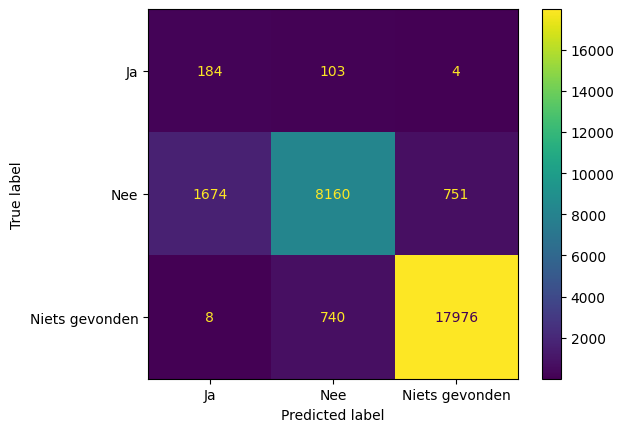

                precision    recall  f1-score   support

            Ja       0.10      0.63      0.17       291
           Nee       0.91      0.77      0.83     10585
Niets gevonden       0.96      0.96      0.96     18724

      accuracy                           0.89     29600
     macro avg       0.65      0.79      0.65     29600
  weighted avg       0.93      0.89      0.91     29600



In [12]:
# Ngram 1 Less stopwords
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,1), lowercase=True, token_pattern=r"(?u)\b\w\w+\b|\+|\-")),
    ('clf', MultinomialNB()),
])
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=parameter_grid, random_state=500, verbose=3, scoring='f1_macro')
random_search.fit(X_train, y_train)  
predicted_nb = random_search.predict(X_test)
print(np.mean(predicted_nb == y_test))
cm = confusion_matrix(y_test, predicted_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=random_search.classes_)
disp.plot()

plt.show()
print(metrics.classification_report(y_test, predicted_nb,
    target_names=random_search.classes_))

# Stochastic Gradient Descent

In [11]:
# RESET CORPUS
Corpus = Corpus_backup.copy()
X_train, X_test, y_train, y_test = train_test_split(Corpus['text'], Corpus['label'], test_size=0.2, random_state=50)

In [12]:
parameter_grid = {'clf__loss':              ['hinge', 'log_loss', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
                  'clf__penalty':           ['l2', 'l1'],
                  'clf__l1_ratio':          sp_randFloat(),
                  'clf__fit_intercept':     [True, False],
                  'clf__max_iter':          [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)],
                  'clf__tol':               sp_randFloat(),
                  'clf__shuffle':           [True, False],
                  'clf__epsilon':           sp_randFloat(),
                  'clf__learning_rate':     ['constant', 'optimal', 'invscaling', 'adaptive'],
                  'clf__eta0':              sp_randFloat(),
                  'clf__power_t':           sp_randFloat(),
                  'clf__class_weight':      ['balanced', None],
                  'clf__warm_start':        [True, False],
                  'clf__average':           [True, False],
                  'tfidf__max_df':          [0.90, 0.95],
                  'tfidf__min_df':          [3, 5]
                 }

# Stopwords kept

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 82.01, NNZs: 239, Bias: 0.000000, T: 71040, Avg. loss: 0.073332
Total training time: 0.53 seconds.
-- Epoch 2
Norm: 110.76, NNZs: 94, Bias: 0.000000, T: 142080, Avg. loss: 0.050684
Total training time: 1.05 seconds.
-- Epoch 3
Norm: 132.69, NNZs: 70, Bias: 0.000000, T: 213120, Avg. loss: 0.044743
Total training time: 1.60 seconds.
-- Epoch 4
Norm: 150.89, NNZs: 57, Bias: 0.000000, T: 284160, Avg. loss: 0.041413
Total training time: 2.16 seconds.
-- Epoch 5
Norm: 167.05, NNZs: 53, Bias: 0.000000, T: 355200, Avg. loss: 0.039450
Total training time: 2.75 seconds.
-- Epoch 6
Norm: 181.42, NNZs: 50, Bias: 0.000000, T: 426240, Avg. loss: 0.037766
Total training time: 3.30 seconds.
-- Epoch 7
Norm: 184.11, NNZs: 49, Bias: 0.000000, T: 497280, Avg. loss: 0.036886
Total training time: 3.92 seconds.
-- Epoch 8
Norm: 186.69, NNZs: 49, Bias: 0.000000, T: 568320, Avg. loss: 0.036673
Total training time: 4.49 seconds.
-- Epoch 9
Norm: 189.27, NNZs: 48, Bias: 0.000000, T: 639360, Avg

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.0s remaining:    0.0s


Norm: 122.36, NNZs: 433, Bias: 0.000000, T: 71040, Avg. loss: 0.203979
Total training time: 0.86 seconds.
-- Epoch 2
Norm: 167.53, NNZs: 191, Bias: 0.000000, T: 142080, Avg. loss: 0.142773
Total training time: 1.52 seconds.
-- Epoch 3
Norm: 201.63, NNZs: 152, Bias: 0.000000, T: 213120, Avg. loss: 0.126191
Total training time: 2.27 seconds.
-- Epoch 4
Norm: 230.23, NNZs: 135, Bias: 0.000000, T: 284160, Avg. loss: 0.117015
Total training time: 3.01 seconds.
-- Epoch 5
Norm: 255.19, NNZs: 121, Bias: 0.000000, T: 355200, Avg. loss: 0.110671
Total training time: 3.63 seconds.
-- Epoch 6
Norm: 277.62, NNZs: 114, Bias: 0.000000, T: 426240, Avg. loss: 0.106091
Total training time: 4.19 seconds.
-- Epoch 7
Norm: 281.69, NNZs: 113, Bias: 0.000000, T: 497280, Avg. loss: 0.103876
Total training time: 4.81 seconds.
-- Epoch 8
Norm: 285.69, NNZs: 113, Bias: 0.000000, T: 568320, Avg. loss: 0.103227
Total training time: 5.47 seconds.
-- Epoch 9
Norm: 289.62, NNZs: 111, Bias: 0.000000, T: 639360, Avg. 

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   27.2s remaining:    0.0s


Norm: 122.40, NNZs: 458, Bias: 0.000000, T: 71040, Avg. loss: 0.174954
Total training time: 0.63 seconds.
-- Epoch 2
Norm: 165.59, NNZs: 188, Bias: 0.000000, T: 142080, Avg. loss: 0.120218
Total training time: 1.21 seconds.
-- Epoch 3
Norm: 198.08, NNZs: 152, Bias: 0.000000, T: 213120, Avg. loss: 0.106809
Total training time: 1.88 seconds.
-- Epoch 4
Norm: 225.42, NNZs: 140, Bias: 0.000000, T: 284160, Avg. loss: 0.099540
Total training time: 2.43 seconds.
-- Epoch 5
Norm: 249.44, NNZs: 123, Bias: 0.000000, T: 355200, Avg. loss: 0.094499
Total training time: 3.10 seconds.
-- Epoch 6
Norm: 271.08, NNZs: 114, Bias: 0.000000, T: 426240, Avg. loss: 0.090574
Total training time: 3.83 seconds.
-- Epoch 7
Norm: 275.00, NNZs: 111, Bias: 0.000000, T: 497280, Avg. loss: 0.088352
Total training time: 4.55 seconds.
-- Epoch 8
Norm: 278.86, NNZs: 108, Bias: 0.000000, T: 568320, Avg. loss: 0.087725
Total training time: 5.26 seconds.
-- Epoch 9
Norm: 282.66, NNZs: 107, Bias: 0.000000, T: 639360, Avg. 

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   41.1s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.084 total time= 1.7min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 81.56, NNZs: 236, Bias: 0.000000, T: 71040, Avg. loss: 0.074479
Total training time: 0.52 seconds.
-- Epoch 2
Norm: 110.63, NNZs: 92, Bias: 0.000000, T: 142080, Avg. loss: 0.051361
Total training time: 1.15 seconds.
-- Epoch 3
Norm: 132.56, NNZs: 71, Bias: 0.000000, T: 213120, Avg. loss: 0.044972
Total training time: 1.83 seconds.
-- Epoch 4
Norm: 150.83, NNZs: 57, Bias: 0.000000, T: 284160, Avg. loss: 0.041710
Total training time: 2.46 seconds.
-- Epoch 5
Norm: 167.05, NNZs: 52, Bias: 0.000000, T: 355200, Avg. loss: 0.039556
Total training time: 3.08 seconds.
-- Epoch 6
Norm: 181.52, NNZs: 49, Bias: 0.000000, T: 426240, Avg. loss: 0.037855
Total training time: 3.68 seconds.
-- Epoch 7
Norm: 184.17, NNZs: 49, Bias: 0.000000, T: 497280, Avg. loss: 0.037088
Total training time: 4.51 seconds.
-- Epoch 8
Norm: 186.80, NNZs: 49, Bias: 0.000000, T: 568320, Avg. loss: 0.036857
Total training time: 5.20 seconds.
-- Epoch 9
Norm: 189.41, NNZs: 48, Bias: 0.000000, T: 639360, Avg

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.5s remaining:    0.0s


Norm: 122.11, NNZs: 426, Bias: 0.000000, T: 71040, Avg. loss: 0.204646
Total training time: 0.66 seconds.
-- Epoch 2
Norm: 167.20, NNZs: 197, Bias: 0.000000, T: 142080, Avg. loss: 0.144191
Total training time: 1.48 seconds.
-- Epoch 3
Norm: 201.50, NNZs: 150, Bias: 0.000000, T: 213120, Avg. loss: 0.127732
Total training time: 2.13 seconds.
-- Epoch 4
Norm: 230.12, NNZs: 132, Bias: 0.000000, T: 284160, Avg. loss: 0.118578
Total training time: 2.88 seconds.
-- Epoch 5
Norm: 255.14, NNZs: 113, Bias: 0.000000, T: 355200, Avg. loss: 0.112069
Total training time: 3.55 seconds.
-- Epoch 6
Norm: 277.60, NNZs: 111, Bias: 0.000000, T: 426240, Avg. loss: 0.107327
Total training time: 4.30 seconds.
-- Epoch 7
Norm: 281.65, NNZs: 108, Bias: 0.000000, T: 497280, Avg. loss: 0.104880
Total training time: 5.11 seconds.
-- Epoch 8
Norm: 285.63, NNZs: 107, Bias: 0.000000, T: 568320, Avg. loss: 0.104230
Total training time: 5.78 seconds.
-- Epoch 9
Norm: 289.56, NNZs: 107, Bias: 0.000000, T: 639360, Avg. 

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   27.7s remaining:    0.0s


Norm: 122.29, NNZs: 463, Bias: 0.000000, T: 71040, Avg. loss: 0.175253
Total training time: 0.77 seconds.
-- Epoch 2
Norm: 165.61, NNZs: 192, Bias: 0.000000, T: 142080, Avg. loss: 0.120365
Total training time: 1.51 seconds.
-- Epoch 3
Norm: 198.20, NNZs: 157, Bias: 0.000000, T: 213120, Avg. loss: 0.107016
Total training time: 2.44 seconds.
-- Epoch 4
Norm: 225.52, NNZs: 139, Bias: 0.000000, T: 284160, Avg. loss: 0.099716
Total training time: 3.35 seconds.
-- Epoch 5
Norm: 249.55, NNZs: 125, Bias: 0.000000, T: 355200, Avg. loss: 0.094690
Total training time: 4.15 seconds.
-- Epoch 6
Norm: 271.22, NNZs: 111, Bias: 0.000000, T: 426240, Avg. loss: 0.090673
Total training time: 4.99 seconds.
-- Epoch 7
Norm: 275.14, NNZs: 108, Bias: 0.000000, T: 497280, Avg. loss: 0.088344
Total training time: 5.69 seconds.
-- Epoch 8
Norm: 278.99, NNZs: 107, Bias: 0.000000, T: 568320, Avg. loss: 0.087712
Total training time: 6.46 seconds.
-- Epoch 9
Norm: 282.79, NNZs: 106, Bias: 0.000000, T: 639360, Avg. 

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   42.8s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.083 total time= 2.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 81.84, NNZs: 249, Bias: 0.000000, T: 71040, Avg. loss: 0.074234
Total training time: 0.78 seconds.
-- Epoch 2
Norm: 110.46, NNZs: 92, Bias: 0.000000, T: 142080, Avg. loss: 0.051087
Total training time: 1.55 seconds.
-- Epoch 3
Norm: 132.33, NNZs: 73, Bias: 0.000000, T: 213120, Avg. loss: 0.044790
Total training time: 2.87 seconds.
-- Epoch 4
Norm: 150.65, NNZs: 58, Bias: 0.000000, T: 284160, Avg. loss: 0.041565
Total training time: 4.09 seconds.
-- Epoch 5
Norm: 166.80, NNZs: 51, Bias: 0.000000, T: 355200, Avg. loss: 0.039388
Total training time: 5.33 seconds.
-- Epoch 6
Norm: 181.27, NNZs: 48, Bias: 0.000000, T: 426240, Avg. loss: 0.037844
Total training time: 6.61 seconds.
-- Epoch 7
Norm: 183.94, NNZs: 48, Bias: 0.000000, T: 497280, Avg. loss: 0.036847
Total training time: 7.82 seconds.
-- Epoch 8
Norm: 186.56, NNZs: 48, Bias: 0.000000, T: 568320, Avg. loss: 0.036675
Total training time: 9.03 seconds.
-- Epoch 9
Norm: 189.14, NNZs: 48, Bias: 0.000000, T: 639360, Avg

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.1s remaining:    0.0s


Norm: 122.01, NNZs: 438, Bias: 0.000000, T: 71040, Avg. loss: 0.204330
Total training time: 0.92 seconds.
-- Epoch 2
Norm: 167.00, NNZs: 189, Bias: 0.000000, T: 142080, Avg. loss: 0.144180
Total training time: 1.72 seconds.
-- Epoch 3
Norm: 201.11, NNZs: 151, Bias: 0.000000, T: 213120, Avg. loss: 0.128053
Total training time: 2.62 seconds.
-- Epoch 4
Norm: 229.54, NNZs: 131, Bias: 0.000000, T: 284160, Avg. loss: 0.118667
Total training time: 3.37 seconds.
-- Epoch 5
Norm: 254.52, NNZs: 120, Bias: 0.000000, T: 355200, Avg. loss: 0.112378
Total training time: 4.17 seconds.
-- Epoch 6
Norm: 276.91, NNZs: 110, Bias: 0.000000, T: 426240, Avg. loss: 0.107908
Total training time: 4.76 seconds.
-- Epoch 7
Norm: 280.96, NNZs: 109, Bias: 0.000000, T: 497280, Avg. loss: 0.105710
Total training time: 5.56 seconds.
-- Epoch 8
Norm: 284.94, NNZs: 108, Bias: 0.000000, T: 568320, Avg. loss: 0.105011
Total training time: 6.23 seconds.
-- Epoch 9
Norm: 288.85, NNZs: 106, Bias: 0.000000, T: 639360, Avg. 

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   33.2s remaining:    0.0s


Norm: 122.36, NNZs: 473, Bias: 0.000000, T: 71040, Avg. loss: 0.174728
Total training time: 1.28 seconds.
-- Epoch 2
Norm: 165.54, NNZs: 185, Bias: 0.000000, T: 142080, Avg. loss: 0.119982
Total training time: 2.55 seconds.
-- Epoch 3
Norm: 197.97, NNZs: 151, Bias: 0.000000, T: 213120, Avg. loss: 0.107024
Total training time: 3.81 seconds.
-- Epoch 4
Norm: 225.20, NNZs: 135, Bias: 0.000000, T: 284160, Avg. loss: 0.099555
Total training time: 5.07 seconds.
-- Epoch 5
Norm: 249.19, NNZs: 123, Bias: 0.000000, T: 355200, Avg. loss: 0.094463
Total training time: 6.40 seconds.
-- Epoch 6
Norm: 270.80, NNZs: 113, Bias: 0.000000, T: 426240, Avg. loss: 0.090482
Total training time: 7.66 seconds.
-- Epoch 7
Norm: 274.72, NNZs: 110, Bias: 0.000000, T: 497280, Avg. loss: 0.088322
Total training time: 8.91 seconds.
-- Epoch 8
Norm: 278.58, NNZs: 108, Bias: 0.000000, T: 568320, Avg. loss: 0.087702
Total training time: 9.88 seconds.
-- Epoch 9
Norm: 282.37, NNZs: 104, Bias: 0.000000, T: 639360, Avg. 

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   52.0s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.084 total time= 2.4min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 81.74, NNZs: 241, Bias: 0.000000, T: 71040, Avg. loss: 0.073564
Total training time: 0.87 seconds.
-- Epoch 2
Norm: 110.54, NNZs: 93, Bias: 0.000000, T: 142080, Avg. loss: 0.050543
Total training time: 2.08 seconds.
-- Epoch 3
Norm: 132.52, NNZs: 73, Bias: 0.000000, T: 213120, Avg. loss: 0.044892
Total training time: 2.93 seconds.
-- Epoch 4
Norm: 150.89, NNZs: 58, Bias: 0.000000, T: 284160, Avg. loss: 0.041447
Total training time: 4.06 seconds.
-- Epoch 5
Norm: 166.74, NNZs: 52, Bias: 0.000000, T: 355200, Avg. loss: 0.039546
Total training time: 5.20 seconds.
-- Epoch 6
Norm: 181.29, NNZs: 49, Bias: 0.000000, T: 426240, Avg. loss: 0.037897
Total training time: 6.17 seconds.
-- Epoch 7
Norm: 183.92, NNZs: 49, Bias: 0.000000, T: 497280, Avg. loss: 0.037046
Total training time: 6.75 seconds.
-- Epoch 8
Norm: 186.53, NNZs: 49, Bias: 0.000000, T: 568320, Avg. loss: 0.036836
Total training time: 7.38 seconds.
-- Epoch 9
Norm: 189.09, NNZs: 49, Bias: 0.000000, T: 639360, Avg

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s remaining:    0.0s


Norm: 122.17, NNZs: 454, Bias: 0.000000, T: 71040, Avg. loss: 0.204640
Total training time: 0.76 seconds.
-- Epoch 2
Norm: 167.21, NNZs: 199, Bias: 0.000000, T: 142080, Avg. loss: 0.144543
Total training time: 1.50 seconds.
-- Epoch 3
Norm: 201.47, NNZs: 153, Bias: 0.000000, T: 213120, Avg. loss: 0.128294
Total training time: 2.35 seconds.
-- Epoch 4
Norm: 229.91, NNZs: 136, Bias: 0.000000, T: 284160, Avg. loss: 0.119013
Total training time: 3.08 seconds.
-- Epoch 5
Norm: 254.90, NNZs: 122, Bias: 0.000000, T: 355200, Avg. loss: 0.112755
Total training time: 3.84 seconds.
-- Epoch 6
Norm: 277.25, NNZs: 111, Bias: 0.000000, T: 426240, Avg. loss: 0.108229
Total training time: 4.52 seconds.
-- Epoch 7
Norm: 281.29, NNZs: 110, Bias: 0.000000, T: 497280, Avg. loss: 0.106004
Total training time: 5.17 seconds.
-- Epoch 8
Norm: 285.26, NNZs: 108, Bias: 0.000000, T: 568320, Avg. loss: 0.105345
Total training time: 6.01 seconds.
-- Epoch 9
Norm: 289.18, NNZs: 108, Bias: 0.000000, T: 639360, Avg. 

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   36.1s remaining:    0.0s


Norm: 122.30, NNZs: 468, Bias: 0.000000, T: 71040, Avg. loss: 0.174918
Total training time: 0.80 seconds.
-- Epoch 2
Norm: 165.68, NNZs: 194, Bias: 0.000000, T: 142080, Avg. loss: 0.120448
Total training time: 1.67 seconds.
-- Epoch 3
Norm: 198.22, NNZs: 153, Bias: 0.000000, T: 213120, Avg. loss: 0.107408
Total training time: 2.45 seconds.
-- Epoch 4
Norm: 225.50, NNZs: 138, Bias: 0.000000, T: 284160, Avg. loss: 0.099933
Total training time: 3.28 seconds.
-- Epoch 5
Norm: 249.53, NNZs: 127, Bias: 0.000000, T: 355200, Avg. loss: 0.094865
Total training time: 4.00 seconds.
-- Epoch 6
Norm: 271.16, NNZs: 112, Bias: 0.000000, T: 426240, Avg. loss: 0.090680
Total training time: 4.78 seconds.
-- Epoch 7
Norm: 275.10, NNZs: 112, Bias: 0.000000, T: 497280, Avg. loss: 0.088777
Total training time: 5.78 seconds.
-- Epoch 8
Norm: 278.97, NNZs: 109, Bias: 0.000000, T: 568320, Avg. loss: 0.088130
Total training time: 7.05 seconds.
-- Epoch 9
Norm: 282.77, NNZs: 108, Bias: 0.000000, T: 639360, Avg. 

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   56.8s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.083 total time= 2.5min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 81.96, NNZs: 221, Bias: 0.000000, T: 71040, Avg. loss: 0.073638
Total training time: 0.60 seconds.
-- Epoch 2
Norm: 110.98, NNZs: 92, Bias: 0.000000, T: 142080, Avg. loss: 0.051253
Total training time: 1.22 seconds.
-- Epoch 3
Norm: 132.80, NNZs: 72, Bias: 0.000000, T: 213120, Avg. loss: 0.044966
Total training time: 1.92 seconds.
-- Epoch 4
Norm: 151.10, NNZs: 57, Bias: 0.000000, T: 284160, Avg. loss: 0.041727
Total training time: 2.68 seconds.
-- Epoch 5
Norm: 167.23, NNZs: 52, Bias: 0.000000, T: 355200, Avg. loss: 0.039491
Total training time: 3.35 seconds.
-- Epoch 6
Norm: 181.74, NNZs: 49, Bias: 0.000000, T: 426240, Avg. loss: 0.037896
Total training time: 4.42 seconds.
-- Epoch 7
Norm: 184.36, NNZs: 49, Bias: 0.000000, T: 497280, Avg. loss: 0.037064
Total training time: 5.70 seconds.
-- Epoch 8
Norm: 187.00, NNZs: 49, Bias: 0.000000, T: 568320, Avg. loss: 0.036882
Total training time: 6.85 seconds.
-- Epoch 9
Norm: 189.59, NNZs: 49, Bias: 0.000000, T: 639360, Avg

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.4s remaining:    0.0s


-- Epoch 1
Norm: 122.02, NNZs: 443, Bias: 0.000000, T: 71040, Avg. loss: 0.204591
Total training time: 0.74 seconds.
-- Epoch 2
Norm: 167.23, NNZs: 192, Bias: 0.000000, T: 142080, Avg. loss: 0.144209
Total training time: 1.34 seconds.
-- Epoch 3
Norm: 201.43, NNZs: 157, Bias: 0.000000, T: 213120, Avg. loss: 0.127693
Total training time: 1.91 seconds.
-- Epoch 4
Norm: 230.05, NNZs: 133, Bias: 0.000000, T: 284160, Avg. loss: 0.118338
Total training time: 2.68 seconds.
-- Epoch 5
Norm: 255.09, NNZs: 118, Bias: 0.000000, T: 355200, Avg. loss: 0.111982
Total training time: 3.35 seconds.
-- Epoch 6
Norm: 277.60, NNZs: 112, Bias: 0.000000, T: 426240, Avg. loss: 0.107131
Total training time: 4.12 seconds.
-- Epoch 7
Norm: 281.64, NNZs: 110, Bias: 0.000000, T: 497280, Avg. loss: 0.104781
Total training time: 4.71 seconds.
-- Epoch 8
Norm: 285.63, NNZs: 110, Bias: 0.000000, T: 568320, Avg. loss: 0.104004
Total training time: 5.31 seconds.
-- Epoch 9
Norm: 289.56, NNZs: 106, Bias: 0.000000, T: 63

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   31.9s remaining:    0.0s


Norm: 122.23, NNZs: 466, Bias: 0.000000, T: 71040, Avg. loss: 0.175309
Total training time: 0.78 seconds.
-- Epoch 2
Norm: 165.35, NNZs: 184, Bias: 0.000000, T: 142080, Avg. loss: 0.120769
Total training time: 1.58 seconds.
-- Epoch 3
Norm: 197.97, NNZs: 151, Bias: 0.000000, T: 213120, Avg. loss: 0.107751
Total training time: 2.44 seconds.
-- Epoch 4
Norm: 225.35, NNZs: 139, Bias: 0.000000, T: 284160, Avg. loss: 0.100000
Total training time: 3.56 seconds.
-- Epoch 5
Norm: 249.39, NNZs: 124, Bias: 0.000000, T: 355200, Avg. loss: 0.094832
Total training time: 4.51 seconds.
-- Epoch 6
Norm: 271.07, NNZs: 110, Bias: 0.000000, T: 426240, Avg. loss: 0.090723
Total training time: 5.20 seconds.
-- Epoch 7
Norm: 275.02, NNZs: 110, Bias: 0.000000, T: 497280, Avg. loss: 0.088569
Total training time: 6.01 seconds.
-- Epoch 8
Norm: 278.90, NNZs: 108, Bias: 0.000000, T: 568320, Avg. loss: 0.087941
Total training time: 6.82 seconds.
-- Epoch 9
Norm: 282.71, NNZs: 107, Bias: 0.000000, T: 639360, Avg. 

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   49.1s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.082 total time= 2.4min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 126007279332327.12, NNZs: 444631, Bias: 0.000000, T: 71040, Avg. loss: 149662485902387614580736.000000
Total training time: 0.60 seconds.
-- Epoch 2
Norm: 119347448912746.36, NNZs: 444632, Bias: 0.000000, T: 142080, Avg. loss: 134396095465135292809216.000000
Total training time: 1.13 seconds.
-- Epoch 3
Norm: 115954089582502.80, NNZs: 444632, Bias: 0.000000, T: 213120, Avg. loss: 112663324205844273299456.000000
Total training time: 1.82 seconds.
-- Epoch 4
Norm: 113712831723039.27, NNZs: 444632, Bias: 0.000000, T: 284160, Avg. loss: 102541733091782135119872.000000
Total training time: 2.40 seconds.
-- Epoch 5
Norm: 112057616475174.23, NNZs: 444632, Bias: 0.000000, T: 355200, Avg. loss: 96248371677015618617344.000000
Total training time: 2.99 seconds.
-- Epoch 6
Norm: 110751409851078.70, NNZs: 444632, Bias: 0.000000, T: 426240, Avg. loss: 91785827512543801769984.000000
Total training time: 3.57 seconds.
Convergence after 6 epochs took 3.61 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s


Norm: 119234582933642.52, NNZs: 444630, Bias: 0.000000, T: 71040, Avg. loss: 129568813990980423254016.000000
Total training time: 0.86 seconds.
-- Epoch 2
Norm: 112760447741619.30, NNZs: 444632, Bias: 0.000000, T: 142080, Avg. loss: 119664101012793028771840.000000
Total training time: 1.74 seconds.
-- Epoch 3
Norm: 109446694163787.62, NNZs: 444632, Bias: 0.000000, T: 213120, Avg. loss: 99946573982371399335936.000000
Total training time: 2.64 seconds.
-- Epoch 4
Norm: 107258765761671.31, NNZs: 444632, Bias: 0.000000, T: 284160, Avg. loss: 90727161071337929179136.000000
Total training time: 3.55 seconds.
-- Epoch 5
Norm: 105636940682785.64, NNZs: 444632, Bias: 0.000000, T: 355200, Avg. loss: 85048924736172270288896.000000
Total training time: 4.45 seconds.
-- Epoch 6
Norm: 104355859825020.42, NNZs: 444632, Bias: 0.000000, T: 426240, Avg. loss: 81006534727947614420992.000000
Total training time: 5.37 seconds.
Convergence after 6 epochs took 5.45 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.2s remaining:    0.0s


Norm: 118999453156631.86, NNZs: 444632, Bias: 0.000000, T: 71040, Avg. loss: 131486130998080496992256.000000
Total training time: 0.89 seconds.
-- Epoch 2
Norm: 112569450004452.58, NNZs: 444632, Bias: 0.000000, T: 142080, Avg. loss: 118405172909322249699328.000000
Total training time: 1.80 seconds.
-- Epoch 3
Norm: 109257790379295.70, NNZs: 444632, Bias: 0.000000, T: 213120, Avg. loss: 99045083888428601311232.000000
Total training time: 2.68 seconds.
-- Epoch 4
Norm: 107075134896074.77, NNZs: 444632, Bias: 0.000000, T: 284160, Avg. loss: 89888482656908885360640.000000
Total training time: 3.58 seconds.
-- Epoch 5
Norm: 105455237324660.14, NNZs: 444632, Bias: 0.000000, T: 355200, Avg. loss: 84222138877707668160512.000000
Total training time: 4.20 seconds.
-- Epoch 6
Norm: 104177220036765.89, NNZs: 444632, Bias: 0.000000, T: 426240, Avg. loss: 80232029328367528443904.000000
Total training time: 4.91 seconds.
Convergence after 6 epochs took 4.95 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   14.2s finished


[CV 1/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.264 total time= 1.6min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 37.34, NNZs: 43, Bias: 0.000000, T: 71040, Avg. loss: 0.001370
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 37.86, NNZs: 43, Bias: 0.000000, T: 142080, Avg. loss: 0.001243
Total training time: 0.70 seconds.
-- Epoch 3
Norm: 38.15, NNZs: 43, Bias: 0.000000, T: 213120, Avg. loss: 0.001223
Total training time: 1.30 seconds.
-- Epoch 4
Norm: 38.36, NNZs: 43, Bias: 0.000000, T: 284160, Avg. loss: 0.001215
Total training time: 1.98 seconds.
-- Epoch 5
Norm: 38.51, NNZs: 43, Bias: 0.000000, T: 355200, Avg. loss: 0.001209
Total training time: 2.63 seconds.
-- Epoch 6
Norm: 38.64, NNZs: 41, Bias: 0.000000, T: 426240, Avg. loss: 0.001200
Total training time: 3.27 seconds.
Convergence after 6 epochs took 3.36 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s


Norm: 127955173720615.02, NNZs: 444594, Bias: 0.000000, T: 71040, Avg. loss: 152940701393995943641088.000000
Total training time: 0.66 seconds.
-- Epoch 2
Norm: 121225757473197.28, NNZs: 444594, Bias: 0.000000, T: 142080, Avg. loss: 139455450320061910220800.000000
Total training time: 1.46 seconds.
-- Epoch 3
Norm: 117792088705281.45, NNZs: 444594, Bias: 0.000000, T: 213120, Avg. loss: 117042061778510539653120.000000
Total training time: 2.03 seconds.
-- Epoch 4
Norm: 115524131498617.80, NNZs: 444594, Bias: 0.000000, T: 284160, Avg. loss: 106442655694292590264320.000000
Total training time: 2.67 seconds.
-- Epoch 5
Norm: 113846490058132.08, NNZs: 444594, Bias: 0.000000, T: 355200, Avg. loss: 99914689590519094312960.000000
Total training time: 3.21 seconds.
-- Epoch 6
Norm: 112524148410479.30, NNZs: 444594, Bias: 0.000000, T: 426240, Avg. loss: 95283432604016637378560.000000
Total training time: 3.68 seconds.
Convergence after 6 epochs took 3.72 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.2s remaining:    0.0s


Norm: 111174631867414.08, NNZs: 444594, Bias: 0.000000, T: 71040, Avg. loss: 114500716508880211804160.000000
Total training time: 0.56 seconds.
-- Epoch 2
Norm: 104880003384448.30, NNZs: 444594, Bias: 0.000000, T: 142080, Avg. loss: 102768643698376642134016.000000
Total training time: 1.22 seconds.
-- Epoch 3
Norm: 101667898262720.80, NNZs: 444594, Bias: 0.000000, T: 213120, Avg. loss: 85196821091307845844992.000000
Total training time: 1.68 seconds.
-- Epoch 4
Norm: 99539897563430.61, NNZs: 444594, Bias: 0.000000, T: 284160, Avg. loss: 77084184176912981032960.000000
Total training time: 2.16 seconds.
-- Epoch 5
Norm: 97964762183038.16, NNZs: 444594, Bias: 0.000000, T: 355200, Avg. loss: 72048909536819991805952.000000
Total training time: 2.88 seconds.
-- Epoch 6
Norm: 96723516786567.08, NNZs: 444594, Bias: 0.000000, T: 426240, Avg. loss: 68473706203456674463744.000000
Total training time: 3.40 seconds.
Convergence after 6 epochs took 3.48 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.8s finished


[CV 2/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.287 total time= 1.7min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 49.04, NNZs: 43, Bias: 0.000000, T: 71040, Avg. loss: 0.001553
Total training time: 0.34 seconds.
-- Epoch 2
Norm: 49.44, NNZs: 42, Bias: 0.000000, T: 142080, Avg. loss: 0.001233
Total training time: 0.82 seconds.
-- Epoch 3
Norm: 49.66, NNZs: 42, Bias: 0.000000, T: 213120, Avg. loss: 0.001209
Total training time: 1.25 seconds.
-- Epoch 4
Norm: 49.81, NNZs: 43, Bias: 0.000000, T: 284160, Avg. loss: 0.001201
Total training time: 1.72 seconds.
-- Epoch 5
Norm: 49.93, NNZs: 42, Bias: 0.000000, T: 355200, Avg. loss: 0.001194
Total training time: 2.06 seconds.
-- Epoch 6
Norm: 50.03, NNZs: 42, Bias: 0.000000, T: 426240, Avg. loss: 0.001190
Total training time: 2.44 seconds.
Convergence after 6 epochs took 2.48 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


Norm: 109334728510211.09, NNZs: 443037, Bias: 0.000000, T: 71040, Avg. loss: 110144043746364110143488.000000
Total training time: 0.52 seconds.
-- Epoch 2
Norm: 103059830953393.58, NNZs: 443038, Bias: 0.000000, T: 142080, Avg. loss: 99487001381765149360128.000000
Total training time: 1.13 seconds.
-- Epoch 3
Norm: 99865746741884.77, NNZs: 443038, Bias: 0.000000, T: 213120, Avg. loss: 82419779241445915885568.000000
Total training time: 1.92 seconds.
-- Epoch 4
Norm: 97745079699073.41, NNZs: 443038, Bias: 0.000000, T: 284160, Avg. loss: 74587282571385685147648.000000
Total training time: 2.60 seconds.
-- Epoch 5
Norm: 96177046459454.86, NNZs: 443038, Bias: 0.000000, T: 355200, Avg. loss: 69633024520707473670144.000000
Total training time: 3.16 seconds.
-- Epoch 6
Norm: 94938476983303.70, NNZs: 443038, Bias: 0.000000, T: 426240, Avg. loss: 66170637332146982748160.000000
Total training time: 3.81 seconds.
Convergence after 6 epochs took 3.85 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.5s remaining:    0.0s


Norm: 117967440347371.39, NNZs: 443035, Bias: 0.000000, T: 71040, Avg. loss: 129213488284254286643200.000000
Total training time: 0.64 seconds.
-- Epoch 2
Norm: 111484948396150.95, NNZs: 443038, Bias: 0.000000, T: 142080, Avg. loss: 116738229438712666652672.000000
Total training time: 1.30 seconds.
-- Epoch 3
Norm: 108163307837703.78, NNZs: 443038, Bias: 0.000000, T: 213120, Avg. loss: 97292115028191278530560.000000
Total training time: 1.94 seconds.
-- Epoch 4
Norm: 105964488309075.72, NNZs: 443038, Bias: 0.000000, T: 284160, Avg. loss: 88184032202203810758656.000000
Total training time: 2.49 seconds.
-- Epoch 5
Norm: 104336603728973.00, NNZs: 443038, Bias: 0.000000, T: 355200, Avg. loss: 82556757071045379227648.000000
Total training time: 3.50 seconds.
-- Epoch 6
Norm: 103054215748715.00, NNZs: 443038, Bias: 0.000000, T: 426240, Avg. loss: 78509223473406856396800.000000
Total training time: 4.46 seconds.
Convergence after 6 epochs took 4.54 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.1s finished


[CV 3/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.285 total time= 1.9min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 111688041892104.08, NNZs: 443497, Bias: 0.000000, T: 71040, Avg. loss: 115780415785596153233408.000000
Total training time: 0.67 seconds.
-- Epoch 2
Norm: 105432379938611.72, NNZs: 443499, Bias: 0.000000, T: 142080, Avg. loss: 103023306159125876965376.000000
Total training time: 1.22 seconds.
-- Epoch 3
Norm: 102226929361248.89, NNZs: 443499, Bias: 0.000000, T: 213120, Avg. loss: 85650557999122221105152.000000
Total training time: 1.95 seconds.
-- Epoch 4
Norm: 100100208304926.30, NNZs: 443499, Bias: 0.000000, T: 284160, Avg. loss: 77495880565190637387776.000000
Total training time: 2.39 seconds.
-- Epoch 5
Norm: 98524938726083.23, NNZs: 443499, Bias: 0.000000, T: 355200, Avg. loss: 72437490723092512636928.000000
Total training time: 2.88 seconds.
-- Epoch 6
Norm: 97283926770482.52, NNZs: 443499, Bias: 0.000000, T: 426240, Avg. loss: 68900661019426546515968.000000
Total training time: 3.55 seconds.
Convergence after 6 epochs took 3.63 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s remaining:    0.0s


Norm: 128254956715385.19, NNZs: 443499, Bias: 0.000000, T: 71040, Avg. loss: 155089525616557827293184.000000
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 121504428575973.64, NNZs: 443499, Bias: 0.000000, T: 142080, Avg. loss: 138708816548500030357504.000000
Total training time: 1.11 seconds.
-- Epoch 3
Norm: 118063191591242.47, NNZs: 443499, Bias: 0.000000, T: 213120, Avg. loss: 116222022512059804024832.000000
Total training time: 1.73 seconds.
-- Epoch 4
Norm: 115796386682342.03, NNZs: 443499, Bias: 0.000000, T: 284160, Avg. loss: 105643737972236408061952.000000
Total training time: 2.26 seconds.
-- Epoch 5
Norm: 114117747595000.62, NNZs: 443499, Bias: 0.000000, T: 355200, Avg. loss: 99141906488028100034560.000000
Total training time: 2.80 seconds.
-- Epoch 6
Norm: 112794016075639.19, NNZs: 443499, Bias: 0.000000, T: 426240, Avg. loss: 94534763874643213287424.000000
Total training time: 3.35 seconds.
Convergence after 6 epochs took 3.40 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.2s remaining:    0.0s


Norm: 119350116766243.58, NNZs: 443499, Bias: 0.000000, T: 71040, Avg. loss: 133722448323705619611648.000000
Total training time: 0.55 seconds.
-- Epoch 2
Norm: 112866358310947.64, NNZs: 443499, Bias: 0.000000, T: 142080, Avg. loss: 119565838527149323059200.000000
Total training time: 1.15 seconds.
-- Epoch 3
Norm: 109555422251097.44, NNZs: 443499, Bias: 0.000000, T: 213120, Avg. loss: 99842494528850298404864.000000
Total training time: 1.66 seconds.
-- Epoch 4
Norm: 107365643358113.70, NNZs: 443499, Bias: 0.000000, T: 284160, Avg. loss: 90676165728292600545280.000000
Total training time: 2.16 seconds.
-- Epoch 5
Norm: 105746449457994.83, NNZs: 443499, Bias: 0.000000, T: 355200, Avg. loss: 84974561283846537478144.000000
Total training time: 2.70 seconds.
-- Epoch 6
Norm: 104467002940301.61, NNZs: 443499, Bias: 0.000000, T: 426240, Avg. loss: 80913255979252134707200.000000
Total training time: 3.27 seconds.
Convergence after 6 epochs took 3.33 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.6s finished


[CV 4/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.273 total time= 2.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 115050966966167.70, NNZs: 441650, Bias: 0.000000, T: 71040, Avg. loss: 122674660617803710595072.000000
Total training time: 0.56 seconds.
-- Epoch 2
Norm: 108678764420751.22, NNZs: 441651, Bias: 0.000000, T: 142080, Avg. loss: 110303057891882099015680.000000
Total training time: 1.16 seconds.
-- Epoch 3
Norm: 105430119951699.55, NNZs: 441651, Bias: 0.000000, T: 213120, Avg. loss: 91783971896511548096512.000000
Total training time: 1.86 seconds.
-- Epoch 4
Norm: 103281306265711.77, NNZs: 441651, Bias: 0.000000, T: 284160, Avg. loss: 83096120096931381772288.000000
Total training time: 2.43 seconds.
-- Epoch 5
Norm: 101691229717935.59, NNZs: 441651, Bias: 0.000000, T: 355200, Avg. loss: 77805103464764527345664.000000
Total training time: 2.99 seconds.
-- Epoch 6
Norm: 100438776651122.23, NNZs: 441651, Bias: 0.000000, T: 426240, Avg. loss: 74024755729586605522944.000000
Total training time: 3.61 seconds.
Convergence after 6 epochs took 3.65 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s remaining:    0.0s


Norm: 108027403221913.86, NNZs: 441648, Bias: 0.000000, T: 71040, Avg. loss: 107541400424753754275840.000000
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 101868670750853.58, NNZs: 441651, Bias: 0.000000, T: 142080, Avg. loss: 96209943394247466024960.000000
Total training time: 1.25 seconds.
-- Epoch 3
Norm: 98699299097115.78, NNZs: 441651, Bias: 0.000000, T: 213120, Avg. loss: 79798751751639771643904.000000
Total training time: 2.19 seconds.
-- Epoch 4
Norm: 96607328377907.09, NNZs: 441651, Bias: 0.000000, T: 284160, Avg. loss: 72068180213177612500992.000000
Total training time: 3.12 seconds.
-- Epoch 5
Norm: 95056086034340.44, NNZs: 441651, Bias: 0.000000, T: 355200, Avg. loss: 67328671242633661644800.000000
Total training time: 4.08 seconds.
-- Epoch 6
Norm: 93831998803981.55, NNZs: 441651, Bias: 0.000000, T: 426240, Avg. loss: 63985662473495944101888.000000
Total training time: 5.00 seconds.
Convergence after 6 epochs took 5.08 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.9s remaining:    0.0s


Norm: 111190891690703.86, NNZs: 441648, Bias: 0.000000, T: 71040, Avg. loss: 114003196703728405053440.000000
Total training time: 0.60 seconds.
-- Epoch 2
Norm: 104957427296169.59, NNZs: 441651, Bias: 0.000000, T: 142080, Avg. loss: 102166809881684930985984.000000
Total training time: 1.20 seconds.
-- Epoch 3
Norm: 101760920176764.91, NNZs: 441651, Bias: 0.000000, T: 213120, Avg. loss: 84874911941327541239808.000000
Total training time: 1.77 seconds.
-- Epoch 4
Norm: 99645407335983.27, NNZs: 441651, Bias: 0.000000, T: 284160, Avg. loss: 76894150929016458051584.000000
Total training time: 2.28 seconds.
-- Epoch 5
Norm: 98080100618040.28, NNZs: 441651, Bias: 0.000000, T: 355200, Avg. loss: 71894118397466598440960.000000
Total training time: 2.95 seconds.
-- Epoch 6
Norm: 96841971325657.42, NNZs: 441651, Bias: 0.000000, T: 426240, Avg. loss: 68379172104005478252544.000000
Total training time: 3.59 seconds.
Convergence after 6 epochs took 3.67 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   12.7s finished


[CV 5/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.268 total time= 1.6min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 80.59, NNZs: 225, Bias: 0.000000, T: 71040, Avg. loss: 0.020802
Total training time: 0.35 seconds.
-- Epoch 2
Norm: 105.91, NNZs: 103, Bias: 0.000000, T: 142080, Avg. loss: 0.012881
Total training time: 0.70 seconds.
-- Epoch 3
Norm: 124.52, NNZs: 95, Bias: 0.000000, T: 213120, Avg. loss: 0.011244
Total training time: 1.03 seconds.
-- Epoch 4
Norm: 140.01, NNZs: 83, Bias: 0.000000, T: 284160, Avg. loss: 0.010533
Total training time: 1.39 seconds.
-- Epoch 5
Norm: 153.40, NNZs: 77, Bias: 0.000000, T: 355200, Avg. loss: 0.010118
Total training time: 1.72 seconds.
-- Epoch 6
Norm: 165.58, NNZs: 75, Bias: 0.000000, T: 426240, Avg. loss: 0.009919
Total training time: 2.06 seconds.
Convergence after 6 epochs took 2.11 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


Norm: 151.82, NNZs: 604, Bias: 0.000000, T: 71040, Avg. loss: 0.085582
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 197.81, NNZs: 224, Bias: 0.000000, T: 142080, Avg. loss: 0.049117
Total training time: 0.81 seconds.
-- Epoch 3
Norm: 231.15, NNZs: 190, Bias: 0.000000, T: 213120, Avg. loss: 0.040685
Total training time: 1.17 seconds.
-- Epoch 4
Norm: 258.51, NNZs: 185, Bias: 0.000000, T: 284160, Avg. loss: 0.038457
Total training time: 1.69 seconds.
-- Epoch 5
Norm: 282.22, NNZs: 169, Bias: 0.000000, T: 355200, Avg. loss: 0.033820
Total training time: 2.06 seconds.
-- Epoch 6
Norm: 303.22, NNZs: 165, Bias: 0.000000, T: 426240, Avg. loss: 0.033900
Total training time: 2.42 seconds.
Convergence after 6 epochs took 2.50 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.7s remaining:    0.0s


Norm: 139.84, NNZs: 536, Bias: 0.000000, T: 71040, Avg. loss: 0.065198
Total training time: 0.54 seconds.
-- Epoch 2
Norm: 180.87, NNZs: 188, Bias: 0.000000, T: 142080, Avg. loss: 0.035644
Total training time: 0.99 seconds.
-- Epoch 3
Norm: 210.60, NNZs: 161, Bias: 0.000000, T: 213120, Avg. loss: 0.029175
Total training time: 1.37 seconds.
-- Epoch 4
Norm: 234.79, NNZs: 154, Bias: 0.000000, T: 284160, Avg. loss: 0.025420
Total training time: 2.12 seconds.
-- Epoch 5
Norm: 255.46, NNZs: 142, Bias: 0.000000, T: 355200, Avg. loss: 0.023075
Total training time: 2.81 seconds.
-- Epoch 6
Norm: 273.77, NNZs: 138, Bias: 0.000000, T: 426240, Avg. loss: 0.021539
Total training time: 3.38 seconds.
Convergence after 6 epochs took 3.47 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.3s finished


[CV 1/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.981 total time= 1.5min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 80.27, NNZs: 219, Bias: 0.000000, T: 71040, Avg. loss: 0.020550
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 105.40, NNZs: 97, Bias: 0.000000, T: 142080, Avg. loss: 0.012779
Total training time: 0.81 seconds.
-- Epoch 3
Norm: 123.95, NNZs: 88, Bias: 0.000000, T: 213120, Avg. loss: 0.011262
Total training time: 1.20 seconds.
-- Epoch 4
Norm: 139.30, NNZs: 85, Bias: 0.000000, T: 284160, Avg. loss: 0.010535
Total training time: 1.67 seconds.
-- Epoch 5
Norm: 152.76, NNZs: 82, Bias: 0.000000, T: 355200, Avg. loss: 0.010069
Total training time: 2.00 seconds.
-- Epoch 6
Norm: 164.70, NNZs: 73, Bias: 0.000000, T: 426240, Avg. loss: 0.009788
Total training time: 2.33 seconds.
Convergence after 6 epochs took 2.37 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


Norm: 151.32, NNZs: 625, Bias: 0.000000, T: 71040, Avg. loss: 0.085190
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 197.52, NNZs: 222, Bias: 0.000000, T: 142080, Avg. loss: 0.050945
Total training time: 0.75 seconds.
-- Epoch 3
Norm: 231.14, NNZs: 202, Bias: 0.000000, T: 213120, Avg. loss: 0.043993
Total training time: 1.11 seconds.
-- Epoch 4
Norm: 258.39, NNZs: 184, Bias: 0.000000, T: 284160, Avg. loss: 0.040824
Total training time: 1.47 seconds.
-- Epoch 5
Norm: 282.34, NNZs: 174, Bias: 0.000000, T: 355200, Avg. loss: 0.037249
Total training time: 1.88 seconds.
-- Epoch 6
Norm: 303.48, NNZs: 168, Bias: 0.000000, T: 426240, Avg. loss: 0.035794
Total training time: 2.34 seconds.
Convergence after 6 epochs took 2.39 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.9s remaining:    0.0s


Norm: 139.70, NNZs: 564, Bias: 0.000000, T: 71040, Avg. loss: 0.065515
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 181.07, NNZs: 190, Bias: 0.000000, T: 142080, Avg. loss: 0.036413
Total training time: 0.77 seconds.
-- Epoch 3
Norm: 210.77, NNZs: 158, Bias: 0.000000, T: 213120, Avg. loss: 0.029172
Total training time: 1.13 seconds.
-- Epoch 4
Norm: 234.98, NNZs: 140, Bias: 0.000000, T: 284160, Avg. loss: 0.025541
Total training time: 1.51 seconds.
-- Epoch 5
Norm: 255.61, NNZs: 136, Bias: 0.000000, T: 355200, Avg. loss: 0.023088
Total training time: 1.87 seconds.
-- Epoch 6
Norm: 273.74, NNZs: 130, Bias: 0.000000, T: 426240, Avg. loss: 0.021281
Total training time: 2.23 seconds.
Convergence after 6 epochs took 2.27 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.2s finished


[CV 2/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.982 total time= 1.5min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 80.49, NNZs: 225, Bias: 0.000000, T: 71040, Avg. loss: 0.020777
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 105.66, NNZs: 96, Bias: 0.000000, T: 142080, Avg. loss: 0.012736
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 124.35, NNZs: 91, Bias: 0.000000, T: 213120, Avg. loss: 0.011173
Total training time: 1.28 seconds.
-- Epoch 4
Norm: 139.75, NNZs: 87, Bias: 0.000000, T: 284160, Avg. loss: 0.010402
Total training time: 1.72 seconds.
-- Epoch 5
Norm: 153.10, NNZs: 79, Bias: 0.000000, T: 355200, Avg. loss: 0.009863
Total training time: 2.20 seconds.
-- Epoch 6
Norm: 165.03, NNZs: 70, Bias: 0.000000, T: 426240, Avg. loss: 0.009427
Total training time: 2.64 seconds.
Convergence after 6 epochs took 2.70 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


Norm: 152.23, NNZs: 637, Bias: 0.000000, T: 71040, Avg. loss: 0.085632
Total training time: 0.59 seconds.
-- Epoch 2
Norm: 198.40, NNZs: 231, Bias: 0.000000, T: 142080, Avg. loss: 0.052329
Total training time: 1.07 seconds.
-- Epoch 3
Norm: 232.06, NNZs: 192, Bias: 0.000000, T: 213120, Avg. loss: 0.043730
Total training time: 1.52 seconds.
-- Epoch 4
Norm: 259.86, NNZs: 189, Bias: 0.000000, T: 284160, Avg. loss: 0.039985
Total training time: 2.02 seconds.
-- Epoch 5
Norm: 283.74, NNZs: 180, Bias: 0.000000, T: 355200, Avg. loss: 0.038127
Total training time: 2.47 seconds.
-- Epoch 6
Norm: 305.05, NNZs: 181, Bias: 0.000000, T: 426240, Avg. loss: 0.036196
Total training time: 2.99 seconds.
Convergence after 6 epochs took 3.04 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.9s remaining:    0.0s


Norm: 140.38, NNZs: 613, Bias: 0.000000, T: 71040, Avg. loss: 0.066307
Total training time: 0.51 seconds.
-- Epoch 2
Norm: 181.74, NNZs: 208, Bias: 0.000000, T: 142080, Avg. loss: 0.036313
Total training time: 0.96 seconds.
-- Epoch 3
Norm: 211.75, NNZs: 161, Bias: 0.000000, T: 213120, Avg. loss: 0.029744
Total training time: 1.55 seconds.
-- Epoch 4
Norm: 235.89, NNZs: 135, Bias: 0.000000, T: 284160, Avg. loss: 0.025628
Total training time: 2.02 seconds.
-- Epoch 5
Norm: 256.62, NNZs: 130, Bias: 0.000000, T: 355200, Avg. loss: 0.023481
Total training time: 2.62 seconds.
-- Epoch 6
Norm: 274.94, NNZs: 130, Bias: 0.000000, T: 426240, Avg. loss: 0.021714
Total training time: 3.02 seconds.
Convergence after 6 epochs took 3.07 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.0s finished


[CV 3/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.981 total time= 1.4min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 80.50, NNZs: 206, Bias: 0.000000, T: 71040, Avg. loss: 0.020668
Total training time: 0.35 seconds.
-- Epoch 2
Norm: 105.30, NNZs: 102, Bias: 0.000000, T: 142080, Avg. loss: 0.012242
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 123.77, NNZs: 92, Bias: 0.000000, T: 213120, Avg. loss: 0.010752
Total training time: 1.16 seconds.
-- Epoch 4
Norm: 139.01, NNZs: 84, Bias: 0.000000, T: 284160, Avg. loss: 0.009954
Total training time: 1.52 seconds.
-- Epoch 5
Norm: 152.12, NNZs: 81, Bias: 0.000000, T: 355200, Avg. loss: 0.009357
Total training time: 1.91 seconds.
-- Epoch 6
Norm: 163.98, NNZs: 74, Bias: 0.000000, T: 426240, Avg. loss: 0.009156
Total training time: 2.24 seconds.
Convergence after 6 epochs took 2.31 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s


Norm: 152.68, NNZs: 673, Bias: 0.000000, T: 71040, Avg. loss: 0.087729
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 199.25, NNZs: 220, Bias: 0.000000, T: 142080, Avg. loss: 0.051806
Total training time: 0.94 seconds.
-- Epoch 3
Norm: 233.07, NNZs: 201, Bias: 0.000000, T: 213120, Avg. loss: 0.043787
Total training time: 1.41 seconds.
-- Epoch 4
Norm: 261.17, NNZs: 173, Bias: 0.000000, T: 284160, Avg. loss: 0.039064
Total training time: 1.89 seconds.
-- Epoch 5
Norm: 285.30, NNZs: 168, Bias: 0.000000, T: 355200, Avg. loss: 0.037001
Total training time: 2.23 seconds.
-- Epoch 6
Norm: 306.51, NNZs: 169, Bias: 0.000000, T: 426240, Avg. loss: 0.035790
Total training time: 2.59 seconds.
Convergence after 6 epochs took 2.64 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.1s remaining:    0.0s


Norm: 140.30, NNZs: 580, Bias: 0.000000, T: 71040, Avg. loss: 0.066158
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 181.69, NNZs: 196, Bias: 0.000000, T: 142080, Avg. loss: 0.036247
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 211.58, NNZs: 165, Bias: 0.000000, T: 213120, Avg. loss: 0.029338
Total training time: 1.32 seconds.
-- Epoch 4
Norm: 235.84, NNZs: 149, Bias: 0.000000, T: 284160, Avg. loss: 0.025650
Total training time: 1.76 seconds.
-- Epoch 5
Norm: 256.43, NNZs: 134, Bias: 0.000000, T: 355200, Avg. loss: 0.022986
Total training time: 2.22 seconds.
-- Epoch 6
Norm: 274.68, NNZs: 133, Bias: 0.000000, T: 426240, Avg. loss: 0.021484
Total training time: 2.54 seconds.
Convergence after 6 epochs took 2.59 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.8s finished


[CV 4/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.984 total time= 1.4min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 80.29, NNZs: 205, Bias: 0.000000, T: 71040, Avg. loss: 0.020489
Total training time: 0.35 seconds.
-- Epoch 2
Norm: 105.44, NNZs: 102, Bias: 0.000000, T: 142080, Avg. loss: 0.012817
Total training time: 0.64 seconds.
-- Epoch 3
Norm: 124.15, NNZs: 94, Bias: 0.000000, T: 213120, Avg. loss: 0.011151
Total training time: 1.02 seconds.
-- Epoch 4
Norm: 139.56, NNZs: 83, Bias: 0.000000, T: 284160, Avg. loss: 0.010440
Total training time: 1.30 seconds.
-- Epoch 5
Norm: 152.94, NNZs: 78, Bias: 0.000000, T: 355200, Avg. loss: 0.009914
Total training time: 1.81 seconds.
-- Epoch 6
Norm: 165.03, NNZs: 79, Bias: 0.000000, T: 426240, Avg. loss: 0.009644
Total training time: 2.19 seconds.
Convergence after 6 epochs took 2.23 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


Norm: 152.52, NNZs: 620, Bias: 0.000000, T: 71040, Avg. loss: 0.087283
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 198.96, NNZs: 216, Bias: 0.000000, T: 142080, Avg. loss: 0.053449
Total training time: 0.92 seconds.
-- Epoch 3
Norm: 232.94, NNZs: 193, Bias: 0.000000, T: 213120, Avg. loss: 0.044113
Total training time: 1.31 seconds.
-- Epoch 4
Norm: 260.50, NNZs: 182, Bias: 0.000000, T: 284160, Avg. loss: 0.042214
Total training time: 1.73 seconds.
-- Epoch 5
Norm: 284.40, NNZs: 170, Bias: 0.000000, T: 355200, Avg. loss: 0.038067
Total training time: 2.09 seconds.
-- Epoch 6
Norm: 306.25, NNZs: 167, Bias: 0.000000, T: 426240, Avg. loss: 0.035912
Total training time: 2.47 seconds.
Convergence after 6 epochs took 2.53 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.9s remaining:    0.0s


Norm: 140.79, NNZs: 581, Bias: 0.000000, T: 71040, Avg. loss: 0.066829
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 182.03, NNZs: 180, Bias: 0.000000, T: 142080, Avg. loss: 0.036200
Total training time: 0.77 seconds.
-- Epoch 3
Norm: 211.87, NNZs: 151, Bias: 0.000000, T: 213120, Avg. loss: 0.029503
Total training time: 1.19 seconds.
-- Epoch 4
Norm: 236.01, NNZs: 141, Bias: 0.000000, T: 284160, Avg. loss: 0.025591
Total training time: 1.69 seconds.
-- Epoch 5
Norm: 256.57, NNZs: 128, Bias: 0.000000, T: 355200, Avg. loss: 0.023103
Total training time: 2.21 seconds.
-- Epoch 6
Norm: 274.78, NNZs: 131, Bias: 0.000000, T: 426240, Avg. loss: 0.021427
Total training time: 2.64 seconds.
Convergence after 6 epochs took 2.68 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.7s finished


[CV 5/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.984 total time= 1.4min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 83799238195698.31, NNZs: 444203, Bias: 0.000000, T: 71040, Avg. loss: 45095602791938575564800.000000
Total training time: 0.54 seconds.
-- Epoch 2
Norm: 158355923899506.84, NNZs: 444630, Bias: 0.000000, T: 142080, Avg. loss: 470772849231024653074432.000000
Total training time: 1.08 seconds.
-- Epoch 3
Norm: 133173877333715.33, NNZs: 444629, Bias: 0.000000, T: 213120, Avg. loss: 797036066623851157520384.000000
Total training time: 1.61 seconds.
-- Epoch 4
Norm: 157300645469576.66, NNZs: 444632, Bias: 0.000000, T: 284160, Avg. loss: 632860644930745949749248.000000
Total training time: 2.13 seconds.
-- Epoch 5
Norm: 141498499301020.09, NNZs: 444631, Bias: 0.000000, T: 355200, Avg. loss: 811300557745104718135296.000000
Total training time: 2.67 seconds.
-- Epoch 6
Norm: 154718179553809.97, NNZs: 444633, Bias: 0.000000, T: 426240, Avg. loss: 680605572300188755689472.000000
Total training time: 3.21 seconds.
Convergence after 6 epochs took 3.26 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


Norm: 63.94, NNZs: 478, Bias: 0.000000, T: 71040, Avg. loss: 0.101039
Total training time: 0.52 seconds.
-- Epoch 2
Norm: 87.05, NNZs: 370, Bias: 0.000000, T: 142080, Avg. loss: 0.080186
Total training time: 1.01 seconds.
-- Epoch 3
Norm: 104.38, NNZs: 339, Bias: 0.000000, T: 213120, Avg. loss: 0.075523
Total training time: 1.47 seconds.
-- Epoch 4
Norm: 118.70, NNZs: 320, Bias: 0.000000, T: 284160, Avg. loss: 0.073093
Total training time: 1.94 seconds.
-- Epoch 5
Norm: 131.35, NNZs: 310, Bias: 0.000000, T: 355200, Avg. loss: 0.071547
Total training time: 2.41 seconds.
-- Epoch 6
Norm: 142.61, NNZs: 309, Bias: 0.000000, T: 426240, Avg. loss: 0.070130
Total training time: 2.90 seconds.
Convergence after 6 epochs took 2.94 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.3s remaining:    0.0s


Norm: 51.46, NNZs: 356, Bias: 0.000000, T: 71040, Avg. loss: 0.111158
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 69.95, NNZs: 260, Bias: 0.000000, T: 142080, Avg. loss: 0.090680
Total training time: 0.97 seconds.
-- Epoch 3
Norm: 84.06, NNZs: 236, Bias: 0.000000, T: 213120, Avg. loss: 0.085971
Total training time: 1.44 seconds.
-- Epoch 4
Norm: 95.74, NNZs: 227, Bias: 0.000000, T: 284160, Avg. loss: 0.083379
Total training time: 1.90 seconds.
-- Epoch 5
Norm: 105.89, NNZs: 226, Bias: 0.000000, T: 355200, Avg. loss: 0.082275
Total training time: 2.37 seconds.
-- Epoch 6
Norm: 115.01, NNZs: 217, Bias: 0.000000, T: 426240, Avg. loss: 0.081252
Total training time: 2.85 seconds.
Convergence after 6 epochs took 2.89 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.3s finished


[CV 1/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.042 total time= 1.3min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 112689639057829.94, NNZs: 444360, Bias: 0.000000, T: 71040, Avg. loss: 119630951201668195155968.000000
Total training time: 0.52 seconds.
-- Epoch 2
Norm: 146968065716718.31, NNZs: 444590, Bias: 0.000000, T: 142080, Avg. loss: 609717210545786718257152.000000
Total training time: 1.10 seconds.
-- Epoch 3
Norm: 139587436196067.73, NNZs: 444603, Bias: 0.000000, T: 213120, Avg. loss: 770095723824151477092352.000000
Total training time: 1.67 seconds.
-- Epoch 4
Norm: 153351971202531.78, NNZs: 444612, Bias: 0.000000, T: 284160, Avg. loss: 744278407218733168721920.000000
Total training time: 2.24 seconds.
-- Epoch 5
Norm: 148647206861369.41, NNZs: 444612, Bias: 0.000000, T: 355200, Avg. loss: 782940604615402169827328.000000
Total training time: 2.80 seconds.
-- Epoch 6
Norm: 152976610724183.69, NNZs: 444615, Bias: 0.000000, T: 426240, Avg. loss: 709690166383370301341696.000000
Total training time: 3.37 seconds.
Convergence after 6 epochs took 3.41 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s


Norm: 64.13, NNZs: 489, Bias: 0.000000, T: 71040, Avg. loss: 0.101301
Total training time: 0.54 seconds.
-- Epoch 2
Norm: 87.27, NNZs: 365, Bias: 0.000000, T: 142080, Avg. loss: 0.079615
Total training time: 1.02 seconds.
-- Epoch 3
Norm: 104.54, NNZs: 326, Bias: 0.000000, T: 213120, Avg. loss: 0.074913
Total training time: 1.50 seconds.
-- Epoch 4
Norm: 119.01, NNZs: 323, Bias: 0.000000, T: 284160, Avg. loss: 0.072165
Total training time: 1.98 seconds.
-- Epoch 5
Norm: 131.61, NNZs: 314, Bias: 0.000000, T: 355200, Avg. loss: 0.070743
Total training time: 2.46 seconds.
-- Epoch 6
Norm: 142.91, NNZs: 302, Bias: 0.000000, T: 426240, Avg. loss: 0.069690
Total training time: 2.95 seconds.
Convergence after 6 epochs took 2.99 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.5s remaining:    0.0s


Norm: 51.53, NNZs: 347, Bias: 0.000000, T: 71040, Avg. loss: 0.111383
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 70.05, NNZs: 266, Bias: 0.000000, T: 142080, Avg. loss: 0.090380
Total training time: 0.95 seconds.
-- Epoch 3
Norm: 84.23, NNZs: 234, Bias: 0.000000, T: 213120, Avg. loss: 0.085258
Total training time: 1.44 seconds.
-- Epoch 4
Norm: 96.10, NNZs: 228, Bias: 0.000000, T: 284160, Avg. loss: 0.082689
Total training time: 1.93 seconds.
-- Epoch 5
Norm: 106.29, NNZs: 217, Bias: 0.000000, T: 355200, Avg. loss: 0.080925
Total training time: 2.43 seconds.
-- Epoch 6
Norm: 115.50, NNZs: 213, Bias: 0.000000, T: 426240, Avg. loss: 0.079914
Total training time: 2.93 seconds.
Convergence after 6 epochs took 2.97 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.5s finished


[CV 2/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.042 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 103041038445948.45, NNZs: 442016, Bias: 0.000000, T: 71040, Avg. loss: 92392030414084090363904.000000
Total training time: 0.54 seconds.
-- Epoch 2
Norm: 154150952800321.06, NNZs: 443027, Bias: 0.000000, T: 142080, Avg. loss: 522709014044499131760640.000000
Total training time: 1.10 seconds.
-- Epoch 3
Norm: 139245087284874.30, NNZs: 443027, Bias: 0.000000, T: 213120, Avg. loss: 797242219114766585036800.000000
Total training time: 1.71 seconds.
-- Epoch 4
Norm: 154811193155437.56, NNZs: 443039, Bias: 0.000000, T: 284160, Avg. loss: 705351233778549369339904.000000
Total training time: 2.30 seconds.
-- Epoch 5
Norm: 146332185644779.50, NNZs: 443040, Bias: 0.000000, T: 355200, Avg. loss: 765721337221802746707968.000000
Total training time: 2.88 seconds.
-- Epoch 6
Norm: 156715052835693.09, NNZs: 443040, Bias: 0.000000, T: 426240, Avg. loss: 757203510760459546394624.000000
Total training time: 3.45 seconds.
Convergence after 6 epochs took 3.49 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s


Norm: 64.16, NNZs: 491, Bias: 0.000000, T: 71040, Avg. loss: 0.101645
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 87.24, NNZs: 372, Bias: 0.000000, T: 142080, Avg. loss: 0.080419
Total training time: 1.05 seconds.
-- Epoch 3
Norm: 104.34, NNZs: 327, Bias: 0.000000, T: 213120, Avg. loss: 0.075667
Total training time: 1.56 seconds.
-- Epoch 4
Norm: 118.81, NNZs: 309, Bias: 0.000000, T: 284160, Avg. loss: 0.073309
Total training time: 2.08 seconds.
-- Epoch 5
Norm: 131.41, NNZs: 298, Bias: 0.000000, T: 355200, Avg. loss: 0.071955
Total training time: 2.59 seconds.
-- Epoch 6
Norm: 142.80, NNZs: 291, Bias: 0.000000, T: 426240, Avg. loss: 0.070763
Total training time: 3.11 seconds.
Convergence after 6 epochs took 3.15 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.7s remaining:    0.0s


Norm: 51.54, NNZs: 354, Bias: 0.000000, T: 71040, Avg. loss: 0.111642
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 70.14, NNZs: 265, Bias: 0.000000, T: 142080, Avg. loss: 0.091116
Total training time: 0.95 seconds.
-- Epoch 3
Norm: 84.06, NNZs: 235, Bias: 0.000000, T: 213120, Avg. loss: 0.086186
Total training time: 1.43 seconds.
-- Epoch 4
Norm: 95.80, NNZs: 216, Bias: 0.000000, T: 284160, Avg. loss: 0.083915
Total training time: 1.90 seconds.
-- Epoch 5
Norm: 105.89, NNZs: 212, Bias: 0.000000, T: 355200, Avg. loss: 0.082610
Total training time: 2.38 seconds.
-- Epoch 6
Norm: 114.98, NNZs: 209, Bias: 0.000000, T: 426240, Avg. loss: 0.081885
Total training time: 2.88 seconds.
Convergence after 6 epochs took 2.92 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.7s finished


[CV 3/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.041 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 85912809759404.80, NNZs: 443325, Bias: 0.000000, T: 71040, Avg. loss: 56059771362743888642048.000000
Total training time: 0.57 seconds.
-- Epoch 2
Norm: 154623700875659.81, NNZs: 443494, Bias: 0.000000, T: 142080, Avg. loss: 479834515441810325635072.000000
Total training time: 1.15 seconds.
-- Epoch 3
Norm: 138747603873403.72, NNZs: 443492, Bias: 0.000000, T: 213120, Avg. loss: 758545405939931989147648.000000
Total training time: 1.73 seconds.
-- Epoch 4
Norm: 154059382193304.12, NNZs: 443493, Bias: 0.000000, T: 284160, Avg. loss: 664810691965009136713728.000000
Total training time: 2.27 seconds.
-- Epoch 5
Norm: 146534741984580.75, NNZs: 443496, Bias: 0.000000, T: 355200, Avg. loss: 749680228763277218283520.000000
Total training time: 2.81 seconds.
-- Epoch 6
Norm: 157323401673718.09, NNZs: 443497, Bias: 0.000000, T: 426240, Avg. loss: 696496839305404868460544.000000
Total training time: 3.34 seconds.
Convergence after 6 epochs took 3.38 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s


Norm: 64.07, NNZs: 493, Bias: 0.000000, T: 71040, Avg. loss: 0.101293
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 87.03, NNZs: 359, Bias: 0.000000, T: 142080, Avg. loss: 0.079871
Total training time: 0.97 seconds.
-- Epoch 3
Norm: 104.26, NNZs: 336, Bias: 0.000000, T: 213120, Avg. loss: 0.075765
Total training time: 1.44 seconds.
-- Epoch 4
Norm: 118.54, NNZs: 329, Bias: 0.000000, T: 284160, Avg. loss: 0.073284
Total training time: 1.91 seconds.
-- Epoch 5
Norm: 131.38, NNZs: 314, Bias: 0.000000, T: 355200, Avg. loss: 0.071469
Total training time: 2.39 seconds.
-- Epoch 6
Norm: 142.62, NNZs: 304, Bias: 0.000000, T: 426240, Avg. loss: 0.070429
Total training time: 2.86 seconds.
Convergence after 6 epochs took 2.90 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.4s remaining:    0.0s


Norm: 51.47, NNZs: 366, Bias: 0.000000, T: 71040, Avg. loss: 0.111322
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 69.92, NNZs: 261, Bias: 0.000000, T: 142080, Avg. loss: 0.090515
Total training time: 0.99 seconds.
-- Epoch 3
Norm: 84.12, NNZs: 233, Bias: 0.000000, T: 213120, Avg. loss: 0.085959
Total training time: 1.47 seconds.
-- Epoch 4
Norm: 95.71, NNZs: 221, Bias: 0.000000, T: 284160, Avg. loss: 0.083466
Total training time: 1.95 seconds.
-- Epoch 5
Norm: 105.81, NNZs: 212, Bias: 0.000000, T: 355200, Avg. loss: 0.082300
Total training time: 2.43 seconds.
-- Epoch 6
Norm: 114.92, NNZs: 208, Bias: 0.000000, T: 426240, Avg. loss: 0.081293
Total training time: 2.90 seconds.
Convergence after 6 epochs took 2.94 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.5s finished


[CV 4/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.042 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 105374758610035.05, NNZs: 441552, Bias: 0.000000, T: 71040, Avg. loss: 117490463573380993908736.000000
Total training time: 0.55 seconds.
-- Epoch 2
Norm: 151694564586426.34, NNZs: 441611, Bias: 0.000000, T: 142080, Avg. loss: 561186243830769220845568.000000
Total training time: 1.08 seconds.
-- Epoch 3
Norm: 139566958563054.45, NNZs: 441629, Bias: 0.000000, T: 213120, Avg. loss: 785503172020605047275520.000000
Total training time: 1.63 seconds.
-- Epoch 4
Norm: 152930613265071.97, NNZs: 441627, Bias: 0.000000, T: 284160, Avg. loss: 708841976660433517412352.000000
Total training time: 2.18 seconds.
-- Epoch 5
Norm: 146116148050002.47, NNZs: 441630, Bias: 0.000000, T: 355200, Avg. loss: 708657441666654822989824.000000
Total training time: 2.71 seconds.
-- Epoch 6
Norm: 157992567207104.94, NNZs: 441632, Bias: 0.000000, T: 426240, Avg. loss: 717189209666703327232000.000000
Total training time: 3.27 seconds.
Convergence after 6 epochs took 3.31 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s


Norm: 64.02, NNZs: 473, Bias: 0.000000, T: 71040, Avg. loss: 0.101826
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 87.14, NNZs: 351, Bias: 0.000000, T: 142080, Avg. loss: 0.079820
Total training time: 0.96 seconds.
-- Epoch 3
Norm: 104.45, NNZs: 328, Bias: 0.000000, T: 213120, Avg. loss: 0.075362
Total training time: 1.43 seconds.
-- Epoch 4
Norm: 118.92, NNZs: 319, Bias: 0.000000, T: 284160, Avg. loss: 0.072605
Total training time: 1.88 seconds.
-- Epoch 5
Norm: 131.53, NNZs: 304, Bias: 0.000000, T: 355200, Avg. loss: 0.071189
Total training time: 2.33 seconds.
-- Epoch 6
Norm: 142.77, NNZs: 297, Bias: 0.000000, T: 426240, Avg. loss: 0.070248
Total training time: 2.80 seconds.
Convergence after 6 epochs took 2.85 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.3s remaining:    0.0s


Norm: 51.63, NNZs: 355, Bias: 0.000000, T: 71040, Avg. loss: 0.111821
Total training time: 0.52 seconds.
-- Epoch 2
Norm: 70.13, NNZs: 265, Bias: 0.000000, T: 142080, Avg. loss: 0.090902
Total training time: 1.01 seconds.
-- Epoch 3
Norm: 84.37, NNZs: 236, Bias: 0.000000, T: 213120, Avg. loss: 0.085987
Total training time: 1.56 seconds.
-- Epoch 4
Norm: 96.18, NNZs: 219, Bias: 0.000000, T: 284160, Avg. loss: 0.083354
Total training time: 2.17 seconds.
-- Epoch 5
Norm: 106.37, NNZs: 209, Bias: 0.000000, T: 355200, Avg. loss: 0.081482
Total training time: 2.72 seconds.
-- Epoch 6
Norm: 115.47, NNZs: 200, Bias: 0.000000, T: 426240, Avg. loss: 0.080881
Total training time: 3.28 seconds.
Convergence after 6 epochs took 3.32 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.7s finished


[CV 5/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.040 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 3.95, NNZs: 729004, Bias: -0.384043, T: 71040, Avg. loss: 0.038864
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 4.03, NNZs: 729004, Bias: -0.445127, T: 142080, Avg. loss: 0.017225
Total training time: 0.60 seconds.
-- Epoch 3
Norm: 4.04, NNZs: 729004, Bias: -0.480450, T: 213120, Avg. loss: 0.013344
Total training time: 0.89 seconds.
-- Epoch 4
Norm: 4.03, NNZs: 729004, Bias: -0.505308, T: 284160, Avg. loss: 0.011506
Total training time: 1.17 seconds.
-- Epoch 5
Norm: 4.01, NNZs: 729004, Bias: -0.524435, T: 355200, Avg. loss: 0.010411
Total training time: 1.45 seconds.
-- Epoch 6
Norm: 3.99, NNZs: 729004, Bias: -0.539942, T: 426240, Avg. loss: 0.009671
Total training time: 1.75 seconds.
Convergence after 6 epochs took 1.79 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


Norm: 4.24, NNZs: 729004, Bias: -0.232008, T: 71040, Avg. loss: 0.155456
Total training time: 0.32 seconds.
-- Epoch 2
Norm: 5.53, NNZs: 729004, Bias: -0.345396, T: 142080, Avg. loss: 0.114957
Total training time: 0.61 seconds.
-- Epoch 3
Norm: 6.27, NNZs: 729004, Bias: -0.412950, T: 213120, Avg. loss: 0.097389
Total training time: 0.92 seconds.
-- Epoch 4
Norm: 6.71, NNZs: 729004, Bias: -0.455486, T: 284160, Avg. loss: 0.088848
Total training time: 1.24 seconds.
-- Epoch 5
Norm: 7.02, NNZs: 729004, Bias: -0.484498, T: 355200, Avg. loss: 0.084063
Total training time: 1.55 seconds.
-- Epoch 6
Norm: 7.24, NNZs: 729004, Bias: -0.506112, T: 426240, Avg. loss: 0.080853
Total training time: 1.86 seconds.
Convergence after 6 epochs took 1.90 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.9s remaining:    0.0s


Norm: 4.26, NNZs: 729004, Bias: 0.228195, T: 71040, Avg. loss: 0.152070
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 5.56, NNZs: 729004, Bias: 0.341194, T: 142080, Avg. loss: 0.111856
Total training time: 0.61 seconds.
-- Epoch 3
Norm: 6.30, NNZs: 729004, Bias: 0.409179, T: 213120, Avg. loss: 0.094144
Total training time: 0.91 seconds.
-- Epoch 4
Norm: 6.76, NNZs: 729004, Bias: 0.452406, T: 284160, Avg. loss: 0.085371
Total training time: 1.21 seconds.
-- Epoch 5
Norm: 7.07, NNZs: 729004, Bias: 0.481951, T: 355200, Avg. loss: 0.080407
Total training time: 1.51 seconds.
-- Epoch 6
Norm: 7.31, NNZs: 729004, Bias: 0.503914, T: 426240, Avg. loss: 0.077083
Total training time: 1.83 seconds.
Convergence after 6 epochs took 1.88 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.8s finished


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.536 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 3.97, NNZs: 728382, Bias: -0.389277, T: 71040, Avg. loss: 0.037893
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 4.04, NNZs: 728382, Bias: -0.448588, T: 142080, Avg. loss: 0.016678
Total training time: 0.58 seconds.
-- Epoch 3
Norm: 4.05, NNZs: 728382, Bias: -0.482943, T: 213120, Avg. loss: 0.013067
Total training time: 0.86 seconds.
-- Epoch 4
Norm: 4.04, NNZs: 728382, Bias: -0.507187, T: 284160, Avg. loss: 0.011342
Total training time: 1.14 seconds.
-- Epoch 5
Norm: 4.02, NNZs: 728382, Bias: -0.525880, T: 355200, Avg. loss: 0.010305
Total training time: 1.43 seconds.
-- Epoch 6
Norm: 3.99, NNZs: 728382, Bias: -0.541068, T: 426240, Avg. loss: 0.009599
Total training time: 1.72 seconds.
Convergence after 6 epochs took 1.76 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


Norm: 4.38, NNZs: 728382, Bias: -0.254138, T: 71040, Avg. loss: 0.152553
Total training time: 0.32 seconds.
-- Epoch 2
Norm: 5.62, NNZs: 728382, Bias: -0.362478, T: 142080, Avg. loss: 0.112243
Total training time: 0.63 seconds.
-- Epoch 3
Norm: 6.29, NNZs: 728382, Bias: -0.425111, T: 213120, Avg. loss: 0.096318
Total training time: 0.94 seconds.
-- Epoch 4
Norm: 6.70, NNZs: 728382, Bias: -0.464040, T: 284160, Avg. loss: 0.088744
Total training time: 1.25 seconds.
-- Epoch 5
Norm: 6.98, NNZs: 728382, Bias: -0.490844, T: 355200, Avg. loss: 0.084393
Total training time: 1.56 seconds.
-- Epoch 6
Norm: 7.19, NNZs: 728382, Bias: -0.511095, T: 426240, Avg. loss: 0.081368
Total training time: 1.92 seconds.
Convergence after 6 epochs took 1.97 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.9s remaining:    0.0s


Norm: 4.40, NNZs: 728382, Bias: 0.250198, T: 71040, Avg. loss: 0.149150
Total training time: 0.33 seconds.
-- Epoch 2
Norm: 5.64, NNZs: 728382, Bias: 0.358435, T: 142080, Avg. loss: 0.109084
Total training time: 0.64 seconds.
-- Epoch 3
Norm: 6.33, NNZs: 728382, Bias: 0.421699, T: 213120, Avg. loss: 0.092986
Total training time: 0.94 seconds.
-- Epoch 4
Norm: 6.75, NNZs: 728382, Bias: 0.461337, T: 284160, Avg. loss: 0.085194
Total training time: 1.28 seconds.
-- Epoch 5
Norm: 7.03, NNZs: 728382, Bias: 0.488616, T: 355200, Avg. loss: 0.080698
Total training time: 1.61 seconds.
-- Epoch 6
Norm: 7.25, NNZs: 728382, Bias: 0.509159, T: 426240, Avg. loss: 0.077581
Total training time: 1.90 seconds.
Convergence after 6 epochs took 1.95 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.9s finished


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.520 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 3.97, NNZs: 727322, Bias: -0.387851, T: 71040, Avg. loss: 0.038002
Total training time: 0.33 seconds.
-- Epoch 2
Norm: 4.04, NNZs: 727322, Bias: -0.447480, T: 142080, Avg. loss: 0.016876
Total training time: 0.63 seconds.
-- Epoch 3
Norm: 4.05, NNZs: 727322, Bias: -0.482154, T: 213120, Avg. loss: 0.013212
Total training time: 0.94 seconds.
-- Epoch 4
Norm: 4.03, NNZs: 727322, Bias: -0.506657, T: 284160, Avg. loss: 0.011451
Total training time: 1.24 seconds.
-- Epoch 5
Norm: 4.01, NNZs: 727322, Bias: -0.525563, T: 355200, Avg. loss: 0.010391
Total training time: 1.54 seconds.
-- Epoch 6
Norm: 3.99, NNZs: 727322, Bias: -0.540925, T: 426240, Avg. loss: 0.009670
Total training time: 1.83 seconds.
Convergence after 6 epochs took 1.88 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


Norm: 4.36, NNZs: 727322, Bias: -0.251342, T: 71040, Avg. loss: 0.152750
Total training time: 0.28 seconds.
-- Epoch 2
Norm: 5.60, NNZs: 727322, Bias: -0.360737, T: 142080, Avg. loss: 0.112415
Total training time: 0.58 seconds.
-- Epoch 3
Norm: 6.29, NNZs: 727322, Bias: -0.424431, T: 213120, Avg. loss: 0.096216
Total training time: 0.88 seconds.
-- Epoch 4
Norm: 6.70, NNZs: 727322, Bias: -0.464010, T: 284160, Avg. loss: 0.088495
Total training time: 1.19 seconds.
-- Epoch 5
Norm: 6.97, NNZs: 727322, Bias: -0.491167, T: 355200, Avg. loss: 0.084109
Total training time: 1.50 seconds.
-- Epoch 6
Norm: 7.19, NNZs: 727322, Bias: -0.511627, T: 426240, Avg. loss: 0.081088
Total training time: 1.80 seconds.
Convergence after 6 epochs took 1.85 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.8s remaining:    0.0s


Norm: 4.38, NNZs: 727322, Bias: 0.247417, T: 71040, Avg. loss: 0.149333
Total training time: 0.29 seconds.
-- Epoch 2
Norm: 5.63, NNZs: 727322, Bias: 0.356649, T: 142080, Avg. loss: 0.109270
Total training time: 0.59 seconds.
-- Epoch 3
Norm: 6.32, NNZs: 727322, Bias: 0.420955, T: 213120, Avg. loss: 0.092911
Total training time: 0.89 seconds.
-- Epoch 4
Norm: 6.74, NNZs: 727322, Bias: 0.461265, T: 284160, Avg. loss: 0.084965
Total training time: 1.20 seconds.
-- Epoch 5
Norm: 7.03, NNZs: 727322, Bias: 0.488919, T: 355200, Avg. loss: 0.080427
Total training time: 1.49 seconds.
-- Epoch 6
Norm: 7.25, NNZs: 727322, Bias: 0.509685, T: 426240, Avg. loss: 0.077311
Total training time: 1.80 seconds.
Convergence after 6 epochs took 1.84 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.7s finished


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.518 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 3.97, NNZs: 727227, Bias: -0.388466, T: 71040, Avg. loss: 0.038038
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 4.04, NNZs: 727227, Bias: -0.448052, T: 142080, Avg. loss: 0.016742
Total training time: 0.56 seconds.
-- Epoch 3
Norm: 4.05, NNZs: 727227, Bias: -0.482572, T: 213120, Avg. loss: 0.013091
Total training time: 0.85 seconds.
-- Epoch 4
Norm: 4.04, NNZs: 727227, Bias: -0.506923, T: 284160, Avg. loss: 0.011345
Total training time: 1.12 seconds.
-- Epoch 5
Norm: 4.02, NNZs: 727227, Bias: -0.525692, T: 355200, Avg. loss: 0.010297
Total training time: 1.43 seconds.
-- Epoch 6
Norm: 4.00, NNZs: 727227, Bias: -0.540932, T: 426240, Avg. loss: 0.009585
Total training time: 1.72 seconds.
Convergence after 6 epochs took 1.76 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


Norm: 4.36, NNZs: 727227, Bias: -0.251310, T: 71040, Avg. loss: 0.152651
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 5.60, NNZs: 727227, Bias: -0.360328, T: 142080, Avg. loss: 0.112438
Total training time: 0.56 seconds.
-- Epoch 3
Norm: 6.28, NNZs: 727227, Bias: -0.423957, T: 213120, Avg. loss: 0.096287
Total training time: 0.86 seconds.
-- Epoch 4
Norm: 6.70, NNZs: 727227, Bias: -0.463700, T: 284160, Avg. loss: 0.088507
Total training time: 1.15 seconds.
-- Epoch 5
Norm: 6.98, NNZs: 727227, Bias: -0.491013, T: 355200, Avg. loss: 0.084049
Total training time: 1.44 seconds.
-- Epoch 6
Norm: 7.19, NNZs: 727227, Bias: -0.511577, T: 426240, Avg. loss: 0.080974
Total training time: 1.72 seconds.
Convergence after 6 epochs took 1.76 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.6s remaining:    0.0s


Norm: 4.38, NNZs: 727227, Bias: 0.247348, T: 71040, Avg. loss: 0.149233
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 5.62, NNZs: 727227, Bias: 0.356202, T: 142080, Avg. loss: 0.109265
Total training time: 0.54 seconds.
-- Epoch 3
Norm: 6.32, NNZs: 727227, Bias: 0.420387, T: 213120, Avg. loss: 0.092952
Total training time: 0.83 seconds.
-- Epoch 4
Norm: 6.74, NNZs: 727227, Bias: 0.460826, T: 284160, Avg. loss: 0.084953
Total training time: 1.12 seconds.
-- Epoch 5
Norm: 7.03, NNZs: 727227, Bias: 0.488625, T: 355200, Avg. loss: 0.080343
Total training time: 1.40 seconds.
-- Epoch 6
Norm: 7.26, NNZs: 727227, Bias: 0.509493, T: 426240, Avg. loss: 0.077171
Total training time: 1.69 seconds.
Convergence after 6 epochs took 1.73 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.4s finished


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.522 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 3.98, NNZs: 724428, Bias: -0.389150, T: 71040, Avg. loss: 0.037957
Total training time: 0.29 seconds.
-- Epoch 2
Norm: 4.05, NNZs: 724428, Bias: -0.448441, T: 142080, Avg. loss: 0.016732
Total training time: 0.57 seconds.
-- Epoch 3
Norm: 4.05, NNZs: 724428, Bias: -0.482798, T: 213120, Avg. loss: 0.013115
Total training time: 0.84 seconds.
-- Epoch 4
Norm: 4.04, NNZs: 724428, Bias: -0.507068, T: 284160, Avg. loss: 0.011384
Total training time: 1.12 seconds.
-- Epoch 5
Norm: 4.02, NNZs: 724428, Bias: -0.525801, T: 355200, Avg. loss: 0.010343
Total training time: 1.40 seconds.
-- Epoch 6
Norm: 3.99, NNZs: 724428, Bias: -0.541031, T: 426240, Avg. loss: 0.009633
Total training time: 1.67 seconds.
Convergence after 6 epochs took 1.71 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


Norm: 4.36, NNZs: 724428, Bias: -0.252206, T: 71040, Avg. loss: 0.152511
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 5.61, NNZs: 724428, Bias: -0.361238, T: 142080, Avg. loss: 0.112122
Total training time: 0.59 seconds.
-- Epoch 3
Norm: 6.29, NNZs: 724428, Bias: -0.424590, T: 213120, Avg. loss: 0.095961
Total training time: 0.87 seconds.
-- Epoch 4
Norm: 6.71, NNZs: 724428, Bias: -0.463992, T: 284160, Avg. loss: 0.088250
Total training time: 1.16 seconds.
-- Epoch 5
Norm: 6.99, NNZs: 724428, Bias: -0.491038, T: 355200, Avg. loss: 0.083855
Total training time: 1.43 seconds.
-- Epoch 6
Norm: 7.20, NNZs: 724428, Bias: -0.511404, T: 426240, Avg. loss: 0.080827
Total training time: 1.72 seconds.
Convergence after 6 epochs took 1.76 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.6s remaining:    0.0s


Norm: 4.38, NNZs: 724428, Bias: 0.248246, T: 71040, Avg. loss: 0.149127
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 5.63, NNZs: 724428, Bias: 0.357154, T: 142080, Avg. loss: 0.108955
Total training time: 0.59 seconds.
-- Epoch 3
Norm: 6.33, NNZs: 724428, Bias: 0.421125, T: 213120, Avg. loss: 0.092624
Total training time: 0.88 seconds.
-- Epoch 4
Norm: 6.75, NNZs: 724428, Bias: 0.461272, T: 284160, Avg. loss: 0.084687
Total training time: 1.17 seconds.
-- Epoch 5
Norm: 7.04, NNZs: 724428, Bias: 0.488834, T: 355200, Avg. loss: 0.080140
Total training time: 1.46 seconds.
-- Epoch 6
Norm: 7.26, NNZs: 724428, Bias: 0.509528, T: 426240, Avg. loss: 0.077015
Total training time: 1.76 seconds.
Convergence after 6 epochs took 1.80 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.5s finished


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.517 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 10.02, NNZs: 249345, Bias: -0.909718, T: 71040, Avg. loss: 0.027122
Total training time: 0.33 seconds.
-- Epoch 2
Norm: 8.56, NNZs: 261570, Bias: -0.885056, T: 142080, Avg. loss: 0.007741
Total training time: 0.62 seconds.
-- Epoch 3
Norm: 8.23, NNZs: 270659, Bias: -0.868308, T: 213120, Avg. loss: 0.007335
Total training time: 0.96 seconds.
-- Epoch 4
Norm: 8.10, NNZs: 278711, Bias: -0.857642, T: 284160, Avg. loss: 0.007178
Total training time: 1.26 seconds.
-- Epoch 5
Norm: 8.03, NNZs: 283121, Bias: -0.849868, T: 355200, Avg. loss: 0.007123
Total training time: 1.59 seconds.
-- Epoch 6
Norm: 8.00, NNZs: 287541, Bias: -0.843283, T: 426240, Avg. loss: 0.007092
Total training time: 1.87 seconds.
Convergence after 6 epochs took 1.92 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


Norm: 26.50, NNZs: 596203, Bias: -1.169032, T: 71040, Avg. loss: 0.082325
Total training time: 0.33 seconds.
-- Epoch 2
Norm: 25.01, NNZs: 622565, Bias: -1.160125, T: 142080, Avg. loss: 0.046171
Total training time: 0.63 seconds.
-- Epoch 3
Norm: 24.65, NNZs: 629904, Bias: -1.150337, T: 213120, Avg. loss: 0.043599
Total training time: 0.93 seconds.
-- Epoch 4
Norm: 24.51, NNZs: 632329, Bias: -1.149095, T: 284160, Avg. loss: 0.042497
Total training time: 1.25 seconds.
-- Epoch 5
Norm: 24.47, NNZs: 633757, Bias: -1.139877, T: 355200, Avg. loss: 0.041929
Total training time: 1.56 seconds.
-- Epoch 6
Norm: 24.43, NNZs: 634521, Bias: -1.141968, T: 426240, Avg. loss: 0.041329
Total training time: 1.87 seconds.
Convergence after 6 epochs took 1.92 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.0s remaining:    0.0s


Norm: 25.38, NNZs: 584567, Bias: 1.154269, T: 71040, Avg. loss: 0.072840
Total training time: 0.33 seconds.
-- Epoch 2
Norm: 23.73, NNZs: 610118, Bias: 1.155276, T: 142080, Avg. loss: 0.037479
Total training time: 0.68 seconds.
-- Epoch 3
Norm: 23.36, NNZs: 616442, Bias: 1.139830, T: 213120, Avg. loss: 0.035198
Total training time: 0.98 seconds.
-- Epoch 4
Norm: 23.20, NNZs: 619111, Bias: 1.136456, T: 284160, Avg. loss: 0.034157
Total training time: 1.28 seconds.
-- Epoch 5
Norm: 23.11, NNZs: 620165, Bias: 1.135873, T: 355200, Avg. loss: 0.033513
Total training time: 1.60 seconds.
-- Epoch 6
Norm: 23.07, NNZs: 620958, Bias: 1.136611, T: 426240, Avg. loss: 0.033087
Total training time: 1.90 seconds.
Convergence after 6 epochs took 1.94 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.0s finished


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.789 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 9.77, NNZs: 239636, Bias: -0.930332, T: 71040, Avg. loss: 0.026407
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 8.43, NNZs: 252986, Bias: -0.901879, T: 142080, Avg. loss: 0.007765
Total training time: 0.59 seconds.
-- Epoch 3
Norm: 8.14, NNZs: 262159, Bias: -0.884176, T: 213120, Avg. loss: 0.007412
Total training time: 0.87 seconds.
-- Epoch 4
Norm: 8.03, NNZs: 268725, Bias: -0.869751, T: 284160, Avg. loss: 0.007287
Total training time: 1.17 seconds.
-- Epoch 5
Norm: 7.97, NNZs: 273822, Bias: -0.862254, T: 355200, Avg. loss: 0.007234
Total training time: 1.47 seconds.
-- Epoch 6
Norm: 7.95, NNZs: 277553, Bias: -0.855095, T: 426240, Avg. loss: 0.007129
Total training time: 1.77 seconds.
Convergence after 6 epochs took 1.82 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


Norm: 26.65, NNZs: 598108, Bias: -1.185649, T: 71040, Avg. loss: 0.083868
Total training time: 0.33 seconds.
-- Epoch 2
Norm: 25.03, NNZs: 623385, Bias: -1.166088, T: 142080, Avg. loss: 0.046927
Total training time: 0.63 seconds.
-- Epoch 3
Norm: 24.67, NNZs: 629763, Bias: -1.146800, T: 213120, Avg. loss: 0.044304
Total training time: 0.94 seconds.
-- Epoch 4
Norm: 24.59, NNZs: 632489, Bias: -1.141960, T: 284160, Avg. loss: 0.043192
Total training time: 1.26 seconds.
-- Epoch 5
Norm: 24.49, NNZs: 633580, Bias: -1.143220, T: 355200, Avg. loss: 0.042477
Total training time: 1.59 seconds.
-- Epoch 6
Norm: 24.47, NNZs: 634334, Bias: -1.138597, T: 426240, Avg. loss: 0.041990
Total training time: 1.90 seconds.
Convergence after 6 epochs took 1.95 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.9s remaining:    0.0s


Norm: 25.51, NNZs: 586816, Bias: 1.174952, T: 71040, Avg. loss: 0.073515
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 23.78, NNZs: 611384, Bias: 1.150356, T: 142080, Avg. loss: 0.037999
Total training time: 0.73 seconds.
-- Epoch 3
Norm: 23.41, NNZs: 617700, Bias: 1.150731, T: 213120, Avg. loss: 0.035565
Total training time: 1.04 seconds.
-- Epoch 4
Norm: 23.22, NNZs: 620087, Bias: 1.141178, T: 284160, Avg. loss: 0.034543
Total training time: 1.39 seconds.
-- Epoch 5
Norm: 23.19, NNZs: 621357, Bias: 1.139865, T: 355200, Avg. loss: 0.033939
Total training time: 1.69 seconds.
-- Epoch 6
Norm: 23.14, NNZs: 622183, Bias: 1.138997, T: 426240, Avg. loss: 0.033534
Total training time: 1.98 seconds.
Convergence after 6 epochs took 2.02 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.1s finished


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.779 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 10.04, NNZs: 246856, Bias: -0.919247, T: 71040, Avg. loss: 0.026560
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 8.57, NNZs: 259718, Bias: -0.894722, T: 142080, Avg. loss: 0.007715
Total training time: 0.67 seconds.
-- Epoch 3
Norm: 8.23, NNZs: 268032, Bias: -0.875698, T: 213120, Avg. loss: 0.007385
Total training time: 0.97 seconds.
-- Epoch 4
Norm: 8.10, NNZs: 274478, Bias: -0.864341, T: 284160, Avg. loss: 0.007253
Total training time: 1.27 seconds.
-- Epoch 5
Norm: 8.04, NNZs: 279182, Bias: -0.854824, T: 355200, Avg. loss: 0.007181
Total training time: 1.56 seconds.
-- Epoch 6
Norm: 8.01, NNZs: 283125, Bias: -0.848584, T: 426240, Avg. loss: 0.007123
Total training time: 1.85 seconds.
Convergence after 6 epochs took 1.89 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


Norm: 26.66, NNZs: 593567, Bias: -1.199007, T: 71040, Avg. loss: 0.083508
Total training time: 0.33 seconds.
-- Epoch 2
Norm: 25.12, NNZs: 620209, Bias: -1.166059, T: 142080, Avg. loss: 0.046154
Total training time: 0.63 seconds.
-- Epoch 3
Norm: 24.77, NNZs: 626717, Bias: -1.150778, T: 213120, Avg. loss: 0.043456
Total training time: 0.93 seconds.
-- Epoch 4
Norm: 24.64, NNZs: 629400, Bias: -1.154919, T: 284160, Avg. loss: 0.042421
Total training time: 1.25 seconds.
-- Epoch 5
Norm: 24.58, NNZs: 630684, Bias: -1.152870, T: 355200, Avg. loss: 0.041776
Total training time: 1.62 seconds.
-- Epoch 6
Norm: 24.55, NNZs: 631334, Bias: -1.149513, T: 426240, Avg. loss: 0.041277
Total training time: 1.92 seconds.
Convergence after 6 epochs took 1.96 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.0s remaining:    0.0s


Norm: 25.41, NNZs: 583159, Bias: 1.190022, T: 71040, Avg. loss: 0.072751
Total training time: 0.32 seconds.
-- Epoch 2
Norm: 23.79, NNZs: 610392, Bias: 1.167716, T: 142080, Avg. loss: 0.037373
Total training time: 0.62 seconds.
-- Epoch 3
Norm: 23.46, NNZs: 616879, Bias: 1.161651, T: 213120, Avg. loss: 0.034984
Total training time: 0.96 seconds.
-- Epoch 4
Norm: 23.32, NNZs: 619417, Bias: 1.149323, T: 284160, Avg. loss: 0.033978
Total training time: 1.27 seconds.
-- Epoch 5
Norm: 23.22, NNZs: 620348, Bias: 1.148269, T: 355200, Avg. loss: 0.033322
Total training time: 1.57 seconds.
-- Epoch 6
Norm: 23.25, NNZs: 621104, Bias: 1.142769, T: 426240, Avg. loss: 0.032985
Total training time: 1.92 seconds.
Convergence after 6 epochs took 1.97 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.0s finished


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.787 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 9.91, NNZs: 247473, Bias: -0.909357, T: 71040, Avg. loss: 0.027454
Total training time: 0.36 seconds.
-- Epoch 2
Norm: 8.50, NNZs: 259776, Bias: -0.877721, T: 142080, Avg. loss: 0.007751
Total training time: 0.67 seconds.
-- Epoch 3
Norm: 8.19, NNZs: 269820, Bias: -0.861695, T: 213120, Avg. loss: 0.007365
Total training time: 1.07 seconds.
-- Epoch 4
Norm: 8.07, NNZs: 276838, Bias: -0.850917, T: 284160, Avg. loss: 0.007234
Total training time: 1.43 seconds.
-- Epoch 5
Norm: 8.02, NNZs: 282315, Bias: -0.841241, T: 355200, Avg. loss: 0.007201
Total training time: 1.76 seconds.
-- Epoch 6
Norm: 7.98, NNZs: 286648, Bias: -0.837270, T: 426240, Avg. loss: 0.007096
Total training time: 2.05 seconds.
Convergence after 6 epochs took 2.09 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


Norm: 26.57, NNZs: 597284, Bias: -1.157079, T: 71040, Avg. loss: 0.083698
Total training time: 0.33 seconds.
-- Epoch 2
Norm: 25.10, NNZs: 623135, Bias: -1.156859, T: 142080, Avg. loss: 0.046714
Total training time: 0.69 seconds.
-- Epoch 3
Norm: 24.74, NNZs: 629570, Bias: -1.153768, T: 213120, Avg. loss: 0.044123
Total training time: 1.00 seconds.
-- Epoch 4
Norm: 24.63, NNZs: 631985, Bias: -1.135579, T: 284160, Avg. loss: 0.042962
Total training time: 1.32 seconds.
-- Epoch 5
Norm: 24.59, NNZs: 633334, Bias: -1.137204, T: 355200, Avg. loss: 0.042258
Total training time: 1.79 seconds.
-- Epoch 6
Norm: 24.54, NNZs: 634174, Bias: -1.137336, T: 426240, Avg. loss: 0.041841
Total training time: 2.24 seconds.
Convergence after 6 epochs took 2.33 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.6s remaining:    0.0s


-- Epoch 1
Norm: 25.41, NNZs: 585864, Bias: 1.167023, T: 71040, Avg. loss: 0.072896
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 23.85, NNZs: 610893, Bias: 1.153972, T: 142080, Avg. loss: 0.037696
Total training time: 0.72 seconds.
-- Epoch 3
Norm: 23.44, NNZs: 617149, Bias: 1.144349, T: 213120, Avg. loss: 0.035369
Total training time: 1.01 seconds.
-- Epoch 4
Norm: 23.25, NNZs: 619407, Bias: 1.139507, T: 284160, Avg. loss: 0.034438
Total training time: 1.38 seconds.
-- Epoch 5
Norm: 23.22, NNZs: 620646, Bias: 1.136147, T: 355200, Avg. loss: 0.033794
Total training time: 1.67 seconds.
-- Epoch 6
Norm: 23.20, NNZs: 621389, Bias: 1.132267, T: 426240, Avg. loss: 0.033382
Total training time: 2.05 seconds.
Convergence after 6 epochs took 2.09 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.8s finished


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.798 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 9.97, NNZs: 248521, Bias: -0.919540, T: 71040, Avg. loss: 0.027592
Total training time: 0.53 seconds.
-- Epoch 2
Norm: 8.52, NNZs: 260174, Bias: -0.889043, T: 142080, Avg. loss: 0.007815
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 8.20, NNZs: 269231, Bias: -0.872567, T: 213120, Avg. loss: 0.007398
Total training time: 1.38 seconds.
-- Epoch 4
Norm: 8.08, NNZs: 275991, Bias: -0.862521, T: 284160, Avg. loss: 0.007270
Total training time: 1.74 seconds.
-- Epoch 5
Norm: 8.02, NNZs: 280650, Bias: -0.853916, T: 355200, Avg. loss: 0.007170
Total training time: 2.12 seconds.
-- Epoch 6
Norm: 7.98, NNZs: 284749, Bias: -0.848785, T: 426240, Avg. loss: 0.007133
Total training time: 2.45 seconds.
Convergence after 6 epochs took 2.49 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


Norm: 26.71, NNZs: 593461, Bias: -1.167565, T: 71040, Avg. loss: 0.083527
Total training time: 0.32 seconds.
-- Epoch 2
Norm: 25.00, NNZs: 618750, Bias: -1.154877, T: 142080, Avg. loss: 0.046456
Total training time: 0.68 seconds.
-- Epoch 3
Norm: 24.71, NNZs: 624951, Bias: -1.143323, T: 213120, Avg. loss: 0.044010
Total training time: 1.05 seconds.
-- Epoch 4
Norm: 24.58, NNZs: 627639, Bias: -1.138978, T: 284160, Avg. loss: 0.042841
Total training time: 1.51 seconds.
-- Epoch 5
Norm: 24.50, NNZs: 628846, Bias: -1.137863, T: 355200, Avg. loss: 0.042079
Total training time: 1.92 seconds.
-- Epoch 6
Norm: 24.47, NNZs: 629701, Bias: -1.137263, T: 426240, Avg. loss: 0.041715
Total training time: 2.21 seconds.
Convergence after 6 epochs took 2.26 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.9s remaining:    0.0s


Norm: 25.30, NNZs: 582774, Bias: 1.171954, T: 71040, Avg. loss: 0.072501
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 23.66, NNZs: 608154, Bias: 1.148393, T: 142080, Avg. loss: 0.037598
Total training time: 0.60 seconds.
-- Epoch 3
Norm: 23.33, NNZs: 614514, Bias: 1.137398, T: 213120, Avg. loss: 0.035513
Total training time: 0.88 seconds.
-- Epoch 4
Norm: 23.21, NNZs: 616829, Bias: 1.136475, T: 284160, Avg. loss: 0.034420
Total training time: 1.22 seconds.
-- Epoch 5
Norm: 23.15, NNZs: 618163, Bias: 1.133189, T: 355200, Avg. loss: 0.033785
Total training time: 1.51 seconds.
-- Epoch 6
Norm: 23.11, NNZs: 618809, Bias: 1.132934, T: 426240, Avg. loss: 0.033376
Total training time: 1.88 seconds.
Convergence after 6 epochs took 1.93 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.0s finished


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.775 total time= 1.4min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 327.67, NNZs: 212, Bias: 0.000000, T: 71040, Avg. loss: 0.062942
Total training time: 0.28 seconds.
-- Epoch 2
Norm: 405.84, NNZs: 116, Bias: 0.000000, T: 142080, Avg. loss: 0.012902
Total training time: 0.53 seconds.
-- Epoch 3
Norm: 463.27, NNZs: 102, Bias: 0.000000, T: 213120, Avg. loss: 0.011003
Total training time: 0.81 seconds.
-- Epoch 4
Norm: 506.93, NNZs: 95, Bias: 0.000000, T: 284160, Avg. loss: 0.009748
Total training time: 1.05 seconds.
-- Epoch 5
Norm: 543.58, NNZs: 92, Bias: 0.000000, T: 355200, Avg. loss: 0.008917
Total training time: 1.44 seconds.
-- Epoch 6
Norm: 576.86, NNZs: 84, Bias: 0.000000, T: 426240, Avg. loss: 0.008694
Total training time: 1.75 seconds.
Convergence after 6 epochs took 1.81 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


Norm: 166.68, NNZs: 268, Bias: 0.000000, T: 71040, Avg. loss: 0.095096
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 222.75, NNZs: 190, Bias: 0.000000, T: 142080, Avg. loss: 0.055521
Total training time: 0.75 seconds.
-- Epoch 3
Norm: 264.29, NNZs: 167, Bias: 0.000000, T: 213120, Avg. loss: 0.046539
Total training time: 1.14 seconds.
-- Epoch 4
Norm: 298.59, NNZs: 155, Bias: 0.000000, T: 284160, Avg. loss: 0.041377
Total training time: 1.58 seconds.
-- Epoch 5
Norm: 328.36, NNZs: 146, Bias: 0.000000, T: 355200, Avg. loss: 0.038015
Total training time: 1.89 seconds.
-- Epoch 6
Norm: 354.99, NNZs: 144, Bias: 0.000000, T: 426240, Avg. loss: 0.035857
Total training time: 2.25 seconds.
Convergence after 6 epochs took 2.29 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.2s remaining:    0.0s


Norm: 134.80, NNZs: 196, Bias: 0.000000, T: 71040, Avg. loss: 0.104232
Total training time: 0.28 seconds.
-- Epoch 2
Norm: 180.39, NNZs: 140, Bias: 0.000000, T: 142080, Avg. loss: 0.063529
Total training time: 0.59 seconds.
-- Epoch 3
Norm: 214.67, NNZs: 122, Bias: 0.000000, T: 213120, Avg. loss: 0.054245
Total training time: 0.93 seconds.
-- Epoch 4
Norm: 243.01, NNZs: 108, Bias: 0.000000, T: 284160, Avg. loss: 0.048591
Total training time: 1.33 seconds.
-- Epoch 5
Norm: 267.70, NNZs: 103, Bias: 0.000000, T: 355200, Avg. loss: 0.044683
Total training time: 1.67 seconds.
-- Epoch 6
Norm: 289.75, NNZs: 95, Bias: 0.000000, T: 426240, Avg. loss: 0.041558
Total training time: 1.92 seconds.
Convergence after 6 epochs took 1.96 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.2s finished


[CV 1/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.982 total time= 1.4min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 326.29, NNZs: 240, Bias: 0.000000, T: 71040, Avg. loss: 0.063161
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 403.09, NNZs: 129, Bias: 0.000000, T: 142080, Avg. loss: 0.013234
Total training time: 0.69 seconds.
-- Epoch 3
Norm: 458.06, NNZs: 104, Bias: 0.000000, T: 213120, Avg. loss: 0.010837
Total training time: 1.01 seconds.
-- Epoch 4
Norm: 500.96, NNZs: 96, Bias: 0.000000, T: 284160, Avg. loss: 0.009661
Total training time: 1.33 seconds.
-- Epoch 5
Norm: 539.22, NNZs: 87, Bias: 0.000000, T: 355200, Avg. loss: 0.009276
Total training time: 1.74 seconds.
-- Epoch 6
Norm: 571.74, NNZs: 80, Bias: 0.000000, T: 426240, Avg. loss: 0.008857
Total training time: 2.11 seconds.
Convergence after 6 epochs took 2.15 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


Norm: 166.60, NNZs: 260, Bias: 0.000000, T: 71040, Avg. loss: 0.094704
Total training time: 0.28 seconds.
-- Epoch 2
Norm: 222.43, NNZs: 179, Bias: 0.000000, T: 142080, Avg. loss: 0.055549
Total training time: 0.62 seconds.
-- Epoch 3
Norm: 264.04, NNZs: 162, Bias: 0.000000, T: 213120, Avg. loss: 0.046795
Total training time: 1.00 seconds.
-- Epoch 4
Norm: 298.34, NNZs: 153, Bias: 0.000000, T: 284160, Avg. loss: 0.041605
Total training time: 1.35 seconds.
-- Epoch 5
Norm: 328.32, NNZs: 148, Bias: 0.000000, T: 355200, Avg. loss: 0.038262
Total training time: 1.71 seconds.
-- Epoch 6
Norm: 355.11, NNZs: 146, Bias: 0.000000, T: 426240, Avg. loss: 0.035903
Total training time: 2.05 seconds.
Convergence after 6 epochs took 2.10 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.4s remaining:    0.0s


Norm: 134.67, NNZs: 203, Bias: 0.000000, T: 71040, Avg. loss: 0.103947
Total training time: 0.36 seconds.
-- Epoch 2
Norm: 180.23, NNZs: 153, Bias: 0.000000, T: 142080, Avg. loss: 0.063409
Total training time: 0.71 seconds.
-- Epoch 3
Norm: 214.33, NNZs: 130, Bias: 0.000000, T: 213120, Avg. loss: 0.054286
Total training time: 1.02 seconds.
-- Epoch 4
Norm: 242.66, NNZs: 115, Bias: 0.000000, T: 284160, Avg. loss: 0.048974
Total training time: 1.38 seconds.
-- Epoch 5
Norm: 267.29, NNZs: 109, Bias: 0.000000, T: 355200, Avg. loss: 0.044908
Total training time: 1.66 seconds.
-- Epoch 6
Norm: 289.42, NNZs: 98, Bias: 0.000000, T: 426240, Avg. loss: 0.042036
Total training time: 1.95 seconds.
Convergence after 6 epochs took 2.00 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.4s finished


[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.987 total time= 1.3min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 329.42, NNZs: 248, Bias: 0.000000, T: 71040, Avg. loss: 0.060776
Total training time: 0.32 seconds.
-- Epoch 2
Norm: 399.02, NNZs: 123, Bias: 0.000000, T: 142080, Avg. loss: 0.012153
Total training time: 0.62 seconds.
-- Epoch 3
Norm: 451.58, NNZs: 111, Bias: 0.000000, T: 213120, Avg. loss: 0.010245
Total training time: 0.90 seconds.
-- Epoch 4
Norm: 493.69, NNZs: 100, Bias: 0.000000, T: 284160, Avg. loss: 0.009175
Total training time: 1.23 seconds.
-- Epoch 5
Norm: 527.59, NNZs: 95, Bias: 0.000000, T: 355200, Avg. loss: 0.008738
Total training time: 1.56 seconds.
-- Epoch 6
Norm: 559.26, NNZs: 90, Bias: 0.000000, T: 426240, Avg. loss: 0.008568
Total training time: 1.95 seconds.
Convergence after 6 epochs took 1.99 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


Norm: 166.62, NNZs: 253, Bias: 0.000000, T: 71040, Avg. loss: 0.093958
Total training time: 0.34 seconds.
-- Epoch 2
Norm: 222.38, NNZs: 180, Bias: 0.000000, T: 142080, Avg. loss: 0.054983
Total training time: 0.61 seconds.
-- Epoch 3
Norm: 263.62, NNZs: 158, Bias: 0.000000, T: 213120, Avg. loss: 0.046327
Total training time: 1.07 seconds.
-- Epoch 4
Norm: 297.73, NNZs: 147, Bias: 0.000000, T: 284160, Avg. loss: 0.041414
Total training time: 1.33 seconds.
-- Epoch 5
Norm: 327.53, NNZs: 143, Bias: 0.000000, T: 355200, Avg. loss: 0.038199
Total training time: 1.59 seconds.
-- Epoch 6
Norm: 354.16, NNZs: 142, Bias: 0.000000, T: 426240, Avg. loss: 0.035922
Total training time: 1.87 seconds.
Convergence after 6 epochs took 1.91 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.0s remaining:    0.0s


Norm: 134.65, NNZs: 204, Bias: 0.000000, T: 71040, Avg. loss: 0.103376
Total training time: 0.32 seconds.
-- Epoch 2
Norm: 180.12, NNZs: 151, Bias: 0.000000, T: 142080, Avg. loss: 0.062854
Total training time: 0.60 seconds.
-- Epoch 3
Norm: 214.24, NNZs: 126, Bias: 0.000000, T: 213120, Avg. loss: 0.053916
Total training time: 0.86 seconds.
-- Epoch 4
Norm: 242.47, NNZs: 115, Bias: 0.000000, T: 284160, Avg. loss: 0.048398
Total training time: 1.22 seconds.
-- Epoch 5
Norm: 267.10, NNZs: 106, Bias: 0.000000, T: 355200, Avg. loss: 0.044489
Total training time: 1.48 seconds.
-- Epoch 6
Norm: 289.14, NNZs: 101, Bias: 0.000000, T: 426240, Avg. loss: 0.041552
Total training time: 1.75 seconds.
Convergence after 6 epochs took 1.84 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.9s finished


[CV 3/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.986 total time= 1.4min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 328.41, NNZs: 221, Bias: 0.000000, T: 71040, Avg. loss: 0.062538
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 403.31, NNZs: 122, Bias: 0.000000, T: 142080, Avg. loss: 0.012646
Total training time: 0.68 seconds.
-- Epoch 3
Norm: 462.82, NNZs: 107, Bias: 0.000000, T: 213120, Avg. loss: 0.010746
Total training time: 0.92 seconds.
-- Epoch 4
Norm: 506.63, NNZs: 99, Bias: 0.000000, T: 284160, Avg. loss: 0.009616
Total training time: 1.32 seconds.
-- Epoch 5
Norm: 544.46, NNZs: 91, Bias: 0.000000, T: 355200, Avg. loss: 0.009128
Total training time: 1.56 seconds.
-- Epoch 6
Norm: 576.50, NNZs: 83, Bias: 0.000000, T: 426240, Avg. loss: 0.008695
Total training time: 1.88 seconds.
Convergence after 6 epochs took 1.96 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


Norm: 166.80, NNZs: 265, Bias: 0.000000, T: 71040, Avg. loss: 0.095039
Total training time: 0.37 seconds.
-- Epoch 2
Norm: 222.82, NNZs: 182, Bias: 0.000000, T: 142080, Avg. loss: 0.056149
Total training time: 0.79 seconds.
-- Epoch 3
Norm: 264.29, NNZs: 162, Bias: 0.000000, T: 213120, Avg. loss: 0.047360
Total training time: 1.15 seconds.
-- Epoch 4
Norm: 298.56, NNZs: 153, Bias: 0.000000, T: 284160, Avg. loss: 0.042078
Total training time: 1.51 seconds.
-- Epoch 5
Norm: 328.33, NNZs: 151, Bias: 0.000000, T: 355200, Avg. loss: 0.038514
Total training time: 1.77 seconds.
-- Epoch 6
Norm: 354.99, NNZs: 146, Bias: 0.000000, T: 426240, Avg. loss: 0.036140
Total training time: 2.13 seconds.
Convergence after 6 epochs took 2.18 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.2s remaining:    0.0s


Norm: 135.02, NNZs: 204, Bias: 0.000000, T: 71040, Avg. loss: 0.104427
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 180.69, NNZs: 144, Bias: 0.000000, T: 142080, Avg. loss: 0.063466
Total training time: 0.81 seconds.
-- Epoch 3
Norm: 214.93, NNZs: 123, Bias: 0.000000, T: 213120, Avg. loss: 0.053982
Total training time: 1.23 seconds.
-- Epoch 4
Norm: 243.31, NNZs: 108, Bias: 0.000000, T: 284160, Avg. loss: 0.048507
Total training time: 1.57 seconds.
-- Epoch 5
Norm: 267.96, NNZs: 103, Bias: 0.000000, T: 355200, Avg. loss: 0.044397
Total training time: 1.91 seconds.
-- Epoch 6
Norm: 289.99, NNZs: 99, Bias: 0.000000, T: 426240, Avg. loss: 0.041208
Total training time: 2.22 seconds.
Convergence after 6 epochs took 2.28 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.6s finished


[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.986 total time= 1.4min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 327.24, NNZs: 237, Bias: 0.000000, T: 71040, Avg. loss: 0.060317
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 402.06, NNZs: 137, Bias: 0.000000, T: 142080, Avg. loss: 0.013533
Total training time: 0.79 seconds.
-- Epoch 3
Norm: 457.20, NNZs: 117, Bias: 0.000000, T: 213120, Avg. loss: 0.010743
Total training time: 1.10 seconds.
-- Epoch 4
Norm: 497.72, NNZs: 98, Bias: 0.000000, T: 284160, Avg. loss: 0.009415
Total training time: 1.56 seconds.
-- Epoch 5
Norm: 532.55, NNZs: 92, Bias: 0.000000, T: 355200, Avg. loss: 0.008649
Total training time: 1.81 seconds.
-- Epoch 6
Norm: 564.28, NNZs: 86, Bias: 0.000000, T: 426240, Avg. loss: 0.008785
Total training time: 2.16 seconds.
Convergence after 6 epochs took 2.22 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


Norm: 166.98, NNZs: 253, Bias: 0.000000, T: 71040, Avg. loss: 0.094620
Total training time: 0.36 seconds.
-- Epoch 2
Norm: 222.94, NNZs: 177, Bias: 0.000000, T: 142080, Avg. loss: 0.055349
Total training time: 0.76 seconds.
-- Epoch 3
Norm: 264.32, NNZs: 156, Bias: 0.000000, T: 213120, Avg. loss: 0.046282
Total training time: 1.06 seconds.
-- Epoch 4
Norm: 298.74, NNZs: 148, Bias: 0.000000, T: 284160, Avg. loss: 0.041031
Total training time: 1.36 seconds.
-- Epoch 5
Norm: 328.66, NNZs: 138, Bias: 0.000000, T: 355200, Avg. loss: 0.037597
Total training time: 1.62 seconds.
-- Epoch 6
Norm: 355.30, NNZs: 137, Bias: 0.000000, T: 426240, Avg. loss: 0.035098
Total training time: 2.02 seconds.
Convergence after 6 epochs took 2.06 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.4s remaining:    0.0s


Norm: 134.65, NNZs: 195, Bias: 0.000000, T: 71040, Avg. loss: 0.104847
Total training time: 0.29 seconds.
-- Epoch 2
Norm: 180.37, NNZs: 141, Bias: 0.000000, T: 142080, Avg. loss: 0.063883
Total training time: 0.72 seconds.
-- Epoch 3
Norm: 214.59, NNZs: 122, Bias: 0.000000, T: 213120, Avg. loss: 0.054619
Total training time: 1.09 seconds.
-- Epoch 4
Norm: 242.95, NNZs: 107, Bias: 0.000000, T: 284160, Avg. loss: 0.048910
Total training time: 1.35 seconds.
-- Epoch 5
Norm: 267.49, NNZs: 97, Bias: 0.000000, T: 355200, Avg. loss: 0.044821
Total training time: 1.62 seconds.
-- Epoch 6
Norm: 289.52, NNZs: 96, Bias: 0.000000, T: 426240, Avg. loss: 0.041910
Total training time: 1.89 seconds.
Convergence after 6 epochs took 1.93 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.4s finished


[CV 5/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.989 total time= 1.3min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.28, NNZs: 444640, Bias: 0.000000, T: 71040, Avg. loss: 0.618256
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 1.75, NNZs: 444640, Bias: 0.000000, T: 142080, Avg. loss: 0.555712
Total training time: 0.47 seconds.
-- Epoch 3
Norm: 2.10, NNZs: 444640, Bias: 0.000000, T: 213120, Avg. loss: 0.515471
Total training time: 0.67 seconds.
-- Epoch 4
Norm: 2.40, NNZs: 444640, Bias: 0.000000, T: 284160, Avg. loss: 0.483180
Total training time: 0.97 seconds.
-- Epoch 5
Norm: 2.65, NNZs: 444640, Bias: 0.000000, T: 355200, Avg. loss: 0.455658
Total training time: 1.27 seconds.
-- Epoch 6
Norm: 2.88, NNZs: 444640, Bias: 0.000000, T: 426240, Avg. loss: 0.432738
Total training time: 1.46 seconds.
Convergence after 6 epochs took 1.50 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


Norm: 0.90, NNZs: 444640, Bias: 0.000000, T: 71040, Avg. loss: 0.663905
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 1.23, NNZs: 444640, Bias: 0.000000, T: 142080, Avg. loss: 0.628148
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 1.47, NNZs: 444640, Bias: 0.000000, T: 213120, Avg. loss: 0.606040
Total training time: 0.63 seconds.
-- Epoch 4
Norm: 1.66, NNZs: 444640, Bias: 0.000000, T: 284160, Avg. loss: 0.589887
Total training time: 0.90 seconds.
-- Epoch 5
Norm: 1.80, NNZs: 444640, Bias: 0.000000, T: 355200, Avg. loss: 0.578462
Total training time: 1.12 seconds.
-- Epoch 6
Norm: 1.92, NNZs: 444640, Bias: 0.000000, T: 426240, Avg. loss: 0.569794
Total training time: 1.32 seconds.
Convergence after 6 epochs took 1.40 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.0s remaining:    0.0s


Norm: 1.09, NNZs: 444640, Bias: 0.000000, T: 71040, Avg. loss: 0.655038
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 1.44, NNZs: 444640, Bias: 0.000000, T: 142080, Avg. loss: 0.614546
Total training time: 0.49 seconds.
-- Epoch 3
Norm: 1.61, NNZs: 444640, Bias: 0.000000, T: 213120, Avg. loss: 0.600797
Total training time: 0.67 seconds.
-- Epoch 4
Norm: 1.73, NNZs: 444640, Bias: 0.000000, T: 284160, Avg. loss: 0.594485
Total training time: 0.86 seconds.
-- Epoch 5
Norm: 1.82, NNZs: 444640, Bias: 0.000000, T: 355200, Avg. loss: 0.590390
Total training time: 1.10 seconds.
-- Epoch 6
Norm: 1.89, NNZs: 444640, Bias: 0.000000, T: 426240, Avg. loss: 0.587264
Total training time: 1.38 seconds.
Convergence after 6 epochs took 1.42 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.5s finished


[CV 1/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.409 total time= 1.3min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.29, NNZs: 444573, Bias: 0.000000, T: 71040, Avg. loss: 0.618399
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 1.77, NNZs: 444573, Bias: 0.000000, T: 142080, Avg. loss: 0.557291
Total training time: 0.44 seconds.
-- Epoch 3
Norm: 2.12, NNZs: 444573, Bias: 0.000000, T: 213120, Avg. loss: 0.515970
Total training time: 0.68 seconds.
-- Epoch 4
Norm: 2.42, NNZs: 444573, Bias: 0.000000, T: 284160, Avg. loss: 0.483795
Total training time: 0.87 seconds.
-- Epoch 5
Norm: 2.67, NNZs: 444573, Bias: 0.000000, T: 355200, Avg. loss: 0.456013
Total training time: 1.06 seconds.
-- Epoch 6
Norm: 2.90, NNZs: 444573, Bias: 0.000000, T: 426240, Avg. loss: 0.433030
Total training time: 1.30 seconds.
Convergence after 6 epochs took 1.36 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


Norm: 0.89, NNZs: 444573, Bias: 0.000000, T: 71040, Avg. loss: 0.665243
Total training time: 0.25 seconds.
-- Epoch 2
Norm: 1.21, NNZs: 444573, Bias: 0.000000, T: 142080, Avg. loss: 0.629486
Total training time: 0.51 seconds.
-- Epoch 3
Norm: 1.46, NNZs: 444573, Bias: 0.000000, T: 213120, Avg. loss: 0.607398
Total training time: 0.70 seconds.
-- Epoch 4
Norm: 1.64, NNZs: 444573, Bias: 0.000000, T: 284160, Avg. loss: 0.590957
Total training time: 0.89 seconds.
-- Epoch 5
Norm: 1.79, NNZs: 444573, Bias: 0.000000, T: 355200, Avg. loss: 0.579233
Total training time: 1.10 seconds.
-- Epoch 6
Norm: 1.91, NNZs: 444573, Bias: 0.000000, T: 426240, Avg. loss: 0.570425
Total training time: 1.36 seconds.
Convergence after 6 epochs took 1.40 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.9s remaining:    0.0s


Norm: 1.10, NNZs: 444573, Bias: 0.000000, T: 71040, Avg. loss: 0.655246
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 1.44, NNZs: 444573, Bias: 0.000000, T: 142080, Avg. loss: 0.614670
Total training time: 0.47 seconds.
-- Epoch 3
Norm: 1.62, NNZs: 444573, Bias: 0.000000, T: 213120, Avg. loss: 0.601047
Total training time: 0.72 seconds.
-- Epoch 4
Norm: 1.73, NNZs: 444573, Bias: 0.000000, T: 284160, Avg. loss: 0.594860
Total training time: 0.95 seconds.
-- Epoch 5
Norm: 1.82, NNZs: 444573, Bias: 0.000000, T: 355200, Avg. loss: 0.590826
Total training time: 1.13 seconds.
-- Epoch 6
Norm: 1.89, NNZs: 444573, Bias: 0.000000, T: 426240, Avg. loss: 0.587773
Total training time: 1.38 seconds.
Convergence after 6 epochs took 1.46 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.4s finished


[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.407 total time= 1.3min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.28, NNZs: 443045, Bias: 0.000000, T: 71040, Avg. loss: 0.602228
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 1.76, NNZs: 443045, Bias: 0.000000, T: 142080, Avg. loss: 0.539568
Total training time: 0.42 seconds.
-- Epoch 3
Norm: 2.11, NNZs: 443045, Bias: 0.000000, T: 213120, Avg. loss: 0.498517
Total training time: 0.64 seconds.
-- Epoch 4
Norm: 2.41, NNZs: 443045, Bias: 0.000000, T: 284160, Avg. loss: 0.465801
Total training time: 0.91 seconds.
-- Epoch 5
Norm: 2.66, NNZs: 443045, Bias: 0.000000, T: 355200, Avg. loss: 0.437935
Total training time: 1.10 seconds.
-- Epoch 6
Norm: 2.88, NNZs: 443045, Bias: 0.000000, T: 426240, Avg. loss: 0.414964
Total training time: 1.36 seconds.
Convergence after 6 epochs took 1.40 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


Norm: 0.87, NNZs: 443045, Bias: 0.000000, T: 71040, Avg. loss: 0.666628
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 1.20, NNZs: 443045, Bias: 0.000000, T: 142080, Avg. loss: 0.630864
Total training time: 0.47 seconds.
-- Epoch 3
Norm: 1.44, NNZs: 443045, Bias: 0.000000, T: 213120, Avg. loss: 0.608664
Total training time: 0.72 seconds.
-- Epoch 4
Norm: 1.63, NNZs: 443045, Bias: 0.000000, T: 284160, Avg. loss: 0.591907
Total training time: 0.92 seconds.
-- Epoch 5
Norm: 1.78, NNZs: 443045, Bias: 0.000000, T: 355200, Avg. loss: 0.579830
Total training time: 1.11 seconds.
-- Epoch 6
Norm: 1.90, NNZs: 443045, Bias: 0.000000, T: 426240, Avg. loss: 0.570792
Total training time: 1.31 seconds.
Convergence after 6 epochs took 1.35 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.9s remaining:    0.0s


-- Epoch 1
Norm: 1.11, NNZs: 443045, Bias: 0.000000, T: 71040, Avg. loss: 0.653956
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 1.44, NNZs: 443045, Bias: 0.000000, T: 142080, Avg. loss: 0.613883
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 1.62, NNZs: 443045, Bias: 0.000000, T: 213120, Avg. loss: 0.600811
Total training time: 0.63 seconds.
-- Epoch 4
Norm: 1.73, NNZs: 443045, Bias: 0.000000, T: 284160, Avg. loss: 0.594742
Total training time: 0.81 seconds.
-- Epoch 5
Norm: 1.82, NNZs: 443045, Bias: 0.000000, T: 355200, Avg. loss: 0.590726
Total training time: 1.02 seconds.
-- Epoch 6
Norm: 1.89, NNZs: 443045, Bias: 0.000000, T: 426240, Avg. loss: 0.587638
Total training time: 1.28 seconds.
Convergence after 6 epochs took 1.33 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.3s finished


[CV 3/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.414 total time= 1.3min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.32, NNZs: 443505, Bias: 0.000000, T: 71040, Avg. loss: 0.637177
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 1.79, NNZs: 443505, Bias: 0.000000, T: 142080, Avg. loss: 0.568083
Total training time: 0.47 seconds.
-- Epoch 3
Norm: 2.14, NNZs: 443505, Bias: 0.000000, T: 213120, Avg. loss: 0.525942
Total training time: 0.79 seconds.
-- Epoch 4
Norm: 2.44, NNZs: 443505, Bias: 0.000000, T: 284160, Avg. loss: 0.494800
Total training time: 0.99 seconds.
-- Epoch 5
Norm: 2.69, NNZs: 443505, Bias: 0.000000, T: 355200, Avg. loss: 0.467127
Total training time: 1.27 seconds.
-- Epoch 6
Norm: 2.92, NNZs: 443505, Bias: 0.000000, T: 426240, Avg. loss: 0.443974
Total training time: 1.60 seconds.
Convergence after 6 epochs took 1.64 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


Norm: 0.88, NNZs: 443505, Bias: 0.000000, T: 71040, Avg. loss: 0.666119
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 1.20, NNZs: 443505, Bias: 0.000000, T: 142080, Avg. loss: 0.630548
Total training time: 0.45 seconds.
-- Epoch 3
Norm: 1.45, NNZs: 443505, Bias: 0.000000, T: 213120, Avg. loss: 0.608501
Total training time: 0.72 seconds.
-- Epoch 4
Norm: 1.64, NNZs: 443505, Bias: 0.000000, T: 284160, Avg. loss: 0.591828
Total training time: 1.05 seconds.
-- Epoch 5
Norm: 1.79, NNZs: 443505, Bias: 0.000000, T: 355200, Avg. loss: 0.579759
Total training time: 1.36 seconds.
-- Epoch 6
Norm: 1.91, NNZs: 443505, Bias: 0.000000, T: 426240, Avg. loss: 0.570758
Total training time: 1.57 seconds.
Convergence after 6 epochs took 1.61 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.4s remaining:    0.0s


Norm: 1.10, NNZs: 443505, Bias: 0.000000, T: 71040, Avg. loss: 0.654672
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 1.44, NNZs: 443505, Bias: 0.000000, T: 142080, Avg. loss: 0.614479
Total training time: 0.44 seconds.
-- Epoch 3
Norm: 1.61, NNZs: 443505, Bias: 0.000000, T: 213120, Avg. loss: 0.600962
Total training time: 0.78 seconds.
-- Epoch 4
Norm: 1.73, NNZs: 443505, Bias: 0.000000, T: 284160, Avg. loss: 0.594731
Total training time: 0.97 seconds.
-- Epoch 5
Norm: 1.82, NNZs: 443505, Bias: 0.000000, T: 355200, Avg. loss: 0.590638
Total training time: 1.23 seconds.
-- Epoch 6
Norm: 1.89, NNZs: 443505, Bias: 0.000000, T: 426240, Avg. loss: 0.587567
Total training time: 1.44 seconds.
Convergence after 6 epochs took 1.52 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.0s finished


[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.410 total time= 1.3min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.28, NNZs: 441641, Bias: 0.000000, T: 71040, Avg. loss: 0.613240
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 1.75, NNZs: 441641, Bias: 0.000000, T: 142080, Avg. loss: 0.548359
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 2.10, NNZs: 441641, Bias: 0.000000, T: 213120, Avg. loss: 0.506799
Total training time: 0.66 seconds.
-- Epoch 4
Norm: 2.39, NNZs: 441641, Bias: 0.000000, T: 284160, Avg. loss: 0.475051
Total training time: 0.90 seconds.
-- Epoch 5
Norm: 2.65, NNZs: 441641, Bias: 0.000000, T: 355200, Avg. loss: 0.448038
Total training time: 1.18 seconds.
-- Epoch 6
Norm: 2.87, NNZs: 441641, Bias: 0.000000, T: 426240, Avg. loss: 0.423907
Total training time: 1.48 seconds.
Convergence after 6 epochs took 1.54 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


Norm: 0.89, NNZs: 441641, Bias: 0.000000, T: 71040, Avg. loss: 0.665128
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 1.22, NNZs: 441641, Bias: 0.000000, T: 142080, Avg. loss: 0.628975
Total training time: 0.47 seconds.
-- Epoch 3
Norm: 1.46, NNZs: 441641, Bias: 0.000000, T: 213120, Avg. loss: 0.606603
Total training time: 0.67 seconds.
-- Epoch 4
Norm: 1.65, NNZs: 441641, Bias: 0.000000, T: 284160, Avg. loss: 0.590007
Total training time: 0.92 seconds.
-- Epoch 5
Norm: 1.80, NNZs: 441641, Bias: 0.000000, T: 355200, Avg. loss: 0.578231
Total training time: 1.13 seconds.
-- Epoch 6
Norm: 1.92, NNZs: 441641, Bias: 0.000000, T: 426240, Avg. loss: 0.569389
Total training time: 1.31 seconds.
Convergence after 6 epochs took 1.35 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.0s remaining:    0.0s


-- Epoch 1
Norm: 1.08, NNZs: 441641, Bias: 0.000000, T: 71040, Avg. loss: 0.655213
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 1.43, NNZs: 441641, Bias: 0.000000, T: 142080, Avg. loss: 0.614140
Total training time: 0.52 seconds.
-- Epoch 3
Norm: 1.61, NNZs: 441641, Bias: 0.000000, T: 213120, Avg. loss: 0.599970
Total training time: 0.75 seconds.
-- Epoch 4
Norm: 1.72, NNZs: 441641, Bias: 0.000000, T: 284160, Avg. loss: 0.593617
Total training time: 1.03 seconds.
-- Epoch 5
Norm: 1.81, NNZs: 441641, Bias: 0.000000, T: 355200, Avg. loss: 0.589482
Total training time: 1.33 seconds.
-- Epoch 6
Norm: 1.88, NNZs: 441641, Bias: 0.000000, T: 426240, Avg. loss: 0.586392
Total training time: 1.62 seconds.
Convergence after 6 epochs took 1.66 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.7s finished


[CV 5/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.410 total time= 1.3min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 67.22, NNZs: 444633, Bias: 0.000000, T: 71040, Avg. loss: 0.146054
Total training time: 0.36 seconds.
-- Epoch 2
Norm: 66.84, NNZs: 444633, Bias: 0.000000, T: 142080, Avg. loss: 0.127320
Total training time: 0.74 seconds.
-- Epoch 3
Norm: 66.84, NNZs: 444633, Bias: 0.000000, T: 213120, Avg. loss: 0.127416
Total training time: 1.11 seconds.
-- Epoch 4
Norm: 66.84, NNZs: 444633, Bias: 0.000000, T: 284160, Avg. loss: 0.127416
Total training time: 1.50 seconds.
-- Epoch 5
Norm: 66.84, NNZs: 444633, Bias: 0.000000, T: 355200, Avg. loss: 0.127416
Total training time: 1.87 seconds.
-- Epoch 6
Norm: 66.84, NNZs: 444633, Bias: 0.000000, T: 426240, Avg. loss: 0.127416
Total training time: 2.14 seconds.
-- Epoch 7
Norm: 52.20, NNZs: 444633, Bias: 0.000000, T: 497280, Avg. loss: 0.102124
Total training time: 2.55 seconds.
-- Epoch 8
Norm: 50.73, NNZs: 444633, Bias: 0.000000, T: 568320, Avg. loss: 0.101968
Total training time: 2.81 seconds.
-- Epoch 9
Norm: 50.63, NNZs: 444633, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.0s remaining:    0.0s


Norm: 41.25, NNZs: 444633, Bias: 0.000000, T: 71040, Avg. loss: 0.213724
Total training time: 0.35 seconds.
-- Epoch 2
Norm: 41.28, NNZs: 444633, Bias: 0.000000, T: 142080, Avg. loss: 0.197719
Total training time: 0.63 seconds.
-- Epoch 3
Norm: 41.28, NNZs: 444633, Bias: 0.000000, T: 213120, Avg. loss: 0.197714
Total training time: 0.89 seconds.
-- Epoch 4
Norm: 41.28, NNZs: 444633, Bias: 0.000000, T: 284160, Avg. loss: 0.197714
Total training time: 1.26 seconds.
-- Epoch 5
Norm: 41.28, NNZs: 444633, Bias: 0.000000, T: 355200, Avg. loss: 0.197714
Total training time: 1.64 seconds.
-- Epoch 6
Norm: 41.28, NNZs: 444633, Bias: 0.000000, T: 426240, Avg. loss: 0.197714
Total training time: 1.92 seconds.
-- Epoch 7
Norm: 40.24, NNZs: 444633, Bias: 0.000000, T: 497280, Avg. loss: 0.195243
Total training time: 2.27 seconds.
-- Epoch 8
Norm: 40.11, NNZs: 444633, Bias: 0.000000, T: 568320, Avg. loss: 0.194963
Total training time: 2.59 seconds.
-- Epoch 9
Norm: 40.09, NNZs: 444633, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   13.5s remaining:    0.0s


Norm: 34.87, NNZs: 444633, Bias: 0.000000, T: 71040, Avg. loss: 0.223173
Total training time: 0.25 seconds.
-- Epoch 2
Norm: 34.88, NNZs: 444633, Bias: 0.000000, T: 142080, Avg. loss: 0.204459
Total training time: 0.60 seconds.
-- Epoch 3
Norm: 34.88, NNZs: 444633, Bias: 0.000000, T: 213120, Avg. loss: 0.204457
Total training time: 0.95 seconds.
-- Epoch 4
Norm: 34.88, NNZs: 444633, Bias: 0.000000, T: 284160, Avg. loss: 0.204457
Total training time: 1.20 seconds.
-- Epoch 5
Norm: 34.88, NNZs: 444633, Bias: 0.000000, T: 355200, Avg. loss: 0.204457
Total training time: 1.50 seconds.
-- Epoch 6
Norm: 34.88, NNZs: 444633, Bias: 0.000000, T: 426240, Avg. loss: 0.204457
Total training time: 1.85 seconds.
-- Epoch 7
Norm: 34.30, NNZs: 444633, Bias: 0.000000, T: 497280, Avg. loss: 0.202669
Total training time: 2.16 seconds.
-- Epoch 8
Norm: 34.23, NNZs: 444633, Bias: 0.000000, T: 568320, Avg. loss: 0.202593
Total training time: 2.44 seconds.
-- Epoch 9
Norm: 34.21, NNZs: 444633, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   19.7s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.856 total time= 1.5min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 69.11, NNZs: 444586, Bias: 0.000000, T: 71040, Avg. loss: 0.149273
Total training time: 0.25 seconds.
-- Epoch 2
Norm: 68.71, NNZs: 444586, Bias: 0.000000, T: 142080, Avg. loss: 0.130697
Total training time: 0.50 seconds.
-- Epoch 3
Norm: 68.72, NNZs: 444586, Bias: 0.000000, T: 213120, Avg. loss: 0.130787
Total training time: 0.81 seconds.
-- Epoch 4
Norm: 68.72, NNZs: 444586, Bias: 0.000000, T: 284160, Avg. loss: 0.130786
Total training time: 1.13 seconds.
-- Epoch 5
Norm: 68.72, NNZs: 444586, Bias: 0.000000, T: 355200, Avg. loss: 0.130786
Total training time: 1.55 seconds.
-- Epoch 6
Norm: 68.72, NNZs: 444586, Bias: 0.000000, T: 426240, Avg. loss: 0.130786
Total training time: 1.89 seconds.
-- Epoch 7
Norm: 52.57, NNZs: 444586, Bias: 0.000000, T: 497280, Avg. loss: 0.102057
Total training time: 2.22 seconds.
-- Epoch 8
Norm: 50.95, NNZs: 444586, Bias: 0.000000, T: 568320, Avg. loss: 0.103222
Total training time: 2.57 seconds.
-- Epoch 9
Norm: 50.84, NNZs: 444586, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.6s remaining:    0.0s


Norm: 41.31, NNZs: 444586, Bias: 0.000000, T: 71040, Avg. loss: 0.213099
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 41.33, NNZs: 444586, Bias: 0.000000, T: 142080, Avg. loss: 0.197096
Total training time: 0.55 seconds.
-- Epoch 3
Norm: 41.33, NNZs: 444586, Bias: 0.000000, T: 213120, Avg. loss: 0.197091
Total training time: 0.79 seconds.
-- Epoch 4
Norm: 41.33, NNZs: 444586, Bias: 0.000000, T: 284160, Avg. loss: 0.197091
Total training time: 1.13 seconds.
-- Epoch 5
Norm: 41.33, NNZs: 444586, Bias: 0.000000, T: 355200, Avg. loss: 0.197091
Total training time: 1.42 seconds.
-- Epoch 6
Norm: 41.33, NNZs: 444586, Bias: 0.000000, T: 426240, Avg. loss: 0.197091
Total training time: 1.74 seconds.
-- Epoch 7
Norm: 40.26, NNZs: 444586, Bias: 0.000000, T: 497280, Avg. loss: 0.194815
Total training time: 1.98 seconds.
-- Epoch 8
Norm: 40.15, NNZs: 444586, Bias: 0.000000, T: 568320, Avg. loss: 0.194509
Total training time: 2.35 seconds.
-- Epoch 9
Norm: 40.13, NNZs: 444586, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   12.5s remaining:    0.0s


Norm: 34.85, NNZs: 444586, Bias: 0.000000, T: 71040, Avg. loss: 0.222818
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 34.86, NNZs: 444586, Bias: 0.000000, T: 142080, Avg. loss: 0.204142
Total training time: 0.88 seconds.
-- Epoch 3
Norm: 34.86, NNZs: 444586, Bias: 0.000000, T: 213120, Avg. loss: 0.204140
Total training time: 1.19 seconds.
-- Epoch 4
Norm: 34.86, NNZs: 444586, Bias: 0.000000, T: 284160, Avg. loss: 0.204140
Total training time: 1.48 seconds.
-- Epoch 5
Norm: 34.86, NNZs: 444586, Bias: 0.000000, T: 355200, Avg. loss: 0.204140
Total training time: 1.83 seconds.
-- Epoch 6
Norm: 34.86, NNZs: 444586, Bias: 0.000000, T: 426240, Avg. loss: 0.204140
Total training time: 2.20 seconds.
-- Epoch 7
Norm: 34.30, NNZs: 444586, Bias: 0.000000, T: 497280, Avg. loss: 0.202281
Total training time: 2.63 seconds.
-- Epoch 8
Norm: 34.22, NNZs: 444586, Bias: 0.000000, T: 568320, Avg. loss: 0.202342
Total training time: 2.94 seconds.
-- Epoch 9
Norm: 34.21, NNZs: 444586, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   19.0s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.869 total time= 1.6min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 67.46, NNZs: 443015, Bias: 0.000000, T: 71040, Avg. loss: 0.146129
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 67.06, NNZs: 443015, Bias: 0.000000, T: 142080, Avg. loss: 0.127826
Total training time: 0.54 seconds.
-- Epoch 3
Norm: 67.06, NNZs: 443015, Bias: 0.000000, T: 213120, Avg. loss: 0.127917
Total training time: 0.78 seconds.
-- Epoch 4
Norm: 67.06, NNZs: 443015, Bias: 0.000000, T: 284160, Avg. loss: 0.127917
Total training time: 1.09 seconds.
-- Epoch 5
Norm: 67.06, NNZs: 443015, Bias: 0.000000, T: 355200, Avg. loss: 0.127917
Total training time: 1.34 seconds.
-- Epoch 6
Norm: 67.06, NNZs: 443015, Bias: 0.000000, T: 426240, Avg. loss: 0.127917
Total training time: 1.66 seconds.
-- Epoch 7
Norm: 52.15, NNZs: 443015, Bias: 0.000000, T: 497280, Avg. loss: 0.098997
Total training time: 1.94 seconds.
-- Epoch 8
Norm: 50.76, NNZs: 443015, Bias: 0.000000, T: 568320, Avg. loss: 0.100884
Total training time: 2.21 seconds.
-- Epoch 9
Norm: 50.68, NNZs: 443015, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.3s remaining:    0.0s


Norm: 41.24, NNZs: 443015, Bias: 0.000000, T: 71040, Avg. loss: 0.213666
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 41.27, NNZs: 443015, Bias: 0.000000, T: 142080, Avg. loss: 0.197651
Total training time: 0.62 seconds.
-- Epoch 3
Norm: 41.27, NNZs: 443015, Bias: 0.000000, T: 213120, Avg. loss: 0.197646
Total training time: 0.90 seconds.
-- Epoch 4
Norm: 41.27, NNZs: 443015, Bias: 0.000000, T: 284160, Avg. loss: 0.197646
Total training time: 1.29 seconds.
-- Epoch 5
Norm: 41.27, NNZs: 443015, Bias: 0.000000, T: 355200, Avg. loss: 0.197646
Total training time: 1.52 seconds.
-- Epoch 6
Norm: 41.27, NNZs: 443015, Bias: 0.000000, T: 426240, Avg. loss: 0.197646
Total training time: 1.77 seconds.
-- Epoch 7
Norm: 40.25, NNZs: 443015, Bias: 0.000000, T: 497280, Avg. loss: 0.195039
Total training time: 2.02 seconds.
-- Epoch 8
Norm: 40.12, NNZs: 443015, Bias: 0.000000, T: 568320, Avg. loss: 0.194817
Total training time: 2.33 seconds.
-- Epoch 9
Norm: 40.09, NNZs: 443015, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   12.6s remaining:    0.0s


Norm: 34.88, NNZs: 443015, Bias: 0.000000, T: 71040, Avg. loss: 0.222873
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 34.89, NNZs: 443015, Bias: 0.000000, T: 142080, Avg. loss: 0.204192
Total training time: 0.58 seconds.
-- Epoch 3
Norm: 34.89, NNZs: 443015, Bias: 0.000000, T: 213120, Avg. loss: 0.204190
Total training time: 0.85 seconds.
-- Epoch 4
Norm: 34.89, NNZs: 443015, Bias: 0.000000, T: 284160, Avg. loss: 0.204190
Total training time: 1.13 seconds.
-- Epoch 5
Norm: 34.89, NNZs: 443015, Bias: 0.000000, T: 355200, Avg. loss: 0.204190
Total training time: 1.42 seconds.
-- Epoch 6
Norm: 34.89, NNZs: 443015, Bias: 0.000000, T: 426240, Avg. loss: 0.204190
Total training time: 1.79 seconds.
-- Epoch 7
Norm: 34.30, NNZs: 443015, Bias: 0.000000, T: 497280, Avg. loss: 0.202419
Total training time: 2.15 seconds.
-- Epoch 8
Norm: 34.23, NNZs: 443015, Bias: 0.000000, T: 568320, Avg. loss: 0.202335
Total training time: 2.42 seconds.
-- Epoch 9
Norm: 34.22, NNZs: 443015, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   18.9s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.859 total time= 1.6min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 68.40, NNZs: 443479, Bias: 0.000000, T: 71040, Avg. loss: 0.149963
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 68.02, NNZs: 443479, Bias: 0.000000, T: 142080, Avg. loss: 0.131945
Total training time: 0.53 seconds.
-- Epoch 3
Norm: 68.02, NNZs: 443479, Bias: 0.000000, T: 213120, Avg. loss: 0.132033
Total training time: 0.85 seconds.
-- Epoch 4
Norm: 68.02, NNZs: 443479, Bias: 0.000000, T: 284160, Avg. loss: 0.132033
Total training time: 1.18 seconds.
-- Epoch 5
Norm: 68.02, NNZs: 443479, Bias: 0.000000, T: 355200, Avg. loss: 0.132033
Total training time: 1.62 seconds.
-- Epoch 6
Norm: 68.02, NNZs: 443479, Bias: 0.000000, T: 426240, Avg. loss: 0.132033
Total training time: 2.02 seconds.
-- Epoch 7
Norm: 52.40, NNZs: 443479, Bias: 0.000000, T: 497280, Avg. loss: 0.103088
Total training time: 2.37 seconds.
-- Epoch 8
Norm: 50.85, NNZs: 443479, Bias: 0.000000, T: 568320, Avg. loss: 0.103151
Total training time: 2.80 seconds.
-- Epoch 9
Norm: 50.74, NNZs: 443479, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.1s remaining:    0.0s


Norm: 41.25, NNZs: 443479, Bias: 0.000000, T: 71040, Avg. loss: 0.213466
Total training time: 0.28 seconds.
-- Epoch 2
Norm: 41.28, NNZs: 443479, Bias: 0.000000, T: 142080, Avg. loss: 0.197350
Total training time: 0.52 seconds.
-- Epoch 3
Norm: 41.28, NNZs: 443479, Bias: 0.000000, T: 213120, Avg. loss: 0.197346
Total training time: 0.83 seconds.
-- Epoch 4
Norm: 41.28, NNZs: 443479, Bias: 0.000000, T: 284160, Avg. loss: 0.197346
Total training time: 1.16 seconds.
-- Epoch 5
Norm: 41.28, NNZs: 443479, Bias: 0.000000, T: 355200, Avg. loss: 0.197346
Total training time: 1.50 seconds.
-- Epoch 6
Norm: 41.28, NNZs: 443479, Bias: 0.000000, T: 426240, Avg. loss: 0.197346
Total training time: 1.78 seconds.
-- Epoch 7
Norm: 40.32, NNZs: 443479, Bias: 0.000000, T: 497280, Avg. loss: 0.194969
Total training time: 2.05 seconds.
-- Epoch 8
Norm: 40.19, NNZs: 443479, Bias: 0.000000, T: 568320, Avg. loss: 0.194597
Total training time: 2.32 seconds.
-- Epoch 9
Norm: 40.17, NNZs: 443479, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   13.7s remaining:    0.0s


Norm: 34.83, NNZs: 443479, Bias: 0.000000, T: 71040, Avg. loss: 0.223249
Total training time: 0.35 seconds.
-- Epoch 2
Norm: 34.84, NNZs: 443479, Bias: 0.000000, T: 142080, Avg. loss: 0.204466
Total training time: 0.69 seconds.
-- Epoch 3
Norm: 34.84, NNZs: 443479, Bias: 0.000000, T: 213120, Avg. loss: 0.204464
Total training time: 1.07 seconds.
-- Epoch 4
Norm: 34.84, NNZs: 443479, Bias: 0.000000, T: 284160, Avg. loss: 0.204465
Total training time: 1.51 seconds.
-- Epoch 5
Norm: 34.84, NNZs: 443479, Bias: 0.000000, T: 355200, Avg. loss: 0.204465
Total training time: 1.91 seconds.
-- Epoch 6
Norm: 34.84, NNZs: 443479, Bias: 0.000000, T: 426240, Avg. loss: 0.204465
Total training time: 2.25 seconds.
-- Epoch 7
Norm: 34.31, NNZs: 443479, Bias: 0.000000, T: 497280, Avg. loss: 0.202748
Total training time: 2.51 seconds.
-- Epoch 8
Norm: 34.24, NNZs: 443479, Bias: 0.000000, T: 568320, Avg. loss: 0.202649
Total training time: 2.87 seconds.
-- Epoch 9
Norm: 34.22, NNZs: 443479, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   20.6s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.864 total time= 1.6min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 70.28, NNZs: 441653, Bias: 0.000000, T: 71040, Avg. loss: 0.149287
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 69.86, NNZs: 441653, Bias: 0.000000, T: 142080, Avg. loss: 0.130548
Total training time: 0.71 seconds.
-- Epoch 3
Norm: 69.86, NNZs: 441653, Bias: 0.000000, T: 213120, Avg. loss: 0.130652
Total training time: 1.04 seconds.
-- Epoch 4
Norm: 69.86, NNZs: 441653, Bias: 0.000000, T: 284160, Avg. loss: 0.130651
Total training time: 1.32 seconds.
-- Epoch 5
Norm: 69.86, NNZs: 441653, Bias: 0.000000, T: 355200, Avg. loss: 0.130651
Total training time: 1.65 seconds.
-- Epoch 6
Norm: 69.86, NNZs: 441653, Bias: 0.000000, T: 426240, Avg. loss: 0.130651
Total training time: 2.00 seconds.
-- Epoch 7
Norm: 52.46, NNZs: 441653, Bias: 0.000000, T: 497280, Avg. loss: 0.105035
Total training time: 2.34 seconds.
-- Epoch 8
Norm: 50.63, NNZs: 441653, Bias: 0.000000, T: 568320, Avg. loss: 0.102058
Total training time: 2.65 seconds.
-- Epoch 9
Norm: 50.49, NNZs: 441653, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.0s remaining:    0.0s


Norm: 40.89, NNZs: 441653, Bias: 0.000000, T: 71040, Avg. loss: 0.213671
Total training time: 0.35 seconds.
-- Epoch 2
Norm: 40.91, NNZs: 441653, Bias: 0.000000, T: 142080, Avg. loss: 0.197659
Total training time: 0.62 seconds.
-- Epoch 3
Norm: 40.91, NNZs: 441653, Bias: 0.000000, T: 213120, Avg. loss: 0.197654
Total training time: 1.00 seconds.
-- Epoch 4
Norm: 40.91, NNZs: 441653, Bias: 0.000000, T: 284160, Avg. loss: 0.197654
Total training time: 1.29 seconds.
-- Epoch 5
Norm: 40.91, NNZs: 441653, Bias: 0.000000, T: 355200, Avg. loss: 0.197654
Total training time: 1.56 seconds.
-- Epoch 6
Norm: 40.91, NNZs: 441653, Bias: 0.000000, T: 426240, Avg. loss: 0.197654
Total training time: 1.91 seconds.
-- Epoch 7
Norm: 40.13, NNZs: 441653, Bias: 0.000000, T: 497280, Avg. loss: 0.195332
Total training time: 2.16 seconds.
-- Epoch 8
Norm: 40.00, NNZs: 441653, Bias: 0.000000, T: 568320, Avg. loss: 0.194889
Total training time: 2.41 seconds.
-- Epoch 9
Norm: 39.97, NNZs: 441653, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   12.3s remaining:    0.0s


Norm: 34.72, NNZs: 441653, Bias: 0.000000, T: 71040, Avg. loss: 0.223369
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 34.74, NNZs: 441653, Bias: 0.000000, T: 142080, Avg. loss: 0.204791
Total training time: 0.60 seconds.
-- Epoch 3
Norm: 34.74, NNZs: 441653, Bias: 0.000000, T: 213120, Avg. loss: 0.204789
Total training time: 0.91 seconds.
-- Epoch 4
Norm: 34.74, NNZs: 441653, Bias: 0.000000, T: 284160, Avg. loss: 0.204789
Total training time: 1.26 seconds.
-- Epoch 5
Norm: 34.74, NNZs: 441653, Bias: 0.000000, T: 355200, Avg. loss: 0.204789
Total training time: 1.64 seconds.
-- Epoch 6
Norm: 34.74, NNZs: 441653, Bias: 0.000000, T: 426240, Avg. loss: 0.204789
Total training time: 1.95 seconds.
-- Epoch 7
Norm: 34.17, NNZs: 441653, Bias: 0.000000, T: 497280, Avg. loss: 0.202979
Total training time: 2.26 seconds.
-- Epoch 8
Norm: 34.10, NNZs: 441653, Bias: 0.000000, T: 568320, Avg. loss: 0.202924
Total training time: 2.62 seconds.
-- Epoch 9
Norm: 34.09, NNZs: 441653, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   18.8s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.865 total time= 1.6min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 40.47, NNZs: 185898, Bias: -1.703927, T: 71040, Avg. loss: 0.109091
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 24.04, NNZs: 204145, Bias: -1.486838, T: 142080, Avg. loss: 0.001821
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 17.82, NNZs: 208857, Bias: -1.361841, T: 213120, Avg. loss: 0.000517
Total training time: 0.41 seconds.
-- Epoch 4
Norm: 14.23, NNZs: 212945, Bias: -1.306182, T: 284160, Avg. loss: 0.000189
Total training time: 0.57 seconds.
-- Epoch 5
Norm: 12.23, NNZs: 214866, Bias: -1.251934, T: 355200, Avg. loss: 0.000135
Total training time: 0.78 seconds.
-- Epoch 6
Norm: 10.87, NNZs: 218561, Bias: -1.212763, T: 426240, Avg. loss: 0.000168
Total training time: 0.95 seconds.
Convergence after 6 epochs took 1.00 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


Norm: 5.45, NNZs: 175107, Bias: -0.205350, T: 71040, Avg. loss: 0.002510
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 3.19, NNZs: 195602, Bias: -0.149170, T: 142080, Avg. loss: 0.000060
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 2.32, NNZs: 204136, Bias: -0.124257, T: 213120, Avg. loss: 0.000016
Total training time: 0.51 seconds.
-- Epoch 4
Norm: 1.86, NNZs: 209270, Bias: -0.109370, T: 284160, Avg. loss: 0.000007
Total training time: 0.65 seconds.
-- Epoch 5
Norm: 1.58, NNZs: 213383, Bias: -0.097778, T: 355200, Avg. loss: 0.000004
Total training time: 0.84 seconds.
-- Epoch 6
Norm: 1.38, NNZs: 216502, Bias: -0.090384, T: 426240, Avg. loss: 0.000003
Total training time: 1.01 seconds.
Convergence after 6 epochs took 1.06 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s


-- Epoch 1
Norm: 3.64, NNZs: 149151, Bias: 0.141472, T: 71040, Avg. loss: 0.001253
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 2.16, NNZs: 166786, Bias: 0.101656, T: 142080, Avg. loss: 0.000033
Total training time: 0.32 seconds.
-- Epoch 3
Norm: 1.58, NNZs: 174909, Bias: 0.084723, T: 213120, Avg. loss: 0.000008
Total training time: 0.46 seconds.
-- Epoch 4
Norm: 1.26, NNZs: 179265, Bias: 0.075679, T: 284160, Avg. loss: 0.000004
Total training time: 0.64 seconds.
-- Epoch 5
Norm: 1.07, NNZs: 182827, Bias: 0.068498, T: 355200, Avg. loss: 0.000002
Total training time: 0.80 seconds.
-- Epoch 6
Norm: 0.94, NNZs: 184815, Bias: 0.063263, T: 426240, Avg. loss: 0.000001
Total training time: 0.93 seconds.
Convergence after 6 epochs took 0.98 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.3s finished


[CV 1/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.941 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 39.53, NNZs: 175871, Bias: -2.178384, T: 71040, Avg. loss: 0.099758
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 24.49, NNZs: 198014, Bias: -1.901518, T: 142080, Avg. loss: 0.001988
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 18.42, NNZs: 203367, Bias: -1.772009, T: 213120, Avg. loss: 0.000423
Total training time: 0.36 seconds.
-- Epoch 4
Norm: 15.02, NNZs: 205813, Bias: -1.706736, T: 284160, Avg. loss: 0.000320
Total training time: 0.58 seconds.
-- Epoch 5
Norm: 13.09, NNZs: 207273, Bias: -1.642540, T: 355200, Avg. loss: 0.000175
Total training time: 0.71 seconds.
-- Epoch 6
Norm: 11.99, NNZs: 209001, Bias: -1.583204, T: 426240, Avg. loss: 0.000200
Total training time: 0.84 seconds.
Convergence after 6 epochs took 0.88 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


Norm: 5.40, NNZs: 175608, Bias: -0.184688, T: 71040, Avg. loss: 0.002273
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 3.11, NNZs: 195945, Bias: -0.136999, T: 142080, Avg. loss: 0.000059
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 2.26, NNZs: 204743, Bias: -0.113524, T: 213120, Avg. loss: 0.000018
Total training time: 0.47 seconds.
-- Epoch 4
Norm: 1.81, NNZs: 209998, Bias: -0.098593, T: 284160, Avg. loss: 0.000007
Total training time: 0.68 seconds.
-- Epoch 5
Norm: 1.52, NNZs: 214194, Bias: -0.089141, T: 355200, Avg. loss: 0.000004
Total training time: 0.88 seconds.
-- Epoch 6
Norm: 1.33, NNZs: 216956, Bias: -0.081987, T: 426240, Avg. loss: 0.000003
Total training time: 1.01 seconds.
Convergence after 6 epochs took 1.05 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s


Norm: 3.64, NNZs: 147203, Bias: 0.142788, T: 71040, Avg. loss: 0.001231
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 2.14, NNZs: 165328, Bias: 0.105407, T: 142080, Avg. loss: 0.000035
Total training time: 0.36 seconds.
-- Epoch 3
Norm: 1.57, NNZs: 173659, Bias: 0.087379, T: 213120, Avg. loss: 0.000010
Total training time: 0.50 seconds.
-- Epoch 4
Norm: 1.28, NNZs: 178746, Bias: 0.075943, T: 284160, Avg. loss: 0.000005
Total training time: 0.64 seconds.
-- Epoch 5
Norm: 1.08, NNZs: 181447, Bias: 0.069799, T: 355200, Avg. loss: 0.000003
Total training time: 0.79 seconds.
-- Epoch 6
Norm: 0.94, NNZs: 183359, Bias: 0.064164, T: 426240, Avg. loss: 0.000002
Total training time: 0.92 seconds.
Convergence after 6 epochs took 0.96 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.1s finished


[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.921 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 39.63, NNZs: 168818, Bias: -1.948733, T: 71040, Avg. loss: 0.096705
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 24.34, NNZs: 190379, Bias: -1.687674, T: 142080, Avg. loss: 0.001987
Total training time: 0.33 seconds.
-- Epoch 3
Norm: 17.97, NNZs: 194857, Bias: -1.588021, T: 213120, Avg. loss: 0.000550
Total training time: 0.52 seconds.
-- Epoch 4
Norm: 14.66, NNZs: 197630, Bias: -1.513247, T: 284160, Avg. loss: 0.000250
Total training time: 0.66 seconds.
-- Epoch 5
Norm: 12.74, NNZs: 199717, Bias: -1.452958, T: 355200, Avg. loss: 0.000150
Total training time: 0.80 seconds.
-- Epoch 6
Norm: 11.24, NNZs: 200856, Bias: -1.419651, T: 426240, Avg. loss: 0.000125
Total training time: 0.94 seconds.
Convergence after 6 epochs took 0.98 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


-- Epoch 1
Norm: 5.36, NNZs: 173616, Bias: -0.181898, T: 71040, Avg. loss: 0.002424
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 3.10, NNZs: 193782, Bias: -0.134109, T: 142080, Avg. loss: 0.000054
Total training time: 0.29 seconds.
-- Epoch 3
Norm: 2.24, NNZs: 202459, Bias: -0.111130, T: 213120, Avg. loss: 0.000017
Total training time: 0.42 seconds.
-- Epoch 4
Norm: 1.80, NNZs: 208506, Bias: -0.097191, T: 284160, Avg. loss: 0.000007
Total training time: 0.61 seconds.
-- Epoch 5
Norm: 1.51, NNZs: 211999, Bias: -0.087884, T: 355200, Avg. loss: 0.000003
Total training time: 0.80 seconds.
-- Epoch 6
Norm: 1.31, NNZs: 214921, Bias: -0.080892, T: 426240, Avg. loss: 0.000002
Total training time: 0.94 seconds.
Convergence after 6 epochs took 0.98 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.1s remaining:    0.0s


Norm: 3.64, NNZs: 149252, Bias: 0.135773, T: 71040, Avg. loss: 0.001284
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 2.12, NNZs: 166023, Bias: 0.101735, T: 142080, Avg. loss: 0.000027
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 1.55, NNZs: 173850, Bias: 0.085656, T: 213120, Avg. loss: 0.000008
Total training time: 0.39 seconds.
-- Epoch 4
Norm: 1.25, NNZs: 178006, Bias: 0.075412, T: 284160, Avg. loss: 0.000004
Total training time: 0.54 seconds.
-- Epoch 5
Norm: 1.06, NNZs: 181375, Bias: 0.068614, T: 355200, Avg. loss: 0.000002
Total training time: 0.75 seconds.
-- Epoch 6
Norm: 0.93, NNZs: 183986, Bias: 0.063025, T: 426240, Avg. loss: 0.000002
Total training time: 0.89 seconds.
Convergence after 6 epochs took 0.93 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.1s finished


[CV 3/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.936 total time= 1.3min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 40.31, NNZs: 180949, Bias: -2.043925, T: 71040, Avg. loss: 0.084494
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 23.99, NNZs: 196902, Bias: -1.797256, T: 142080, Avg. loss: 0.001608
Total training time: 0.32 seconds.
-- Epoch 3
Norm: 18.12, NNZs: 203630, Bias: -1.676894, T: 213120, Avg. loss: 0.000685
Total training time: 0.52 seconds.
-- Epoch 4
Norm: 14.96, NNZs: 208926, Bias: -1.598705, T: 284160, Avg. loss: 0.000331
Total training time: 0.75 seconds.
-- Epoch 5
Norm: 12.97, NNZs: 211026, Bias: -1.539127, T: 355200, Avg. loss: 0.000191
Total training time: 1.03 seconds.
-- Epoch 6
Norm: 11.49, NNZs: 211867, Bias: -1.500872, T: 426240, Avg. loss: 0.000120
Total training time: 1.16 seconds.
Convergence after 6 epochs took 1.20 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


-- Epoch 1
Norm: 5.41, NNZs: 176227, Bias: -0.194137, T: 71040, Avg. loss: 0.002452
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 3.19, NNZs: 198476, Bias: -0.138058, T: 142080, Avg. loss: 0.000066
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 2.30, NNZs: 206719, Bias: -0.115499, T: 213120, Avg. loss: 0.000013
Total training time: 0.50 seconds.
-- Epoch 4
Norm: 1.82, NNZs: 210786, Bias: -0.102175, T: 284160, Avg. loss: 0.000006
Total training time: 0.69 seconds.
-- Epoch 5
Norm: 1.53, NNZs: 214591, Bias: -0.092488, T: 355200, Avg. loss: 0.000003
Total training time: 0.87 seconds.
-- Epoch 6
Norm: 1.34, NNZs: 218088, Bias: -0.084821, T: 426240, Avg. loss: 0.000003
Total training time: 1.01 seconds.
Convergence after 6 epochs took 1.08 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s


Norm: 3.72, NNZs: 150674, Bias: 0.146228, T: 71040, Avg. loss: 0.001349
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 2.19, NNZs: 166543, Bias: 0.104728, T: 142080, Avg. loss: 0.000029
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 1.61, NNZs: 175156, Bias: 0.088027, T: 213120, Avg. loss: 0.000010
Total training time: 0.48 seconds.
-- Epoch 4
Norm: 1.28, NNZs: 178626, Bias: 0.079518, T: 284160, Avg. loss: 0.000003
Total training time: 0.67 seconds.
-- Epoch 5
Norm: 1.09, NNZs: 181792, Bias: 0.071881, T: 355200, Avg. loss: 0.000003
Total training time: 0.84 seconds.
-- Epoch 6
Norm: 0.95, NNZs: 184413, Bias: 0.066121, T: 426240, Avg. loss: 0.000001
Total training time: 1.01 seconds.
Convergence after 6 epochs took 1.05 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.6s finished


[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.945 total time= 1.3min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 39.49, NNZs: 179734, Bias: -1.831325, T: 71040, Avg. loss: 0.101314
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 24.08, NNZs: 202976, Bias: -1.572912, T: 142080, Avg. loss: 0.001842
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 17.80, NNZs: 208073, Bias: -1.478239, T: 213120, Avg. loss: 0.000648
Total training time: 0.41 seconds.
-- Epoch 4
Norm: 14.45, NNZs: 209602, Bias: -1.405514, T: 284160, Avg. loss: 0.000238
Total training time: 0.56 seconds.
-- Epoch 5
Norm: 12.32, NNZs: 211259, Bias: -1.364301, T: 355200, Avg. loss: 0.000181
Total training time: 0.70 seconds.
-- Epoch 6
Norm: 10.98, NNZs: 213145, Bias: -1.322592, T: 426240, Avg. loss: 0.000118
Total training time: 0.91 seconds.
Convergence after 6 epochs took 0.95 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


Norm: 5.46, NNZs: 176219, Bias: -0.207721, T: 71040, Avg. loss: 0.002304
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 3.20, NNZs: 195933, Bias: -0.150007, T: 142080, Avg. loss: 0.000060
Total training time: 0.36 seconds.
-- Epoch 3
Norm: 2.32, NNZs: 204906, Bias: -0.125501, T: 213120, Avg. loss: 0.000018
Total training time: 0.59 seconds.
-- Epoch 4
Norm: 1.87, NNZs: 210481, Bias: -0.109498, T: 284160, Avg. loss: 0.000008
Total training time: 0.73 seconds.
-- Epoch 5
Norm: 1.58, NNZs: 214739, Bias: -0.098988, T: 355200, Avg. loss: 0.000005
Total training time: 0.89 seconds.
-- Epoch 6
Norm: 1.38, NNZs: 217325, Bias: -0.090864, T: 426240, Avg. loss: 0.000003
Total training time: 1.07 seconds.
Convergence after 6 epochs took 1.12 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s


-- Epoch 1
Norm: 3.75, NNZs: 154472, Bias: 0.138970, T: 71040, Avg. loss: 0.001256
Total training time: 0.25 seconds.
-- Epoch 2
Norm: 2.18, NNZs: 170307, Bias: 0.102548, T: 142080, Avg. loss: 0.000029
Total training time: 0.47 seconds.
-- Epoch 3
Norm: 1.59, NNZs: 177132, Bias: 0.086174, T: 213120, Avg. loss: 0.000009
Total training time: 0.61 seconds.
-- Epoch 4
Norm: 1.27, NNZs: 181144, Bias: 0.077180, T: 284160, Avg. loss: 0.000003
Total training time: 0.79 seconds.
-- Epoch 5
Norm: 1.07, NNZs: 184399, Bias: 0.070170, T: 355200, Avg. loss: 0.000002
Total training time: 0.94 seconds.
-- Epoch 6
Norm: 0.95, NNZs: 186888, Bias: 0.064169, T: 426240, Avg. loss: 0.000002
Total training time: 1.10 seconds.
Convergence after 6 epochs took 1.16 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.5s finished


[CV 5/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.953 total time= 1.3min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 349.35, NNZs: 169, Bias: 0.000000, T: 88800, Avg. loss: 0.055672
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 432.95, NNZs: 107, Bias: 0.000000, T: 177600, Avg. loss: 0.012048
Total training time: 0.75 seconds.
-- Epoch 3
Norm: 490.12, NNZs: 85, Bias: 0.000000, T: 266400, Avg. loss: 0.009767
Total training time: 1.10 seconds.
-- Epoch 4
Norm: 534.11, NNZs: 76, Bias: 0.000000, T: 355200, Avg. loss: 0.008998
Total training time: 1.45 seconds.
-- Epoch 5
Norm: 571.19, NNZs: 71, Bias: 0.000000, T: 444000, Avg. loss: 0.008441
Total training time: 1.82 seconds.
-- Epoch 6
Norm: 606.11, NNZs: 68, Bias: 0.000000, T: 532800, Avg. loss: 0.008571
Total training time: 2.20 seconds.
Convergence after 6 epochs took 2.25 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


Norm: 183.62, NNZs: 227, Bias: 0.000000, T: 88800, Avg. loss: 0.089759
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 245.75, NNZs: 163, Bias: 0.000000, T: 177600, Avg. loss: 0.052921
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 291.90, NNZs: 155, Bias: 0.000000, T: 266400, Avg. loss: 0.044301
Total training time: 1.37 seconds.
-- Epoch 4
Norm: 329.95, NNZs: 146, Bias: 0.000000, T: 355200, Avg. loss: 0.039727
Total training time: 1.88 seconds.
-- Epoch 5
Norm: 363.06, NNZs: 143, Bias: 0.000000, T: 444000, Avg. loss: 0.036819
Total training time: 2.26 seconds.
-- Epoch 6
Norm: 392.56, NNZs: 138, Bias: 0.000000, T: 532800, Avg. loss: 0.034785
Total training time: 2.65 seconds.
Convergence after 6 epochs took 2.70 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.1s remaining:    0.0s


Norm: 148.52, NNZs: 185, Bias: 0.000000, T: 88800, Avg. loss: 0.098518
Total training time: 0.56 seconds.
-- Epoch 2
Norm: 199.13, NNZs: 131, Bias: 0.000000, T: 177600, Avg. loss: 0.060577
Total training time: 1.08 seconds.
-- Epoch 3
Norm: 237.15, NNZs: 107, Bias: 0.000000, T: 266400, Avg. loss: 0.051612
Total training time: 1.51 seconds.
-- Epoch 4
Norm: 268.62, NNZs: 96, Bias: 0.000000, T: 355200, Avg. loss: 0.046307
Total training time: 1.87 seconds.
-- Epoch 5
Norm: 296.07, NNZs: 91, Bias: 0.000000, T: 444000, Avg. loss: 0.042365
Total training time: 2.26 seconds.
-- Epoch 6
Norm: 320.60, NNZs: 88, Bias: 0.000000, T: 532800, Avg. loss: 0.039457
Total training time: 2.62 seconds.
Convergence after 6 epochs took 2.67 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.8s finished


0.9983108108108109


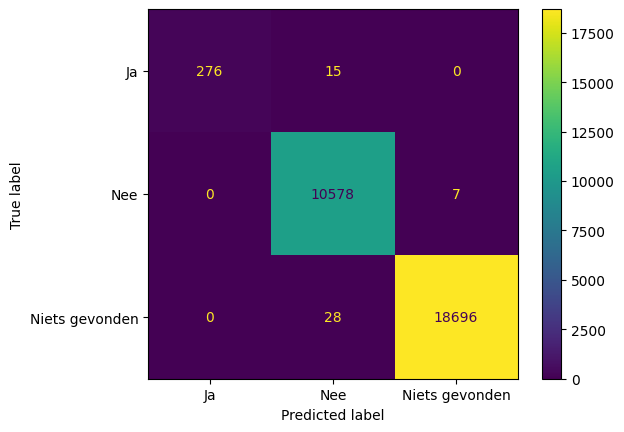

                precision    recall  f1-score   support

            Ja       1.00      0.95      0.97       291
           Nee       1.00      1.00      1.00     10585
Niets gevonden       1.00      1.00      1.00     18724

      accuracy                           1.00     29600
     macro avg       1.00      0.98      0.99     29600
  weighted avg       1.00      1.00      1.00     29600



In [19]:
# Ngram 2 Stopwords kept
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,2), lowercase=True, token_pattern=r"(?u)\b\w\w+\b|\+|\-")),
    ('clf', SGDClassifier(early_stopping=True, n_iter_no_change=5, validation_fraction = 0.25, verbose=3)),
])
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=parameter_grid, random_state=500, verbose=3, scoring='f1_macro')
random_search.fit(X_train, y_train)  
predicted_nb = random_search.predict(X_test)
print(np.mean(predicted_nb == y_test))
cm = confusion_matrix(y_test, predicted_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=random_search.classes_)
disp.plot()

plt.show()
print(metrics.classification_report(y_test, predicted_nb,
    target_names=random_search.classes_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 87.41, NNZs: 345, Bias: 0.000000, T: 71040, Avg. loss: 0.081736
Total training time: 1.44 seconds.
-- Epoch 2
Norm: 118.36, NNZs: 104, Bias: 0.000000, T: 142080, Avg. loss: 0.053759
Total training time: 2.63 seconds.
-- Epoch 3
Norm: 141.80, NNZs: 74, Bias: 0.000000, T: 213120, Avg. loss: 0.046957
Total training time: 3.76 seconds.
-- Epoch 4
Norm: 161.06, NNZs: 63, Bias: 0.000000, T: 284160, Avg. loss: 0.043350
Total training time: 5.05 seconds.
-- Epoch 5
Norm: 178.10, NNZs: 53, Bias: 0.000000, T: 355200, Avg. loss: 0.041185
Total training time: 6.16 seconds.
-- Epoch 6
Norm: 193.24, NNZs: 52, Bias: 0.000000, T: 426240, Avg. loss: 0.039494
Total training time: 7.37 seconds.
-- Epoch 7
Norm: 196.09, NNZs: 52, Bias: 0.000000, T: 497280, Avg. loss: 0.038769
Total training time: 8.67 seconds.
-- Epoch 8
Norm: 198.84, NNZs: 51, Bias: 0.000000, T: 568320, Avg. loss: 0.038528
Total training time: 10.22 seconds.
-- Epoch 9
Norm: 201.55, NNZs: 50, Bias: 0.000000, T: 639360, A

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   24.4s remaining:    0.0s


-- Epoch 1
Norm: 128.06, NNZs: 610, Bias: 0.000000, T: 71040, Avg. loss: 0.224012
Total training time: 1.10 seconds.
-- Epoch 2
Norm: 175.48, NNZs: 215, Bias: 0.000000, T: 142080, Avg. loss: 0.156832
Total training time: 2.22 seconds.
-- Epoch 3
Norm: 211.11, NNZs: 162, Bias: 0.000000, T: 213120, Avg. loss: 0.139471
Total training time: 3.32 seconds.
-- Epoch 4
Norm: 240.88, NNZs: 141, Bias: 0.000000, T: 284160, Avg. loss: 0.130068
Total training time: 4.49 seconds.
-- Epoch 5
Norm: 266.90, NNZs: 128, Bias: 0.000000, T: 355200, Avg. loss: 0.123678
Total training time: 5.58 seconds.
-- Epoch 6
Norm: 290.28, NNZs: 119, Bias: 0.000000, T: 426240, Avg. loss: 0.119033
Total training time: 6.61 seconds.
-- Epoch 7
Norm: 294.52, NNZs: 117, Bias: 0.000000, T: 497280, Avg. loss: 0.117004
Total training time: 7.66 seconds.
-- Epoch 8
Norm: 298.69, NNZs: 116, Bias: 0.000000, T: 568320, Avg. loss: 0.116317
Total training time: 8.71 seconds.
-- Epoch 9
Norm: 302.79, NNZs: 115, Bias: 0.000000, T: 63

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   46.4s remaining:    0.0s


-- Epoch 1
Norm: 128.04, NNZs: 600, Bias: 0.000000, T: 71040, Avg. loss: 0.197994
Total training time: 1.21 seconds.
-- Epoch 2
Norm: 173.50, NNZs: 206, Bias: 0.000000, T: 142080, Avg. loss: 0.137319
Total training time: 2.53 seconds.
-- Epoch 3
Norm: 207.55, NNZs: 163, Bias: 0.000000, T: 213120, Avg. loss: 0.122830
Total training time: 3.62 seconds.
-- Epoch 4
Norm: 236.13, NNZs: 146, Bias: 0.000000, T: 284160, Avg. loss: 0.115134
Total training time: 4.71 seconds.
-- Epoch 5
Norm: 261.22, NNZs: 129, Bias: 0.000000, T: 355200, Avg. loss: 0.109622
Total training time: 5.83 seconds.
-- Epoch 6
Norm: 283.92, NNZs: 119, Bias: 0.000000, T: 426240, Avg. loss: 0.105543
Total training time: 6.96 seconds.
-- Epoch 7
Norm: 288.03, NNZs: 118, Bias: 0.000000, T: 497280, Avg. loss: 0.103346
Total training time: 8.08 seconds.
-- Epoch 8
Norm: 292.07, NNZs: 117, Bias: 0.000000, T: 568320, Avg. loss: 0.102707
Total training time: 9.21 seconds.
-- Epoch 9
Norm: 296.05, NNZs: 115, Bias: 0.000000, T: 63

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.2min finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.092 total time= 4.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 87.15, NNZs: 350, Bias: 0.000000, T: 71040, Avg. loss: 0.082859
Total training time: 1.07 seconds.
-- Epoch 2
Norm: 118.28, NNZs: 109, Bias: 0.000000, T: 142080, Avg. loss: 0.054570
Total training time: 2.19 seconds.
-- Epoch 3
Norm: 141.75, NNZs: 73, Bias: 0.000000, T: 213120, Avg. loss: 0.047289
Total training time: 3.37 seconds.
-- Epoch 4
Norm: 161.14, NNZs: 59, Bias: 0.000000, T: 284160, Avg. loss: 0.043617
Total training time: 4.54 seconds.
-- Epoch 5
Norm: 178.25, NNZs: 53, Bias: 0.000000, T: 355200, Avg. loss: 0.041250
Total training time: 5.63 seconds.
-- Epoch 6
Norm: 193.51, NNZs: 51, Bias: 0.000000, T: 426240, Avg. loss: 0.039472
Total training time: 6.69 seconds.
-- Epoch 7
Norm: 196.31, NNZs: 51, Bias: 0.000000, T: 497280, Avg. loss: 0.038794
Total training time: 7.78 seconds.
-- Epoch 8
Norm: 199.08, NNZs: 50, Bias: 0.000000, T: 568320, Avg. loss: 0.038603
Total training time: 8.84 seconds.
-- Epoch 9
Norm: 201.82, NNZs: 50, Bias: 0.000000, T: 639360, Av

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   22.7s remaining:    0.0s


Norm: 127.87, NNZs: 579, Bias: 0.000000, T: 71040, Avg. loss: 0.224316
Total training time: 1.04 seconds.
-- Epoch 2
Norm: 175.27, NNZs: 216, Bias: 0.000000, T: 142080, Avg. loss: 0.157658
Total training time: 2.09 seconds.
-- Epoch 3
Norm: 211.08, NNZs: 163, Bias: 0.000000, T: 213120, Avg. loss: 0.140415
Total training time: 3.14 seconds.
-- Epoch 4
Norm: 240.92, NNZs: 139, Bias: 0.000000, T: 284160, Avg. loss: 0.130856
Total training time: 4.24 seconds.
-- Epoch 5
Norm: 267.02, NNZs: 125, Bias: 0.000000, T: 355200, Avg. loss: 0.124221
Total training time: 5.31 seconds.
-- Epoch 6
Norm: 290.50, NNZs: 118, Bias: 0.000000, T: 426240, Avg. loss: 0.119540
Total training time: 6.38 seconds.
-- Epoch 7
Norm: 294.73, NNZs: 118, Bias: 0.000000, T: 497280, Avg. loss: 0.117112
Total training time: 7.43 seconds.
-- Epoch 8
Norm: 298.90, NNZs: 117, Bias: 0.000000, T: 568320, Avg. loss: 0.116476
Total training time: 8.48 seconds.
-- Epoch 9
Norm: 303.01, NNZs: 117, Bias: 0.000000, T: 639360, Avg. 

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   44.4s remaining:    0.0s


Norm: 127.89, NNZs: 635, Bias: 0.000000, T: 71040, Avg. loss: 0.198319
Total training time: 1.08 seconds.
-- Epoch 2
Norm: 173.43, NNZs: 212, Bias: 0.000000, T: 142080, Avg. loss: 0.137687
Total training time: 2.20 seconds.
-- Epoch 3
Norm: 207.59, NNZs: 166, Bias: 0.000000, T: 213120, Avg. loss: 0.123376
Total training time: 3.30 seconds.
-- Epoch 4
Norm: 236.15, NNZs: 144, Bias: 0.000000, T: 284160, Avg. loss: 0.115539
Total training time: 4.38 seconds.
-- Epoch 5
Norm: 261.26, NNZs: 129, Bias: 0.000000, T: 355200, Avg. loss: 0.110116
Total training time: 5.50 seconds.
-- Epoch 6
Norm: 283.98, NNZs: 119, Bias: 0.000000, T: 426240, Avg. loss: 0.105879
Total training time: 6.58 seconds.
-- Epoch 7
Norm: 288.08, NNZs: 119, Bias: 0.000000, T: 497280, Avg. loss: 0.103552
Total training time: 7.66 seconds.
-- Epoch 8
Norm: 292.13, NNZs: 117, Bias: 0.000000, T: 568320, Avg. loss: 0.102880
Total training time: 8.72 seconds.
-- Epoch 9
Norm: 296.12, NNZs: 116, Bias: 0.000000, T: 639360, Avg. 

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.1min finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.090 total time= 3.3min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 87.32, NNZs: 356, Bias: 0.000000, T: 71040, Avg. loss: 0.082812
Total training time: 1.05 seconds.
-- Epoch 2
Norm: 118.10, NNZs: 103, Bias: 0.000000, T: 142080, Avg. loss: 0.054437
Total training time: 2.16 seconds.
-- Epoch 3
Norm: 141.48, NNZs: 72, Bias: 0.000000, T: 213120, Avg. loss: 0.047129
Total training time: 3.25 seconds.
-- Epoch 4
Norm: 160.88, NNZs: 61, Bias: 0.000000, T: 284160, Avg. loss: 0.043542
Total training time: 4.33 seconds.
-- Epoch 5
Norm: 177.94, NNZs: 53, Bias: 0.000000, T: 355200, Avg. loss: 0.041270
Total training time: 5.40 seconds.
-- Epoch 6
Norm: 193.23, NNZs: 52, Bias: 0.000000, T: 426240, Avg. loss: 0.039666
Total training time: 6.47 seconds.
-- Epoch 7
Norm: 196.04, NNZs: 52, Bias: 0.000000, T: 497280, Avg. loss: 0.038785
Total training time: 7.56 seconds.
-- Epoch 8
Norm: 198.82, NNZs: 50, Bias: 0.000000, T: 568320, Avg. loss: 0.038629
Total training time: 8.64 seconds.
-- Epoch 9
Norm: 201.54, NNZs: 49, Bias: 0.000000, T: 639360, Av

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.8s remaining:    0.0s


Norm: 127.81, NNZs: 624, Bias: 0.000000, T: 71040, Avg. loss: 0.223997
Total training time: 1.05 seconds.
-- Epoch 2
Norm: 175.12, NNZs: 207, Bias: 0.000000, T: 142080, Avg. loss: 0.157592
Total training time: 2.12 seconds.
-- Epoch 3
Norm: 210.77, NNZs: 169, Bias: 0.000000, T: 213120, Avg. loss: 0.140587
Total training time: 3.19 seconds.
-- Epoch 4
Norm: 240.47, NNZs: 140, Bias: 0.000000, T: 284160, Avg. loss: 0.131037
Total training time: 4.26 seconds.
-- Epoch 5
Norm: 266.51, NNZs: 126, Bias: 0.000000, T: 355200, Avg. loss: 0.124525
Total training time: 5.37 seconds.
-- Epoch 6
Norm: 289.93, NNZs: 118, Bias: 0.000000, T: 426240, Avg. loss: 0.119952
Total training time: 6.47 seconds.
-- Epoch 7
Norm: 294.16, NNZs: 119, Bias: 0.000000, T: 497280, Avg. loss: 0.117812
Total training time: 7.56 seconds.
-- Epoch 8
Norm: 298.32, NNZs: 117, Bias: 0.000000, T: 568320, Avg. loss: 0.117102
Total training time: 8.65 seconds.
-- Epoch 9
Norm: 302.42, NNZs: 116, Bias: 0.000000, T: 639360, Avg. 

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   43.9s remaining:    0.0s


Norm: 127.91, NNZs: 672, Bias: 0.000000, T: 71040, Avg. loss: 0.197911
Total training time: 1.06 seconds.
-- Epoch 2
Norm: 173.40, NNZs: 206, Bias: 0.000000, T: 142080, Avg. loss: 0.137225
Total training time: 2.13 seconds.
-- Epoch 3
Norm: 207.41, NNZs: 164, Bias: 0.000000, T: 213120, Avg. loss: 0.123212
Total training time: 3.23 seconds.
-- Epoch 4
Norm: 235.88, NNZs: 136, Bias: 0.000000, T: 284160, Avg. loss: 0.115278
Total training time: 4.30 seconds.
-- Epoch 5
Norm: 260.95, NNZs: 129, Bias: 0.000000, T: 355200, Avg. loss: 0.109777
Total training time: 5.35 seconds.
-- Epoch 6
Norm: 283.61, NNZs: 119, Bias: 0.000000, T: 426240, Avg. loss: 0.105664
Total training time: 6.40 seconds.
-- Epoch 7
Norm: 287.72, NNZs: 118, Bias: 0.000000, T: 497280, Avg. loss: 0.103474
Total training time: 7.48 seconds.
-- Epoch 8
Norm: 291.76, NNZs: 117, Bias: 0.000000, T: 568320, Avg. loss: 0.102840
Total training time: 8.56 seconds.
-- Epoch 9
Norm: 295.74, NNZs: 116, Bias: 0.000000, T: 639360, Avg. 

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.1min finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.091 total time= 3.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 87.17, NNZs: 379, Bias: 0.000000, T: 71040, Avg. loss: 0.082233
Total training time: 1.08 seconds.
-- Epoch 2
Norm: 118.11, NNZs: 104, Bias: 0.000000, T: 142080, Avg. loss: 0.054085
Total training time: 2.23 seconds.
-- Epoch 3
Norm: 141.58, NNZs: 72, Bias: 0.000000, T: 213120, Avg. loss: 0.047508
Total training time: 3.36 seconds.
-- Epoch 4
Norm: 161.07, NNZs: 59, Bias: 0.000000, T: 284160, Avg. loss: 0.043581
Total training time: 4.57 seconds.
-- Epoch 5
Norm: 177.78, NNZs: 53, Bias: 0.000000, T: 355200, Avg. loss: 0.041519
Total training time: 5.70 seconds.
-- Epoch 6
Norm: 193.14, NNZs: 52, Bias: 0.000000, T: 426240, Avg. loss: 0.039865
Total training time: 6.92 seconds.
-- Epoch 7
Norm: 195.90, NNZs: 52, Bias: 0.000000, T: 497280, Avg. loss: 0.039114
Total training time: 8.03 seconds.
-- Epoch 8
Norm: 198.65, NNZs: 51, Bias: 0.000000, T: 568320, Avg. loss: 0.038951
Total training time: 9.19 seconds.
-- Epoch 9
Norm: 201.35, NNZs: 51, Bias: 0.000000, T: 639360, Av

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   22.9s remaining:    0.0s


Norm: 127.94, NNZs: 666, Bias: 0.000000, T: 71040, Avg. loss: 0.224491
Total training time: 1.14 seconds.
-- Epoch 2
Norm: 175.25, NNZs: 215, Bias: 0.000000, T: 142080, Avg. loss: 0.158128
Total training time: 2.27 seconds.
-- Epoch 3
Norm: 211.01, NNZs: 165, Bias: 0.000000, T: 213120, Avg. loss: 0.141071
Total training time: 3.40 seconds.
-- Epoch 4
Norm: 240.68, NNZs: 138, Bias: 0.000000, T: 284160, Avg. loss: 0.131431
Total training time: 4.54 seconds.
-- Epoch 5
Norm: 266.72, NNZs: 129, Bias: 0.000000, T: 355200, Avg. loss: 0.124894
Total training time: 5.67 seconds.
-- Epoch 6
Norm: 290.11, NNZs: 120, Bias: 0.000000, T: 426240, Avg. loss: 0.120412
Total training time: 6.80 seconds.
-- Epoch 7
Norm: 294.33, NNZs: 120, Bias: 0.000000, T: 497280, Avg. loss: 0.118170
Total training time: 8.02 seconds.
-- Epoch 8
Norm: 298.49, NNZs: 119, Bias: 0.000000, T: 568320, Avg. loss: 0.117543
Total training time: 9.13 seconds.
-- Epoch 9
Norm: 302.59, NNZs: 116, Bias: 0.000000, T: 639360, Avg. 

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   45.8s remaining:    0.0s


Norm: 127.88, NNZs: 709, Bias: 0.000000, T: 71040, Avg. loss: 0.198052
Total training time: 1.14 seconds.
-- Epoch 2
Norm: 173.53, NNZs: 209, Bias: 0.000000, T: 142080, Avg. loss: 0.137783
Total training time: 2.32 seconds.
-- Epoch 3
Norm: 207.63, NNZs: 162, Bias: 0.000000, T: 213120, Avg. loss: 0.123649
Total training time: 3.44 seconds.
-- Epoch 4
Norm: 236.16, NNZs: 142, Bias: 0.000000, T: 284160, Avg. loss: 0.115676
Total training time: 4.57 seconds.
-- Epoch 5
Norm: 261.26, NNZs: 132, Bias: 0.000000, T: 355200, Avg. loss: 0.110159
Total training time: 5.71 seconds.
-- Epoch 6
Norm: 283.93, NNZs: 120, Bias: 0.000000, T: 426240, Avg. loss: 0.105924
Total training time: 6.88 seconds.
-- Epoch 7
Norm: 288.05, NNZs: 119, Bias: 0.000000, T: 497280, Avg. loss: 0.103989
Total training time: 7.98 seconds.
-- Epoch 8
Norm: 292.11, NNZs: 119, Bias: 0.000000, T: 568320, Avg. loss: 0.103322
Total training time: 9.13 seconds.
-- Epoch 9
Norm: 296.10, NNZs: 114, Bias: 0.000000, T: 639360, Avg. 

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.1min finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.090 total time= 3.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 87.52, NNZs: 331, Bias: 0.000000, T: 71040, Avg. loss: 0.081982
Total training time: 1.04 seconds.
-- Epoch 2
Norm: 118.60, NNZs: 107, Bias: 0.000000, T: 142080, Avg. loss: 0.054548
Total training time: 2.11 seconds.
-- Epoch 3
Norm: 141.91, NNZs: 72, Bias: 0.000000, T: 213120, Avg. loss: 0.047314
Total training time: 3.20 seconds.
-- Epoch 4
Norm: 161.38, NNZs: 59, Bias: 0.000000, T: 284160, Avg. loss: 0.043665
Total training time: 4.28 seconds.
-- Epoch 5
Norm: 178.42, NNZs: 54, Bias: 0.000000, T: 355200, Avg. loss: 0.041204
Total training time: 5.34 seconds.
-- Epoch 6
Norm: 193.72, NNZs: 51, Bias: 0.000000, T: 426240, Avg. loss: 0.039599
Total training time: 6.41 seconds.
-- Epoch 7
Norm: 196.50, NNZs: 51, Bias: 0.000000, T: 497280, Avg. loss: 0.038813
Total training time: 7.51 seconds.
-- Epoch 8
Norm: 199.28, NNZs: 51, Bias: 0.000000, T: 568320, Avg. loss: 0.038661
Total training time: 8.58 seconds.
-- Epoch 9
Norm: 202.01, NNZs: 50, Bias: 0.000000, T: 639360, Av

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.7s remaining:    0.0s


Norm: 127.74, NNZs: 629, Bias: 0.000000, T: 71040, Avg. loss: 0.224245
Total training time: 1.39 seconds.
-- Epoch 2
Norm: 175.19, NNZs: 209, Bias: 0.000000, T: 142080, Avg. loss: 0.157899
Total training time: 2.65 seconds.
-- Epoch 3
Norm: 210.89, NNZs: 165, Bias: 0.000000, T: 213120, Avg. loss: 0.140559
Total training time: 3.80 seconds.
-- Epoch 4
Norm: 240.68, NNZs: 143, Bias: 0.000000, T: 284160, Avg. loss: 0.130936
Total training time: 4.94 seconds.
-- Epoch 5
Norm: 266.80, NNZs: 129, Bias: 0.000000, T: 355200, Avg. loss: 0.124454
Total training time: 6.00 seconds.
-- Epoch 6
Norm: 290.33, NNZs: 120, Bias: 0.000000, T: 426240, Avg. loss: 0.119638
Total training time: 7.10 seconds.
-- Epoch 7
Norm: 294.56, NNZs: 118, Bias: 0.000000, T: 497280, Avg. loss: 0.117312
Total training time: 8.14 seconds.
-- Epoch 8
Norm: 298.74, NNZs: 115, Bias: 0.000000, T: 568320, Avg. loss: 0.116578
Total training time: 9.29 seconds.
-- Epoch 9
Norm: 302.85, NNZs: 115, Bias: 0.000000, T: 639360, Avg. 

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   44.4s remaining:    0.0s


Norm: 127.75, NNZs: 642, Bias: 0.000000, T: 71040, Avg. loss: 0.198356
Total training time: 1.04 seconds.
-- Epoch 2
Norm: 173.13, NNZs: 202, Bias: 0.000000, T: 142080, Avg. loss: 0.137998
Total training time: 2.12 seconds.
-- Epoch 3
Norm: 207.28, NNZs: 162, Bias: 0.000000, T: 213120, Avg. loss: 0.124022
Total training time: 3.20 seconds.
-- Epoch 4
Norm: 235.87, NNZs: 143, Bias: 0.000000, T: 284160, Avg. loss: 0.115930
Total training time: 4.27 seconds.
-- Epoch 5
Norm: 260.97, NNZs: 130, Bias: 0.000000, T: 355200, Avg. loss: 0.110325
Total training time: 5.34 seconds.
-- Epoch 6
Norm: 283.72, NNZs: 121, Bias: 0.000000, T: 426240, Avg. loss: 0.106099
Total training time: 6.41 seconds.
-- Epoch 7
Norm: 287.85, NNZs: 121, Bias: 0.000000, T: 497280, Avg. loss: 0.103900
Total training time: 7.48 seconds.
-- Epoch 8
Norm: 291.92, NNZs: 120, Bias: 0.000000, T: 568320, Avg. loss: 0.103277
Total training time: 8.51 seconds.
-- Epoch 9
Norm: 295.91, NNZs: 117, Bias: 0.000000, T: 639360, Avg. 

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.1min finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.089 total time= 3.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 103078901971392.31, NNZs: 822599, Bias: 0.000000, T: 71040, Avg. loss: 79162567193318519734272.000000
Total training time: 0.63 seconds.
-- Epoch 2
Norm: 97206651019075.48, NNZs: 822600, Bias: 0.000000, T: 142080, Avg. loss: 90382244736233937829888.000000
Total training time: 1.30 seconds.
-- Epoch 3
Norm: 94170411649114.58, NNZs: 822600, Bias: 0.000000, T: 213120, Avg. loss: 75534977607177772990464.000000
Total training time: 1.96 seconds.
-- Epoch 4
Norm: 92158098017786.58, NNZs: 822600, Bias: 0.000000, T: 284160, Avg. loss: 68568183936003250061312.000000
Total training time: 2.64 seconds.
-- Epoch 5
Norm: 90661878460699.78, NNZs: 822600, Bias: 0.000000, T: 355200, Avg. loss: 64275213132981765931008.000000
Total training time: 3.34 seconds.
-- Epoch 6
Norm: 89477609874859.69, NNZs: 822600, Bias: 0.000000, T: 426240, Avg. loss: 61187121586907918630912.000000
Total training time: 4.03 seconds.
Convergence after 6 epochs took 4.09 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s remaining:    0.0s


Norm: 110130459480679.98, NNZs: 822594, Bias: 0.000000, T: 71040, Avg. loss: 89194194563224330829824.000000
Total training time: 0.62 seconds.
-- Epoch 2
Norm: 104087488675486.12, NNZs: 822600, Bias: 0.000000, T: 142080, Avg. loss: 103844520232704024772608.000000
Total training time: 1.31 seconds.
-- Epoch 3
Norm: 100962442013392.52, NNZs: 822600, Bias: 0.000000, T: 213120, Avg. loss: 87356454895383887216640.000000
Total training time: 2.02 seconds.
-- Epoch 4
Norm: 98888761750748.02, NNZs: 822600, Bias: 0.000000, T: 284160, Avg. loss: 79547564894540951191552.000000
Total training time: 2.74 seconds.
-- Epoch 5
Norm: 97345150398731.95, NNZs: 822600, Bias: 0.000000, T: 355200, Avg. loss: 74757620409351417102336.000000
Total training time: 3.44 seconds.
-- Epoch 6
Norm: 96121705339676.67, NNZs: 822600, Bias: 0.000000, T: 426240, Avg. loss: 71274237114228922122240.000000
Total training time: 4.13 seconds.
Convergence after 6 epochs took 4.19 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.4s remaining:    0.0s


Norm: 107010787717363.80, NNZs: 822600, Bias: 0.000000, T: 71040, Avg. loss: 89245707899451639595008.000000
Total training time: 0.67 seconds.
-- Epoch 2
Norm: 100990073634612.62, NNZs: 822600, Bias: 0.000000, T: 142080, Avg. loss: 97068758793428720943104.000000
Total training time: 1.41 seconds.
-- Epoch 3
Norm: 97861064519971.11, NNZs: 822600, Bias: 0.000000, T: 213120, Avg. loss: 81320808575304139276288.000000
Total training time: 2.15 seconds.
-- Epoch 4
Norm: 95787250843021.27, NNZs: 822600, Bias: 0.000000, T: 284160, Avg. loss: 73791209004098654306304.000000
Total training time: 2.84 seconds.
-- Epoch 5
Norm: 94245126924448.62, NNZs: 822600, Bias: 0.000000, T: 355200, Avg. loss: 69144395449173096267776.000000
Total training time: 3.56 seconds.
-- Epoch 6
Norm: 93025039088264.33, NNZs: 822600, Bias: 0.000000, T: 426240, Avg. loss: 65814308405254987710464.000000
Total training time: 4.27 seconds.
Convergence after 6 epochs took 4.34 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   12.7s finished


[CV 1/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.259 total time= 2.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 35.80, NNZs: 46, Bias: 0.000000, T: 71040, Avg. loss: 0.001423
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 36.41, NNZs: 45, Bias: 0.000000, T: 142080, Avg. loss: 0.001334
Total training time: 0.95 seconds.
-- Epoch 3
Norm: 36.74, NNZs: 45, Bias: 0.000000, T: 213120, Avg. loss: 0.001318
Total training time: 1.48 seconds.
-- Epoch 4
Norm: 36.98, NNZs: 44, Bias: 0.000000, T: 284160, Avg. loss: 0.001315
Total training time: 1.99 seconds.
-- Epoch 5
Norm: 37.16, NNZs: 44, Bias: 0.000000, T: 355200, Avg. loss: 0.001312
Total training time: 2.51 seconds.
-- Epoch 6
Norm: 37.30, NNZs: 44, Bias: 0.000000, T: 426240, Avg. loss: 0.001305
Total training time: 3.02 seconds.
Convergence after 6 epochs took 3.08 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s


Norm: 62570538508342.61, NNZs: 821439, Bias: 0.000000, T: 71040, Avg. loss: 32217304376721845256192.000000
Total training time: 0.66 seconds.
-- Epoch 2
Norm: 58012595920518.69, NNZs: 821449, Bias: 0.000000, T: 142080, Avg. loss: 31493266443996598632448.000000
Total training time: 1.37 seconds.
-- Epoch 3
Norm: 55677384934346.13, NNZs: 821449, Bias: 0.000000, T: 213120, Avg. loss: 25056116197625635536896.000000
Total training time: 2.05 seconds.
-- Epoch 4
Norm: 54130440575000.86, NNZs: 821449, Bias: 0.000000, T: 284160, Avg. loss: 22121173537151579586560.000000
Total training time: 2.72 seconds.
-- Epoch 5
Norm: 52985228638427.15, NNZs: 821449, Bias: 0.000000, T: 355200, Avg. loss: 20330981245348550279168.000000
Total training time: 3.39 seconds.
-- Epoch 6
Norm: 52084821905008.39, NNZs: 821449, Bias: 0.000000, T: 426240, Avg. loss: 19074487547402815275008.000000
Total training time: 4.08 seconds.
Convergence after 6 epochs took 4.15 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.3s remaining:    0.0s


Norm: 385722774.24, NNZs: 821400, Bias: 0.000000, T: 71040, Avg. loss: 1511575790818.753418
Total training time: 0.60 seconds.
-- Epoch 2
Norm: 347294337.36, NNZs: 821418, Bias: 0.000000, T: 142080, Avg. loss: 1146275202032.626221
Total training time: 1.25 seconds.
-- Epoch 3
Norm: 328655883.69, NNZs: 821421, Bias: 0.000000, T: 213120, Avg. loss: 831139157394.466675
Total training time: 1.90 seconds.
-- Epoch 4
Norm: 316669337.43, NNZs: 821426, Bias: 0.000000, T: 284160, Avg. loss: 701220907626.579590
Total training time: 2.55 seconds.
-- Epoch 5
Norm: 308033312.98, NNZs: 821425, Bias: 0.000000, T: 355200, Avg. loss: 625720745067.435547
Total training time: 3.21 seconds.
-- Epoch 6
Norm: 301346871.01, NNZs: 821413, Bias: 0.000000, T: 426240, Avg. loss: 574896356077.931763
Total training time: 3.85 seconds.
Convergence after 6 epochs took 3.91 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.3s finished


[CV 2/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.268 total time= 2.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 37.61, NNZs: 45, Bias: 0.000000, T: 71040, Avg. loss: 0.001564
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 38.19, NNZs: 43, Bias: 0.000000, T: 142080, Avg. loss: 0.001379
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 38.51, NNZs: 43, Bias: 0.000000, T: 213120, Avg. loss: 0.001354
Total training time: 1.29 seconds.
-- Epoch 4
Norm: 38.73, NNZs: 43, Bias: 0.000000, T: 284160, Avg. loss: 0.001349
Total training time: 1.79 seconds.
-- Epoch 5
Norm: 38.91, NNZs: 43, Bias: 0.000000, T: 355200, Avg. loss: 0.001342
Total training time: 2.25 seconds.
-- Epoch 6
Norm: 39.05, NNZs: 43, Bias: 0.000000, T: 426240, Avg. loss: 0.001341
Total training time: 2.67 seconds.
Convergence after 6 epochs took 2.73 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


Norm: 97144655872569.20, NNZs: 818922, Bias: 0.000000, T: 71040, Avg. loss: 72103268389167766175744.000000
Total training time: 0.62 seconds.
-- Epoch 2
Norm: 91456718559783.98, NNZs: 818927, Bias: 0.000000, T: 142080, Avg. loss: 79149673041955213279232.000000
Total training time: 1.24 seconds.
-- Epoch 3
Norm: 88515804159845.86, NNZs: 818927, Bias: 0.000000, T: 213120, Avg. loss: 65899686235341580140544.000000
Total training time: 1.86 seconds.
-- Epoch 4
Norm: 86557443915108.72, NNZs: 818927, Bias: 0.000000, T: 284160, Avg. loss: 59665672815110013321216.000000
Total training time: 2.50 seconds.
-- Epoch 5
Norm: 85105266385015.44, NNZs: 818927, Bias: 0.000000, T: 355200, Avg. loss: 55766435899495514374144.000000
Total training time: 3.13 seconds.
-- Epoch 6
Norm: 83954625569913.08, NNZs: 818927, Bias: 0.000000, T: 426240, Avg. loss: 53008068168521195978752.000000
Total training time: 3.75 seconds.
Convergence after 6 epochs took 3.80 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.6s remaining:    0.0s


Norm: 75.52, NNZs: 80, Bias: 0.000000, T: 71040, Avg. loss: 0.005126
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 76.21, NNZs: 71, Bias: 0.000000, T: 142080, Avg. loss: 0.004453
Total training time: 1.00 seconds.
-- Epoch 3
Norm: 76.58, NNZs: 71, Bias: 0.000000, T: 213120, Avg. loss: 0.004355
Total training time: 1.52 seconds.
-- Epoch 4
Norm: 76.84, NNZs: 70, Bias: 0.000000, T: 284160, Avg. loss: 0.004313
Total training time: 2.02 seconds.
-- Epoch 5
Norm: 77.04, NNZs: 70, Bias: 0.000000, T: 355200, Avg. loss: 0.004274
Total training time: 2.54 seconds.
-- Epoch 6
Norm: 77.20, NNZs: 71, Bias: 0.000000, T: 426240, Avg. loss: 0.004262
Total training time: 3.05 seconds.
Convergence after 6 epochs took 3.12 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.8s finished


[CV 3/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.379 total time= 2.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 45.15, NNZs: 45, Bias: 0.000000, T: 71040, Avg. loss: 0.001559
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 45.63, NNZs: 44, Bias: 0.000000, T: 142080, Avg. loss: 0.001399
Total training time: 0.88 seconds.
-- Epoch 3
Norm: 45.90, NNZs: 43, Bias: 0.000000, T: 213120, Avg. loss: 0.001369
Total training time: 1.33 seconds.
-- Epoch 4
Norm: 46.08, NNZs: 42, Bias: 0.000000, T: 284160, Avg. loss: 0.001372
Total training time: 1.80 seconds.
-- Epoch 5
Norm: 46.23, NNZs: 42, Bias: 0.000000, T: 355200, Avg. loss: 0.001371
Total training time: 2.27 seconds.
-- Epoch 6
Norm: 46.34, NNZs: 41, Bias: 0.000000, T: 426240, Avg. loss: 0.001370
Total training time: 2.74 seconds.
Convergence after 6 epochs took 2.81 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


Norm: 119649794794902.56, NNZs: 820478, Bias: 0.000000, T: 71040, Avg. loss: 113006362096118035120128.000000
Total training time: 0.66 seconds.
-- Epoch 2
Norm: 113340967840446.70, NNZs: 820478, Bias: 0.000000, T: 142080, Avg. loss: 122958890401908148666368.000000
Total training time: 1.30 seconds.
-- Epoch 3
Norm: 110088597109170.20, NNZs: 820478, Bias: 0.000000, T: 213120, Avg. loss: 103790781777048678432768.000000
Total training time: 1.96 seconds.
-- Epoch 4
Norm: 107931008565244.41, NNZs: 820478, Bias: 0.000000, T: 284160, Avg. loss: 94741464117600466239488.000000
Total training time: 2.64 seconds.
-- Epoch 5
Norm: 106326248448331.89, NNZs: 820478, Bias: 0.000000, T: 355200, Avg. loss: 89134360320620430884864.000000
Total training time: 3.28 seconds.
-- Epoch 6
Norm: 105059547003832.00, NNZs: 820478, Bias: 0.000000, T: 426240, Avg. loss: 85081589709490421235712.000000
Total training time: 3.92 seconds.
Convergence after 6 epochs took 3.98 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.9s remaining:    0.0s


Norm: 73.57, NNZs: 84, Bias: 0.000000, T: 71040, Avg. loss: 0.005030
Total training time: 0.53 seconds.
-- Epoch 2
Norm: 74.28, NNZs: 76, Bias: 0.000000, T: 142080, Avg. loss: 0.004487
Total training time: 1.06 seconds.
-- Epoch 3
Norm: 74.67, NNZs: 77, Bias: 0.000000, T: 213120, Avg. loss: 0.004381
Total training time: 1.59 seconds.
-- Epoch 4
Norm: 74.94, NNZs: 77, Bias: 0.000000, T: 284160, Avg. loss: 0.004332
Total training time: 2.12 seconds.
-- Epoch 5
Norm: 75.14, NNZs: 77, Bias: 0.000000, T: 355200, Avg. loss: 0.004284
Total training time: 2.68 seconds.
-- Epoch 6
Norm: 75.30, NNZs: 77, Bias: 0.000000, T: 426240, Avg. loss: 0.004272
Total training time: 3.21 seconds.
Convergence after 6 epochs took 3.28 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.2s finished


[CV 4/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.375 total time= 2.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 107971101859871.11, NNZs: 816922, Bias: 0.000000, T: 71040, Avg. loss: 87026091102288369156096.000000
Total training time: 0.62 seconds.
-- Epoch 2
Norm: 102053575027525.31, NNZs: 816927, Bias: 0.000000, T: 142080, Avg. loss: 98552223615017140879360.000000
Total training time: 1.24 seconds.
-- Epoch 3
Norm: 98991653316042.91, NNZs: 816927, Bias: 0.000000, T: 213120, Avg. loss: 83039748602248516599808.000000
Total training time: 1.87 seconds.
-- Epoch 4
Norm: 96952535349272.77, NNZs: 816927, Bias: 0.000000, T: 284160, Avg. loss: 75654663067088086630400.000000
Total training time: 2.47 seconds.
-- Epoch 5
Norm: 95434867968982.97, NNZs: 816927, Bias: 0.000000, T: 355200, Avg. loss: 71065166899696671653888.000000
Total training time: 3.07 seconds.
-- Epoch 6
Norm: 94237039283672.86, NNZs: 816927, Bias: 0.000000, T: 426240, Avg. loss: 67803355079763963150336.000000
Total training time: 3.66 seconds.
Convergence after 6 epochs took 3.72 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s remaining:    0.0s


Norm: 125.34, NNZs: 140, Bias: 0.000000, T: 71040, Avg. loss: 0.037867
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 124.76, NNZs: 121, Bias: 0.000000, T: 142080, Avg. loss: 0.013096
Total training time: 0.95 seconds.
-- Epoch 3
Norm: 124.69, NNZs: 115, Bias: 0.000000, T: 213120, Avg. loss: 0.009490
Total training time: 1.44 seconds.
-- Epoch 4
Norm: 124.69, NNZs: 111, Bias: 0.000000, T: 284160, Avg. loss: 0.008341
Total training time: 1.92 seconds.
-- Epoch 5
Norm: 124.71, NNZs: 108, Bias: 0.000000, T: 355200, Avg. loss: 0.007689
Total training time: 2.39 seconds.
-- Epoch 6
Norm: 124.73, NNZs: 105, Bias: 0.000000, T: 426240, Avg. loss: 0.007290
Total training time: 2.87 seconds.
Convergence after 6 epochs took 2.93 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.7s remaining:    0.0s


Norm: 223.69, NNZs: 382, Bias: 0.000000, T: 71040, Avg. loss: 0.056568
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 223.37, NNZs: 280, Bias: 0.000000, T: 142080, Avg. loss: 0.011004
Total training time: 0.99 seconds.
-- Epoch 3
Norm: 223.41, NNZs: 234, Bias: 0.000000, T: 213120, Avg. loss: 0.006113
Total training time: 1.52 seconds.
-- Epoch 4
Norm: 223.46, NNZs: 206, Bias: 0.000000, T: 284160, Avg. loss: 0.005418
Total training time: 2.03 seconds.
-- Epoch 5
Norm: 223.50, NNZs: 193, Bias: 0.000000, T: 355200, Avg. loss: 0.004961
Total training time: 2.57 seconds.
-- Epoch 6
Norm: 223.54, NNZs: 180, Bias: 0.000000, T: 426240, Avg. loss: 0.004638
Total training time: 3.09 seconds.
Convergence after 6 epochs took 3.15 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.9s finished


[CV 5/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.429 total time= 2.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 83.75, NNZs: 326, Bias: 0.000000, T: 71040, Avg. loss: 0.020805
Total training time: 0.59 seconds.
-- Epoch 2
Norm: 109.65, NNZs: 99, Bias: 0.000000, T: 142080, Avg. loss: 0.013243
Total training time: 1.20 seconds.
-- Epoch 3
Norm: 128.89, NNZs: 90, Bias: 0.000000, T: 213120, Avg. loss: 0.011985
Total training time: 1.79 seconds.
-- Epoch 4
Norm: 145.19, NNZs: 86, Bias: 0.000000, T: 284160, Avg. loss: 0.011581
Total training time: 2.38 seconds.
-- Epoch 5
Norm: 159.43, NNZs: 79, Bias: 0.000000, T: 355200, Avg. loss: 0.011299
Total training time: 3.04 seconds.
-- Epoch 6
Norm: 172.55, NNZs: 73, Bias: 0.000000, T: 426240, Avg. loss: 0.011328
Total training time: 3.61 seconds.
Convergence after 6 epochs took 3.68 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s


Norm: 158.84, NNZs: 954, Bias: 0.000000, T: 71040, Avg. loss: 0.089701
Total training time: 0.67 seconds.
-- Epoch 2
Norm: 207.56, NNZs: 244, Bias: 0.000000, T: 142080, Avg. loss: 0.054503
Total training time: 1.37 seconds.
-- Epoch 3
Norm: 243.25, NNZs: 201, Bias: 0.000000, T: 213120, Avg. loss: 0.046454
Total training time: 2.02 seconds.
-- Epoch 4
Norm: 272.67, NNZs: 191, Bias: 0.000000, T: 284160, Avg. loss: 0.044415
Total training time: 2.67 seconds.
-- Epoch 5
Norm: 298.34, NNZs: 178, Bias: 0.000000, T: 355200, Avg. loss: 0.039213
Total training time: 3.31 seconds.
-- Epoch 6
Norm: 321.06, NNZs: 172, Bias: 0.000000, T: 426240, Avg. loss: 0.039385
Total training time: 4.05 seconds.
Convergence after 6 epochs took 4.12 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.9s remaining:    0.0s


Norm: 149.68, NNZs: 872, Bias: 0.000000, T: 71040, Avg. loss: 0.074708
Total training time: 0.74 seconds.
-- Epoch 2
Norm: 194.74, NNZs: 211, Bias: 0.000000, T: 142080, Avg. loss: 0.043356
Total training time: 1.37 seconds.
-- Epoch 3
Norm: 227.51, NNZs: 177, Bias: 0.000000, T: 213120, Avg. loss: 0.036048
Total training time: 1.99 seconds.
-- Epoch 4
Norm: 254.20, NNZs: 163, Bias: 0.000000, T: 284160, Avg. loss: 0.031626
Total training time: 2.60 seconds.
-- Epoch 5
Norm: 277.12, NNZs: 151, Bias: 0.000000, T: 355200, Avg. loss: 0.028817
Total training time: 3.21 seconds.
-- Epoch 6
Norm: 297.50, NNZs: 140, Bias: 0.000000, T: 426240, Avg. loss: 0.027007
Total training time: 3.90 seconds.
Convergence after 6 epochs took 3.98 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.9s finished


[CV 1/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.978 total time= 2.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 83.32, NNZs: 295, Bias: 0.000000, T: 71040, Avg. loss: 0.020339
Total training time: 0.57 seconds.
-- Epoch 2
Norm: 108.93, NNZs: 100, Bias: 0.000000, T: 142080, Avg. loss: 0.012960
Total training time: 1.15 seconds.
-- Epoch 3
Norm: 128.07, NNZs: 88, Bias: 0.000000, T: 213120, Avg. loss: 0.011910
Total training time: 1.75 seconds.
-- Epoch 4
Norm: 144.17, NNZs: 81, Bias: 0.000000, T: 284160, Avg. loss: 0.011480
Total training time: 2.32 seconds.
-- Epoch 5
Norm: 158.53, NNZs: 77, Bias: 0.000000, T: 355200, Avg. loss: 0.011322
Total training time: 2.90 seconds.
-- Epoch 6
Norm: 171.35, NNZs: 73, Bias: 0.000000, T: 426240, Avg. loss: 0.011087
Total training time: 3.45 seconds.
Convergence after 6 epochs took 3.52 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s


Norm: 158.27, NNZs: 916, Bias: 0.000000, T: 71040, Avg. loss: 0.089133
Total training time: 0.61 seconds.
-- Epoch 2
Norm: 207.13, NNZs: 231, Bias: 0.000000, T: 142080, Avg. loss: 0.056424
Total training time: 1.20 seconds.
-- Epoch 3
Norm: 242.88, NNZs: 206, Bias: 0.000000, T: 213120, Avg. loss: 0.048905
Total training time: 1.83 seconds.
-- Epoch 4
Norm: 272.02, NNZs: 185, Bias: 0.000000, T: 284160, Avg. loss: 0.045952
Total training time: 2.49 seconds.
-- Epoch 5
Norm: 297.75, NNZs: 171, Bias: 0.000000, T: 355200, Avg. loss: 0.042211
Total training time: 3.36 seconds.
-- Epoch 6
Norm: 320.59, NNZs: 166, Bias: 0.000000, T: 426240, Avg. loss: 0.040624
Total training time: 4.00 seconds.
Convergence after 6 epochs took 4.07 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.7s remaining:    0.0s


Norm: 149.47, NNZs: 962, Bias: 0.000000, T: 71040, Avg. loss: 0.074661
Total training time: 0.56 seconds.
-- Epoch 2
Norm: 194.77, NNZs: 211, Bias: 0.000000, T: 142080, Avg. loss: 0.044054
Total training time: 1.21 seconds.
-- Epoch 3
Norm: 227.50, NNZs: 175, Bias: 0.000000, T: 213120, Avg. loss: 0.036047
Total training time: 1.87 seconds.
-- Epoch 4
Norm: 254.25, NNZs: 160, Bias: 0.000000, T: 284160, Avg. loss: 0.031777
Total training time: 2.49 seconds.
-- Epoch 5
Norm: 277.21, NNZs: 147, Bias: 0.000000, T: 355200, Avg. loss: 0.028908
Total training time: 3.13 seconds.
-- Epoch 6
Norm: 297.42, NNZs: 136, Bias: 0.000000, T: 426240, Avg. loss: 0.026743
Total training time: 3.81 seconds.
Convergence after 6 epochs took 3.90 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.6s finished


[CV 2/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.980 total time= 2.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 83.58, NNZs: 334, Bias: 0.000000, T: 71040, Avg. loss: 0.020688
Total training time: 0.55 seconds.
-- Epoch 2
Norm: 109.31, NNZs: 98, Bias: 0.000000, T: 142080, Avg. loss: 0.013075
Total training time: 1.08 seconds.
-- Epoch 3
Norm: 128.66, NNZs: 89, Bias: 0.000000, T: 213120, Avg. loss: 0.011956
Total training time: 1.66 seconds.
-- Epoch 4
Norm: 144.84, NNZs: 83, Bias: 0.000000, T: 284160, Avg. loss: 0.011529
Total training time: 2.24 seconds.
-- Epoch 5
Norm: 159.06, NNZs: 77, Bias: 0.000000, T: 355200, Avg. loss: 0.011161
Total training time: 2.82 seconds.
-- Epoch 6
Norm: 171.95, NNZs: 71, Bias: 0.000000, T: 426240, Avg. loss: 0.010927
Total training time: 3.39 seconds.
Convergence after 6 epochs took 3.47 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s


Norm: 159.17, NNZs: 986, Bias: 0.000000, T: 71040, Avg. loss: 0.090176
Total training time: 0.61 seconds.
-- Epoch 2
Norm: 207.99, NNZs: 240, Bias: 0.000000, T: 142080, Avg. loss: 0.057404
Total training time: 1.25 seconds.
-- Epoch 3
Norm: 243.91, NNZs: 197, Bias: 0.000000, T: 213120, Avg. loss: 0.049684
Total training time: 1.94 seconds.
-- Epoch 4
Norm: 273.69, NNZs: 189, Bias: 0.000000, T: 284160, Avg. loss: 0.045589
Total training time: 2.61 seconds.
-- Epoch 5
Norm: 299.28, NNZs: 182, Bias: 0.000000, T: 355200, Avg. loss: 0.043043
Total training time: 3.30 seconds.
-- Epoch 6
Norm: 322.19, NNZs: 185, Bias: 0.000000, T: 426240, Avg. loss: 0.041427
Total training time: 3.93 seconds.
Convergence after 6 epochs took 4.02 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.6s remaining:    0.0s


Norm: 150.13, NNZs: 990, Bias: 0.000000, T: 71040, Avg. loss: 0.075608
Total training time: 0.69 seconds.
-- Epoch 2
Norm: 195.42, NNZs: 227, Bias: 0.000000, T: 142080, Avg. loss: 0.043964
Total training time: 1.47 seconds.
-- Epoch 3
Norm: 228.43, NNZs: 175, Bias: 0.000000, T: 213120, Avg. loss: 0.036655
Total training time: 2.13 seconds.
-- Epoch 4
Norm: 255.13, NNZs: 147, Bias: 0.000000, T: 284160, Avg. loss: 0.031854
Total training time: 2.77 seconds.
-- Epoch 5
Norm: 278.11, NNZs: 139, Bias: 0.000000, T: 355200, Avg. loss: 0.029232
Total training time: 3.41 seconds.
-- Epoch 6
Norm: 298.49, NNZs: 140, Bias: 0.000000, T: 426240, Avg. loss: 0.027176
Total training time: 4.02 seconds.
Convergence after 6 epochs took 4.10 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.7s finished


[CV 3/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.980 total time= 2.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 83.50, NNZs: 301, Bias: 0.000000, T: 71040, Avg. loss: 0.020437
Total training time: 0.57 seconds.
-- Epoch 2
Norm: 108.78, NNZs: 95, Bias: 0.000000, T: 142080, Avg. loss: 0.012516
Total training time: 1.15 seconds.
-- Epoch 3
Norm: 127.79, NNZs: 84, Bias: 0.000000, T: 213120, Avg. loss: 0.011408
Total training time: 1.72 seconds.
-- Epoch 4
Norm: 143.86, NNZs: 83, Bias: 0.000000, T: 284160, Avg. loss: 0.011004
Total training time: 2.26 seconds.
-- Epoch 5
Norm: 157.89, NNZs: 79, Bias: 0.000000, T: 355200, Avg. loss: 0.010619
Total training time: 2.80 seconds.
-- Epoch 6
Norm: 170.70, NNZs: 72, Bias: 0.000000, T: 426240, Avg. loss: 0.010516
Total training time: 3.36 seconds.
Convergence after 6 epochs took 3.44 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s


Norm: 159.52, NNZs: 978, Bias: 0.000000, T: 71040, Avg. loss: 0.091602
Total training time: 0.66 seconds.
-- Epoch 2
Norm: 208.51, NNZs: 225, Bias: 0.000000, T: 142080, Avg. loss: 0.056149
Total training time: 1.31 seconds.
-- Epoch 3
Norm: 244.52, NNZs: 211, Bias: 0.000000, T: 213120, Avg. loss: 0.048708
Total training time: 1.97 seconds.
-- Epoch 4
Norm: 274.41, NNZs: 180, Bias: 0.000000, T: 284160, Avg. loss: 0.043189
Total training time: 2.62 seconds.
-- Epoch 5
Norm: 300.16, NNZs: 174, Bias: 0.000000, T: 355200, Avg. loss: 0.041037
Total training time: 3.24 seconds.
-- Epoch 6
Norm: 323.00, NNZs: 170, Bias: 0.000000, T: 426240, Avg. loss: 0.039724
Total training time: 3.86 seconds.
Convergence after 6 epochs took 3.93 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.5s remaining:    0.0s


Norm: 150.00, NNZs: 953, Bias: 0.000000, T: 71040, Avg. loss: 0.075350
Total training time: 0.62 seconds.
-- Epoch 2
Norm: 195.38, NNZs: 214, Bias: 0.000000, T: 142080, Avg. loss: 0.043933
Total training time: 1.25 seconds.
-- Epoch 3
Norm: 228.35, NNZs: 174, Bias: 0.000000, T: 213120, Avg. loss: 0.036309
Total training time: 1.95 seconds.
-- Epoch 4
Norm: 255.13, NNZs: 158, Bias: 0.000000, T: 284160, Avg. loss: 0.031877
Total training time: 2.56 seconds.
-- Epoch 5
Norm: 277.98, NNZs: 134, Bias: 0.000000, T: 355200, Avg. loss: 0.028743
Total training time: 3.17 seconds.
-- Epoch 6
Norm: 298.31, NNZs: 138, Bias: 0.000000, T: 426240, Avg. loss: 0.026935
Total training time: 3.79 seconds.
Convergence after 6 epochs took 3.87 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.4s finished


[CV 4/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.981 total time= 2.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 83.39, NNZs: 294, Bias: 0.000000, T: 71040, Avg. loss: 0.020309
Total training time: 0.53 seconds.
-- Epoch 2
Norm: 109.06, NNZs: 99, Bias: 0.000000, T: 142080, Avg. loss: 0.013016
Total training time: 1.06 seconds.
-- Epoch 3
Norm: 128.24, NNZs: 91, Bias: 0.000000, T: 213120, Avg. loss: 0.011649
Total training time: 1.64 seconds.
-- Epoch 4
Norm: 144.29, NNZs: 83, Bias: 0.000000, T: 284160, Avg. loss: 0.011301
Total training time: 2.21 seconds.
-- Epoch 5
Norm: 158.47, NNZs: 79, Bias: 0.000000, T: 355200, Avg. loss: 0.011033
Total training time: 2.81 seconds.
-- Epoch 6
Norm: 171.37, NNZs: 76, Bias: 0.000000, T: 426240, Avg. loss: 0.010906
Total training time: 3.39 seconds.
Convergence after 6 epochs took 3.48 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s


Norm: 159.56, NNZs: 944, Bias: 0.000000, T: 71040, Avg. loss: 0.091461
Total training time: 0.57 seconds.
-- Epoch 2
Norm: 208.46, NNZs: 227, Bias: 0.000000, T: 142080, Avg. loss: 0.056967
Total training time: 1.21 seconds.
-- Epoch 3
Norm: 244.52, NNZs: 192, Bias: 0.000000, T: 213120, Avg. loss: 0.049020
Total training time: 1.84 seconds.
-- Epoch 4
Norm: 273.86, NNZs: 184, Bias: 0.000000, T: 284160, Avg. loss: 0.046380
Total training time: 2.46 seconds.
-- Epoch 5
Norm: 299.45, NNZs: 168, Bias: 0.000000, T: 355200, Avg. loss: 0.042524
Total training time: 3.08 seconds.
-- Epoch 6
Norm: 322.62, NNZs: 163, Bias: 0.000000, T: 426240, Avg. loss: 0.040056
Total training time: 3.68 seconds.
Convergence after 6 epochs took 3.76 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.3s remaining:    0.0s


Norm: 150.60, NNZs: 923, Bias: 0.000000, T: 71040, Avg. loss: 0.076332
Total training time: 0.55 seconds.
-- Epoch 2
Norm: 195.82, NNZs: 200, Bias: 0.000000, T: 142080, Avg. loss: 0.043893
Total training time: 1.17 seconds.
-- Epoch 3
Norm: 228.71, NNZs: 166, Bias: 0.000000, T: 213120, Avg. loss: 0.036453
Total training time: 1.75 seconds.
-- Epoch 4
Norm: 255.40, NNZs: 145, Bias: 0.000000, T: 284160, Avg. loss: 0.031778
Total training time: 2.31 seconds.
-- Epoch 5
Norm: 278.23, NNZs: 144, Bias: 0.000000, T: 355200, Avg. loss: 0.028850
Total training time: 2.88 seconds.
-- Epoch 6
Norm: 298.50, NNZs: 139, Bias: 0.000000, T: 426240, Avg. loss: 0.026828
Total training time: 3.46 seconds.
Convergence after 6 epochs took 3.54 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.9s finished


[CV 5/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.979 total time= 2.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 49279904297484.08, NNZs: 820765, Bias: 0.000000, T: 71040, Avg. loss: 9134048928928613007360.000000
Total training time: 0.79 seconds.
-- Epoch 2
Norm: 161978568330515.31, NNZs: 822604, Bias: 0.000000, T: 142080, Avg. loss: 324872362158875004108800.000000
Total training time: 1.64 seconds.
-- Epoch 3
Norm: 132595382275411.75, NNZs: 822581, Bias: 0.000000, T: 213120, Avg. loss: 791912859497568023871488.000000
Total training time: 2.47 seconds.
-- Epoch 4
Norm: 159693022863125.38, NNZs: 822606, Bias: 0.000000, T: 284160, Avg. loss: 611384455534185170337792.000000
Total training time: 3.27 seconds.
-- Epoch 5
Norm: 145939175784401.78, NNZs: 822598, Bias: 0.000000, T: 355200, Avg. loss: 757599000261643332485120.000000
Total training time: 4.05 seconds.
-- Epoch 6
Norm: 162782921769152.59, NNZs: 822607, Bias: 0.000000, T: 426240, Avg. loss: 649058003982957781450752.000000
Total training time: 4.84 seconds.
Convergence after 6 epochs took 4.90 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.0s remaining:    0.0s


Norm: 67.04, NNZs: 501, Bias: 0.000000, T: 71040, Avg. loss: 0.101957
Total training time: 0.68 seconds.
-- Epoch 2
Norm: 90.73, NNZs: 359, Bias: 0.000000, T: 142080, Avg. loss: 0.079893
Total training time: 1.41 seconds.
-- Epoch 3
Norm: 108.46, NNZs: 314, Bias: 0.000000, T: 213120, Avg. loss: 0.075578
Total training time: 2.13 seconds.
-- Epoch 4
Norm: 123.35, NNZs: 295, Bias: 0.000000, T: 284160, Avg. loss: 0.072925
Total training time: 2.88 seconds.
-- Epoch 5
Norm: 136.56, NNZs: 286, Bias: 0.000000, T: 355200, Avg. loss: 0.071233
Total training time: 3.66 seconds.
-- Epoch 6
Norm: 148.30, NNZs: 281, Bias: 0.000000, T: 426240, Avg. loss: 0.069997
Total training time: 4.45 seconds.
Convergence after 6 epochs took 4.51 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.5s remaining:    0.0s


Norm: 54.45, NNZs: 361, Bias: 0.000000, T: 71040, Avg. loss: 0.115678
Total training time: 0.76 seconds.
-- Epoch 2
Norm: 73.57, NNZs: 252, Bias: 0.000000, T: 142080, Avg. loss: 0.092675
Total training time: 1.59 seconds.
-- Epoch 3
Norm: 88.33, NNZs: 228, Bias: 0.000000, T: 213120, Avg. loss: 0.087204
Total training time: 2.39 seconds.
-- Epoch 4
Norm: 100.59, NNZs: 215, Bias: 0.000000, T: 284160, Avg. loss: 0.084193
Total training time: 3.21 seconds.
-- Epoch 5
Norm: 111.34, NNZs: 208, Bias: 0.000000, T: 355200, Avg. loss: 0.082789
Total training time: 4.06 seconds.
-- Epoch 6
Norm: 120.95, NNZs: 202, Bias: 0.000000, T: 426240, Avg. loss: 0.081321
Total training time: 4.92 seconds.
Convergence after 6 epochs took 4.98 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   14.5s finished


[CV 1/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.040 total time= 2.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 111622795740207.05, NNZs: 820779, Bias: 0.000000, T: 71040, Avg. loss: 89989690708010142269440.000000
Total training time: 0.81 seconds.
-- Epoch 2
Norm: 158449089476488.00, NNZs: 821449, Bias: 0.000000, T: 142080, Avg. loss: 510966472830903365140480.000000
Total training time: 1.73 seconds.
-- Epoch 3
Norm: 138656748605091.39, NNZs: 821446, Bias: 0.000000, T: 213120, Avg. loss: 753899687626616107696128.000000
Total training time: 2.62 seconds.
-- Epoch 4
Norm: 157236012724165.09, NNZs: 821463, Bias: 0.000000, T: 284160, Avg. loss: 661304709752978975752192.000000
Total training time: 3.53 seconds.
-- Epoch 5
Norm: 149188423702129.88, NNZs: 821458, Bias: 0.000000, T: 355200, Avg. loss: 732686866740410369179648.000000
Total training time: 4.38 seconds.
-- Epoch 6
Norm: 157351174052550.72, NNZs: 821465, Bias: 0.000000, T: 426240, Avg. loss: 719883383823271708327936.000000
Total training time: 5.27 seconds.
Convergence after 6 epochs took 5.34 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.4s remaining:    0.0s


Norm: 67.14, NNZs: 535, Bias: 0.000000, T: 71040, Avg. loss: 0.102236
Total training time: 0.83 seconds.
-- Epoch 2
Norm: 90.88, NNZs: 362, Bias: 0.000000, T: 142080, Avg. loss: 0.079416
Total training time: 1.76 seconds.
-- Epoch 3
Norm: 108.66, NNZs: 317, Bias: 0.000000, T: 213120, Avg. loss: 0.074970
Total training time: 2.67 seconds.
-- Epoch 4
Norm: 123.64, NNZs: 304, Bias: 0.000000, T: 284160, Avg. loss: 0.072217
Total training time: 3.60 seconds.
-- Epoch 5
Norm: 136.81, NNZs: 293, Bias: 0.000000, T: 355200, Avg. loss: 0.070614
Total training time: 4.47 seconds.
-- Epoch 6
Norm: 148.68, NNZs: 282, Bias: 0.000000, T: 426240, Avg. loss: 0.069354
Total training time: 5.34 seconds.
Convergence after 6 epochs took 5.40 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.8s remaining:    0.0s


Norm: 54.56, NNZs: 363, Bias: 0.000000, T: 71040, Avg. loss: 0.115808
Total training time: 0.85 seconds.
-- Epoch 2
Norm: 73.64, NNZs: 258, Bias: 0.000000, T: 142080, Avg. loss: 0.092285
Total training time: 1.72 seconds.
-- Epoch 3
Norm: 88.37, NNZs: 226, Bias: 0.000000, T: 213120, Avg. loss: 0.086851
Total training time: 2.60 seconds.
-- Epoch 4
Norm: 100.85, NNZs: 213, Bias: 0.000000, T: 284160, Avg. loss: 0.083860
Total training time: 3.54 seconds.
-- Epoch 5
Norm: 111.55, NNZs: 209, Bias: 0.000000, T: 355200, Avg. loss: 0.081976
Total training time: 4.47 seconds.
-- Epoch 6
Norm: 121.20, NNZs: 198, Bias: 0.000000, T: 426240, Avg. loss: 0.080763
Total training time: 5.54 seconds.
Convergence after 6 epochs took 5.61 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   16.5s finished


[CV 2/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.037 total time= 2.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 107979351249957.20, NNZs: 817121, Bias: 0.000000, T: 71040, Avg. loss: 84244752523805354622976.000000
Total training time: 0.77 seconds.
-- Epoch 2
Norm: 159997080859199.44, NNZs: 818926, Bias: 0.000000, T: 142080, Avg. loss: 532221145005649186258944.000000
Total training time: 1.61 seconds.
-- Epoch 3
Norm: 145818787545450.12, NNZs: 818926, Bias: 0.000000, T: 213120, Avg. loss: 708083088177093108826112.000000
Total training time: 2.44 seconds.
-- Epoch 4
Norm: 157746590053075.09, NNZs: 818937, Bias: 0.000000, T: 284160, Avg. loss: 656232172669733007523840.000000
Total training time: 3.29 seconds.
-- Epoch 5
Norm: 148506519904828.97, NNZs: 818949, Bias: 0.000000, T: 355200, Avg. loss: 700482461132150351593472.000000
Total training time: 4.16 seconds.
-- Epoch 6
Norm: 156316687815536.16, NNZs: 818948, Bias: 0.000000, T: 426240, Avg. loss: 691104131903961564184576.000000
Total training time: 5.03 seconds.
Convergence after 6 epochs took 5.09 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.1s remaining:    0.0s


Norm: 67.25, NNZs: 516, Bias: 0.000000, T: 71040, Avg. loss: 0.102726
Total training time: 0.80 seconds.
-- Epoch 2
Norm: 90.93, NNZs: 353, Bias: 0.000000, T: 142080, Avg. loss: 0.080261
Total training time: 1.62 seconds.
-- Epoch 3
Norm: 108.54, NNZs: 312, Bias: 0.000000, T: 213120, Avg. loss: 0.075528
Total training time: 2.47 seconds.
-- Epoch 4
Norm: 123.56, NNZs: 291, Bias: 0.000000, T: 284160, Avg. loss: 0.073199
Total training time: 3.34 seconds.
-- Epoch 5
Norm: 136.73, NNZs: 286, Bias: 0.000000, T: 355200, Avg. loss: 0.071716
Total training time: 4.25 seconds.
-- Epoch 6
Norm: 148.62, NNZs: 279, Bias: 0.000000, T: 426240, Avg. loss: 0.070299
Total training time: 5.10 seconds.
Convergence after 6 epochs took 5.16 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.3s remaining:    0.0s


Norm: 54.54, NNZs: 364, Bias: 0.000000, T: 71040, Avg. loss: 0.116302
Total training time: 0.82 seconds.
-- Epoch 2
Norm: 73.76, NNZs: 248, Bias: 0.000000, T: 142080, Avg. loss: 0.093166
Total training time: 1.64 seconds.
-- Epoch 3
Norm: 88.31, NNZs: 224, Bias: 0.000000, T: 213120, Avg. loss: 0.087572
Total training time: 2.52 seconds.
-- Epoch 4
Norm: 100.73, NNZs: 208, Bias: 0.000000, T: 284160, Avg. loss: 0.084772
Total training time: 3.35 seconds.
-- Epoch 5
Norm: 111.48, NNZs: 205, Bias: 0.000000, T: 355200, Avg. loss: 0.082790
Total training time: 4.18 seconds.
-- Epoch 6
Norm: 121.08, NNZs: 198, Bias: 0.000000, T: 426240, Avg. loss: 0.081719
Total training time: 5.00 seconds.
Convergence after 6 epochs took 5.06 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   15.4s finished


[CV 3/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.040 total time= 2.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 77703804453527.02, NNZs: 820089, Bias: 0.000000, T: 71040, Avg. loss: 34615562742356579975168.000000
Total training time: 0.85 seconds.
-- Epoch 2
Norm: 164292692381837.06, NNZs: 820460, Bias: 0.000000, T: 142080, Avg. loss: 427424712695760499507200.000000
Total training time: 1.66 seconds.
-- Epoch 3
Norm: 138672098682186.05, NNZs: 820456, Bias: 0.000000, T: 213120, Avg. loss: 801354788459206932430848.000000
Total training time: 2.46 seconds.
-- Epoch 4
Norm: 164049676682832.34, NNZs: 820466, Bias: 0.000000, T: 284160, Avg. loss: 600217159803637805875200.000000
Total training time: 3.27 seconds.
-- Epoch 5
Norm: 144920380102925.47, NNZs: 820467, Bias: 0.000000, T: 355200, Avg. loss: 718059442162244008280064.000000
Total training time: 4.09 seconds.
-- Epoch 6
Norm: 161535401170614.81, NNZs: 820467, Bias: 0.000000, T: 426240, Avg. loss: 639973307962091288657920.000000
Total training time: 4.89 seconds.
Convergence after 6 epochs took 4.94 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.0s remaining:    0.0s


Norm: 67.18, NNZs: 529, Bias: 0.000000, T: 71040, Avg. loss: 0.102036
Total training time: 0.71 seconds.
-- Epoch 2
Norm: 90.72, NNZs: 349, Bias: 0.000000, T: 142080, Avg. loss: 0.079323
Total training time: 1.47 seconds.
-- Epoch 3
Norm: 108.47, NNZs: 326, Bias: 0.000000, T: 213120, Avg. loss: 0.075416
Total training time: 2.20 seconds.
-- Epoch 4
Norm: 123.29, NNZs: 305, Bias: 0.000000, T: 284160, Avg. loss: 0.073098
Total training time: 2.94 seconds.
-- Epoch 5
Norm: 136.59, NNZs: 290, Bias: 0.000000, T: 355200, Avg. loss: 0.071200
Total training time: 3.67 seconds.
-- Epoch 6
Norm: 148.31, NNZs: 277, Bias: 0.000000, T: 426240, Avg. loss: 0.070119
Total training time: 4.42 seconds.
Convergence after 6 epochs took 4.48 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.5s remaining:    0.0s


Norm: 54.48, NNZs: 362, Bias: 0.000000, T: 71040, Avg. loss: 0.115718
Total training time: 0.70 seconds.
-- Epoch 2
Norm: 73.62, NNZs: 250, Bias: 0.000000, T: 142080, Avg. loss: 0.092034
Total training time: 1.48 seconds.
-- Epoch 3
Norm: 88.38, NNZs: 223, Bias: 0.000000, T: 213120, Avg. loss: 0.086897
Total training time: 2.21 seconds.
-- Epoch 4
Norm: 100.60, NNZs: 217, Bias: 0.000000, T: 284160, Avg. loss: 0.083917
Total training time: 2.96 seconds.
-- Epoch 5
Norm: 111.32, NNZs: 207, Bias: 0.000000, T: 355200, Avg. loss: 0.082295
Total training time: 3.78 seconds.
-- Epoch 6
Norm: 120.98, NNZs: 193, Bias: 0.000000, T: 426240, Avg. loss: 0.080992
Total training time: 4.55 seconds.
Convergence after 6 epochs took 4.61 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   14.1s finished


[CV 4/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.042 total time= 2.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 103763556658549.31, NNZs: 816606, Bias: 0.000000, T: 71040, Avg. loss: 88741406357077587132416.000000
Total training time: 0.77 seconds.
-- Epoch 2
Norm: 159061983168314.38, NNZs: 816859, Bias: 0.000000, T: 142080, Avg. loss: 489690216524148503478272.000000
Total training time: 1.57 seconds.
-- Epoch 3
Norm: 141264974614059.25, NNZs: 816880, Bias: 0.000000, T: 213120, Avg. loss: 714484346556520125693952.000000
Total training time: 2.38 seconds.
-- Epoch 4
Norm: 159010763700109.88, NNZs: 816874, Bias: 0.000000, T: 284160, Avg. loss: 685026498507171675766784.000000
Total training time: 3.15 seconds.
-- Epoch 5
Norm: 149702085729466.53, NNZs: 816882, Bias: 0.000000, T: 355200, Avg. loss: 756191027881566246273024.000000
Total training time: 3.94 seconds.
-- Epoch 6
Norm: 160646288000580.62, NNZs: 816885, Bias: 0.000000, T: 426240, Avg. loss: 708256336159772329902080.000000
Total training time: 4.75 seconds.
Convergence after 6 epochs took 4.81 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s remaining:    0.0s


Norm: 67.11, NNZs: 515, Bias: 0.000000, T: 71040, Avg. loss: 0.102481
Total training time: 0.71 seconds.
-- Epoch 2
Norm: 90.79, NNZs: 346, Bias: 0.000000, T: 142080, Avg. loss: 0.079306
Total training time: 1.53 seconds.
-- Epoch 3
Norm: 108.60, NNZs: 314, Bias: 0.000000, T: 213120, Avg. loss: 0.075284
Total training time: 2.39 seconds.
-- Epoch 4
Norm: 123.59, NNZs: 286, Bias: 0.000000, T: 284160, Avg. loss: 0.072402
Total training time: 3.16 seconds.
-- Epoch 5
Norm: 136.74, NNZs: 286, Bias: 0.000000, T: 355200, Avg. loss: 0.070872
Total training time: 3.94 seconds.
-- Epoch 6
Norm: 148.53, NNZs: 276, Bias: 0.000000, T: 426240, Avg. loss: 0.069565
Total training time: 4.73 seconds.
Convergence after 6 epochs took 4.79 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.7s remaining:    0.0s


Norm: 54.61, NNZs: 364, Bias: 0.000000, T: 71040, Avg. loss: 0.115986
Total training time: 0.77 seconds.
-- Epoch 2
Norm: 73.80, NNZs: 253, Bias: 0.000000, T: 142080, Avg. loss: 0.092775
Total training time: 1.61 seconds.
-- Epoch 3
Norm: 88.53, NNZs: 224, Bias: 0.000000, T: 213120, Avg. loss: 0.087249
Total training time: 2.47 seconds.
-- Epoch 4
Norm: 100.87, NNZs: 210, Bias: 0.000000, T: 284160, Avg. loss: 0.084325
Total training time: 3.32 seconds.
-- Epoch 5
Norm: 111.67, NNZs: 201, Bias: 0.000000, T: 355200, Avg. loss: 0.082095
Total training time: 4.18 seconds.
-- Epoch 6
Norm: 121.31, NNZs: 192, Bias: 0.000000, T: 426240, Avg. loss: 0.081120
Total training time: 5.05 seconds.
Convergence after 6 epochs took 5.11 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   14.8s finished


[CV 5/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.040 total time= 2.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 4.06, NNZs: 1463103, Bias: -0.433373, T: 71040, Avg. loss: 0.042990
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 4.10, NNZs: 1463103, Bias: -0.498171, T: 142080, Avg. loss: 0.017194
Total training time: 0.89 seconds.
-- Epoch 3
Norm: 4.07, NNZs: 1463103, Bias: -0.533739, T: 213120, Avg. loss: 0.013020
Total training time: 1.36 seconds.
-- Epoch 4
Norm: 4.04, NNZs: 1463103, Bias: -0.558348, T: 284160, Avg. loss: 0.011039
Total training time: 1.85 seconds.
-- Epoch 5
Norm: 4.00, NNZs: 1463103, Bias: -0.577088, T: 355200, Avg. loss: 0.009870
Total training time: 2.33 seconds.
-- Epoch 6
Norm: 3.97, NNZs: 1463103, Bias: -0.592139, T: 426240, Avg. loss: 0.009096
Total training time: 2.80 seconds.
Convergence after 6 epochs took 2.88 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


Norm: 4.01, NNZs: 1463103, Bias: -0.226353, T: 71040, Avg. loss: 0.161764
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 5.25, NNZs: 1463103, Bias: -0.349702, T: 142080, Avg. loss: 0.124628
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 6.05, NNZs: 1463103, Bias: -0.431197, T: 213120, Avg. loss: 0.104906
Total training time: 1.33 seconds.
-- Epoch 4
Norm: 6.57, NNZs: 1463103, Bias: -0.485445, T: 284160, Avg. loss: 0.094172
Total training time: 1.79 seconds.
-- Epoch 5
Norm: 6.91, NNZs: 1463103, Bias: -0.521920, T: 355200, Avg. loss: 0.088172
Total training time: 2.23 seconds.
-- Epoch 6
Norm: 7.16, NNZs: 1463103, Bias: -0.547696, T: 426240, Avg. loss: 0.084487
Total training time: 2.71 seconds.
Convergence after 6 epochs took 2.78 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.7s remaining:    0.0s


Norm: 4.04, NNZs: 1463103, Bias: 0.221996, T: 71040, Avg. loss: 0.158381
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 5.27, NNZs: 1463103, Bias: 0.344519, T: 142080, Avg. loss: 0.121650
Total training time: 0.90 seconds.
-- Epoch 3
Norm: 6.08, NNZs: 1463103, Bias: 0.426115, T: 213120, Avg. loss: 0.101936
Total training time: 1.37 seconds.
-- Epoch 4
Norm: 6.61, NNZs: 1463103, Bias: 0.481065, T: 284160, Avg. loss: 0.091026
Total training time: 1.85 seconds.
-- Epoch 5
Norm: 6.96, NNZs: 1463103, Bias: 0.518380, T: 355200, Avg. loss: 0.084818
Total training time: 2.34 seconds.
-- Epoch 6
Norm: 7.22, NNZs: 1463103, Bias: 0.544815, T: 426240, Avg. loss: 0.080982
Total training time: 2.82 seconds.
Convergence after 6 epochs took 2.90 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.7s finished


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.515 total time= 2.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 4.07, NNZs: 1462619, Bias: -0.439052, T: 71040, Avg. loss: 0.042200
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 4.11, NNZs: 1462619, Bias: -0.502011, T: 142080, Avg. loss: 0.016600
Total training time: 0.89 seconds.
-- Epoch 3
Norm: 4.08, NNZs: 1462619, Bias: -0.536577, T: 213120, Avg. loss: 0.012700
Total training time: 1.34 seconds.
-- Epoch 4
Norm: 4.04, NNZs: 1462619, Bias: -0.560532, T: 284160, Avg. loss: 0.010839
Total training time: 1.80 seconds.
-- Epoch 5
Norm: 4.01, NNZs: 1462619, Bias: -0.578804, T: 355200, Avg. loss: 0.009735
Total training time: 2.28 seconds.
-- Epoch 6
Norm: 3.98, NNZs: 1462619, Bias: -0.593510, T: 426240, Avg. loss: 0.009000
Total training time: 2.77 seconds.
Convergence after 6 epochs took 2.84 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


Norm: 4.12, NNZs: 1462619, Bias: -0.250157, T: 71040, Avg. loss: 0.159546
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 5.34, NNZs: 1462619, Bias: -0.370549, T: 142080, Avg. loss: 0.121566
Total training time: 0.95 seconds.
-- Epoch 3
Norm: 6.10, NNZs: 1462619, Bias: -0.447633, T: 213120, Avg. loss: 0.103107
Total training time: 1.41 seconds.
-- Epoch 4
Norm: 6.58, NNZs: 1462619, Bias: -0.497599, T: 284160, Avg. loss: 0.093443
Total training time: 1.89 seconds.
-- Epoch 5
Norm: 6.90, NNZs: 1462619, Bias: -0.530842, T: 355200, Avg. loss: 0.088103
Total training time: 2.37 seconds.
-- Epoch 6
Norm: 7.13, NNZs: 1462619, Bias: -0.554499, T: 426240, Avg. loss: 0.084741
Total training time: 2.84 seconds.
Convergence after 6 epochs took 2.92 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.9s remaining:    0.0s


Norm: 4.15, NNZs: 1462619, Bias: 0.245509, T: 71040, Avg. loss: 0.156166
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 5.37, NNZs: 1462619, Bias: 0.365369, T: 142080, Avg. loss: 0.118547
Total training time: 0.90 seconds.
-- Epoch 3
Norm: 6.13, NNZs: 1462619, Bias: 0.442797, T: 213120, Avg. loss: 0.100054
Total training time: 1.35 seconds.
-- Epoch 4
Norm: 6.62, NNZs: 1462619, Bias: 0.493637, T: 284160, Avg. loss: 0.090199
Total training time: 1.82 seconds.
-- Epoch 5
Norm: 6.95, NNZs: 1462619, Bias: 0.527721, T: 355200, Avg. loss: 0.084671
Total training time: 2.29 seconds.
-- Epoch 6
Norm: 7.18, NNZs: 1462619, Bias: 0.551969, T: 426240, Avg. loss: 0.081188
Total training time: 2.78 seconds.
Convergence after 6 epochs took 2.86 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.8s finished


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.511 total time= 2.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 4.07, NNZs: 1459013, Bias: -0.437807, T: 71040, Avg. loss: 0.042248
Total training time: 0.37 seconds.
-- Epoch 2
Norm: 4.10, NNZs: 1459013, Bias: -0.500990, T: 142080, Avg. loss: 0.016764
Total training time: 0.81 seconds.
-- Epoch 3
Norm: 4.07, NNZs: 1459013, Bias: -0.535795, T: 213120, Avg. loss: 0.012832
Total training time: 1.26 seconds.
-- Epoch 4
Norm: 4.04, NNZs: 1459013, Bias: -0.559962, T: 284160, Avg. loss: 0.010945
Total training time: 1.69 seconds.
-- Epoch 5
Norm: 4.01, NNZs: 1459013, Bias: -0.578413, T: 355200, Avg. loss: 0.009821
Total training time: 2.14 seconds.
-- Epoch 6
Norm: 3.98, NNZs: 1459013, Bias: -0.593272, T: 426240, Avg. loss: 0.009071
Total training time: 2.59 seconds.
Convergence after 6 epochs took 2.66 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


Norm: 4.10, NNZs: 1459013, Bias: -0.247041, T: 71040, Avg. loss: 0.159654
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 5.33, NNZs: 1459013, Bias: -0.368219, T: 142080, Avg. loss: 0.121739
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 6.09, NNZs: 1459013, Bias: -0.446238, T: 213120, Avg. loss: 0.103061
Total training time: 1.33 seconds.
-- Epoch 4
Norm: 6.57, NNZs: 1459013, Bias: -0.496970, T: 284160, Avg. loss: 0.093226
Total training time: 1.79 seconds.
-- Epoch 5
Norm: 6.89, NNZs: 1459013, Bias: -0.530674, T: 355200, Avg. loss: 0.087815
Total training time: 2.25 seconds.
-- Epoch 6
Norm: 7.12, NNZs: 1459013, Bias: -0.554596, T: 426240, Avg. loss: 0.084440
Total training time: 2.72 seconds.
Convergence after 6 epochs took 2.80 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.5s remaining:    0.0s


Norm: 4.13, NNZs: 1459013, Bias: 0.242437, T: 71040, Avg. loss: 0.156251
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 5.35, NNZs: 1459013, Bias: 0.363022, T: 142080, Avg. loss: 0.118725
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 6.12, NNZs: 1459013, Bias: 0.441351, T: 213120, Avg. loss: 0.100026
Total training time: 1.34 seconds.
-- Epoch 4
Norm: 6.62, NNZs: 1459013, Bias: 0.492957, T: 284160, Avg. loss: 0.090000
Total training time: 1.81 seconds.
-- Epoch 5
Norm: 6.95, NNZs: 1459013, Bias: 0.527516, T: 355200, Avg. loss: 0.084395
Total training time: 2.25 seconds.
-- Epoch 6
Norm: 7.18, NNZs: 1459013, Bias: 0.552037, T: 426240, Avg. loss: 0.080896
Total training time: 2.70 seconds.
Convergence after 6 epochs took 2.77 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.3s finished


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.509 total time= 2.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 4.07, NNZs: 1459629, Bias: -0.438183, T: 71040, Avg. loss: 0.042355
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 4.10, NNZs: 1459629, Bias: -0.501444, T: 142080, Avg. loss: 0.016675
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 4.07, NNZs: 1459629, Bias: -0.536186, T: 213120, Avg. loss: 0.012742
Total training time: 1.27 seconds.
-- Epoch 4
Norm: 4.04, NNZs: 1459629, Bias: -0.560268, T: 284160, Avg. loss: 0.010863
Total training time: 1.69 seconds.
-- Epoch 5
Norm: 4.01, NNZs: 1459629, Bias: -0.578639, T: 355200, Avg. loss: 0.009747
Total training time: 2.12 seconds.
-- Epoch 6
Norm: 3.98, NNZs: 1459629, Bias: -0.593423, T: 426240, Avg. loss: 0.009003
Total training time: 2.58 seconds.
Convergence after 6 epochs took 2.64 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


Norm: 4.10, NNZs: 1459629, Bias: -0.247034, T: 71040, Avg. loss: 0.159556
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 5.32, NNZs: 1459629, Bias: -0.367831, T: 142080, Avg. loss: 0.121755
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 6.09, NNZs: 1459629, Bias: -0.445500, T: 213120, Avg. loss: 0.103185
Total training time: 1.27 seconds.
-- Epoch 4
Norm: 6.57, NNZs: 1459629, Bias: -0.496286, T: 284160, Avg. loss: 0.093359
Total training time: 1.72 seconds.
-- Epoch 5
Norm: 6.89, NNZs: 1459629, Bias: -0.530192, T: 355200, Avg. loss: 0.087884
Total training time: 2.17 seconds.
-- Epoch 6
Norm: 7.12, NNZs: 1459629, Bias: -0.554285, T: 426240, Avg. loss: 0.084449
Total training time: 2.62 seconds.
Convergence after 6 epochs took 2.69 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.4s remaining:    0.0s


Norm: 4.13, NNZs: 1459629, Bias: 0.242391, T: 71040, Avg. loss: 0.156150
Total training time: 0.37 seconds.
-- Epoch 2
Norm: 5.35, NNZs: 1459629, Bias: 0.362619, T: 142080, Avg. loss: 0.118716
Total training time: 0.82 seconds.
-- Epoch 3
Norm: 6.12, NNZs: 1459629, Bias: 0.440571, T: 213120, Avg. loss: 0.100117
Total training time: 1.27 seconds.
-- Epoch 4
Norm: 6.61, NNZs: 1459629, Bias: 0.492171, T: 284160, Avg. loss: 0.090109
Total training time: 1.73 seconds.
-- Epoch 5
Norm: 6.94, NNZs: 1459629, Bias: 0.526912, T: 355200, Avg. loss: 0.084445
Total training time: 2.19 seconds.
-- Epoch 6
Norm: 7.18, NNZs: 1459629, Bias: 0.551607, T: 426240, Avg. loss: 0.080884
Total training time: 2.64 seconds.
Convergence after 6 epochs took 2.71 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.2s finished


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.512 total time= 2.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 4.08, NNZs: 1453702, Bias: -0.439022, T: 71040, Avg. loss: 0.042250
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 4.11, NNZs: 1453702, Bias: -0.501962, T: 142080, Avg. loss: 0.016644
Total training time: 1.01 seconds.
-- Epoch 3
Norm: 4.08, NNZs: 1453702, Bias: -0.536517, T: 213120, Avg. loss: 0.012740
Total training time: 1.46 seconds.
-- Epoch 4
Norm: 4.05, NNZs: 1453702, Bias: -0.560485, T: 284160, Avg. loss: 0.010875
Total training time: 1.91 seconds.
-- Epoch 5
Norm: 4.01, NNZs: 1453702, Bias: -0.578781, T: 355200, Avg. loss: 0.009767
Total training time: 2.37 seconds.
-- Epoch 6
Norm: 3.98, NNZs: 1453702, Bias: -0.593512, T: 426240, Avg. loss: 0.009028
Total training time: 2.81 seconds.
Convergence after 6 epochs took 2.88 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


Norm: 4.10, NNZs: 1453702, Bias: -0.247879, T: 71040, Avg. loss: 0.159469
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 5.33, NNZs: 1453702, Bias: -0.368773, T: 142080, Avg. loss: 0.121529
Total training time: 0.90 seconds.
-- Epoch 3
Norm: 6.10, NNZs: 1453702, Bias: -0.446462, T: 213120, Avg. loss: 0.102865
Total training time: 1.37 seconds.
-- Epoch 4
Norm: 6.58, NNZs: 1453702, Bias: -0.497024, T: 284160, Avg. loss: 0.093046
Total training time: 1.83 seconds.
-- Epoch 5
Norm: 6.90, NNZs: 1453702, Bias: -0.530663, T: 355200, Avg. loss: 0.087623
Total training time: 2.32 seconds.
-- Epoch 6
Norm: 7.13, NNZs: 1453702, Bias: -0.554551, T: 426240, Avg. loss: 0.084235
Total training time: 2.79 seconds.
Convergence after 6 epochs took 2.86 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.9s remaining:    0.0s


Norm: 4.14, NNZs: 1453702, Bias: 0.243243, T: 71040, Avg. loss: 0.156111
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 5.36, NNZs: 1453702, Bias: 0.363580, T: 142080, Avg. loss: 0.118492
Total training time: 0.91 seconds.
-- Epoch 3
Norm: 6.13, NNZs: 1453702, Bias: 0.441603, T: 213120, Avg. loss: 0.099795
Total training time: 1.45 seconds.
-- Epoch 4
Norm: 6.63, NNZs: 1453702, Bias: 0.493038, T: 284160, Avg. loss: 0.089784
Total training time: 1.93 seconds.
-- Epoch 5
Norm: 6.96, NNZs: 1453702, Bias: 0.527545, T: 355200, Avg. loss: 0.084166
Total training time: 2.41 seconds.
-- Epoch 6
Norm: 7.19, NNZs: 1453702, Bias: 0.552056, T: 426240, Avg. loss: 0.080650
Total training time: 2.86 seconds.
Convergence after 6 epochs took 2.93 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.9s finished


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.507 total time= 2.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 10.36, NNZs: 389214, Bias: -0.879220, T: 71040, Avg. loss: 0.020202
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 9.19, NNZs: 414142, Bias: -0.853727, T: 142080, Avg. loss: 0.006464
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 8.92, NNZs: 436479, Bias: -0.833444, T: 213120, Avg. loss: 0.006015
Total training time: 1.25 seconds.
-- Epoch 4
Norm: 8.82, NNZs: 453374, Bias: -0.822193, T: 284160, Avg. loss: 0.005845
Total training time: 1.67 seconds.
-- Epoch 5
Norm: 8.76, NNZs: 466378, Bias: -0.812795, T: 355200, Avg. loss: 0.005802
Total training time: 2.12 seconds.
-- Epoch 6
Norm: 8.73, NNZs: 476842, Bias: -0.805712, T: 426240, Avg. loss: 0.005773
Total training time: 2.54 seconds.
Convergence after 6 epochs took 2.61 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


Norm: 27.67, NNZs: 1131497, Bias: -1.132414, T: 71040, Avg. loss: 0.073458
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 26.05, NNZs: 1189754, Bias: -1.111055, T: 142080, Avg. loss: 0.042718
Total training time: 0.88 seconds.
-- Epoch 3
Norm: 25.71, NNZs: 1205763, Bias: -1.102649, T: 213120, Avg. loss: 0.040198
Total training time: 1.32 seconds.
-- Epoch 4
Norm: 25.59, NNZs: 1212185, Bias: -1.100015, T: 284160, Avg. loss: 0.039125
Total training time: 1.75 seconds.
-- Epoch 5
Norm: 25.53, NNZs: 1215109, Bias: -1.093832, T: 355200, Avg. loss: 0.038586
Total training time: 2.21 seconds.
-- Epoch 6
Norm: 25.50, NNZs: 1217499, Bias: -1.095382, T: 426240, Avg. loss: 0.037981
Total training time: 2.65 seconds.
Convergence after 6 epochs took 2.72 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.5s remaining:    0.0s


Norm: 26.28, NNZs: 1107109, Bias: 1.114210, T: 71040, Avg. loss: 0.064797
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 24.62, NNZs: 1161240, Bias: 1.111357, T: 142080, Avg. loss: 0.035488
Total training time: 0.89 seconds.
-- Epoch 3
Norm: 24.24, NNZs: 1175224, Bias: 1.093803, T: 213120, Avg. loss: 0.033412
Total training time: 1.33 seconds.
-- Epoch 4
Norm: 24.08, NNZs: 1181474, Bias: 1.090704, T: 284160, Avg. loss: 0.032391
Total training time: 1.77 seconds.
-- Epoch 5
Norm: 23.98, NNZs: 1184300, Bias: 1.090158, T: 355200, Avg. loss: 0.031827
Total training time: 2.22 seconds.
-- Epoch 6
Norm: 23.96, NNZs: 1186189, Bias: 1.089228, T: 426240, Avg. loss: 0.031393
Total training time: 2.66 seconds.
Convergence after 6 epochs took 2.74 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.3s finished


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.886 total time= 2.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 10.23, NNZs: 377652, Bias: -0.899132, T: 71040, Avg. loss: 0.019419
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 9.12, NNZs: 403811, Bias: -0.864617, T: 142080, Avg. loss: 0.006406
Total training time: 0.79 seconds.
-- Epoch 3
Norm: 8.88, NNZs: 425658, Bias: -0.845878, T: 213120, Avg. loss: 0.006035
Total training time: 1.19 seconds.
-- Epoch 4
Norm: 8.79, NNZs: 442304, Bias: -0.830140, T: 284160, Avg. loss: 0.005929
Total training time: 1.60 seconds.
-- Epoch 5
Norm: 8.74, NNZs: 455835, Bias: -0.822201, T: 355200, Avg. loss: 0.005879
Total training time: 2.01 seconds.
-- Epoch 6
Norm: 8.72, NNZs: 465026, Bias: -0.814470, T: 426240, Avg. loss: 0.005768
Total training time: 2.44 seconds.
Convergence after 6 epochs took 2.52 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


Norm: 27.69, NNZs: 1132268, Bias: -1.149253, T: 71040, Avg. loss: 0.074109
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 26.10, NNZs: 1190526, Bias: -1.123407, T: 142080, Avg. loss: 0.043407
Total training time: 0.93 seconds.
-- Epoch 3
Norm: 25.76, NNZs: 1207038, Bias: -1.103472, T: 213120, Avg. loss: 0.040888
Total training time: 1.37 seconds.
-- Epoch 4
Norm: 25.67, NNZs: 1212900, Bias: -1.093940, T: 284160, Avg. loss: 0.039797
Total training time: 1.79 seconds.
-- Epoch 5
Norm: 25.56, NNZs: 1215464, Bias: -1.098786, T: 355200, Avg. loss: 0.039132
Total training time: 2.20 seconds.
-- Epoch 6
Norm: 25.57, NNZs: 1217507, Bias: -1.093910, T: 426240, Avg. loss: 0.038671
Total training time: 2.61 seconds.
Convergence after 6 epochs took 2.67 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.3s remaining:    0.0s


Norm: 26.35, NNZs: 1111161, Bias: 1.137398, T: 71040, Avg. loss: 0.065808
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 24.63, NNZs: 1166229, Bias: 1.108378, T: 142080, Avg. loss: 0.036239
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 24.26, NNZs: 1178441, Bias: 1.100326, T: 213120, Avg. loss: 0.033943
Total training time: 1.32 seconds.
-- Epoch 4
Norm: 24.10, NNZs: 1184063, Bias: 1.094339, T: 284160, Avg. loss: 0.032963
Total training time: 1.80 seconds.
-- Epoch 5
Norm: 24.05, NNZs: 1186487, Bias: 1.094181, T: 355200, Avg. loss: 0.032357
Total training time: 2.26 seconds.
-- Epoch 6
Norm: 24.02, NNZs: 1188330, Bias: 1.091381, T: 426240, Avg. loss: 0.031966
Total training time: 2.73 seconds.
Convergence after 6 epochs took 2.81 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.2s finished


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.868 total time= 2.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 10.32, NNZs: 372425, Bias: -0.862112, T: 71040, Avg. loss: 0.019472
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 9.17, NNZs: 398375, Bias: -0.842251, T: 142080, Avg. loss: 0.006390
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 8.91, NNZs: 419420, Bias: -0.822581, T: 213120, Avg. loss: 0.006071
Total training time: 1.30 seconds.
-- Epoch 4
Norm: 8.80, NNZs: 435485, Bias: -0.810722, T: 284160, Avg. loss: 0.005935
Total training time: 1.74 seconds.
-- Epoch 5
Norm: 8.76, NNZs: 447792, Bias: -0.802888, T: 355200, Avg. loss: 0.005869
Total training time: 2.20 seconds.
-- Epoch 6
Norm: 8.73, NNZs: 457455, Bias: -0.797350, T: 426240, Avg. loss: 0.005801
Total training time: 2.67 seconds.
Convergence after 6 epochs took 2.74 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


Norm: 27.72, NNZs: 1127867, Bias: -1.149996, T: 71040, Avg. loss: 0.073909
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 26.16, NNZs: 1185370, Bias: -1.119014, T: 142080, Avg. loss: 0.042815
Total training time: 0.90 seconds.
-- Epoch 3
Norm: 25.82, NNZs: 1200259, Bias: -1.106844, T: 213120, Avg. loss: 0.040173
Total training time: 1.37 seconds.
-- Epoch 4
Norm: 25.67, NNZs: 1207001, Bias: -1.107591, T: 284160, Avg. loss: 0.039156
Total training time: 1.81 seconds.
-- Epoch 5
Norm: 25.66, NNZs: 1209975, Bias: -1.103210, T: 355200, Avg. loss: 0.038566
Total training time: 2.26 seconds.
-- Epoch 6
Norm: 25.60, NNZs: 1212078, Bias: -1.100586, T: 426240, Avg. loss: 0.038075
Total training time: 2.72 seconds.
Convergence after 6 epochs took 2.79 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.7s remaining:    0.0s


Norm: 26.23, NNZs: 1099235, Bias: 1.154430, T: 71040, Avg. loss: 0.064627
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 24.69, NNZs: 1155797, Bias: 1.118618, T: 142080, Avg. loss: 0.035760
Total training time: 0.91 seconds.
-- Epoch 3
Norm: 24.32, NNZs: 1170829, Bias: 1.113364, T: 213120, Avg. loss: 0.033429
Total training time: 1.37 seconds.
-- Epoch 4
Norm: 24.19, NNZs: 1176894, Bias: 1.099213, T: 284160, Avg. loss: 0.032461
Total training time: 1.82 seconds.
-- Epoch 5
Norm: 24.09, NNZs: 1179477, Bias: 1.097236, T: 355200, Avg. loss: 0.031829
Total training time: 2.30 seconds.
-- Epoch 6
Norm: 24.09, NNZs: 1181377, Bias: 1.091740, T: 426240, Avg. loss: 0.031512
Total training time: 2.77 seconds.
Convergence after 6 epochs took 2.85 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.6s finished


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.880 total time= 2.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 10.24, NNZs: 389668, Bias: -0.886816, T: 71040, Avg. loss: 0.020178
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 9.11, NNZs: 411827, Bias: -0.849430, T: 142080, Avg. loss: 0.006482
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 8.85, NNZs: 435447, Bias: -0.831390, T: 213120, Avg. loss: 0.006086
Total training time: 1.29 seconds.
-- Epoch 4
Norm: 8.75, NNZs: 454257, Bias: -0.817181, T: 284160, Avg. loss: 0.005953
Total training time: 1.73 seconds.
-- Epoch 5
Norm: 8.71, NNZs: 468332, Bias: -0.807750, T: 355200, Avg. loss: 0.005938
Total training time: 2.17 seconds.
-- Epoch 6
Norm: 8.67, NNZs: 477864, Bias: -0.802782, T: 426240, Avg. loss: 0.005819
Total training time: 2.59 seconds.
Convergence after 6 epochs took 2.66 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


Norm: 27.72, NNZs: 1135702, Bias: -1.117824, T: 71040, Avg. loss: 0.073391
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 26.14, NNZs: 1192348, Bias: -1.115181, T: 142080, Avg. loss: 0.043067
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 25.81, NNZs: 1206417, Bias: -1.109935, T: 213120, Avg. loss: 0.040706
Total training time: 1.31 seconds.
-- Epoch 4
Norm: 25.70, NNZs: 1211535, Bias: -1.091459, T: 284160, Avg. loss: 0.039529
Total training time: 1.74 seconds.
-- Epoch 5
Norm: 25.66, NNZs: 1214799, Bias: -1.092047, T: 355200, Avg. loss: 0.038823
Total training time: 2.21 seconds.
-- Epoch 6
Norm: 25.61, NNZs: 1216465, Bias: -1.090621, T: 426240, Avg. loss: 0.038424
Total training time: 2.66 seconds.
Convergence after 6 epochs took 2.73 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.5s remaining:    0.0s


Norm: 26.24, NNZs: 1108496, Bias: 1.128626, T: 71040, Avg. loss: 0.065532
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 24.70, NNZs: 1163244, Bias: 1.106113, T: 142080, Avg. loss: 0.035702
Total training time: 0.91 seconds.
-- Epoch 3
Norm: 24.29, NNZs: 1176563, Bias: 1.097539, T: 213120, Avg. loss: 0.033596
Total training time: 1.36 seconds.
-- Epoch 4
Norm: 24.16, NNZs: 1181756, Bias: 1.093149, T: 284160, Avg. loss: 0.032635
Total training time: 1.88 seconds.
-- Epoch 5
Norm: 24.10, NNZs: 1185108, Bias: 1.089303, T: 355200, Avg. loss: 0.032050
Total training time: 2.36 seconds.
-- Epoch 6
Norm: 24.09, NNZs: 1186755, Bias: 1.085901, T: 426240, Avg. loss: 0.031658
Total training time: 2.82 seconds.
Convergence after 6 epochs took 2.89 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.5s finished


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.879 total time= 2.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 10.33, NNZs: 389679, Bias: -0.884313, T: 71040, Avg. loss: 0.020318
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 9.17, NNZs: 414579, Bias: -0.848477, T: 142080, Avg. loss: 0.006492
Total training time: 0.89 seconds.
-- Epoch 3
Norm: 8.90, NNZs: 433933, Bias: -0.832192, T: 213120, Avg. loss: 0.006068
Total training time: 1.32 seconds.
-- Epoch 4
Norm: 8.81, NNZs: 450595, Bias: -0.820813, T: 284160, Avg. loss: 0.005944
Total training time: 1.73 seconds.
-- Epoch 5
Norm: 8.76, NNZs: 462437, Bias: -0.811085, T: 355200, Avg. loss: 0.005829
Total training time: 2.14 seconds.
-- Epoch 6
Norm: 8.73, NNZs: 472162, Bias: -0.805362, T: 426240, Avg. loss: 0.005785
Total training time: 2.56 seconds.
Convergence after 6 epochs took 2.63 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


Norm: 27.73, NNZs: 1128271, Bias: -1.134710, T: 71040, Avg. loss: 0.073935
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 26.09, NNZs: 1184880, Bias: -1.105884, T: 142080, Avg. loss: 0.042764
Total training time: 0.88 seconds.
-- Epoch 3
Norm: 25.80, NNZs: 1198639, Bias: -1.101146, T: 213120, Avg. loss: 0.040355
Total training time: 1.34 seconds.
-- Epoch 4
Norm: 25.68, NNZs: 1204395, Bias: -1.093221, T: 284160, Avg. loss: 0.039236
Total training time: 1.80 seconds.
-- Epoch 5
Norm: 25.60, NNZs: 1208372, Bias: -1.092024, T: 355200, Avg. loss: 0.038494
Total training time: 2.25 seconds.
-- Epoch 6
Norm: 25.56, NNZs: 1210146, Bias: -1.090071, T: 426240, Avg. loss: 0.038153
Total training time: 2.68 seconds.
Convergence after 6 epochs took 2.75 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.5s remaining:    0.0s


Norm: 26.24, NNZs: 1103579, Bias: 1.133614, T: 71040, Avg. loss: 0.064627
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 24.56, NNZs: 1158471, Bias: 1.107947, T: 142080, Avg. loss: 0.035575
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 24.25, NNZs: 1172522, Bias: 1.094258, T: 213120, Avg. loss: 0.033643
Total training time: 1.25 seconds.
-- Epoch 4
Norm: 24.10, NNZs: 1177364, Bias: 1.090024, T: 284160, Avg. loss: 0.032597
Total training time: 1.65 seconds.
-- Epoch 5
Norm: 24.03, NNZs: 1180188, Bias: 1.088365, T: 355200, Avg. loss: 0.031987
Total training time: 2.07 seconds.
-- Epoch 6
Norm: 24.00, NNZs: 1182279, Bias: 1.088579, T: 426240, Avg. loss: 0.031564
Total training time: 2.50 seconds.
Convergence after 6 epochs took 2.56 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.2s finished


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.883 total time= 1.9min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 327.45, NNZs: 227, Bias: 0.000000, T: 71040, Avg. loss: 0.047575
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 413.01, NNZs: 132, Bias: 0.000000, T: 142080, Avg. loss: 0.013158
Total training time: 0.81 seconds.
-- Epoch 3
Norm: 471.68, NNZs: 102, Bias: 0.000000, T: 213120, Avg. loss: 0.011019
Total training time: 1.24 seconds.
-- Epoch 4
Norm: 522.86, NNZs: 92, Bias: 0.000000, T: 284160, Avg. loss: 0.010559
Total training time: 1.68 seconds.
-- Epoch 5
Norm: 564.92, NNZs: 88, Bias: 0.000000, T: 355200, Avg. loss: 0.010128
Total training time: 2.12 seconds.
-- Epoch 6
Norm: 597.30, NNZs: 78, Bias: 0.000000, T: 426240, Avg. loss: 0.009292
Total training time: 2.53 seconds.
Convergence after 6 epochs took 2.59 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


Norm: 175.79, NNZs: 297, Bias: 0.000000, T: 71040, Avg. loss: 0.101523
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 235.06, NNZs: 203, Bias: 0.000000, T: 142080, Avg. loss: 0.060318
Total training time: 0.91 seconds.
-- Epoch 3
Norm: 279.18, NNZs: 173, Bias: 0.000000, T: 213120, Avg. loss: 0.051291
Total training time: 1.38 seconds.
-- Epoch 4
Norm: 315.47, NNZs: 166, Bias: 0.000000, T: 284160, Avg. loss: 0.046159
Total training time: 1.91 seconds.
-- Epoch 5
Norm: 347.00, NNZs: 153, Bias: 0.000000, T: 355200, Avg. loss: 0.042863
Total training time: 2.36 seconds.
-- Epoch 6
Norm: 375.46, NNZs: 147, Bias: 0.000000, T: 426240, Avg. loss: 0.040548
Total training time: 2.82 seconds.
Convergence after 6 epochs took 2.88 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.6s remaining:    0.0s


Norm: 142.48, NNZs: 233, Bias: 0.000000, T: 71040, Avg. loss: 0.118445
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 191.14, NNZs: 157, Bias: 0.000000, T: 142080, Avg. loss: 0.074297
Total training time: 0.89 seconds.
-- Epoch 3
Norm: 227.62, NNZs: 129, Bias: 0.000000, T: 213120, Avg. loss: 0.064145
Total training time: 1.33 seconds.
-- Epoch 4
Norm: 258.05, NNZs: 118, Bias: 0.000000, T: 284160, Avg. loss: 0.058099
Total training time: 1.79 seconds.
-- Epoch 5
Norm: 284.55, NNZs: 103, Bias: 0.000000, T: 355200, Avg. loss: 0.053797
Total training time: 2.24 seconds.
-- Epoch 6
Norm: 307.99, NNZs: 99, Bias: 0.000000, T: 426240, Avg. loss: 0.050461
Total training time: 2.67 seconds.
Convergence after 6 epochs took 2.73 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.3s finished


[CV 1/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.984 total time= 2.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 326.30, NNZs: 246, Bias: 0.000000, T: 71040, Avg. loss: 0.046727
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 408.58, NNZs: 144, Bias: 0.000000, T: 142080, Avg. loss: 0.012568
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 470.38, NNZs: 105, Bias: 0.000000, T: 213120, Avg. loss: 0.011203
Total training time: 1.28 seconds.
-- Epoch 4
Norm: 517.50, NNZs: 100, Bias: 0.000000, T: 284160, Avg. loss: 0.010414
Total training time: 1.66 seconds.
-- Epoch 5
Norm: 557.33, NNZs: 94, Bias: 0.000000, T: 355200, Avg. loss: 0.009803
Total training time: 2.03 seconds.
-- Epoch 6
Norm: 593.43, NNZs: 88, Bias: 0.000000, T: 426240, Avg. loss: 0.009689
Total training time: 2.42 seconds.
Convergence after 6 epochs took 2.48 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


Norm: 175.88, NNZs: 304, Bias: 0.000000, T: 71040, Avg. loss: 0.100643
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 234.87, NNZs: 199, Bias: 0.000000, T: 142080, Avg. loss: 0.060240
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 278.67, NNZs: 166, Bias: 0.000000, T: 213120, Avg. loss: 0.051588
Total training time: 1.28 seconds.
-- Epoch 4
Norm: 314.94, NNZs: 161, Bias: 0.000000, T: 284160, Avg. loss: 0.046519
Total training time: 1.68 seconds.
-- Epoch 5
Norm: 346.45, NNZs: 157, Bias: 0.000000, T: 355200, Avg. loss: 0.043296
Total training time: 2.04 seconds.
-- Epoch 6
Norm: 374.81, NNZs: 154, Bias: 0.000000, T: 426240, Avg. loss: 0.040968
Total training time: 2.44 seconds.
Convergence after 6 epochs took 2.50 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.1s remaining:    0.0s


Norm: 142.14, NNZs: 237, Bias: 0.000000, T: 71040, Avg. loss: 0.118629
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 190.77, NNZs: 162, Bias: 0.000000, T: 142080, Avg. loss: 0.074200
Total training time: 0.81 seconds.
-- Epoch 3
Norm: 227.23, NNZs: 136, Bias: 0.000000, T: 213120, Avg. loss: 0.063882
Total training time: 1.21 seconds.
-- Epoch 4
Norm: 257.55, NNZs: 120, Bias: 0.000000, T: 284160, Avg. loss: 0.058028
Total training time: 1.60 seconds.
-- Epoch 5
Norm: 284.06, NNZs: 107, Bias: 0.000000, T: 355200, Avg. loss: 0.053944
Total training time: 2.00 seconds.
-- Epoch 6
Norm: 307.63, NNZs: 101, Bias: 0.000000, T: 426240, Avg. loss: 0.050491
Total training time: 2.39 seconds.
Convergence after 6 epochs took 2.45 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.6s finished


[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.986 total time= 1.9min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 324.96, NNZs: 245, Bias: 0.000000, T: 71040, Avg. loss: 0.048267
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 405.78, NNZs: 138, Bias: 0.000000, T: 142080, Avg. loss: 0.012921
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 465.34, NNZs: 114, Bias: 0.000000, T: 213120, Avg. loss: 0.011063
Total training time: 1.22 seconds.
-- Epoch 4
Norm: 511.76, NNZs: 98, Bias: 0.000000, T: 284160, Avg. loss: 0.010153
Total training time: 1.60 seconds.
-- Epoch 5
Norm: 549.54, NNZs: 95, Bias: 0.000000, T: 355200, Avg. loss: 0.009687
Total training time: 1.96 seconds.
-- Epoch 6
Norm: 586.06, NNZs: 87, Bias: 0.000000, T: 426240, Avg. loss: 0.009656
Total training time: 2.33 seconds.
Convergence after 6 epochs took 2.39 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s


Norm: 176.03, NNZs: 292, Bias: 0.000000, T: 71040, Avg. loss: 0.099746
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 234.73, NNZs: 197, Bias: 0.000000, T: 142080, Avg. loss: 0.059543
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 278.60, NNZs: 168, Bias: 0.000000, T: 213120, Avg. loss: 0.050902
Total training time: 1.24 seconds.
-- Epoch 4
Norm: 314.76, NNZs: 160, Bias: 0.000000, T: 284160, Avg. loss: 0.046022
Total training time: 1.66 seconds.
-- Epoch 5
Norm: 346.23, NNZs: 150, Bias: 0.000000, T: 355200, Avg. loss: 0.042871
Total training time: 2.09 seconds.
-- Epoch 6
Norm: 374.54, NNZs: 149, Bias: 0.000000, T: 426240, Avg. loss: 0.040602
Total training time: 2.49 seconds.
Convergence after 6 epochs took 2.55 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.0s remaining:    0.0s


Norm: 142.06, NNZs: 228, Bias: 0.000000, T: 71040, Avg. loss: 0.118339
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 190.79, NNZs: 157, Bias: 0.000000, T: 142080, Avg. loss: 0.073717
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 227.13, NNZs: 136, Bias: 0.000000, T: 213120, Avg. loss: 0.063588
Total training time: 1.26 seconds.
-- Epoch 4
Norm: 257.38, NNZs: 117, Bias: 0.000000, T: 284160, Avg. loss: 0.057791
Total training time: 1.65 seconds.
-- Epoch 5
Norm: 283.70, NNZs: 107, Bias: 0.000000, T: 355200, Avg. loss: 0.053697
Total training time: 2.05 seconds.
-- Epoch 6
Norm: 307.25, NNZs: 97, Bias: 0.000000, T: 426240, Avg. loss: 0.050317
Total training time: 2.46 seconds.
Convergence after 6 epochs took 2.52 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.6s finished


[CV 3/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.982 total time= 1.9min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 320.41, NNZs: 233, Bias: 0.000000, T: 71040, Avg. loss: 0.043119
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 408.93, NNZs: 129, Bias: 0.000000, T: 142080, Avg. loss: 0.013216
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 470.75, NNZs: 100, Bias: 0.000000, T: 213120, Avg. loss: 0.011220
Total training time: 1.26 seconds.
-- Epoch 4
Norm: 520.31, NNZs: 92, Bias: 0.000000, T: 284160, Avg. loss: 0.010313
Total training time: 1.69 seconds.
-- Epoch 5
Norm: 559.79, NNZs: 86, Bias: 0.000000, T: 355200, Avg. loss: 0.009856
Total training time: 2.09 seconds.
-- Epoch 6
Norm: 596.81, NNZs: 84, Bias: 0.000000, T: 426240, Avg. loss: 0.009697
Total training time: 2.49 seconds.
Convergence after 6 epochs took 2.55 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


Norm: 176.15, NNZs: 302, Bias: 0.000000, T: 71040, Avg. loss: 0.100962
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 235.43, NNZs: 194, Bias: 0.000000, T: 142080, Avg. loss: 0.060632
Total training time: 0.90 seconds.
-- Epoch 3
Norm: 279.39, NNZs: 176, Bias: 0.000000, T: 213120, Avg. loss: 0.051613
Total training time: 1.31 seconds.
-- Epoch 4
Norm: 315.59, NNZs: 165, Bias: 0.000000, T: 284160, Avg. loss: 0.046564
Total training time: 1.71 seconds.
-- Epoch 5
Norm: 347.07, NNZs: 156, Bias: 0.000000, T: 355200, Avg. loss: 0.043325
Total training time: 2.13 seconds.
-- Epoch 6
Norm: 375.42, NNZs: 150, Bias: 0.000000, T: 426240, Avg. loss: 0.040951
Total training time: 2.54 seconds.
Convergence after 6 epochs took 2.60 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.2s remaining:    0.0s


Norm: 142.45, NNZs: 234, Bias: 0.000000, T: 71040, Avg. loss: 0.119175
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 191.18, NNZs: 159, Bias: 0.000000, T: 142080, Avg. loss: 0.074680
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 227.79, NNZs: 130, Bias: 0.000000, T: 213120, Avg. loss: 0.063893
Total training time: 1.29 seconds.
-- Epoch 4
Norm: 258.20, NNZs: 123, Bias: 0.000000, T: 284160, Avg. loss: 0.057706
Total training time: 1.74 seconds.
-- Epoch 5
Norm: 284.68, NNZs: 111, Bias: 0.000000, T: 355200, Avg. loss: 0.053481
Total training time: 2.14 seconds.
-- Epoch 6
Norm: 308.32, NNZs: 103, Bias: 0.000000, T: 426240, Avg. loss: 0.050082
Total training time: 2.55 seconds.
Convergence after 6 epochs took 2.61 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.9s finished


[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.985 total time= 2.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 316.36, NNZs: 239, Bias: 0.000000, T: 71040, Avg. loss: 0.044263
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 399.15, NNZs: 133, Bias: 0.000000, T: 142080, Avg. loss: 0.013580
Total training time: 0.78 seconds.
-- Epoch 3
Norm: 462.38, NNZs: 114, Bias: 0.000000, T: 213120, Avg. loss: 0.011252
Total training time: 1.15 seconds.
-- Epoch 4
Norm: 509.01, NNZs: 96, Bias: 0.000000, T: 284160, Avg. loss: 0.010465
Total training time: 1.53 seconds.
-- Epoch 5
Norm: 551.89, NNZs: 87, Bias: 0.000000, T: 355200, Avg. loss: 0.010094
Total training time: 1.92 seconds.
-- Epoch 6
Norm: 589.54, NNZs: 82, Bias: 0.000000, T: 426240, Avg. loss: 0.009831
Total training time: 2.31 seconds.
Convergence after 6 epochs took 2.37 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s


Norm: 176.51, NNZs: 298, Bias: 0.000000, T: 71040, Avg. loss: 0.100495
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 235.59, NNZs: 189, Bias: 0.000000, T: 142080, Avg. loss: 0.059894
Total training time: 0.88 seconds.
-- Epoch 3
Norm: 279.40, NNZs: 158, Bias: 0.000000, T: 213120, Avg. loss: 0.050784
Total training time: 1.31 seconds.
-- Epoch 4
Norm: 315.59, NNZs: 149, Bias: 0.000000, T: 284160, Avg. loss: 0.045737
Total training time: 1.77 seconds.
-- Epoch 5
Norm: 347.16, NNZs: 141, Bias: 0.000000, T: 355200, Avg. loss: 0.042475
Total training time: 2.21 seconds.
-- Epoch 6
Norm: 375.46, NNZs: 139, Bias: 0.000000, T: 426240, Avg. loss: 0.040077
Total training time: 2.64 seconds.
Convergence after 6 epochs took 2.71 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.2s remaining:    0.0s


Norm: 142.14, NNZs: 224, Bias: 0.000000, T: 71040, Avg. loss: 0.119408
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 191.04, NNZs: 150, Bias: 0.000000, T: 142080, Avg. loss: 0.074780
Total training time: 0.88 seconds.
-- Epoch 3
Norm: 227.56, NNZs: 129, Bias: 0.000000, T: 213120, Avg. loss: 0.064212
Total training time: 1.30 seconds.
-- Epoch 4
Norm: 257.98, NNZs: 115, Bias: 0.000000, T: 284160, Avg. loss: 0.058263
Total training time: 1.71 seconds.
-- Epoch 5
Norm: 284.45, NNZs: 105, Bias: 0.000000, T: 355200, Avg. loss: 0.053838
Total training time: 2.13 seconds.
-- Epoch 6
Norm: 307.99, NNZs: 95, Bias: 0.000000, T: 426240, Avg. loss: 0.050284
Total training time: 2.55 seconds.
Convergence after 6 epochs took 2.61 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.8s finished


[CV 5/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.982 total time= 1.9min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.16, NNZs: 822618, Bias: 0.000000, T: 71040, Avg. loss: 0.648033
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 1.58, NNZs: 822618, Bias: 0.000000, T: 142080, Avg. loss: 0.605670
Total training time: 0.55 seconds.
-- Epoch 3
Norm: 1.90, NNZs: 822618, Bias: 0.000000, T: 213120, Avg. loss: 0.578288
Total training time: 0.82 seconds.
-- Epoch 4
Norm: 2.17, NNZs: 822618, Bias: 0.000000, T: 284160, Avg. loss: 0.556253
Total training time: 1.10 seconds.
-- Epoch 5
Norm: 2.40, NNZs: 822618, Bias: 0.000000, T: 355200, Avg. loss: 0.537409
Total training time: 1.37 seconds.
-- Epoch 6
Norm: 2.61, NNZs: 822618, Bias: 0.000000, T: 426240, Avg. loss: 0.521412
Total training time: 1.67 seconds.
Convergence after 6 epochs took 1.73 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


Norm: 0.85, NNZs: 822618, Bias: 0.000000, T: 71040, Avg. loss: 0.670100
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 1.15, NNZs: 822618, Bias: 0.000000, T: 142080, Avg. loss: 0.638855
Total training time: 0.56 seconds.
-- Epoch 3
Norm: 1.38, NNZs: 822618, Bias: 0.000000, T: 213120, Avg. loss: 0.619463
Total training time: 0.85 seconds.
-- Epoch 4
Norm: 1.56, NNZs: 822618, Bias: 0.000000, T: 284160, Avg. loss: 0.604370
Total training time: 1.19 seconds.
-- Epoch 5
Norm: 1.71, NNZs: 822618, Bias: 0.000000, T: 355200, Avg. loss: 0.592805
Total training time: 1.48 seconds.
-- Epoch 6
Norm: 1.83, NNZs: 822618, Bias: 0.000000, T: 426240, Avg. loss: 0.584123
Total training time: 1.75 seconds.
Convergence after 6 epochs took 1.81 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.6s remaining:    0.0s


Norm: 1.00, NNZs: 822618, Bias: 0.000000, T: 71040, Avg. loss: 0.662847
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 1.36, NNZs: 822618, Bias: 0.000000, T: 142080, Avg. loss: 0.625441
Total training time: 0.54 seconds.
-- Epoch 3
Norm: 1.57, NNZs: 822618, Bias: 0.000000, T: 213120, Avg. loss: 0.607076
Total training time: 0.82 seconds.
-- Epoch 4
Norm: 1.70, NNZs: 822618, Bias: 0.000000, T: 284160, Avg. loss: 0.598682
Total training time: 1.09 seconds.
-- Epoch 5
Norm: 1.80, NNZs: 822618, Bias: 0.000000, T: 355200, Avg. loss: 0.593696
Total training time: 1.37 seconds.
-- Epoch 6
Norm: 1.88, NNZs: 822618, Bias: 0.000000, T: 426240, Avg. loss: 0.590040
Total training time: 1.66 seconds.
Convergence after 6 epochs took 1.73 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.4s finished


[CV 1/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.412 total time= 1.9min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.17, NNZs: 821416, Bias: 0.000000, T: 71040, Avg. loss: 0.648063
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 1.60, NNZs: 821416, Bias: 0.000000, T: 142080, Avg. loss: 0.606771
Total training time: 0.54 seconds.
-- Epoch 3
Norm: 1.92, NNZs: 821416, Bias: 0.000000, T: 213120, Avg. loss: 0.578591
Total training time: 0.83 seconds.
-- Epoch 4
Norm: 2.19, NNZs: 821416, Bias: 0.000000, T: 284160, Avg. loss: 0.556714
Total training time: 1.11 seconds.
-- Epoch 5
Norm: 2.42, NNZs: 821416, Bias: 0.000000, T: 355200, Avg. loss: 0.537641
Total training time: 1.45 seconds.
-- Epoch 6
Norm: 2.63, NNZs: 821416, Bias: 0.000000, T: 426240, Avg. loss: 0.521514
Total training time: 1.73 seconds.
Convergence after 6 epochs took 1.79 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


Norm: 0.83, NNZs: 821416, Bias: 0.000000, T: 71040, Avg. loss: 0.671269
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 1.14, NNZs: 821416, Bias: 0.000000, T: 142080, Avg. loss: 0.639980
Total training time: 0.54 seconds.
-- Epoch 3
Norm: 1.36, NNZs: 821416, Bias: 0.000000, T: 213120, Avg. loss: 0.620612
Total training time: 0.81 seconds.
-- Epoch 4
Norm: 1.55, NNZs: 821416, Bias: 0.000000, T: 284160, Avg. loss: 0.605453
Total training time: 1.07 seconds.
-- Epoch 5
Norm: 1.70, NNZs: 821416, Bias: 0.000000, T: 355200, Avg. loss: 0.593641
Total training time: 1.35 seconds.
-- Epoch 6
Norm: 1.82, NNZs: 821416, Bias: 0.000000, T: 426240, Avg. loss: 0.584748
Total training time: 1.61 seconds.
Convergence after 6 epochs took 1.67 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.6s remaining:    0.0s


Norm: 1.00, NNZs: 821416, Bias: 0.000000, T: 71040, Avg. loss: 0.663051
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 1.36, NNZs: 821416, Bias: 0.000000, T: 142080, Avg. loss: 0.625497
Total training time: 0.54 seconds.
-- Epoch 3
Norm: 1.57, NNZs: 821416, Bias: 0.000000, T: 213120, Avg. loss: 0.607161
Total training time: 0.82 seconds.
-- Epoch 4
Norm: 1.71, NNZs: 821416, Bias: 0.000000, T: 284160, Avg. loss: 0.598889
Total training time: 1.10 seconds.
-- Epoch 5
Norm: 1.80, NNZs: 821416, Bias: 0.000000, T: 355200, Avg. loss: 0.593966
Total training time: 1.37 seconds.
-- Epoch 6
Norm: 1.88, NNZs: 821416, Bias: 0.000000, T: 426240, Avg. loss: 0.590422
Total training time: 1.65 seconds.
Convergence after 6 epochs took 1.71 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.3s finished


[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.411 total time= 1.9min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.15, NNZs: 818944, Bias: 0.000000, T: 71040, Avg. loss: 0.634992
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 1.58, NNZs: 818944, Bias: 0.000000, T: 142080, Avg. loss: 0.592398
Total training time: 0.56 seconds.
-- Epoch 3
Norm: 1.90, NNZs: 818944, Bias: 0.000000, T: 213120, Avg. loss: 0.564303
Total training time: 0.84 seconds.
-- Epoch 4
Norm: 2.16, NNZs: 818944, Bias: 0.000000, T: 284160, Avg. loss: 0.541870
Total training time: 1.15 seconds.
-- Epoch 5
Norm: 2.40, NNZs: 818944, Bias: 0.000000, T: 355200, Avg. loss: 0.522561
Total training time: 1.43 seconds.
-- Epoch 6
Norm: 2.60, NNZs: 818944, Bias: 0.000000, T: 426240, Avg. loss: 0.506024
Total training time: 1.73 seconds.
Convergence after 6 epochs took 1.80 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


Norm: 0.81, NNZs: 818944, Bias: 0.000000, T: 71040, Avg. loss: 0.672628
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 818944, Bias: 0.000000, T: 142080, Avg. loss: 0.641342
Total training time: 0.56 seconds.
-- Epoch 3
Norm: 1.35, NNZs: 818944, Bias: 0.000000, T: 213120, Avg. loss: 0.621903
Total training time: 0.84 seconds.
-- Epoch 4
Norm: 1.53, NNZs: 818944, Bias: 0.000000, T: 284160, Avg. loss: 0.606619
Total training time: 1.13 seconds.
-- Epoch 5
Norm: 1.68, NNZs: 818944, Bias: 0.000000, T: 355200, Avg. loss: 0.594543
Total training time: 1.47 seconds.
-- Epoch 6
Norm: 1.81, NNZs: 818944, Bias: 0.000000, T: 426240, Avg. loss: 0.585393
Total training time: 1.75 seconds.
Convergence after 6 epochs took 1.81 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.7s remaining:    0.0s


Norm: 1.02, NNZs: 818944, Bias: 0.000000, T: 71040, Avg. loss: 0.661813
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 1.37, NNZs: 818944, Bias: 0.000000, T: 142080, Avg. loss: 0.624298
Total training time: 0.53 seconds.
-- Epoch 3
Norm: 1.58, NNZs: 818944, Bias: 0.000000, T: 213120, Avg. loss: 0.606624
Total training time: 0.80 seconds.
-- Epoch 4
Norm: 1.71, NNZs: 818944, Bias: 0.000000, T: 284160, Avg. loss: 0.598679
Total training time: 1.07 seconds.
-- Epoch 5
Norm: 1.80, NNZs: 818944, Bias: 0.000000, T: 355200, Avg. loss: 0.593884
Total training time: 1.35 seconds.
-- Epoch 6
Norm: 1.88, NNZs: 818944, Bias: 0.000000, T: 426240, Avg. loss: 0.590330
Total training time: 1.61 seconds.
Convergence after 6 epochs took 1.67 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.4s finished


[CV 3/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.416 total time= 1.9min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.21, NNZs: 820480, Bias: 0.000000, T: 71040, Avg. loss: 0.662616
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 1.63, NNZs: 820480, Bias: 0.000000, T: 142080, Avg. loss: 0.615161
Total training time: 0.54 seconds.
-- Epoch 3
Norm: 1.95, NNZs: 820480, Bias: 0.000000, T: 213120, Avg. loss: 0.586250
Total training time: 0.82 seconds.
-- Epoch 4
Norm: 2.21, NNZs: 820480, Bias: 0.000000, T: 284160, Avg. loss: 0.565115
Total training time: 1.10 seconds.
-- Epoch 5
Norm: 2.45, NNZs: 820480, Bias: 0.000000, T: 355200, Avg. loss: 0.546187
Total training time: 1.38 seconds.
-- Epoch 6
Norm: 2.65, NNZs: 820480, Bias: 0.000000, T: 426240, Avg. loss: 0.530062
Total training time: 1.66 seconds.
Convergence after 6 epochs took 1.72 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


Norm: 0.82, NNZs: 820480, Bias: 0.000000, T: 71040, Avg. loss: 0.672098
Total training time: 0.32 seconds.
-- Epoch 2
Norm: 1.13, NNZs: 820480, Bias: 0.000000, T: 142080, Avg. loss: 0.640992
Total training time: 0.61 seconds.
-- Epoch 3
Norm: 1.35, NNZs: 820480, Bias: 0.000000, T: 213120, Avg. loss: 0.621695
Total training time: 0.88 seconds.
-- Epoch 4
Norm: 1.54, NNZs: 820480, Bias: 0.000000, T: 284160, Avg. loss: 0.606518
Total training time: 1.17 seconds.
-- Epoch 5
Norm: 1.69, NNZs: 820480, Bias: 0.000000, T: 355200, Avg. loss: 0.594452
Total training time: 1.46 seconds.
-- Epoch 6
Norm: 1.82, NNZs: 820480, Bias: 0.000000, T: 426240, Avg. loss: 0.585321
Total training time: 1.75 seconds.
Convergence after 6 epochs took 1.81 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.6s remaining:    0.0s


Norm: 1.00, NNZs: 820480, Bias: 0.000000, T: 71040, Avg. loss: 0.662489
Total training time: 0.28 seconds.
-- Epoch 2
Norm: 1.36, NNZs: 820480, Bias: 0.000000, T: 142080, Avg. loss: 0.625268
Total training time: 0.58 seconds.
-- Epoch 3
Norm: 1.57, NNZs: 820480, Bias: 0.000000, T: 213120, Avg. loss: 0.607155
Total training time: 0.86 seconds.
-- Epoch 4
Norm: 1.70, NNZs: 820480, Bias: 0.000000, T: 284160, Avg. loss: 0.598905
Total training time: 1.19 seconds.
-- Epoch 5
Norm: 1.80, NNZs: 820480, Bias: 0.000000, T: 355200, Avg. loss: 0.593965
Total training time: 1.47 seconds.
-- Epoch 6
Norm: 1.88, NNZs: 820480, Bias: 0.000000, T: 426240, Avg. loss: 0.590380
Total training time: 1.74 seconds.
Convergence after 6 epochs took 1.80 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.5s finished


[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.414 total time= 1.9min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.16, NNZs: 816891, Bias: 0.000000, T: 71040, Avg. loss: 0.643938
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 1.58, NNZs: 816891, Bias: 0.000000, T: 142080, Avg. loss: 0.599557
Total training time: 0.51 seconds.
-- Epoch 3
Norm: 1.90, NNZs: 816891, Bias: 0.000000, T: 213120, Avg. loss: 0.571029
Total training time: 0.78 seconds.
-- Epoch 4
Norm: 2.16, NNZs: 816891, Bias: 0.000000, T: 284160, Avg. loss: 0.549356
Total training time: 1.04 seconds.
-- Epoch 5
Norm: 2.39, NNZs: 816891, Bias: 0.000000, T: 355200, Avg. loss: 0.530765
Total training time: 1.30 seconds.
-- Epoch 6
Norm: 2.60, NNZs: 816891, Bias: 0.000000, T: 426240, Avg. loss: 0.513615
Total training time: 1.57 seconds.
Convergence after 6 epochs took 1.63 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


Norm: 0.83, NNZs: 816891, Bias: 0.000000, T: 71040, Avg. loss: 0.671113
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 1.14, NNZs: 816891, Bias: 0.000000, T: 142080, Avg. loss: 0.639489
Total training time: 0.47 seconds.
-- Epoch 3
Norm: 1.37, NNZs: 816891, Bias: 0.000000, T: 213120, Avg. loss: 0.619880
Total training time: 0.73 seconds.
-- Epoch 4
Norm: 1.55, NNZs: 816891, Bias: 0.000000, T: 284160, Avg. loss: 0.604538
Total training time: 0.99 seconds.
-- Epoch 5
Norm: 1.70, NNZs: 816891, Bias: 0.000000, T: 355200, Avg. loss: 0.592653
Total training time: 1.25 seconds.
-- Epoch 6
Norm: 1.83, NNZs: 816891, Bias: 0.000000, T: 426240, Avg. loss: 0.583746
Total training time: 1.53 seconds.
Convergence after 6 epochs took 1.59 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.3s remaining:    0.0s


Norm: 0.99, NNZs: 816891, Bias: 0.000000, T: 71040, Avg. loss: 0.663016
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 1.35, NNZs: 816891, Bias: 0.000000, T: 142080, Avg. loss: 0.625143
Total training time: 0.47 seconds.
-- Epoch 3
Norm: 1.56, NNZs: 816891, Bias: 0.000000, T: 213120, Avg. loss: 0.606379
Total training time: 0.74 seconds.
-- Epoch 4
Norm: 1.70, NNZs: 816891, Bias: 0.000000, T: 284160, Avg. loss: 0.597872
Total training time: 1.01 seconds.
-- Epoch 5
Norm: 1.80, NNZs: 816891, Bias: 0.000000, T: 355200, Avg. loss: 0.592842
Total training time: 1.28 seconds.
-- Epoch 6
Norm: 1.88, NNZs: 816891, Bias: 0.000000, T: 426240, Avg. loss: 0.589219
Total training time: 1.55 seconds.
Convergence after 6 epochs took 1.62 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.0s finished


[CV 5/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.413 total time= 1.9min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 66.34, NNZs: 822583, Bias: 0.000000, T: 71040, Avg. loss: 0.139113
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 65.96, NNZs: 822583, Bias: 0.000000, T: 142080, Avg. loss: 0.121199
Total training time: 0.76 seconds.
-- Epoch 3
Norm: 65.96, NNZs: 822583, Bias: 0.000000, T: 213120, Avg. loss: 0.121287
Total training time: 1.15 seconds.
-- Epoch 4
Norm: 65.96, NNZs: 822583, Bias: 0.000000, T: 284160, Avg. loss: 0.121286
Total training time: 1.53 seconds.
-- Epoch 5
Norm: 65.96, NNZs: 822583, Bias: 0.000000, T: 355200, Avg. loss: 0.121286
Total training time: 1.90 seconds.
-- Epoch 6
Norm: 65.96, NNZs: 822583, Bias: 0.000000, T: 426240, Avg. loss: 0.121286
Total training time: 2.29 seconds.
-- Epoch 7
Norm: 52.53, NNZs: 822583, Bias: 0.000000, T: 497280, Avg. loss: 0.101747
Total training time: 2.68 seconds.
-- Epoch 8
Norm: 51.23, NNZs: 822583, Bias: 0.000000, T: 568320, Avg. loss: 0.101814
Total training time: 3.08 seconds.
-- Epoch 9
Norm: 51.16, NNZs: 822583, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.6s remaining:    0.0s


Norm: 42.61, NNZs: 822583, Bias: 0.000000, T: 71040, Avg. loss: 0.223395
Total training time: 0.33 seconds.
-- Epoch 2
Norm: 42.63, NNZs: 822583, Bias: 0.000000, T: 142080, Avg. loss: 0.205789
Total training time: 0.72 seconds.
-- Epoch 3
Norm: 42.63, NNZs: 822583, Bias: 0.000000, T: 213120, Avg. loss: 0.205785
Total training time: 1.09 seconds.
-- Epoch 4
Norm: 42.63, NNZs: 822583, Bias: 0.000000, T: 284160, Avg. loss: 0.205785
Total training time: 1.47 seconds.
-- Epoch 5
Norm: 42.63, NNZs: 822583, Bias: 0.000000, T: 355200, Avg. loss: 0.205785
Total training time: 1.86 seconds.
-- Epoch 6
Norm: 42.63, NNZs: 822583, Bias: 0.000000, T: 426240, Avg. loss: 0.205785
Total training time: 2.23 seconds.
-- Epoch 7
Norm: 41.55, NNZs: 822583, Bias: 0.000000, T: 497280, Avg. loss: 0.203230
Total training time: 2.64 seconds.
-- Epoch 8
Norm: 41.42, NNZs: 822583, Bias: 0.000000, T: 568320, Avg. loss: 0.203002
Total training time: 3.01 seconds.
-- Epoch 9
Norm: 41.39, NNZs: 822583, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   15.4s remaining:    0.0s


Norm: 35.64, NNZs: 822583, Bias: 0.000000, T: 71040, Avg. loss: 0.238324
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 35.65, NNZs: 822583, Bias: 0.000000, T: 142080, Avg. loss: 0.218089
Total training time: 0.67 seconds.
-- Epoch 3
Norm: 35.65, NNZs: 822583, Bias: 0.000000, T: 213120, Avg. loss: 0.218088
Total training time: 1.05 seconds.
-- Epoch 4
Norm: 35.65, NNZs: 822583, Bias: 0.000000, T: 284160, Avg. loss: 0.218088
Total training time: 1.44 seconds.
-- Epoch 5
Norm: 35.65, NNZs: 822583, Bias: 0.000000, T: 355200, Avg. loss: 0.218088
Total training time: 1.82 seconds.
-- Epoch 6
Norm: 35.65, NNZs: 822583, Bias: 0.000000, T: 426240, Avg. loss: 0.218088
Total training time: 2.20 seconds.
-- Epoch 7
Norm: 35.03, NNZs: 822583, Bias: 0.000000, T: 497280, Avg. loss: 0.216155
Total training time: 2.57 seconds.
-- Epoch 8
Norm: 34.95, NNZs: 822583, Bias: 0.000000, T: 568320, Avg. loss: 0.216126
Total training time: 2.93 seconds.
-- Epoch 9
Norm: 34.93, NNZs: 822583, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   22.9s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.884 total time= 2.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 68.41, NNZs: 821426, Bias: 0.000000, T: 71040, Avg. loss: 0.142286
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 68.02, NNZs: 821426, Bias: 0.000000, T: 142080, Avg. loss: 0.124498
Total training time: 0.67 seconds.
-- Epoch 3
Norm: 68.03, NNZs: 821426, Bias: 0.000000, T: 213120, Avg. loss: 0.124590
Total training time: 1.03 seconds.
-- Epoch 4
Norm: 68.03, NNZs: 821426, Bias: 0.000000, T: 284160, Avg. loss: 0.124589
Total training time: 1.39 seconds.
-- Epoch 5
Norm: 68.03, NNZs: 821426, Bias: 0.000000, T: 355200, Avg. loss: 0.124589
Total training time: 1.77 seconds.
-- Epoch 6
Norm: 68.03, NNZs: 821426, Bias: 0.000000, T: 426240, Avg. loss: 0.124589
Total training time: 2.13 seconds.
-- Epoch 7
Norm: 52.95, NNZs: 821426, Bias: 0.000000, T: 497280, Avg. loss: 0.101816
Total training time: 2.50 seconds.
-- Epoch 8
Norm: 51.48, NNZs: 821426, Bias: 0.000000, T: 568320, Avg. loss: 0.103212
Total training time: 2.88 seconds.
-- Epoch 9
Norm: 51.39, NNZs: 821426, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.6s remaining:    0.0s


Norm: 42.63, NNZs: 821426, Bias: 0.000000, T: 71040, Avg. loss: 0.222836
Total training time: 0.34 seconds.
-- Epoch 2
Norm: 42.65, NNZs: 821426, Bias: 0.000000, T: 142080, Avg. loss: 0.205234
Total training time: 0.72 seconds.
-- Epoch 3
Norm: 42.65, NNZs: 821426, Bias: 0.000000, T: 213120, Avg. loss: 0.205231
Total training time: 1.12 seconds.
-- Epoch 4
Norm: 42.65, NNZs: 821426, Bias: 0.000000, T: 284160, Avg. loss: 0.205231
Total training time: 1.51 seconds.
-- Epoch 5
Norm: 42.65, NNZs: 821426, Bias: 0.000000, T: 355200, Avg. loss: 0.205231
Total training time: 1.87 seconds.
-- Epoch 6
Norm: 42.65, NNZs: 821426, Bias: 0.000000, T: 426240, Avg. loss: 0.205231
Total training time: 2.24 seconds.
-- Epoch 7
Norm: 41.57, NNZs: 821426, Bias: 0.000000, T: 497280, Avg. loss: 0.202870
Total training time: 2.62 seconds.
-- Epoch 8
Norm: 41.45, NNZs: 821426, Bias: 0.000000, T: 568320, Avg. loss: 0.202580
Total training time: 3.01 seconds.
-- Epoch 9
Norm: 41.43, NNZs: 821426, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   15.5s remaining:    0.0s


Norm: 35.60, NNZs: 821426, Bias: 0.000000, T: 71040, Avg. loss: 0.238051
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 35.62, NNZs: 821426, Bias: 0.000000, T: 142080, Avg. loss: 0.217829
Total training time: 0.76 seconds.
-- Epoch 3
Norm: 35.62, NNZs: 821426, Bias: 0.000000, T: 213120, Avg. loss: 0.217828
Total training time: 1.16 seconds.
-- Epoch 4
Norm: 35.62, NNZs: 821426, Bias: 0.000000, T: 284160, Avg. loss: 0.217828
Total training time: 1.57 seconds.
-- Epoch 5
Norm: 35.62, NNZs: 821426, Bias: 0.000000, T: 355200, Avg. loss: 0.217828
Total training time: 2.02 seconds.
-- Epoch 6
Norm: 35.62, NNZs: 821426, Bias: 0.000000, T: 426240, Avg. loss: 0.217828
Total training time: 2.41 seconds.
-- Epoch 7
Norm: 35.03, NNZs: 821426, Bias: 0.000000, T: 497280, Avg. loss: 0.215808
Total training time: 2.81 seconds.
-- Epoch 8
Norm: 34.95, NNZs: 821426, Bias: 0.000000, T: 568320, Avg. loss: 0.215915
Total training time: 3.20 seconds.
-- Epoch 9
Norm: 34.93, NNZs: 821426, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   23.2s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.883 total time= 2.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 66.71, NNZs: 818922, Bias: 0.000000, T: 71040, Avg. loss: 0.138854
Total training time: 0.33 seconds.
-- Epoch 2
Norm: 66.34, NNZs: 818922, Bias: 0.000000, T: 142080, Avg. loss: 0.121276
Total training time: 0.67 seconds.
-- Epoch 3
Norm: 66.35, NNZs: 818922, Bias: 0.000000, T: 213120, Avg. loss: 0.121365
Total training time: 1.03 seconds.
-- Epoch 4
Norm: 66.35, NNZs: 818922, Bias: 0.000000, T: 284160, Avg. loss: 0.121365
Total training time: 1.40 seconds.
-- Epoch 5
Norm: 66.35, NNZs: 818922, Bias: 0.000000, T: 355200, Avg. loss: 0.121365
Total training time: 1.84 seconds.
-- Epoch 6
Norm: 66.35, NNZs: 818922, Bias: 0.000000, T: 426240, Avg. loss: 0.121365
Total training time: 2.23 seconds.
-- Epoch 7
Norm: 52.52, NNZs: 818922, Bias: 0.000000, T: 497280, Avg. loss: 0.099008
Total training time: 2.64 seconds.
-- Epoch 8
Norm: 51.30, NNZs: 818922, Bias: 0.000000, T: 568320, Avg. loss: 0.100836
Total training time: 3.06 seconds.
-- Epoch 9
Norm: 51.24, NNZs: 818922, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.7s remaining:    0.0s


Norm: 42.59, NNZs: 818922, Bias: 0.000000, T: 71040, Avg. loss: 0.223212
Total training time: 0.35 seconds.
-- Epoch 2
Norm: 42.61, NNZs: 818922, Bias: 0.000000, T: 142080, Avg. loss: 0.205591
Total training time: 0.71 seconds.
-- Epoch 3
Norm: 42.61, NNZs: 818922, Bias: 0.000000, T: 213120, Avg. loss: 0.205587
Total training time: 1.08 seconds.
-- Epoch 4
Norm: 42.61, NNZs: 818922, Bias: 0.000000, T: 284160, Avg. loss: 0.205587
Total training time: 1.42 seconds.
-- Epoch 5
Norm: 42.61, NNZs: 818922, Bias: 0.000000, T: 355200, Avg. loss: 0.205587
Total training time: 1.82 seconds.
-- Epoch 6
Norm: 42.61, NNZs: 818922, Bias: 0.000000, T: 426240, Avg. loss: 0.205587
Total training time: 2.17 seconds.
-- Epoch 7
Norm: 41.56, NNZs: 818922, Bias: 0.000000, T: 497280, Avg. loss: 0.202903
Total training time: 2.53 seconds.
-- Epoch 8
Norm: 41.42, NNZs: 818922, Bias: 0.000000, T: 568320, Avg. loss: 0.202731
Total training time: 2.86 seconds.
-- Epoch 9
Norm: 41.40, NNZs: 818922, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   15.3s remaining:    0.0s


Norm: 35.63, NNZs: 818922, Bias: 0.000000, T: 71040, Avg. loss: 0.238017
Total training time: 0.37 seconds.
-- Epoch 2
Norm: 35.65, NNZs: 818922, Bias: 0.000000, T: 142080, Avg. loss: 0.217802
Total training time: 0.76 seconds.
-- Epoch 3
Norm: 35.65, NNZs: 818922, Bias: 0.000000, T: 213120, Avg. loss: 0.217801
Total training time: 1.14 seconds.
-- Epoch 4
Norm: 35.65, NNZs: 818922, Bias: 0.000000, T: 284160, Avg. loss: 0.217801
Total training time: 1.54 seconds.
-- Epoch 5
Norm: 35.65, NNZs: 818922, Bias: 0.000000, T: 355200, Avg. loss: 0.217801
Total training time: 1.96 seconds.
-- Epoch 6
Norm: 35.65, NNZs: 818922, Bias: 0.000000, T: 426240, Avg. loss: 0.217801
Total training time: 2.34 seconds.
-- Epoch 7
Norm: 35.03, NNZs: 818922, Bias: 0.000000, T: 497280, Avg. loss: 0.215901
Total training time: 2.73 seconds.
-- Epoch 8
Norm: 34.95, NNZs: 818922, Bias: 0.000000, T: 568320, Avg. loss: 0.215852
Total training time: 3.10 seconds.
-- Epoch 9
Norm: 34.94, NNZs: 818922, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   23.6s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.884 total time= 2.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 67.45, NNZs: 820467, Bias: 0.000000, T: 71040, Avg. loss: 0.142717
Total training time: 0.36 seconds.
-- Epoch 2
Norm: 67.11, NNZs: 820467, Bias: 0.000000, T: 142080, Avg. loss: 0.125120
Total training time: 0.74 seconds.
-- Epoch 3
Norm: 67.12, NNZs: 820467, Bias: 0.000000, T: 213120, Avg. loss: 0.125209
Total training time: 1.09 seconds.
-- Epoch 4
Norm: 67.12, NNZs: 820467, Bias: 0.000000, T: 284160, Avg. loss: 0.125208
Total training time: 1.44 seconds.
-- Epoch 5
Norm: 67.12, NNZs: 820467, Bias: 0.000000, T: 355200, Avg. loss: 0.125208
Total training time: 1.86 seconds.
-- Epoch 6
Norm: 67.12, NNZs: 820467, Bias: 0.000000, T: 426240, Avg. loss: 0.125208
Total training time: 2.22 seconds.
-- Epoch 7
Norm: 52.80, NNZs: 820467, Bias: 0.000000, T: 497280, Avg. loss: 0.102904
Total training time: 2.57 seconds.
-- Epoch 8
Norm: 51.45, NNZs: 820467, Bias: 0.000000, T: 568320, Avg. loss: 0.103320
Total training time: 2.93 seconds.
-- Epoch 9
Norm: 51.37, NNZs: 820467, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.5s remaining:    0.0s


Norm: 42.58, NNZs: 820467, Bias: 0.000000, T: 71040, Avg. loss: 0.223240
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 42.61, NNZs: 820467, Bias: 0.000000, T: 142080, Avg. loss: 0.205546
Total training time: 0.74 seconds.
-- Epoch 3
Norm: 42.61, NNZs: 820467, Bias: 0.000000, T: 213120, Avg. loss: 0.205543
Total training time: 1.13 seconds.
-- Epoch 4
Norm: 42.61, NNZs: 820467, Bias: 0.000000, T: 284160, Avg. loss: 0.205543
Total training time: 1.53 seconds.
-- Epoch 5
Norm: 42.61, NNZs: 820467, Bias: 0.000000, T: 355200, Avg. loss: 0.205543
Total training time: 1.97 seconds.
-- Epoch 6
Norm: 42.61, NNZs: 820467, Bias: 0.000000, T: 426240, Avg. loss: 0.205543
Total training time: 2.32 seconds.
-- Epoch 7
Norm: 41.62, NNZs: 820467, Bias: 0.000000, T: 497280, Avg. loss: 0.203108
Total training time: 2.68 seconds.
-- Epoch 8
Norm: 41.49, NNZs: 820467, Bias: 0.000000, T: 568320, Avg. loss: 0.202760
Total training time: 3.04 seconds.
-- Epoch 9
Norm: 41.46, NNZs: 820467, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   15.3s remaining:    0.0s


Norm: 35.58, NNZs: 820467, Bias: 0.000000, T: 71040, Avg. loss: 0.238536
Total training time: 0.37 seconds.
-- Epoch 2
Norm: 35.59, NNZs: 820467, Bias: 0.000000, T: 142080, Avg. loss: 0.218218
Total training time: 0.78 seconds.
-- Epoch 3
Norm: 35.59, NNZs: 820467, Bias: 0.000000, T: 213120, Avg. loss: 0.218217
Total training time: 1.20 seconds.
-- Epoch 4
Norm: 35.59, NNZs: 820467, Bias: 0.000000, T: 284160, Avg. loss: 0.218217
Total training time: 1.59 seconds.
-- Epoch 5
Norm: 35.59, NNZs: 820467, Bias: 0.000000, T: 355200, Avg. loss: 0.218217
Total training time: 2.07 seconds.
-- Epoch 6
Norm: 35.59, NNZs: 820467, Bias: 0.000000, T: 426240, Avg. loss: 0.218217
Total training time: 2.45 seconds.
-- Epoch 7
Norm: 35.04, NNZs: 820467, Bias: 0.000000, T: 497280, Avg. loss: 0.216357
Total training time: 2.85 seconds.
-- Epoch 8
Norm: 34.96, NNZs: 820467, Bias: 0.000000, T: 568320, Avg. loss: 0.216298
Total training time: 3.37 seconds.
-- Epoch 9
Norm: 34.94, NNZs: 820467, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   23.8s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.897 total time= 2.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 69.59, NNZs: 816918, Bias: 0.000000, T: 71040, Avg. loss: 0.140962
Total training time: 0.37 seconds.
-- Epoch 2
Norm: 69.17, NNZs: 816918, Bias: 0.000000, T: 142080, Avg. loss: 0.123617
Total training time: 0.77 seconds.
-- Epoch 3
Norm: 69.18, NNZs: 816918, Bias: 0.000000, T: 213120, Avg. loss: 0.123701
Total training time: 1.15 seconds.
-- Epoch 4
Norm: 69.18, NNZs: 816918, Bias: 0.000000, T: 284160, Avg. loss: 0.123700
Total training time: 1.53 seconds.
-- Epoch 5
Norm: 69.18, NNZs: 816918, Bias: 0.000000, T: 355200, Avg. loss: 0.123700
Total training time: 2.00 seconds.
-- Epoch 6
Norm: 69.18, NNZs: 816918, Bias: 0.000000, T: 426240, Avg. loss: 0.123700
Total training time: 2.43 seconds.
-- Epoch 7
Norm: 52.83, NNZs: 816918, Bias: 0.000000, T: 497280, Avg. loss: 0.104876
Total training time: 2.88 seconds.
-- Epoch 8
Norm: 51.10, NNZs: 816918, Bias: 0.000000, T: 568320, Avg. loss: 0.101644
Total training time: 3.34 seconds.
-- Epoch 9
Norm: 50.98, NNZs: 816918, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.0s remaining:    0.0s


Norm: 42.21, NNZs: 816918, Bias: 0.000000, T: 71040, Avg. loss: 0.223418
Total training time: 0.35 seconds.
-- Epoch 2
Norm: 42.24, NNZs: 816918, Bias: 0.000000, T: 142080, Avg. loss: 0.205832
Total training time: 0.71 seconds.
-- Epoch 3
Norm: 42.24, NNZs: 816918, Bias: 0.000000, T: 213120, Avg. loss: 0.205828
Total training time: 1.08 seconds.
-- Epoch 4
Norm: 42.24, NNZs: 816918, Bias: 0.000000, T: 284160, Avg. loss: 0.205828
Total training time: 1.44 seconds.
-- Epoch 5
Norm: 42.24, NNZs: 816918, Bias: 0.000000, T: 355200, Avg. loss: 0.205828
Total training time: 1.88 seconds.
-- Epoch 6
Norm: 42.24, NNZs: 816918, Bias: 0.000000, T: 426240, Avg. loss: 0.205828
Total training time: 2.24 seconds.
-- Epoch 7
Norm: 41.43, NNZs: 816918, Bias: 0.000000, T: 497280, Avg. loss: 0.203447
Total training time: 2.64 seconds.
-- Epoch 8
Norm: 41.29, NNZs: 816918, Bias: 0.000000, T: 568320, Avg. loss: 0.203037
Total training time: 3.00 seconds.
-- Epoch 9
Norm: 41.26, NNZs: 816918, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   15.6s remaining:    0.0s


Norm: 35.48, NNZs: 816918, Bias: 0.000000, T: 71040, Avg. loss: 0.238519
Total training time: 0.29 seconds.
-- Epoch 2
Norm: 35.49, NNZs: 816918, Bias: 0.000000, T: 142080, Avg. loss: 0.218418
Total training time: 0.67 seconds.
-- Epoch 3
Norm: 35.49, NNZs: 816918, Bias: 0.000000, T: 213120, Avg. loss: 0.218417
Total training time: 1.05 seconds.
-- Epoch 4
Norm: 35.49, NNZs: 816918, Bias: 0.000000, T: 284160, Avg. loss: 0.218417
Total training time: 1.41 seconds.
-- Epoch 5
Norm: 35.49, NNZs: 816918, Bias: 0.000000, T: 355200, Avg. loss: 0.218417
Total training time: 1.77 seconds.
-- Epoch 6
Norm: 35.49, NNZs: 816918, Bias: 0.000000, T: 426240, Avg. loss: 0.218417
Total training time: 2.15 seconds.
-- Epoch 7
Norm: 34.90, NNZs: 816918, Bias: 0.000000, T: 497280, Avg. loss: 0.216545
Total training time: 2.51 seconds.
-- Epoch 8
Norm: 34.83, NNZs: 816918, Bias: 0.000000, T: 568320, Avg. loss: 0.216473
Total training time: 2.87 seconds.
-- Epoch 9
Norm: 34.81, NNZs: 816918, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   23.0s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.896 total time= 2.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 36.89, NNZs: 291319, Bias: -1.451491, T: 71040, Avg. loss: 0.077537
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 21.97, NNZs: 329126, Bias: -1.243977, T: 142080, Avg. loss: 0.001512
Total training time: 0.36 seconds.
-- Epoch 3
Norm: 15.75, NNZs: 335473, Bias: -1.162361, T: 213120, Avg. loss: 0.000235
Total training time: 0.55 seconds.
-- Epoch 4
Norm: 12.82, NNZs: 340102, Bias: -1.092577, T: 284160, Avg. loss: 0.000154
Total training time: 0.75 seconds.
-- Epoch 5
Norm: 11.06, NNZs: 345653, Bias: -1.043750, T: 355200, Avg. loss: 0.000128
Total training time: 0.95 seconds.
-- Epoch 6
Norm: 9.87, NNZs: 349386, Bias: -1.004516, T: 426240, Avg. loss: 0.000085
Total training time: 1.16 seconds.
Convergence after 6 epochs took 1.22 seconds
-- Epoch 1
Norm: 5.19, NNZs: 281814, Bias: -0.154435, T: 71040, Avg. loss: 0.001983
Total training time: 0.14 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


-- Epoch 2
Norm: 2.96, NNZs: 315679, Bias: -0.112501, T: 142080, Avg. loss: 0.000046
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 2.11, NNZs: 329560, Bias: -0.093511, T: 213120, Avg. loss: 0.000011
Total training time: 0.53 seconds.
-- Epoch 4
Norm: 1.68, NNZs: 338004, Bias: -0.080536, T: 284160, Avg. loss: 0.000005
Total training time: 0.73 seconds.
-- Epoch 5
Norm: 1.40, NNZs: 344250, Bias: -0.072604, T: 355200, Avg. loss: 0.000003
Total training time: 0.93 seconds.
-- Epoch 6
Norm: 1.22, NNZs: 349398, Bias: -0.066302, T: 426240, Avg. loss: 0.000002
Total training time: 1.12 seconds.
Convergence after 6 epochs took 1.18 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s


Norm: 3.64, NNZs: 247801, Bias: 0.110191, T: 71040, Avg. loss: 0.001128
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 2.09, NNZs: 276058, Bias: 0.081393, T: 142080, Avg. loss: 0.000029
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 1.51, NNZs: 288940, Bias: 0.067104, T: 213120, Avg. loss: 0.000007
Total training time: 0.56 seconds.
-- Epoch 4
Norm: 1.20, NNZs: 296049, Bias: 0.058818, T: 284160, Avg. loss: 0.000003
Total training time: 0.78 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 301949, Bias: 0.053004, T: 355200, Avg. loss: 0.000002
Total training time: 1.01 seconds.
-- Epoch 6
Norm: 0.87, NNZs: 306456, Bias: 0.049183, T: 426240, Avg. loss: 0.000001
Total training time: 1.23 seconds.
Convergence after 6 epochs took 1.29 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.8s finished


[CV 1/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.939 total time= 1.9min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 37.52, NNZs: 284755, Bias: -1.661632, T: 71040, Avg. loss: 0.082135
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 22.05, NNZs: 320178, Bias: -1.471023, T: 142080, Avg. loss: 0.001197
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 16.26, NNZs: 328680, Bias: -1.368718, T: 213120, Avg. loss: 0.000276
Total training time: 0.58 seconds.
-- Epoch 4
Norm: 13.50, NNZs: 333693, Bias: -1.284104, T: 284160, Avg. loss: 0.000185
Total training time: 0.79 seconds.
-- Epoch 5
Norm: 11.45, NNZs: 334819, Bias: -1.244919, T: 355200, Avg. loss: 0.000100
Total training time: 1.01 seconds.
-- Epoch 6
Norm: 10.12, NNZs: 336751, Bias: -1.209830, T: 426240, Avg. loss: 0.000067
Total training time: 1.22 seconds.
Convergence after 6 epochs took 1.28 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


Norm: 5.12, NNZs: 281499, Bias: -0.140624, T: 71040, Avg. loss: 0.001863
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 2.91, NNZs: 314653, Bias: -0.102413, T: 142080, Avg. loss: 0.000044
Total training time: 0.41 seconds.
-- Epoch 3
Norm: 2.09, NNZs: 330702, Bias: -0.083467, T: 213120, Avg. loss: 0.000013
Total training time: 0.63 seconds.
-- Epoch 4
Norm: 1.65, NNZs: 337412, Bias: -0.072381, T: 284160, Avg. loss: 0.000004
Total training time: 0.85 seconds.
-- Epoch 5
Norm: 1.37, NNZs: 343490, Bias: -0.065290, T: 355200, Avg. loss: 0.000003
Total training time: 1.07 seconds.
-- Epoch 6
Norm: 1.18, NNZs: 349379, Bias: -0.059937, T: 426240, Avg. loss: 0.000002
Total training time: 1.28 seconds.
Convergence after 6 epochs took 1.35 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.7s remaining:    0.0s


Norm: 3.65, NNZs: 245573, Bias: 0.118777, T: 71040, Avg. loss: 0.001008
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 2.11, NNZs: 277379, Bias: 0.084274, T: 142080, Avg. loss: 0.000032
Total training time: 0.43 seconds.
-- Epoch 3
Norm: 1.52, NNZs: 288167, Bias: 0.069613, T: 213120, Avg. loss: 0.000007
Total training time: 0.66 seconds.
-- Epoch 4
Norm: 1.21, NNZs: 295107, Bias: 0.061249, T: 284160, Avg. loss: 0.000004
Total training time: 0.88 seconds.
-- Epoch 5
Norm: 1.01, NNZs: 301973, Bias: 0.055335, T: 355200, Avg. loss: 0.000003
Total training time: 1.11 seconds.
-- Epoch 6
Norm: 0.88, NNZs: 305225, Bias: 0.050524, T: 426240, Avg. loss: 0.000002
Total training time: 1.33 seconds.
Convergence after 6 epochs took 1.40 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.1s finished


[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.943 total time= 2.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 37.34, NNZs: 276092, Bias: -1.582954, T: 71040, Avg. loss: 0.076152
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 21.71, NNZs: 293012, Bias: -1.367757, T: 142080, Avg. loss: 0.000975
Total training time: 0.41 seconds.
-- Epoch 3
Norm: 16.18, NNZs: 300118, Bias: -1.263241, T: 213120, Avg. loss: 0.000419
Total training time: 0.61 seconds.
-- Epoch 4
Norm: 13.20, NNZs: 304453, Bias: -1.200943, T: 284160, Avg. loss: 0.000217
Total training time: 0.82 seconds.
-- Epoch 5
Norm: 11.32, NNZs: 309452, Bias: -1.155486, T: 355200, Avg. loss: 0.000105
Total training time: 1.03 seconds.
-- Epoch 6
Norm: 10.03, NNZs: 312379, Bias: -1.118288, T: 426240, Avg. loss: 0.000049
Total training time: 1.24 seconds.
Convergence after 6 epochs took 1.30 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


Norm: 5.11, NNZs: 280058, Bias: -0.137658, T: 71040, Avg. loss: 0.001881
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 2.91, NNZs: 312616, Bias: -0.100543, T: 142080, Avg. loss: 0.000040
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 2.07, NNZs: 324923, Bias: -0.084476, T: 213120, Avg. loss: 0.000010
Total training time: 0.59 seconds.
-- Epoch 4
Norm: 1.64, NNZs: 335771, Bias: -0.072918, T: 284160, Avg. loss: 0.000006
Total training time: 0.79 seconds.
-- Epoch 5
Norm: 1.36, NNZs: 340381, Bias: -0.066336, T: 355200, Avg. loss: 0.000003
Total training time: 0.99 seconds.
-- Epoch 6
Norm: 1.18, NNZs: 345931, Bias: -0.060671, T: 426240, Avg. loss: 0.000002
Total training time: 1.19 seconds.
Convergence after 6 epochs took 1.25 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.6s remaining:    0.0s


Norm: 3.60, NNZs: 243734, Bias: 0.100915, T: 71040, Avg. loss: 0.001089
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 2.04, NNZs: 270868, Bias: 0.076233, T: 142080, Avg. loss: 0.000024
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 1.47, NNZs: 284486, Bias: 0.063129, T: 213120, Avg. loss: 0.000006
Total training time: 0.59 seconds.
-- Epoch 4
Norm: 1.17, NNZs: 292121, Bias: 0.054615, T: 284160, Avg. loss: 0.000003
Total training time: 0.79 seconds.
-- Epoch 5
Norm: 0.98, NNZs: 297663, Bias: 0.049312, T: 355200, Avg. loss: 0.000002
Total training time: 0.98 seconds.
-- Epoch 6
Norm: 0.84, NNZs: 300785, Bias: 0.045439, T: 426240, Avg. loss: 0.000001
Total training time: 1.19 seconds.
Convergence after 6 epochs took 1.24 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.9s finished


[CV 3/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.951 total time= 1.9min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 37.73, NNZs: 287948, Bias: -1.813818, T: 71040, Avg. loss: 0.070968
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 22.92, NNZs: 320201, Bias: -1.530757, T: 142080, Avg. loss: 0.001318
Total training time: 0.41 seconds.
-- Epoch 3
Norm: 17.02, NNZs: 330220, Bias: -1.426980, T: 213120, Avg. loss: 0.000396
Total training time: 0.62 seconds.
-- Epoch 4
Norm: 13.63, NNZs: 335356, Bias: -1.372699, T: 284160, Avg. loss: 0.000153
Total training time: 0.86 seconds.
-- Epoch 5
Norm: 11.98, NNZs: 338948, Bias: -1.302947, T: 355200, Avg. loss: 0.000117
Total training time: 1.09 seconds.
-- Epoch 6
Norm: 10.57, NNZs: 341326, Bias: -1.270309, T: 426240, Avg. loss: 0.000074
Total training time: 1.37 seconds.
Convergence after 6 epochs took 1.44 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


Norm: 5.14, NNZs: 276899, Bias: -0.145109, T: 71040, Avg. loss: 0.001820
Total training time: 0.22 seconds.
-- Epoch 2
Norm: 2.96, NNZs: 316039, Bias: -0.104556, T: 142080, Avg. loss: 0.000048
Total training time: 0.46 seconds.
-- Epoch 3
Norm: 2.12, NNZs: 330427, Bias: -0.086406, T: 213120, Avg. loss: 0.000009
Total training time: 0.68 seconds.
-- Epoch 4
Norm: 1.67, NNZs: 338927, Bias: -0.075184, T: 284160, Avg. loss: 0.000004
Total training time: 0.90 seconds.
-- Epoch 5
Norm: 1.39, NNZs: 345235, Bias: -0.068093, T: 355200, Avg. loss: 0.000002
Total training time: 1.11 seconds.
-- Epoch 6
Norm: 1.20, NNZs: 349716, Bias: -0.062344, T: 426240, Avg. loss: 0.000002
Total training time: 1.31 seconds.
Convergence after 6 epochs took 1.37 seconds
-- Epoch 1
Norm: 3.62, NNZs: 243070, Bias: 0.110664, T: 71040, Avg. loss: 0.001056
Total training time: 0.14 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.9s remaining:    0.0s


-- Epoch 2
Norm: 2.08, NNZs: 274141, Bias: 0.080940, T: 142080, Avg. loss: 0.000029
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 1.50, NNZs: 286913, Bias: 0.067091, T: 213120, Avg. loss: 0.000008
Total training time: 0.56 seconds.
-- Epoch 4
Norm: 1.18, NNZs: 294152, Bias: 0.059352, T: 284160, Avg. loss: 0.000003
Total training time: 0.76 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 299576, Bias: 0.052632, T: 355200, Avg. loss: 0.000002
Total training time: 0.96 seconds.
-- Epoch 6
Norm: 0.87, NNZs: 304109, Bias: 0.048219, T: 426240, Avg. loss: 0.000001
Total training time: 1.16 seconds.
Convergence after 6 epochs took 1.22 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.2s finished


[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.951 total time= 1.9min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 38.32, NNZs: 297955, Bias: -1.512778, T: 71040, Avg. loss: 0.078063
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 22.27, NNZs: 325863, Bias: -1.318635, T: 142080, Avg. loss: 0.001169
Total training time: 0.44 seconds.
-- Epoch 3
Norm: 16.39, NNZs: 334831, Bias: -1.220749, T: 213120, Avg. loss: 0.000385
Total training time: 0.66 seconds.
-- Epoch 4
Norm: 13.01, NNZs: 338483, Bias: -1.172472, T: 284160, Avg. loss: 0.000119
Total training time: 0.87 seconds.
-- Epoch 5
Norm: 11.08, NNZs: 341102, Bias: -1.128264, T: 355200, Avg. loss: 0.000118
Total training time: 1.09 seconds.
-- Epoch 6
Norm: 9.81, NNZs: 342330, Bias: -1.089144, T: 426240, Avg. loss: 0.000069
Total training time: 1.31 seconds.
Convergence after 6 epochs took 1.37 seconds
-- Epoch 1
Norm: 5.10, NNZs: 278459, Bias: -0.138992, T: 71040, Avg. loss: 0.001835
Total training time: 0.15 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


-- Epoch 2
Norm: 2.92, NNZs: 312606, Bias: -0.100121, T: 142080, Avg. loss: 0.000043
Total training time: 0.36 seconds.
-- Epoch 3
Norm: 2.08, NNZs: 327889, Bias: -0.083054, T: 213120, Avg. loss: 0.000009
Total training time: 0.58 seconds.
-- Epoch 4
Norm: 1.64, NNZs: 337489, Bias: -0.072762, T: 284160, Avg. loss: 0.000005
Total training time: 0.78 seconds.
-- Epoch 5
Norm: 1.37, NNZs: 344467, Bias: -0.065065, T: 355200, Avg. loss: 0.000003
Total training time: 0.99 seconds.
-- Epoch 6
Norm: 1.18, NNZs: 348883, Bias: -0.059836, T: 426240, Avg. loss: 0.000001
Total training time: 1.20 seconds.
Convergence after 6 epochs took 1.27 seconds
-- Epoch 1
Norm: 3.62, NNZs: 246260, Bias: 0.100239, T: 71040, Avg. loss: 0.001092
Total training time: 0.15 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.7s remaining:    0.0s


-- Epoch 2
Norm: 2.07, NNZs: 274721, Bias: 0.071216, T: 142080, Avg. loss: 0.000028
Total training time: 0.36 seconds.
-- Epoch 3
Norm: 1.48, NNZs: 287446, Bias: 0.059667, T: 213120, Avg. loss: 0.000005
Total training time: 0.57 seconds.
-- Epoch 4
Norm: 1.16, NNZs: 295305, Bias: 0.053035, T: 284160, Avg. loss: 0.000002
Total training time: 0.78 seconds.
-- Epoch 5
Norm: 0.97, NNZs: 301002, Bias: 0.047171, T: 355200, Avg. loss: 0.000002
Total training time: 0.98 seconds.
-- Epoch 6
Norm: 0.84, NNZs: 304938, Bias: 0.043960, T: 426240, Avg. loss: 0.000001
Total training time: 1.19 seconds.
Convergence after 6 epochs took 1.25 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.0s finished


[CV 5/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.957 total time= 1.9min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 344.10, NNZs: 188, Bias: 0.000000, T: 88800, Avg. loss: 0.039592
Total training time: 0.57 seconds.
-- Epoch 2
Norm: 443.14, NNZs: 112, Bias: 0.000000, T: 177600, Avg. loss: 0.012738
Total training time: 1.18 seconds.
-- Epoch 3
Norm: 507.29, NNZs: 94, Bias: 0.000000, T: 266400, Avg. loss: 0.010779
Total training time: 1.75 seconds.
-- Epoch 4
Norm: 558.70, NNZs: 87, Bias: 0.000000, T: 355200, Avg. loss: 0.010291
Total training time: 2.31 seconds.
-- Epoch 5
Norm: 602.36, NNZs: 81, Bias: 0.000000, T: 444000, Avg. loss: 0.009907
Total training time: 2.84 seconds.
-- Epoch 6
Norm: 643.11, NNZs: 79, Bias: 0.000000, T: 532800, Avg. loss: 0.009808
Total training time: 3.40 seconds.
Convergence after 6 epochs took 3.48 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s


Norm: 194.50, NNZs: 266, Bias: 0.000000, T: 88800, Avg. loss: 0.095545
Total training time: 0.59 seconds.
-- Epoch 2
Norm: 260.10, NNZs: 181, Bias: 0.000000, T: 177600, Avg. loss: 0.057773
Total training time: 1.21 seconds.
-- Epoch 3
Norm: 308.97, NNZs: 157, Bias: 0.000000, T: 266400, Avg. loss: 0.049244
Total training time: 1.83 seconds.
-- Epoch 4
Norm: 349.33, NNZs: 150, Bias: 0.000000, T: 355200, Avg. loss: 0.044644
Total training time: 2.39 seconds.
-- Epoch 5
Norm: 384.70, NNZs: 148, Bias: 0.000000, T: 444000, Avg. loss: 0.041618
Total training time: 2.90 seconds.
-- Epoch 6
Norm: 416.43, NNZs: 146, Bias: 0.000000, T: 532800, Avg. loss: 0.039500
Total training time: 3.46 seconds.
Convergence after 6 epochs took 3.53 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.1s remaining:    0.0s


Norm: 157.08, NNZs: 213, Bias: 0.000000, T: 88800, Avg. loss: 0.113528
Total training time: 0.52 seconds.
-- Epoch 2
Norm: 211.31, NNZs: 136, Bias: 0.000000, T: 177600, Avg. loss: 0.071588
Total training time: 1.04 seconds.
-- Epoch 3
Norm: 252.12, NNZs: 116, Bias: 0.000000, T: 266400, Avg. loss: 0.061666
Total training time: 1.62 seconds.
-- Epoch 4
Norm: 285.95, NNZs: 107, Bias: 0.000000, T: 355200, Avg. loss: 0.055899
Total training time: 2.23 seconds.
-- Epoch 5
Norm: 315.27, NNZs: 93, Bias: 0.000000, T: 444000, Avg. loss: 0.051550
Total training time: 2.80 seconds.
-- Epoch 6
Norm: 341.46, NNZs: 86, Bias: 0.000000, T: 532800, Avg. loss: 0.048226
Total training time: 3.38 seconds.
Convergence after 6 epochs took 3.46 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.6s finished


0.9968918918918919


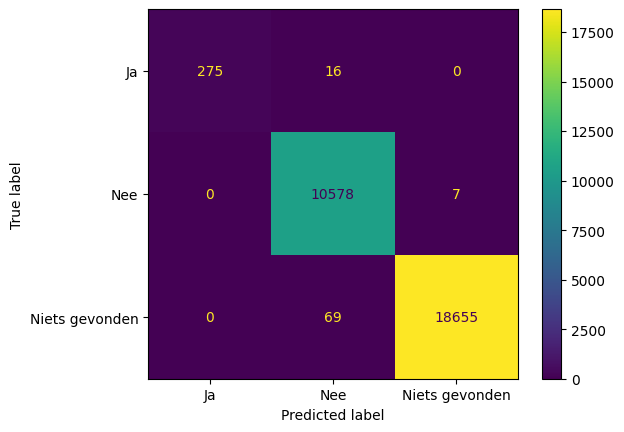

                precision    recall  f1-score   support

            Ja       1.00      0.95      0.97       291
           Nee       0.99      1.00      1.00     10585
Niets gevonden       1.00      1.00      1.00     18724

      accuracy                           1.00     29600
     macro avg       1.00      0.98      0.99     29600
  weighted avg       1.00      1.00      1.00     29600



In [13]:
# Ngram 3 Stopwords kept
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,3), lowercase=True, token_pattern=r"(?u)\b\w\w+\b|\+|\-")),
    ('clf', SGDClassifier(early_stopping=True, n_iter_no_change=5, validation_fraction = 0.25, verbose=3)),
])
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=parameter_grid, random_state=500, verbose=3, scoring='f1_macro')
random_search.fit(X_train, y_train)  
predicted_nb = random_search.predict(X_test)
print(np.mean(predicted_nb == y_test))
cm = confusion_matrix(y_test, predicted_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=random_search.classes_)
disp.plot()

plt.show()
print(metrics.classification_report(y_test, predicted_nb,
    target_names=random_search.classes_))

# Only negation stopwords kept

In [14]:
no_stopwords = lambda x: ' '.join([item for item in x.split() if item not in full_stopwords])
less_stopwords = lambda x: ' '.join([item for item in x.split() if item not in filtered_stopwords])

Corpus["text"] = Corpus["text"].apply(less_stopwords)
X_train, X_test, y_train, y_test = train_test_split(Corpus['text'], Corpus['label'], test_size=0.2, random_state=50)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 86.58, NNZs: 260, Bias: 0.000000, T: 71040, Avg. loss: 0.076538
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 116.18, NNZs: 109, Bias: 0.000000, T: 142080, Avg. loss: 0.051238
Total training time: 0.95 seconds.
-- Epoch 3
Norm: 138.69, NNZs: 84, Bias: 0.000000, T: 213120, Avg. loss: 0.045483
Total training time: 1.42 seconds.
-- Epoch 4
Norm: 157.29, NNZs: 68, Bias: 0.000000, T: 284160, Avg. loss: 0.042444
Total training time: 1.87 seconds.
-- Epoch 5
Norm: 173.45, NNZs: 61, Bias: 0.000000, T: 355200, Avg. loss: 0.040472
Total training time: 2.33 seconds.
-- Epoch 6
Norm: 188.11, NNZs: 58, Bias: 0.000000, T: 426240, Avg. loss: 0.039195
Total training time: 2.80 seconds.
-- Epoch 7
Norm: 190.77, NNZs: 56, Bias: 0.000000, T: 497280, Avg. loss: 0.038173
Total training time: 3.28 seconds.
-- Epoch 8
Norm: 193.38, NNZs: 54, Bias: 0.000000, T: 568320, Avg. loss: 0.037953
Total training time: 3.76 seconds.
-- Epoch 9
Norm: 195.98, NNZs: 53, Bias: 0.000000, T: 639360, Av

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.6s remaining:    0.0s


Norm: 121.22, NNZs: 435, Bias: 0.000000, T: 71040, Avg. loss: 0.196780
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 165.92, NNZs: 184, Bias: 0.000000, T: 142080, Avg. loss: 0.135791
Total training time: 0.98 seconds.
-- Epoch 3
Norm: 199.56, NNZs: 141, Bias: 0.000000, T: 213120, Avg. loss: 0.119547
Total training time: 1.47 seconds.
-- Epoch 4
Norm: 227.54, NNZs: 127, Bias: 0.000000, T: 284160, Avg. loss: 0.110576
Total training time: 1.96 seconds.
-- Epoch 5
Norm: 252.11, NNZs: 117, Bias: 0.000000, T: 355200, Avg. loss: 0.105118
Total training time: 2.43 seconds.
-- Epoch 6
Norm: 274.09, NNZs: 110, Bias: 0.000000, T: 426240, Avg. loss: 0.100700
Total training time: 2.92 seconds.
-- Epoch 7
Norm: 278.07, NNZs: 109, Bias: 0.000000, T: 497280, Avg. loss: 0.098513
Total training time: 3.38 seconds.
-- Epoch 8
Norm: 281.99, NNZs: 106, Bias: 0.000000, T: 568320, Avg. loss: 0.097914
Total training time: 3.84 seconds.
-- Epoch 9
Norm: 285.85, NNZs: 104, Bias: 0.000000, T: 639360, Avg. 

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   19.2s remaining:    0.0s


Norm: 121.19, NNZs: 433, Bias: 0.000000, T: 71040, Avg. loss: 0.167730
Total training time: 0.54 seconds.
-- Epoch 2
Norm: 163.75, NNZs: 187, Bias: 0.000000, T: 142080, Avg. loss: 0.113877
Total training time: 1.08 seconds.
-- Epoch 3
Norm: 195.73, NNZs: 146, Bias: 0.000000, T: 213120, Avg. loss: 0.101107
Total training time: 1.60 seconds.
-- Epoch 4
Norm: 222.61, NNZs: 130, Bias: 0.000000, T: 284160, Avg. loss: 0.093842
Total training time: 2.12 seconds.
-- Epoch 5
Norm: 246.22, NNZs: 121, Bias: 0.000000, T: 355200, Avg. loss: 0.088996
Total training time: 2.63 seconds.
-- Epoch 6
Norm: 267.50, NNZs: 107, Bias: 0.000000, T: 426240, Avg. loss: 0.085233
Total training time: 3.15 seconds.
-- Epoch 7
Norm: 271.36, NNZs: 104, Bias: 0.000000, T: 497280, Avg. loss: 0.083143
Total training time: 3.67 seconds.
-- Epoch 8
Norm: 275.16, NNZs: 104, Bias: 0.000000, T: 568320, Avg. loss: 0.082521
Total training time: 4.19 seconds.
-- Epoch 9
Norm: 278.90, NNZs: 101, Bias: 0.000000, T: 639360, Avg. 

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   29.9s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.104 total time= 1.8min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 86.52, NNZs: 273, Bias: 0.000000, T: 71040, Avg. loss: 0.075979
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 116.23, NNZs: 107, Bias: 0.000000, T: 142080, Avg. loss: 0.050790
Total training time: 0.96 seconds.
-- Epoch 3
Norm: 138.60, NNZs: 83, Bias: 0.000000, T: 213120, Avg. loss: 0.045160
Total training time: 1.46 seconds.
-- Epoch 4
Norm: 157.28, NNZs: 68, Bias: 0.000000, T: 284160, Avg. loss: 0.042165
Total training time: 1.92 seconds.
-- Epoch 5
Norm: 173.46, NNZs: 64, Bias: 0.000000, T: 355200, Avg. loss: 0.040046
Total training time: 2.39 seconds.
-- Epoch 6
Norm: 188.05, NNZs: 57, Bias: 0.000000, T: 426240, Avg. loss: 0.038544
Total training time: 2.86 seconds.
-- Epoch 7
Norm: 190.71, NNZs: 56, Bias: 0.000000, T: 497280, Avg. loss: 0.037835
Total training time: 3.33 seconds.
-- Epoch 8
Norm: 193.36, NNZs: 52, Bias: 0.000000, T: 568320, Avg. loss: 0.037570
Total training time: 3.79 seconds.
-- Epoch 9
Norm: 195.94, NNZs: 52, Bias: 0.000000, T: 639360, Av

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.6s remaining:    0.0s


Norm: 121.32, NNZs: 444, Bias: 0.000000, T: 71040, Avg. loss: 0.196693
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 165.96, NNZs: 178, Bias: 0.000000, T: 142080, Avg. loss: 0.136312
Total training time: 0.97 seconds.
-- Epoch 3
Norm: 199.60, NNZs: 138, Bias: 0.000000, T: 213120, Avg. loss: 0.119924
Total training time: 1.46 seconds.
-- Epoch 4
Norm: 227.61, NNZs: 126, Bias: 0.000000, T: 284160, Avg. loss: 0.110846
Total training time: 1.93 seconds.
-- Epoch 5
Norm: 252.21, NNZs: 114, Bias: 0.000000, T: 355200, Avg. loss: 0.105068
Total training time: 2.38 seconds.
-- Epoch 6
Norm: 274.26, NNZs: 110, Bias: 0.000000, T: 426240, Avg. loss: 0.100552
Total training time: 2.84 seconds.
-- Epoch 7
Norm: 278.23, NNZs: 107, Bias: 0.000000, T: 497280, Avg. loss: 0.098385
Total training time: 3.32 seconds.
-- Epoch 8
Norm: 282.15, NNZs: 106, Bias: 0.000000, T: 568320, Avg. loss: 0.097814
Total training time: 3.83 seconds.
-- Epoch 9
Norm: 286.00, NNZs: 103, Bias: 0.000000, T: 639360, Avg. 

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   19.0s remaining:    0.0s


Norm: 121.19, NNZs: 493, Bias: 0.000000, T: 71040, Avg. loss: 0.167700
Total training time: 0.51 seconds.
-- Epoch 2
Norm: 163.74, NNZs: 177, Bias: 0.000000, T: 142080, Avg. loss: 0.114184
Total training time: 1.01 seconds.
-- Epoch 3
Norm: 195.71, NNZs: 141, Bias: 0.000000, T: 213120, Avg. loss: 0.101106
Total training time: 1.52 seconds.
-- Epoch 4
Norm: 222.54, NNZs: 130, Bias: 0.000000, T: 284160, Avg. loss: 0.093823
Total training time: 1.99 seconds.
-- Epoch 5
Norm: 246.16, NNZs: 122, Bias: 0.000000, T: 355200, Avg. loss: 0.089043
Total training time: 2.49 seconds.
-- Epoch 6
Norm: 267.43, NNZs: 107, Bias: 0.000000, T: 426240, Avg. loss: 0.085374
Total training time: 2.97 seconds.
-- Epoch 7
Norm: 271.30, NNZs: 106, Bias: 0.000000, T: 497280, Avg. loss: 0.083234
Total training time: 3.47 seconds.
-- Epoch 8
Norm: 275.10, NNZs: 103, Bias: 0.000000, T: 568320, Avg. loss: 0.082620
Total training time: 3.97 seconds.
-- Epoch 9
Norm: 278.84, NNZs: 96, Bias: 0.000000, T: 639360, Avg. l

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   29.1s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.104 total time= 1.4min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 86.53, NNZs: 278, Bias: 0.000000, T: 71040, Avg. loss: 0.076006
Total training time: 0.51 seconds.
-- Epoch 2
Norm: 116.32, NNZs: 108, Bias: 0.000000, T: 142080, Avg. loss: 0.051004
Total training time: 0.98 seconds.
-- Epoch 3
Norm: 138.60, NNZs: 87, Bias: 0.000000, T: 213120, Avg. loss: 0.045429
Total training time: 1.46 seconds.
-- Epoch 4
Norm: 157.31, NNZs: 70, Bias: 0.000000, T: 284160, Avg. loss: 0.042265
Total training time: 1.93 seconds.
-- Epoch 5
Norm: 173.54, NNZs: 62, Bias: 0.000000, T: 355200, Avg. loss: 0.040092
Total training time: 2.38 seconds.
-- Epoch 6
Norm: 188.22, NNZs: 57, Bias: 0.000000, T: 426240, Avg. loss: 0.038680
Total training time: 2.83 seconds.
-- Epoch 7
Norm: 190.92, NNZs: 57, Bias: 0.000000, T: 497280, Avg. loss: 0.037810
Total training time: 3.27 seconds.
-- Epoch 8
Norm: 193.56, NNZs: 56, Bias: 0.000000, T: 568320, Avg. loss: 0.037649
Total training time: 3.73 seconds.
-- Epoch 9
Norm: 196.17, NNZs: 55, Bias: 0.000000, T: 639360, Av

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.8s remaining:    0.0s


Norm: 121.38, NNZs: 416, Bias: 0.000000, T: 71040, Avg. loss: 0.197535
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 166.04, NNZs: 181, Bias: 0.000000, T: 142080, Avg. loss: 0.137338
Total training time: 0.94 seconds.
-- Epoch 3
Norm: 199.53, NNZs: 141, Bias: 0.000000, T: 213120, Avg. loss: 0.121018
Total training time: 1.41 seconds.
-- Epoch 4
Norm: 227.50, NNZs: 130, Bias: 0.000000, T: 284160, Avg. loss: 0.112220
Total training time: 1.88 seconds.
-- Epoch 5
Norm: 251.98, NNZs: 115, Bias: 0.000000, T: 355200, Avg. loss: 0.106626
Total training time: 2.32 seconds.
-- Epoch 6
Norm: 273.98, NNZs: 109, Bias: 0.000000, T: 426240, Avg. loss: 0.102493
Total training time: 2.75 seconds.
-- Epoch 7
Norm: 277.95, NNZs: 109, Bias: 0.000000, T: 497280, Avg. loss: 0.100213
Total training time: 3.20 seconds.
-- Epoch 8
Norm: 281.86, NNZs: 108, Bias: 0.000000, T: 568320, Avg. loss: 0.099557
Total training time: 3.65 seconds.
-- Epoch 9
Norm: 285.72, NNZs: 104, Bias: 0.000000, T: 639360, Avg. 

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   18.9s remaining:    0.0s


Norm: 121.46, NNZs: 480, Bias: 0.000000, T: 71040, Avg. loss: 0.168559
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 164.22, NNZs: 177, Bias: 0.000000, T: 142080, Avg. loss: 0.114419
Total training time: 1.04 seconds.
-- Epoch 3
Norm: 196.18, NNZs: 141, Bias: 0.000000, T: 213120, Avg. loss: 0.101004
Total training time: 1.55 seconds.
-- Epoch 4
Norm: 223.04, NNZs: 131, Bias: 0.000000, T: 284160, Avg. loss: 0.093973
Total training time: 2.07 seconds.
-- Epoch 5
Norm: 246.70, NNZs: 118, Bias: 0.000000, T: 355200, Avg. loss: 0.089152
Total training time: 2.59 seconds.
-- Epoch 6
Norm: 267.98, NNZs: 108, Bias: 0.000000, T: 426240, Avg. loss: 0.085187
Total training time: 3.12 seconds.
-- Epoch 7
Norm: 271.86, NNZs: 107, Bias: 0.000000, T: 497280, Avg. loss: 0.083259
Total training time: 3.63 seconds.
-- Epoch 8
Norm: 275.67, NNZs: 106, Bias: 0.000000, T: 568320, Avg. loss: 0.082655
Total training time: 4.16 seconds.
-- Epoch 9
Norm: 279.42, NNZs: 104, Bias: 0.000000, T: 639360, Avg. 

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   29.3s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.104 total time= 1.4min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 86.43, NNZs: 261, Bias: 0.000000, T: 71040, Avg. loss: 0.076102
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 116.12, NNZs: 109, Bias: 0.000000, T: 142080, Avg. loss: 0.050382
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 138.39, NNZs: 85, Bias: 0.000000, T: 213120, Avg. loss: 0.045033
Total training time: 1.31 seconds.
-- Epoch 4
Norm: 157.13, NNZs: 72, Bias: 0.000000, T: 284160, Avg. loss: 0.042064
Total training time: 1.76 seconds.
-- Epoch 5
Norm: 173.30, NNZs: 64, Bias: 0.000000, T: 355200, Avg. loss: 0.040152
Total training time: 2.21 seconds.
-- Epoch 6
Norm: 187.92, NNZs: 57, Bias: 0.000000, T: 426240, Avg. loss: 0.038528
Total training time: 2.68 seconds.
-- Epoch 7
Norm: 190.55, NNZs: 55, Bias: 0.000000, T: 497280, Avg. loss: 0.037841
Total training time: 3.14 seconds.
-- Epoch 8
Norm: 193.18, NNZs: 55, Bias: 0.000000, T: 568320, Avg. loss: 0.037624
Total training time: 3.58 seconds.
-- Epoch 9
Norm: 195.77, NNZs: 55, Bias: 0.000000, T: 639360, Av

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.1s remaining:    0.0s


Norm: 121.21, NNZs: 441, Bias: 0.000000, T: 71040, Avg. loss: 0.197269
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 165.87, NNZs: 179, Bias: 0.000000, T: 142080, Avg. loss: 0.136817
Total training time: 0.82 seconds.
-- Epoch 3
Norm: 199.40, NNZs: 137, Bias: 0.000000, T: 213120, Avg. loss: 0.120665
Total training time: 1.27 seconds.
-- Epoch 4
Norm: 227.37, NNZs: 127, Bias: 0.000000, T: 284160, Avg. loss: 0.111983
Total training time: 1.70 seconds.
-- Epoch 5
Norm: 251.87, NNZs: 118, Bias: 0.000000, T: 355200, Avg. loss: 0.106316
Total training time: 2.13 seconds.
-- Epoch 6
Norm: 273.84, NNZs: 112, Bias: 0.000000, T: 426240, Avg. loss: 0.102090
Total training time: 2.55 seconds.
-- Epoch 7
Norm: 277.81, NNZs: 112, Bias: 0.000000, T: 497280, Avg. loss: 0.099846
Total training time: 2.98 seconds.
-- Epoch 8
Norm: 281.73, NNZs: 109, Bias: 0.000000, T: 568320, Avg. loss: 0.099306
Total training time: 3.44 seconds.
-- Epoch 9
Norm: 285.58, NNZs: 107, Bias: 0.000000, T: 639360, Avg. 

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   17.7s remaining:    0.0s


Norm: 121.28, NNZs: 463, Bias: 0.000000, T: 71040, Avg. loss: 0.168100
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 163.85, NNZs: 178, Bias: 0.000000, T: 142080, Avg. loss: 0.114142
Total training time: 0.95 seconds.
-- Epoch 3
Norm: 195.77, NNZs: 143, Bias: 0.000000, T: 213120, Avg. loss: 0.101151
Total training time: 1.45 seconds.
-- Epoch 4
Norm: 222.54, NNZs: 127, Bias: 0.000000, T: 284160, Avg. loss: 0.094121
Total training time: 1.93 seconds.
-- Epoch 5
Norm: 246.22, NNZs: 119, Bias: 0.000000, T: 355200, Avg. loss: 0.089472
Total training time: 2.42 seconds.
-- Epoch 6
Norm: 267.46, NNZs: 108, Bias: 0.000000, T: 426240, Avg. loss: 0.085716
Total training time: 2.91 seconds.
-- Epoch 7
Norm: 271.33, NNZs: 106, Bias: 0.000000, T: 497280, Avg. loss: 0.083500
Total training time: 3.40 seconds.
-- Epoch 8
Norm: 275.13, NNZs: 104, Bias: 0.000000, T: 568320, Avg. loss: 0.082902
Total training time: 3.90 seconds.
-- Epoch 9
Norm: 278.86, NNZs: 100, Bias: 0.000000, T: 639360, Avg. 

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   27.7s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.104 total time= 1.3min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 86.42, NNZs: 272, Bias: 0.000000, T: 71040, Avg. loss: 0.076458
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 116.14, NNZs: 109, Bias: 0.000000, T: 142080, Avg. loss: 0.051542
Total training time: 0.88 seconds.
-- Epoch 3
Norm: 138.56, NNZs: 86, Bias: 0.000000, T: 213120, Avg. loss: 0.045764
Total training time: 1.31 seconds.
-- Epoch 4
Norm: 157.16, NNZs: 66, Bias: 0.000000, T: 284160, Avg. loss: 0.042611
Total training time: 1.76 seconds.
-- Epoch 5
Norm: 173.37, NNZs: 61, Bias: 0.000000, T: 355200, Avg. loss: 0.040610
Total training time: 2.23 seconds.
-- Epoch 6
Norm: 188.03, NNZs: 55, Bias: 0.000000, T: 426240, Avg. loss: 0.039226
Total training time: 2.67 seconds.
-- Epoch 7
Norm: 190.71, NNZs: 55, Bias: 0.000000, T: 497280, Avg. loss: 0.038164
Total training time: 3.13 seconds.
-- Epoch 8
Norm: 193.35, NNZs: 55, Bias: 0.000000, T: 568320, Avg. loss: 0.037946
Total training time: 3.60 seconds.
-- Epoch 9
Norm: 195.93, NNZs: 54, Bias: 0.000000, T: 639360, Av

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.4s remaining:    0.0s


Norm: 121.36, NNZs: 442, Bias: 0.000000, T: 71040, Avg. loss: 0.196818
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 166.12, NNZs: 182, Bias: 0.000000, T: 142080, Avg. loss: 0.135947
Total training time: 0.92 seconds.
-- Epoch 3
Norm: 199.89, NNZs: 143, Bias: 0.000000, T: 213120, Avg. loss: 0.120115
Total training time: 1.37 seconds.
-- Epoch 4
Norm: 227.93, NNZs: 124, Bias: 0.000000, T: 284160, Avg. loss: 0.111122
Total training time: 1.82 seconds.
-- Epoch 5
Norm: 252.49, NNZs: 117, Bias: 0.000000, T: 355200, Avg. loss: 0.105232
Total training time: 2.30 seconds.
-- Epoch 6
Norm: 274.51, NNZs: 111, Bias: 0.000000, T: 426240, Avg. loss: 0.100982
Total training time: 2.79 seconds.
-- Epoch 7
Norm: 278.49, NNZs: 110, Bias: 0.000000, T: 497280, Avg. loss: 0.098876
Total training time: 3.28 seconds.
-- Epoch 8
Norm: 282.40, NNZs: 106, Bias: 0.000000, T: 568320, Avg. loss: 0.098239
Total training time: 3.77 seconds.
-- Epoch 9
Norm: 286.26, NNZs: 104, Bias: 0.000000, T: 639360, Avg. 

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   19.4s remaining:    0.0s


Norm: 121.27, NNZs: 457, Bias: 0.000000, T: 71040, Avg. loss: 0.168900
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 163.93, NNZs: 178, Bias: 0.000000, T: 142080, Avg. loss: 0.114505
Total training time: 1.04 seconds.
-- Epoch 3
Norm: 195.97, NNZs: 144, Bias: 0.000000, T: 213120, Avg. loss: 0.101321
Total training time: 1.62 seconds.
-- Epoch 4
Norm: 222.88, NNZs: 129, Bias: 0.000000, T: 284160, Avg. loss: 0.094191
Total training time: 2.19 seconds.
-- Epoch 5
Norm: 246.54, NNZs: 124, Bias: 0.000000, T: 355200, Avg. loss: 0.089140
Total training time: 2.75 seconds.
-- Epoch 6
Norm: 267.84, NNZs: 109, Bias: 0.000000, T: 426240, Avg. loss: 0.085390
Total training time: 3.29 seconds.
-- Epoch 7
Norm: 271.71, NNZs: 106, Bias: 0.000000, T: 497280, Avg. loss: 0.083385
Total training time: 3.83 seconds.
-- Epoch 8
Norm: 275.52, NNZs: 103, Bias: 0.000000, T: 568320, Avg. loss: 0.082747
Total training time: 4.36 seconds.
-- Epoch 9
Norm: 279.27, NNZs: 102, Bias: 0.000000, T: 639360, Avg. 

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   30.0s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.104 total time= 1.4min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 96612590383572.20, NNZs: 395799, Bias: 0.000000, T: 71040, Avg. loss: 89921194709708133367808.000000
Total training time: 0.32 seconds.
-- Epoch 2
Norm: 90707681947345.53, NNZs: 395806, Bias: 0.000000, T: 142080, Avg. loss: 75148415716153249234944.000000
Total training time: 0.69 seconds.
-- Epoch 3
Norm: 87678296718713.16, NNZs: 395806, Bias: 0.000000, T: 213120, Avg. loss: 61432482306008121606144.000000
Total training time: 1.04 seconds.
-- Epoch 4
Norm: 85677164684475.08, NNZs: 395806, Bias: 0.000000, T: 284160, Avg. loss: 55069509518858842537984.000000
Total training time: 1.41 seconds.
-- Epoch 5
Norm: 84195068513522.73, NNZs: 395806, Bias: 0.000000, T: 355200, Avg. loss: 51158244191687665516544.000000
Total training time: 1.78 seconds.
-- Epoch 6
Norm: 83025135681079.36, NNZs: 395806, Bias: 0.000000, T: 426240, Avg. loss: 48415411519804510568448.000000
Total training time: 2.13 seconds.
Convergence after 6 epochs took 2.17 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


Norm: 123491371914932.17, NNZs: 395805, Bias: 0.000000, T: 71040, Avg. loss: 156624440681933593116672.000000
Total training time: 0.33 seconds.
-- Epoch 2
Norm: 116659912620104.19, NNZs: 395806, Bias: 0.000000, T: 142080, Avg. loss: 129209227582176453722112.000000
Total training time: 0.69 seconds.
-- Epoch 3
Norm: 113180770032437.80, NNZs: 395806, Bias: 0.000000, T: 213120, Avg. loss: 106997453670751552929792.000000
Total training time: 1.03 seconds.
-- Epoch 4
Norm: 110891914944684.86, NNZs: 395806, Bias: 0.000000, T: 284160, Avg. loss: 96744022063676955557888.000000
Total training time: 1.37 seconds.
-- Epoch 5
Norm: 109203862877508.17, NNZs: 395806, Bias: 0.000000, T: 355200, Avg. loss: 90417740584330100473856.000000
Total training time: 1.72 seconds.
-- Epoch 6
Norm: 107872700999056.11, NNZs: 395806, Bias: 0.000000, T: 426240, Avg. loss: 85953144922495573295104.000000
Total training time: 2.06 seconds.
Convergence after 6 epochs took 2.10 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.3s remaining:    0.0s


Norm: 121499699499250.56, NNZs: 395806, Bias: 0.000000, T: 71040, Avg. loss: 148187535024549540134912.000000
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 114805826501765.81, NNZs: 395806, Bias: 0.000000, T: 142080, Avg. loss: 122593695969417642377216.000000
Total training time: 0.66 seconds.
-- Epoch 3
Norm: 111401915275038.23, NNZs: 395806, Bias: 0.000000, T: 213120, Avg. loss: 101721877129718770171904.000000
Total training time: 0.99 seconds.
-- Epoch 4
Norm: 109156935419486.17, NNZs: 395806, Bias: 0.000000, T: 284160, Avg. loss: 92008476264099490037760.000000
Total training time: 1.34 seconds.
-- Epoch 5
Norm: 107500005425999.61, NNZs: 395806, Bias: 0.000000, T: 355200, Avg. loss: 86039872556071728971776.000000
Total training time: 1.68 seconds.
-- Epoch 6
Norm: 106194212530189.67, NNZs: 395806, Bias: 0.000000, T: 426240, Avg. loss: 81823535252428147392512.000000
Total training time: 2.02 seconds.
Convergence after 6 epochs took 2.06 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.4s finished


[CV 1/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.272 total time=  58.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 121179019400899.61, NNZs: 395676, Bias: 0.000000, T: 71040, Avg. loss: 149706862996871534608384.000000
Total training time: 0.33 seconds.
-- Epoch 2
Norm: 114439123394196.91, NNZs: 395676, Bias: 0.000000, T: 142080, Avg. loss: 123140600260787297058816.000000
Total training time: 0.69 seconds.
-- Epoch 3
Norm: 111018605699139.12, NNZs: 395676, Bias: 0.000000, T: 213120, Avg. loss: 101951526022946609954816.000000
Total training time: 1.04 seconds.
-- Epoch 4
Norm: 108761645174409.50, NNZs: 395676, Bias: 0.000000, T: 284160, Avg. loss: 92152353167411590987776.000000
Total training time: 1.40 seconds.
-- Epoch 5
Norm: 107096007277576.25, NNZs: 395676, Bias: 0.000000, T: 355200, Avg. loss: 86059100849569255129088.000000
Total training time: 1.76 seconds.
-- Epoch 6
Norm: 105783738556164.28, NNZs: 395676, Bias: 0.000000, T: 426240, Avg. loss: 81840803372788407599104.000000
Total training time: 2.11 seconds.
Convergence after 6 epochs took 2.14 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


Norm: 126051696822759.34, NNZs: 395676, Bias: 0.000000, T: 71040, Avg. loss: 157789409160709816713216.000000
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 119279162387642.66, NNZs: 395676, Bias: 0.000000, T: 142080, Avg. loss: 132804419229658520748032.000000
Total training time: 0.65 seconds.
-- Epoch 3
Norm: 115823872734907.80, NNZs: 395676, Bias: 0.000000, T: 213120, Avg. loss: 110618470004624193486848.000000
Total training time: 0.98 seconds.
-- Epoch 4
Norm: 113549596420897.95, NNZs: 395676, Bias: 0.000000, T: 284160, Avg. loss: 100254586057236678705152.000000
Total training time: 1.33 seconds.
-- Epoch 5
Norm: 111870359739695.64, NNZs: 395676, Bias: 0.000000, T: 355200, Avg. loss: 93902775576913489428480.000000
Total training time: 1.67 seconds.
-- Epoch 6
Norm: 110546229567355.25, NNZs: 395676, Bias: 0.000000, T: 426240, Avg. loss: 89396152449605126062080.000000
Total training time: 2.02 seconds.
Convergence after 6 epochs took 2.05 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.2s remaining:    0.0s


Norm: 124989156596177.92, NNZs: 395676, Bias: 0.000000, T: 71040, Avg. loss: 160189805749520832659456.000000
Total training time: 0.32 seconds.
-- Epoch 2
Norm: 118118121965572.89, NNZs: 395676, Bias: 0.000000, T: 142080, Avg. loss: 131417515047728963387392.000000
Total training time: 0.67 seconds.
-- Epoch 3
Norm: 114631841854094.17, NNZs: 395676, Bias: 0.000000, T: 213120, Avg. loss: 108905654902439400177664.000000
Total training time: 1.02 seconds.
-- Epoch 4
Norm: 112338272899084.91, NNZs: 395676, Bias: 0.000000, T: 284160, Avg. loss: 98499924756446977196032.000000
Total training time: 1.38 seconds.
-- Epoch 5
Norm: 110645586010375.61, NNZs: 395676, Bias: 0.000000, T: 355200, Avg. loss: 92027550754634133929984.000000
Total training time: 1.73 seconds.
-- Epoch 6
Norm: 109311272773664.02, NNZs: 395676, Bias: 0.000000, T: 426240, Avg. loss: 87507949064477386735616.000000
Total training time: 2.08 seconds.
Convergence after 6 epochs took 2.11 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.4s finished


[CV 2/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.266 total time=  57.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 139243354906500.38, NNZs: 394543, Bias: 0.000000, T: 71040, Avg. loss: 199585908789304495177728.000000
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 132023707171048.64, NNZs: 394543, Bias: 0.000000, T: 142080, Avg. loss: 167855645974974932451328.000000
Total training time: 0.65 seconds.
-- Epoch 3
Norm: 128354327109836.92, NNZs: 394543, Bias: 0.000000, T: 213120, Avg. loss: 140370984288254884315136.000000
Total training time: 1.01 seconds.
-- Epoch 4
Norm: 125941975347282.77, NNZs: 394543, Bias: 0.000000, T: 284160, Avg. loss: 127525860390573365526528.000000
Total training time: 1.35 seconds.
-- Epoch 5
Norm: 124164297267867.94, NNZs: 394543, Bias: 0.000000, T: 355200, Avg. loss: 119550490080504813977600.000000
Total training time: 1.72 seconds.
-- Epoch 6
Norm: 122764504456413.55, NNZs: 394543, Bias: 0.000000, T: 426240, Avg. loss: 113913037911256048074752.000000
Total training time: 2.08 seconds.
Convergence after 6 epochs took 2.12 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


Norm: 114213034855987.64, NNZs: 394543, Bias: 0.000000, T: 71040, Avg. loss: 128597526171348038057984.000000
Total training time: 0.33 seconds.
-- Epoch 2
Norm: 107748078184340.67, NNZs: 394543, Bias: 0.000000, T: 142080, Avg. loss: 107900180768056435277824.000000
Total training time: 0.69 seconds.
-- Epoch 3
Norm: 104447678632816.52, NNZs: 394543, Bias: 0.000000, T: 213120, Avg. loss: 89389558323783638450176.000000
Total training time: 1.05 seconds.
-- Epoch 4
Norm: 102267027708818.62, NNZs: 394543, Bias: 0.000000, T: 284160, Avg. loss: 80775394081082905198592.000000
Total training time: 1.40 seconds.
-- Epoch 5
Norm: 100656550084917.33, NNZs: 394543, Bias: 0.000000, T: 355200, Avg. loss: 75383768268860783853568.000000
Total training time: 1.75 seconds.
-- Epoch 6
Norm: 99385196065991.78, NNZs: 394543, Bias: 0.000000, T: 426240, Avg. loss: 71652503890455192141824.000000
Total training time: 2.09 seconds.
Convergence after 6 epochs took 2.12 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.3s remaining:    0.0s


Norm: 124923832490992.17, NNZs: 394540, Bias: 0.000000, T: 71040, Avg. loss: 157088708051102569857024.000000
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 118149712696273.47, NNZs: 394543, Bias: 0.000000, T: 142080, Avg. loss: 130850493092922983972864.000000
Total training time: 0.65 seconds.
-- Epoch 3
Norm: 114694886720290.30, NNZs: 394543, Bias: 0.000000, T: 213120, Avg. loss: 109069440146981024432128.000000
Total training time: 0.97 seconds.
-- Epoch 4
Norm: 112413706820568.75, NNZs: 394543, Bias: 0.000000, T: 284160, Avg. loss: 98782888804040052834304.000000
Total training time: 1.31 seconds.
-- Epoch 5
Norm: 110729001171613.88, NNZs: 394543, Bias: 0.000000, T: 355200, Avg. loss: 92454075559930507558912.000000
Total training time: 1.65 seconds.
-- Epoch 6
Norm: 109402588896012.19, NNZs: 394543, Bias: 0.000000, T: 426240, Avg. loss: 87962073704301424803840.000000
Total training time: 1.98 seconds.
Convergence after 6 epochs took 2.02 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.3s finished


[CV 3/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.263 total time=  57.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 127556876587139.20, NNZs: 395076, Bias: 0.000000, T: 71040, Avg. loss: 162811662876198890897408.000000
Total training time: 0.32 seconds.
-- Epoch 2
Norm: 120660706327130.52, NNZs: 395078, Bias: 0.000000, T: 142080, Avg. loss: 138727154009943140466688.000000
Total training time: 0.66 seconds.
-- Epoch 3
Norm: 117149002020560.88, NNZs: 395078, Bias: 0.000000, T: 213120, Avg. loss: 115529383409191978270720.000000
Total training time: 1.01 seconds.
-- Epoch 4
Norm: 114836770113719.81, NNZs: 395078, Bias: 0.000000, T: 284160, Avg. loss: 104691612839081815310336.000000
Total training time: 1.36 seconds.
-- Epoch 5
Norm: 113128969914650.67, NNZs: 395078, Bias: 0.000000, T: 355200, Avg. loss: 98005056573361698635776.000000
Total training time: 1.70 seconds.
-- Epoch 6
Norm: 111783970096920.89, NNZs: 395078, Bias: 0.000000, T: 426240, Avg. loss: 93317449914719299174400.000000
Total training time: 2.05 seconds.
Convergence after 6 epochs took 2.09 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


Norm: 141745309774982.31, NNZs: 395078, Bias: 0.000000, T: 71040, Avg. loss: 201231169097008481828864.000000
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 134466301548465.27, NNZs: 395078, Bias: 0.000000, T: 142080, Avg. loss: 173991628145811133562880.000000
Total training time: 0.65 seconds.
-- Epoch 3
Norm: 130757603004138.36, NNZs: 395078, Bias: 0.000000, T: 213120, Avg. loss: 145830843304326845169664.000000
Total training time: 0.99 seconds.
-- Epoch 4
Norm: 128317973411084.73, NNZs: 395078, Bias: 0.000000, T: 284160, Avg. loss: 132637775459400904867840.000000
Total training time: 1.33 seconds.
-- Epoch 5
Norm: 126523544481544.72, NNZs: 395078, Bias: 0.000000, T: 355200, Avg. loss: 124454244986815091048448.000000
Total training time: 1.73 seconds.
-- Epoch 6
Norm: 125110261178232.91, NNZs: 395078, Bias: 0.000000, T: 426240, Avg. loss: 118705931698598777454592.000000
Total training time: 2.12 seconds.
Convergence after 6 epochs took 2.16 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.3s remaining:    0.0s


Norm: 135483125899744.36, NNZs: 395078, Bias: 0.000000, T: 71040, Avg. loss: 184216738345970829361152.000000
Total training time: 0.34 seconds.
-- Epoch 2
Norm: 128332020106925.50, NNZs: 395078, Bias: 0.000000, T: 142080, Avg. loss: 158571891954613160509440.000000
Total training time: 0.72 seconds.
-- Epoch 3
Norm: 124701606633528.28, NNZs: 395078, Bias: 0.000000, T: 213120, Avg. loss: 132347187754917039177728.000000
Total training time: 1.08 seconds.
-- Epoch 4
Norm: 122314602490613.80, NNZs: 395078, Bias: 0.000000, T: 284160, Avg. loss: 120069697446110495244288.000000
Total training time: 1.45 seconds.
-- Epoch 5
Norm: 120557961625350.03, NNZs: 395078, Bias: 0.000000, T: 355200, Avg. loss: 112439329489539725000704.000000
Total training time: 1.81 seconds.
-- Epoch 6
Norm: 119176714153964.52, NNZs: 395078, Bias: 0.000000, T: 426240, Avg. loss: 107107753595001439780864.000000
Total training time: 2.16 seconds.
Convergence after 6 epochs took 2.19 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.5s finished


[CV 4/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.262 total time=  58.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 121740358691373.16, NNZs: 393363, Bias: 0.000000, T: 71040, Avg. loss: 151953132149252630249472.000000
Total training time: 0.33 seconds.
-- Epoch 2
Norm: 115064248661607.62, NNZs: 393363, Bias: 0.000000, T: 142080, Avg. loss: 123926927747867280932864.000000
Total training time: 0.68 seconds.
-- Epoch 3
Norm: 111654468328406.92, NNZs: 393363, Bias: 0.000000, T: 213120, Avg. loss: 102898377330838984458240.000000
Total training time: 1.05 seconds.
-- Epoch 4
Norm: 109411008347568.50, NNZs: 393363, Bias: 0.000000, T: 284160, Avg. loss: 93091773769658876821504.000000
Total training time: 1.41 seconds.
-- Epoch 5
Norm: 107757323257170.33, NNZs: 393363, Bias: 0.000000, T: 355200, Avg. loss: 87085432598458888355840.000000
Total training time: 1.77 seconds.
-- Epoch 6
Norm: 106453557695732.41, NNZs: 393363, Bias: 0.000000, T: 426240, Avg. loss: 82812858053512243707904.000000
Total training time: 2.15 seconds.
Convergence after 6 epochs took 2.19 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


Norm: 115787628399392.55, NNZs: 393363, Bias: 0.000000, T: 71040, Avg. loss: 135346637299608841093120.000000
Total training time: 0.33 seconds.
-- Epoch 2
Norm: 109195147497804.89, NNZs: 393363, Bias: 0.000000, T: 142080, Avg. loss: 111718619142748375089152.000000
Total training time: 0.69 seconds.
-- Epoch 3
Norm: 105829888213106.09, NNZs: 393363, Bias: 0.000000, T: 213120, Avg. loss: 92166237881635098853376.000000
Total training time: 1.04 seconds.
-- Epoch 4
Norm: 103611687776429.58, NNZs: 393363, Bias: 0.000000, T: 284160, Avg. loss: 83150744119875920199680.000000
Total training time: 1.39 seconds.
-- Epoch 5
Norm: 101974728533884.42, NNZs: 393363, Bias: 0.000000, T: 355200, Avg. loss: 77571658739128851234816.000000
Total training time: 1.74 seconds.
-- Epoch 6
Norm: 100684167454304.59, NNZs: 393363, Bias: 0.000000, T: 426240, Avg. loss: 73654324057315720822784.000000
Total training time: 2.10 seconds.
Convergence after 6 epochs took 2.13 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.4s remaining:    0.0s


Norm: 94267586065474.77, NNZs: 393359, Bias: 0.000000, T: 71040, Avg. loss: 88040460382085771689984.000000
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 88350747310954.00, NNZs: 393363, Bias: 0.000000, T: 142080, Avg. loss: 71767907082269716643840.000000
Total training time: 0.65 seconds.
-- Epoch 3
Norm: 85334468743439.66, NNZs: 393363, Bias: 0.000000, T: 213120, Avg. loss: 58282390930154820993024.000000
Total training time: 0.99 seconds.
-- Epoch 4
Norm: 83347415827559.95, NNZs: 393363, Bias: 0.000000, T: 284160, Avg. loss: 52122702129103990947840.000000
Total training time: 1.39 seconds.
-- Epoch 5
Norm: 81876634721214.73, NNZs: 393363, Bias: 0.000000, T: 355200, Avg. loss: 48332729977508712153088.000000
Total training time: 1.75 seconds.
-- Epoch 6
Norm: 80721240327939.05, NNZs: 393363, Bias: 0.000000, T: 426240, Avg. loss: 45691734115531018469376.000000
Total training time: 2.10 seconds.
Convergence after 6 epochs took 2.14 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.5s finished


[CV 5/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.265 total time=  57.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 82.19, NNZs: 235, Bias: 0.000000, T: 71040, Avg. loss: 0.020523
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 107.63, NNZs: 109, Bias: 0.000000, T: 142080, Avg. loss: 0.012913
Total training time: 0.53 seconds.
-- Epoch 3
Norm: 126.81, NNZs: 94, Bias: 0.000000, T: 213120, Avg. loss: 0.011597
Total training time: 0.80 seconds.
-- Epoch 4
Norm: 142.50, NNZs: 93, Bias: 0.000000, T: 284160, Avg. loss: 0.011031
Total training time: 1.07 seconds.
-- Epoch 5
Norm: 156.32, NNZs: 87, Bias: 0.000000, T: 355200, Avg. loss: 0.010531
Total training time: 1.35 seconds.
-- Epoch 6
Norm: 168.66, NNZs: 83, Bias: 0.000000, T: 426240, Avg. loss: 0.010358
Total training time: 1.60 seconds.
Convergence after 6 epochs took 1.64 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


Norm: 148.55, NNZs: 622, Bias: 0.000000, T: 71040, Avg. loss: 0.080509
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 192.98, NNZs: 210, Bias: 0.000000, T: 142080, Avg. loss: 0.046309
Total training time: 0.55 seconds.
-- Epoch 3
Norm: 224.71, NNZs: 181, Bias: 0.000000, T: 213120, Avg. loss: 0.040352
Total training time: 0.86 seconds.
-- Epoch 4
Norm: 251.59, NNZs: 176, Bias: 0.000000, T: 284160, Avg. loss: 0.036046
Total training time: 1.14 seconds.
-- Epoch 5
Norm: 274.43, NNZs: 166, Bias: 0.000000, T: 355200, Avg. loss: 0.034986
Total training time: 1.43 seconds.
-- Epoch 6
Norm: 295.19, NNZs: 159, Bias: 0.000000, T: 426240, Avg. loss: 0.032810
Total training time: 1.70 seconds.
Convergence after 6 epochs took 1.74 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.4s remaining:    0.0s


Norm: 136.44, NNZs: 613, Bias: 0.000000, T: 71040, Avg. loss: 0.061229
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 176.01, NNZs: 172, Bias: 0.000000, T: 142080, Avg. loss: 0.032629
Total training time: 0.55 seconds.
-- Epoch 3
Norm: 204.77, NNZs: 153, Bias: 0.000000, T: 213120, Avg. loss: 0.026748
Total training time: 0.82 seconds.
-- Epoch 4
Norm: 227.92, NNZs: 136, Bias: 0.000000, T: 284160, Avg. loss: 0.023279
Total training time: 1.09 seconds.
-- Epoch 5
Norm: 247.64, NNZs: 128, Bias: 0.000000, T: 355200, Avg. loss: 0.020956
Total training time: 1.36 seconds.
-- Epoch 6
Norm: 265.18, NNZs: 122, Bias: 0.000000, T: 426240, Avg. loss: 0.019544
Total training time: 1.63 seconds.
Convergence after 6 epochs took 1.67 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.1s finished


[CV 1/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.980 total time=  58.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 81.13, NNZs: 232, Bias: 0.000000, T: 71040, Avg. loss: 0.019778
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 106.46, NNZs: 109, Bias: 0.000000, T: 142080, Avg. loss: 0.012444
Total training time: 0.46 seconds.
-- Epoch 3
Norm: 125.36, NNZs: 97, Bias: 0.000000, T: 213120, Avg. loss: 0.010958
Total training time: 0.72 seconds.
-- Epoch 4
Norm: 140.87, NNZs: 94, Bias: 0.000000, T: 284160, Avg. loss: 0.010436
Total training time: 0.98 seconds.
-- Epoch 5
Norm: 154.41, NNZs: 88, Bias: 0.000000, T: 355200, Avg. loss: 0.009966
Total training time: 1.23 seconds.
-- Epoch 6
Norm: 166.60, NNZs: 87, Bias: 0.000000, T: 426240, Avg. loss: 0.009753
Total training time: 1.49 seconds.
Convergence after 6 epochs took 1.53 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


Norm: 148.77, NNZs: 598, Bias: 0.000000, T: 71040, Avg. loss: 0.081969
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 193.92, NNZs: 213, Bias: 0.000000, T: 142080, Avg. loss: 0.048158
Total training time: 0.54 seconds.
-- Epoch 3
Norm: 226.49, NNZs: 194, Bias: 0.000000, T: 213120, Avg. loss: 0.041455
Total training time: 0.84 seconds.
-- Epoch 4
Norm: 253.47, NNZs: 180, Bias: 0.000000, T: 284160, Avg. loss: 0.038006
Total training time: 1.12 seconds.
-- Epoch 5
Norm: 276.84, NNZs: 174, Bias: 0.000000, T: 355200, Avg. loss: 0.035524
Total training time: 1.40 seconds.
-- Epoch 6
Norm: 297.55, NNZs: 175, Bias: 0.000000, T: 426240, Avg. loss: 0.034134
Total training time: 1.68 seconds.
Convergence after 6 epochs took 1.72 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.3s remaining:    0.0s


Norm: 136.50, NNZs: 553, Bias: 0.000000, T: 71040, Avg. loss: 0.061460
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 176.12, NNZs: 179, Bias: 0.000000, T: 142080, Avg. loss: 0.032622
Total training time: 0.69 seconds.
-- Epoch 3
Norm: 204.60, NNZs: 155, Bias: 0.000000, T: 213120, Avg. loss: 0.026377
Total training time: 1.04 seconds.
-- Epoch 4
Norm: 227.78, NNZs: 143, Bias: 0.000000, T: 284160, Avg. loss: 0.023140
Total training time: 1.31 seconds.
-- Epoch 5
Norm: 247.52, NNZs: 131, Bias: 0.000000, T: 355200, Avg. loss: 0.021025
Total training time: 1.56 seconds.
-- Epoch 6
Norm: 264.96, NNZs: 130, Bias: 0.000000, T: 426240, Avg. loss: 0.019271
Total training time: 1.82 seconds.
Convergence after 6 epochs took 1.86 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.2s finished


[CV 2/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.987 total time=  58.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 81.85, NNZs: 217, Bias: 0.000000, T: 71040, Avg. loss: 0.020188
Total training time: 0.22 seconds.
-- Epoch 2
Norm: 107.01, NNZs: 109, Bias: 0.000000, T: 142080, Avg. loss: 0.012296
Total training time: 0.46 seconds.
-- Epoch 3
Norm: 126.01, NNZs: 97, Bias: 0.000000, T: 213120, Avg. loss: 0.011050
Total training time: 0.72 seconds.
-- Epoch 4
Norm: 141.49, NNZs: 91, Bias: 0.000000, T: 284160, Avg. loss: 0.010337
Total training time: 0.98 seconds.
-- Epoch 5
Norm: 155.06, NNZs: 87, Bias: 0.000000, T: 355200, Avg. loss: 0.009903
Total training time: 1.23 seconds.
-- Epoch 6
Norm: 167.23, NNZs: 87, Bias: 0.000000, T: 426240, Avg. loss: 0.009570
Total training time: 1.47 seconds.
Convergence after 6 epochs took 1.51 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


Norm: 148.38, NNZs: 588, Bias: 0.000000, T: 71040, Avg. loss: 0.079183
Total training time: 0.25 seconds.
-- Epoch 2
Norm: 192.96, NNZs: 205, Bias: 0.000000, T: 142080, Avg. loss: 0.050450
Total training time: 0.52 seconds.
-- Epoch 3
Norm: 225.86, NNZs: 186, Bias: 0.000000, T: 213120, Avg. loss: 0.040518
Total training time: 0.79 seconds.
-- Epoch 4
Norm: 251.71, NNZs: 167, Bias: 0.000000, T: 284160, Avg. loss: 0.038544
Total training time: 1.04 seconds.
-- Epoch 5
Norm: 275.47, NNZs: 169, Bias: 0.000000, T: 355200, Avg. loss: 0.036006
Total training time: 1.32 seconds.
-- Epoch 6
Norm: 296.36, NNZs: 159, Bias: 0.000000, T: 426240, Avg. loss: 0.032303
Total training time: 1.59 seconds.
Convergence after 6 epochs took 1.63 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.2s remaining:    0.0s


Norm: 136.74, NNZs: 585, Bias: 0.000000, T: 71040, Avg. loss: 0.061675
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 176.41, NNZs: 182, Bias: 0.000000, T: 142080, Avg. loss: 0.032707
Total training time: 0.55 seconds.
-- Epoch 3
Norm: 205.06, NNZs: 154, Bias: 0.000000, T: 213120, Avg. loss: 0.026547
Total training time: 0.82 seconds.
-- Epoch 4
Norm: 228.21, NNZs: 137, Bias: 0.000000, T: 284160, Avg. loss: 0.022950
Total training time: 1.10 seconds.
-- Epoch 5
Norm: 248.05, NNZs: 129, Bias: 0.000000, T: 355200, Avg. loss: 0.021096
Total training time: 1.38 seconds.
-- Epoch 6
Norm: 265.52, NNZs: 121, Bias: 0.000000, T: 426240, Avg. loss: 0.019354
Total training time: 1.64 seconds.
Convergence after 6 epochs took 1.68 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.9s finished


[CV 3/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.979 total time=  57.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 81.47, NNZs: 239, Bias: 0.000000, T: 71040, Avg. loss: 0.020066
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 106.79, NNZs: 108, Bias: 0.000000, T: 142080, Avg. loss: 0.012307
Total training time: 0.49 seconds.
-- Epoch 3
Norm: 125.45, NNZs: 90, Bias: 0.000000, T: 213120, Avg. loss: 0.011007
Total training time: 0.75 seconds.
-- Epoch 4
Norm: 141.00, NNZs: 86, Bias: 0.000000, T: 284160, Avg. loss: 0.010246
Total training time: 1.01 seconds.
-- Epoch 5
Norm: 154.52, NNZs: 88, Bias: 0.000000, T: 355200, Avg. loss: 0.009925
Total training time: 1.26 seconds.
-- Epoch 6
Norm: 166.62, NNZs: 85, Bias: 0.000000, T: 426240, Avg. loss: 0.009687
Total training time: 1.51 seconds.
Convergence after 6 epochs took 1.54 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


Norm: 148.40, NNZs: 633, Bias: 0.000000, T: 71040, Avg. loss: 0.081600
Total training time: 0.25 seconds.
-- Epoch 2
Norm: 193.19, NNZs: 221, Bias: 0.000000, T: 142080, Avg. loss: 0.047608
Total training time: 0.52 seconds.
-- Epoch 3
Norm: 225.88, NNZs: 191, Bias: 0.000000, T: 213120, Avg. loss: 0.040170
Total training time: 0.79 seconds.
-- Epoch 4
Norm: 253.03, NNZs: 163, Bias: 0.000000, T: 284160, Avg. loss: 0.037619
Total training time: 1.07 seconds.
-- Epoch 5
Norm: 276.08, NNZs: 169, Bias: 0.000000, T: 355200, Avg. loss: 0.034895
Total training time: 1.35 seconds.
-- Epoch 6
Norm: 296.87, NNZs: 161, Bias: 0.000000, T: 426240, Avg. loss: 0.033391
Total training time: 1.62 seconds.
Convergence after 6 epochs took 1.66 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.3s remaining:    0.0s


Norm: 135.72, NNZs: 521, Bias: 0.000000, T: 71040, Avg. loss: 0.060568
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 175.35, NNZs: 182, Bias: 0.000000, T: 142080, Avg. loss: 0.032514
Total training time: 0.53 seconds.
-- Epoch 3
Norm: 203.94, NNZs: 145, Bias: 0.000000, T: 213120, Avg. loss: 0.026172
Total training time: 0.80 seconds.
-- Epoch 4
Norm: 227.02, NNZs: 138, Bias: 0.000000, T: 284160, Avg. loss: 0.022802
Total training time: 1.07 seconds.
-- Epoch 5
Norm: 246.65, NNZs: 128, Bias: 0.000000, T: 355200, Avg. loss: 0.020652
Total training time: 1.35 seconds.
-- Epoch 6
Norm: 264.09, NNZs: 120, Bias: 0.000000, T: 426240, Avg. loss: 0.019241
Total training time: 1.64 seconds.
Convergence after 6 epochs took 1.68 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.0s finished


[CV 4/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.985 total time=  58.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 81.25, NNZs: 214, Bias: 0.000000, T: 71040, Avg. loss: 0.019632
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 106.36, NNZs: 117, Bias: 0.000000, T: 142080, Avg. loss: 0.012120
Total training time: 0.49 seconds.
-- Epoch 3
Norm: 125.30, NNZs: 100, Bias: 0.000000, T: 213120, Avg. loss: 0.010955
Total training time: 0.76 seconds.
-- Epoch 4
Norm: 140.73, NNZs: 89, Bias: 0.000000, T: 284160, Avg. loss: 0.010193
Total training time: 1.04 seconds.
-- Epoch 5
Norm: 154.17, NNZs: 85, Bias: 0.000000, T: 355200, Avg. loss: 0.009760
Total training time: 1.30 seconds.
-- Epoch 6
Norm: 166.25, NNZs: 83, Bias: 0.000000, T: 426240, Avg. loss: 0.009644
Total training time: 1.56 seconds.
Convergence after 6 epochs took 1.60 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


Norm: 148.62, NNZs: 671, Bias: 0.000000, T: 71040, Avg. loss: 0.082049
Total training time: 0.25 seconds.
-- Epoch 2
Norm: 193.39, NNZs: 203, Bias: 0.000000, T: 142080, Avg. loss: 0.047173
Total training time: 0.54 seconds.
-- Epoch 3
Norm: 225.70, NNZs: 177, Bias: 0.000000, T: 213120, Avg. loss: 0.041709
Total training time: 0.85 seconds.
-- Epoch 4
Norm: 252.65, NNZs: 166, Bias: 0.000000, T: 284160, Avg. loss: 0.035911
Total training time: 1.14 seconds.
-- Epoch 5
Norm: 275.79, NNZs: 162, Bias: 0.000000, T: 355200, Avg. loss: 0.035612
Total training time: 1.43 seconds.
-- Epoch 6
Norm: 296.36, NNZs: 161, Bias: 0.000000, T: 426240, Avg. loss: 0.033977
Total training time: 1.72 seconds.
Convergence after 6 epochs took 1.76 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.4s remaining:    0.0s


Norm: 136.98, NNZs: 527, Bias: 0.000000, T: 71040, Avg. loss: 0.062076
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 176.66, NNZs: 176, Bias: 0.000000, T: 142080, Avg. loss: 0.032884
Total training time: 0.60 seconds.
-- Epoch 3
Norm: 205.18, NNZs: 146, Bias: 0.000000, T: 213120, Avg. loss: 0.026527
Total training time: 0.88 seconds.
-- Epoch 4
Norm: 228.26, NNZs: 137, Bias: 0.000000, T: 284160, Avg. loss: 0.023078
Total training time: 1.17 seconds.
-- Epoch 5
Norm: 247.88, NNZs: 123, Bias: 0.000000, T: 355200, Avg. loss: 0.020846
Total training time: 1.45 seconds.
-- Epoch 6
Norm: 265.27, NNZs: 116, Bias: 0.000000, T: 426240, Avg. loss: 0.019389
Total training time: 1.73 seconds.
Convergence after 6 epochs took 1.77 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.2s finished


[CV 5/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.984 total time=  57.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 108589008176815.88, NNZs: 395603, Bias: 0.000000, T: 71040, Avg. loss: 116493217761813694775296.000000
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 150703237875436.47, NNZs: 395783, Bias: 0.000000, T: 142080, Avg. loss: 566605758829016989564928.000000
Total training time: 0.80 seconds.
-- Epoch 3
Norm: 141125631747898.19, NNZs: 395785, Bias: 0.000000, T: 213120, Avg. loss: 738495923276753007542272.000000
Total training time: 1.23 seconds.
-- Epoch 4
Norm: 151839541409775.06, NNZs: 395796, Bias: 0.000000, T: 284160, Avg. loss: 706388865545167655927808.000000
Total training time: 1.65 seconds.
-- Epoch 5
Norm: 152188635322549.50, NNZs: 395799, Bias: 0.000000, T: 355200, Avg. loss: 777589756168938933190656.000000
Total training time: 2.07 seconds.
-- Epoch 6
Norm: 151230222702425.94, NNZs: 395796, Bias: 0.000000, T: 426240, Avg. loss: 696584308481951736528896.000000
Total training time: 2.51 seconds.
Convergence after 6 epochs took 2.54 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


Norm: 63.49, NNZs: 487, Bias: 0.000000, T: 71040, Avg. loss: 0.097317
Total training time: 0.34 seconds.
-- Epoch 2
Norm: 85.86, NNZs: 365, Bias: 0.000000, T: 142080, Avg. loss: 0.076493
Total training time: 0.70 seconds.
-- Epoch 3
Norm: 102.88, NNZs: 340, Bias: 0.000000, T: 213120, Avg. loss: 0.072374
Total training time: 1.09 seconds.
-- Epoch 4
Norm: 117.08, NNZs: 325, Bias: 0.000000, T: 284160, Avg. loss: 0.070082
Total training time: 1.46 seconds.
-- Epoch 5
Norm: 129.26, NNZs: 312, Bias: 0.000000, T: 355200, Avg. loss: 0.068863
Total training time: 1.84 seconds.
-- Epoch 6
Norm: 140.14, NNZs: 313, Bias: 0.000000, T: 426240, Avg. loss: 0.068099
Total training time: 2.23 seconds.
Convergence after 6 epochs took 2.26 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.9s remaining:    0.0s


Norm: 50.78, NNZs: 345, Bias: 0.000000, T: 71040, Avg. loss: 0.107335
Total training time: 0.35 seconds.
-- Epoch 2
Norm: 68.98, NNZs: 261, Bias: 0.000000, T: 142080, Avg. loss: 0.086666
Total training time: 0.73 seconds.
-- Epoch 3
Norm: 82.67, NNZs: 236, Bias: 0.000000, T: 213120, Avg. loss: 0.082154
Total training time: 1.09 seconds.
-- Epoch 4
Norm: 94.17, NNZs: 221, Bias: 0.000000, T: 284160, Avg. loss: 0.079954
Total training time: 1.45 seconds.
-- Epoch 5
Norm: 104.01, NNZs: 221, Bias: 0.000000, T: 355200, Avg. loss: 0.078483
Total training time: 1.81 seconds.
-- Epoch 6
Norm: 112.93, NNZs: 222, Bias: 0.000000, T: 426240, Avg. loss: 0.077799
Total training time: 2.18 seconds.
Convergence after 6 epochs took 2.22 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.1s finished


[CV 1/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.041 total time=  58.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 118334770777425.33, NNZs: 395515, Bias: 0.000000, T: 71040, Avg. loss: 142701769817235608567808.000000
Total training time: 0.37 seconds.
-- Epoch 2
Norm: 147634257272979.75, NNZs: 395652, Bias: 0.000000, T: 142080, Avg. loss: 613751134865635569303552.000000
Total training time: 0.81 seconds.
-- Epoch 3
Norm: 142758004134524.94, NNZs: 395665, Bias: 0.000000, T: 213120, Avg. loss: 693450263736647073923072.000000
Total training time: 1.25 seconds.
-- Epoch 4
Norm: 150173394058729.22, NNZs: 395664, Bias: 0.000000, T: 284160, Avg. loss: 718711231138120601698304.000000
Total training time: 1.70 seconds.
-- Epoch 5
Norm: 151776568052058.72, NNZs: 395666, Bias: 0.000000, T: 355200, Avg. loss: 769673986593082486816768.000000
Total training time: 2.14 seconds.
-- Epoch 6
Norm: 149687342465268.38, NNZs: 395665, Bias: 0.000000, T: 426240, Avg. loss: 778058118930674544017408.000000
Total training time: 2.58 seconds.
Convergence after 6 epochs took 2.62 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


Norm: 63.41, NNZs: 497, Bias: 0.000000, T: 71040, Avg. loss: 0.097255
Total training time: 0.32 seconds.
-- Epoch 2
Norm: 85.90, NNZs: 363, Bias: 0.000000, T: 142080, Avg. loss: 0.076420
Total training time: 0.67 seconds.
-- Epoch 3
Norm: 102.85, NNZs: 330, Bias: 0.000000, T: 213120, Avg. loss: 0.071855
Total training time: 1.05 seconds.
-- Epoch 4
Norm: 116.91, NNZs: 321, Bias: 0.000000, T: 284160, Avg. loss: 0.069651
Total training time: 1.41 seconds.
-- Epoch 5
Norm: 129.11, NNZs: 312, Bias: 0.000000, T: 355200, Avg. loss: 0.068337
Total training time: 1.76 seconds.
-- Epoch 6
Norm: 139.91, NNZs: 310, Bias: 0.000000, T: 426240, Avg. loss: 0.067565
Total training time: 2.12 seconds.
Convergence after 6 epochs took 2.15 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.8s remaining:    0.0s


Norm: 50.79, NNZs: 341, Bias: 0.000000, T: 71040, Avg. loss: 0.107119
Total training time: 0.32 seconds.
-- Epoch 2
Norm: 68.94, NNZs: 257, Bias: 0.000000, T: 142080, Avg. loss: 0.086239
Total training time: 0.67 seconds.
-- Epoch 3
Norm: 82.66, NNZs: 235, Bias: 0.000000, T: 213120, Avg. loss: 0.081530
Total training time: 1.03 seconds.
-- Epoch 4
Norm: 94.13, NNZs: 224, Bias: 0.000000, T: 284160, Avg. loss: 0.079071
Total training time: 1.37 seconds.
-- Epoch 5
Norm: 104.00, NNZs: 222, Bias: 0.000000, T: 355200, Avg. loss: 0.077736
Total training time: 1.73 seconds.
-- Epoch 6
Norm: 112.87, NNZs: 212, Bias: 0.000000, T: 426240, Avg. loss: 0.076946
Total training time: 2.08 seconds.
Convergence after 6 epochs took 2.12 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.0s finished


[CV 2/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.041 total time=  58.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 109936812352955.25, NNZs: 394241, Bias: 0.000000, T: 71040, Avg. loss: 117827563230366514806784.000000
Total training time: 0.37 seconds.
-- Epoch 2
Norm: 154684299377720.91, NNZs: 394525, Bias: 0.000000, T: 142080, Avg. loss: 602321194314163250266112.000000
Total training time: 0.79 seconds.
-- Epoch 3
Norm: 140813554931498.62, NNZs: 394527, Bias: 0.000000, T: 213120, Avg. loss: 764627588989375121195008.000000
Total training time: 1.20 seconds.
-- Epoch 4
Norm: 149699148948093.84, NNZs: 394539, Bias: 0.000000, T: 284160, Avg. loss: 679930312867115417206784.000000
Total training time: 1.61 seconds.
-- Epoch 5
Norm: 145448276941731.66, NNZs: 394535, Bias: 0.000000, T: 355200, Avg. loss: 790971784786330632847360.000000
Total training time: 2.04 seconds.
-- Epoch 6
Norm: 157689646189404.66, NNZs: 394543, Bias: 0.000000, T: 426240, Avg. loss: 749735011769300738375680.000000
Total training time: 2.48 seconds.
Convergence after 6 epochs took 2.52 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


Norm: 63.23, NNZs: 487, Bias: 0.000000, T: 71040, Avg. loss: 0.097312
Total training time: 0.32 seconds.
-- Epoch 2
Norm: 85.91, NNZs: 388, Bias: 0.000000, T: 142080, Avg. loss: 0.076785
Total training time: 0.68 seconds.
-- Epoch 3
Norm: 102.75, NNZs: 354, Bias: 0.000000, T: 213120, Avg. loss: 0.072618
Total training time: 1.04 seconds.
-- Epoch 4
Norm: 116.75, NNZs: 331, Bias: 0.000000, T: 284160, Avg. loss: 0.070403
Total training time: 1.39 seconds.
-- Epoch 5
Norm: 129.04, NNZs: 312, Bias: 0.000000, T: 355200, Avg. loss: 0.068649
Total training time: 1.75 seconds.
-- Epoch 6
Norm: 140.01, NNZs: 312, Bias: 0.000000, T: 426240, Avg. loss: 0.068021
Total training time: 2.11 seconds.
Convergence after 6 epochs took 2.14 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.7s remaining:    0.0s


Norm: 50.77, NNZs: 347, Bias: 0.000000, T: 71040, Avg. loss: 0.107056
Total training time: 0.34 seconds.
-- Epoch 2
Norm: 68.86, NNZs: 269, Bias: 0.000000, T: 142080, Avg. loss: 0.086575
Total training time: 0.71 seconds.
-- Epoch 3
Norm: 82.54, NNZs: 239, Bias: 0.000000, T: 213120, Avg. loss: 0.082262
Total training time: 1.08 seconds.
-- Epoch 4
Norm: 93.81, NNZs: 224, Bias: 0.000000, T: 284160, Avg. loss: 0.080251
Total training time: 1.44 seconds.
-- Epoch 5
Norm: 103.51, NNZs: 224, Bias: 0.000000, T: 355200, Avg. loss: 0.079016
Total training time: 1.81 seconds.
-- Epoch 6
Norm: 112.33, NNZs: 220, Bias: 0.000000, T: 426240, Avg. loss: 0.078464
Total training time: 2.16 seconds.
Convergence after 6 epochs took 2.20 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.9s finished


[CV 3/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.042 total time=  58.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 104792928298460.16, NNZs: 395025, Bias: 0.000000, T: 71040, Avg. loss: 101475117263409834360832.000000
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 149760269907807.12, NNZs: 395063, Bias: 0.000000, T: 142080, Avg. loss: 548486595173961749757952.000000
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 144279131763880.72, NNZs: 395076, Bias: 0.000000, T: 213120, Avg. loss: 779739107182229464285184.000000
Total training time: 1.28 seconds.
-- Epoch 4
Norm: 157468516281322.97, NNZs: 395075, Bias: 0.000000, T: 284160, Avg. loss: 706981447619552688996352.000000
Total training time: 1.80 seconds.
-- Epoch 5
Norm: 148865385427040.22, NNZs: 395081, Bias: 0.000000, T: 355200, Avg. loss: 744974199232303409922048.000000
Total training time: 2.20 seconds.
-- Epoch 6
Norm: 152933835226187.19, NNZs: 395080, Bias: 0.000000, T: 426240, Avg. loss: 697659454795715973218304.000000
Total training time: 2.61 seconds.
Convergence after 6 epochs took 2.65 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


Norm: 63.31, NNZs: 477, Bias: 0.000000, T: 71040, Avg. loss: 0.096888
Total training time: 0.32 seconds.
-- Epoch 2
Norm: 85.69, NNZs: 377, Bias: 0.000000, T: 142080, Avg. loss: 0.076682
Total training time: 0.66 seconds.
-- Epoch 3
Norm: 102.48, NNZs: 342, Bias: 0.000000, T: 213120, Avg. loss: 0.072556
Total training time: 0.99 seconds.
-- Epoch 4
Norm: 116.39, NNZs: 330, Bias: 0.000000, T: 284160, Avg. loss: 0.070277
Total training time: 1.34 seconds.
-- Epoch 5
Norm: 128.79, NNZs: 321, Bias: 0.000000, T: 355200, Avg. loss: 0.069102
Total training time: 1.70 seconds.
-- Epoch 6
Norm: 139.79, NNZs: 319, Bias: 0.000000, T: 426240, Avg. loss: 0.068097
Total training time: 2.04 seconds.
Convergence after 6 epochs took 2.08 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.8s remaining:    0.0s


Norm: 50.64, NNZs: 352, Bias: 0.000000, T: 71040, Avg. loss: 0.106549
Total training time: 0.34 seconds.
-- Epoch 2
Norm: 68.59, NNZs: 269, Bias: 0.000000, T: 142080, Avg. loss: 0.086438
Total training time: 0.68 seconds.
-- Epoch 3
Norm: 82.23, NNZs: 239, Bias: 0.000000, T: 213120, Avg. loss: 0.082340
Total training time: 1.01 seconds.
-- Epoch 4
Norm: 93.62, NNZs: 233, Bias: 0.000000, T: 284160, Avg. loss: 0.080168
Total training time: 1.36 seconds.
-- Epoch 5
Norm: 103.48, NNZs: 217, Bias: 0.000000, T: 355200, Avg. loss: 0.078676
Total training time: 1.71 seconds.
-- Epoch 6
Norm: 112.40, NNZs: 213, Bias: 0.000000, T: 426240, Avg. loss: 0.078196
Total training time: 2.06 seconds.
Convergence after 6 epochs took 2.09 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.9s finished


[CV 4/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.042 total time=  57.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 104644846255789.45, NNZs: 393147, Bias: 0.000000, T: 71040, Avg. loss: 97519280462503344078848.000000
Total training time: 0.37 seconds.
-- Epoch 2
Norm: 154385946011707.94, NNZs: 393343, Bias: 0.000000, T: 142080, Avg. loss: 517599131695285585051648.000000
Total training time: 0.79 seconds.
-- Epoch 3
Norm: 141609452914915.62, NNZs: 393352, Bias: 0.000000, T: 213120, Avg. loss: 730511291920452251811840.000000
Total training time: 1.20 seconds.
-- Epoch 4
Norm: 157884978115785.56, NNZs: 393354, Bias: 0.000000, T: 284160, Avg. loss: 703849349367003770519552.000000
Total training time: 1.62 seconds.
-- Epoch 5
Norm: 147532183823530.19, NNZs: 393356, Bias: 0.000000, T: 355200, Avg. loss: 769887337973275636531200.000000
Total training time: 2.05 seconds.
-- Epoch 6
Norm: 152145245510373.12, NNZs: 393359, Bias: 0.000000, T: 426240, Avg. loss: 749800042819681704214528.000000
Total training time: 2.48 seconds.
Convergence after 6 epochs took 2.51 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


Norm: 63.43, NNZs: 470, Bias: 0.000000, T: 71040, Avg. loss: 0.097480
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 86.13, NNZs: 364, Bias: 0.000000, T: 142080, Avg. loss: 0.076259
Total training time: 0.64 seconds.
-- Epoch 3
Norm: 103.02, NNZs: 339, Bias: 0.000000, T: 213120, Avg. loss: 0.071807
Total training time: 1.01 seconds.
-- Epoch 4
Norm: 117.07, NNZs: 323, Bias: 0.000000, T: 284160, Avg. loss: 0.069128
Total training time: 1.39 seconds.
-- Epoch 5
Norm: 129.44, NNZs: 317, Bias: 0.000000, T: 355200, Avg. loss: 0.067857
Total training time: 1.75 seconds.
-- Epoch 6
Norm: 140.22, NNZs: 305, Bias: 0.000000, T: 426240, Avg. loss: 0.067128
Total training time: 2.09 seconds.
Convergence after 6 epochs took 2.13 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.7s remaining:    0.0s


Norm: 50.61, NNZs: 340, Bias: 0.000000, T: 71040, Avg. loss: 0.107725
Total training time: 0.34 seconds.
-- Epoch 2
Norm: 68.88, NNZs: 265, Bias: 0.000000, T: 142080, Avg. loss: 0.086888
Total training time: 0.75 seconds.
-- Epoch 3
Norm: 82.72, NNZs: 236, Bias: 0.000000, T: 213120, Avg. loss: 0.082128
Total training time: 1.17 seconds.
-- Epoch 4
Norm: 94.07, NNZs: 225, Bias: 0.000000, T: 284160, Avg. loss: 0.079761
Total training time: 1.60 seconds.
-- Epoch 5
Norm: 104.03, NNZs: 217, Bias: 0.000000, T: 355200, Avg. loss: 0.078207
Total training time: 2.00 seconds.
-- Epoch 6
Norm: 112.90, NNZs: 219, Bias: 0.000000, T: 426240, Avg. loss: 0.077072
Total training time: 2.41 seconds.
Convergence after 6 epochs took 2.44 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.2s finished


[CV 5/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.043 total time=  57.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 4.06, NNZs: 676516, Bias: -0.414114, T: 71040, Avg. loss: 0.041061
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 4.14, NNZs: 676516, Bias: -0.476143, T: 142080, Avg. loss: 0.016413
Total training time: 0.42 seconds.
-- Epoch 3
Norm: 4.14, NNZs: 676516, Bias: -0.510403, T: 213120, Avg. loss: 0.012518
Total training time: 0.66 seconds.
-- Epoch 4
Norm: 4.12, NNZs: 676516, Bias: -0.533886, T: 284160, Avg. loss: 0.010778
Total training time: 0.90 seconds.
-- Epoch 5
Norm: 4.09, NNZs: 676516, Bias: -0.551647, T: 355200, Avg. loss: 0.009776
Total training time: 1.14 seconds.
-- Epoch 6
Norm: 4.06, NNZs: 676516, Bias: -0.565895, T: 426240, Avg. loss: 0.009110
Total training time: 1.37 seconds.
Convergence after 6 epochs took 1.41 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


Norm: 4.33, NNZs: 676516, Bias: -0.232084, T: 71040, Avg. loss: 0.153585
Total training time: 0.25 seconds.
-- Epoch 2
Norm: 5.60, NNZs: 676516, Bias: -0.344422, T: 142080, Avg. loss: 0.112773
Total training time: 0.46 seconds.
-- Epoch 3
Norm: 6.31, NNZs: 676516, Bias: -0.410740, T: 213120, Avg. loss: 0.095760
Total training time: 0.67 seconds.
-- Epoch 4
Norm: 6.76, NNZs: 676516, Bias: -0.452873, T: 284160, Avg. loss: 0.087345
Total training time: 0.89 seconds.
-- Epoch 5
Norm: 7.07, NNZs: 676516, Bias: -0.481679, T: 355200, Avg. loss: 0.082474
Total training time: 1.11 seconds.
-- Epoch 6
Norm: 7.30, NNZs: 676516, Bias: -0.503002, T: 426240, Avg. loss: 0.079165
Total training time: 1.33 seconds.
Convergence after 6 epochs took 1.36 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.8s remaining:    0.0s


Norm: 4.35, NNZs: 676516, Bias: 0.228012, T: 71040, Avg. loss: 0.150118
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 5.63, NNZs: 676516, Bias: 0.340025, T: 142080, Avg. loss: 0.109523
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 6.35, NNZs: 676516, Bias: 0.406639, T: 213120, Avg. loss: 0.092377
Total training time: 0.63 seconds.
-- Epoch 4
Norm: 6.80, NNZs: 676516, Bias: 0.449301, T: 284160, Avg. loss: 0.083777
Total training time: 0.87 seconds.
-- Epoch 5
Norm: 7.12, NNZs: 676516, Bias: 0.478562, T: 355200, Avg. loss: 0.078756
Total training time: 1.09 seconds.
-- Epoch 6
Norm: 7.37, NNZs: 676516, Bias: 0.500199, T: 426240, Avg. loss: 0.075341
Total training time: 1.30 seconds.
Convergence after 6 epochs took 1.34 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.2s finished


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.554 total time=  57.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 4.08, NNZs: 675878, Bias: -0.419050, T: 71040, Avg. loss: 0.040166
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 4.15, NNZs: 675878, Bias: -0.479068, T: 142080, Avg. loss: 0.015932
Total training time: 0.44 seconds.
-- Epoch 3
Norm: 4.14, NNZs: 675878, Bias: -0.512323, T: 213120, Avg. loss: 0.012318
Total training time: 0.67 seconds.
-- Epoch 4
Norm: 4.12, NNZs: 675878, Bias: -0.535215, T: 284160, Avg. loss: 0.010684
Total training time: 0.90 seconds.
-- Epoch 5
Norm: 4.09, NNZs: 675878, Bias: -0.552600, T: 355200, Avg. loss: 0.009731
Total training time: 1.12 seconds.
-- Epoch 6
Norm: 4.06, NNZs: 675878, Bias: -0.566598, T: 426240, Avg. loss: 0.009091
Total training time: 1.36 seconds.
Convergence after 6 epochs took 1.40 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


Norm: 4.42, NNZs: 675878, Bias: -0.252900, T: 71040, Avg. loss: 0.151021
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 5.65, NNZs: 675878, Bias: -0.361242, T: 142080, Avg. loss: 0.110340
Total training time: 0.45 seconds.
-- Epoch 3
Norm: 6.32, NNZs: 675878, Bias: -0.423510, T: 213120, Avg. loss: 0.094571
Total training time: 0.69 seconds.
-- Epoch 4
Norm: 6.73, NNZs: 675878, Bias: -0.462288, T: 284160, Avg. loss: 0.087002
Total training time: 0.94 seconds.
-- Epoch 5
Norm: 7.01, NNZs: 675878, Bias: -0.488797, T: 355200, Avg. loss: 0.082600
Total training time: 1.20 seconds.
-- Epoch 6
Norm: 7.24, NNZs: 675878, Bias: -0.508606, T: 426240, Avg. loss: 0.079531
Total training time: 1.43 seconds.
Convergence after 6 epochs took 1.47 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.9s remaining:    0.0s


Norm: 4.45, NNZs: 675878, Bias: 0.248747, T: 71040, Avg. loss: 0.147529
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 5.68, NNZs: 675878, Bias: 0.356938, T: 142080, Avg. loss: 0.107055
Total training time: 0.43 seconds.
-- Epoch 3
Norm: 6.36, NNZs: 675878, Bias: 0.419640, T: 213120, Avg. loss: 0.091142
Total training time: 0.67 seconds.
-- Epoch 4
Norm: 6.78, NNZs: 675878, Bias: 0.458982, T: 284160, Avg. loss: 0.083391
Total training time: 0.92 seconds.
-- Epoch 5
Norm: 7.07, NNZs: 675878, Bias: 0.485910, T: 355200, Avg. loss: 0.078855
Total training time: 1.16 seconds.
-- Epoch 6
Norm: 7.30, NNZs: 675878, Bias: 0.505992, T: 426240, Avg. loss: 0.075696
Total training time: 1.38 seconds.
Convergence after 6 epochs took 1.42 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.4s finished


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.531 total time=  58.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 4.07, NNZs: 674604, Bias: -0.419313, T: 71040, Avg. loss: 0.040107
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 4.15, NNZs: 674604, Bias: -0.479406, T: 142080, Avg. loss: 0.015917
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 4.14, NNZs: 674604, Bias: -0.512739, T: 213120, Avg. loss: 0.012303
Total training time: 0.60 seconds.
-- Epoch 4
Norm: 4.12, NNZs: 674604, Bias: -0.535683, T: 284160, Avg. loss: 0.010669
Total training time: 0.82 seconds.
-- Epoch 5
Norm: 4.09, NNZs: 674604, Bias: -0.553105, T: 355200, Avg. loss: 0.009716
Total training time: 1.04 seconds.
-- Epoch 6
Norm: 4.06, NNZs: 674604, Bias: -0.567125, T: 426240, Avg. loss: 0.009076
Total training time: 1.25 seconds.
Convergence after 6 epochs took 1.29 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


Norm: 4.42, NNZs: 674604, Bias: -0.254038, T: 71040, Avg. loss: 0.150893
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 5.64, NNZs: 674604, Bias: -0.361973, T: 142080, Avg. loss: 0.110364
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 6.31, NNZs: 674604, Bias: -0.424195, T: 213120, Avg. loss: 0.094717
Total training time: 0.60 seconds.
-- Epoch 4
Norm: 6.71, NNZs: 674604, Bias: -0.463019, T: 284160, Avg. loss: 0.087171
Total training time: 0.81 seconds.
-- Epoch 5
Norm: 7.00, NNZs: 674604, Bias: -0.489580, T: 355200, Avg. loss: 0.082786
Total training time: 1.02 seconds.
-- Epoch 6
Norm: 7.22, NNZs: 674604, Bias: -0.509438, T: 426240, Avg. loss: 0.079737
Total training time: 1.24 seconds.
Convergence after 6 epochs took 1.28 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.6s remaining:    0.0s


Norm: 4.46, NNZs: 674604, Bias: 0.249982, T: 71040, Avg. loss: 0.147394
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 5.68, NNZs: 674604, Bias: 0.357751, T: 142080, Avg. loss: 0.107033
Total training time: 0.41 seconds.
-- Epoch 3
Norm: 6.35, NNZs: 674604, Bias: 0.420382, T: 213120, Avg. loss: 0.091255
Total training time: 0.63 seconds.
-- Epoch 4
Norm: 6.76, NNZs: 674604, Bias: 0.459739, T: 284160, Avg. loss: 0.083539
Total training time: 0.84 seconds.
-- Epoch 5
Norm: 7.05, NNZs: 674604, Bias: 0.486693, T: 355200, Avg. loss: 0.079029
Total training time: 1.05 seconds.
-- Epoch 6
Norm: 7.28, NNZs: 674604, Bias: 0.506803, T: 426240, Avg. loss: 0.075897
Total training time: 1.27 seconds.
Convergence after 6 epochs took 1.31 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.0s finished


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.525 total time=  56.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 4.07, NNZs: 674819, Bias: -0.418778, T: 71040, Avg. loss: 0.040179
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 4.15, NNZs: 674819, Bias: -0.479003, T: 142080, Avg. loss: 0.015933
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 4.14, NNZs: 674819, Bias: -0.512372, T: 213120, Avg. loss: 0.012300
Total training time: 0.61 seconds.
-- Epoch 4
Norm: 4.12, NNZs: 674819, Bias: -0.535336, T: 284160, Avg. loss: 0.010658
Total training time: 0.84 seconds.
-- Epoch 5
Norm: 4.09, NNZs: 674819, Bias: -0.552761, T: 355200, Avg. loss: 0.009699
Total training time: 1.06 seconds.
-- Epoch 6
Norm: 4.06, NNZs: 674819, Bias: -0.566774, T: 426240, Avg. loss: 0.009058
Total training time: 1.26 seconds.
Convergence after 6 epochs took 1.29 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


-- Epoch 1
Norm: 4.43, NNZs: 674819, Bias: -0.253538, T: 71040, Avg. loss: 0.150928
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 5.65, NNZs: 674819, Bias: -0.361733, T: 142080, Avg. loss: 0.110457
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 6.32, NNZs: 674819, Bias: -0.423865, T: 213120, Avg. loss: 0.094780
Total training time: 0.62 seconds.
-- Epoch 4
Norm: 6.73, NNZs: 674819, Bias: -0.462561, T: 284160, Avg. loss: 0.087242
Total training time: 0.83 seconds.
-- Epoch 5
Norm: 7.01, NNZs: 674819, Bias: -0.489042, T: 355200, Avg. loss: 0.082848
Total training time: 1.04 seconds.
-- Epoch 6
Norm: 7.23, NNZs: 674819, Bias: -0.508837, T: 426240, Avg. loss: 0.079784
Total training time: 1.24 seconds.
Convergence after 6 epochs took 1.28 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.6s remaining:    0.0s


-- Epoch 1
Norm: 4.46, NNZs: 674819, Bias: 0.249567, T: 71040, Avg. loss: 0.147478
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 5.68, NNZs: 674819, Bias: 0.357549, T: 142080, Avg. loss: 0.107155
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 6.36, NNZs: 674819, Bias: 0.420047, T: 213120, Avg. loss: 0.091342
Total training time: 0.58 seconds.
-- Epoch 4
Norm: 6.78, NNZs: 674819, Bias: 0.459238, T: 284160, Avg. loss: 0.083632
Total training time: 0.81 seconds.
-- Epoch 5
Norm: 7.07, NNZs: 674819, Bias: 0.486090, T: 355200, Avg. loss: 0.079110
Total training time: 1.02 seconds.
-- Epoch 6
Norm: 7.30, NNZs: 674819, Bias: 0.506126, T: 426240, Avg. loss: 0.075958
Total training time: 1.22 seconds.
Convergence after 6 epochs took 1.26 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.9s finished


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.531 total time=  55.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 4.08, NNZs: 671948, Bias: -0.418877, T: 71040, Avg. loss: 0.040237
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 4.15, NNZs: 671948, Bias: -0.479124, T: 142080, Avg. loss: 0.015952
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 4.15, NNZs: 671948, Bias: -0.512454, T: 213120, Avg. loss: 0.012323
Total training time: 0.61 seconds.
-- Epoch 4
Norm: 4.12, NNZs: 671948, Bias: -0.535390, T: 284160, Avg. loss: 0.010686
Total training time: 0.83 seconds.
-- Epoch 5
Norm: 4.09, NNZs: 671948, Bias: -0.552803, T: 355200, Avg. loss: 0.009731
Total training time: 1.05 seconds.
-- Epoch 6
Norm: 4.06, NNZs: 671948, Bias: -0.566815, T: 426240, Avg. loss: 0.009091
Total training time: 1.26 seconds.
Convergence after 6 epochs took 1.30 seconds
-- Epoch 1
Norm: 4.42, NNZs: 671948, Bias: -0.252438, T: 71040, Avg. loss: 0.150881
Total training time: 0.18 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


-- Epoch 2
Norm: 5.64, NNZs: 671948, Bias: -0.360649, T: 142080, Avg. loss: 0.110429
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 6.31, NNZs: 671948, Bias: -0.423074, T: 213120, Avg. loss: 0.094659
Total training time: 0.60 seconds.
-- Epoch 4
Norm: 6.72, NNZs: 671948, Bias: -0.461912, T: 284160, Avg. loss: 0.087076
Total training time: 0.80 seconds.
-- Epoch 5
Norm: 7.00, NNZs: 671948, Bias: -0.488425, T: 355200, Avg. loss: 0.082690
Total training time: 1.01 seconds.
-- Epoch 6
Norm: 7.22, NNZs: 671948, Bias: -0.508217, T: 426240, Avg. loss: 0.079647
Total training time: 1.23 seconds.
Convergence after 6 epochs took 1.26 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.6s remaining:    0.0s


Norm: 4.45, NNZs: 671948, Bias: 0.248370, T: 71040, Avg. loss: 0.147389
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 5.67, NNZs: 671948, Bias: 0.356443, T: 142080, Avg. loss: 0.107091
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 6.35, NNZs: 671948, Bias: 0.419316, T: 213120, Avg. loss: 0.091181
Total training time: 0.59 seconds.
-- Epoch 4
Norm: 6.77, NNZs: 671948, Bias: 0.458724, T: 284160, Avg. loss: 0.083419
Total training time: 0.81 seconds.
-- Epoch 5
Norm: 7.06, NNZs: 671948, Bias: 0.485661, T: 355200, Avg. loss: 0.078903
Total training time: 1.01 seconds.
-- Epoch 6
Norm: 7.29, NNZs: 671948, Bias: 0.505725, T: 426240, Avg. loss: 0.075773
Total training time: 1.21 seconds.
Convergence after 6 epochs took 1.25 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.9s finished


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.524 total time=  55.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 10.04, NNZs: 216176, Bias: -0.897909, T: 71040, Avg. loss: 0.026121
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 8.73, NNZs: 227002, Bias: -0.871363, T: 142080, Avg. loss: 0.007105
Total training time: 0.42 seconds.
-- Epoch 3
Norm: 8.45, NNZs: 233892, Bias: -0.854802, T: 213120, Avg. loss: 0.006801
Total training time: 0.62 seconds.
-- Epoch 4
Norm: 8.34, NNZs: 239903, Bias: -0.847370, T: 284160, Avg. loss: 0.006622
Total training time: 0.83 seconds.
-- Epoch 5
Norm: 8.30, NNZs: 244150, Bias: -0.839749, T: 355200, Avg. loss: 0.006548
Total training time: 1.04 seconds.
-- Epoch 6
Norm: 8.27, NNZs: 246977, Bias: -0.832525, T: 426240, Avg. loss: 0.006510
Total training time: 1.24 seconds.
Convergence after 6 epochs took 1.28 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


Norm: 26.41, NNZs: 541030, Bias: -1.146877, T: 71040, Avg. loss: 0.079753
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 25.04, NNZs: 566633, Bias: -1.123573, T: 142080, Avg. loss: 0.044075
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 24.66, NNZs: 572977, Bias: -1.115360, T: 213120, Avg. loss: 0.041469
Total training time: 0.60 seconds.
-- Epoch 4
Norm: 24.64, NNZs: 575409, Bias: -1.110397, T: 284160, Avg. loss: 0.040423
Total training time: 0.81 seconds.
-- Epoch 5
Norm: 24.56, NNZs: 576893, Bias: -1.101908, T: 355200, Avg. loss: 0.039596
Total training time: 1.01 seconds.
-- Epoch 6
Norm: 24.53, NNZs: 577812, Bias: -1.095899, T: 426240, Avg. loss: 0.039203
Total training time: 1.21 seconds.
Convergence after 6 epochs took 1.25 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.6s remaining:    0.0s


Norm: 25.31, NNZs: 532316, Bias: 1.132516, T: 71040, Avg. loss: 0.070947
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 23.65, NNZs: 556527, Bias: 1.116182, T: 142080, Avg. loss: 0.035635
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 23.31, NNZs: 562723, Bias: 1.108978, T: 213120, Avg. loss: 0.033530
Total training time: 0.61 seconds.
-- Epoch 4
Norm: 23.13, NNZs: 565280, Bias: 1.105081, T: 284160, Avg. loss: 0.032424
Total training time: 0.82 seconds.
-- Epoch 5
Norm: 23.09, NNZs: 566832, Bias: 1.100428, T: 355200, Avg. loss: 0.031900
Total training time: 1.03 seconds.
-- Epoch 6
Norm: 23.07, NNZs: 567477, Bias: 1.100602, T: 426240, Avg. loss: 0.031421
Total training time: 1.24 seconds.
Convergence after 6 epochs took 1.27 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.9s finished


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.830 total time=  55.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 10.22, NNZs: 222418, Bias: -0.928672, T: 71040, Avg. loss: 0.027416
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 8.78, NNZs: 233350, Bias: -0.902540, T: 142080, Avg. loss: 0.007110
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 8.49, NNZs: 240622, Bias: -0.882112, T: 213120, Avg. loss: 0.006841
Total training time: 0.57 seconds.
-- Epoch 4
Norm: 8.38, NNZs: 246573, Bias: -0.870262, T: 284160, Avg. loss: 0.006759
Total training time: 0.77 seconds.
-- Epoch 5
Norm: 8.33, NNZs: 250600, Bias: -0.861149, T: 355200, Avg. loss: 0.006621
Total training time: 0.99 seconds.
-- Epoch 6
Norm: 8.30, NNZs: 254258, Bias: -0.852528, T: 426240, Avg. loss: 0.006586
Total training time: 1.19 seconds.
Convergence after 6 epochs took 1.23 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


Norm: 26.45, NNZs: 539974, Bias: -1.130522, T: 71040, Avg. loss: 0.080977
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 25.02, NNZs: 566091, Bias: -1.110032, T: 142080, Avg. loss: 0.044638
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 24.65, NNZs: 573165, Bias: -1.096810, T: 213120, Avg. loss: 0.042082
Total training time: 0.58 seconds.
-- Epoch 4
Norm: 24.60, NNZs: 575896, Bias: -1.094825, T: 284160, Avg. loss: 0.041032
Total training time: 0.80 seconds.
-- Epoch 5
Norm: 24.56, NNZs: 577591, Bias: -1.091764, T: 355200, Avg. loss: 0.040270
Total training time: 1.02 seconds.
-- Epoch 6
Norm: 24.48, NNZs: 578406, Bias: -1.090502, T: 426240, Avg. loss: 0.039816
Total training time: 1.23 seconds.
Convergence after 6 epochs took 1.27 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.6s remaining:    0.0s


Norm: 25.20, NNZs: 530427, Bias: 1.147091, T: 71040, Avg. loss: 0.070725
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 23.66, NNZs: 555407, Bias: 1.097207, T: 142080, Avg. loss: 0.036274
Total training time: 0.42 seconds.
-- Epoch 3
Norm: 23.28, NNZs: 561798, Bias: 1.093397, T: 213120, Avg. loss: 0.034250
Total training time: 0.64 seconds.
-- Epoch 4
Norm: 23.16, NNZs: 564410, Bias: 1.089472, T: 284160, Avg. loss: 0.033058
Total training time: 0.85 seconds.
-- Epoch 5
Norm: 23.12, NNZs: 565535, Bias: 1.084185, T: 355200, Avg. loss: 0.032483
Total training time: 1.06 seconds.
-- Epoch 6
Norm: 23.05, NNZs: 566277, Bias: 1.083294, T: 426240, Avg. loss: 0.032066
Total training time: 1.27 seconds.
Convergence after 6 epochs took 1.31 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.9s finished


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.832 total time=  55.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 10.15, NNZs: 211694, Bias: -0.926205, T: 71040, Avg. loss: 0.026210
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 8.78, NNZs: 222499, Bias: -0.894370, T: 142080, Avg. loss: 0.007164
Total training time: 0.41 seconds.
-- Epoch 3
Norm: 8.49, NNZs: 229615, Bias: -0.874926, T: 213120, Avg. loss: 0.006925
Total training time: 0.63 seconds.
-- Epoch 4
Norm: 8.36, NNZs: 236123, Bias: -0.866856, T: 284160, Avg. loss: 0.006769
Total training time: 0.85 seconds.
-- Epoch 5
Norm: 8.30, NNZs: 240068, Bias: -0.855548, T: 355200, Avg. loss: 0.006709
Total training time: 1.05 seconds.
-- Epoch 6
Norm: 8.27, NNZs: 243260, Bias: -0.847922, T: 426240, Avg. loss: 0.006673
Total training time: 1.26 seconds.
Convergence after 6 epochs took 1.29 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


Norm: 26.52, NNZs: 539957, Bias: -1.150359, T: 71040, Avg. loss: 0.080528
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 25.06, NNZs: 565415, Bias: -1.118661, T: 142080, Avg. loss: 0.044093
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 24.78, NNZs: 572524, Bias: -1.111989, T: 213120, Avg. loss: 0.041552
Total training time: 0.61 seconds.
-- Epoch 4
Norm: 24.67, NNZs: 575543, Bias: -1.097188, T: 284160, Avg. loss: 0.040444
Total training time: 0.82 seconds.
-- Epoch 5
Norm: 24.57, NNZs: 577056, Bias: -1.102349, T: 355200, Avg. loss: 0.039715
Total training time: 1.02 seconds.
-- Epoch 6
Norm: 24.56, NNZs: 577860, Bias: -1.097135, T: 426240, Avg. loss: 0.039282
Total training time: 1.23 seconds.
Convergence after 6 epochs took 1.26 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.6s remaining:    0.0s


Norm: 25.36, NNZs: 529800, Bias: 1.136269, T: 71040, Avg. loss: 0.070344
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 23.68, NNZs: 554943, Bias: 1.114547, T: 142080, Avg. loss: 0.035469
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 23.35, NNZs: 560939, Bias: 1.109150, T: 213120, Avg. loss: 0.033381
Total training time: 0.60 seconds.
-- Epoch 4
Norm: 23.20, NNZs: 563415, Bias: 1.103022, T: 284160, Avg. loss: 0.032344
Total training time: 0.81 seconds.
-- Epoch 5
Norm: 23.17, NNZs: 564568, Bias: 1.099372, T: 355200, Avg. loss: 0.031773
Total training time: 1.03 seconds.
-- Epoch 6
Norm: 23.14, NNZs: 565252, Bias: 1.097781, T: 426240, Avg. loss: 0.031350
Total training time: 1.25 seconds.
Convergence after 6 epochs took 1.29 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.9s finished


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.831 total time=  56.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 10.22, NNZs: 218598, Bias: -0.894854, T: 71040, Avg. loss: 0.026991
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 8.80, NNZs: 228658, Bias: -0.867612, T: 142080, Avg. loss: 0.007067
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 8.48, NNZs: 236700, Bias: -0.854457, T: 213120, Avg. loss: 0.006794
Total training time: 0.60 seconds.
-- Epoch 4
Norm: 8.36, NNZs: 242460, Bias: -0.842839, T: 284160, Avg. loss: 0.006664
Total training time: 0.82 seconds.
-- Epoch 5
Norm: 8.30, NNZs: 246401, Bias: -0.835667, T: 355200, Avg. loss: 0.006590
Total training time: 1.03 seconds.
-- Epoch 6
Norm: 8.26, NNZs: 249194, Bias: -0.829460, T: 426240, Avg. loss: 0.006525
Total training time: 1.25 seconds.
Convergence after 6 epochs took 1.28 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


Norm: 26.60, NNZs: 538777, Bias: -1.115233, T: 71040, Avg. loss: 0.080684
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 25.07, NNZs: 564868, Bias: -1.097468, T: 142080, Avg. loss: 0.043609
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 24.76, NNZs: 571771, Bias: -1.101442, T: 213120, Avg. loss: 0.041362
Total training time: 0.63 seconds.
-- Epoch 4
Norm: 24.58, NNZs: 574640, Bias: -1.088630, T: 284160, Avg. loss: 0.040154
Total training time: 0.85 seconds.
-- Epoch 5
Norm: 24.54, NNZs: 576292, Bias: -1.087111, T: 355200, Avg. loss: 0.039585
Total training time: 1.08 seconds.
-- Epoch 6
Norm: 24.53, NNZs: 577118, Bias: -1.088054, T: 426240, Avg. loss: 0.039072
Total training time: 1.30 seconds.
Convergence after 6 epochs took 1.34 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.7s remaining:    0.0s


Norm: 25.25, NNZs: 528892, Bias: 1.122654, T: 71040, Avg. loss: 0.071212
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 23.67, NNZs: 553421, Bias: 1.100346, T: 142080, Avg. loss: 0.035316
Total training time: 0.41 seconds.
-- Epoch 3
Norm: 23.40, NNZs: 559787, Bias: 1.083289, T: 213120, Avg. loss: 0.033195
Total training time: 0.64 seconds.
-- Epoch 4
Norm: 23.22, NNZs: 562428, Bias: 1.086506, T: 284160, Avg. loss: 0.032131
Total training time: 0.85 seconds.
-- Epoch 5
Norm: 23.11, NNZs: 563827, Bias: 1.084127, T: 355200, Avg. loss: 0.031610
Total training time: 1.07 seconds.
-- Epoch 6
Norm: 23.10, NNZs: 564688, Bias: 1.080756, T: 426240, Avg. loss: 0.031272
Total training time: 1.29 seconds.
Convergence after 6 epochs took 1.33 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.0s finished


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.833 total time=  57.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 10.24, NNZs: 225259, Bias: -0.898004, T: 71040, Avg. loss: 0.027148
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 8.75, NNZs: 235524, Bias: -0.877859, T: 142080, Avg. loss: 0.007161
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 8.43, NNZs: 243249, Bias: -0.860022, T: 213120, Avg. loss: 0.006957
Total training time: 0.58 seconds.
-- Epoch 4
Norm: 8.30, NNZs: 248152, Bias: -0.850314, T: 284160, Avg. loss: 0.006797
Total training time: 0.79 seconds.
-- Epoch 5
Norm: 8.24, NNZs: 252163, Bias: -0.840658, T: 355200, Avg. loss: 0.006744
Total training time: 1.00 seconds.
-- Epoch 6
Norm: 8.21, NNZs: 255065, Bias: -0.836816, T: 426240, Avg. loss: 0.006672
Total training time: 1.20 seconds.
Convergence after 6 epochs took 1.24 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


Norm: 26.54, NNZs: 539998, Bias: -1.133698, T: 71040, Avg. loss: 0.080154
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 25.08, NNZs: 564992, Bias: -1.112243, T: 142080, Avg. loss: 0.044594
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 24.71, NNZs: 571591, Bias: -1.105943, T: 213120, Avg. loss: 0.042065
Total training time: 0.60 seconds.
-- Epoch 4
Norm: 24.62, NNZs: 574618, Bias: -1.099072, T: 284160, Avg. loss: 0.040957
Total training time: 0.81 seconds.
-- Epoch 5
Norm: 24.55, NNZs: 576082, Bias: -1.095054, T: 355200, Avg. loss: 0.040239
Total training time: 1.02 seconds.
-- Epoch 6
Norm: 24.54, NNZs: 576992, Bias: -1.091895, T: 426240, Avg. loss: 0.039793
Total training time: 1.23 seconds.
Convergence after 6 epochs took 1.26 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.6s remaining:    0.0s


Norm: 25.32, NNZs: 528453, Bias: 1.131567, T: 71040, Avg. loss: 0.070908
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 23.70, NNZs: 554389, Bias: 1.103388, T: 142080, Avg. loss: 0.036023
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 23.30, NNZs: 560755, Bias: 1.106862, T: 213120, Avg. loss: 0.033821
Total training time: 0.60 seconds.
-- Epoch 4
Norm: 23.14, NNZs: 563349, Bias: 1.096346, T: 284160, Avg. loss: 0.032803
Total training time: 0.82 seconds.
-- Epoch 5
Norm: 23.10, NNZs: 564590, Bias: 1.095243, T: 355200, Avg. loss: 0.032236
Total training time: 1.03 seconds.
-- Epoch 6
Norm: 23.08, NNZs: 565360, Bias: 1.090438, T: 426240, Avg. loss: 0.031863
Total training time: 1.24 seconds.
Convergence after 6 epochs took 1.28 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.9s finished


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.821 total time=  56.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 329.56, NNZs: 269, Bias: 0.000000, T: 71040, Avg. loss: 0.063605
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 412.66, NNZs: 145, Bias: 0.000000, T: 142080, Avg. loss: 0.015211
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 474.03, NNZs: 127, Bias: 0.000000, T: 213120, Avg. loss: 0.012174
Total training time: 0.58 seconds.
-- Epoch 4
Norm: 524.88, NNZs: 113, Bias: 0.000000, T: 284160, Avg. loss: 0.011449
Total training time: 0.79 seconds.
-- Epoch 5
Norm: 566.47, NNZs: 105, Bias: 0.000000, T: 355200, Avg. loss: 0.010558
Total training time: 0.99 seconds.
-- Epoch 6
Norm: 602.89, NNZs: 102, Bias: 0.000000, T: 426240, Avg. loss: 0.010175
Total training time: 1.19 seconds.
Convergence after 6 epochs took 1.22 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


Norm: 162.92, NNZs: 244, Bias: 0.000000, T: 71040, Avg. loss: 0.087837
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 216.90, NNZs: 172, Bias: 0.000000, T: 142080, Avg. loss: 0.050518
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 256.97, NNZs: 151, Bias: 0.000000, T: 213120, Avg. loss: 0.042041
Total training time: 0.63 seconds.
-- Epoch 4
Norm: 290.06, NNZs: 144, Bias: 0.000000, T: 284160, Avg. loss: 0.037362
Total training time: 0.84 seconds.
-- Epoch 5
Norm: 318.87, NNZs: 141, Bias: 0.000000, T: 355200, Avg. loss: 0.034465
Total training time: 1.04 seconds.
-- Epoch 6
Norm: 344.55, NNZs: 135, Bias: 0.000000, T: 426240, Avg. loss: 0.032422
Total training time: 1.24 seconds.
Convergence after 6 epochs took 1.27 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s


-- Epoch 1
Norm: 131.84, NNZs: 198, Bias: 0.000000, T: 71040, Avg. loss: 0.096109
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 175.98, NNZs: 149, Bias: 0.000000, T: 142080, Avg. loss: 0.057091
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 209.01, NNZs: 129, Bias: 0.000000, T: 213120, Avg. loss: 0.048522
Total training time: 0.60 seconds.
-- Epoch 4
Norm: 236.25, NNZs: 106, Bias: 0.000000, T: 284160, Avg. loss: 0.043506
Total training time: 0.81 seconds.
-- Epoch 5
Norm: 259.85, NNZs: 102, Bias: 0.000000, T: 355200, Avg. loss: 0.039877
Total training time: 1.02 seconds.
-- Epoch 6
Norm: 281.02, NNZs: 97, Bias: 0.000000, T: 426240, Avg. loss: 0.037138
Total training time: 1.22 seconds.
Convergence after 6 epochs took 1.26 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.8s finished


[CV 1/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.987 total time=  54.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 320.96, NNZs: 264, Bias: 0.000000, T: 71040, Avg. loss: 0.071364
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 400.59, NNZs: 145, Bias: 0.000000, T: 142080, Avg. loss: 0.015472
Total training time: 0.42 seconds.
-- Epoch 3
Norm: 459.14, NNZs: 124, Bias: 0.000000, T: 213120, Avg. loss: 0.011704
Total training time: 0.62 seconds.
-- Epoch 4
Norm: 511.51, NNZs: 115, Bias: 0.000000, T: 284160, Avg. loss: 0.010946
Total training time: 0.82 seconds.
-- Epoch 5
Norm: 554.36, NNZs: 101, Bias: 0.000000, T: 355200, Avg. loss: 0.010254
Total training time: 1.03 seconds.
-- Epoch 6
Norm: 592.80, NNZs: 99, Bias: 0.000000, T: 426240, Avg. loss: 0.010938
Total training time: 1.23 seconds.
Convergence after 6 epochs took 1.26 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


-- Epoch 1
Norm: 163.41, NNZs: 263, Bias: 0.000000, T: 71040, Avg. loss: 0.088013
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 217.23, NNZs: 179, Bias: 0.000000, T: 142080, Avg. loss: 0.051204
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 257.31, NNZs: 162, Bias: 0.000000, T: 213120, Avg. loss: 0.042974
Total training time: 0.62 seconds.
-- Epoch 4
Norm: 290.58, NNZs: 153, Bias: 0.000000, T: 284160, Avg. loss: 0.038167
Total training time: 0.83 seconds.
-- Epoch 5
Norm: 319.34, NNZs: 145, Bias: 0.000000, T: 355200, Avg. loss: 0.035148
Total training time: 1.03 seconds.
-- Epoch 6
Norm: 345.00, NNZs: 142, Bias: 0.000000, T: 426240, Avg. loss: 0.033350
Total training time: 1.23 seconds.
Convergence after 6 epochs took 1.26 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.6s remaining:    0.0s


-- Epoch 1
Norm: 131.88, NNZs: 208, Bias: 0.000000, T: 71040, Avg. loss: 0.096949
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 176.25, NNZs: 141, Bias: 0.000000, T: 142080, Avg. loss: 0.057819
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 209.32, NNZs: 119, Bias: 0.000000, T: 213120, Avg. loss: 0.049026
Total training time: 0.61 seconds.
-- Epoch 4
Norm: 236.67, NNZs: 106, Bias: 0.000000, T: 284160, Avg. loss: 0.043926
Total training time: 0.80 seconds.
-- Epoch 5
Norm: 260.38, NNZs: 95, Bias: 0.000000, T: 355200, Avg. loss: 0.040386
Total training time: 1.07 seconds.
-- Epoch 6
Norm: 281.55, NNZs: 94, Bias: 0.000000, T: 426240, Avg. loss: 0.037786
Total training time: 1.28 seconds.
Convergence after 6 epochs took 1.31 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.9s finished


[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.988 total time=  54.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 320.34, NNZs: 274, Bias: 0.000000, T: 71040, Avg. loss: 0.060310
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 386.24, NNZs: 137, Bias: 0.000000, T: 142080, Avg. loss: 0.012492
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 444.01, NNZs: 127, Bias: 0.000000, T: 213120, Avg. loss: 0.011366
Total training time: 0.58 seconds.
-- Epoch 4
Norm: 491.33, NNZs: 112, Bias: 0.000000, T: 284160, Avg. loss: 0.010753
Total training time: 0.77 seconds.
-- Epoch 5
Norm: 531.95, NNZs: 108, Bias: 0.000000, T: 355200, Avg. loss: 0.010524
Total training time: 0.96 seconds.
-- Epoch 6
Norm: 566.35, NNZs: 98, Bias: 0.000000, T: 426240, Avg. loss: 0.009761
Total training time: 1.16 seconds.
Convergence after 6 epochs took 1.19 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


Norm: 163.31, NNZs: 241, Bias: 0.000000, T: 71040, Avg. loss: 0.088424
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 217.39, NNZs: 175, Bias: 0.000000, T: 142080, Avg. loss: 0.051113
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 257.64, NNZs: 154, Bias: 0.000000, T: 213120, Avg. loss: 0.042536
Total training time: 0.60 seconds.
-- Epoch 4
Norm: 290.99, NNZs: 150, Bias: 0.000000, T: 284160, Avg. loss: 0.037630
Total training time: 0.80 seconds.
-- Epoch 5
Norm: 319.90, NNZs: 138, Bias: 0.000000, T: 355200, Avg. loss: 0.034590
Total training time: 1.00 seconds.
-- Epoch 6
Norm: 345.68, NNZs: 134, Bias: 0.000000, T: 426240, Avg. loss: 0.032549
Total training time: 1.19 seconds.
Convergence after 6 epochs took 1.22 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s


-- Epoch 1
Norm: 131.87, NNZs: 197, Bias: 0.000000, T: 71040, Avg. loss: 0.097404
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 176.12, NNZs: 149, Bias: 0.000000, T: 142080, Avg. loss: 0.058461
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 209.25, NNZs: 121, Bias: 0.000000, T: 213120, Avg. loss: 0.049770
Total training time: 0.59 seconds.
-- Epoch 4
Norm: 236.54, NNZs: 111, Bias: 0.000000, T: 284160, Avg. loss: 0.044349
Total training time: 0.78 seconds.
-- Epoch 5
Norm: 260.33, NNZs: 98, Bias: 0.000000, T: 355200, Avg. loss: 0.040675
Total training time: 0.97 seconds.
-- Epoch 6
Norm: 281.60, NNZs: 95, Bias: 0.000000, T: 426240, Avg. loss: 0.037950
Total training time: 1.17 seconds.
Convergence after 6 epochs took 1.21 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.7s finished


[CV 3/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.982 total time=  55.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 315.92, NNZs: 254, Bias: 0.000000, T: 71040, Avg. loss: 0.055336
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 395.82, NNZs: 144, Bias: 0.000000, T: 142080, Avg. loss: 0.014164
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 455.68, NNZs: 118, Bias: 0.000000, T: 213120, Avg. loss: 0.011728
Total training time: 0.58 seconds.
-- Epoch 4
Norm: 502.26, NNZs: 111, Bias: 0.000000, T: 284160, Avg. loss: 0.010109
Total training time: 0.77 seconds.
-- Epoch 5
Norm: 541.18, NNZs: 102, Bias: 0.000000, T: 355200, Avg. loss: 0.009359
Total training time: 0.95 seconds.
-- Epoch 6
Norm: 575.17, NNZs: 91, Bias: 0.000000, T: 426240, Avg. loss: 0.008974
Total training time: 1.14 seconds.
Convergence after 6 epochs took 1.18 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


Norm: 163.38, NNZs: 242, Bias: 0.000000, T: 71040, Avg. loss: 0.087787
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 217.42, NNZs: 179, Bias: 0.000000, T: 142080, Avg. loss: 0.051077
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 257.58, NNZs: 156, Bias: 0.000000, T: 213120, Avg. loss: 0.042607
Total training time: 0.60 seconds.
-- Epoch 4
Norm: 290.62, NNZs: 153, Bias: 0.000000, T: 284160, Avg. loss: 0.037809
Total training time: 0.79 seconds.
-- Epoch 5
Norm: 319.37, NNZs: 150, Bias: 0.000000, T: 355200, Avg. loss: 0.034783
Total training time: 0.99 seconds.
-- Epoch 6
Norm: 345.05, NNZs: 149, Bias: 0.000000, T: 426240, Avg. loss: 0.032833
Total training time: 1.20 seconds.
Convergence after 6 epochs took 1.23 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s


Norm: 131.83, NNZs: 191, Bias: 0.000000, T: 71040, Avg. loss: 0.096493
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 175.96, NNZs: 140, Bias: 0.000000, T: 142080, Avg. loss: 0.057892
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 209.17, NNZs: 122, Bias: 0.000000, T: 213120, Avg. loss: 0.049074
Total training time: 0.59 seconds.
-- Epoch 4
Norm: 236.55, NNZs: 106, Bias: 0.000000, T: 284160, Avg. loss: 0.043598
Total training time: 0.79 seconds.
-- Epoch 5
Norm: 260.33, NNZs: 97, Bias: 0.000000, T: 355200, Avg. loss: 0.039881
Total training time: 0.99 seconds.
-- Epoch 6
Norm: 281.54, NNZs: 93, Bias: 0.000000, T: 426240, Avg. loss: 0.037151
Total training time: 1.20 seconds.
Convergence after 6 epochs took 1.23 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.7s finished


[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.989 total time=  54.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 323.97, NNZs: 253, Bias: 0.000000, T: 71040, Avg. loss: 0.064080
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 401.66, NNZs: 153, Bias: 0.000000, T: 142080, Avg. loss: 0.016272
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 460.36, NNZs: 128, Bias: 0.000000, T: 213120, Avg. loss: 0.013400
Total training time: 0.60 seconds.
-- Epoch 4
Norm: 508.87, NNZs: 117, Bias: 0.000000, T: 284160, Avg. loss: 0.011738
Total training time: 0.80 seconds.
-- Epoch 5
Norm: 548.11, NNZs: 111, Bias: 0.000000, T: 355200, Avg. loss: 0.010734
Total training time: 1.00 seconds.
-- Epoch 6
Norm: 583.67, NNZs: 98, Bias: 0.000000, T: 426240, Avg. loss: 0.010405
Total training time: 1.22 seconds.
Convergence after 6 epochs took 1.25 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


Norm: 163.71, NNZs: 235, Bias: 0.000000, T: 71040, Avg. loss: 0.088573
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 218.02, NNZs: 167, Bias: 0.000000, T: 142080, Avg. loss: 0.050508
Total training time: 0.42 seconds.
-- Epoch 3
Norm: 258.20, NNZs: 151, Bias: 0.000000, T: 213120, Avg. loss: 0.041731
Total training time: 0.63 seconds.
-- Epoch 4
Norm: 291.45, NNZs: 143, Bias: 0.000000, T: 284160, Avg. loss: 0.037014
Total training time: 0.83 seconds.
-- Epoch 5
Norm: 320.32, NNZs: 136, Bias: 0.000000, T: 355200, Avg. loss: 0.033722
Total training time: 1.04 seconds.
-- Epoch 6
Norm: 346.06, NNZs: 131, Bias: 0.000000, T: 426240, Avg. loss: 0.031627
Total training time: 1.25 seconds.
Convergence after 6 epochs took 1.28 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.6s remaining:    0.0s


Norm: 132.02, NNZs: 195, Bias: 0.000000, T: 71040, Avg. loss: 0.098028
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 176.57, NNZs: 144, Bias: 0.000000, T: 142080, Avg. loss: 0.058325
Total training time: 0.41 seconds.
-- Epoch 3
Norm: 209.84, NNZs: 115, Bias: 0.000000, T: 213120, Avg. loss: 0.049285
Total training time: 0.62 seconds.
-- Epoch 4
Norm: 237.18, NNZs: 99, Bias: 0.000000, T: 284160, Avg. loss: 0.044142
Total training time: 0.82 seconds.
-- Epoch 5
Norm: 260.92, NNZs: 95, Bias: 0.000000, T: 355200, Avg. loss: 0.040288
Total training time: 1.04 seconds.
-- Epoch 6
Norm: 282.17, NNZs: 89, Bias: 0.000000, T: 426240, Avg. loss: 0.037464
Total training time: 1.24 seconds.
Convergence after 6 epochs took 1.27 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.9s finished


[CV 5/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.990 total time=  55.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.25, NNZs: 395809, Bias: 0.000000, T: 71040, Avg. loss: 0.636477
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 1.71, NNZs: 395809, Bias: 0.000000, T: 142080, Avg. loss: 0.588027
Total training time: 0.29 seconds.
-- Epoch 3
Norm: 2.05, NNZs: 395809, Bias: 0.000000, T: 213120, Avg. loss: 0.557652
Total training time: 0.46 seconds.
-- Epoch 4
Norm: 2.34, NNZs: 395809, Bias: 0.000000, T: 284160, Avg. loss: 0.531330
Total training time: 0.62 seconds.
-- Epoch 5
Norm: 2.59, NNZs: 395809, Bias: 0.000000, T: 355200, Avg. loss: 0.510624
Total training time: 0.78 seconds.
-- Epoch 6
Norm: 2.81, NNZs: 395809, Bias: 0.000000, T: 426240, Avg. loss: 0.492169
Total training time: 0.95 seconds.
Convergence after 6 epochs took 0.98 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


Norm: 0.92, NNZs: 395809, Bias: 0.000000, T: 71040, Avg. loss: 0.662146
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 1.25, NNZs: 395809, Bias: 0.000000, T: 142080, Avg. loss: 0.625065
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 1.50, NNZs: 395809, Bias: 0.000000, T: 213120, Avg. loss: 0.602169
Total training time: 0.43 seconds.
-- Epoch 4
Norm: 1.68, NNZs: 395809, Bias: 0.000000, T: 284160, Avg. loss: 0.585540
Total training time: 0.59 seconds.
-- Epoch 5
Norm: 1.83, NNZs: 395809, Bias: 0.000000, T: 355200, Avg. loss: 0.573872
Total training time: 0.74 seconds.
-- Epoch 6
Norm: 1.95, NNZs: 395809, Bias: 0.000000, T: 426240, Avg. loss: 0.565058
Total training time: 0.89 seconds.
Convergence after 6 epochs took 0.93 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s


-- Epoch 1
Norm: 1.05, NNZs: 395809, Bias: 0.000000, T: 71040, Avg. loss: 0.655434
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 1.41, NNZs: 395809, Bias: 0.000000, T: 142080, Avg. loss: 0.613245
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 1.60, NNZs: 395809, Bias: 0.000000, T: 213120, Avg. loss: 0.596803
Total training time: 0.43 seconds.
-- Epoch 4
Norm: 1.73, NNZs: 395809, Bias: 0.000000, T: 284160, Avg. loss: 0.589080
Total training time: 0.58 seconds.
-- Epoch 5
Norm: 1.82, NNZs: 395809, Bias: 0.000000, T: 355200, Avg. loss: 0.583872
Total training time: 0.74 seconds.
-- Epoch 6
Norm: 1.90, NNZs: 395809, Bias: 0.000000, T: 426240, Avg. loss: 0.579878
Total training time: 0.89 seconds.
Convergence after 6 epochs took 0.92 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.9s finished


[CV 1/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.460 total time=  53.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.22, NNZs: 395674, Bias: 0.000000, T: 71040, Avg. loss: 0.638836
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 1.67, NNZs: 395674, Bias: 0.000000, T: 142080, Avg. loss: 0.588477
Total training time: 0.29 seconds.
-- Epoch 3
Norm: 2.02, NNZs: 395674, Bias: 0.000000, T: 213120, Avg. loss: 0.559133
Total training time: 0.45 seconds.
-- Epoch 4
Norm: 2.30, NNZs: 395674, Bias: 0.000000, T: 284160, Avg. loss: 0.534480
Total training time: 0.61 seconds.
-- Epoch 5
Norm: 2.55, NNZs: 395674, Bias: 0.000000, T: 355200, Avg. loss: 0.513511
Total training time: 0.77 seconds.
-- Epoch 6
Norm: 2.77, NNZs: 395674, Bias: 0.000000, T: 426240, Avg. loss: 0.494864
Total training time: 0.93 seconds.
Convergence after 6 epochs took 0.96 seconds
-- Epoch 1
Norm: 0.90, NNZs: 395674, Bias: 0.000000, T: 71040, Avg. loss: 0.663641
Total training time: 0.12 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


-- Epoch 2
Norm: 1.23, NNZs: 395674, Bias: 0.000000, T: 142080, Avg. loss: 0.626746
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 1.48, NNZs: 395674, Bias: 0.000000, T: 213120, Avg. loss: 0.603905
Total training time: 0.43 seconds.
-- Epoch 4
Norm: 1.67, NNZs: 395674, Bias: 0.000000, T: 284160, Avg. loss: 0.586950
Total training time: 0.59 seconds.
-- Epoch 5
Norm: 1.82, NNZs: 395674, Bias: 0.000000, T: 355200, Avg. loss: 0.574866
Total training time: 0.75 seconds.
-- Epoch 6
Norm: 1.94, NNZs: 395674, Bias: 0.000000, T: 426240, Avg. loss: 0.565810
Total training time: 0.92 seconds.
Convergence after 6 epochs took 0.96 seconds
-- Epoch 1
Norm: 1.08, NNZs: 395674, Bias: 0.000000, T: 71040, Avg. loss: 0.654070
Total training time: 0.13 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s


Norm: 1.43, NNZs: 395674, Bias: 0.000000, T: 142080, Avg. loss: 0.612374
Total training time: 0.29 seconds.
-- Epoch 3
Norm: 1.61, NNZs: 395674, Bias: 0.000000, T: 213120, Avg. loss: 0.596691
Total training time: 0.45 seconds.
-- Epoch 4
Norm: 1.74, NNZs: 395674, Bias: 0.000000, T: 284160, Avg. loss: 0.589272
Total training time: 0.61 seconds.
-- Epoch 5
Norm: 1.83, NNZs: 395674, Bias: 0.000000, T: 355200, Avg. loss: 0.584208
Total training time: 0.77 seconds.
-- Epoch 6
Norm: 1.91, NNZs: 395674, Bias: 0.000000, T: 426240, Avg. loss: 0.580349
Total training time: 0.92 seconds.
Convergence after 6 epochs took 0.96 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.9s finished


[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.458 total time=  53.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.24, NNZs: 394545, Bias: 0.000000, T: 71040, Avg. loss: 0.643454
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 1.69, NNZs: 394545, Bias: 0.000000, T: 142080, Avg. loss: 0.595068
Total training time: 0.29 seconds.
-- Epoch 3
Norm: 2.03, NNZs: 394545, Bias: 0.000000, T: 213120, Avg. loss: 0.563740
Total training time: 0.45 seconds.
-- Epoch 4
Norm: 2.32, NNZs: 394545, Bias: 0.000000, T: 284160, Avg. loss: 0.538144
Total training time: 0.61 seconds.
-- Epoch 5
Norm: 2.56, NNZs: 394545, Bias: 0.000000, T: 355200, Avg. loss: 0.517167
Total training time: 0.77 seconds.
-- Epoch 6
Norm: 2.78, NNZs: 394545, Bias: 0.000000, T: 426240, Avg. loss: 0.499096
Total training time: 0.93 seconds.
Convergence after 6 epochs took 0.96 seconds
-- Epoch 1
Norm: 0.89, NNZs: 394545, Bias: 0.000000, T: 71040, Avg. loss: 0.664859
Total training time: 0.13 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


-- Epoch 2
Norm: 1.22, NNZs: 394545, Bias: 0.000000, T: 142080, Avg. loss: 0.627785
Total training time: 0.29 seconds.
-- Epoch 3
Norm: 1.47, NNZs: 394545, Bias: 0.000000, T: 213120, Avg. loss: 0.604799
Total training time: 0.45 seconds.
-- Epoch 4
Norm: 1.66, NNZs: 394545, Bias: 0.000000, T: 284160, Avg. loss: 0.587543
Total training time: 0.62 seconds.
-- Epoch 5
Norm: 1.81, NNZs: 394545, Bias: 0.000000, T: 355200, Avg. loss: 0.575179
Total training time: 0.78 seconds.
-- Epoch 6
Norm: 1.94, NNZs: 394545, Bias: 0.000000, T: 426240, Avg. loss: 0.565961
Total training time: 0.95 seconds.
Convergence after 6 epochs took 0.98 seconds
-- Epoch 1
Norm: 1.07, NNZs: 394545, Bias: 0.000000, T: 71040, Avg. loss: 0.654657
Total training time: 0.13 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s


Norm: 1.42, NNZs: 394545, Bias: 0.000000, T: 142080, Avg. loss: 0.612750
Total training time: 0.29 seconds.
-- Epoch 3
Norm: 1.61, NNZs: 394545, Bias: 0.000000, T: 213120, Avg. loss: 0.596908
Total training time: 0.45 seconds.
-- Epoch 4
Norm: 1.73, NNZs: 394545, Bias: 0.000000, T: 284160, Avg. loss: 0.589491
Total training time: 0.61 seconds.
-- Epoch 5
Norm: 1.83, NNZs: 394545, Bias: 0.000000, T: 355200, Avg. loss: 0.584418
Total training time: 0.77 seconds.
-- Epoch 6
Norm: 1.90, NNZs: 394545, Bias: 0.000000, T: 426240, Avg. loss: 0.580530
Total training time: 0.92 seconds.
Convergence after 6 epochs took 0.96 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.0s finished


[CV 3/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.460 total time=  54.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.24, NNZs: 395086, Bias: 0.000000, T: 71040, Avg. loss: 0.637004
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 1.70, NNZs: 395086, Bias: 0.000000, T: 142080, Avg. loss: 0.586599
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 2.03, NNZs: 395086, Bias: 0.000000, T: 213120, Avg. loss: 0.554442
Total training time: 0.44 seconds.
-- Epoch 4
Norm: 2.32, NNZs: 395086, Bias: 0.000000, T: 284160, Avg. loss: 0.529314
Total training time: 0.60 seconds.
-- Epoch 5
Norm: 2.56, NNZs: 395086, Bias: 0.000000, T: 355200, Avg. loss: 0.507714
Total training time: 0.76 seconds.
-- Epoch 6
Norm: 2.78, NNZs: 395086, Bias: 0.000000, T: 426240, Avg. loss: 0.488787
Total training time: 0.92 seconds.
Convergence after 6 epochs took 0.95 seconds
-- Epoch 1
Norm: 0.91, NNZs: 395086, Bias: 0.000000, T: 71040, Avg. loss: 0.662763
Total training time: 0.12 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


-- Epoch 2
Norm: 1.24, NNZs: 395086, Bias: 0.000000, T: 142080, Avg. loss: 0.625559
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 1.49, NNZs: 395086, Bias: 0.000000, T: 213120, Avg. loss: 0.602562
Total training time: 0.44 seconds.
-- Epoch 4
Norm: 1.68, NNZs: 395086, Bias: 0.000000, T: 284160, Avg. loss: 0.585745
Total training time: 0.60 seconds.
-- Epoch 5
Norm: 1.83, NNZs: 395086, Bias: 0.000000, T: 355200, Avg. loss: 0.573922
Total training time: 0.76 seconds.
-- Epoch 6
Norm: 1.95, NNZs: 395086, Bias: 0.000000, T: 426240, Avg. loss: 0.565016
Total training time: 0.91 seconds.
Convergence after 6 epochs took 0.95 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


-- Epoch 1
Norm: 1.11, NNZs: 395086, Bias: 0.000000, T: 71040, Avg. loss: 0.652032
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 1.45, NNZs: 395086, Bias: 0.000000, T: 142080, Avg. loss: 0.610564
Total training time: 0.29 seconds.
-- Epoch 3
Norm: 1.63, NNZs: 395086, Bias: 0.000000, T: 213120, Avg. loss: 0.595662
Total training time: 0.44 seconds.
-- Epoch 4
Norm: 1.75, NNZs: 395086, Bias: 0.000000, T: 284160, Avg. loss: 0.588439
Total training time: 0.60 seconds.
-- Epoch 5
Norm: 1.84, NNZs: 395086, Bias: 0.000000, T: 355200, Avg. loss: 0.583494
Total training time: 0.75 seconds.
-- Epoch 6
Norm: 1.92, NNZs: 395086, Bias: 0.000000, T: 426240, Avg. loss: 0.579666
Total training time: 0.90 seconds.
Convergence after 6 epochs took 0.94 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.9s finished


[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.454 total time=  54.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.22, NNZs: 393356, Bias: 0.000000, T: 71040, Avg. loss: 0.626660
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 1.67, NNZs: 393356, Bias: 0.000000, T: 142080, Avg. loss: 0.576287
Total training time: 0.29 seconds.
-- Epoch 3
Norm: 2.01, NNZs: 393356, Bias: 0.000000, T: 213120, Avg. loss: 0.545228
Total training time: 0.46 seconds.
-- Epoch 4
Norm: 2.29, NNZs: 393356, Bias: 0.000000, T: 284160, Avg. loss: 0.520104
Total training time: 0.64 seconds.
-- Epoch 5
Norm: 2.54, NNZs: 393356, Bias: 0.000000, T: 355200, Avg. loss: 0.499089
Total training time: 0.80 seconds.
-- Epoch 6
Norm: 2.75, NNZs: 393356, Bias: 0.000000, T: 426240, Avg. loss: 0.480693
Total training time: 0.96 seconds.
Convergence after 6 epochs took 1.00 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


-- Epoch 1
Norm: 0.91, NNZs: 393356, Bias: 0.000000, T: 71040, Avg. loss: 0.662623
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 1.25, NNZs: 393356, Bias: 0.000000, T: 142080, Avg. loss: 0.625011
Total training time: 0.29 seconds.
-- Epoch 3
Norm: 1.49, NNZs: 393356, Bias: 0.000000, T: 213120, Avg. loss: 0.601758
Total training time: 0.45 seconds.
-- Epoch 4
Norm: 1.68, NNZs: 393356, Bias: 0.000000, T: 284160, Avg. loss: 0.584794
Total training time: 0.61 seconds.
-- Epoch 5
Norm: 1.83, NNZs: 393356, Bias: 0.000000, T: 355200, Avg. loss: 0.572946
Total training time: 0.77 seconds.
-- Epoch 6
Norm: 1.95, NNZs: 393356, Bias: 0.000000, T: 426240, Avg. loss: 0.564029
Total training time: 0.94 seconds.
Convergence after 6 epochs took 0.97 seconds
-- Epoch 1
Norm: 1.09, NNZs: 393356, Bias: 0.000000, T: 71040, Avg. loss: 0.652872
Total training time: 0.13 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s


-- Epoch 2
Norm: 1.44, NNZs: 393356, Bias: 0.000000, T: 142080, Avg. loss: 0.610748
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 1.62, NNZs: 393356, Bias: 0.000000, T: 213120, Avg. loss: 0.595371
Total training time: 0.44 seconds.
-- Epoch 4
Norm: 1.74, NNZs: 393356, Bias: 0.000000, T: 284160, Avg. loss: 0.587975
Total training time: 0.60 seconds.
-- Epoch 5
Norm: 1.84, NNZs: 393356, Bias: 0.000000, T: 355200, Avg. loss: 0.582962
Total training time: 0.75 seconds.
-- Epoch 6
Norm: 1.91, NNZs: 393356, Bias: 0.000000, T: 426240, Avg. loss: 0.579150
Total training time: 0.91 seconds.
Convergence after 6 epochs took 0.94 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.0s finished


[CV 5/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.456 total time=  54.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 69.10, NNZs: 395812, Bias: 0.000000, T: 71040, Avg. loss: 0.142511
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 68.70, NNZs: 395812, Bias: 0.000000, T: 142080, Avg. loss: 0.124177
Total training time: 0.36 seconds.
-- Epoch 3
Norm: 68.71, NNZs: 395812, Bias: 0.000000, T: 213120, Avg. loss: 0.124271
Total training time: 0.56 seconds.
-- Epoch 4
Norm: 68.71, NNZs: 395812, Bias: 0.000000, T: 284160, Avg. loss: 0.124270
Total training time: 0.76 seconds.
-- Epoch 5
Norm: 68.71, NNZs: 395812, Bias: 0.000000, T: 355200, Avg. loss: 0.124270
Total training time: 0.95 seconds.
-- Epoch 6
Norm: 68.71, NNZs: 395812, Bias: 0.000000, T: 426240, Avg. loss: 0.124270
Total training time: 1.14 seconds.
-- Epoch 7
Norm: 52.27, NNZs: 395812, Bias: 0.000000, T: 497280, Avg. loss: 0.099351
Total training time: 1.34 seconds.
-- Epoch 8
Norm: 50.56, NNZs: 395812, Bias: 0.000000, T: 568320, Avg. loss: 0.100252
Total training time: 1.53 seconds.
-- Epoch 9
Norm: 50.43, NNZs: 395812, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s remaining:    0.0s


-- Epoch 1
Norm: 41.22, NNZs: 395812, Bias: 0.000000, T: 71040, Avg. loss: 0.207279
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 41.24, NNZs: 395812, Bias: 0.000000, T: 142080, Avg. loss: 0.191284
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 41.24, NNZs: 395812, Bias: 0.000000, T: 213120, Avg. loss: 0.191279
Total training time: 0.54 seconds.
-- Epoch 4
Norm: 41.24, NNZs: 395812, Bias: 0.000000, T: 284160, Avg. loss: 0.191279
Total training time: 0.73 seconds.
-- Epoch 5
Norm: 41.24, NNZs: 395812, Bias: 0.000000, T: 355200, Avg. loss: 0.191279
Total training time: 0.92 seconds.
-- Epoch 6
Norm: 41.24, NNZs: 395812, Bias: 0.000000, T: 426240, Avg. loss: 0.191279
Total training time: 1.11 seconds.
-- Epoch 7
Norm: 40.22, NNZs: 395812, Bias: 0.000000, T: 497280, Avg. loss: 0.188773
Total training time: 1.30 seconds.
-- Epoch 8
Norm: 40.09, NNZs: 395812, Bias: 0.000000, T: 568320, Avg. loss: 0.188595
Total training time: 1.48 seconds.
-- Epoch 9
Norm: 40.07, NNZs: 395812, Bia

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.7s remaining:    0.0s


Norm: 34.66, NNZs: 395812, Bias: 0.000000, T: 71040, Avg. loss: 0.216892
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 34.67, NNZs: 395812, Bias: 0.000000, T: 142080, Avg. loss: 0.198383
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 34.67, NNZs: 395812, Bias: 0.000000, T: 213120, Avg. loss: 0.198381
Total training time: 0.55 seconds.
-- Epoch 4
Norm: 34.67, NNZs: 395812, Bias: 0.000000, T: 284160, Avg. loss: 0.198381
Total training time: 0.75 seconds.
-- Epoch 5
Norm: 34.67, NNZs: 395812, Bias: 0.000000, T: 355200, Avg. loss: 0.198381
Total training time: 0.94 seconds.
-- Epoch 6
Norm: 34.67, NNZs: 395812, Bias: 0.000000, T: 426240, Avg. loss: 0.198381
Total training time: 1.13 seconds.
-- Epoch 7
Norm: 34.14, NNZs: 395812, Bias: 0.000000, T: 497280, Avg. loss: 0.196522
Total training time: 1.32 seconds.
-- Epoch 8
Norm: 34.07, NNZs: 395812, Bias: 0.000000, T: 568320, Avg. loss: 0.196562
Total training time: 1.52 seconds.
-- Epoch 9
Norm: 34.06, NNZs: 395812, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.6s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.875 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 67.51, NNZs: 395670, Bias: 0.000000, T: 71040, Avg. loss: 0.140233
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 67.18, NNZs: 395670, Bias: 0.000000, T: 142080, Avg. loss: 0.123494
Total training time: 0.36 seconds.
-- Epoch 3
Norm: 67.19, NNZs: 395670, Bias: 0.000000, T: 213120, Avg. loss: 0.123527
Total training time: 0.56 seconds.
-- Epoch 4
Norm: 67.19, NNZs: 395670, Bias: 0.000000, T: 284160, Avg. loss: 0.123528
Total training time: 0.76 seconds.
-- Epoch 5
Norm: 67.19, NNZs: 395670, Bias: 0.000000, T: 355200, Avg. loss: 0.123528
Total training time: 0.97 seconds.
-- Epoch 6
Norm: 67.19, NNZs: 395670, Bias: 0.000000, T: 426240, Avg. loss: 0.123528
Total training time: 1.18 seconds.
-- Epoch 7
Norm: 51.92, NNZs: 395670, Bias: 0.000000, T: 497280, Avg. loss: 0.100679
Total training time: 1.38 seconds.
-- Epoch 8
Norm: 50.36, NNZs: 395670, Bias: 0.000000, T: 568320, Avg. loss: 0.100410
Total training time: 1.57 seconds.
-- Epoch 9
Norm: 50.26, NNZs: 395670, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s remaining:    0.0s


-- Epoch 1
Norm: 41.26, NNZs: 395670, Bias: 0.000000, T: 71040, Avg. loss: 0.207388
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 41.29, NNZs: 395670, Bias: 0.000000, T: 142080, Avg. loss: 0.191429
Total training time: 0.33 seconds.
-- Epoch 3
Norm: 41.29, NNZs: 395670, Bias: 0.000000, T: 213120, Avg. loss: 0.191425
Total training time: 0.52 seconds.
-- Epoch 4
Norm: 41.29, NNZs: 395670, Bias: 0.000000, T: 284160, Avg. loss: 0.191425
Total training time: 0.70 seconds.
-- Epoch 5
Norm: 41.29, NNZs: 395670, Bias: 0.000000, T: 355200, Avg. loss: 0.191425
Total training time: 0.88 seconds.
-- Epoch 6
Norm: 41.29, NNZs: 395670, Bias: 0.000000, T: 426240, Avg. loss: 0.191425
Total training time: 1.07 seconds.
-- Epoch 7
Norm: 40.23, NNZs: 395670, Bias: 0.000000, T: 497280, Avg. loss: 0.189026
Total training time: 1.26 seconds.
-- Epoch 8
Norm: 40.11, NNZs: 395670, Bias: 0.000000, T: 568320, Avg. loss: 0.188906
Total training time: 1.45 seconds.
-- Epoch 9
Norm: 40.09, NNZs: 395670, Bia

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.7s remaining:    0.0s


Norm: 34.69, NNZs: 395670, Bias: 0.000000, T: 71040, Avg. loss: 0.217331
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 34.71, NNZs: 395670, Bias: 0.000000, T: 142080, Avg. loss: 0.198860
Total training time: 0.36 seconds.
-- Epoch 3
Norm: 34.71, NNZs: 395670, Bias: 0.000000, T: 213120, Avg. loss: 0.198858
Total training time: 0.54 seconds.
-- Epoch 4
Norm: 34.71, NNZs: 395670, Bias: 0.000000, T: 284160, Avg. loss: 0.198858
Total training time: 0.73 seconds.
-- Epoch 5
Norm: 34.71, NNZs: 395670, Bias: 0.000000, T: 355200, Avg. loss: 0.198858
Total training time: 0.92 seconds.
-- Epoch 6
Norm: 34.71, NNZs: 395670, Bias: 0.000000, T: 426240, Avg. loss: 0.198858
Total training time: 1.12 seconds.
-- Epoch 7
Norm: 34.16, NNZs: 395670, Bias: 0.000000, T: 497280, Avg. loss: 0.196977
Total training time: 1.32 seconds.
-- Epoch 8
Norm: 34.09, NNZs: 395670, Bias: 0.000000, T: 568320, Avg. loss: 0.197129
Total training time: 1.52 seconds.
-- Epoch 9
Norm: 34.08, NNZs: 395670, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.6s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.877 total time= 1.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 67.73, NNZs: 394526, Bias: 0.000000, T: 71040, Avg. loss: 0.142501
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 67.37, NNZs: 394526, Bias: 0.000000, T: 142080, Avg. loss: 0.124795
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 67.37, NNZs: 394526, Bias: 0.000000, T: 213120, Avg. loss: 0.124894
Total training time: 0.54 seconds.
-- Epoch 4
Norm: 67.37, NNZs: 394526, Bias: 0.000000, T: 284160, Avg. loss: 0.124893
Total training time: 0.72 seconds.
-- Epoch 5
Norm: 67.37, NNZs: 394526, Bias: 0.000000, T: 355200, Avg. loss: 0.124893
Total training time: 0.90 seconds.
-- Epoch 6
Norm: 67.37, NNZs: 394526, Bias: 0.000000, T: 426240, Avg. loss: 0.124893
Total training time: 1.09 seconds.
-- Epoch 7
Norm: 52.09, NNZs: 394526, Bias: 0.000000, T: 497280, Avg. loss: 0.099833
Total training time: 1.28 seconds.
-- Epoch 8
Norm: 50.44, NNZs: 394526, Bias: 0.000000, T: 568320, Avg. loss: 0.100076
Total training time: 1.47 seconds.
-- Epoch 9
Norm: 50.32, NNZs: 394526, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s remaining:    0.0s


-- Epoch 1
Norm: 41.23, NNZs: 394526, Bias: 0.000000, T: 71040, Avg. loss: 0.207261
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 41.25, NNZs: 394526, Bias: 0.000000, T: 142080, Avg. loss: 0.191283
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 41.25, NNZs: 394526, Bias: 0.000000, T: 213120, Avg. loss: 0.191279
Total training time: 0.53 seconds.
-- Epoch 4
Norm: 41.25, NNZs: 394526, Bias: 0.000000, T: 284160, Avg. loss: 0.191279
Total training time: 0.73 seconds.
-- Epoch 5
Norm: 41.25, NNZs: 394526, Bias: 0.000000, T: 355200, Avg. loss: 0.191279
Total training time: 0.91 seconds.
-- Epoch 6
Norm: 41.25, NNZs: 394526, Bias: 0.000000, T: 426240, Avg. loss: 0.191279
Total training time: 1.09 seconds.
-- Epoch 7
Norm: 40.24, NNZs: 394526, Bias: 0.000000, T: 497280, Avg. loss: 0.188820
Total training time: 1.33 seconds.
-- Epoch 8
Norm: 40.11, NNZs: 394526, Bias: 0.000000, T: 568320, Avg. loss: 0.188676
Total training time: 1.53 seconds.
-- Epoch 9
Norm: 40.09, NNZs: 394526, Bia

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.6s remaining:    0.0s


Norm: 34.73, NNZs: 394526, Bias: 0.000000, T: 71040, Avg. loss: 0.216443
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 34.74, NNZs: 394526, Bias: 0.000000, T: 142080, Avg. loss: 0.197989
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 34.74, NNZs: 394526, Bias: 0.000000, T: 213120, Avg. loss: 0.197987
Total training time: 0.54 seconds.
-- Epoch 4
Norm: 34.74, NNZs: 394526, Bias: 0.000000, T: 284160, Avg. loss: 0.197987
Total training time: 0.72 seconds.
-- Epoch 5
Norm: 34.74, NNZs: 394526, Bias: 0.000000, T: 355200, Avg. loss: 0.197987
Total training time: 0.91 seconds.
-- Epoch 6
Norm: 34.74, NNZs: 394526, Bias: 0.000000, T: 426240, Avg. loss: 0.197987
Total training time: 1.10 seconds.
-- Epoch 7
Norm: 34.18, NNZs: 394526, Bias: 0.000000, T: 497280, Avg. loss: 0.196261
Total training time: 1.29 seconds.
-- Epoch 8
Norm: 34.11, NNZs: 394526, Bias: 0.000000, T: 568320, Avg. loss: 0.196283
Total training time: 1.48 seconds.
-- Epoch 9
Norm: 34.10, NNZs: 394526, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.6s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.866 total time= 1.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 67.59, NNZs: 395089, Bias: 0.000000, T: 71040, Avg. loss: 0.146361
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 67.23, NNZs: 395089, Bias: 0.000000, T: 142080, Avg. loss: 0.128077
Total training time: 0.36 seconds.
-- Epoch 3
Norm: 67.23, NNZs: 395089, Bias: 0.000000, T: 213120, Avg. loss: 0.128169
Total training time: 0.57 seconds.
-- Epoch 4
Norm: 67.23, NNZs: 395089, Bias: 0.000000, T: 284160, Avg. loss: 0.128168
Total training time: 0.77 seconds.
-- Epoch 5
Norm: 67.23, NNZs: 395089, Bias: 0.000000, T: 355200, Avg. loss: 0.128168
Total training time: 0.97 seconds.
-- Epoch 6
Norm: 67.23, NNZs: 395089, Bias: 0.000000, T: 426240, Avg. loss: 0.128168
Total training time: 1.16 seconds.
-- Epoch 7
Norm: 52.40, NNZs: 395089, Bias: 0.000000, T: 497280, Avg. loss: 0.102339
Total training time: 1.35 seconds.
-- Epoch 8
Norm: 50.91, NNZs: 395089, Bias: 0.000000, T: 568320, Avg. loss: 0.102676
Total training time: 1.55 seconds.
-- Epoch 9
Norm: 50.81, NNZs: 395089, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s remaining:    0.0s


-- Epoch 1
Norm: 41.28, NNZs: 395089, Bias: 0.000000, T: 71040, Avg. loss: 0.207659
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 41.30, NNZs: 395089, Bias: 0.000000, T: 142080, Avg. loss: 0.191652
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 41.30, NNZs: 395089, Bias: 0.000000, T: 213120, Avg. loss: 0.191649
Total training time: 0.56 seconds.
-- Epoch 4
Norm: 41.30, NNZs: 395089, Bias: 0.000000, T: 284160, Avg. loss: 0.191649
Total training time: 0.73 seconds.
-- Epoch 5
Norm: 41.30, NNZs: 395089, Bias: 0.000000, T: 355200, Avg. loss: 0.191649
Total training time: 0.91 seconds.
-- Epoch 6
Norm: 41.30, NNZs: 395089, Bias: 0.000000, T: 426240, Avg. loss: 0.191649
Total training time: 1.09 seconds.
-- Epoch 7
Norm: 40.23, NNZs: 395089, Bias: 0.000000, T: 497280, Avg. loss: 0.189313
Total training time: 1.27 seconds.
-- Epoch 8
Norm: 40.12, NNZs: 395089, Bias: 0.000000, T: 568320, Avg. loss: 0.189141
Total training time: 1.45 seconds.
-- Epoch 9
Norm: 40.10, NNZs: 395089, Bia

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.7s remaining:    0.0s


Norm: 34.80, NNZs: 395089, Bias: 0.000000, T: 71040, Avg. loss: 0.217209
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 34.81, NNZs: 395089, Bias: 0.000000, T: 142080, Avg. loss: 0.198605
Total training time: 0.33 seconds.
-- Epoch 3
Norm: 34.81, NNZs: 395089, Bias: 0.000000, T: 213120, Avg. loss: 0.198604
Total training time: 0.58 seconds.
-- Epoch 4
Norm: 34.81, NNZs: 395089, Bias: 0.000000, T: 284160, Avg. loss: 0.198604
Total training time: 0.76 seconds.
-- Epoch 5
Norm: 34.81, NNZs: 395089, Bias: 0.000000, T: 355200, Avg. loss: 0.198604
Total training time: 0.94 seconds.
-- Epoch 6
Norm: 34.81, NNZs: 395089, Bias: 0.000000, T: 426240, Avg. loss: 0.198604
Total training time: 1.12 seconds.
-- Epoch 7
Norm: 34.24, NNZs: 395089, Bias: 0.000000, T: 497280, Avg. loss: 0.196680
Total training time: 1.30 seconds.
-- Epoch 8
Norm: 34.16, NNZs: 395089, Bias: 0.000000, T: 568320, Avg. loss: 0.196879
Total training time: 1.49 seconds.
-- Epoch 9
Norm: 34.15, NNZs: 395089, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.5s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.878 total time= 1.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 68.55, NNZs: 393354, Bias: 0.000000, T: 71040, Avg. loss: 0.143729
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 68.18, NNZs: 393354, Bias: 0.000000, T: 142080, Avg. loss: 0.126370
Total training time: 0.36 seconds.
-- Epoch 3
Norm: 68.19, NNZs: 393354, Bias: 0.000000, T: 213120, Avg. loss: 0.126448
Total training time: 0.55 seconds.
-- Epoch 4
Norm: 68.19, NNZs: 393354, Bias: 0.000000, T: 284160, Avg. loss: 0.126448
Total training time: 0.74 seconds.
-- Epoch 5
Norm: 68.19, NNZs: 393354, Bias: 0.000000, T: 355200, Avg. loss: 0.126448
Total training time: 0.93 seconds.
-- Epoch 6
Norm: 68.19, NNZs: 393354, Bias: 0.000000, T: 426240, Avg. loss: 0.126448
Total training time: 1.12 seconds.
-- Epoch 7
Norm: 52.38, NNZs: 393354, Bias: 0.000000, T: 497280, Avg. loss: 0.106460
Total training time: 1.31 seconds.
-- Epoch 8
Norm: 50.77, NNZs: 393354, Bias: 0.000000, T: 568320, Avg. loss: 0.101616
Total training time: 1.51 seconds.
-- Epoch 9
Norm: 50.64, NNZs: 393354, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s remaining:    0.0s


Norm: 40.82, NNZs: 393354, Bias: 0.000000, T: 71040, Avg. loss: 0.207319
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 40.84, NNZs: 393354, Bias: 0.000000, T: 142080, Avg. loss: 0.191327
Total training time: 0.36 seconds.
-- Epoch 3
Norm: 40.84, NNZs: 393354, Bias: 0.000000, T: 213120, Avg. loss: 0.191322
Total training time: 0.55 seconds.
-- Epoch 4
Norm: 40.84, NNZs: 393354, Bias: 0.000000, T: 284160, Avg. loss: 0.191322
Total training time: 0.74 seconds.
-- Epoch 5
Norm: 40.84, NNZs: 393354, Bias: 0.000000, T: 355200, Avg. loss: 0.191322
Total training time: 0.93 seconds.
-- Epoch 6
Norm: 40.84, NNZs: 393354, Bias: 0.000000, T: 426240, Avg. loss: 0.191322
Total training time: 1.12 seconds.
-- Epoch 7
Norm: 40.12, NNZs: 393354, Bias: 0.000000, T: 497280, Avg. loss: 0.189005
Total training time: 1.30 seconds.
-- Epoch 8
Norm: 39.98, NNZs: 393354, Bias: 0.000000, T: 568320, Avg. loss: 0.188623
Total training time: 1.49 seconds.
-- Epoch 9
Norm: 39.95, NNZs: 393354, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.7s remaining:    0.0s


-- Epoch 1
Norm: 34.60, NNZs: 393354, Bias: 0.000000, T: 71040, Avg. loss: 0.216963
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 34.61, NNZs: 393354, Bias: 0.000000, T: 142080, Avg. loss: 0.198606
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 34.61, NNZs: 393354, Bias: 0.000000, T: 213120, Avg. loss: 0.198604
Total training time: 0.57 seconds.
-- Epoch 4
Norm: 34.61, NNZs: 393354, Bias: 0.000000, T: 284160, Avg. loss: 0.198604
Total training time: 0.77 seconds.
-- Epoch 5
Norm: 34.61, NNZs: 393354, Bias: 0.000000, T: 355200, Avg. loss: 0.198604
Total training time: 0.96 seconds.
-- Epoch 6
Norm: 34.61, NNZs: 393354, Bias: 0.000000, T: 426240, Avg. loss: 0.198604
Total training time: 1.15 seconds.
-- Epoch 7
Norm: 34.09, NNZs: 393354, Bias: 0.000000, T: 497280, Avg. loss: 0.196901
Total training time: 1.34 seconds.
-- Epoch 8
Norm: 34.01, NNZs: 393354, Bias: 0.000000, T: 568320, Avg. loss: 0.196794
Total training time: 1.54 seconds.
-- Epoch 9
Norm: 33.99, NNZs: 393354, Bia

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.7s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.873 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 40.26, NNZs: 149520, Bias: -1.833966, T: 71040, Avg. loss: 0.091415
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 23.91, NNZs: 164955, Bias: -1.634526, T: 142080, Avg. loss: 0.001819
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 17.69, NNZs: 170548, Bias: -1.501737, T: 213120, Avg. loss: 0.000381
Total training time: 0.32 seconds.
-- Epoch 4
Norm: 14.41, NNZs: 172076, Bias: -1.414441, T: 284160, Avg. loss: 0.000152
Total training time: 0.43 seconds.
-- Epoch 5
Norm: 12.38, NNZs: 173902, Bias: -1.361068, T: 355200, Avg. loss: 0.000180
Total training time: 0.54 seconds.
-- Epoch 6
Norm: 11.00, NNZs: 174882, Bias: -1.320225, T: 426240, Avg. loss: 0.000110
Total training time: 0.66 seconds.
Convergence after 6 epochs took 0.69 seconds
-- Epoch 1
Norm: 5.19, NNZs: 142813, Bias: -0.195615, T: 71040, Avg. loss: 0.002405
Total training time: 0.08 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


Norm: 3.07, NNZs: 161995, Bias: -0.136156, T: 142080, Avg. loss: 0.000062
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 2.22, NNZs: 169390, Bias: -0.113063, T: 213120, Avg. loss: 0.000015
Total training time: 0.31 seconds.
-- Epoch 4
Norm: 1.78, NNZs: 173800, Bias: -0.098762, T: 284160, Avg. loss: 0.000007
Total training time: 0.42 seconds.
-- Epoch 5
Norm: 1.49, NNZs: 176657, Bias: -0.089901, T: 355200, Avg. loss: 0.000004
Total training time: 0.53 seconds.
-- Epoch 6
Norm: 1.30, NNZs: 179745, Bias: -0.082635, T: 426240, Avg. loss: 0.000002
Total training time: 0.65 seconds.
Convergence after 6 epochs took 0.68 seconds
-- Epoch 1
Norm: 3.62, NNZs: 121814, Bias: 0.146932, T: 71040, Avg. loss: 0.001346
Total training time: 0.08 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


Norm: 2.14, NNZs: 137036, Bias: 0.108624, T: 142080, Avg. loss: 0.000032
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 1.57, NNZs: 143379, Bias: 0.090697, T: 213120, Avg. loss: 0.000009
Total training time: 0.30 seconds.
-- Epoch 4
Norm: 1.27, NNZs: 147825, Bias: 0.079522, T: 284160, Avg. loss: 0.000004
Total training time: 0.41 seconds.
-- Epoch 5
Norm: 1.07, NNZs: 151004, Bias: 0.072432, T: 355200, Avg. loss: 0.000002
Total training time: 0.53 seconds.
-- Epoch 6
Norm: 0.94, NNZs: 152707, Bias: 0.066564, T: 426240, Avg. loss: 0.000001
Total training time: 0.64 seconds.
Convergence after 6 epochs took 0.67 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.1s finished


[CV 1/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.959 total time=  54.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 40.94, NNZs: 152250, Bias: -2.077050, T: 71040, Avg. loss: 0.101387
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 24.44, NNZs: 164437, Bias: -1.821191, T: 142080, Avg. loss: 0.001933
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 18.09, NNZs: 167562, Bias: -1.698346, T: 213120, Avg. loss: 0.000495
Total training time: 0.30 seconds.
-- Epoch 4
Norm: 15.05, NNZs: 169352, Bias: -1.599947, T: 284160, Avg. loss: 0.000331
Total training time: 0.41 seconds.
-- Epoch 5
Norm: 13.18, NNZs: 171156, Bias: -1.529973, T: 355200, Avg. loss: 0.000170
Total training time: 0.52 seconds.
-- Epoch 6
Norm: 11.75, NNZs: 172380, Bias: -1.486641, T: 426240, Avg. loss: 0.000129
Total training time: 0.63 seconds.
Convergence after 6 epochs took 0.66 seconds
-- Epoch 1
Norm: 5.23, NNZs: 144145, Bias: -0.172263, T: 71040, Avg. loss: 0.002342
Total training time: 0.08 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


Norm: 2.99, NNZs: 160240, Bias: -0.126920, T: 142080, Avg. loss: 0.000045
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 2.16, NNZs: 167500, Bias: -0.104448, T: 213120, Avg. loss: 0.000014
Total training time: 0.30 seconds.
-- Epoch 4
Norm: 1.73, NNZs: 172789, Bias: -0.090626, T: 284160, Avg. loss: 0.000006
Total training time: 0.41 seconds.
-- Epoch 5
Norm: 1.44, NNZs: 175474, Bias: -0.082849, T: 355200, Avg. loss: 0.000003
Total training time: 0.52 seconds.
-- Epoch 6
Norm: 1.26, NNZs: 178541, Bias: -0.075771, T: 426240, Avg. loss: 0.000002
Total training time: 0.63 seconds.
Convergence after 6 epochs took 0.66 seconds
-- Epoch 1
Norm: 3.62, NNZs: 125514, Bias: 0.138051, T: 71040, Avg. loss: 0.001205
Total training time: 0.09 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


Norm: 2.11, NNZs: 138094, Bias: 0.103623, T: 142080, Avg. loss: 0.000026
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 1.55, NNZs: 144556, Bias: 0.085726, T: 213120, Avg. loss: 0.000009
Total training time: 0.31 seconds.
-- Epoch 4
Norm: 1.25, NNZs: 148774, Bias: 0.075376, T: 284160, Avg. loss: 0.000004
Total training time: 0.42 seconds.
-- Epoch 5
Norm: 1.06, NNZs: 151931, Bias: 0.067950, T: 355200, Avg. loss: 0.000002
Total training time: 0.53 seconds.
-- Epoch 6
Norm: 0.93, NNZs: 153928, Bias: 0.062781, T: 426240, Avg. loss: 0.000001
Total training time: 0.64 seconds.
Convergence after 6 epochs took 0.67 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.1s finished


[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.930 total time=  53.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 40.93, NNZs: 154368, Bias: -1.861637, T: 71040, Avg. loss: 0.089396
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 24.17, NNZs: 166024, Bias: -1.653043, T: 142080, Avg. loss: 0.001729
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 17.97, NNZs: 170627, Bias: -1.526314, T: 213120, Avg. loss: 0.000380
Total training time: 0.30 seconds.
-- Epoch 4
Norm: 14.41, NNZs: 172485, Bias: -1.467131, T: 284160, Avg. loss: 0.000222
Total training time: 0.41 seconds.
-- Epoch 5
Norm: 12.50, NNZs: 173661, Bias: -1.403922, T: 355200, Avg. loss: 0.000164
Total training time: 0.52 seconds.
-- Epoch 6
Norm: 11.27, NNZs: 174719, Bias: -1.356132, T: 426240, Avg. loss: 0.000124
Total training time: 0.63 seconds.
Convergence after 6 epochs took 0.66 seconds
-- Epoch 1
Norm: 5.21, NNZs: 144257, Bias: -0.176090, T: 71040, Avg. loss: 0.002315
Total training time: 0.08 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


Norm: 3.02, NNZs: 162113, Bias: -0.126229, T: 142080, Avg. loss: 0.000053
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 2.18, NNZs: 169080, Bias: -0.105041, T: 213120, Avg. loss: 0.000013
Total training time: 0.30 seconds.
-- Epoch 4
Norm: 1.74, NNZs: 174327, Bias: -0.090688, T: 284160, Avg. loss: 0.000007
Total training time: 0.42 seconds.
-- Epoch 5
Norm: 1.46, NNZs: 177595, Bias: -0.082837, T: 355200, Avg. loss: 0.000003
Total training time: 0.52 seconds.
-- Epoch 6
Norm: 1.26, NNZs: 179420, Bias: -0.076713, T: 426240, Avg. loss: 0.000001
Total training time: 0.63 seconds.
Convergence after 6 epochs took 0.67 seconds
-- Epoch 1
Norm: 3.53, NNZs: 120195, Bias: 0.131112, T: 71040, Avg. loss: 0.001181
Total training time: 0.08 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


Norm: 2.06, NNZs: 134399, Bias: 0.095450, T: 142080, Avg. loss: 0.000027
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 1.50, NNZs: 140791, Bias: 0.079535, T: 213120, Avg. loss: 0.000007
Total training time: 0.29 seconds.
-- Epoch 4
Norm: 1.21, NNZs: 145533, Bias: 0.070276, T: 284160, Avg. loss: 0.000004
Total training time: 0.40 seconds.
-- Epoch 5
Norm: 1.02, NNZs: 148503, Bias: 0.063099, T: 355200, Avg. loss: 0.000002
Total training time: 0.52 seconds.
-- Epoch 6
Norm: 0.89, NNZs: 150507, Bias: 0.058759, T: 426240, Avg. loss: 0.000001
Total training time: 0.63 seconds.
Convergence after 6 epochs took 0.66 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.1s finished


[CV 3/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.931 total time=  52.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 39.68, NNZs: 140157, Bias: -1.957783, T: 71040, Avg. loss: 0.111421
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 23.54, NNZs: 152901, Bias: -1.692970, T: 142080, Avg. loss: 0.001443
Total training time: 0.21 seconds.
-- Epoch 3
Norm: 17.67, NNZs: 158060, Bias: -1.567473, T: 213120, Avg. loss: 0.000508
Total training time: 0.32 seconds.
-- Epoch 4
Norm: 14.56, NNZs: 159611, Bias: -1.483064, T: 284160, Avg. loss: 0.000248
Total training time: 0.43 seconds.
-- Epoch 5
Norm: 12.54, NNZs: 161085, Bias: -1.427345, T: 355200, Avg. loss: 0.000142
Total training time: 0.54 seconds.
-- Epoch 6
Norm: 11.07, NNZs: 162267, Bias: -1.387812, T: 426240, Avg. loss: 0.000093
Total training time: 0.66 seconds.
Convergence after 6 epochs took 0.69 seconds
-- Epoch 1
Norm: 5.23, NNZs: 144385, Bias: -0.188983, T: 71040, Avg. loss: 0.002393
Total training time: 0.08 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


Norm: 3.07, NNZs: 161886, Bias: -0.138766, T: 142080, Avg. loss: 0.000056
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 2.23, NNZs: 169914, Bias: -0.116108, T: 213120, Avg. loss: 0.000016
Total training time: 0.30 seconds.
-- Epoch 4
Norm: 1.79, NNZs: 174676, Bias: -0.100950, T: 284160, Avg. loss: 0.000008
Total training time: 0.42 seconds.
-- Epoch 5
Norm: 1.51, NNZs: 178353, Bias: -0.091222, T: 355200, Avg. loss: 0.000004
Total training time: 0.53 seconds.
-- Epoch 6
Norm: 1.32, NNZs: 181157, Bias: -0.084236, T: 426240, Avg. loss: 0.000003
Total training time: 0.64 seconds.
Convergence after 6 epochs took 0.68 seconds
-- Epoch 1
Norm: 3.57, NNZs: 123456, Bias: 0.136190, T: 71040, Avg. loss: 0.001235
Total training time: 0.08 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


Norm: 2.09, NNZs: 137776, Bias: 0.100909, T: 142080, Avg. loss: 0.000026
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 1.52, NNZs: 143752, Bias: 0.084399, T: 213120, Avg. loss: 0.000008
Total training time: 0.31 seconds.
-- Epoch 4
Norm: 1.23, NNZs: 148131, Bias: 0.074286, T: 284160, Avg. loss: 0.000004
Total training time: 0.42 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 151076, Bias: 0.066872, T: 355200, Avg. loss: 0.000003
Total training time: 0.54 seconds.
-- Epoch 6
Norm: 0.92, NNZs: 153049, Bias: 0.061666, T: 426240, Avg. loss: 0.000002
Total training time: 0.65 seconds.
Convergence after 6 epochs took 0.69 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.1s finished


[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.960 total time=  53.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 40.91, NNZs: 150435, Bias: -1.843345, T: 71040, Avg. loss: 0.101412
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 23.88, NNZs: 160782, Bias: -1.649604, T: 142080, Avg. loss: 0.001301
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 17.91, NNZs: 163393, Bias: -1.504475, T: 213120, Avg. loss: 0.000405
Total training time: 0.31 seconds.
-- Epoch 4
Norm: 14.50, NNZs: 165019, Bias: -1.447370, T: 284160, Avg. loss: 0.000228
Total training time: 0.42 seconds.
-- Epoch 5
Norm: 12.46, NNZs: 166308, Bias: -1.397349, T: 355200, Avg. loss: 0.000150
Total training time: 0.53 seconds.
-- Epoch 6
Norm: 11.00, NNZs: 166941, Bias: -1.361158, T: 426240, Avg. loss: 0.000106
Total training time: 0.64 seconds.
Convergence after 6 epochs took 0.67 seconds
-- Epoch 1
Norm: 5.29, NNZs: 147277, Bias: -0.188113, T: 71040, Avg. loss: 0.002466
Total training time: 0.08 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


Norm: 3.05, NNZs: 164096, Bias: -0.137123, T: 142080, Avg. loss: 0.000057
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 2.22, NNZs: 171159, Bias: -0.111799, T: 213120, Avg. loss: 0.000016
Total training time: 0.30 seconds.
-- Epoch 4
Norm: 1.76, NNZs: 175071, Bias: -0.099784, T: 284160, Avg. loss: 0.000006
Total training time: 0.42 seconds.
-- Epoch 5
Norm: 1.49, NNZs: 178381, Bias: -0.089304, T: 355200, Avg. loss: 0.000004
Total training time: 0.53 seconds.
-- Epoch 6
Norm: 1.30, NNZs: 181522, Bias: -0.081993, T: 426240, Avg. loss: 0.000003
Total training time: 0.64 seconds.
Convergence after 6 epochs took 0.67 seconds
-- Epoch 1
Norm: 3.59, NNZs: 122843, Bias: 0.143955, T: 71040, Avg. loss: 0.001226
Total training time: 0.08 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


Norm: 2.12, NNZs: 137685, Bias: 0.104869, T: 142080, Avg. loss: 0.000032
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 1.55, NNZs: 144167, Bias: 0.087838, T: 213120, Avg. loss: 0.000007
Total training time: 0.30 seconds.
-- Epoch 4
Norm: 1.26, NNZs: 147834, Bias: 0.076773, T: 284160, Avg. loss: 0.000003
Total training time: 0.42 seconds.
-- Epoch 5
Norm: 1.06, NNZs: 150524, Bias: 0.069766, T: 355200, Avg. loss: 0.000002
Total training time: 0.53 seconds.
-- Epoch 6
Norm: 0.94, NNZs: 152301, Bias: 0.063865, T: 426240, Avg. loss: 0.000001
Total training time: 0.64 seconds.
Convergence after 6 epochs took 0.68 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.1s finished


[CV 5/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.963 total time=  54.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 347.49, NNZs: 192, Bias: 0.000000, T: 88800, Avg. loss: 0.056305
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 435.10, NNZs: 130, Bias: 0.000000, T: 177600, Avg. loss: 0.012402
Total training time: 0.59 seconds.
-- Epoch 3
Norm: 500.42, NNZs: 107, Bias: 0.000000, T: 266400, Avg. loss: 0.010533
Total training time: 0.90 seconds.
-- Epoch 4
Norm: 549.89, NNZs: 97, Bias: 0.000000, T: 355200, Avg. loss: 0.009628
Total training time: 1.18 seconds.
-- Epoch 5
Norm: 595.39, NNZs: 88, Bias: 0.000000, T: 444000, Avg. loss: 0.009557
Total training time: 1.49 seconds.
-- Epoch 6
Norm: 632.21, NNZs: 84, Bias: 0.000000, T: 532800, Avg. loss: 0.008735
Total training time: 1.80 seconds.
Convergence after 6 epochs took 1.84 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


Norm: 179.91, NNZs: 210, Bias: 0.000000, T: 88800, Avg. loss: 0.082370
Total training time: 0.28 seconds.
-- Epoch 2
Norm: 239.87, NNZs: 158, Bias: 0.000000, T: 177600, Avg. loss: 0.047843
Total training time: 0.59 seconds.
-- Epoch 3
Norm: 284.33, NNZs: 144, Bias: 0.000000, T: 266400, Avg. loss: 0.039787
Total training time: 0.88 seconds.
-- Epoch 4
Norm: 321.12, NNZs: 144, Bias: 0.000000, T: 355200, Avg. loss: 0.035384
Total training time: 1.16 seconds.
-- Epoch 5
Norm: 353.02, NNZs: 134, Bias: 0.000000, T: 444000, Avg. loss: 0.032855
Total training time: 1.45 seconds.
-- Epoch 6
Norm: 381.45, NNZs: 135, Bias: 0.000000, T: 532800, Avg. loss: 0.031088
Total training time: 1.76 seconds.
Convergence after 6 epochs took 1.80 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.7s remaining:    0.0s


Norm: 145.50, NNZs: 169, Bias: 0.000000, T: 88800, Avg. loss: 0.090825
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 194.54, NNZs: 124, Bias: 0.000000, T: 177600, Avg. loss: 0.055000
Total training time: 0.56 seconds.
-- Epoch 3
Norm: 231.20, NNZs: 104, Bias: 0.000000, T: 266400, Avg. loss: 0.046755
Total training time: 0.86 seconds.
-- Epoch 4
Norm: 261.34, NNZs: 96, Bias: 0.000000, T: 355200, Avg. loss: 0.041673
Total training time: 1.17 seconds.
-- Epoch 5
Norm: 287.69, NNZs: 90, Bias: 0.000000, T: 444000, Avg. loss: 0.038293
Total training time: 1.48 seconds.
-- Epoch 6
Norm: 311.30, NNZs: 89, Bias: 0.000000, T: 532800, Avg. loss: 0.035691
Total training time: 1.76 seconds.
Convergence after 6 epochs took 1.81 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.5s finished


0.9981756756756757


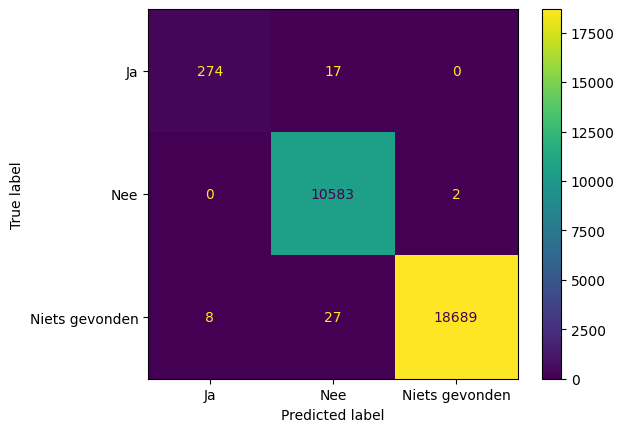

                precision    recall  f1-score   support

            Ja       0.97      0.94      0.96       291
           Nee       1.00      1.00      1.00     10585
Niets gevonden       1.00      1.00      1.00     18724

      accuracy                           1.00     29600
     macro avg       0.99      0.98      0.98     29600
  weighted avg       1.00      1.00      1.00     29600



In [15]:
# Ngram 2 Less stopwords
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,2), lowercase=True, token_pattern=r"(?u)\b\w\w+\b|\+|\-")),
    ('clf', SGDClassifier(early_stopping=True, n_iter_no_change=5, validation_fraction = 0.25, verbose=3)),
])
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=parameter_grid, random_state=500, verbose=3, scoring='f1_macro')
random_search.fit(X_train, y_train)  
predicted_nb = random_search.predict(X_test)
print(np.mean(predicted_nb == y_test))
cm = confusion_matrix(y_test, predicted_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=random_search.classes_)
disp.plot()

plt.show()
print(metrics.classification_report(y_test, predicted_nb,
    target_names=random_search.classes_))

# No stopwords

In [16]:
Corpus["text"] = Corpus["text"].apply(no_stopwords)
X_train, X_test, y_train, y_test = train_test_split(Corpus['text'], Corpus['label'], test_size=0.2, random_state=50)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 88.29, NNZs: 287, Bias: 0.000000, T: 71040, Avg. loss: 0.082879
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 118.77, NNZs: 119, Bias: 0.000000, T: 142080, Avg. loss: 0.058820
Total training time: 0.81 seconds.
-- Epoch 3
Norm: 141.61, NNZs: 93, Bias: 0.000000, T: 213120, Avg. loss: 0.053519
Total training time: 1.22 seconds.
-- Epoch 4
Norm: 160.58, NNZs: 80, Bias: 0.000000, T: 284160, Avg. loss: 0.050884
Total training time: 1.64 seconds.
-- Epoch 5
Norm: 177.27, NNZs: 74, Bias: 0.000000, T: 355200, Avg. loss: 0.049313
Total training time: 2.03 seconds.
-- Epoch 6
Norm: 191.99, NNZs: 69, Bias: 0.000000, T: 426240, Avg. loss: 0.048406
Total training time: 2.43 seconds.
-- Epoch 7
Norm: 194.77, NNZs: 68, Bias: 0.000000, T: 497280, Avg. loss: 0.047923
Total training time: 2.83 seconds.
-- Epoch 8
Norm: 197.46, NNZs: 68, Bias: 0.000000, T: 568320, Avg. loss: 0.047684
Total training time: 3.25 seconds.
-- Epoch 9
Norm: 200.01, NNZs: 68, Bias: 0.000000, T: 639360, Av

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.2s remaining:    0.0s


Norm: 120.11, NNZs: 465, Bias: 0.000000, T: 71040, Avg. loss: 0.203641
Total training time: 0.36 seconds.
-- Epoch 2
Norm: 163.55, NNZs: 185, Bias: 0.000000, T: 142080, Avg. loss: 0.149209
Total training time: 0.76 seconds.
-- Epoch 3
Norm: 196.43, NNZs: 154, Bias: 0.000000, T: 213120, Avg. loss: 0.134776
Total training time: 1.16 seconds.
-- Epoch 4
Norm: 223.88, NNZs: 137, Bias: 0.000000, T: 284160, Avg. loss: 0.127090
Total training time: 1.56 seconds.
-- Epoch 5
Norm: 247.90, NNZs: 128, Bias: 0.000000, T: 355200, Avg. loss: 0.122406
Total training time: 1.97 seconds.
-- Epoch 6
Norm: 269.48, NNZs: 120, Bias: 0.000000, T: 426240, Avg. loss: 0.118884
Total training time: 2.36 seconds.
-- Epoch 7
Norm: 273.34, NNZs: 120, Bias: 0.000000, T: 497280, Avg. loss: 0.116945
Total training time: 2.75 seconds.
-- Epoch 8
Norm: 277.14, NNZs: 119, Bias: 0.000000, T: 568320, Avg. loss: 0.116373
Total training time: 3.16 seconds.
-- Epoch 9
Norm: 280.89, NNZs: 117, Bias: 0.000000, T: 639360, Avg. 

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   16.2s remaining:    0.0s


Norm: 121.53, NNZs: 463, Bias: 0.000000, T: 71040, Avg. loss: 0.169003
Total training time: 0.37 seconds.
-- Epoch 2
Norm: 164.18, NNZs: 185, Bias: 0.000000, T: 142080, Avg. loss: 0.115796
Total training time: 0.78 seconds.
-- Epoch 3
Norm: 196.19, NNZs: 149, Bias: 0.000000, T: 213120, Avg. loss: 0.103187
Total training time: 1.20 seconds.
-- Epoch 4
Norm: 223.04, NNZs: 135, Bias: 0.000000, T: 284160, Avg. loss: 0.096293
Total training time: 1.60 seconds.
-- Epoch 5
Norm: 246.57, NNZs: 122, Bias: 0.000000, T: 355200, Avg. loss: 0.091512
Total training time: 1.99 seconds.
-- Epoch 6
Norm: 267.73, NNZs: 112, Bias: 0.000000, T: 426240, Avg. loss: 0.087825
Total training time: 2.39 seconds.
-- Epoch 7
Norm: 271.57, NNZs: 111, Bias: 0.000000, T: 497280, Avg. loss: 0.086143
Total training time: 2.78 seconds.
-- Epoch 8
Norm: 275.35, NNZs: 110, Bias: 0.000000, T: 568320, Avg. loss: 0.085628
Total training time: 3.17 seconds.
-- Epoch 9
Norm: 279.08, NNZs: 108, Bias: 0.000000, T: 639360, Avg. 

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   24.2s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.092 total time= 1.3min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 88.01, NNZs: 330, Bias: 0.000000, T: 71040, Avg. loss: 0.083061
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 118.50, NNZs: 118, Bias: 0.000000, T: 142080, Avg. loss: 0.058918
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 141.39, NNZs: 92, Bias: 0.000000, T: 213120, Avg. loss: 0.053731
Total training time: 1.28 seconds.
-- Epoch 4
Norm: 160.35, NNZs: 82, Bias: 0.000000, T: 284160, Avg. loss: 0.051011
Total training time: 1.70 seconds.
-- Epoch 5
Norm: 176.98, NNZs: 76, Bias: 0.000000, T: 355200, Avg. loss: 0.049515
Total training time: 2.11 seconds.
-- Epoch 6
Norm: 191.79, NNZs: 68, Bias: 0.000000, T: 426240, Avg. loss: 0.048545
Total training time: 2.52 seconds.
-- Epoch 7
Norm: 194.52, NNZs: 67, Bias: 0.000000, T: 497280, Avg. loss: 0.048082
Total training time: 2.95 seconds.
-- Epoch 8
Norm: 197.15, NNZs: 67, Bias: 0.000000, T: 568320, Avg. loss: 0.047931
Total training time: 3.36 seconds.
-- Epoch 9
Norm: 199.74, NNZs: 67, Bias: 0.000000, T: 639360, Av

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.3s remaining:    0.0s


Norm: 120.15, NNZs: 470, Bias: 0.000000, T: 71040, Avg. loss: 0.204031
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 163.69, NNZs: 195, Bias: 0.000000, T: 142080, Avg. loss: 0.148995
Total training time: 0.80 seconds.
-- Epoch 3
Norm: 196.63, NNZs: 154, Bias: 0.000000, T: 213120, Avg. loss: 0.134693
Total training time: 1.22 seconds.
-- Epoch 4
Norm: 224.20, NNZs: 138, Bias: 0.000000, T: 284160, Avg. loss: 0.126677
Total training time: 1.62 seconds.
-- Epoch 5
Norm: 248.44, NNZs: 127, Bias: 0.000000, T: 355200, Avg. loss: 0.121540
Total training time: 2.03 seconds.
-- Epoch 6
Norm: 270.09, NNZs: 120, Bias: 0.000000, T: 426240, Avg. loss: 0.117932
Total training time: 2.44 seconds.
-- Epoch 7
Norm: 273.97, NNZs: 116, Bias: 0.000000, T: 497280, Avg. loss: 0.115792
Total training time: 2.82 seconds.
-- Epoch 8
Norm: 277.79, NNZs: 116, Bias: 0.000000, T: 568320, Avg. loss: 0.115262
Total training time: 3.22 seconds.
-- Epoch 9
Norm: 281.56, NNZs: 113, Bias: 0.000000, T: 639360, Avg. 

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   16.5s remaining:    0.0s


Norm: 121.40, NNZs: 484, Bias: 0.000000, T: 71040, Avg. loss: 0.169564
Total training time: 0.37 seconds.
-- Epoch 2
Norm: 164.05, NNZs: 187, Bias: 0.000000, T: 142080, Avg. loss: 0.116162
Total training time: 0.77 seconds.
-- Epoch 3
Norm: 196.11, NNZs: 147, Bias: 0.000000, T: 213120, Avg. loss: 0.103787
Total training time: 1.18 seconds.
-- Epoch 4
Norm: 222.91, NNZs: 135, Bias: 0.000000, T: 284160, Avg. loss: 0.096857
Total training time: 1.59 seconds.
-- Epoch 5
Norm: 246.50, NNZs: 119, Bias: 0.000000, T: 355200, Avg. loss: 0.092222
Total training time: 1.99 seconds.
-- Epoch 6
Norm: 267.71, NNZs: 113, Bias: 0.000000, T: 426240, Avg. loss: 0.088402
Total training time: 2.41 seconds.
-- Epoch 7
Norm: 271.55, NNZs: 112, Bias: 0.000000, T: 497280, Avg. loss: 0.086631
Total training time: 2.81 seconds.
-- Epoch 8
Norm: 275.34, NNZs: 106, Bias: 0.000000, T: 568320, Avg. loss: 0.086107
Total training time: 3.23 seconds.
-- Epoch 9
Norm: 279.06, NNZs: 104, Bias: 0.000000, T: 639360, Avg. 

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   24.8s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.089 total time= 1.3min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 88.14, NNZs: 299, Bias: 0.000000, T: 71040, Avg. loss: 0.083439
Total training time: 0.36 seconds.
-- Epoch 2
Norm: 118.16, NNZs: 116, Bias: 0.000000, T: 142080, Avg. loss: 0.059673
Total training time: 0.76 seconds.
-- Epoch 3
Norm: 141.16, NNZs: 93, Bias: 0.000000, T: 213120, Avg. loss: 0.054430
Total training time: 1.17 seconds.
-- Epoch 4
Norm: 159.96, NNZs: 80, Bias: 0.000000, T: 284160, Avg. loss: 0.051719
Total training time: 1.57 seconds.
-- Epoch 5
Norm: 176.59, NNZs: 72, Bias: 0.000000, T: 355200, Avg. loss: 0.050192
Total training time: 1.98 seconds.
-- Epoch 6
Norm: 191.35, NNZs: 68, Bias: 0.000000, T: 426240, Avg. loss: 0.049110
Total training time: 2.41 seconds.
-- Epoch 7
Norm: 193.99, NNZs: 67, Bias: 0.000000, T: 497280, Avg. loss: 0.048665
Total training time: 2.84 seconds.
-- Epoch 8
Norm: 196.62, NNZs: 67, Bias: 0.000000, T: 568320, Avg. loss: 0.048584
Total training time: 3.26 seconds.
-- Epoch 9
Norm: 199.21, NNZs: 66, Bias: 0.000000, T: 639360, Av

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.1s remaining:    0.0s


Norm: 119.97, NNZs: 459, Bias: 0.000000, T: 71040, Avg. loss: 0.204511
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 163.49, NNZs: 190, Bias: 0.000000, T: 142080, Avg. loss: 0.150134
Total training time: 0.78 seconds.
-- Epoch 3
Norm: 196.35, NNZs: 153, Bias: 0.000000, T: 213120, Avg. loss: 0.135809
Total training time: 1.19 seconds.
-- Epoch 4
Norm: 223.88, NNZs: 132, Bias: 0.000000, T: 284160, Avg. loss: 0.127947
Total training time: 1.61 seconds.
-- Epoch 5
Norm: 247.91, NNZs: 124, Bias: 0.000000, T: 355200, Avg. loss: 0.122792
Total training time: 1.99 seconds.
-- Epoch 6
Norm: 269.55, NNZs: 118, Bias: 0.000000, T: 426240, Avg. loss: 0.119490
Total training time: 2.38 seconds.
-- Epoch 7
Norm: 273.40, NNZs: 116, Bias: 0.000000, T: 497280, Avg. loss: 0.117462
Total training time: 2.76 seconds.
-- Epoch 8
Norm: 277.21, NNZs: 115, Bias: 0.000000, T: 568320, Avg. loss: 0.116963
Total training time: 3.14 seconds.
-- Epoch 9
Norm: 280.96, NNZs: 115, Bias: 0.000000, T: 639360, Avg. 

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   16.0s remaining:    0.0s


Norm: 121.55, NNZs: 484, Bias: 0.000000, T: 71040, Avg. loss: 0.169480
Total training time: 0.37 seconds.
-- Epoch 2
Norm: 164.26, NNZs: 184, Bias: 0.000000, T: 142080, Avg. loss: 0.116416
Total training time: 0.77 seconds.
-- Epoch 3
Norm: 196.30, NNZs: 153, Bias: 0.000000, T: 213120, Avg. loss: 0.103990
Total training time: 1.17 seconds.
-- Epoch 4
Norm: 223.15, NNZs: 133, Bias: 0.000000, T: 284160, Avg. loss: 0.096966
Total training time: 1.56 seconds.
-- Epoch 5
Norm: 246.72, NNZs: 121, Bias: 0.000000, T: 355200, Avg. loss: 0.092178
Total training time: 1.97 seconds.
-- Epoch 6
Norm: 267.90, NNZs: 110, Bias: 0.000000, T: 426240, Avg. loss: 0.088574
Total training time: 2.37 seconds.
-- Epoch 7
Norm: 271.74, NNZs: 107, Bias: 0.000000, T: 497280, Avg. loss: 0.086523
Total training time: 2.78 seconds.
-- Epoch 8
Norm: 275.51, NNZs: 107, Bias: 0.000000, T: 568320, Avg. loss: 0.085935
Total training time: 3.18 seconds.
-- Epoch 9
Norm: 279.23, NNZs: 105, Bias: 0.000000, T: 639360, Avg. 

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   24.1s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.092 total time= 1.3min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 88.22, NNZs: 284, Bias: 0.000000, T: 71040, Avg. loss: 0.082746
Total training time: 0.37 seconds.
-- Epoch 2
Norm: 118.63, NNZs: 120, Bias: 0.000000, T: 142080, Avg. loss: 0.058406
Total training time: 0.78 seconds.
-- Epoch 3
Norm: 141.41, NNZs: 96, Bias: 0.000000, T: 213120, Avg. loss: 0.053098
Total training time: 1.18 seconds.
-- Epoch 4
Norm: 160.62, NNZs: 79, Bias: 0.000000, T: 284160, Avg. loss: 0.050323
Total training time: 1.59 seconds.
-- Epoch 5
Norm: 177.17, NNZs: 73, Bias: 0.000000, T: 355200, Avg. loss: 0.048849
Total training time: 1.99 seconds.
-- Epoch 6
Norm: 192.07, NNZs: 68, Bias: 0.000000, T: 426240, Avg. loss: 0.047812
Total training time: 2.41 seconds.
-- Epoch 7
Norm: 194.71, NNZs: 67, Bias: 0.000000, T: 497280, Avg. loss: 0.047195
Total training time: 2.82 seconds.
-- Epoch 8
Norm: 197.40, NNZs: 67, Bias: 0.000000, T: 568320, Avg. loss: 0.047088
Total training time: 3.21 seconds.
-- Epoch 9
Norm: 199.97, NNZs: 65, Bias: 0.000000, T: 639360, Av

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.0s remaining:    0.0s


Norm: 119.98, NNZs: 449, Bias: 0.000000, T: 71040, Avg. loss: 0.203869
Total training time: 0.36 seconds.
-- Epoch 2
Norm: 163.71, NNZs: 194, Bias: 0.000000, T: 142080, Avg. loss: 0.148933
Total training time: 0.77 seconds.
-- Epoch 3
Norm: 196.53, NNZs: 160, Bias: 0.000000, T: 213120, Avg. loss: 0.134917
Total training time: 1.14 seconds.
-- Epoch 4
Norm: 224.03, NNZs: 141, Bias: 0.000000, T: 284160, Avg. loss: 0.127155
Total training time: 1.57 seconds.
-- Epoch 5
Norm: 248.00, NNZs: 129, Bias: 0.000000, T: 355200, Avg. loss: 0.122065
Total training time: 2.01 seconds.
-- Epoch 6
Norm: 269.57, NNZs: 123, Bias: 0.000000, T: 426240, Avg. loss: 0.118951
Total training time: 2.42 seconds.
-- Epoch 7
Norm: 273.42, NNZs: 121, Bias: 0.000000, T: 497280, Avg. loss: 0.116905
Total training time: 2.82 seconds.
-- Epoch 8
Norm: 277.23, NNZs: 121, Bias: 0.000000, T: 568320, Avg. loss: 0.116495
Total training time: 3.24 seconds.
-- Epoch 9
Norm: 280.97, NNZs: 120, Bias: 0.000000, T: 639360, Avg. 

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   16.2s remaining:    0.0s


Norm: 121.55, NNZs: 471, Bias: 0.000000, T: 71040, Avg. loss: 0.168844
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 164.20, NNZs: 190, Bias: 0.000000, T: 142080, Avg. loss: 0.115993
Total training time: 0.80 seconds.
-- Epoch 3
Norm: 196.16, NNZs: 154, Bias: 0.000000, T: 213120, Avg. loss: 0.103324
Total training time: 1.21 seconds.
-- Epoch 4
Norm: 222.98, NNZs: 135, Bias: 0.000000, T: 284160, Avg. loss: 0.096316
Total training time: 1.61 seconds.
-- Epoch 5
Norm: 246.53, NNZs: 125, Bias: 0.000000, T: 355200, Avg. loss: 0.091699
Total training time: 2.00 seconds.
-- Epoch 6
Norm: 267.72, NNZs: 115, Bias: 0.000000, T: 426240, Avg. loss: 0.088094
Total training time: 2.40 seconds.
-- Epoch 7
Norm: 271.55, NNZs: 111, Bias: 0.000000, T: 497280, Avg. loss: 0.086171
Total training time: 2.80 seconds.
-- Epoch 8
Norm: 275.33, NNZs: 111, Bias: 0.000000, T: 568320, Avg. loss: 0.085701
Total training time: 3.20 seconds.
-- Epoch 9
Norm: 279.05, NNZs: 107, Bias: 0.000000, T: 639360, Avg. 

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   24.4s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.090 total time= 1.3min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 88.04, NNZs: 288, Bias: 0.000000, T: 71040, Avg. loss: 0.083499
Total training time: 0.36 seconds.
-- Epoch 2
Norm: 118.20, NNZs: 116, Bias: 0.000000, T: 142080, Avg. loss: 0.059976
Total training time: 0.76 seconds.
-- Epoch 3
Norm: 141.26, NNZs: 92, Bias: 0.000000, T: 213120, Avg. loss: 0.054365
Total training time: 1.16 seconds.
-- Epoch 4
Norm: 160.21, NNZs: 86, Bias: 0.000000, T: 284160, Avg. loss: 0.051724
Total training time: 1.57 seconds.
-- Epoch 5
Norm: 176.82, NNZs: 71, Bias: 0.000000, T: 355200, Avg. loss: 0.049995
Total training time: 1.99 seconds.
-- Epoch 6
Norm: 191.56, NNZs: 67, Bias: 0.000000, T: 426240, Avg. loss: 0.049169
Total training time: 2.41 seconds.
-- Epoch 7
Norm: 194.32, NNZs: 67, Bias: 0.000000, T: 497280, Avg. loss: 0.048741
Total training time: 2.84 seconds.
-- Epoch 8
Norm: 196.96, NNZs: 66, Bias: 0.000000, T: 568320, Avg. loss: 0.048581
Total training time: 3.25 seconds.
-- Epoch 9
Norm: 199.56, NNZs: 64, Bias: 0.000000, T: 639360, Av

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.2s remaining:    0.0s


Norm: 120.02, NNZs: 454, Bias: 0.000000, T: 71040, Avg. loss: 0.203373
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 163.41, NNZs: 190, Bias: 0.000000, T: 142080, Avg. loss: 0.148847
Total training time: 0.81 seconds.
-- Epoch 3
Norm: 196.48, NNZs: 155, Bias: 0.000000, T: 213120, Avg. loss: 0.134676
Total training time: 1.21 seconds.
-- Epoch 4
Norm: 223.90, NNZs: 135, Bias: 0.000000, T: 284160, Avg. loss: 0.126711
Total training time: 1.61 seconds.
-- Epoch 5
Norm: 247.99, NNZs: 125, Bias: 0.000000, T: 355200, Avg. loss: 0.121740
Total training time: 2.01 seconds.
-- Epoch 6
Norm: 269.61, NNZs: 119, Bias: 0.000000, T: 426240, Avg. loss: 0.118173
Total training time: 2.41 seconds.
-- Epoch 7
Norm: 273.47, NNZs: 118, Bias: 0.000000, T: 497280, Avg. loss: 0.116178
Total training time: 2.81 seconds.
-- Epoch 8
Norm: 277.27, NNZs: 114, Bias: 0.000000, T: 568320, Avg. loss: 0.115647
Total training time: 3.21 seconds.
-- Epoch 9
Norm: 281.02, NNZs: 113, Bias: 0.000000, T: 639360, Avg. 

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   16.3s remaining:    0.0s


Norm: 121.39, NNZs: 505, Bias: 0.000000, T: 71040, Avg. loss: 0.169368
Total training time: 0.36 seconds.
-- Epoch 2
Norm: 163.80, NNZs: 185, Bias: 0.000000, T: 142080, Avg. loss: 0.116114
Total training time: 0.77 seconds.
-- Epoch 3
Norm: 195.79, NNZs: 150, Bias: 0.000000, T: 213120, Avg. loss: 0.103884
Total training time: 1.16 seconds.
-- Epoch 4
Norm: 222.58, NNZs: 130, Bias: 0.000000, T: 284160, Avg. loss: 0.096797
Total training time: 1.54 seconds.
-- Epoch 5
Norm: 246.14, NNZs: 126, Bias: 0.000000, T: 355200, Avg. loss: 0.091987
Total training time: 1.94 seconds.
-- Epoch 6
Norm: 267.30, NNZs: 111, Bias: 0.000000, T: 426240, Avg. loss: 0.088460
Total training time: 2.35 seconds.
-- Epoch 7
Norm: 271.13, NNZs: 110, Bias: 0.000000, T: 497280, Avg. loss: 0.086390
Total training time: 2.78 seconds.
-- Epoch 8
Norm: 274.90, NNZs: 107, Bias: 0.000000, T: 568320, Avg. loss: 0.085854
Total training time: 3.18 seconds.
-- Epoch 9
Norm: 278.62, NNZs: 105, Bias: 0.000000, T: 639360, Avg. 

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   24.5s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.091 total time= 1.3min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 97423576492846.95, NNZs: 394287, Bias: 0.000000, T: 71040, Avg. loss: 94060502796925604462592.000000
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 91422969410412.25, NNZs: 394289, Bias: 0.000000, T: 142080, Avg. loss: 76318191818053414551552.000000
Total training time: 0.64 seconds.
-- Epoch 3
Norm: 88350992698611.03, NNZs: 394289, Bias: 0.000000, T: 213120, Avg. loss: 62279809805196283871232.000000
Total training time: 0.98 seconds.
-- Epoch 4
Norm: 86326170012439.56, NNZs: 394289, Bias: 0.000000, T: 284160, Avg. loss: 55825204936485736808448.000000
Total training time: 1.32 seconds.
-- Epoch 5
Norm: 84827567251796.66, NNZs: 394289, Bias: 0.000000, T: 355200, Avg. loss: 51791575931240677638144.000000
Total training time: 1.66 seconds.
-- Epoch 6
Norm: 83644479906711.08, NNZs: 394289, Bias: 0.000000, T: 426240, Avg. loss: 49019650836973194575872.000000
Total training time: 2.01 seconds.
Convergence after 6 epochs took 2.04 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


Norm: 115297499909271.02, NNZs: 394288, Bias: 0.000000, T: 71040, Avg. loss: 129110906630441722183680.000000
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 108855717477742.02, NNZs: 394289, Bias: 0.000000, T: 142080, Avg. loss: 110299108719277446791168.000000
Total training time: 0.64 seconds.
-- Epoch 3
Norm: 105567040414886.33, NNZs: 394289, Bias: 0.000000, T: 213120, Avg. loss: 91386608430112787398656.000000
Total training time: 0.97 seconds.
-- Epoch 4
Norm: 103388183328963.44, NNZs: 394289, Bias: 0.000000, T: 284160, Avg. loss: 82785219274221285277696.000000
Total training time: 1.29 seconds.
-- Epoch 5
Norm: 101776461585803.50, NNZs: 394289, Bias: 0.000000, T: 355200, Avg. loss: 77347385917335066902528.000000
Total training time: 1.63 seconds.
-- Epoch 6
Norm: 100507721628502.81, NNZs: 394289, Bias: 0.000000, T: 426240, Avg. loss: 73550009996838195691520.000000
Total training time: 1.98 seconds.
Convergence after 6 epochs took 2.01 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.1s remaining:    0.0s


Norm: 118952509619663.12, NNZs: 394288, Bias: 0.000000, T: 71040, Avg. loss: 140279380594696671723520.000000
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 112353800858924.95, NNZs: 394289, Bias: 0.000000, T: 142080, Avg. loss: 118903731907172820320256.000000
Total training time: 0.66 seconds.
-- Epoch 3
Norm: 108997159778822.55, NNZs: 394289, Bias: 0.000000, T: 213120, Avg. loss: 98673393904085031190528.000000
Total training time: 1.02 seconds.
-- Epoch 4
Norm: 106781213178589.00, NNZs: 394289, Bias: 0.000000, T: 284160, Avg. loss: 89331523326899566673920.000000
Total training time: 1.39 seconds.
-- Epoch 5
Norm: 105141843583738.77, NNZs: 394289, Bias: 0.000000, T: 355200, Avg. loss: 83557102031951678668800.000000
Total training time: 1.74 seconds.
-- Epoch 6
Norm: 103851745223348.72, NNZs: 394289, Bias: 0.000000, T: 426240, Avg. loss: 79440871137008657891328.000000
Total training time: 2.08 seconds.
Convergence after 6 epochs took 2.11 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.2s finished


[CV 1/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.275 total time=  55.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 49.25, NNZs: 58, Bias: 0.000000, T: 71040, Avg. loss: 0.002270
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 49.67, NNZs: 57, Bias: 0.000000, T: 142080, Avg. loss: 0.001902
Total training time: 0.43 seconds.
-- Epoch 3
Norm: 49.90, NNZs: 57, Bias: 0.000000, T: 213120, Avg. loss: 0.001911
Total training time: 0.65 seconds.
-- Epoch 4
Norm: 50.05, NNZs: 54, Bias: 0.000000, T: 284160, Avg. loss: 0.001889
Total training time: 0.87 seconds.
-- Epoch 5
Norm: 50.18, NNZs: 54, Bias: 0.000000, T: 355200, Avg. loss: 0.001898
Total training time: 1.10 seconds.
-- Epoch 6
Norm: 50.28, NNZs: 54, Bias: 0.000000, T: 426240, Avg. loss: 0.001897
Total training time: 1.32 seconds.
Convergence after 6 epochs took 1.35 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


Norm: 122456032027912.59, NNZs: 393880, Bias: 0.000000, T: 71040, Avg. loss: 151491746993669312348160.000000
Total training time: 0.29 seconds.
-- Epoch 2
Norm: 115625893584708.75, NNZs: 393880, Bias: 0.000000, T: 142080, Avg. loss: 127550769287892085768192.000000
Total training time: 0.61 seconds.
-- Epoch 3
Norm: 112140090766208.69, NNZs: 393880, Bias: 0.000000, T: 213120, Avg. loss: 105670133799082382065664.000000
Total training time: 0.94 seconds.
-- Epoch 4
Norm: 109840924016543.83, NNZs: 393880, Bias: 0.000000, T: 284160, Avg. loss: 95478344900110928838656.000000
Total training time: 1.26 seconds.
-- Epoch 5
Norm: 108146260018631.17, NNZs: 393880, Bias: 0.000000, T: 355200, Avg. loss: 89165283009822984241152.000000
Total training time: 1.59 seconds.
-- Epoch 6
Norm: 106809822817537.31, NNZs: 393880, Bias: 0.000000, T: 426240, Avg. loss: 84760394189601769521152.000000
Total training time: 1.90 seconds.
Convergence after 6 epochs took 1.94 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.3s remaining:    0.0s


Norm: 76915014757189.52, NNZs: 393877, Bias: 0.000000, T: 71040, Avg. loss: 58721988703805260169216.000000
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 71643302790447.28, NNZs: 393880, Bias: 0.000000, T: 142080, Avg. loss: 46864070274438519586816.000000
Total training time: 0.63 seconds.
-- Epoch 3
Norm: 68951004651151.79, NNZs: 393880, Bias: 0.000000, T: 213120, Avg. loss: 37479064826475098144768.000000
Total training time: 0.96 seconds.
-- Epoch 4
Norm: 67170359530462.24, NNZs: 393880, Bias: 0.000000, T: 284160, Avg. loss: 33223986407632833347584.000000
Total training time: 1.29 seconds.
-- Epoch 5
Norm: 65851990752811.51, NNZs: 393880, Bias: 0.000000, T: 355200, Avg. loss: 30615763671815121010688.000000
Total training time: 1.62 seconds.
-- Epoch 6
Norm: 64811600872554.88, NNZs: 393880, Bias: 0.000000, T: 426240, Avg. loss: 28783319172566430515200.000000
Total training time: 1.95 seconds.
Convergence after 6 epochs took 1.98 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.3s finished


[CV 2/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.276 total time=  54.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 132878400541204.19, NNZs: 392880, Bias: 0.000000, T: 71040, Avg. loss: 171536275996604085829632.000000
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 125881613592622.86, NNZs: 392881, Bias: 0.000000, T: 142080, Avg. loss: 151083006902408390377472.000000
Total training time: 0.64 seconds.
-- Epoch 3
Norm: 122344590720371.70, NNZs: 392881, Bias: 0.000000, T: 213120, Avg. loss: 126303545124211365249024.000000
Total training time: 1.00 seconds.
-- Epoch 4
Norm: 120009099420051.73, NNZs: 392881, Bias: 0.000000, T: 284160, Avg. loss: 114786957637558361653248.000000
Total training time: 1.36 seconds.
-- Epoch 5
Norm: 118284519415786.27, NNZs: 392881, Bias: 0.000000, T: 355200, Avg. loss: 107679965487312654041088.000000
Total training time: 1.74 seconds.
-- Epoch 6
Norm: 116924647089362.48, NNZs: 392881, Bias: 0.000000, T: 426240, Avg. loss: 102616636582249195634688.000000
Total training time: 2.11 seconds.
Convergence after 6 epochs took 2.14 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


Norm: 111577730300497.77, NNZs: 392879, Bias: 0.000000, T: 71040, Avg. loss: 123472381618508129107968.000000
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 105222945995556.94, NNZs: 392881, Bias: 0.000000, T: 142080, Avg. loss: 102218350760216521342976.000000
Total training time: 0.68 seconds.
-- Epoch 3
Norm: 101979161198728.36, NNZs: 392881, Bias: 0.000000, T: 213120, Avg. loss: 84458749332952371429376.000000
Total training time: 1.05 seconds.
-- Epoch 4
Norm: 99840191060743.45, NNZs: 392881, Bias: 0.000000, T: 284160, Avg. loss: 76248602922380848791552.000000
Total training time: 1.38 seconds.
-- Epoch 5
Norm: 98256942199792.94, NNZs: 392881, Bias: 0.000000, T: 355200, Avg. loss: 71146929780583634567168.000000
Total training time: 1.73 seconds.
-- Epoch 6
Norm: 97009397006906.12, NNZs: 392881, Bias: 0.000000, T: 426240, Avg. loss: 67581799570875898396672.000000
Total training time: 2.06 seconds.
Convergence after 6 epochs took 2.09 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.3s remaining:    0.0s


Norm: 115002811494392.59, NNZs: 392881, Bias: 0.000000, T: 71040, Avg. loss: 130046245127347874299904.000000
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 108464705007951.12, NNZs: 392881, Bias: 0.000000, T: 142080, Avg. loss: 109762329427833002131456.000000
Total training time: 0.64 seconds.
-- Epoch 3
Norm: 105137861631607.67, NNZs: 392881, Bias: 0.000000, T: 213120, Avg. loss: 90691450233693312909312.000000
Total training time: 0.97 seconds.
-- Epoch 4
Norm: 102940744813191.11, NNZs: 392881, Bias: 0.000000, T: 284160, Avg. loss: 81860844524127190515712.000000
Total training time: 1.32 seconds.
-- Epoch 5
Norm: 101317411134585.03, NNZs: 392881, Bias: 0.000000, T: 355200, Avg. loss: 76384006308251092123648.000000
Total training time: 1.65 seconds.
-- Epoch 6
Norm: 100041460316005.59, NNZs: 392881, Bias: 0.000000, T: 426240, Avg. loss: 72566042052212899708928.000000
Total training time: 1.98 seconds.
Convergence after 6 epochs took 2.01 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.3s finished


[CV 3/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.260 total time=  55.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 127645244881552.64, NNZs: 393392, Bias: 0.000000, T: 71040, Avg. loss: 165138409752701672882176.000000
Total training time: 0.32 seconds.
-- Epoch 2
Norm: 120755782652453.48, NNZs: 393393, Bias: 0.000000, T: 142080, Avg. loss: 138742724387600825581568.000000
Total training time: 0.66 seconds.
-- Epoch 3
Norm: 117233240633240.66, NNZs: 393393, Bias: 0.000000, T: 213120, Avg. loss: 115536134658379426562048.000000
Total training time: 0.99 seconds.
-- Epoch 4
Norm: 114914086547167.09, NNZs: 393393, Bias: 0.000000, T: 284160, Avg. loss: 104641943827524945444864.000000
Total training time: 1.31 seconds.
-- Epoch 5
Norm: 113202371019583.25, NNZs: 393393, Bias: 0.000000, T: 355200, Avg. loss: 97916538934108283207680.000000
Total training time: 1.64 seconds.
-- Epoch 6
Norm: 111856261033998.47, NNZs: 393393, Bias: 0.000000, T: 426240, Avg. loss: 93174713608402485903360.000000
Total training time: 1.98 seconds.
Convergence after 6 epochs took 2.01 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


Norm: 98146502680080.75, NNZs: 393392, Bias: 0.000000, T: 71040, Avg. loss: 95633141193768406351872.000000
Total training time: 0.28 seconds.
-- Epoch 2
Norm: 92137691034726.62, NNZs: 393393, Bias: 0.000000, T: 142080, Avg. loss: 78418586374480708239360.000000
Total training time: 0.60 seconds.
-- Epoch 3
Norm: 89056812489681.91, NNZs: 393393, Bias: 0.000000, T: 213120, Avg. loss: 64057183635757288390656.000000
Total training time: 0.95 seconds.
-- Epoch 4
Norm: 87025776078794.58, NNZs: 393393, Bias: 0.000000, T: 284160, Avg. loss: 57369480770442256973824.000000
Total training time: 1.27 seconds.
-- Epoch 5
Norm: 85522914143993.92, NNZs: 393393, Bias: 0.000000, T: 355200, Avg. loss: 53304753204468348092416.000000
Total training time: 1.60 seconds.
-- Epoch 6
Norm: 84337804436133.62, NNZs: 393393, Bias: 0.000000, T: 426240, Avg. loss: 50414154309493181120512.000000
Total training time: 1.93 seconds.
Convergence after 6 epochs took 1.96 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.0s remaining:    0.0s


Norm: 118315494548948.70, NNZs: 393393, Bias: 0.000000, T: 71040, Avg. loss: 141383126906887001341952.000000
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 111687697302433.91, NNZs: 393393, Bias: 0.000000, T: 142080, Avg. loss: 116576709937353086468096.000000
Total training time: 0.64 seconds.
-- Epoch 3
Norm: 108311413997361.98, NNZs: 393393, Bias: 0.000000, T: 213120, Avg. loss: 96469797177508981899264.000000
Total training time: 1.01 seconds.
-- Epoch 4
Norm: 106083598550476.70, NNZs: 393393, Bias: 0.000000, T: 284160, Avg. loss: 87129046549918780489728.000000
Total training time: 1.35 seconds.
-- Epoch 5
Norm: 104438763826463.91, NNZs: 393393, Bias: 0.000000, T: 355200, Avg. loss: 81362175936539752660992.000000
Total training time: 1.69 seconds.
-- Epoch 6
Norm: 103139316182742.61, NNZs: 393393, Bias: 0.000000, T: 426240, Avg. loss: 77338596696808308604928.000000
Total training time: 2.05 seconds.
Convergence after 6 epochs took 2.08 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.1s finished


[CV 4/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.254 total time=  55.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 120126261701231.59, NNZs: 391589, Bias: 0.000000, T: 71040, Avg. loss: 142281198266467571728384.000000
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 113461509779921.34, NNZs: 391589, Bias: 0.000000, T: 142080, Avg. loss: 120841750394405067423744.000000
Total training time: 0.65 seconds.
-- Epoch 3
Norm: 110053407258042.06, NNZs: 391589, Bias: 0.000000, T: 213120, Avg. loss: 100396124536709459214336.000000
Total training time: 1.01 seconds.
-- Epoch 4
Norm: 107807954375729.33, NNZs: 391589, Bias: 0.000000, T: 284160, Avg. loss: 90846850403449534676992.000000
Total training time: 1.35 seconds.
-- Epoch 5
Norm: 106147338475144.58, NNZs: 391589, Bias: 0.000000, T: 355200, Avg. loss: 84898596770193996775424.000000
Total training time: 1.71 seconds.
-- Epoch 6
Norm: 104837859029430.58, NNZs: 391589, Bias: 0.000000, T: 426240, Avg. loss: 80756216151346530746368.000000
Total training time: 2.05 seconds.
Convergence after 6 epochs took 2.08 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


Norm: 132523743768930.08, NNZs: 391589, Bias: 0.000000, T: 71040, Avg. loss: 179214881145763965960192.000000
Total training time: 0.29 seconds.
-- Epoch 2
Norm: 125502558283097.81, NNZs: 391589, Bias: 0.000000, T: 142080, Avg. loss: 149391646176358642483200.000000
Total training time: 0.62 seconds.
-- Epoch 3
Norm: 121919129556214.08, NNZs: 391589, Bias: 0.000000, T: 213120, Avg. loss: 124762112473432164663296.000000
Total training time: 0.96 seconds.
-- Epoch 4
Norm: 119561192246876.42, NNZs: 391589, Bias: 0.000000, T: 284160, Avg. loss: 113143765553513228140544.000000
Total training time: 1.28 seconds.
-- Epoch 5
Norm: 117819115497334.78, NNZs: 391589, Bias: 0.000000, T: 355200, Avg. loss: 105992756424036344397824.000000
Total training time: 1.61 seconds.
-- Epoch 6
Norm: 116449617506769.09, NNZs: 391589, Bias: 0.000000, T: 426240, Avg. loss: 100971358035110025756672.000000
Total training time: 1.94 seconds.
Convergence after 6 epochs took 1.98 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.1s remaining:    0.0s


Norm: 124353403673286.27, NNZs: 391586, Bias: 0.000000, T: 71040, Avg. loss: 152153749127076396400640.000000
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 117647233236020.09, NNZs: 391589, Bias: 0.000000, T: 142080, Avg. loss: 129601186716988827762688.000000
Total training time: 0.64 seconds.
-- Epoch 3
Norm: 114236100071043.77, NNZs: 391589, Bias: 0.000000, T: 213120, Avg. loss: 108126486456848598695936.000000
Total training time: 0.97 seconds.
-- Epoch 4
Norm: 111989279765355.09, NNZs: 391589, Bias: 0.000000, T: 284160, Avg. loss: 98049767146983593607168.000000
Total training time: 1.32 seconds.
-- Epoch 5
Norm: 110327352492166.50, NNZs: 391589, Bias: 0.000000, T: 355200, Avg. loss: 91846915972829355704320.000000
Total training time: 1.65 seconds.
-- Epoch 6
Norm: 109016967459528.53, NNZs: 391589, Bias: 0.000000, T: 426240, Avg. loss: 87474291792026074611712.000000
Total training time: 1.99 seconds.
Convergence after 6 epochs took 2.03 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.2s finished


[CV 5/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.270 total time=  56.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 88.36, NNZs: 269, Bias: 0.000000, T: 71040, Avg. loss: 0.028392
Total training time: 0.22 seconds.
-- Epoch 2
Norm: 118.03, NNZs: 131, Bias: 0.000000, T: 142080, Avg. loss: 0.022799
Total training time: 0.46 seconds.
-- Epoch 3
Norm: 141.09, NNZs: 121, Bias: 0.000000, T: 213120, Avg. loss: 0.022188
Total training time: 0.71 seconds.
-- Epoch 4
Norm: 160.59, NNZs: 113, Bias: 0.000000, T: 284160, Avg. loss: 0.021981
Total training time: 0.96 seconds.
-- Epoch 5
Norm: 177.89, NNZs: 110, Bias: 0.000000, T: 355200, Avg. loss: 0.021975
Total training time: 1.20 seconds.
-- Epoch 6
Norm: 193.71, NNZs: 115, Bias: 0.000000, T: 426240, Avg. loss: 0.021977
Total training time: 1.44 seconds.
Convergence after 6 epochs took 1.48 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


Norm: 155.21, NNZs: 689, Bias: 0.000000, T: 71040, Avg. loss: 0.096361
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 204.83, NNZs: 248, Bias: 0.000000, T: 142080, Avg. loss: 0.067527
Total training time: 0.53 seconds.
-- Epoch 3
Norm: 241.94, NNZs: 223, Bias: 0.000000, T: 213120, Avg. loss: 0.059345
Total training time: 0.81 seconds.
-- Epoch 4
Norm: 272.58, NNZs: 208, Bias: 0.000000, T: 284160, Avg. loss: 0.055910
Total training time: 1.08 seconds.
-- Epoch 5
Norm: 299.04, NNZs: 204, Bias: 0.000000, T: 355200, Avg. loss: 0.054022
Total training time: 1.36 seconds.
-- Epoch 6
Norm: 322.96, NNZs: 200, Bias: 0.000000, T: 426240, Avg. loss: 0.053480
Total training time: 1.64 seconds.
Convergence after 6 epochs took 1.68 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.2s remaining:    0.0s


Norm: 138.18, NNZs: 579, Bias: 0.000000, T: 71040, Avg. loss: 0.064474
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 178.87, NNZs: 183, Bias: 0.000000, T: 142080, Avg. loss: 0.035684
Total training time: 0.53 seconds.
-- Epoch 3
Norm: 208.58, NNZs: 158, Bias: 0.000000, T: 213120, Avg. loss: 0.029194
Total training time: 0.82 seconds.
-- Epoch 4
Norm: 232.73, NNZs: 147, Bias: 0.000000, T: 284160, Avg. loss: 0.025415
Total training time: 1.11 seconds.
-- Epoch 5
Norm: 253.43, NNZs: 140, Bias: 0.000000, T: 355200, Avg. loss: 0.022976
Total training time: 1.40 seconds.
-- Epoch 6
Norm: 271.72, NNZs: 131, Bias: 0.000000, T: 426240, Avg. loss: 0.021274
Total training time: 1.67 seconds.
Convergence after 6 epochs took 1.71 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.9s finished


[CV 1/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.911 total time=  57.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 87.70, NNZs: 267, Bias: 0.000000, T: 71040, Avg. loss: 0.027915
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 117.37, NNZs: 135, Bias: 0.000000, T: 142080, Avg. loss: 0.022406
Total training time: 0.47 seconds.
-- Epoch 3
Norm: 140.23, NNZs: 124, Bias: 0.000000, T: 213120, Avg. loss: 0.021956
Total training time: 0.70 seconds.
-- Epoch 4
Norm: 159.87, NNZs: 123, Bias: 0.000000, T: 284160, Avg. loss: 0.021908
Total training time: 0.94 seconds.
-- Epoch 5
Norm: 177.15, NNZs: 114, Bias: 0.000000, T: 355200, Avg. loss: 0.021526
Total training time: 1.20 seconds.
-- Epoch 6
Norm: 192.81, NNZs: 113, Bias: 0.000000, T: 426240, Avg. loss: 0.021381
Total training time: 1.47 seconds.
Convergence after 6 epochs took 1.50 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


Norm: 155.36, NNZs: 661, Bias: 0.000000, T: 71040, Avg. loss: 0.096511
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 205.21, NNZs: 254, Bias: 0.000000, T: 142080, Avg. loss: 0.068402
Total training time: 0.51 seconds.
-- Epoch 3
Norm: 242.13, NNZs: 232, Bias: 0.000000, T: 213120, Avg. loss: 0.063426
Total training time: 0.77 seconds.
-- Epoch 4
Norm: 273.66, NNZs: 224, Bias: 0.000000, T: 284160, Avg. loss: 0.057597
Total training time: 1.04 seconds.
-- Epoch 5
Norm: 300.52, NNZs: 218, Bias: 0.000000, T: 355200, Avg. loss: 0.057435
Total training time: 1.32 seconds.
-- Epoch 6
Norm: 324.97, NNZs: 212, Bias: 0.000000, T: 426240, Avg. loss: 0.055044
Total training time: 1.61 seconds.
Convergence after 6 epochs took 1.64 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.2s remaining:    0.0s


Norm: 137.91, NNZs: 598, Bias: 0.000000, T: 71040, Avg. loss: 0.064215
Total training time: 0.25 seconds.
-- Epoch 2
Norm: 178.73, NNZs: 192, Bias: 0.000000, T: 142080, Avg. loss: 0.036039
Total training time: 0.52 seconds.
-- Epoch 3
Norm: 208.52, NNZs: 160, Bias: 0.000000, T: 213120, Avg. loss: 0.029412
Total training time: 0.79 seconds.
-- Epoch 4
Norm: 232.75, NNZs: 147, Bias: 0.000000, T: 284160, Avg. loss: 0.025822
Total training time: 1.06 seconds.
-- Epoch 5
Norm: 253.56, NNZs: 139, Bias: 0.000000, T: 355200, Avg. loss: 0.023187
Total training time: 1.34 seconds.
-- Epoch 6
Norm: 271.93, NNZs: 132, Bias: 0.000000, T: 426240, Avg. loss: 0.021535
Total training time: 1.60 seconds.
Convergence after 6 epochs took 1.64 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.9s finished


[CV 2/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.905 total time=  56.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 87.65, NNZs: 268, Bias: 0.000000, T: 71040, Avg. loss: 0.027808
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 117.32, NNZs: 136, Bias: 0.000000, T: 142080, Avg. loss: 0.022299
Total training time: 0.54 seconds.
-- Epoch 3
Norm: 140.30, NNZs: 122, Bias: 0.000000, T: 213120, Avg. loss: 0.021412
Total training time: 0.80 seconds.
-- Epoch 4
Norm: 159.58, NNZs: 119, Bias: 0.000000, T: 284160, Avg. loss: 0.021274
Total training time: 1.08 seconds.
-- Epoch 5
Norm: 176.79, NNZs: 113, Bias: 0.000000, T: 355200, Avg. loss: 0.021093
Total training time: 1.34 seconds.
-- Epoch 6
Norm: 192.28, NNZs: 116, Bias: 0.000000, T: 426240, Avg. loss: 0.020950
Total training time: 1.62 seconds.
Convergence after 6 epochs took 1.65 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


Norm: 154.12, NNZs: 751, Bias: 0.000000, T: 71040, Avg. loss: 0.095230
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 203.96, NNZs: 244, Bias: 0.000000, T: 142080, Avg. loss: 0.064299
Total training time: 0.55 seconds.
-- Epoch 3
Norm: 240.30, NNZs: 225, Bias: 0.000000, T: 213120, Avg. loss: 0.058837
Total training time: 0.83 seconds.
-- Epoch 4
Norm: 270.50, NNZs: 196, Bias: 0.000000, T: 284160, Avg. loss: 0.052835
Total training time: 1.10 seconds.
-- Epoch 5
Norm: 296.52, NNZs: 197, Bias: 0.000000, T: 355200, Avg. loss: 0.052680
Total training time: 1.40 seconds.
-- Epoch 6
Norm: 320.04, NNZs: 192, Bias: 0.000000, T: 426240, Avg. loss: 0.049477
Total training time: 1.67 seconds.
Convergence after 6 epochs took 1.71 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.4s remaining:    0.0s


Norm: 137.90, NNZs: 604, Bias: 0.000000, T: 71040, Avg. loss: 0.064264
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 178.90, NNZs: 199, Bias: 0.000000, T: 142080, Avg. loss: 0.036369
Total training time: 0.49 seconds.
-- Epoch 3
Norm: 208.69, NNZs: 171, Bias: 0.000000, T: 213120, Avg. loss: 0.029472
Total training time: 0.75 seconds.
-- Epoch 4
Norm: 232.96, NNZs: 145, Bias: 0.000000, T: 284160, Avg. loss: 0.025644
Total training time: 1.02 seconds.
-- Epoch 5
Norm: 253.66, NNZs: 142, Bias: 0.000000, T: 355200, Avg. loss: 0.023157
Total training time: 1.29 seconds.
-- Epoch 6
Norm: 272.07, NNZs: 134, Bias: 0.000000, T: 426240, Avg. loss: 0.021575
Total training time: 1.55 seconds.
Convergence after 6 epochs took 1.59 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.0s finished


[CV 3/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.930 total time=  57.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 88.02, NNZs: 261, Bias: 0.000000, T: 71040, Avg. loss: 0.028063
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 117.43, NNZs: 130, Bias: 0.000000, T: 142080, Avg. loss: 0.022782
Total training time: 0.47 seconds.
-- Epoch 3
Norm: 140.68, NNZs: 119, Bias: 0.000000, T: 213120, Avg. loss: 0.022477
Total training time: 0.71 seconds.
-- Epoch 4
Norm: 160.04, NNZs: 110, Bias: 0.000000, T: 284160, Avg. loss: 0.022116
Total training time: 0.94 seconds.
-- Epoch 5
Norm: 177.33, NNZs: 109, Bias: 0.000000, T: 355200, Avg. loss: 0.021954
Total training time: 1.17 seconds.
-- Epoch 6
Norm: 193.19, NNZs: 107, Bias: 0.000000, T: 426240, Avg. loss: 0.021539
Total training time: 1.40 seconds.
Convergence after 6 epochs took 1.44 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


Norm: 154.13, NNZs: 682, Bias: 0.000000, T: 71040, Avg. loss: 0.097079
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 204.27, NNZs: 259, Bias: 0.000000, T: 142080, Avg. loss: 0.066243
Total training time: 0.51 seconds.
-- Epoch 3
Norm: 240.87, NNZs: 234, Bias: 0.000000, T: 213120, Avg. loss: 0.059226
Total training time: 0.78 seconds.
-- Epoch 4
Norm: 271.54, NNZs: 203, Bias: 0.000000, T: 284160, Avg. loss: 0.054619
Total training time: 1.03 seconds.
-- Epoch 5
Norm: 297.87, NNZs: 194, Bias: 0.000000, T: 355200, Avg. loss: 0.053891
Total training time: 1.30 seconds.
-- Epoch 6
Norm: 321.88, NNZs: 194, Bias: 0.000000, T: 426240, Avg. loss: 0.051924
Total training time: 1.56 seconds.
Convergence after 6 epochs took 1.60 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.1s remaining:    0.0s


Norm: 137.94, NNZs: 566, Bias: 0.000000, T: 71040, Avg. loss: 0.064073
Total training time: 0.25 seconds.
-- Epoch 2
Norm: 178.68, NNZs: 199, Bias: 0.000000, T: 142080, Avg. loss: 0.035790
Total training time: 0.52 seconds.
-- Epoch 3
Norm: 208.48, NNZs: 161, Bias: 0.000000, T: 213120, Avg. loss: 0.029317
Total training time: 0.80 seconds.
-- Epoch 4
Norm: 232.58, NNZs: 147, Bias: 0.000000, T: 284160, Avg. loss: 0.025390
Total training time: 1.07 seconds.
-- Epoch 5
Norm: 253.23, NNZs: 136, Bias: 0.000000, T: 355200, Avg. loss: 0.022891
Total training time: 1.33 seconds.
-- Epoch 6
Norm: 271.50, NNZs: 131, Bias: 0.000000, T: 426240, Avg. loss: 0.021200
Total training time: 1.59 seconds.
Convergence after 6 epochs took 1.63 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.7s finished


[CV 4/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.926 total time=  56.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 87.83, NNZs: 267, Bias: 0.000000, T: 71040, Avg. loss: 0.027923
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 116.92, NNZs: 125, Bias: 0.000000, T: 142080, Avg. loss: 0.021965
Total training time: 0.48 seconds.
-- Epoch 3
Norm: 139.85, NNZs: 120, Bias: 0.000000, T: 213120, Avg. loss: 0.021768
Total training time: 0.72 seconds.
-- Epoch 4
Norm: 159.29, NNZs: 118, Bias: 0.000000, T: 284160, Avg. loss: 0.021705
Total training time: 0.97 seconds.
-- Epoch 5
Norm: 176.42, NNZs: 111, Bias: 0.000000, T: 355200, Avg. loss: 0.021381
Total training time: 1.22 seconds.
-- Epoch 6
Norm: 191.98, NNZs: 107, Bias: 0.000000, T: 426240, Avg. loss: 0.021202
Total training time: 1.48 seconds.
Convergence after 6 epochs took 1.51 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


Norm: 154.49, NNZs: 659, Bias: 0.000000, T: 71040, Avg. loss: 0.096006
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 203.54, NNZs: 234, Bias: 0.000000, T: 142080, Avg. loss: 0.066634
Total training time: 0.49 seconds.
-- Epoch 3
Norm: 240.42, NNZs: 209, Bias: 0.000000, T: 213120, Avg. loss: 0.058360
Total training time: 0.76 seconds.
-- Epoch 4
Norm: 270.63, NNZs: 198, Bias: 0.000000, T: 284160, Avg. loss: 0.056286
Total training time: 1.04 seconds.
-- Epoch 5
Norm: 296.73, NNZs: 188, Bias: 0.000000, T: 355200, Avg. loss: 0.055527
Total training time: 1.30 seconds.
-- Epoch 6
Norm: 320.56, NNZs: 192, Bias: 0.000000, T: 426240, Avg. loss: 0.052520
Total training time: 1.55 seconds.
Convergence after 6 epochs took 1.59 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.2s remaining:    0.0s


Norm: 138.40, NNZs: 613, Bias: 0.000000, T: 71040, Avg. loss: 0.065095
Total training time: 0.25 seconds.
-- Epoch 2
Norm: 179.25, NNZs: 187, Bias: 0.000000, T: 142080, Avg. loss: 0.036195
Total training time: 0.51 seconds.
-- Epoch 3
Norm: 209.04, NNZs: 161, Bias: 0.000000, T: 213120, Avg. loss: 0.029739
Total training time: 0.78 seconds.
-- Epoch 4
Norm: 233.26, NNZs: 145, Bias: 0.000000, T: 284160, Avg. loss: 0.025890
Total training time: 1.04 seconds.
-- Epoch 5
Norm: 254.03, NNZs: 131, Bias: 0.000000, T: 355200, Avg. loss: 0.023346
Total training time: 1.30 seconds.
-- Epoch 6
Norm: 272.34, NNZs: 126, Bias: 0.000000, T: 426240, Avg. loss: 0.021613
Total training time: 1.55 seconds.
Convergence after 6 epochs took 1.59 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.8s finished


[CV 5/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.903 total time=  56.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 111742808944316.83, NNZs: 394237, Bias: 0.000000, T: 71040, Avg. loss: 115083802154166841769984.000000
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 154653654802619.53, NNZs: 394256, Bias: 0.000000, T: 142080, Avg. loss: 612169352076074734845952.000000
Total training time: 0.78 seconds.
-- Epoch 3
Norm: 145276042141148.94, NNZs: 394282, Bias: 0.000000, T: 213120, Avg. loss: 823207870265285620531200.000000
Total training time: 1.19 seconds.
-- Epoch 4
Norm: 150903762819116.50, NNZs: 394281, Bias: 0.000000, T: 284160, Avg. loss: 707634378756310477832192.000000
Total training time: 1.62 seconds.
-- Epoch 5
Norm: 150802244157179.53, NNZs: 394287, Bias: 0.000000, T: 355200, Avg. loss: 724715724446413629685760.000000
Total training time: 2.05 seconds.
-- Epoch 6
Norm: 157266635987290.12, NNZs: 394284, Bias: 0.000000, T: 426240, Avg. loss: 727278293970037185183744.000000
Total training time: 2.47 seconds.
Convergence after 6 epochs took 2.51 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


Norm: 63.26, NNZs: 511, Bias: 0.000000, T: 71040, Avg. loss: 0.101960
Total training time: 0.33 seconds.
-- Epoch 2
Norm: 86.22, NNZs: 399, Bias: 0.000000, T: 142080, Avg. loss: 0.082727
Total training time: 0.69 seconds.
-- Epoch 3
Norm: 103.39, NNZs: 366, Bias: 0.000000, T: 213120, Avg. loss: 0.078901
Total training time: 1.04 seconds.
-- Epoch 4
Norm: 117.67, NNZs: 336, Bias: 0.000000, T: 284160, Avg. loss: 0.076848
Total training time: 1.41 seconds.
-- Epoch 5
Norm: 130.22, NNZs: 333, Bias: 0.000000, T: 355200, Avg. loss: 0.075462
Total training time: 1.77 seconds.
-- Epoch 6
Norm: 141.41, NNZs: 327, Bias: 0.000000, T: 426240, Avg. loss: 0.074710
Total training time: 2.12 seconds.
Convergence after 6 epochs took 2.15 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.7s remaining:    0.0s


Norm: 51.10, NNZs: 374, Bias: 0.000000, T: 71040, Avg. loss: 0.106872
Total training time: 0.32 seconds.
-- Epoch 2
Norm: 69.27, NNZs: 272, Bias: 0.000000, T: 142080, Avg. loss: 0.087276
Total training time: 0.67 seconds.
-- Epoch 3
Norm: 83.09, NNZs: 244, Bias: 0.000000, T: 213120, Avg. loss: 0.083451
Total training time: 1.02 seconds.
-- Epoch 4
Norm: 94.53, NNZs: 237, Bias: 0.000000, T: 284160, Avg. loss: 0.081222
Total training time: 1.37 seconds.
-- Epoch 5
Norm: 104.68, NNZs: 227, Bias: 0.000000, T: 355200, Avg. loss: 0.080136
Total training time: 1.72 seconds.
-- Epoch 6
Norm: 113.68, NNZs: 224, Bias: 0.000000, T: 426240, Avg. loss: 0.079233
Total training time: 2.06 seconds.
Convergence after 6 epochs took 2.10 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.8s finished


[CV 1/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.042 total time=  57.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 113515576259721.78, NNZs: 393646, Bias: 0.000000, T: 71040, Avg. loss: 126076417963565816741888.000000
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 151574115842591.34, NNZs: 393859, Bias: 0.000000, T: 142080, Avg. loss: 594708588788524794249216.000000
Total training time: 0.81 seconds.
-- Epoch 3
Norm: 140281689254068.20, NNZs: 393871, Bias: 0.000000, T: 213120, Avg. loss: 766660973190156203851776.000000
Total training time: 1.21 seconds.
-- Epoch 4
Norm: 150636395732208.12, NNZs: 393871, Bias: 0.000000, T: 284160, Avg. loss: 697963166229185368686592.000000
Total training time: 1.62 seconds.
-- Epoch 5
Norm: 147233840646289.34, NNZs: 393876, Bias: 0.000000, T: 355200, Avg. loss: 735615963198714894352384.000000
Total training time: 2.02 seconds.
-- Epoch 6
Norm: 156489913174311.53, NNZs: 393874, Bias: 0.000000, T: 426240, Avg. loss: 756897570828634216726528.000000
Total training time: 2.42 seconds.
Convergence after 6 epochs took 2.46 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


Norm: 63.23, NNZs: 491, Bias: 0.000000, T: 71040, Avg. loss: 0.101714
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 86.19, NNZs: 386, Bias: 0.000000, T: 142080, Avg. loss: 0.082947
Total training time: 0.65 seconds.
-- Epoch 3
Norm: 103.44, NNZs: 361, Bias: 0.000000, T: 213120, Avg. loss: 0.078836
Total training time: 0.99 seconds.
-- Epoch 4
Norm: 117.57, NNZs: 341, Bias: 0.000000, T: 284160, Avg. loss: 0.076833
Total training time: 1.33 seconds.
-- Epoch 5
Norm: 129.88, NNZs: 333, Bias: 0.000000, T: 355200, Avg. loss: 0.076045
Total training time: 1.66 seconds.
-- Epoch 6
Norm: 141.02, NNZs: 339, Bias: 0.000000, T: 426240, Avg. loss: 0.075078
Total training time: 2.01 seconds.
Convergence after 6 epochs took 2.04 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.5s remaining:    0.0s


Norm: 51.06, NNZs: 355, Bias: 0.000000, T: 71040, Avg. loss: 0.106448
Total training time: 0.34 seconds.
-- Epoch 2
Norm: 69.11, NNZs: 272, Bias: 0.000000, T: 142080, Avg. loss: 0.086455
Total training time: 0.66 seconds.
-- Epoch 3
Norm: 83.04, NNZs: 246, Bias: 0.000000, T: 213120, Avg. loss: 0.082499
Total training time: 1.02 seconds.
-- Epoch 4
Norm: 94.63, NNZs: 231, Bias: 0.000000, T: 284160, Avg. loss: 0.080565
Total training time: 1.36 seconds.
-- Epoch 5
Norm: 104.75, NNZs: 230, Bias: 0.000000, T: 355200, Avg. loss: 0.079250
Total training time: 1.71 seconds.
-- Epoch 6
Norm: 113.69, NNZs: 223, Bias: 0.000000, T: 426240, Avg. loss: 0.078096
Total training time: 2.05 seconds.
Convergence after 6 epochs took 2.08 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.7s finished


[CV 2/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.042 total time=  58.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 118858346054471.55, NNZs: 392449, Bias: 0.000000, T: 71040, Avg. loss: 136930814710300509470720.000000
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 151577255873175.00, NNZs: 392875, Bias: 0.000000, T: 142080, Avg. loss: 616376623360421258067968.000000
Total training time: 0.82 seconds.
-- Epoch 3
Norm: 141842895645910.84, NNZs: 392887, Bias: 0.000000, T: 213120, Avg. loss: 776770990587197201055744.000000
Total training time: 1.25 seconds.
-- Epoch 4
Norm: 151287287956277.38, NNZs: 392891, Bias: 0.000000, T: 284160, Avg. loss: 705373275160784037478400.000000
Total training time: 1.68 seconds.
-- Epoch 5
Norm: 148530542123685.94, NNZs: 392895, Bias: 0.000000, T: 355200, Avg. loss: 789518105165566612340736.000000
Total training time: 2.09 seconds.
-- Epoch 6
Norm: 154900790713424.03, NNZs: 392894, Bias: 0.000000, T: 426240, Avg. loss: 745559048571578941964288.000000
Total training time: 2.49 seconds.
Convergence after 6 epochs took 2.53 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


Norm: 63.35, NNZs: 479, Bias: 0.000000, T: 71040, Avg. loss: 0.102621
Total training time: 0.34 seconds.
-- Epoch 2
Norm: 86.25, NNZs: 396, Bias: 0.000000, T: 142080, Avg. loss: 0.083418
Total training time: 0.70 seconds.
-- Epoch 3
Norm: 103.52, NNZs: 355, Bias: 0.000000, T: 213120, Avg. loss: 0.079566
Total training time: 1.01 seconds.
-- Epoch 4
Norm: 117.88, NNZs: 334, Bias: 0.000000, T: 284160, Avg. loss: 0.077483
Total training time: 1.34 seconds.
-- Epoch 5
Norm: 130.12, NNZs: 330, Bias: 0.000000, T: 355200, Avg. loss: 0.076596
Total training time: 1.68 seconds.
-- Epoch 6
Norm: 141.39, NNZs: 315, Bias: 0.000000, T: 426240, Avg. loss: 0.075577
Total training time: 2.01 seconds.
Convergence after 6 epochs took 2.05 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.6s remaining:    0.0s


Norm: 51.11, NNZs: 361, Bias: 0.000000, T: 71040, Avg. loss: 0.107169
Total training time: 0.34 seconds.
-- Epoch 2
Norm: 69.46, NNZs: 275, Bias: 0.000000, T: 142080, Avg. loss: 0.087218
Total training time: 0.69 seconds.
-- Epoch 3
Norm: 83.13, NNZs: 258, Bias: 0.000000, T: 213120, Avg. loss: 0.083231
Total training time: 1.07 seconds.
-- Epoch 4
Norm: 94.71, NNZs: 240, Bias: 0.000000, T: 284160, Avg. loss: 0.081256
Total training time: 1.43 seconds.
-- Epoch 5
Norm: 104.78, NNZs: 229, Bias: 0.000000, T: 355200, Avg. loss: 0.079751
Total training time: 1.78 seconds.
-- Epoch 6
Norm: 113.81, NNZs: 226, Bias: 0.000000, T: 426240, Avg. loss: 0.079267
Total training time: 2.13 seconds.
Convergence after 6 epochs took 2.16 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.8s finished


[CV 3/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.042 total time=  56.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 120250997633469.80, NNZs: 393228, Bias: 0.000000, T: 71040, Avg. loss: 131465790000196644503552.000000
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 147773436101924.88, NNZs: 393383, Bias: 0.000000, T: 142080, Avg. loss: 594171956847449454149632.000000
Total training time: 0.80 seconds.
-- Epoch 3
Norm: 143699699210409.28, NNZs: 393403, Bias: 0.000000, T: 213120, Avg. loss: 808883934110704474259456.000000
Total training time: 1.22 seconds.
-- Epoch 4
Norm: 145351391679495.84, NNZs: 393400, Bias: 0.000000, T: 284160, Avg. loss: 695187295064215747821568.000000
Total training time: 1.66 seconds.
-- Epoch 5
Norm: 151954740075079.12, NNZs: 393408, Bias: 0.000000, T: 355200, Avg. loss: 713461567324583591149568.000000
Total training time: 2.08 seconds.
-- Epoch 6
Norm: 151114178838634.88, NNZs: 393409, Bias: 0.000000, T: 426240, Avg. loss: 731991337257120628211712.000000
Total training time: 2.50 seconds.
Convergence after 6 epochs took 2.54 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


Norm: 63.21, NNZs: 507, Bias: 0.000000, T: 71040, Avg. loss: 0.101900
Total training time: 0.34 seconds.
-- Epoch 2
Norm: 86.14, NNZs: 395, Bias: 0.000000, T: 142080, Avg. loss: 0.082981
Total training time: 0.70 seconds.
-- Epoch 3
Norm: 103.22, NNZs: 348, Bias: 0.000000, T: 213120, Avg. loss: 0.079397
Total training time: 1.04 seconds.
-- Epoch 4
Norm: 117.35, NNZs: 347, Bias: 0.000000, T: 284160, Avg. loss: 0.077570
Total training time: 1.40 seconds.
-- Epoch 5
Norm: 129.80, NNZs: 334, Bias: 0.000000, T: 355200, Avg. loss: 0.076135
Total training time: 1.76 seconds.
-- Epoch 6
Norm: 140.97, NNZs: 327, Bias: 0.000000, T: 426240, Avg. loss: 0.075284
Total training time: 2.11 seconds.
Convergence after 6 epochs took 2.14 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.7s remaining:    0.0s


Norm: 50.86, NNZs: 359, Bias: 0.000000, T: 71040, Avg. loss: 0.107037
Total training time: 0.32 seconds.
-- Epoch 2
Norm: 69.05, NNZs: 267, Bias: 0.000000, T: 142080, Avg. loss: 0.087331
Total training time: 0.67 seconds.
-- Epoch 3
Norm: 82.89, NNZs: 244, Bias: 0.000000, T: 213120, Avg. loss: 0.083293
Total training time: 1.05 seconds.
-- Epoch 4
Norm: 94.51, NNZs: 231, Bias: 0.000000, T: 284160, Avg. loss: 0.081152
Total training time: 1.41 seconds.
-- Epoch 5
Norm: 104.67, NNZs: 228, Bias: 0.000000, T: 355200, Avg. loss: 0.079855
Total training time: 1.76 seconds.
-- Epoch 6
Norm: 113.59, NNZs: 224, Bias: 0.000000, T: 426240, Avg. loss: 0.079090
Total training time: 2.13 seconds.
Convergence after 6 epochs took 2.16 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.9s finished


[CV 4/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.043 total time=  56.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 103069434878643.81, NNZs: 391538, Bias: 0.000000, T: 71040, Avg. loss: 109639567652562996822016.000000
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 155338573104291.22, NNZs: 391570, Bias: 0.000000, T: 142080, Avg. loss: 573441645570488904187904.000000
Total training time: 0.80 seconds.
-- Epoch 3
Norm: 143127281754399.41, NNZs: 391583, Bias: 0.000000, T: 213120, Avg. loss: 823674855400182292414464.000000
Total training time: 1.23 seconds.
-- Epoch 4
Norm: 154044606372341.44, NNZs: 391581, Bias: 0.000000, T: 284160, Avg. loss: 720266066532088951078912.000000
Total training time: 1.63 seconds.
-- Epoch 5
Norm: 146123193021940.72, NNZs: 391585, Bias: 0.000000, T: 355200, Avg. loss: 797860504708138858971136.000000
Total training time: 2.02 seconds.
-- Epoch 6
Norm: 155326952511782.16, NNZs: 391586, Bias: 0.000000, T: 426240, Avg. loss: 731056555017862717112320.000000
Total training time: 2.41 seconds.
Convergence after 6 epochs took 2.44 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


Norm: 63.14, NNZs: 488, Bias: 0.000000, T: 71040, Avg. loss: 0.101908
Total training time: 0.29 seconds.
-- Epoch 2
Norm: 86.26, NNZs: 387, Bias: 0.000000, T: 142080, Avg. loss: 0.082654
Total training time: 0.62 seconds.
-- Epoch 3
Norm: 103.53, NNZs: 354, Bias: 0.000000, T: 213120, Avg. loss: 0.078547
Total training time: 0.94 seconds.
-- Epoch 4
Norm: 117.73, NNZs: 337, Bias: 0.000000, T: 284160, Avg. loss: 0.076668
Total training time: 1.27 seconds.
-- Epoch 5
Norm: 130.11, NNZs: 337, Bias: 0.000000, T: 355200, Avg. loss: 0.075533
Total training time: 1.62 seconds.
-- Epoch 6
Norm: 141.15, NNZs: 331, Bias: 0.000000, T: 426240, Avg. loss: 0.074878
Total training time: 1.96 seconds.
Convergence after 6 epochs took 1.99 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.5s remaining:    0.0s


Norm: 51.00, NNZs: 358, Bias: 0.000000, T: 71040, Avg. loss: 0.107115
Total training time: 0.35 seconds.
-- Epoch 2
Norm: 69.38, NNZs: 279, Bias: 0.000000, T: 142080, Avg. loss: 0.087316
Total training time: 0.69 seconds.
-- Epoch 3
Norm: 83.24, NNZs: 260, Bias: 0.000000, T: 213120, Avg. loss: 0.083066
Total training time: 1.04 seconds.
-- Epoch 4
Norm: 94.95, NNZs: 249, Bias: 0.000000, T: 284160, Avg. loss: 0.081097
Total training time: 1.37 seconds.
-- Epoch 5
Norm: 105.04, NNZs: 236, Bias: 0.000000, T: 355200, Avg. loss: 0.079271
Total training time: 1.70 seconds.
-- Epoch 6
Norm: 114.16, NNZs: 236, Bias: 0.000000, T: 426240, Avg. loss: 0.078404
Total training time: 2.04 seconds.
Convergence after 6 epochs took 2.07 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.6s finished


[CV 5/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.041 total time=  55.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 4.11, NNZs: 679793, Bias: -0.429170, T: 71040, Avg. loss: 0.042060
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 4.19, NNZs: 679793, Bias: -0.490461, T: 142080, Avg. loss: 0.015758
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 4.18, NNZs: 679793, Bias: -0.523261, T: 213120, Avg. loss: 0.012037
Total training time: 0.60 seconds.
-- Epoch 4
Norm: 4.16, NNZs: 679793, Bias: -0.545519, T: 284160, Avg. loss: 0.010415
Total training time: 0.81 seconds.
-- Epoch 5
Norm: 4.13, NNZs: 679793, Bias: -0.562293, T: 355200, Avg. loss: 0.009489
Total training time: 1.03 seconds.
-- Epoch 6
Norm: 4.09, NNZs: 679793, Bias: -0.575735, T: 426240, Avg. loss: 0.008876
Total training time: 1.24 seconds.
Convergence after 6 epochs took 1.28 seconds
-- Epoch 1
Norm: 4.32, NNZs: 679793, Bias: -0.232470, T: 71040, Avg. loss: 0.153513
Total training time: 0.16 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


-- Epoch 2
Norm: 5.59, NNZs: 679793, Bias: -0.344065, T: 142080, Avg. loss: 0.112787
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 6.29, NNZs: 679793, Bias: -0.408779, T: 213120, Avg. loss: 0.096140
Total training time: 0.59 seconds.
-- Epoch 4
Norm: 6.71, NNZs: 679793, Bias: -0.448841, T: 284160, Avg. loss: 0.088232
Total training time: 0.80 seconds.
-- Epoch 5
Norm: 7.00, NNZs: 679793, Bias: -0.475731, T: 355200, Avg. loss: 0.083799
Total training time: 1.01 seconds.
-- Epoch 6
Norm: 7.22, NNZs: 679793, Bias: -0.495410, T: 426240, Avg. loss: 0.080824
Total training time: 1.22 seconds.
Convergence after 6 epochs took 1.25 seconds
-- Epoch 1
Norm: 4.35, NNZs: 679793, Bias: 0.228511, T: 71040, Avg. loss: 0.150019
Total training time: 0.17 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.6s remaining:    0.0s


-- Epoch 2
Norm: 5.62, NNZs: 679793, Bias: 0.339778, T: 142080, Avg. loss: 0.109484
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 6.33, NNZs: 679793, Bias: 0.404814, T: 213120, Avg. loss: 0.092695
Total training time: 0.57 seconds.
-- Epoch 4
Norm: 6.76, NNZs: 679793, Bias: 0.445412, T: 284160, Avg. loss: 0.084593
Total training time: 0.77 seconds.
-- Epoch 5
Norm: 7.06, NNZs: 679793, Bias: 0.472720, T: 355200, Avg. loss: 0.080010
Total training time: 0.97 seconds.
-- Epoch 6
Norm: 7.28, NNZs: 679793, Bias: 0.492676, T: 426240, Avg. loss: 0.076932
Total training time: 1.18 seconds.
Convergence after 6 epochs took 1.22 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.8s finished


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.528 total time=  55.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 4.13, NNZs: 679229, Bias: -0.432624, T: 71040, Avg. loss: 0.041076
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 4.20, NNZs: 679229, Bias: -0.492312, T: 142080, Avg. loss: 0.015386
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 4.19, NNZs: 679229, Bias: -0.524377, T: 213120, Avg. loss: 0.011893
Total training time: 0.61 seconds.
-- Epoch 4
Norm: 4.16, NNZs: 679229, Bias: -0.546218, T: 284160, Avg. loss: 0.010353
Total training time: 0.84 seconds.
-- Epoch 5
Norm: 4.13, NNZs: 679229, Bias: -0.562730, T: 355200, Avg. loss: 0.009463
Total training time: 1.06 seconds.
-- Epoch 6
Norm: 4.10, NNZs: 679229, Bias: -0.575998, T: 426240, Avg. loss: 0.008868
Total training time: 1.28 seconds.
Convergence after 6 epochs took 1.31 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


Norm: 4.41, NNZs: 679229, Bias: -0.250095, T: 71040, Avg. loss: 0.151377
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 5.64, NNZs: 679229, Bias: -0.357449, T: 142080, Avg. loss: 0.110848
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 6.30, NNZs: 679229, Bias: -0.418471, T: 213120, Avg. loss: 0.095331
Total training time: 0.60 seconds.
-- Epoch 4
Norm: 6.70, NNZs: 679229, Bias: -0.455900, T: 284160, Avg. loss: 0.088046
Total training time: 0.82 seconds.
-- Epoch 5
Norm: 6.98, NNZs: 679229, Bias: -0.481094, T: 355200, Avg. loss: 0.083895
Total training time: 1.03 seconds.
-- Epoch 6
Norm: 7.19, NNZs: 679229, Bias: -0.499662, T: 426240, Avg. loss: 0.081045
Total training time: 1.26 seconds.
Convergence after 6 epochs took 1.30 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.7s remaining:    0.0s


Norm: 4.44, NNZs: 679229, Bias: 0.246272, T: 71040, Avg. loss: 0.147753
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 5.67, NNZs: 679229, Bias: 0.353522, T: 142080, Avg. loss: 0.107360
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 6.34, NNZs: 679229, Bias: 0.414978, T: 213120, Avg. loss: 0.091700
Total training time: 0.61 seconds.
-- Epoch 4
Norm: 6.75, NNZs: 679229, Bias: 0.452937, T: 284160, Avg. loss: 0.084244
Total training time: 0.84 seconds.
-- Epoch 5
Norm: 7.03, NNZs: 679229, Bias: 0.478526, T: 355200, Avg. loss: 0.079971
Total training time: 1.06 seconds.
-- Epoch 6
Norm: 7.25, NNZs: 679229, Bias: 0.497350, T: 426240, Avg. loss: 0.077038
Total training time: 1.26 seconds.
Convergence after 6 epochs took 1.30 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.0s finished


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.521 total time=  56.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 4.12, NNZs: 678156, Bias: -0.432440, T: 71040, Avg. loss: 0.041252
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 4.20, NNZs: 678156, Bias: -0.492550, T: 142080, Avg. loss: 0.015451
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 4.19, NNZs: 678156, Bias: -0.524792, T: 213120, Avg. loss: 0.011902
Total training time: 0.59 seconds.
-- Epoch 4
Norm: 4.16, NNZs: 678156, Bias: -0.546715, T: 284160, Avg. loss: 0.010347
Total training time: 0.80 seconds.
-- Epoch 5
Norm: 4.13, NNZs: 678156, Bias: -0.563271, T: 355200, Avg. loss: 0.009452
Total training time: 1.01 seconds.
-- Epoch 6
Norm: 4.09, NNZs: 678156, Bias: -0.576562, T: 426240, Avg. loss: 0.008855
Total training time: 1.20 seconds.
Convergence after 6 epochs took 1.24 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


-- Epoch 1
Norm: 4.41, NNZs: 678156, Bias: -0.252120, T: 71040, Avg. loss: 0.151181
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 5.64, NNZs: 678156, Bias: -0.359870, T: 142080, Avg. loss: 0.110646
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 6.30, NNZs: 678156, Bias: -0.421077, T: 213120, Avg. loss: 0.095127
Total training time: 0.58 seconds.
-- Epoch 4
Norm: 6.70, NNZs: 678156, Bias: -0.458459, T: 284160, Avg. loss: 0.087875
Total training time: 0.79 seconds.
-- Epoch 5
Norm: 6.97, NNZs: 678156, Bias: -0.483572, T: 355200, Avg. loss: 0.083769
Total training time: 1.00 seconds.
-- Epoch 6
Norm: 7.17, NNZs: 678156, Bias: -0.502072, T: 426240, Avg. loss: 0.080956
Total training time: 1.21 seconds.
Convergence after 6 epochs took 1.24 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s


Norm: 4.44, NNZs: 678156, Bias: 0.248078, T: 71040, Avg. loss: 0.147606
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 5.67, NNZs: 678156, Bias: 0.355694, T: 142080, Avg. loss: 0.107234
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 6.34, NNZs: 678156, Bias: 0.417338, T: 213120, Avg. loss: 0.091579
Total training time: 0.58 seconds.
-- Epoch 4
Norm: 6.75, NNZs: 678156, Bias: 0.455256, T: 284160, Avg. loss: 0.084153
Total training time: 0.77 seconds.
-- Epoch 5
Norm: 7.03, NNZs: 678156, Bias: 0.480756, T: 355200, Avg. loss: 0.079922
Total training time: 0.96 seconds.
-- Epoch 6
Norm: 7.24, NNZs: 678156, Bias: 0.499503, T: 426240, Avg. loss: 0.077024
Total training time: 1.17 seconds.
Convergence after 6 epochs took 1.21 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.8s finished


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.517 total time=  55.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 4.12, NNZs: 678043, Bias: -0.432503, T: 71040, Avg. loss: 0.041127
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 4.20, NNZs: 678043, Bias: -0.492441, T: 142080, Avg. loss: 0.015412
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 4.19, NNZs: 678043, Bias: -0.524655, T: 213120, Avg. loss: 0.011866
Total training time: 0.59 seconds.
-- Epoch 4
Norm: 4.16, NNZs: 678043, Bias: -0.546564, T: 284160, Avg. loss: 0.010310
Total training time: 0.79 seconds.
-- Epoch 5
Norm: 4.13, NNZs: 678043, Bias: -0.563099, T: 355200, Avg. loss: 0.009417
Total training time: 0.99 seconds.
-- Epoch 6
Norm: 4.10, NNZs: 678043, Bias: -0.576363, T: 426240, Avg. loss: 0.008823
Total training time: 1.19 seconds.
Convergence after 6 epochs took 1.23 seconds
-- Epoch 1
Norm: 4.42, NNZs: 678043, Bias: -0.251013, T: 71040, Avg. loss: 0.151157
Total training time: 0.18 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


-- Epoch 2
Norm: 5.64, NNZs: 678043, Bias: -0.358409, T: 142080, Avg. loss: 0.110728
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 6.30, NNZs: 678043, Bias: -0.419589, T: 213120, Avg. loss: 0.095225
Total training time: 0.58 seconds.
-- Epoch 4
Norm: 6.70, NNZs: 678043, Bias: -0.457135, T: 284160, Avg. loss: 0.087918
Total training time: 0.78 seconds.
-- Epoch 5
Norm: 6.98, NNZs: 678043, Bias: -0.482442, T: 355200, Avg. loss: 0.083757
Total training time: 0.98 seconds.
-- Epoch 6
Norm: 7.19, NNZs: 678043, Bias: -0.501112, T: 426240, Avg. loss: 0.080902
Total training time: 1.19 seconds.
Convergence after 6 epochs took 1.22 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s


Norm: 4.45, NNZs: 678043, Bias: 0.246954, T: 71040, Avg. loss: 0.147682
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 5.67, NNZs: 678043, Bias: 0.354141, T: 142080, Avg. loss: 0.107447
Total training time: 0.36 seconds.
-- Epoch 3
Norm: 6.34, NNZs: 678043, Bias: 0.415735, T: 213120, Avg. loss: 0.091798
Total training time: 0.57 seconds.
-- Epoch 4
Norm: 6.75, NNZs: 678043, Bias: 0.453827, T: 284160, Avg. loss: 0.084301
Total training time: 0.76 seconds.
-- Epoch 5
Norm: 7.04, NNZs: 678043, Bias: 0.479542, T: 355200, Avg. loss: 0.080000
Total training time: 0.97 seconds.
-- Epoch 6
Norm: 7.25, NNZs: 678043, Bias: 0.498477, T: 426240, Avg. loss: 0.077047
Total training time: 1.17 seconds.
Convergence after 6 epochs took 1.21 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.7s finished


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.521 total time=  54.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 4.12, NNZs: 674886, Bias: -0.433024, T: 71040, Avg. loss: 0.041130
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 4.20, NNZs: 674886, Bias: -0.492666, T: 142080, Avg. loss: 0.015399
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 4.19, NNZs: 674886, Bias: -0.524742, T: 213120, Avg. loss: 0.011890
Total training time: 0.58 seconds.
-- Epoch 4
Norm: 4.16, NNZs: 674886, Bias: -0.546592, T: 284160, Avg. loss: 0.010349
Total training time: 0.78 seconds.
-- Epoch 5
Norm: 4.13, NNZs: 674886, Bias: -0.563114, T: 355200, Avg. loss: 0.009460
Total training time: 0.99 seconds.
-- Epoch 6
Norm: 4.09, NNZs: 674886, Bias: -0.576392, T: 426240, Avg. loss: 0.008867
Total training time: 1.19 seconds.
Convergence after 6 epochs took 1.23 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


Norm: 4.42, NNZs: 674886, Bias: -0.252596, T: 71040, Avg. loss: 0.150804
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 5.64, NNZs: 674886, Bias: -0.360090, T: 142080, Avg. loss: 0.110132
Total training time: 0.36 seconds.
-- Epoch 3
Norm: 6.30, NNZs: 674886, Bias: -0.420920, T: 213120, Avg. loss: 0.094658
Total training time: 0.56 seconds.
-- Epoch 4
Norm: 6.70, NNZs: 674886, Bias: -0.457972, T: 284160, Avg. loss: 0.087475
Total training time: 0.77 seconds.
-- Epoch 5
Norm: 6.96, NNZs: 674886, Bias: -0.482890, T: 355200, Avg. loss: 0.083413
Total training time: 0.97 seconds.
-- Epoch 6
Norm: 7.17, NNZs: 674886, Bias: -0.501278, T: 426240, Avg. loss: 0.080626
Total training time: 1.18 seconds.
Convergence after 6 epochs took 1.21 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s


Norm: 4.45, NNZs: 674886, Bias: 0.248559, T: 71040, Avg. loss: 0.147272
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 5.68, NNZs: 674886, Bias: 0.355928, T: 142080, Avg. loss: 0.106788
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 6.34, NNZs: 674886, Bias: 0.417231, T: 213120, Avg. loss: 0.091166
Total training time: 0.60 seconds.
-- Epoch 4
Norm: 6.75, NNZs: 674886, Bias: 0.454850, T: 284160, Avg. loss: 0.083801
Total training time: 0.79 seconds.
-- Epoch 5
Norm: 7.02, NNZs: 674886, Bias: 0.480176, T: 355200, Avg. loss: 0.079608
Total training time: 1.00 seconds.
-- Epoch 6
Norm: 7.23, NNZs: 674886, Bias: 0.498832, T: 426240, Avg. loss: 0.076734
Total training time: 1.21 seconds.
Convergence after 6 epochs took 1.25 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.8s finished


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.514 total time=  54.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 9.21, NNZs: 218400, Bias: -0.935814, T: 71040, Avg. loss: 0.028135
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 7.62, NNZs: 228351, Bias: -0.907816, T: 142080, Avg. loss: 0.009137
Total training time: 0.36 seconds.
-- Epoch 3
Norm: 7.27, NNZs: 235386, Bias: -0.893792, T: 213120, Avg. loss: 0.008913
Total training time: 0.56 seconds.
-- Epoch 4
Norm: 7.15, NNZs: 240722, Bias: -0.882179, T: 284160, Avg. loss: 0.008760
Total training time: 0.75 seconds.
-- Epoch 5
Norm: 7.07, NNZs: 244461, Bias: -0.878347, T: 355200, Avg. loss: 0.008658
Total training time: 0.95 seconds.
-- Epoch 6
Norm: 7.04, NNZs: 247404, Bias: -0.872521, T: 426240, Avg. loss: 0.008634
Total training time: 1.15 seconds.
Convergence after 6 epochs took 1.19 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


Norm: 26.40, NNZs: 546622, Bias: -1.114374, T: 71040, Avg. loss: 0.086099
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 24.90, NNZs: 572571, Bias: -1.074821, T: 142080, Avg. loss: 0.048854
Total training time: 0.43 seconds.
-- Epoch 3
Norm: 24.57, NNZs: 579041, Bias: -1.058454, T: 213120, Avg. loss: 0.046408
Total training time: 0.64 seconds.
-- Epoch 4
Norm: 24.46, NNZs: 581815, Bias: -1.059562, T: 284160, Avg. loss: 0.045078
Total training time: 0.84 seconds.
-- Epoch 5
Norm: 24.42, NNZs: 583382, Bias: -1.053280, T: 355200, Avg. loss: 0.044392
Total training time: 1.04 seconds.
-- Epoch 6
Norm: 24.35, NNZs: 584243, Bias: -1.051080, T: 426240, Avg. loss: 0.043970
Total training time: 1.25 seconds.
Convergence after 6 epochs took 1.28 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s


Norm: 25.70, NNZs: 538181, Bias: 1.101885, T: 71040, Avg. loss: 0.071939
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 24.13, NNZs: 562501, Bias: 1.060570, T: 142080, Avg. loss: 0.036976
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 23.68, NNZs: 568437, Bias: 1.058148, T: 213120, Avg. loss: 0.034727
Total training time: 0.60 seconds.
-- Epoch 4
Norm: 23.58, NNZs: 570821, Bias: 1.054750, T: 284160, Avg. loss: 0.033843
Total training time: 0.81 seconds.
-- Epoch 5
Norm: 23.48, NNZs: 572104, Bias: 1.050247, T: 355200, Avg. loss: 0.033076
Total training time: 1.02 seconds.
-- Epoch 6
Norm: 23.47, NNZs: 572832, Bias: 1.049718, T: 426240, Avg. loss: 0.032700
Total training time: 1.24 seconds.
Convergence after 6 epochs took 1.27 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.8s finished


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.696 total time=  54.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 9.11, NNZs: 217175, Bias: -0.947528, T: 71040, Avg. loss: 0.027976
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 7.54, NNZs: 227310, Bias: -0.912229, T: 142080, Avg. loss: 0.009278
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 7.15, NNZs: 235751, Bias: -0.904387, T: 213120, Avg. loss: 0.009013
Total training time: 0.61 seconds.
-- Epoch 4
Norm: 7.03, NNZs: 240812, Bias: -0.888985, T: 284160, Avg. loss: 0.008882
Total training time: 0.81 seconds.
-- Epoch 5
Norm: 6.96, NNZs: 245304, Bias: -0.880953, T: 355200, Avg. loss: 0.008807
Total training time: 1.01 seconds.
-- Epoch 6
Norm: 6.92, NNZs: 248657, Bias: -0.876277, T: 426240, Avg. loss: 0.008757
Total training time: 1.21 seconds.
Convergence after 6 epochs took 1.24 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


Norm: 26.45, NNZs: 547424, Bias: -1.097571, T: 71040, Avg. loss: 0.085873
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 24.81, NNZs: 573549, Bias: -1.066859, T: 142080, Avg. loss: 0.048940
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 24.47, NNZs: 579518, Bias: -1.061266, T: 213120, Avg. loss: 0.046513
Total training time: 0.54 seconds.
-- Epoch 4
Norm: 24.36, NNZs: 582305, Bias: -1.052812, T: 284160, Avg. loss: 0.045308
Total training time: 0.75 seconds.
-- Epoch 5
Norm: 24.31, NNZs: 583636, Bias: -1.048969, T: 355200, Avg. loss: 0.044594
Total training time: 0.96 seconds.
-- Epoch 6
Norm: 24.30, NNZs: 584512, Bias: -1.045568, T: 426240, Avg. loss: 0.044193
Total training time: 1.16 seconds.
Convergence after 6 epochs took 1.19 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s


-- Epoch 1
Norm: 25.55, NNZs: 536390, Bias: 1.097021, T: 71040, Avg. loss: 0.072537
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 23.94, NNZs: 561170, Bias: 1.072128, T: 142080, Avg. loss: 0.037087
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 23.63, NNZs: 567184, Bias: 1.072146, T: 213120, Avg. loss: 0.034993
Total training time: 0.61 seconds.
-- Epoch 4
Norm: 23.48, NNZs: 569754, Bias: 1.059315, T: 284160, Avg. loss: 0.033932
Total training time: 0.83 seconds.
-- Epoch 5
Norm: 23.40, NNZs: 571079, Bias: 1.050460, T: 355200, Avg. loss: 0.033289
Total training time: 1.07 seconds.
-- Epoch 6
Norm: 23.39, NNZs: 571763, Bias: 1.051784, T: 426240, Avg. loss: 0.032882
Total training time: 1.32 seconds.
Convergence after 6 epochs took 1.35 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.9s finished


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.700 total time=  55.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 9.10, NNZs: 215333, Bias: -0.936045, T: 71040, Avg. loss: 0.028486
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 7.55, NNZs: 225333, Bias: -0.906313, T: 142080, Avg. loss: 0.009366
Total training time: 0.41 seconds.
-- Epoch 3
Norm: 7.20, NNZs: 232603, Bias: -0.890780, T: 213120, Avg. loss: 0.009031
Total training time: 0.64 seconds.
-- Epoch 4
Norm: 7.06, NNZs: 238168, Bias: -0.882333, T: 284160, Avg. loss: 0.008884
Total training time: 0.87 seconds.
-- Epoch 5
Norm: 6.99, NNZs: 241410, Bias: -0.875197, T: 355200, Avg. loss: 0.008810
Total training time: 1.09 seconds.
-- Epoch 6
Norm: 6.95, NNZs: 244584, Bias: -0.869988, T: 426240, Avg. loss: 0.008745
Total training time: 1.31 seconds.
Convergence after 6 epochs took 1.35 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


Norm: 26.40, NNZs: 542420, Bias: -1.106910, T: 71040, Avg. loss: 0.084886
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 24.87, NNZs: 568777, Bias: -1.085285, T: 142080, Avg. loss: 0.047884
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 24.57, NNZs: 575948, Bias: -1.067086, T: 213120, Avg. loss: 0.045623
Total training time: 0.61 seconds.
-- Epoch 4
Norm: 24.48, NNZs: 578563, Bias: -1.068083, T: 284160, Avg. loss: 0.044405
Total training time: 0.82 seconds.
-- Epoch 5
Norm: 24.38, NNZs: 579924, Bias: -1.063082, T: 355200, Avg. loss: 0.043757
Total training time: 1.04 seconds.
-- Epoch 6
Norm: 24.37, NNZs: 580823, Bias: -1.052836, T: 426240, Avg. loss: 0.043236
Total training time: 1.25 seconds.
Convergence after 6 epochs took 1.29 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.7s remaining:    0.0s


Norm: 25.66, NNZs: 533216, Bias: 1.105363, T: 71040, Avg. loss: 0.070403
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 24.06, NNZs: 558827, Bias: 1.082785, T: 142080, Avg. loss: 0.036523
Total training time: 0.42 seconds.
-- Epoch 3
Norm: 23.66, NNZs: 565037, Bias: 1.073686, T: 213120, Avg. loss: 0.034071
Total training time: 0.64 seconds.
-- Epoch 4
Norm: 23.51, NNZs: 567678, Bias: 1.066410, T: 284160, Avg. loss: 0.033167
Total training time: 0.86 seconds.
-- Epoch 5
Norm: 23.46, NNZs: 568887, Bias: 1.063357, T: 355200, Avg. loss: 0.032511
Total training time: 1.07 seconds.
-- Epoch 6
Norm: 23.42, NNZs: 569755, Bias: 1.059540, T: 426240, Avg. loss: 0.032184
Total training time: 1.28 seconds.
Convergence after 6 epochs took 1.32 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.0s finished


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.708 total time=  56.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 9.03, NNZs: 214143, Bias: -0.908919, T: 71040, Avg. loss: 0.028846
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 7.47, NNZs: 225288, Bias: -0.885429, T: 142080, Avg. loss: 0.009461
Total training time: 0.36 seconds.
-- Epoch 3
Norm: 7.08, NNZs: 233009, Bias: -0.876440, T: 213120, Avg. loss: 0.009139
Total training time: 0.56 seconds.
-- Epoch 4
Norm: 6.95, NNZs: 238878, Bias: -0.866168, T: 284160, Avg. loss: 0.008963
Total training time: 0.78 seconds.
-- Epoch 5
Norm: 6.88, NNZs: 243329, Bias: -0.860328, T: 355200, Avg. loss: 0.008912
Total training time: 0.99 seconds.
-- Epoch 6
Norm: 6.84, NNZs: 247097, Bias: -0.855746, T: 426240, Avg. loss: 0.008841
Total training time: 1.19 seconds.
Convergence after 6 epochs took 1.22 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


Norm: 26.47, NNZs: 544316, Bias: -1.083547, T: 71040, Avg. loss: 0.085399
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 24.86, NNZs: 569976, Bias: -1.075657, T: 142080, Avg. loss: 0.048447
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 24.55, NNZs: 576477, Bias: -1.059299, T: 213120, Avg. loss: 0.045943
Total training time: 0.61 seconds.
-- Epoch 4
Norm: 24.48, NNZs: 579466, Bias: -1.062721, T: 284160, Avg. loss: 0.044765
Total training time: 0.81 seconds.
-- Epoch 5
Norm: 24.39, NNZs: 580808, Bias: -1.062099, T: 355200, Avg. loss: 0.044086
Total training time: 1.03 seconds.
-- Epoch 6
Norm: 24.42, NNZs: 581585, Bias: -1.056977, T: 426240, Avg. loss: 0.043677
Total training time: 1.25 seconds.
Convergence after 6 epochs took 1.28 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.6s remaining:    0.0s


Norm: 25.67, NNZs: 532767, Bias: 1.096369, T: 71040, Avg. loss: 0.071103
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 24.00, NNZs: 558582, Bias: 1.083187, T: 142080, Avg. loss: 0.036603
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 23.73, NNZs: 564854, Bias: 1.067619, T: 213120, Avg. loss: 0.034486
Total training time: 0.58 seconds.
-- Epoch 4
Norm: 23.58, NNZs: 567628, Bias: 1.065820, T: 284160, Avg. loss: 0.033288
Total training time: 0.77 seconds.
-- Epoch 5
Norm: 23.54, NNZs: 569017, Bias: 1.061023, T: 355200, Avg. loss: 0.032734
Total training time: 1.00 seconds.
-- Epoch 6
Norm: 23.49, NNZs: 569726, Bias: 1.058558, T: 426240, Avg. loss: 0.032289
Total training time: 1.20 seconds.
Convergence after 6 epochs took 1.24 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.8s finished


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.705 total time=  56.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 9.16, NNZs: 218883, Bias: -0.945854, T: 71040, Avg. loss: 0.028035
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 7.54, NNZs: 228974, Bias: -0.919158, T: 142080, Avg. loss: 0.009327
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 7.18, NNZs: 236900, Bias: -0.905212, T: 213120, Avg. loss: 0.009078
Total training time: 0.59 seconds.
-- Epoch 4
Norm: 7.02, NNZs: 241841, Bias: -0.895746, T: 284160, Avg. loss: 0.008898
Total training time: 0.80 seconds.
-- Epoch 5
Norm: 6.96, NNZs: 245851, Bias: -0.886141, T: 355200, Avg. loss: 0.008877
Total training time: 1.00 seconds.
-- Epoch 6
Norm: 6.91, NNZs: 248887, Bias: -0.881732, T: 426240, Avg. loss: 0.008796
Total training time: 1.21 seconds.
Convergence after 6 epochs took 1.24 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


-- Epoch 1
Norm: 26.20, NNZs: 539355, Bias: -1.094511, T: 71040, Avg. loss: 0.083913
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 24.95, NNZs: 567154, Bias: -1.070535, T: 142080, Avg. loss: 0.048621
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 24.51, NNZs: 573769, Bias: -1.063303, T: 213120, Avg. loss: 0.045939
Total training time: 0.57 seconds.
-- Epoch 4
Norm: 24.37, NNZs: 576931, Bias: -1.061974, T: 284160, Avg. loss: 0.044777
Total training time: 0.78 seconds.
-- Epoch 5
Norm: 24.39, NNZs: 578258, Bias: -1.049271, T: 355200, Avg. loss: 0.044066
Total training time: 0.99 seconds.
-- Epoch 6
Norm: 24.37, NNZs: 579104, Bias: -1.046230, T: 426240, Avg. loss: 0.043640
Total training time: 1.19 seconds.
Convergence after 6 epochs took 1.22 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s


Norm: 25.56, NNZs: 532766, Bias: 1.092474, T: 71040, Avg. loss: 0.071994
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 24.02, NNZs: 558212, Bias: 1.070872, T: 142080, Avg. loss: 0.036700
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 23.69, NNZs: 564778, Bias: 1.060928, T: 213120, Avg. loss: 0.034453
Total training time: 0.61 seconds.
-- Epoch 4
Norm: 23.50, NNZs: 567146, Bias: 1.054805, T: 284160, Avg. loss: 0.033411
Total training time: 0.82 seconds.
-- Epoch 5
Norm: 23.44, NNZs: 568396, Bias: 1.058768, T: 355200, Avg. loss: 0.032822
Total training time: 1.03 seconds.
-- Epoch 6
Norm: 23.41, NNZs: 569181, Bias: 1.049594, T: 426240, Avg. loss: 0.032454
Total training time: 1.23 seconds.
Convergence after 6 epochs took 1.27 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.8s finished


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.697 total time=  55.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 404.38, NNZs: 453, Bias: 0.000000, T: 71040, Avg. loss: 0.108237
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 546.03, NNZs: 265, Bias: 0.000000, T: 142080, Avg. loss: 0.043764
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 655.73, NNZs: 241, Bias: 0.000000, T: 213120, Avg. loss: 0.040645
Total training time: 0.59 seconds.
-- Epoch 4
Norm: 751.69, NNZs: 221, Bias: 0.000000, T: 284160, Avg. loss: 0.041163
Total training time: 0.79 seconds.
-- Epoch 5
Norm: 835.37, NNZs: 221, Bias: 0.000000, T: 355200, Avg. loss: 0.038956
Total training time: 1.00 seconds.
-- Epoch 6
Norm: 908.61, NNZs: 197, Bias: 0.000000, T: 426240, Avg. loss: 0.038247
Total training time: 1.20 seconds.
Convergence after 6 epochs took 1.24 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


Norm: 162.62, NNZs: 266, Bias: 0.000000, T: 71040, Avg. loss: 0.097794
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 218.07, NNZs: 192, Bias: 0.000000, T: 142080, Avg. loss: 0.064123
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 259.64, NNZs: 174, Bias: 0.000000, T: 213120, Avg. loss: 0.056314
Total training time: 0.60 seconds.
-- Epoch 4
Norm: 293.89, NNZs: 159, Bias: 0.000000, T: 284160, Avg. loss: 0.051875
Total training time: 0.81 seconds.
-- Epoch 5
Norm: 323.58, NNZs: 156, Bias: 0.000000, T: 355200, Avg. loss: 0.048968
Total training time: 1.01 seconds.
-- Epoch 6
Norm: 350.19, NNZs: 147, Bias: 0.000000, T: 426240, Avg. loss: 0.047066
Total training time: 1.21 seconds.
Convergence after 6 epochs took 1.24 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s


-- Epoch 1
Norm: 132.67, NNZs: 203, Bias: 0.000000, T: 71040, Avg. loss: 0.098346
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 177.03, NNZs: 151, Bias: 0.000000, T: 142080, Avg. loss: 0.060770
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 210.71, NNZs: 132, Bias: 0.000000, T: 213120, Avg. loss: 0.052840
Total training time: 0.59 seconds.
-- Epoch 4
Norm: 238.67, NNZs: 113, Bias: 0.000000, T: 284160, Avg. loss: 0.047723
Total training time: 0.80 seconds.
-- Epoch 5
Norm: 263.24, NNZs: 107, Bias: 0.000000, T: 355200, Avg. loss: 0.043761
Total training time: 1.00 seconds.
-- Epoch 6
Norm: 285.29, NNZs: 99, Bias: 0.000000, T: 426240, Avg. loss: 0.040729
Total training time: 1.21 seconds.
Convergence after 6 epochs took 1.24 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.8s finished


[CV 1/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.912 total time=  53.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 410.08, NNZs: 476, Bias: 0.000000, T: 71040, Avg. loss: 0.111188
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 550.42, NNZs: 274, Bias: 0.000000, T: 142080, Avg. loss: 0.040927
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 664.53, NNZs: 248, Bias: 0.000000, T: 213120, Avg. loss: 0.040472
Total training time: 0.59 seconds.
-- Epoch 4
Norm: 759.55, NNZs: 219, Bias: 0.000000, T: 284160, Avg. loss: 0.038896
Total training time: 0.79 seconds.
-- Epoch 5
Norm: 841.48, NNZs: 210, Bias: 0.000000, T: 355200, Avg. loss: 0.037740
Total training time: 0.99 seconds.
-- Epoch 6
Norm: 917.73, NNZs: 210, Bias: 0.000000, T: 426240, Avg. loss: 0.038578
Total training time: 1.18 seconds.
Convergence after 6 epochs took 1.22 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


Norm: 162.40, NNZs: 267, Bias: 0.000000, T: 71040, Avg. loss: 0.098306
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 217.76, NNZs: 197, Bias: 0.000000, T: 142080, Avg. loss: 0.064372
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 259.30, NNZs: 163, Bias: 0.000000, T: 213120, Avg. loss: 0.056460
Total training time: 0.58 seconds.
-- Epoch 4
Norm: 293.68, NNZs: 154, Bias: 0.000000, T: 284160, Avg. loss: 0.051797
Total training time: 0.77 seconds.
-- Epoch 5
Norm: 323.53, NNZs: 153, Bias: 0.000000, T: 355200, Avg. loss: 0.048938
Total training time: 0.97 seconds.
-- Epoch 6
Norm: 350.16, NNZs: 145, Bias: 0.000000, T: 426240, Avg. loss: 0.046955
Total training time: 1.17 seconds.
Convergence after 6 epochs took 1.20 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s


Norm: 132.47, NNZs: 209, Bias: 0.000000, T: 71040, Avg. loss: 0.098039
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 176.74, NNZs: 149, Bias: 0.000000, T: 142080, Avg. loss: 0.061205
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 210.16, NNZs: 132, Bias: 0.000000, T: 213120, Avg. loss: 0.053167
Total training time: 0.59 seconds.
-- Epoch 4
Norm: 238.05, NNZs: 115, Bias: 0.000000, T: 284160, Avg. loss: 0.048065
Total training time: 0.78 seconds.
-- Epoch 5
Norm: 262.58, NNZs: 113, Bias: 0.000000, T: 355200, Avg. loss: 0.044302
Total training time: 0.98 seconds.
-- Epoch 6
Norm: 284.44, NNZs: 105, Bias: 0.000000, T: 426240, Avg. loss: 0.041282
Total training time: 1.18 seconds.
Convergence after 6 epochs took 1.21 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.7s finished


[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.915 total time=  53.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 410.88, NNZs: 465, Bias: 0.000000, T: 71040, Avg. loss: 0.119957
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 548.44, NNZs: 269, Bias: 0.000000, T: 142080, Avg. loss: 0.043857
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 659.40, NNZs: 244, Bias: 0.000000, T: 213120, Avg. loss: 0.045167
Total training time: 0.60 seconds.
-- Epoch 4
Norm: 750.62, NNZs: 229, Bias: 0.000000, T: 284160, Avg. loss: 0.043610
Total training time: 0.80 seconds.
-- Epoch 5
Norm: 832.11, NNZs: 232, Bias: 0.000000, T: 355200, Avg. loss: 0.042725
Total training time: 0.99 seconds.
-- Epoch 6
Norm: 904.52, NNZs: 210, Bias: 0.000000, T: 426240, Avg. loss: 0.042124
Total training time: 1.18 seconds.
Convergence after 6 epochs took 1.21 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


Norm: 162.82, NNZs: 268, Bias: 0.000000, T: 71040, Avg. loss: 0.099688
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 218.51, NNZs: 201, Bias: 0.000000, T: 142080, Avg. loss: 0.065667
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 260.31, NNZs: 179, Bias: 0.000000, T: 213120, Avg. loss: 0.057659
Total training time: 0.58 seconds.
-- Epoch 4
Norm: 294.74, NNZs: 158, Bias: 0.000000, T: 284160, Avg. loss: 0.053167
Total training time: 0.77 seconds.
-- Epoch 5
Norm: 324.50, NNZs: 152, Bias: 0.000000, T: 355200, Avg. loss: 0.050128
Total training time: 0.96 seconds.
-- Epoch 6
Norm: 351.26, NNZs: 145, Bias: 0.000000, T: 426240, Avg. loss: 0.048118
Total training time: 1.15 seconds.
Convergence after 6 epochs took 1.18 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s remaining:    0.0s


Norm: 133.17, NNZs: 204, Bias: 0.000000, T: 71040, Avg. loss: 0.098374
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 177.54, NNZs: 151, Bias: 0.000000, T: 142080, Avg. loss: 0.061548
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 211.06, NNZs: 128, Bias: 0.000000, T: 213120, Avg. loss: 0.053133
Total training time: 0.57 seconds.
-- Epoch 4
Norm: 239.13, NNZs: 117, Bias: 0.000000, T: 284160, Avg. loss: 0.047984
Total training time: 0.77 seconds.
-- Epoch 5
Norm: 263.57, NNZs: 104, Bias: 0.000000, T: 355200, Avg. loss: 0.044250
Total training time: 0.96 seconds.
-- Epoch 6
Norm: 285.52, NNZs: 98, Bias: 0.000000, T: 426240, Avg. loss: 0.041147
Total training time: 1.15 seconds.
Convergence after 6 epochs took 1.18 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.7s finished


[CV 3/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.919 total time=  53.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 413.13, NNZs: 427, Bias: 0.000000, T: 71040, Avg. loss: 0.114409
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 553.57, NNZs: 285, Bias: 0.000000, T: 142080, Avg. loss: 0.043508
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 663.74, NNZs: 243, Bias: 0.000000, T: 213120, Avg. loss: 0.041391
Total training time: 0.59 seconds.
-- Epoch 4
Norm: 757.58, NNZs: 226, Bias: 0.000000, T: 284160, Avg. loss: 0.041009
Total training time: 0.80 seconds.
-- Epoch 5
Norm: 842.52, NNZs: 234, Bias: 0.000000, T: 355200, Avg. loss: 0.041768
Total training time: 1.00 seconds.
-- Epoch 6
Norm: 916.10, NNZs: 209, Bias: 0.000000, T: 426240, Avg. loss: 0.041661
Total training time: 1.22 seconds.
Convergence after 6 epochs took 1.25 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


Norm: 162.88, NNZs: 278, Bias: 0.000000, T: 71040, Avg. loss: 0.098281
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 217.99, NNZs: 198, Bias: 0.000000, T: 142080, Avg. loss: 0.064756
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 259.48, NNZs: 168, Bias: 0.000000, T: 213120, Avg. loss: 0.057080
Total training time: 0.61 seconds.
-- Epoch 4
Norm: 293.85, NNZs: 154, Bias: 0.000000, T: 284160, Avg. loss: 0.052671
Total training time: 0.82 seconds.
-- Epoch 5
Norm: 323.56, NNZs: 147, Bias: 0.000000, T: 355200, Avg. loss: 0.049870
Total training time: 1.03 seconds.
-- Epoch 6
Norm: 350.19, NNZs: 144, Bias: 0.000000, T: 426240, Avg. loss: 0.047837
Total training time: 1.23 seconds.
Convergence after 6 epochs took 1.27 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.6s remaining:    0.0s


Norm: 132.74, NNZs: 211, Bias: 0.000000, T: 71040, Avg. loss: 0.098461
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 177.01, NNZs: 139, Bias: 0.000000, T: 142080, Avg. loss: 0.061030
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 210.59, NNZs: 128, Bias: 0.000000, T: 213120, Avg. loss: 0.052863
Total training time: 0.61 seconds.
-- Epoch 4
Norm: 238.61, NNZs: 114, Bias: 0.000000, T: 284160, Avg. loss: 0.047605
Total training time: 0.82 seconds.
-- Epoch 5
Norm: 263.15, NNZs: 110, Bias: 0.000000, T: 355200, Avg. loss: 0.043778
Total training time: 1.02 seconds.
-- Epoch 6
Norm: 285.17, NNZs: 103, Bias: 0.000000, T: 426240, Avg. loss: 0.040771
Total training time: 1.23 seconds.
Convergence after 6 epochs took 1.26 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.9s finished


[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.927 total time=  54.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 404.42, NNZs: 412, Bias: 0.000000, T: 71040, Avg. loss: 0.107638
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 544.40, NNZs: 259, Bias: 0.000000, T: 142080, Avg. loss: 0.043903
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 655.22, NNZs: 239, Bias: 0.000000, T: 213120, Avg. loss: 0.040759
Total training time: 0.57 seconds.
-- Epoch 4
Norm: 750.97, NNZs: 218, Bias: 0.000000, T: 284160, Avg. loss: 0.040017
Total training time: 0.76 seconds.
-- Epoch 5
Norm: 832.18, NNZs: 211, Bias: 0.000000, T: 355200, Avg. loss: 0.040301
Total training time: 0.96 seconds.
-- Epoch 6
Norm: 907.51, NNZs: 208, Bias: 0.000000, T: 426240, Avg. loss: 0.041104
Total training time: 1.15 seconds.
Convergence after 6 epochs took 1.18 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


Norm: 162.26, NNZs: 257, Bias: 0.000000, T: 71040, Avg. loss: 0.098098
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 217.61, NNZs: 192, Bias: 0.000000, T: 142080, Avg. loss: 0.063934
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 259.29, NNZs: 168, Bias: 0.000000, T: 213120, Avg. loss: 0.055888
Total training time: 0.57 seconds.
-- Epoch 4
Norm: 293.69, NNZs: 157, Bias: 0.000000, T: 284160, Avg. loss: 0.051260
Total training time: 0.77 seconds.
-- Epoch 5
Norm: 323.52, NNZs: 145, Bias: 0.000000, T: 355200, Avg. loss: 0.048060
Total training time: 0.98 seconds.
-- Epoch 6
Norm: 350.18, NNZs: 143, Bias: 0.000000, T: 426240, Avg. loss: 0.045979
Total training time: 1.17 seconds.
Convergence after 6 epochs took 1.20 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s remaining:    0.0s


Norm: 132.32, NNZs: 200, Bias: 0.000000, T: 71040, Avg. loss: 0.098657
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 176.87, NNZs: 144, Bias: 0.000000, T: 142080, Avg. loss: 0.061698
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 210.59, NNZs: 124, Bias: 0.000000, T: 213120, Avg. loss: 0.053340
Total training time: 0.59 seconds.
-- Epoch 4
Norm: 238.56, NNZs: 108, Bias: 0.000000, T: 284160, Avg. loss: 0.047923
Total training time: 0.80 seconds.
-- Epoch 5
Norm: 262.96, NNZs: 106, Bias: 0.000000, T: 355200, Avg. loss: 0.044032
Total training time: 1.01 seconds.
-- Epoch 6
Norm: 284.85, NNZs: 98, Bias: 0.000000, T: 426240, Avg. loss: 0.041035
Total training time: 1.21 seconds.
Convergence after 6 epochs took 1.25 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.7s finished


[CV 5/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.925 total time=  53.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.17, NNZs: 394296, Bias: 0.000000, T: 71040, Avg. loss: 0.646939
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 1.60, NNZs: 394296, Bias: 0.000000, T: 142080, Avg. loss: 0.603032
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 1.92, NNZs: 394296, Bias: 0.000000, T: 213120, Avg. loss: 0.575849
Total training time: 0.43 seconds.
-- Epoch 4
Norm: 2.18, NNZs: 394296, Bias: 0.000000, T: 284160, Avg. loss: 0.554748
Total training time: 0.59 seconds.
-- Epoch 5
Norm: 2.41, NNZs: 394296, Bias: 0.000000, T: 355200, Avg. loss: 0.536428
Total training time: 0.74 seconds.
-- Epoch 6
Norm: 2.62, NNZs: 394296, Bias: 0.000000, T: 426240, Avg. loss: 0.521490
Total training time: 0.90 seconds.
Convergence after 6 epochs took 0.93 seconds
-- Epoch 1
Norm: 0.90, NNZs: 394296, Bias: 0.000000, T: 71040, Avg. loss: 0.663711
Total training time: 0.12 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


-- Epoch 2
Norm: 1.23, NNZs: 394296, Bias: 0.000000, T: 142080, Avg. loss: 0.626752
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 1.48, NNZs: 394296, Bias: 0.000000, T: 213120, Avg. loss: 0.603830
Total training time: 0.43 seconds.
-- Epoch 4
Norm: 1.67, NNZs: 394296, Bias: 0.000000, T: 284160, Avg. loss: 0.586754
Total training time: 0.58 seconds.
-- Epoch 5
Norm: 1.82, NNZs: 394296, Bias: 0.000000, T: 355200, Avg. loss: 0.574559
Total training time: 0.73 seconds.
-- Epoch 6
Norm: 1.95, NNZs: 394296, Bias: 0.000000, T: 426240, Avg. loss: 0.565383
Total training time: 0.89 seconds.
Convergence after 6 epochs took 0.92 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


-- Epoch 1
Norm: 1.06, NNZs: 394296, Bias: 0.000000, T: 71040, Avg. loss: 0.655100
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 1.41, NNZs: 394296, Bias: 0.000000, T: 142080, Avg. loss: 0.613600
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 1.59, NNZs: 394296, Bias: 0.000000, T: 213120, Avg. loss: 0.597534
Total training time: 0.44 seconds.
-- Epoch 4
Norm: 1.72, NNZs: 394296, Bias: 0.000000, T: 284160, Avg. loss: 0.589808
Total training time: 0.59 seconds.
-- Epoch 5
Norm: 1.81, NNZs: 394296, Bias: 0.000000, T: 355200, Avg. loss: 0.584605
Total training time: 0.74 seconds.
-- Epoch 6
Norm: 1.89, NNZs: 394296, Bias: 0.000000, T: 426240, Avg. loss: 0.580552
Total training time: 0.89 seconds.
Convergence after 6 epochs took 0.93 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.9s finished


[CV 1/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.480 total time=  52.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.15, NNZs: 393881, Bias: 0.000000, T: 71040, Avg. loss: 0.642423
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 1.59, NNZs: 393881, Bias: 0.000000, T: 142080, Avg. loss: 0.603297
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 1.91, NNZs: 393881, Bias: 0.000000, T: 213120, Avg. loss: 0.576111
Total training time: 0.44 seconds.
-- Epoch 4
Norm: 2.18, NNZs: 393881, Bias: 0.000000, T: 284160, Avg. loss: 0.553691
Total training time: 0.59 seconds.
-- Epoch 5
Norm: 2.41, NNZs: 393881, Bias: 0.000000, T: 355200, Avg. loss: 0.535779
Total training time: 0.74 seconds.
-- Epoch 6
Norm: 2.62, NNZs: 393881, Bias: 0.000000, T: 426240, Avg. loss: 0.518919
Total training time: 0.90 seconds.
Convergence after 6 epochs took 0.93 seconds
-- Epoch 1
Norm: 0.91, NNZs: 393881, Bias: 0.000000, T: 71040, Avg. loss: 0.662792
Total training time: 0.12 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


-- Epoch 2
Norm: 1.24, NNZs: 393881, Bias: 0.000000, T: 142080, Avg. loss: 0.625530
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 1.49, NNZs: 393881, Bias: 0.000000, T: 213120, Avg. loss: 0.602424
Total training time: 0.43 seconds.
-- Epoch 4
Norm: 1.68, NNZs: 393881, Bias: 0.000000, T: 284160, Avg. loss: 0.585441
Total training time: 0.58 seconds.
-- Epoch 5
Norm: 1.83, NNZs: 393881, Bias: 0.000000, T: 355200, Avg. loss: 0.573453
Total training time: 0.73 seconds.
-- Epoch 6
Norm: 1.95, NNZs: 393881, Bias: 0.000000, T: 426240, Avg. loss: 0.564443
Total training time: 0.88 seconds.
Convergence after 6 epochs took 0.91 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


-- Epoch 1
Norm: 1.07, NNZs: 393881, Bias: 0.000000, T: 71040, Avg. loss: 0.653777
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 1.42, NNZs: 393881, Bias: 0.000000, T: 142080, Avg. loss: 0.612348
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 1.60, NNZs: 393881, Bias: 0.000000, T: 213120, Avg. loss: 0.596884
Total training time: 0.43 seconds.
-- Epoch 4
Norm: 1.72, NNZs: 393881, Bias: 0.000000, T: 284160, Avg. loss: 0.589417
Total training time: 0.58 seconds.
-- Epoch 5
Norm: 1.81, NNZs: 393881, Bias: 0.000000, T: 355200, Avg. loss: 0.584297
Total training time: 0.74 seconds.
-- Epoch 6
Norm: 1.89, NNZs: 393881, Bias: 0.000000, T: 426240, Avg. loss: 0.580308
Total training time: 0.89 seconds.
Convergence after 6 epochs took 0.92 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.8s finished


[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.480 total time=  52.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.17, NNZs: 392880, Bias: 0.000000, T: 71040, Avg. loss: 0.639055
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 1.60, NNZs: 392880, Bias: 0.000000, T: 142080, Avg. loss: 0.598267
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 1.93, NNZs: 392880, Bias: 0.000000, T: 213120, Avg. loss: 0.570928
Total training time: 0.43 seconds.
-- Epoch 4
Norm: 2.20, NNZs: 392880, Bias: 0.000000, T: 284160, Avg. loss: 0.550570
Total training time: 0.58 seconds.
-- Epoch 5
Norm: 2.43, NNZs: 392880, Bias: 0.000000, T: 355200, Avg. loss: 0.532281
Total training time: 0.73 seconds.
-- Epoch 6
Norm: 2.64, NNZs: 392880, Bias: 0.000000, T: 426240, Avg. loss: 0.516677
Total training time: 0.89 seconds.
Convergence after 6 epochs took 0.92 seconds
-- Epoch 1
Norm: 0.91, NNZs: 392880, Bias: 0.000000, T: 71040, Avg. loss: 0.662614
Total training time: 0.12 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


-- Epoch 2
Norm: 1.25, NNZs: 392880, Bias: 0.000000, T: 142080, Avg. loss: 0.625274
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 1.50, NNZs: 392880, Bias: 0.000000, T: 213120, Avg. loss: 0.602182
Total training time: 0.43 seconds.
-- Epoch 4
Norm: 1.69, NNZs: 392880, Bias: 0.000000, T: 284160, Avg. loss: 0.585186
Total training time: 0.59 seconds.
-- Epoch 5
Norm: 1.83, NNZs: 392880, Bias: 0.000000, T: 355200, Avg. loss: 0.573193
Total training time: 0.74 seconds.
-- Epoch 6
Norm: 1.96, NNZs: 392880, Bias: 0.000000, T: 426240, Avg. loss: 0.564194
Total training time: 0.89 seconds.
Convergence after 6 epochs took 0.92 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


-- Epoch 1
Norm: 1.04, NNZs: 392880, Bias: 0.000000, T: 71040, Avg. loss: 0.656573
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 1.39, NNZs: 392880, Bias: 0.000000, T: 142080, Avg. loss: 0.614254
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 1.58, NNZs: 392880, Bias: 0.000000, T: 213120, Avg. loss: 0.597341
Total training time: 0.43 seconds.
-- Epoch 4
Norm: 1.71, NNZs: 392880, Bias: 0.000000, T: 284160, Avg. loss: 0.589506
Total training time: 0.58 seconds.
-- Epoch 5
Norm: 1.80, NNZs: 392880, Bias: 0.000000, T: 355200, Avg. loss: 0.584251
Total training time: 0.73 seconds.
-- Epoch 6
Norm: 1.88, NNZs: 392880, Bias: 0.000000, T: 426240, Avg. loss: 0.580229
Total training time: 0.88 seconds.
Convergence after 6 epochs took 0.91 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.8s finished


[CV 3/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.483 total time=  52.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.17, NNZs: 393405, Bias: 0.000000, T: 71040, Avg. loss: 0.642515
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 1.60, NNZs: 393405, Bias: 0.000000, T: 142080, Avg. loss: 0.599755
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 1.93, NNZs: 393405, Bias: 0.000000, T: 213120, Avg. loss: 0.577115
Total training time: 0.42 seconds.
-- Epoch 4
Norm: 2.20, NNZs: 393405, Bias: 0.000000, T: 284160, Avg. loss: 0.555655
Total training time: 0.57 seconds.
-- Epoch 5
Norm: 2.43, NNZs: 393405, Bias: 0.000000, T: 355200, Avg. loss: 0.538218
Total training time: 0.72 seconds.
-- Epoch 6
Norm: 2.64, NNZs: 393405, Bias: 0.000000, T: 426240, Avg. loss: 0.522701
Total training time: 0.88 seconds.
Convergence after 6 epochs took 0.91 seconds
-- Epoch 1
Norm: 0.91, NNZs: 393405, Bias: 0.000000, T: 71040, Avg. loss: 0.663317
Total training time: 0.12 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


-- Epoch 2
Norm: 1.24, NNZs: 393405, Bias: 0.000000, T: 142080, Avg. loss: 0.626357
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 1.49, NNZs: 393405, Bias: 0.000000, T: 213120, Avg. loss: 0.603461
Total training time: 0.42 seconds.
-- Epoch 4
Norm: 1.68, NNZs: 393405, Bias: 0.000000, T: 284160, Avg. loss: 0.586424
Total training time: 0.57 seconds.
-- Epoch 5
Norm: 1.83, NNZs: 393405, Bias: 0.000000, T: 355200, Avg. loss: 0.574283
Total training time: 0.72 seconds.
-- Epoch 6
Norm: 1.95, NNZs: 393405, Bias: 0.000000, T: 426240, Avg. loss: 0.565162
Total training time: 0.87 seconds.
Convergence after 6 epochs took 0.90 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


-- Epoch 1
Norm: 1.05, NNZs: 393405, Bias: 0.000000, T: 71040, Avg. loss: 0.655805
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 1.40, NNZs: 393405, Bias: 0.000000, T: 142080, Avg. loss: 0.613942
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 1.59, NNZs: 393405, Bias: 0.000000, T: 213120, Avg. loss: 0.597479
Total training time: 0.42 seconds.
-- Epoch 4
Norm: 1.72, NNZs: 393405, Bias: 0.000000, T: 284160, Avg. loss: 0.589747
Total training time: 0.57 seconds.
-- Epoch 5
Norm: 1.81, NNZs: 393405, Bias: 0.000000, T: 355200, Avg. loss: 0.584543
Total training time: 0.72 seconds.
-- Epoch 6
Norm: 1.89, NNZs: 393405, Bias: 0.000000, T: 426240, Avg. loss: 0.580545
Total training time: 0.87 seconds.
Convergence after 6 epochs took 0.90 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.8s finished


[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.479 total time=  52.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.18, NNZs: 391588, Bias: 0.000000, T: 71040, Avg. loss: 0.660084
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 1.61, NNZs: 391588, Bias: 0.000000, T: 142080, Avg. loss: 0.616095
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 1.93, NNZs: 391588, Bias: 0.000000, T: 213120, Avg. loss: 0.589493
Total training time: 0.44 seconds.
-- Epoch 4
Norm: 2.20, NNZs: 391588, Bias: 0.000000, T: 284160, Avg. loss: 0.569376
Total training time: 0.60 seconds.
-- Epoch 5
Norm: 2.43, NNZs: 391588, Bias: 0.000000, T: 355200, Avg. loss: 0.550713
Total training time: 0.76 seconds.
-- Epoch 6
Norm: 2.64, NNZs: 391588, Bias: 0.000000, T: 426240, Avg. loss: 0.534540
Total training time: 0.91 seconds.
Convergence after 6 epochs took 0.95 seconds
-- Epoch 1
Norm: 0.92, NNZs: 391588, Bias: 0.000000, T: 71040, Avg. loss: 0.661875
Total training time: 0.12 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


-- Epoch 2
Norm: 1.26, NNZs: 391588, Bias: 0.000000, T: 142080, Avg. loss: 0.624270
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 1.50, NNZs: 391588, Bias: 0.000000, T: 213120, Avg. loss: 0.601118
Total training time: 0.43 seconds.
-- Epoch 4
Norm: 1.69, NNZs: 391588, Bias: 0.000000, T: 284160, Avg. loss: 0.584492
Total training time: 0.59 seconds.
-- Epoch 5
Norm: 1.84, NNZs: 391588, Bias: 0.000000, T: 355200, Avg. loss: 0.572908
Total training time: 0.75 seconds.
-- Epoch 6
Norm: 1.96, NNZs: 391588, Bias: 0.000000, T: 426240, Avg. loss: 0.564128
Total training time: 0.91 seconds.
Convergence after 6 epochs took 0.94 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


-- Epoch 1
Norm: 1.06, NNZs: 391588, Bias: 0.000000, T: 71040, Avg. loss: 0.654896
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 1.41, NNZs: 391588, Bias: 0.000000, T: 142080, Avg. loss: 0.612882
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 1.59, NNZs: 391588, Bias: 0.000000, T: 213120, Avg. loss: 0.596688
Total training time: 0.42 seconds.
-- Epoch 4
Norm: 1.72, NNZs: 391588, Bias: 0.000000, T: 284160, Avg. loss: 0.589123
Total training time: 0.58 seconds.
-- Epoch 5
Norm: 1.81, NNZs: 391588, Bias: 0.000000, T: 355200, Avg. loss: 0.583923
Total training time: 0.72 seconds.
-- Epoch 6
Norm: 1.89, NNZs: 391588, Bias: 0.000000, T: 426240, Avg. loss: 0.579941
Total training time: 0.87 seconds.
Convergence after 6 epochs took 0.90 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.9s finished


[CV 5/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.474 total time=  53.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 75.43, NNZs: 394269, Bias: 0.000000, T: 71040, Avg. loss: 0.183575
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 75.02, NNZs: 394269, Bias: 0.000000, T: 142080, Avg. loss: 0.164591
Total training time: 0.33 seconds.
-- Epoch 3
Norm: 75.02, NNZs: 394269, Bias: 0.000000, T: 213120, Avg. loss: 0.164660
Total training time: 0.51 seconds.
-- Epoch 4
Norm: 75.02, NNZs: 394269, Bias: 0.000000, T: 284160, Avg. loss: 0.164659
Total training time: 0.69 seconds.
-- Epoch 5
Norm: 75.02, NNZs: 394269, Bias: 0.000000, T: 355200, Avg. loss: 0.164659
Total training time: 0.87 seconds.
-- Epoch 6
Norm: 75.02, NNZs: 394269, Bias: 0.000000, T: 426240, Avg. loss: 0.164659
Total training time: 1.04 seconds.
-- Epoch 7
Norm: 54.05, NNZs: 394269, Bias: 0.000000, T: 497280, Avg. loss: 0.120855
Total training time: 1.23 seconds.
-- Epoch 8
Norm: 51.62, NNZs: 394269, Bias: 0.000000, T: 568320, Avg. loss: 0.120083
Total training time: 1.41 seconds.
-- Epoch 9
Norm: 51.41, NNZs: 394269, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s


-- Epoch 2
Norm: 40.92, NNZs: 394269, Bias: 0.000000, T: 142080, Avg. loss: 0.195436
Total training time: 0.32 seconds.
-- Epoch 3
Norm: 40.92, NNZs: 394269, Bias: 0.000000, T: 213120, Avg. loss: 0.195432
Total training time: 0.50 seconds.
-- Epoch 4
Norm: 40.92, NNZs: 394269, Bias: 0.000000, T: 284160, Avg. loss: 0.195432
Total training time: 0.68 seconds.
-- Epoch 5
Norm: 40.92, NNZs: 394269, Bias: 0.000000, T: 355200, Avg. loss: 0.195432
Total training time: 0.86 seconds.
-- Epoch 6
Norm: 40.92, NNZs: 394269, Bias: 0.000000, T: 426240, Avg. loss: 0.195432
Total training time: 1.04 seconds.
-- Epoch 7
Norm: 39.93, NNZs: 394269, Bias: 0.000000, T: 497280, Avg. loss: 0.193100
Total training time: 1.22 seconds.
-- Epoch 8
Norm: 39.82, NNZs: 394269, Bias: 0.000000, T: 568320, Avg. loss: 0.192733
Total training time: 1.39 seconds.
-- Epoch 9
Norm: 39.80, NNZs: 394269, Bias: 0.000000, T: 639360, Avg. loss: 0.192564
Total training time: 1.57 seconds.
-- Epoch 10
Norm: 39.79, NNZs: 394269, B

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.2s remaining:    0.0s


-- Epoch 1
Norm: 34.76, NNZs: 394269, Bias: 0.000000, T: 71040, Avg. loss: 0.217259
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 34.77, NNZs: 394269, Bias: 0.000000, T: 142080, Avg. loss: 0.198737
Total training time: 0.33 seconds.
-- Epoch 3
Norm: 34.77, NNZs: 394269, Bias: 0.000000, T: 213120, Avg. loss: 0.198735
Total training time: 0.51 seconds.
-- Epoch 4
Norm: 34.77, NNZs: 394269, Bias: 0.000000, T: 284160, Avg. loss: 0.198735
Total training time: 0.69 seconds.
-- Epoch 5
Norm: 34.77, NNZs: 394269, Bias: 0.000000, T: 355200, Avg. loss: 0.198735
Total training time: 0.87 seconds.
-- Epoch 6
Norm: 34.77, NNZs: 394269, Bias: 0.000000, T: 426240, Avg. loss: 0.198735
Total training time: 1.05 seconds.
-- Epoch 7
Norm: 34.23, NNZs: 394269, Bias: 0.000000, T: 497280, Avg. loss: 0.197032
Total training time: 1.24 seconds.
-- Epoch 8
Norm: 34.17, NNZs: 394269, Bias: 0.000000, T: 568320, Avg. loss: 0.196941
Total training time: 1.42 seconds.
-- Epoch 9
Norm: 34.15, NNZs: 394269, Bia

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.9s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.821 total time= 1.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 73.30, NNZs: 393882, Bias: 0.000000, T: 71040, Avg. loss: 0.177352
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 72.88, NNZs: 393882, Bias: 0.000000, T: 142080, Avg. loss: 0.160553
Total training time: 0.32 seconds.
-- Epoch 3
Norm: 72.88, NNZs: 393882, Bias: 0.000000, T: 213120, Avg. loss: 0.160593
Total training time: 0.51 seconds.
-- Epoch 4
Norm: 72.88, NNZs: 393882, Bias: 0.000000, T: 284160, Avg. loss: 0.160593
Total training time: 0.69 seconds.
-- Epoch 5
Norm: 72.88, NNZs: 393882, Bias: 0.000000, T: 355200, Avg. loss: 0.160593
Total training time: 0.88 seconds.
-- Epoch 6
Norm: 72.88, NNZs: 393882, Bias: 0.000000, T: 426240, Avg. loss: 0.160593
Total training time: 1.07 seconds.
-- Epoch 7
Norm: 53.50, NNZs: 393882, Bias: 0.000000, T: 497280, Avg. loss: 0.118715
Total training time: 1.28 seconds.
-- Epoch 8
Norm: 51.42, NNZs: 393882, Bias: 0.000000, T: 568320, Avg. loss: 0.118123
Total training time: 1.46 seconds.
-- Epoch 9
Norm: 51.25, NNZs: 393882, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s


-- Epoch 1
Norm: 40.88, NNZs: 393882, Bias: 0.000000, T: 71040, Avg. loss: 0.211433
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 40.91, NNZs: 393882, Bias: 0.000000, T: 142080, Avg. loss: 0.195885
Total training time: 0.33 seconds.
-- Epoch 3
Norm: 40.91, NNZs: 393882, Bias: 0.000000, T: 213120, Avg. loss: 0.195881
Total training time: 0.51 seconds.
-- Epoch 4
Norm: 40.91, NNZs: 393882, Bias: 0.000000, T: 284160, Avg. loss: 0.195881
Total training time: 0.68 seconds.
-- Epoch 5
Norm: 40.91, NNZs: 393882, Bias: 0.000000, T: 355200, Avg. loss: 0.195881
Total training time: 0.86 seconds.
-- Epoch 6
Norm: 40.91, NNZs: 393882, Bias: 0.000000, T: 426240, Avg. loss: 0.195881
Total training time: 1.04 seconds.
-- Epoch 7
Norm: 39.86, NNZs: 393882, Bias: 0.000000, T: 497280, Avg. loss: 0.193531
Total training time: 1.22 seconds.
-- Epoch 8
Norm: 39.73, NNZs: 393882, Bias: 0.000000, T: 568320, Avg. loss: 0.193316
Total training time: 1.40 seconds.
-- Epoch 9
Norm: 39.71, NNZs: 393882, Bia

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.3s remaining:    0.0s


Norm: 34.76, NNZs: 393882, Bias: 0.000000, T: 71040, Avg. loss: 0.217557
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 34.78, NNZs: 393882, Bias: 0.000000, T: 142080, Avg. loss: 0.199105
Total training time: 0.32 seconds.
-- Epoch 3
Norm: 34.78, NNZs: 393882, Bias: 0.000000, T: 213120, Avg. loss: 0.199103
Total training time: 0.50 seconds.
-- Epoch 4
Norm: 34.78, NNZs: 393882, Bias: 0.000000, T: 284160, Avg. loss: 0.199103
Total training time: 0.67 seconds.
-- Epoch 5
Norm: 34.78, NNZs: 393882, Bias: 0.000000, T: 355200, Avg. loss: 0.199103
Total training time: 0.86 seconds.
-- Epoch 6
Norm: 34.78, NNZs: 393882, Bias: 0.000000, T: 426240, Avg. loss: 0.199103
Total training time: 1.03 seconds.
-- Epoch 7
Norm: 34.20, NNZs: 393882, Bias: 0.000000, T: 497280, Avg. loss: 0.197135
Total training time: 1.21 seconds.
-- Epoch 8
Norm: 34.11, NNZs: 393882, Bias: 0.000000, T: 568320, Avg. loss: 0.197341
Total training time: 1.39 seconds.
-- Epoch 9
Norm: 34.10, NNZs: 393882, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.9s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.832 total time= 1.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 75.41, NNZs: 392891, Bias: 0.000000, T: 71040, Avg. loss: 0.182599
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 74.99, NNZs: 392891, Bias: 0.000000, T: 142080, Avg. loss: 0.165134
Total training time: 0.33 seconds.
-- Epoch 3
Norm: 74.99, NNZs: 392891, Bias: 0.000000, T: 213120, Avg. loss: 0.165186
Total training time: 0.51 seconds.
-- Epoch 4
Norm: 74.99, NNZs: 392891, Bias: 0.000000, T: 284160, Avg. loss: 0.165186
Total training time: 0.69 seconds.
-- Epoch 5
Norm: 74.99, NNZs: 392891, Bias: 0.000000, T: 355200, Avg. loss: 0.165186
Total training time: 0.88 seconds.
-- Epoch 6
Norm: 74.99, NNZs: 392891, Bias: 0.000000, T: 426240, Avg. loss: 0.165186
Total training time: 1.06 seconds.
-- Epoch 7
Norm: 53.89, NNZs: 392891, Bias: 0.000000, T: 497280, Avg. loss: 0.119564
Total training time: 1.24 seconds.
-- Epoch 8
Norm: 51.51, NNZs: 392891, Bias: 0.000000, T: 568320, Avg. loss: 0.119201
Total training time: 1.42 seconds.
-- Epoch 9
Norm: 51.29, NNZs: 392891, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s


-- Epoch 2
Norm: 41.00, NNZs: 392891, Bias: 0.000000, T: 142080, Avg. loss: 0.194754
Total training time: 0.32 seconds.
-- Epoch 3
Norm: 41.00, NNZs: 392891, Bias: 0.000000, T: 213120, Avg. loss: 0.194750
Total training time: 0.49 seconds.
-- Epoch 4
Norm: 41.00, NNZs: 392891, Bias: 0.000000, T: 284160, Avg. loss: 0.194750
Total training time: 0.67 seconds.
-- Epoch 5
Norm: 41.00, NNZs: 392891, Bias: 0.000000, T: 355200, Avg. loss: 0.194750
Total training time: 0.85 seconds.
-- Epoch 6
Norm: 41.00, NNZs: 392891, Bias: 0.000000, T: 426240, Avg. loss: 0.194750
Total training time: 1.04 seconds.
-- Epoch 7
Norm: 39.94, NNZs: 392891, Bias: 0.000000, T: 497280, Avg. loss: 0.192388
Total training time: 1.21 seconds.
-- Epoch 8
Norm: 39.82, NNZs: 392891, Bias: 0.000000, T: 568320, Avg. loss: 0.192166
Total training time: 1.39 seconds.
-- Epoch 9
Norm: 39.80, NNZs: 392891, Bias: 0.000000, T: 639360, Avg. loss: 0.192025
Total training time: 1.56 seconds.
-- Epoch 10
Norm: 39.79, NNZs: 392891, B

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.2s remaining:    0.0s


Norm: 34.79, NNZs: 392891, Bias: 0.000000, T: 71040, Avg. loss: 0.216256
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 34.80, NNZs: 392891, Bias: 0.000000, T: 142080, Avg. loss: 0.197922
Total training time: 0.32 seconds.
-- Epoch 3
Norm: 34.80, NNZs: 392891, Bias: 0.000000, T: 213120, Avg. loss: 0.197920
Total training time: 0.50 seconds.
-- Epoch 4
Norm: 34.80, NNZs: 392891, Bias: 0.000000, T: 284160, Avg. loss: 0.197920
Total training time: 0.68 seconds.
-- Epoch 5
Norm: 34.80, NNZs: 392891, Bias: 0.000000, T: 355200, Avg. loss: 0.197920
Total training time: 0.86 seconds.
-- Epoch 6
Norm: 34.80, NNZs: 392891, Bias: 0.000000, T: 426240, Avg. loss: 0.197920
Total training time: 1.04 seconds.
-- Epoch 7
Norm: 34.25, NNZs: 392891, Bias: 0.000000, T: 497280, Avg. loss: 0.196250
Total training time: 1.22 seconds.
-- Epoch 8
Norm: 34.18, NNZs: 392891, Bias: 0.000000, T: 568320, Avg. loss: 0.196212
Total training time: 1.41 seconds.
-- Epoch 9
Norm: 34.17, NNZs: 392891, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.8s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.819 total time= 1.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 75.12, NNZs: 393405, Bias: 0.000000, T: 71040, Avg. loss: 0.186490
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 74.68, NNZs: 393405, Bias: 0.000000, T: 142080, Avg. loss: 0.168924
Total training time: 0.33 seconds.
-- Epoch 3
Norm: 74.68, NNZs: 393405, Bias: 0.000000, T: 213120, Avg. loss: 0.168950
Total training time: 0.52 seconds.
-- Epoch 4
Norm: 74.68, NNZs: 393405, Bias: 0.000000, T: 284160, Avg. loss: 0.168951
Total training time: 0.71 seconds.
-- Epoch 5
Norm: 74.68, NNZs: 393405, Bias: 0.000000, T: 355200, Avg. loss: 0.168951
Total training time: 0.89 seconds.
-- Epoch 6
Norm: 74.68, NNZs: 393405, Bias: 0.000000, T: 426240, Avg. loss: 0.168951
Total training time: 1.07 seconds.
-- Epoch 7
Norm: 53.97, NNZs: 393405, Bias: 0.000000, T: 497280, Avg. loss: 0.121655
Total training time: 1.26 seconds.
-- Epoch 8
Norm: 51.57, NNZs: 393405, Bias: 0.000000, T: 568320, Avg. loss: 0.120649
Total training time: 1.45 seconds.
-- Epoch 9
Norm: 51.34, NNZs: 393405, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s remaining:    0.0s


-- Epoch 1
Norm: 41.02, NNZs: 393405, Bias: 0.000000, T: 71040, Avg. loss: 0.210398
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 41.04, NNZs: 393405, Bias: 0.000000, T: 142080, Avg. loss: 0.194860
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 41.04, NNZs: 393405, Bias: 0.000000, T: 213120, Avg. loss: 0.194857
Total training time: 0.59 seconds.
-- Epoch 4
Norm: 41.04, NNZs: 393405, Bias: 0.000000, T: 284160, Avg. loss: 0.194857
Total training time: 0.80 seconds.
-- Epoch 5
Norm: 41.04, NNZs: 393405, Bias: 0.000000, T: 355200, Avg. loss: 0.194857
Total training time: 0.99 seconds.
-- Epoch 6
Norm: 41.04, NNZs: 393405, Bias: 0.000000, T: 426240, Avg. loss: 0.194857
Total training time: 1.17 seconds.
-- Epoch 7
Norm: 39.93, NNZs: 393405, Bias: 0.000000, T: 497280, Avg. loss: 0.192369
Total training time: 1.36 seconds.
-- Epoch 8
Norm: 39.80, NNZs: 393405, Bias: 0.000000, T: 568320, Avg. loss: 0.192217
Total training time: 1.54 seconds.
-- Epoch 9
Norm: 39.78, NNZs: 393405, Bia

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.6s remaining:    0.0s


-- Epoch 1
Norm: 34.80, NNZs: 393405, Bias: 0.000000, T: 71040, Avg. loss: 0.216245
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 34.82, NNZs: 393405, Bias: 0.000000, T: 142080, Avg. loss: 0.197815
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 34.82, NNZs: 393405, Bias: 0.000000, T: 213120, Avg. loss: 0.197814
Total training time: 0.56 seconds.
-- Epoch 4
Norm: 34.82, NNZs: 393405, Bias: 0.000000, T: 284160, Avg. loss: 0.197814
Total training time: 0.74 seconds.
-- Epoch 5
Norm: 34.82, NNZs: 393405, Bias: 0.000000, T: 355200, Avg. loss: 0.197814
Total training time: 0.99 seconds.
-- Epoch 6
Norm: 34.82, NNZs: 393405, Bias: 0.000000, T: 426240, Avg. loss: 0.197814
Total training time: 1.18 seconds.
-- Epoch 7
Norm: 34.25, NNZs: 393405, Bias: 0.000000, T: 497280, Avg. loss: 0.196058
Total training time: 1.36 seconds.
-- Epoch 8
Norm: 34.18, NNZs: 393405, Bias: 0.000000, T: 568320, Avg. loss: 0.196105
Total training time: 1.54 seconds.
-- Epoch 9
Norm: 34.17, NNZs: 393405, Bia

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.4s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.820 total time= 1.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 74.61, NNZs: 391603, Bias: 0.000000, T: 71040, Avg. loss: 0.181987
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 74.16, NNZs: 391603, Bias: 0.000000, T: 142080, Avg. loss: 0.163724
Total training time: 0.41 seconds.
-- Epoch 3
Norm: 74.17, NNZs: 391603, Bias: 0.000000, T: 213120, Avg. loss: 0.163773
Total training time: 0.59 seconds.
-- Epoch 4
Norm: 74.17, NNZs: 391603, Bias: 0.000000, T: 284160, Avg. loss: 0.163773
Total training time: 0.77 seconds.
-- Epoch 5
Norm: 74.17, NNZs: 391603, Bias: 0.000000, T: 355200, Avg. loss: 0.163773
Total training time: 1.01 seconds.
-- Epoch 6
Norm: 74.17, NNZs: 391603, Bias: 0.000000, T: 426240, Avg. loss: 0.163773
Total training time: 1.19 seconds.
-- Epoch 7
Norm: 53.82, NNZs: 391603, Bias: 0.000000, T: 497280, Avg. loss: 0.125638
Total training time: 1.38 seconds.
-- Epoch 8
Norm: 51.50, NNZs: 391603, Bias: 0.000000, T: 568320, Avg. loss: 0.120310
Total training time: 1.58 seconds.
-- Epoch 9
Norm: 51.28, NNZs: 391603, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s remaining:    0.0s


Norm: 40.54, NNZs: 391603, Bias: 0.000000, T: 71040, Avg. loss: 0.210922
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 40.57, NNZs: 391603, Bias: 0.000000, T: 142080, Avg. loss: 0.195422
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 40.57, NNZs: 391603, Bias: 0.000000, T: 213120, Avg. loss: 0.195418
Total training time: 0.58 seconds.
-- Epoch 4
Norm: 40.57, NNZs: 391603, Bias: 0.000000, T: 284160, Avg. loss: 0.195418
Total training time: 0.76 seconds.
-- Epoch 5
Norm: 40.57, NNZs: 391603, Bias: 0.000000, T: 355200, Avg. loss: 0.195418
Total training time: 0.94 seconds.
-- Epoch 6
Norm: 40.57, NNZs: 391603, Bias: 0.000000, T: 426240, Avg. loss: 0.195418
Total training time: 1.12 seconds.
-- Epoch 7
Norm: 39.80, NNZs: 391603, Bias: 0.000000, T: 497280, Avg. loss: 0.193028
Total training time: 1.30 seconds.
-- Epoch 8
Norm: 39.66, NNZs: 391603, Bias: 0.000000, T: 568320, Avg. loss: 0.192669
Total training time: 1.49 seconds.
-- Epoch 9
Norm: 39.62, NNZs: 391603, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.7s remaining:    0.0s


-- Epoch 1
Norm: 34.67, NNZs: 391603, Bias: 0.000000, T: 71040, Avg. loss: 0.217099
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 34.68, NNZs: 391603, Bias: 0.000000, T: 142080, Avg. loss: 0.198833
Total training time: 0.33 seconds.
-- Epoch 3
Norm: 34.68, NNZs: 391603, Bias: 0.000000, T: 213120, Avg. loss: 0.198831
Total training time: 0.52 seconds.
-- Epoch 4
Norm: 34.68, NNZs: 391603, Bias: 0.000000, T: 284160, Avg. loss: 0.198831
Total training time: 0.70 seconds.
-- Epoch 5
Norm: 34.68, NNZs: 391603, Bias: 0.000000, T: 355200, Avg. loss: 0.198831
Total training time: 0.89 seconds.
-- Epoch 6
Norm: 34.68, NNZs: 391603, Bias: 0.000000, T: 426240, Avg. loss: 0.198831
Total training time: 1.08 seconds.
-- Epoch 7
Norm: 34.14, NNZs: 391603, Bias: 0.000000, T: 497280, Avg. loss: 0.197003
Total training time: 1.25 seconds.
-- Epoch 8
Norm: 34.06, NNZs: 391603, Bias: 0.000000, T: 568320, Avg. loss: 0.197010
Total training time: 1.43 seconds.
-- Epoch 9
Norm: 34.05, NNZs: 391603, Bia

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.4s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.824 total time= 1.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 46.63, NNZs: 176206, Bias: -1.983720, T: 71040, Avg. loss: 0.124396
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 27.48, NNZs: 187084, Bias: -1.751346, T: 142080, Avg. loss: 0.003838
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 20.56, NNZs: 191199, Bias: -1.603485, T: 213120, Avg. loss: 0.001237
Total training time: 0.29 seconds.
-- Epoch 4
Norm: 16.74, NNZs: 193186, Bias: -1.518026, T: 284160, Avg. loss: 0.000587
Total training time: 0.40 seconds.
-- Epoch 5
Norm: 14.53, NNZs: 194501, Bias: -1.441769, T: 355200, Avg. loss: 0.000350
Total training time: 0.51 seconds.
-- Epoch 6
Norm: 12.69, NNZs: 194984, Bias: -1.407125, T: 426240, Avg. loss: 0.000195
Total training time: 0.62 seconds.
Convergence after 6 epochs took 0.65 seconds
-- Epoch 1
Norm: 5.61, NNZs: 157223, Bias: -0.176393, T: 71040, Avg. loss: 0.002976
Total training time: 0.08 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


Norm: 3.30, NNZs: 176190, Bias: -0.121036, T: 142080, Avg. loss: 0.000089
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 2.37, NNZs: 183353, Bias: -0.100502, T: 213120, Avg. loss: 0.000020
Total training time: 0.29 seconds.
-- Epoch 4
Norm: 1.87, NNZs: 187561, Bias: -0.086738, T: 284160, Avg. loss: 0.000007
Total training time: 0.40 seconds.
-- Epoch 5
Norm: 1.56, NNZs: 190291, Bias: -0.078642, T: 355200, Avg. loss: 0.000005
Total training time: 0.51 seconds.
-- Epoch 6
Norm: 1.35, NNZs: 192566, Bias: -0.071928, T: 426240, Avg. loss: 0.000003
Total training time: 0.62 seconds.
Convergence after 6 epochs took 0.65 seconds
-- Epoch 1
Norm: 3.59, NNZs: 121630, Bias: 0.131987, T: 71040, Avg. loss: 0.001307
Total training time: 0.08 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


Norm: 2.10, NNZs: 136579, Bias: 0.095036, T: 142080, Avg. loss: 0.000033
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 1.54, NNZs: 144594, Bias: 0.077657, T: 213120, Avg. loss: 0.000011
Total training time: 0.29 seconds.
-- Epoch 4
Norm: 1.23, NNZs: 148511, Bias: 0.067647, T: 284160, Avg. loss: 0.000004
Total training time: 0.40 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 151731, Bias: 0.061410, T: 355200, Avg. loss: 0.000002
Total training time: 0.51 seconds.
-- Epoch 6
Norm: 0.91, NNZs: 154026, Bias: 0.056260, T: 426240, Avg. loss: 0.000002
Total training time: 0.62 seconds.
Convergence after 6 epochs took 0.65 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.0s finished


[CV 1/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.902 total time=  52.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 45.96, NNZs: 160919, Bias: -2.176975, T: 71040, Avg. loss: 0.130825
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 27.85, NNZs: 175994, Bias: -1.912088, T: 142080, Avg. loss: 0.004298
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 20.91, NNZs: 179182, Bias: -1.758431, T: 213120, Avg. loss: 0.001311
Total training time: 0.29 seconds.
-- Epoch 4
Norm: 16.97, NNZs: 180170, Bias: -1.683384, T: 284160, Avg. loss: 0.000617
Total training time: 0.40 seconds.
-- Epoch 5
Norm: 14.62, NNZs: 180620, Bias: -1.612589, T: 355200, Avg. loss: 0.000370
Total training time: 0.50 seconds.
-- Epoch 6
Norm: 13.10, NNZs: 181287, Bias: -1.552349, T: 426240, Avg. loss: 0.000258
Total training time: 0.61 seconds.
Convergence after 6 epochs took 0.64 seconds
-- Epoch 1
Norm: 5.58, NNZs: 153314, Bias: -0.153984, T: 71040, Avg. loss: 0.002768
Total training time: 0.08 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


Norm: 3.20, NNZs: 170853, Bias: -0.111074, T: 142080, Avg. loss: 0.000085
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 2.31, NNZs: 179927, Bias: -0.089585, T: 213120, Avg. loss: 0.000021
Total training time: 0.29 seconds.
-- Epoch 4
Norm: 1.83, NNZs: 184418, Bias: -0.077295, T: 284160, Avg. loss: 0.000009
Total training time: 0.40 seconds.
-- Epoch 5
Norm: 1.52, NNZs: 187284, Bias: -0.069817, T: 355200, Avg. loss: 0.000004
Total training time: 0.51 seconds.
-- Epoch 6
Norm: 1.31, NNZs: 189796, Bias: -0.064013, T: 426240, Avg. loss: 0.000002
Total training time: 0.61 seconds.
Convergence after 6 epochs took 0.64 seconds
-- Epoch 1
Norm: 3.62, NNZs: 122168, Bias: 0.117756, T: 71040, Avg. loss: 0.001241
Total training time: 0.08 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


Norm: 2.09, NNZs: 136753, Bias: 0.083471, T: 142080, Avg. loss: 0.000030
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 1.50, NNZs: 142900, Bias: 0.068970, T: 213120, Avg. loss: 0.000007
Total training time: 0.29 seconds.
-- Epoch 4
Norm: 1.20, NNZs: 147697, Bias: 0.060327, T: 284160, Avg. loss: 0.000004
Total training time: 0.39 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 149820, Bias: 0.054500, T: 355200, Avg. loss: 0.000002
Total training time: 0.50 seconds.
-- Epoch 6
Norm: 0.87, NNZs: 151584, Bias: 0.050333, T: 426240, Avg. loss: 0.000001
Total training time: 0.60 seconds.
Convergence after 6 epochs took 0.63 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.0s finished


[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.904 total time=  52.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 45.33, NNZs: 160256, Bias: -2.007108, T: 71040, Avg. loss: 0.127101
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 27.23, NNZs: 170774, Bias: -1.799735, T: 142080, Avg. loss: 0.004356
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 20.40, NNZs: 174446, Bias: -1.671626, T: 213120, Avg. loss: 0.001740
Total training time: 0.29 seconds.
-- Epoch 4
Norm: 16.51, NNZs: 175505, Bias: -1.598436, T: 284160, Avg. loss: 0.000571
Total training time: 0.40 seconds.
-- Epoch 5
Norm: 14.08, NNZs: 176034, Bias: -1.544767, T: 355200, Avg. loss: 0.000332
Total training time: 0.51 seconds.
-- Epoch 6
Norm: 12.74, NNZs: 176851, Bias: -1.482129, T: 426240, Avg. loss: 0.000238
Total training time: 0.62 seconds.
Convergence after 6 epochs took 0.65 seconds
-- Epoch 1
Norm: 5.55, NNZs: 152621, Bias: -0.161025, T: 71040, Avg. loss: 0.002701
Total training time: 0.08 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


Norm: 3.24, NNZs: 172396, Bias: -0.114384, T: 142080, Avg. loss: 0.000085
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 2.33, NNZs: 181001, Bias: -0.094893, T: 213120, Avg. loss: 0.000020
Total training time: 0.29 seconds.
-- Epoch 4
Norm: 1.84, NNZs: 185176, Bias: -0.082374, T: 284160, Avg. loss: 0.000008
Total training time: 0.40 seconds.
-- Epoch 5
Norm: 1.54, NNZs: 187754, Bias: -0.073664, T: 355200, Avg. loss: 0.000004
Total training time: 0.51 seconds.
-- Epoch 6
Norm: 1.33, NNZs: 189716, Bias: -0.067050, T: 426240, Avg. loss: 0.000002
Total training time: 0.62 seconds.
Convergence after 6 epochs took 0.65 seconds
-- Epoch 1
Norm: 3.58, NNZs: 122493, Bias: 0.126867, T: 71040, Avg. loss: 0.001309
Total training time: 0.08 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


Norm: 2.10, NNZs: 138097, Bias: 0.090685, T: 142080, Avg. loss: 0.000033
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 1.51, NNZs: 143439, Bias: 0.075772, T: 213120, Avg. loss: 0.000007
Total training time: 0.29 seconds.
-- Epoch 4
Norm: 1.21, NNZs: 148401, Bias: 0.065912, T: 284160, Avg. loss: 0.000003
Total training time: 0.40 seconds.
-- Epoch 5
Norm: 1.02, NNZs: 150937, Bias: 0.059938, T: 355200, Avg. loss: 0.000002
Total training time: 0.51 seconds.
-- Epoch 6
Norm: 0.89, NNZs: 153305, Bias: 0.054996, T: 426240, Avg. loss: 0.000001
Total training time: 0.62 seconds.
Convergence after 6 epochs took 0.65 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.0s finished


[CV 3/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.889 total time=  52.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 47.97, NNZs: 176050, Bias: -1.995769, T: 71040, Avg. loss: 0.146581
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 28.22, NNZs: 187556, Bias: -1.794072, T: 142080, Avg. loss: 0.004289
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 20.99, NNZs: 189376, Bias: -1.640210, T: 213120, Avg. loss: 0.001445
Total training time: 0.29 seconds.
-- Epoch 4
Norm: 16.83, NNZs: 190392, Bias: -1.572500, T: 284160, Avg. loss: 0.000599
Total training time: 0.40 seconds.
-- Epoch 5
Norm: 14.76, NNZs: 191125, Bias: -1.485540, T: 355200, Avg. loss: 0.000422
Total training time: 0.50 seconds.
-- Epoch 6
Norm: 12.98, NNZs: 191441, Bias: -1.445269, T: 426240, Avg. loss: 0.000287
Total training time: 0.61 seconds.
Convergence after 6 epochs took 0.64 seconds
-- Epoch 1
Norm: 5.59, NNZs: 156129, Bias: -0.164488, T: 71040, Avg. loss: 0.002907
Total training time: 0.08 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


Norm: 3.23, NNZs: 174297, Bias: -0.116208, T: 142080, Avg. loss: 0.000083
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 2.33, NNZs: 182175, Bias: -0.094068, T: 213120, Avg. loss: 0.000019
Total training time: 0.29 seconds.
-- Epoch 4
Norm: 1.84, NNZs: 186983, Bias: -0.081752, T: 284160, Avg. loss: 0.000009
Total training time: 0.40 seconds.
-- Epoch 5
Norm: 1.54, NNZs: 189638, Bias: -0.072368, T: 355200, Avg. loss: 0.000004
Total training time: 0.51 seconds.
-- Epoch 6
Norm: 1.33, NNZs: 192182, Bias: -0.066720, T: 426240, Avg. loss: 0.000003
Total training time: 0.62 seconds.
Convergence after 6 epochs took 0.65 seconds
-- Epoch 1
Norm: 3.65, NNZs: 125285, Bias: 0.130166, T: 71040, Avg. loss: 0.001263
Total training time: 0.08 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


Norm: 2.11, NNZs: 138875, Bias: 0.093913, T: 142080, Avg. loss: 0.000029
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 1.53, NNZs: 144994, Bias: 0.077847, T: 213120, Avg. loss: 0.000007
Total training time: 0.29 seconds.
-- Epoch 4
Norm: 1.23, NNZs: 149513, Bias: 0.067195, T: 284160, Avg. loss: 0.000004
Total training time: 0.40 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 151837, Bias: 0.060494, T: 355200, Avg. loss: 0.000002
Total training time: 0.52 seconds.
-- Epoch 6
Norm: 0.91, NNZs: 154663, Bias: 0.055259, T: 426240, Avg. loss: 0.000002
Total training time: 0.63 seconds.
Convergence after 6 epochs took 0.66 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.0s finished


[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.904 total time=  52.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 45.62, NNZs: 164063, Bias: -2.135299, T: 71040, Avg. loss: 0.115579
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 28.40, NNZs: 174831, Bias: -1.799141, T: 142080, Avg. loss: 0.004621
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 20.99, NNZs: 180286, Bias: -1.697200, T: 213120, Avg. loss: 0.001478
Total training time: 0.30 seconds.
-- Epoch 4
Norm: 16.97, NNZs: 182001, Bias: -1.628571, T: 284160, Avg. loss: 0.000610
Total training time: 0.41 seconds.
-- Epoch 5
Norm: 14.41, NNZs: 182499, Bias: -1.577568, T: 355200, Avg. loss: 0.000334
Total training time: 0.53 seconds.
-- Epoch 6
Norm: 12.70, NNZs: 182826, Bias: -1.533423, T: 426240, Avg. loss: 0.000187
Total training time: 0.63 seconds.
Convergence after 6 epochs took 0.67 seconds
-- Epoch 1
Norm: 5.58, NNZs: 156536, Bias: -0.157697, T: 71040, Avg. loss: 0.002962
Total training time: 0.08 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


Norm: 3.23, NNZs: 175032, Bias: -0.113929, T: 142080, Avg. loss: 0.000086
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 2.32, NNZs: 182986, Bias: -0.092364, T: 213120, Avg. loss: 0.000021
Total training time: 0.29 seconds.
-- Epoch 4
Norm: 1.83, NNZs: 187168, Bias: -0.080233, T: 284160, Avg. loss: 0.000007
Total training time: 0.40 seconds.
-- Epoch 5
Norm: 1.54, NNZs: 191007, Bias: -0.071320, T: 355200, Avg. loss: 0.000004
Total training time: 0.51 seconds.
-- Epoch 6
Norm: 1.32, NNZs: 193139, Bias: -0.065282, T: 426240, Avg. loss: 0.000003
Total training time: 0.62 seconds.
Convergence after 6 epochs took 0.65 seconds
-- Epoch 1
Norm: 3.72, NNZs: 127115, Bias: 0.121009, T: 71040, Avg. loss: 0.001456
Total training time: 0.08 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


Norm: 2.12, NNZs: 140662, Bias: 0.091193, T: 142080, Avg. loss: 0.000027
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 1.54, NNZs: 146506, Bias: 0.075426, T: 213120, Avg. loss: 0.000007
Total training time: 0.31 seconds.
-- Epoch 4
Norm: 1.23, NNZs: 150593, Bias: 0.066189, T: 284160, Avg. loss: 0.000003
Total training time: 0.42 seconds.
-- Epoch 5
Norm: 1.03, NNZs: 152482, Bias: 0.059690, T: 355200, Avg. loss: 0.000002
Total training time: 0.52 seconds.
-- Epoch 6
Norm: 0.90, NNZs: 154550, Bias: 0.054703, T: 426240, Avg. loss: 0.000001
Total training time: 0.63 seconds.
Convergence after 6 epochs took 0.66 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.1s finished


[CV 5/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.920 total time=  51.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 459.04, NNZs: 292, Bias: 0.000000, T: 88800, Avg. loss: 0.100765
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 622.30, NNZs: 208, Bias: 0.000000, T: 177600, Avg. loss: 0.045767
Total training time: 0.53 seconds.
-- Epoch 3
Norm: 751.05, NNZs: 193, Bias: 0.000000, T: 266400, Avg. loss: 0.043123
Total training time: 0.82 seconds.
-- Epoch 4
Norm: 862.20, NNZs: 188, Bias: 0.000000, T: 355200, Avg. loss: 0.044007
Total training time: 1.08 seconds.
-- Epoch 5
Norm: 957.37, NNZs: 180, Bias: 0.000000, T: 444000, Avg. loss: 0.042956
Total training time: 1.36 seconds.
-- Epoch 6
Norm: 1043.32, NNZs: 170, Bias: 0.000000, T: 532800, Avg. loss: 0.043223
Total training time: 1.63 seconds.
Convergence after 6 epochs took 1.67 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


Norm: 179.23, NNZs: 230, Bias: 0.000000, T: 88800, Avg. loss: 0.094875
Total training time: 0.25 seconds.
-- Epoch 2
Norm: 240.94, NNZs: 189, Bias: 0.000000, T: 177600, Avg. loss: 0.063275
Total training time: 0.54 seconds.
-- Epoch 3
Norm: 287.25, NNZs: 163, Bias: 0.000000, T: 266400, Avg. loss: 0.055880
Total training time: 0.82 seconds.
-- Epoch 4
Norm: 325.41, NNZs: 154, Bias: 0.000000, T: 355200, Avg. loss: 0.051899
Total training time: 1.09 seconds.
-- Epoch 5
Norm: 358.59, NNZs: 145, Bias: 0.000000, T: 444000, Avg. loss: 0.049405
Total training time: 1.37 seconds.
-- Epoch 6
Norm: 387.96, NNZs: 141, Bias: 0.000000, T: 532800, Avg. loss: 0.047717
Total training time: 1.66 seconds.
Convergence after 6 epochs took 1.70 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.4s remaining:    0.0s


Norm: 146.28, NNZs: 178, Bias: 0.000000, T: 88800, Avg. loss: 0.093382
Total training time: 0.25 seconds.
-- Epoch 2
Norm: 195.77, NNZs: 134, Bias: 0.000000, T: 177600, Avg. loss: 0.059010
Total training time: 0.51 seconds.
-- Epoch 3
Norm: 233.23, NNZs: 116, Bias: 0.000000, T: 266400, Avg. loss: 0.051021
Total training time: 0.79 seconds.
-- Epoch 4
Norm: 264.47, NNZs: 103, Bias: 0.000000, T: 355200, Avg. loss: 0.045908
Total training time: 1.06 seconds.
-- Epoch 5
Norm: 291.73, NNZs: 92, Bias: 0.000000, T: 444000, Avg. loss: 0.041914
Total training time: 1.33 seconds.
-- Epoch 6
Norm: 316.04, NNZs: 89, Bias: 0.000000, T: 532800, Avg. loss: 0.038676
Total training time: 1.60 seconds.
Convergence after 6 epochs took 1.65 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.1s finished


0.9943918918918919


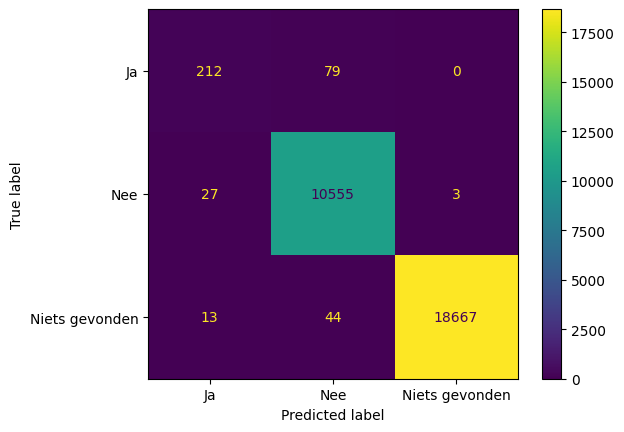

                precision    recall  f1-score   support

            Ja       0.84      0.73      0.78       291
           Nee       0.99      1.00      0.99     10585
Niets gevonden       1.00      1.00      1.00     18724

      accuracy                           0.99     29600
     macro avg       0.94      0.91      0.92     29600
  weighted avg       0.99      0.99      0.99     29600



In [17]:
# Ngram 2 No stopwords
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,2), lowercase=True, token_pattern=r"(?u)\b\w\w+\b|\+|\-")),
    ('clf', SGDClassifier(early_stopping=True, n_iter_no_change=5, validation_fraction = 0.25, verbose=3)),
])
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=parameter_grid, random_state=500, verbose=3, scoring='f1_macro')
random_search.fit(X_train, y_train)  
predicted_nb = random_search.predict(X_test)
print(np.mean(predicted_nb == y_test))
cm = confusion_matrix(y_test, predicted_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=random_search.classes_)
disp.plot()

plt.show()
print(metrics.classification_report(y_test, predicted_nb,
    target_names=random_search.classes_))

# BEST MODEL

In [18]:
# RESET CORPUS
Corpus = Corpus_backup.copy()
X_train, X_test, y_train, y_test = train_test_split(Corpus['text'], Corpus['label'], test_size=0.2, random_state=50)

In [19]:
parameter_grid = {'clf__loss':              ['hinge', 'log_loss', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
                  'clf__penalty':           ['l2', 'l1'],
                  'clf__l1_ratio':          sp_randFloat(),
                  'clf__fit_intercept':     [True, False],
                  'clf__max_iter':          [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)],
                  'clf__tol':               sp_randFloat(),
                  'clf__shuffle':           [True, False],
                  'clf__epsilon':           sp_randFloat(),
                  'clf__learning_rate':     ['constant', 'optimal', 'invscaling', 'adaptive'],
                  'clf__eta0':              sp_randFloat(),
                  'clf__power_t':           sp_randFloat(),
                  'clf__class_weight':      ['balanced', None],
                  'clf__warm_start':        [True, False],
                  'clf__average':           [True, False],
                  'tfidf__max_df':          [0.90, 0.95],
                  'tfidf__min_df':          [3, 5]
                 }

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 81.87, NNZs: 237, Bias: 0.000000, T: 71040, Avg. loss: 0.073754
Total training time: 0.65 seconds.
-- Epoch 2
Norm: 110.44, NNZs: 92, Bias: 0.000000, T: 142080, Avg. loss: 0.051441
Total training time: 1.29 seconds.
-- Epoch 3
Norm: 132.25, NNZs: 73, Bias: 0.000000, T: 213120, Avg. loss: 0.045439
Total training time: 1.92 seconds.
-- Epoch 4
Norm: 150.58, NNZs: 57, Bias: 0.000000, T: 284160, Avg. loss: 0.042279
Total training time: 2.56 seconds.
-- Epoch 5
Norm: 166.53, NNZs: 52, Bias: 0.000000, T: 355200, Avg. loss: 0.040028
Total training time: 3.17 seconds.
-- Epoch 6
Norm: 180.96, NNZs: 47, Bias: 0.000000, T: 426240, Avg. loss: 0.038428
Total training time: 3.79 seconds.
-- Epoch 7
Norm: 183.54, NNZs: 48, Bias: 0.000000, T: 497280, Avg. loss: 0.037676
Total training time: 4.41 seconds.
-- Epoch 8
Norm: 186.19, NNZs: 47, Bias: 0.000000, T: 568320, Avg. loss: 0.037466
Total training time: 5.05 seconds.
-- Epoch 9
Norm: 188.78, NNZs: 47, Bias: 0.000000, T: 639360, Avg

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.9s remaining:    0.0s


Norm: 121.89, NNZs: 426, Bias: 0.000000, T: 71040, Avg. loss: 0.203534
Total training time: 0.67 seconds.
-- Epoch 2
Norm: 167.07, NNZs: 194, Bias: 0.000000, T: 142080, Avg. loss: 0.143387
Total training time: 1.29 seconds.
-- Epoch 3
Norm: 201.15, NNZs: 152, Bias: 0.000000, T: 213120, Avg. loss: 0.127235
Total training time: 1.98 seconds.
-- Epoch 4
Norm: 229.61, NNZs: 134, Bias: 0.000000, T: 284160, Avg. loss: 0.118052
Total training time: 2.60 seconds.
-- Epoch 5
Norm: 254.51, NNZs: 123, Bias: 0.000000, T: 355200, Avg. loss: 0.111964
Total training time: 3.23 seconds.
-- Epoch 6
Norm: 276.91, NNZs: 113, Bias: 0.000000, T: 426240, Avg. loss: 0.107439
Total training time: 3.93 seconds.
-- Epoch 7
Norm: 280.95, NNZs: 113, Bias: 0.000000, T: 497280, Avg. loss: 0.104986
Total training time: 4.59 seconds.
-- Epoch 8
Norm: 284.91, NNZs: 111, Bias: 0.000000, T: 568320, Avg. loss: 0.104312
Total training time: 5.24 seconds.
-- Epoch 9
Norm: 288.82, NNZs: 110, Bias: 0.000000, T: 639360, Avg. 

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   25.5s remaining:    0.0s


Norm: 122.38, NNZs: 432, Bias: 0.000000, T: 71040, Avg. loss: 0.173837
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 165.56, NNZs: 190, Bias: 0.000000, T: 142080, Avg. loss: 0.119400
Total training time: 1.03 seconds.
-- Epoch 3
Norm: 198.02, NNZs: 151, Bias: 0.000000, T: 213120, Avg. loss: 0.106317
Total training time: 1.57 seconds.
-- Epoch 4
Norm: 225.32, NNZs: 141, Bias: 0.000000, T: 284160, Avg. loss: 0.099085
Total training time: 2.11 seconds.
-- Epoch 5
Norm: 249.34, NNZs: 126, Bias: 0.000000, T: 355200, Avg. loss: 0.094198
Total training time: 2.68 seconds.
-- Epoch 6
Norm: 270.97, NNZs: 113, Bias: 0.000000, T: 426240, Avg. loss: 0.090142
Total training time: 3.24 seconds.
-- Epoch 7
Norm: 274.89, NNZs: 112, Bias: 0.000000, T: 497280, Avg. loss: 0.087934
Total training time: 3.81 seconds.
-- Epoch 8
Norm: 278.75, NNZs: 112, Bias: 0.000000, T: 568320, Avg. loss: 0.087385
Total training time: 4.37 seconds.
-- Epoch 9
Norm: 282.56, NNZs: 112, Bias: 0.000000, T: 639360, Avg. 

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   36.8s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.083 total time= 2.5min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 82.09, NNZs: 255, Bias: 0.000000, T: 71040, Avg. loss: 0.073201
Total training time: 0.63 seconds.
-- Epoch 2
Norm: 110.68, NNZs: 89, Bias: 0.000000, T: 142080, Avg. loss: 0.050421
Total training time: 1.24 seconds.
-- Epoch 3
Norm: 132.74, NNZs: 68, Bias: 0.000000, T: 213120, Avg. loss: 0.044490
Total training time: 1.90 seconds.
-- Epoch 4
Norm: 150.92, NNZs: 57, Bias: 0.000000, T: 284160, Avg. loss: 0.041065
Total training time: 2.50 seconds.
-- Epoch 5
Norm: 166.98, NNZs: 53, Bias: 0.000000, T: 355200, Avg. loss: 0.038992
Total training time: 3.09 seconds.
-- Epoch 6
Norm: 181.43, NNZs: 49, Bias: 0.000000, T: 426240, Avg. loss: 0.037570
Total training time: 3.70 seconds.
-- Epoch 7
Norm: 184.09, NNZs: 49, Bias: 0.000000, T: 497280, Avg. loss: 0.036628
Total training time: 4.31 seconds.
-- Epoch 8
Norm: 186.71, NNZs: 49, Bias: 0.000000, T: 568320, Avg. loss: 0.036346
Total training time: 4.91 seconds.
-- Epoch 9
Norm: 189.28, NNZs: 48, Bias: 0.000000, T: 639360, Avg

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.6s remaining:    0.0s


Norm: 122.26, NNZs: 426, Bias: 0.000000, T: 71040, Avg. loss: 0.203292
Total training time: 0.58 seconds.
-- Epoch 2
Norm: 167.18, NNZs: 192, Bias: 0.000000, T: 142080, Avg. loss: 0.143078
Total training time: 1.18 seconds.
-- Epoch 3
Norm: 201.25, NNZs: 153, Bias: 0.000000, T: 213120, Avg. loss: 0.126742
Total training time: 1.77 seconds.
-- Epoch 4
Norm: 229.78, NNZs: 134, Bias: 0.000000, T: 284160, Avg. loss: 0.117592
Total training time: 2.35 seconds.
-- Epoch 5
Norm: 254.80, NNZs: 120, Bias: 0.000000, T: 355200, Avg. loss: 0.111409
Total training time: 2.97 seconds.
-- Epoch 6
Norm: 277.18, NNZs: 111, Bias: 0.000000, T: 426240, Avg. loss: 0.106655
Total training time: 3.59 seconds.
-- Epoch 7
Norm: 281.24, NNZs: 107, Bias: 0.000000, T: 497280, Avg. loss: 0.104488
Total training time: 4.22 seconds.
-- Epoch 8
Norm: 285.22, NNZs: 106, Bias: 0.000000, T: 568320, Avg. loss: 0.103682
Total training time: 4.82 seconds.
-- Epoch 9
Norm: 289.14, NNZs: 105, Bias: 0.000000, T: 639360, Avg. 

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   24.9s remaining:    0.0s


Norm: 122.15, NNZs: 447, Bias: 0.000000, T: 71040, Avg. loss: 0.174306
Total training time: 0.51 seconds.
-- Epoch 2
Norm: 165.22, NNZs: 184, Bias: 0.000000, T: 142080, Avg. loss: 0.120158
Total training time: 1.07 seconds.
-- Epoch 3
Norm: 197.68, NNZs: 155, Bias: 0.000000, T: 213120, Avg. loss: 0.106987
Total training time: 1.68 seconds.
-- Epoch 4
Norm: 224.89, NNZs: 139, Bias: 0.000000, T: 284160, Avg. loss: 0.099544
Total training time: 2.26 seconds.
-- Epoch 5
Norm: 248.86, NNZs: 128, Bias: 0.000000, T: 355200, Avg. loss: 0.094480
Total training time: 2.80 seconds.
-- Epoch 6
Norm: 270.54, NNZs: 114, Bias: 0.000000, T: 426240, Avg. loss: 0.090772
Total training time: 3.37 seconds.
-- Epoch 7
Norm: 274.46, NNZs: 111, Bias: 0.000000, T: 497280, Avg. loss: 0.088428
Total training time: 3.95 seconds.
-- Epoch 8
Norm: 278.32, NNZs: 109, Bias: 0.000000, T: 568320, Avg. loss: 0.087786
Total training time: 4.55 seconds.
-- Epoch 9
Norm: 282.11, NNZs: 107, Bias: 0.000000, T: 639360, Avg. 

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   36.5s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.084 total time= 1.7min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 81.65, NNZs: 242, Bias: 0.000000, T: 71040, Avg. loss: 0.073955
Total training time: 0.53 seconds.
-- Epoch 2
Norm: 110.53, NNZs: 92, Bias: 0.000000, T: 142080, Avg. loss: 0.050820
Total training time: 1.09 seconds.
-- Epoch 3
Norm: 132.54, NNZs: 70, Bias: 0.000000, T: 213120, Avg. loss: 0.044824
Total training time: 1.68 seconds.
-- Epoch 4
Norm: 150.85, NNZs: 58, Bias: 0.000000, T: 284160, Avg. loss: 0.041327
Total training time: 2.23 seconds.
-- Epoch 5
Norm: 166.85, NNZs: 50, Bias: 0.000000, T: 355200, Avg. loss: 0.039388
Total training time: 2.78 seconds.
-- Epoch 6
Norm: 181.21, NNZs: 48, Bias: 0.000000, T: 426240, Avg. loss: 0.037704
Total training time: 3.34 seconds.
-- Epoch 7
Norm: 183.93, NNZs: 48, Bias: 0.000000, T: 497280, Avg. loss: 0.037051
Total training time: 3.92 seconds.
-- Epoch 8
Norm: 186.55, NNZs: 48, Bias: 0.000000, T: 568320, Avg. loss: 0.036782
Total training time: 4.51 seconds.
-- Epoch 9
Norm: 189.11, NNZs: 48, Bias: 0.000000, T: 639360, Avg

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.9s remaining:    0.0s


Norm: 122.16, NNZs: 446, Bias: 0.000000, T: 71040, Avg. loss: 0.205180
Total training time: 0.58 seconds.
-- Epoch 2
Norm: 167.31, NNZs: 190, Bias: 0.000000, T: 142080, Avg. loss: 0.144733
Total training time: 1.20 seconds.
-- Epoch 3
Norm: 201.30, NNZs: 154, Bias: 0.000000, T: 213120, Avg. loss: 0.128487
Total training time: 1.84 seconds.
-- Epoch 4
Norm: 229.81, NNZs: 132, Bias: 0.000000, T: 284160, Avg. loss: 0.119178
Total training time: 2.43 seconds.
-- Epoch 5
Norm: 254.73, NNZs: 120, Bias: 0.000000, T: 355200, Avg. loss: 0.113090
Total training time: 3.05 seconds.
-- Epoch 6
Norm: 277.14, NNZs: 107, Bias: 0.000000, T: 426240, Avg. loss: 0.108671
Total training time: 3.65 seconds.
-- Epoch 7
Norm: 281.19, NNZs: 107, Bias: 0.000000, T: 497280, Avg. loss: 0.106136
Total training time: 4.22 seconds.
-- Epoch 8
Norm: 285.16, NNZs: 107, Bias: 0.000000, T: 568320, Avg. loss: 0.105506
Total training time: 4.93 seconds.
-- Epoch 9
Norm: 289.08, NNZs: 106, Bias: 0.000000, T: 639360, Avg. 

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   23.6s remaining:    0.0s


Norm: 122.38, NNZs: 458, Bias: 0.000000, T: 71040, Avg. loss: 0.175075
Total training time: 0.54 seconds.
-- Epoch 2
Norm: 165.64, NNZs: 185, Bias: 0.000000, T: 142080, Avg. loss: 0.120347
Total training time: 1.19 seconds.
-- Epoch 3
Norm: 198.15, NNZs: 159, Bias: 0.000000, T: 213120, Avg. loss: 0.107256
Total training time: 1.77 seconds.
-- Epoch 4
Norm: 225.37, NNZs: 142, Bias: 0.000000, T: 284160, Avg. loss: 0.099785
Total training time: 2.34 seconds.
-- Epoch 5
Norm: 249.39, NNZs: 123, Bias: 0.000000, T: 355200, Avg. loss: 0.094962
Total training time: 2.90 seconds.
-- Epoch 6
Norm: 270.99, NNZs: 109, Bias: 0.000000, T: 426240, Avg. loss: 0.090857
Total training time: 3.46 seconds.
-- Epoch 7
Norm: 274.91, NNZs: 108, Bias: 0.000000, T: 497280, Avg. loss: 0.088778
Total training time: 4.03 seconds.
-- Epoch 8
Norm: 278.77, NNZs: 108, Bias: 0.000000, T: 568320, Avg. loss: 0.088124
Total training time: 4.58 seconds.
-- Epoch 9
Norm: 282.57, NNZs: 106, Bias: 0.000000, T: 639360, Avg. 

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   34.6s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.083 total time= 1.6min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 81.43, NNZs: 256, Bias: 0.000000, T: 71040, Avg. loss: 0.073932
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 110.27, NNZs: 91, Bias: 0.000000, T: 142080, Avg. loss: 0.051074
Total training time: 0.92 seconds.
-- Epoch 3
Norm: 132.09, NNZs: 70, Bias: 0.000000, T: 213120, Avg. loss: 0.044926
Total training time: 1.41 seconds.
-- Epoch 4
Norm: 150.44, NNZs: 58, Bias: 0.000000, T: 284160, Avg. loss: 0.041717
Total training time: 1.90 seconds.
-- Epoch 5
Norm: 166.44, NNZs: 53, Bias: 0.000000, T: 355200, Avg. loss: 0.039561
Total training time: 2.40 seconds.
-- Epoch 6
Norm: 180.97, NNZs: 48, Bias: 0.000000, T: 426240, Avg. loss: 0.037932
Total training time: 2.89 seconds.
-- Epoch 7
Norm: 183.61, NNZs: 48, Bias: 0.000000, T: 497280, Avg. loss: 0.037229
Total training time: 3.37 seconds.
-- Epoch 8
Norm: 186.24, NNZs: 48, Bias: 0.000000, T: 568320, Avg. loss: 0.036944
Total training time: 3.87 seconds.
-- Epoch 9
Norm: 188.82, NNZs: 48, Bias: 0.000000, T: 639360, Avg

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.9s remaining:    0.0s


Norm: 121.98, NNZs: 450, Bias: 0.000000, T: 71040, Avg. loss: 0.204204
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 167.19, NNZs: 193, Bias: 0.000000, T: 142080, Avg. loss: 0.144142
Total training time: 0.92 seconds.
-- Epoch 3
Norm: 201.19, NNZs: 148, Bias: 0.000000, T: 213120, Avg. loss: 0.127893
Total training time: 1.38 seconds.
-- Epoch 4
Norm: 229.64, NNZs: 134, Bias: 0.000000, T: 284160, Avg. loss: 0.119102
Total training time: 1.84 seconds.
-- Epoch 5
Norm: 254.49, NNZs: 121, Bias: 0.000000, T: 355200, Avg. loss: 0.112759
Total training time: 2.33 seconds.
-- Epoch 6
Norm: 276.86, NNZs: 109, Bias: 0.000000, T: 426240, Avg. loss: 0.108246
Total training time: 2.86 seconds.
-- Epoch 7
Norm: 280.88, NNZs: 109, Bias: 0.000000, T: 497280, Avg. loss: 0.106069
Total training time: 3.35 seconds.
-- Epoch 8
Norm: 284.85, NNZs: 108, Bias: 0.000000, T: 568320, Avg. loss: 0.105318
Total training time: 3.84 seconds.
-- Epoch 9
Norm: 288.76, NNZs: 108, Bias: 0.000000, T: 639360, Avg. 

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   20.1s remaining:    0.0s


Norm: 122.35, NNZs: 477, Bias: 0.000000, T: 71040, Avg. loss: 0.174217
Total training time: 0.57 seconds.
-- Epoch 2
Norm: 165.65, NNZs: 189, Bias: 0.000000, T: 142080, Avg. loss: 0.119883
Total training time: 1.07 seconds.
-- Epoch 3
Norm: 198.23, NNZs: 153, Bias: 0.000000, T: 213120, Avg. loss: 0.106733
Total training time: 1.59 seconds.
-- Epoch 4
Norm: 225.50, NNZs: 137, Bias: 0.000000, T: 284160, Avg. loss: 0.099123
Total training time: 2.09 seconds.
-- Epoch 5
Norm: 249.47, NNZs: 123, Bias: 0.000000, T: 355200, Avg. loss: 0.094078
Total training time: 2.60 seconds.
-- Epoch 6
Norm: 271.08, NNZs: 111, Bias: 0.000000, T: 426240, Avg. loss: 0.090267
Total training time: 3.10 seconds.
-- Epoch 7
Norm: 275.02, NNZs: 110, Bias: 0.000000, T: 497280, Avg. loss: 0.088197
Total training time: 3.60 seconds.
-- Epoch 8
Norm: 278.88, NNZs: 108, Bias: 0.000000, T: 568320, Avg. loss: 0.087482
Total training time: 4.10 seconds.
-- Epoch 9
Norm: 282.68, NNZs: 105, Bias: 0.000000, T: 639360, Avg. 

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   30.4s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.082 total time= 1.6min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 82.05, NNZs: 246, Bias: 0.000000, T: 71040, Avg. loss: 0.073660
Total training time: 0.56 seconds.
-- Epoch 2
Norm: 111.06, NNZs: 94, Bias: 0.000000, T: 142080, Avg. loss: 0.051048
Total training time: 1.09 seconds.
-- Epoch 3
Norm: 132.99, NNZs: 73, Bias: 0.000000, T: 213120, Avg. loss: 0.044575
Total training time: 1.61 seconds.
-- Epoch 4
Norm: 151.39, NNZs: 60, Bias: 0.000000, T: 284160, Avg. loss: 0.041348
Total training time: 2.12 seconds.
-- Epoch 5
Norm: 167.42, NNZs: 54, Bias: 0.000000, T: 355200, Avg. loss: 0.039200
Total training time: 2.59 seconds.
-- Epoch 6
Norm: 181.98, NNZs: 51, Bias: 0.000000, T: 426240, Avg. loss: 0.037694
Total training time: 3.08 seconds.
-- Epoch 7
Norm: 184.64, NNZs: 50, Bias: 0.000000, T: 497280, Avg. loss: 0.036813
Total training time: 3.57 seconds.
-- Epoch 8
Norm: 187.28, NNZs: 50, Bias: 0.000000, T: 568320, Avg. loss: 0.036601
Total training time: 4.07 seconds.
-- Epoch 9
Norm: 189.83, NNZs: 50, Bias: 0.000000, T: 639360, Avg

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.2s remaining:    0.0s


Norm: 121.93, NNZs: 447, Bias: 0.000000, T: 71040, Avg. loss: 0.204819
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 167.14, NNZs: 189, Bias: 0.000000, T: 142080, Avg. loss: 0.143490
Total training time: 0.96 seconds.
-- Epoch 3
Norm: 201.45, NNZs: 152, Bias: 0.000000, T: 213120, Avg. loss: 0.127318
Total training time: 1.43 seconds.
-- Epoch 4
Norm: 230.03, NNZs: 134, Bias: 0.000000, T: 284160, Avg. loss: 0.118165
Total training time: 1.91 seconds.
-- Epoch 5
Norm: 255.03, NNZs: 120, Bias: 0.000000, T: 355200, Avg. loss: 0.111736
Total training time: 2.38 seconds.
-- Epoch 6
Norm: 277.48, NNZs: 110, Bias: 0.000000, T: 426240, Avg. loss: 0.107092
Total training time: 2.84 seconds.
-- Epoch 7
Norm: 281.52, NNZs: 108, Bias: 0.000000, T: 497280, Avg. loss: 0.104682
Total training time: 3.33 seconds.
-- Epoch 8
Norm: 285.50, NNZs: 108, Bias: 0.000000, T: 568320, Avg. loss: 0.104074
Total training time: 3.78 seconds.
-- Epoch 9
Norm: 289.41, NNZs: 105, Bias: 0.000000, T: 639360, Avg. 

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   19.9s remaining:    0.0s


Norm: 122.25, NNZs: 465, Bias: 0.000000, T: 71040, Avg. loss: 0.175138
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 165.57, NNZs: 184, Bias: 0.000000, T: 142080, Avg. loss: 0.120363
Total training time: 0.98 seconds.
-- Epoch 3
Norm: 198.10, NNZs: 156, Bias: 0.000000, T: 213120, Avg. loss: 0.106924
Total training time: 1.52 seconds.
-- Epoch 4
Norm: 225.42, NNZs: 139, Bias: 0.000000, T: 284160, Avg. loss: 0.099579
Total training time: 2.01 seconds.
-- Epoch 5
Norm: 249.46, NNZs: 124, Bias: 0.000000, T: 355200, Avg. loss: 0.094508
Total training time: 2.53 seconds.
-- Epoch 6
Norm: 271.11, NNZs: 110, Bias: 0.000000, T: 426240, Avg. loss: 0.090510
Total training time: 3.04 seconds.
-- Epoch 7
Norm: 275.03, NNZs: 107, Bias: 0.000000, T: 497280, Avg. loss: 0.088323
Total training time: 3.55 seconds.
-- Epoch 8
Norm: 278.89, NNZs: 106, Bias: 0.000000, T: 568320, Avg. loss: 0.087698
Total training time: 4.06 seconds.
-- Epoch 9
Norm: 282.69, NNZs: 105, Bias: 0.000000, T: 639360, Avg. 

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   30.1s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.083 total time= 1.5min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 125054586224319.38, NNZs: 444634, Bias: 0.000000, T: 71040, Avg. loss: 147977828198292540882944.000000
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 118389998337817.45, NNZs: 444634, Bias: 0.000000, T: 142080, Avg. loss: 132829433269639991787520.000000
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 114970711427008.72, NNZs: 444634, Bias: 0.000000, T: 213120, Avg. loss: 111180922325337773178880.000000
Total training time: 1.26 seconds.
-- Epoch 4
Norm: 112717490768898.83, NNZs: 444634, Bias: 0.000000, T: 284160, Avg. loss: 100984943442747222654976.000000
Total training time: 1.67 seconds.
-- Epoch 5
Norm: 111050015346464.73, NNZs: 444634, Bias: 0.000000, T: 355200, Avg. loss: 94719970368314488651776.000000
Total training time: 2.09 seconds.
-- Epoch 6
Norm: 109735538307340.67, NNZs: 444634, Bias: 0.000000, T: 426240, Avg. loss: 90209846295448151654400.000000
Total training time: 2.52 seconds.
Convergence after 6 epochs took 2.56 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


Norm: 116766545476946.44, NNZs: 444634, Bias: 0.000000, T: 71040, Avg. loss: 126822662163804245196800.000000
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 110344403116791.97, NNZs: 444634, Bias: 0.000000, T: 142080, Avg. loss: 114686503576219536064512.000000
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 107042875845475.27, NNZs: 444634, Bias: 0.000000, T: 213120, Avg. loss: 95506030411364916264960.000000
Total training time: 1.24 seconds.
-- Epoch 4
Norm: 104869001282236.97, NNZs: 444634, Bias: 0.000000, T: 284160, Avg. loss: 86560979624000755859456.000000
Total training time: 1.65 seconds.
-- Epoch 5
Norm: 103256815291278.94, NNZs: 444634, Bias: 0.000000, T: 355200, Avg. loss: 81037122130994008162304.000000
Total training time: 2.06 seconds.
-- Epoch 6
Norm: 101986606660439.67, NNZs: 444634, Bias: 0.000000, T: 426240, Avg. loss: 77120960777179442970624.000000
Total training time: 2.47 seconds.
Convergence after 6 epochs took 2.51 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.1s remaining:    0.0s


Norm: 103798071697055.02, NNZs: 444631, Bias: 0.000000, T: 71040, Avg. loss: 96661356800402769575936.000000
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 97720828860305.05, NNZs: 444634, Bias: 0.000000, T: 142080, Avg. loss: 89576217700599563550720.000000
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 94616896416313.33, NNZs: 444634, Bias: 0.000000, T: 213120, Avg. loss: 73957085353044510507008.000000
Total training time: 1.25 seconds.
-- Epoch 4
Norm: 92558312123949.39, NNZs: 444634, Bias: 0.000000, T: 284160, Avg. loss: 66719760421368774000640.000000
Total training time: 1.66 seconds.
-- Epoch 5
Norm: 91036177214533.95, NNZs: 444634, Bias: 0.000000, T: 355200, Avg. loss: 62243844205725735714816.000000
Total training time: 2.08 seconds.
-- Epoch 6
Norm: 89834489474710.39, NNZs: 444634, Bias: 0.000000, T: 426240, Avg. loss: 59080720183711196250112.000000
Total training time: 2.50 seconds.
Convergence after 6 epochs took 2.54 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.7s finished


[CV 1/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.260 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 96857984604720.31, NNZs: 444593, Bias: 0.000000, T: 71040, Avg. loss: 85771732778524447080448.000000
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 90970188886227.28, NNZs: 444596, Bias: 0.000000, T: 142080, Avg. loss: 76790723830742779953152.000000
Total training time: 0.91 seconds.
-- Epoch 3
Norm: 87939094364581.09, NNZs: 444596, Bias: 0.000000, T: 213120, Avg. loss: 63006672298771501547520.000000
Total training time: 1.35 seconds.
-- Epoch 4
Norm: 85933575724548.03, NNZs: 444596, Bias: 0.000000, T: 284160, Avg. loss: 56613992773798116458496.000000
Total training time: 1.78 seconds.
-- Epoch 5
Norm: 84449202159996.36, NNZs: 444596, Bias: 0.000000, T: 355200, Avg. loss: 52690099311245084590080.000000
Total training time: 2.21 seconds.
-- Epoch 6
Norm: 83278034765010.70, NNZs: 444596, Bias: 0.000000, T: 426240, Avg. loss: 49874008911594364338176.000000
Total training time: 2.63 seconds.
Convergence after 6 epochs took 2.67 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


Norm: 126965803578667.77, NNZs: 444596, Bias: 0.000000, T: 71040, Avg. loss: 150791738862427168571392.000000
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 120239893004568.53, NNZs: 444596, Bias: 0.000000, T: 142080, Avg. loss: 137387141297995448844288.000000
Total training time: 0.80 seconds.
-- Epoch 3
Norm: 116822988560541.09, NNZs: 444596, Bias: 0.000000, T: 213120, Avg. loss: 115101607958374405636096.000000
Total training time: 1.22 seconds.
-- Epoch 4
Norm: 114560447328319.83, NNZs: 444596, Bias: 0.000000, T: 284160, Avg. loss: 104743117621531546484736.000000
Total training time: 1.64 seconds.
-- Epoch 5
Norm: 112885774750755.16, NNZs: 444596, Bias: 0.000000, T: 355200, Avg. loss: 98293359718920414560256.000000
Total training time: 2.05 seconds.
-- Epoch 6
Norm: 111567647905828.44, NNZs: 444596, Bias: 0.000000, T: 426240, Avg. loss: 93702423835715905257472.000000
Total training time: 2.47 seconds.
Convergence after 6 epochs took 2.52 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.2s remaining:    0.0s


Norm: 85856143696913.11, NNZs: 444590, Bias: 0.000000, T: 71040, Avg. loss: 66090001556582778798080.000000
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 80337579108502.48, NNZs: 444596, Bias: 0.000000, T: 142080, Avg. loss: 59213488308045691748352.000000
Total training time: 0.81 seconds.
-- Epoch 3
Norm: 77516401184395.34, NNZs: 444596, Bias: 0.000000, T: 213120, Avg. loss: 48022920014032564912128.000000
Total training time: 1.28 seconds.
-- Epoch 4
Norm: 75644149557999.36, NNZs: 444596, Bias: 0.000000, T: 284160, Avg. loss: 42933985099554062598144.000000
Total training time: 1.73 seconds.
-- Epoch 5
Norm: 74258760225529.83, NNZs: 444596, Bias: 0.000000, T: 355200, Avg. loss: 39817094323284807254016.000000
Total training time: 2.19 seconds.
-- Epoch 6
Norm: 73164464882625.16, NNZs: 444596, Bias: 0.000000, T: 426240, Avg. loss: 37580981978523404075008.000000
Total training time: 2.64 seconds.
Convergence after 6 epochs took 2.68 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.0s finished


[CV 2/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.260 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 120211673228704.41, NNZs: 443022, Bias: 0.000000, T: 71040, Avg. loss: 138319999470401906278400.000000
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 113672400940500.30, NNZs: 443022, Bias: 0.000000, T: 142080, Avg. loss: 120846816816149345337344.000000
Total training time: 0.82 seconds.
-- Epoch 3
Norm: 110318055730337.28, NNZs: 443022, Bias: 0.000000, T: 213120, Avg. loss: 100699080745653842739200.000000
Total training time: 1.25 seconds.
-- Epoch 4
Norm: 108109312286683.08, NNZs: 443022, Bias: 0.000000, T: 284160, Avg. loss: 91295521538838626304000.000000
Total training time: 1.67 seconds.
-- Epoch 5
Norm: 106476235173635.52, NNZs: 443022, Bias: 0.000000, T: 355200, Avg. loss: 85493702232055941693440.000000
Total training time: 2.09 seconds.
-- Epoch 6
Norm: 105188302968850.77, NNZs: 443022, Bias: 0.000000, T: 426240, Avg. loss: 81397052292614225657856.000000
Total training time: 2.52 seconds.
Convergence after 6 epochs took 2.56 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


Norm: 115611738820498.75, NNZs: 443021, Bias: 0.000000, T: 71040, Avg. loss: 122425053307977485778944.000000
Total training time: 0.37 seconds.
-- Epoch 2
Norm: 109233705125806.88, NNZs: 443022, Bias: 0.000000, T: 142080, Avg. loss: 111425310110570732584960.000000
Total training time: 0.78 seconds.
-- Epoch 3
Norm: 105949589893723.05, NNZs: 443022, Bias: 0.000000, T: 213120, Avg. loss: 93014090239397578407936.000000
Total training time: 1.19 seconds.
-- Epoch 4
Norm: 103779586223522.97, NNZs: 443022, Bias: 0.000000, T: 284160, Avg. loss: 84283826102840282054656.000000
Total training time: 1.60 seconds.
-- Epoch 5
Norm: 102175266622417.06, NNZs: 443022, Bias: 0.000000, T: 355200, Avg. loss: 78838938943878430982144.000000
Total training time: 2.06 seconds.
-- Epoch 6
Norm: 100908676335794.33, NNZs: 443022, Bias: 0.000000, T: 426240, Avg. loss: 75026559112154372374528.000000
Total training time: 2.48 seconds.
Convergence after 6 epochs took 2.53 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.1s remaining:    0.0s


Norm: 133813319236925.86, NNZs: 443022, Bias: 0.000000, T: 71040, Avg. loss: 168428533345804905086976.000000
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 126822266141789.75, NNZs: 443022, Bias: 0.000000, T: 142080, Avg. loss: 154426697848084928397312.000000
Total training time: 0.82 seconds.
-- Epoch 3
Norm: 123262110292056.98, NNZs: 443022, Bias: 0.000000, T: 213120, Avg. loss: 129587743537029556731904.000000
Total training time: 1.24 seconds.
-- Epoch 4
Norm: 120915258804809.05, NNZs: 443022, Bias: 0.000000, T: 284160, Avg. loss: 117918169034965718663168.000000
Total training time: 1.66 seconds.
-- Epoch 5
Norm: 119178768444222.97, NNZs: 443022, Bias: 0.000000, T: 355200, Avg. loss: 110700724562079894208512.000000
Total training time: 2.07 seconds.
-- Epoch 6
Norm: 117810389927874.31, NNZs: 443022, Bias: 0.000000, T: 426240, Avg. loss: 105620386268361147809792.000000
Total training time: 2.49 seconds.
Convergence after 6 epochs took 2.53 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.7s finished


[CV 3/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.269 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 37.79, NNZs: 42, Bias: 0.000000, T: 71040, Avg. loss: 0.001424
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 38.30, NNZs: 42, Bias: 0.000000, T: 142080, Avg. loss: 0.001259
Total training time: 0.51 seconds.
-- Epoch 3
Norm: 38.59, NNZs: 42, Bias: 0.000000, T: 213120, Avg. loss: 0.001243
Total training time: 0.76 seconds.
-- Epoch 4
Norm: 38.79, NNZs: 42, Bias: 0.000000, T: 284160, Avg. loss: 0.001237
Total training time: 1.03 seconds.
-- Epoch 5
Norm: 38.95, NNZs: 42, Bias: 0.000000, T: 355200, Avg. loss: 0.001232
Total training time: 1.32 seconds.
-- Epoch 6
Norm: 39.07, NNZs: 42, Bias: 0.000000, T: 426240, Avg. loss: 0.001225
Total training time: 1.60 seconds.
Convergence after 6 epochs took 1.64 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


Norm: 132300600036312.31, NNZs: 443495, Bias: 0.000000, T: 71040, Avg. loss: 165687666382527824658432.000000
Total training time: 0.37 seconds.
-- Epoch 2
Norm: 125441107408384.84, NNZs: 443496, Bias: 0.000000, T: 142080, Avg. loss: 149728894851233548861440.000000
Total training time: 0.77 seconds.
-- Epoch 3
Norm: 121943333072596.39, NNZs: 443496, Bias: 0.000000, T: 213120, Avg. loss: 125647942030146052030464.000000
Total training time: 1.19 seconds.
-- Epoch 4
Norm: 119639352443410.80, NNZs: 443496, Bias: 0.000000, T: 284160, Avg. loss: 114470422687839179243520.000000
Total training time: 1.60 seconds.
-- Epoch 5
Norm: 117937969865483.62, NNZs: 443496, Bias: 0.000000, T: 355200, Avg. loss: 107459186933898739187712.000000
Total training time: 2.00 seconds.
-- Epoch 6
Norm: 116597280274641.39, NNZs: 443496, Bias: 0.000000, T: 426240, Avg. loss: 102522850281601665859584.000000
Total training time: 2.42 seconds.
Convergence after 6 epochs took 2.46 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.1s remaining:    0.0s


Norm: 125502804017909.17, NNZs: 443496, Bias: 0.000000, T: 71040, Avg. loss: 148618600338195470090240.000000
Total training time: 0.37 seconds.
-- Epoch 2
Norm: 118740152918476.30, NNZs: 443496, Bias: 0.000000, T: 142080, Avg. loss: 133890598429732190027776.000000
Total training time: 0.78 seconds.
-- Epoch 3
Norm: 115288371150438.59, NNZs: 443496, Bias: 0.000000, T: 213120, Avg. loss: 111638262478497562755072.000000
Total training time: 1.21 seconds.
-- Epoch 4
Norm: 113014071806375.72, NNZs: 443496, Bias: 0.000000, T: 284160, Avg. loss: 101376504530661198004224.000000
Total training time: 1.63 seconds.
-- Epoch 5
Norm: 111331026861120.80, NNZs: 443496, Bias: 0.000000, T: 355200, Avg. loss: 94998250249212248719360.000000
Total training time: 2.05 seconds.
-- Epoch 6
Norm: 110006926166174.17, NNZs: 443496, Bias: 0.000000, T: 426240, Avg. loss: 90434149928698894090240.000000
Total training time: 2.47 seconds.
Convergence after 6 epochs took 2.51 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.7s finished


[CV 4/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.278 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 133042361023643.67, NNZs: 441651, Bias: 0.000000, T: 71040, Avg. loss: 164059285103152874913792.000000
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 126210810666803.36, NNZs: 441652, Bias: 0.000000, T: 142080, Avg. loss: 151654232897190419759104.000000
Total training time: 0.82 seconds.
-- Epoch 3
Norm: 122708460005805.86, NNZs: 441652, Bias: 0.000000, T: 213120, Avg. loss: 127670049361109742256128.000000
Total training time: 1.25 seconds.
-- Epoch 4
Norm: 120406049338960.97, NNZs: 441652, Bias: 0.000000, T: 284160, Avg. loss: 116352961567615929548800.000000
Total training time: 1.68 seconds.
-- Epoch 5
Norm: 118703681583520.95, NNZs: 441652, Bias: 0.000000, T: 355200, Avg. loss: 109313111771817661431808.000000
Total training time: 2.12 seconds.
-- Epoch 6
Norm: 117361538450340.03, NNZs: 441652, Bias: 0.000000, T: 426240, Avg. loss: 104311761136443551907840.000000
Total training time: 2.55 seconds.
Convergence after 6 epochs took 2.59 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


Norm: 141957697147978.31, NNZs: 441652, Bias: 0.000000, T: 71040, Avg. loss: 190521682445753749864448.000000
Total training time: 0.37 seconds.
-- Epoch 2
Norm: 134937243865903.62, NNZs: 441652, Bias: 0.000000, T: 142080, Avg. loss: 173664660626850422194176.000000
Total training time: 0.78 seconds.
-- Epoch 3
Norm: 131355807695738.30, NNZs: 441652, Bias: 0.000000, T: 213120, Avg. loss: 146841703051829134229504.000000
Total training time: 1.19 seconds.
-- Epoch 4
Norm: 128994362907446.69, NNZs: 441652, Bias: 0.000000, T: 284160, Avg. loss: 134305991456678263914496.000000
Total training time: 1.61 seconds.
-- Epoch 5
Norm: 127252214901656.02, NNZs: 441652, Bias: 0.000000, T: 355200, Avg. loss: 126439986955610413334528.000000
Total training time: 2.00 seconds.
-- Epoch 6
Norm: 125879685381214.03, NNZs: 441652, Bias: 0.000000, T: 426240, Avg. loss: 120892426554410203611136.000000
Total training time: 2.42 seconds.
Convergence after 6 epochs took 2.46 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.1s remaining:    0.0s


Norm: 116531393432261.67, NNZs: 441650, Bias: 0.000000, T: 71040, Avg. loss: 128613442327792387620864.000000
Total training time: 0.37 seconds.
-- Epoch 2
Norm: 110076088100397.52, NNZs: 441652, Bias: 0.000000, T: 142080, Avg. loss: 113607923019848798437376.000000
Total training time: 0.78 seconds.
-- Epoch 3
Norm: 106774253159118.17, NNZs: 441652, Bias: 0.000000, T: 213120, Avg. loss: 94512795255589943902208.000000
Total training time: 1.19 seconds.
-- Epoch 4
Norm: 104584379300122.39, NNZs: 441652, Bias: 0.000000, T: 284160, Avg. loss: 85667340772330879057920.000000
Total training time: 1.60 seconds.
-- Epoch 5
Norm: 102963064796067.17, NNZs: 441652, Bias: 0.000000, T: 355200, Avg. loss: 80133753200094274912256.000000
Total training time: 2.02 seconds.
-- Epoch 6
Norm: 101685193084729.62, NNZs: 441652, Bias: 0.000000, T: 426240, Avg. loss: 76257455336805535580160.000000
Total training time: 2.43 seconds.
Convergence after 6 epochs took 2.47 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.6s finished


[CV 5/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.272 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 80.74, NNZs: 199, Bias: 0.000000, T: 71040, Avg. loss: 0.021086
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 106.22, NNZs: 103, Bias: 0.000000, T: 142080, Avg. loss: 0.013273
Total training time: 0.62 seconds.
-- Epoch 3
Norm: 125.10, NNZs: 86, Bias: 0.000000, T: 213120, Avg. loss: 0.011785
Total training time: 0.93 seconds.
-- Epoch 4
Norm: 140.70, NNZs: 85, Bias: 0.000000, T: 284160, Avg. loss: 0.011000
Total training time: 1.23 seconds.
-- Epoch 5
Norm: 154.19, NNZs: 84, Bias: 0.000000, T: 355200, Avg. loss: 0.010409
Total training time: 1.53 seconds.
-- Epoch 6
Norm: 166.43, NNZs: 73, Bias: 0.000000, T: 426240, Avg. loss: 0.010110
Total training time: 1.84 seconds.
Convergence after 6 epochs took 1.89 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


Norm: 152.63, NNZs: 634, Bias: 0.000000, T: 71040, Avg. loss: 0.085944
Total training time: 0.32 seconds.
-- Epoch 2
Norm: 198.52, NNZs: 227, Bias: 0.000000, T: 142080, Avg. loss: 0.049330
Total training time: 0.65 seconds.
-- Epoch 3
Norm: 231.80, NNZs: 198, Bias: 0.000000, T: 213120, Avg. loss: 0.041364
Total training time: 0.99 seconds.
-- Epoch 4
Norm: 259.31, NNZs: 177, Bias: 0.000000, T: 284160, Avg. loss: 0.036617
Total training time: 1.33 seconds.
-- Epoch 5
Norm: 282.83, NNZs: 172, Bias: 0.000000, T: 355200, Avg. loss: 0.034339
Total training time: 1.68 seconds.
-- Epoch 6
Norm: 303.83, NNZs: 166, Bias: 0.000000, T: 426240, Avg. loss: 0.031759
Total training time: 2.02 seconds.
Convergence after 6 epochs took 2.07 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.0s remaining:    0.0s


Norm: 140.40, NNZs: 514, Bias: 0.000000, T: 71040, Avg. loss: 0.066162
Total training time: 0.34 seconds.
-- Epoch 2
Norm: 181.43, NNZs: 194, Bias: 0.000000, T: 142080, Avg. loss: 0.035648
Total training time: 0.68 seconds.
-- Epoch 3
Norm: 211.27, NNZs: 168, Bias: 0.000000, T: 213120, Avg. loss: 0.029220
Total training time: 1.03 seconds.
-- Epoch 4
Norm: 235.38, NNZs: 138, Bias: 0.000000, T: 284160, Avg. loss: 0.025444
Total training time: 1.37 seconds.
-- Epoch 5
Norm: 255.99, NNZs: 131, Bias: 0.000000, T: 355200, Avg. loss: 0.022937
Total training time: 1.70 seconds.
-- Epoch 6
Norm: 274.18, NNZs: 130, Bias: 0.000000, T: 426240, Avg. loss: 0.021309
Total training time: 2.02 seconds.
Convergence after 6 epochs took 2.07 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.1s finished


[CV 1/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.983 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 80.51, NNZs: 189, Bias: 0.000000, T: 71040, Avg. loss: 0.020802
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 105.64, NNZs: 94, Bias: 0.000000, T: 142080, Avg. loss: 0.012809
Total training time: 0.60 seconds.
-- Epoch 3
Norm: 124.28, NNZs: 85, Bias: 0.000000, T: 213120, Avg. loss: 0.011304
Total training time: 0.97 seconds.
-- Epoch 4
Norm: 139.64, NNZs: 80, Bias: 0.000000, T: 284160, Avg. loss: 0.010460
Total training time: 1.34 seconds.
-- Epoch 5
Norm: 152.98, NNZs: 74, Bias: 0.000000, T: 355200, Avg. loss: 0.009913
Total training time: 1.67 seconds.
-- Epoch 6
Norm: 165.02, NNZs: 74, Bias: 0.000000, T: 426240, Avg. loss: 0.009788
Total training time: 1.98 seconds.
Convergence after 6 epochs took 2.03 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


Norm: 152.98, NNZs: 629, Bias: 0.000000, T: 71040, Avg. loss: 0.085934
Total training time: 0.33 seconds.
-- Epoch 2
Norm: 199.32, NNZs: 227, Bias: 0.000000, T: 142080, Avg. loss: 0.051826
Total training time: 0.70 seconds.
-- Epoch 3
Norm: 233.14, NNZs: 193, Bias: 0.000000, T: 213120, Avg. loss: 0.043349
Total training time: 1.06 seconds.
-- Epoch 4
Norm: 260.92, NNZs: 173, Bias: 0.000000, T: 284160, Avg. loss: 0.038643
Total training time: 1.41 seconds.
-- Epoch 5
Norm: 284.50, NNZs: 178, Bias: 0.000000, T: 355200, Avg. loss: 0.037180
Total training time: 1.76 seconds.
-- Epoch 6
Norm: 305.86, NNZs: 169, Bias: 0.000000, T: 426240, Avg. loss: 0.035316
Total training time: 2.12 seconds.
Convergence after 6 epochs took 2.16 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.2s remaining:    0.0s


Norm: 140.42, NNZs: 587, Bias: 0.000000, T: 71040, Avg. loss: 0.066284
Total training time: 0.33 seconds.
-- Epoch 2
Norm: 181.96, NNZs: 186, Bias: 0.000000, T: 142080, Avg. loss: 0.036605
Total training time: 0.67 seconds.
-- Epoch 3
Norm: 211.61, NNZs: 157, Bias: 0.000000, T: 213120, Avg. loss: 0.029220
Total training time: 1.01 seconds.
-- Epoch 4
Norm: 235.76, NNZs: 144, Bias: 0.000000, T: 284160, Avg. loss: 0.025505
Total training time: 1.36 seconds.
-- Epoch 5
Norm: 256.28, NNZs: 131, Bias: 0.000000, T: 355200, Avg. loss: 0.023051
Total training time: 1.70 seconds.
-- Epoch 6
Norm: 274.59, NNZs: 133, Bias: 0.000000, T: 426240, Avg. loss: 0.021670
Total training time: 2.04 seconds.
Convergence after 6 epochs took 2.08 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.4s finished


[CV 2/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.982 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 80.41, NNZs: 217, Bias: 0.000000, T: 71040, Avg. loss: 0.020307
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 105.23, NNZs: 101, Bias: 0.000000, T: 142080, Avg. loss: 0.012377
Total training time: 0.58 seconds.
-- Epoch 3
Norm: 123.86, NNZs: 89, Bias: 0.000000, T: 213120, Avg. loss: 0.011011
Total training time: 0.88 seconds.
-- Epoch 4
Norm: 139.18, NNZs: 83, Bias: 0.000000, T: 284160, Avg. loss: 0.010126
Total training time: 1.18 seconds.
-- Epoch 5
Norm: 152.36, NNZs: 75, Bias: 0.000000, T: 355200, Avg. loss: 0.009669
Total training time: 1.47 seconds.
-- Epoch 6
Norm: 164.23, NNZs: 73, Bias: 0.000000, T: 426240, Avg. loss: 0.009348
Total training time: 1.76 seconds.
Convergence after 6 epochs took 1.81 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


Norm: 152.59, NNZs: 644, Bias: 0.000000, T: 71040, Avg. loss: 0.087931
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 198.79, NNZs: 233, Bias: 0.000000, T: 142080, Avg. loss: 0.051506
Total training time: 0.66 seconds.
-- Epoch 3
Norm: 232.84, NNZs: 190, Bias: 0.000000, T: 213120, Avg. loss: 0.043429
Total training time: 0.99 seconds.
-- Epoch 4
Norm: 260.61, NNZs: 181, Bias: 0.000000, T: 284160, Avg. loss: 0.040066
Total training time: 1.32 seconds.
-- Epoch 5
Norm: 284.40, NNZs: 170, Bias: 0.000000, T: 355200, Avg. loss: 0.037570
Total training time: 1.66 seconds.
-- Epoch 6
Norm: 305.83, NNZs: 168, Bias: 0.000000, T: 426240, Avg. loss: 0.035043
Total training time: 2.00 seconds.
Convergence after 6 epochs took 2.04 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.9s remaining:    0.0s


Norm: 140.81, NNZs: 556, Bias: 0.000000, T: 71040, Avg. loss: 0.066729
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 182.17, NNZs: 196, Bias: 0.000000, T: 142080, Avg. loss: 0.036551
Total training time: 0.66 seconds.
-- Epoch 3
Norm: 212.09, NNZs: 159, Bias: 0.000000, T: 213120, Avg. loss: 0.029575
Total training time: 1.00 seconds.
-- Epoch 4
Norm: 236.34, NNZs: 140, Bias: 0.000000, T: 284160, Avg. loss: 0.025776
Total training time: 1.34 seconds.
-- Epoch 5
Norm: 256.98, NNZs: 136, Bias: 0.000000, T: 355200, Avg. loss: 0.023293
Total training time: 1.67 seconds.
-- Epoch 6
Norm: 275.31, NNZs: 132, Bias: 0.000000, T: 426240, Avg. loss: 0.021912
Total training time: 1.99 seconds.
Convergence after 6 epochs took 2.04 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.0s finished


[CV 3/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.978 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 80.30, NNZs: 195, Bias: 0.000000, T: 71040, Avg. loss: 0.020568
Total training time: 0.29 seconds.
-- Epoch 2
Norm: 105.46, NNZs: 101, Bias: 0.000000, T: 142080, Avg. loss: 0.012563
Total training time: 0.58 seconds.
-- Epoch 3
Norm: 124.09, NNZs: 90, Bias: 0.000000, T: 213120, Avg. loss: 0.010978
Total training time: 0.88 seconds.
-- Epoch 4
Norm: 139.25, NNZs: 82, Bias: 0.000000, T: 284160, Avg. loss: 0.009983
Total training time: 1.21 seconds.
-- Epoch 5
Norm: 152.51, NNZs: 73, Bias: 0.000000, T: 355200, Avg. loss: 0.009610
Total training time: 1.52 seconds.
-- Epoch 6
Norm: 164.27, NNZs: 70, Bias: 0.000000, T: 426240, Avg. loss: 0.009121
Total training time: 1.84 seconds.
Convergence after 6 epochs took 1.88 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


Norm: 152.76, NNZs: 706, Bias: 0.000000, T: 71040, Avg. loss: 0.087839
Total training time: 0.32 seconds.
-- Epoch 2
Norm: 198.70, NNZs: 231, Bias: 0.000000, T: 142080, Avg. loss: 0.050615
Total training time: 0.67 seconds.
-- Epoch 3
Norm: 232.74, NNZs: 199, Bias: 0.000000, T: 213120, Avg. loss: 0.042383
Total training time: 1.01 seconds.
-- Epoch 4
Norm: 260.47, NNZs: 180, Bias: 0.000000, T: 284160, Avg. loss: 0.038898
Total training time: 1.34 seconds.
-- Epoch 5
Norm: 284.45, NNZs: 178, Bias: 0.000000, T: 355200, Avg. loss: 0.036980
Total training time: 1.65 seconds.
-- Epoch 6
Norm: 305.85, NNZs: 163, Bias: 0.000000, T: 426240, Avg. loss: 0.034080
Total training time: 1.97 seconds.
Convergence after 6 epochs took 2.02 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.0s remaining:    0.0s


Norm: 140.28, NNZs: 581, Bias: 0.000000, T: 71040, Avg. loss: 0.066320
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 181.39, NNZs: 189, Bias: 0.000000, T: 142080, Avg. loss: 0.035543
Total training time: 0.62 seconds.
-- Epoch 3
Norm: 211.11, NNZs: 170, Bias: 0.000000, T: 213120, Avg. loss: 0.028891
Total training time: 0.95 seconds.
-- Epoch 4
Norm: 235.16, NNZs: 147, Bias: 0.000000, T: 284160, Avg. loss: 0.025212
Total training time: 1.27 seconds.
-- Epoch 5
Norm: 255.75, NNZs: 143, Bias: 0.000000, T: 355200, Avg. loss: 0.022836
Total training time: 1.59 seconds.
-- Epoch 6
Norm: 273.86, NNZs: 127, Bias: 0.000000, T: 426240, Avg. loss: 0.021012
Total training time: 1.91 seconds.
Convergence after 6 epochs took 1.95 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.9s finished


[CV 4/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.984 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 80.69, NNZs: 198, Bias: 0.000000, T: 71040, Avg. loss: 0.020882
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 105.62, NNZs: 99, Bias: 0.000000, T: 142080, Avg. loss: 0.012684
Total training time: 0.62 seconds.
-- Epoch 3
Norm: 124.53, NNZs: 85, Bias: 0.000000, T: 213120, Avg. loss: 0.011456
Total training time: 0.93 seconds.
-- Epoch 4
Norm: 140.04, NNZs: 84, Bias: 0.000000, T: 284160, Avg. loss: 0.010626
Total training time: 1.24 seconds.
-- Epoch 5
Norm: 153.47, NNZs: 80, Bias: 0.000000, T: 355200, Avg. loss: 0.010130
Total training time: 1.53 seconds.
-- Epoch 6
Norm: 165.48, NNZs: 73, Bias: 0.000000, T: 426240, Avg. loss: 0.009727
Total training time: 1.82 seconds.
Convergence after 6 epochs took 1.87 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


Norm: 152.21, NNZs: 666, Bias: 0.000000, T: 71040, Avg. loss: 0.088902
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 199.13, NNZs: 242, Bias: 0.000000, T: 142080, Avg. loss: 0.052587
Total training time: 0.66 seconds.
-- Epoch 3
Norm: 232.68, NNZs: 194, Bias: 0.000000, T: 213120, Avg. loss: 0.044797
Total training time: 1.01 seconds.
-- Epoch 4
Norm: 260.84, NNZs: 175, Bias: 0.000000, T: 284160, Avg. loss: 0.040087
Total training time: 1.35 seconds.
-- Epoch 5
Norm: 285.24, NNZs: 171, Bias: 0.000000, T: 355200, Avg. loss: 0.037413
Total training time: 1.69 seconds.
-- Epoch 6
Norm: 306.59, NNZs: 161, Bias: 0.000000, T: 426240, Avg. loss: 0.036661
Total training time: 2.03 seconds.
Convergence after 6 epochs took 2.08 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.0s remaining:    0.0s


Norm: 140.56, NNZs: 593, Bias: 0.000000, T: 71040, Avg. loss: 0.066767
Total training time: 0.32 seconds.
-- Epoch 2
Norm: 182.03, NNZs: 191, Bias: 0.000000, T: 142080, Avg. loss: 0.036323
Total training time: 0.65 seconds.
-- Epoch 3
Norm: 211.94, NNZs: 160, Bias: 0.000000, T: 213120, Avg. loss: 0.029667
Total training time: 0.97 seconds.
-- Epoch 4
Norm: 236.22, NNZs: 144, Bias: 0.000000, T: 284160, Avg. loss: 0.025890
Total training time: 1.30 seconds.
-- Epoch 5
Norm: 256.87, NNZs: 137, Bias: 0.000000, T: 355200, Avg. loss: 0.023423
Total training time: 1.62 seconds.
-- Epoch 6
Norm: 275.13, NNZs: 129, Bias: 0.000000, T: 426240, Avg. loss: 0.021679
Total training time: 1.93 seconds.
Convergence after 6 epochs took 1.98 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.0s finished


[CV 5/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.987 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 99515334277979.06, NNZs: 444315, Bias: 0.000000, T: 71040, Avg. loss: 82530175748404896858112.000000
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 151503965756765.62, NNZs: 444620, Bias: 0.000000, T: 142080, Avg. loss: 532613989292964856201216.000000
Total training time: 0.97 seconds.
-- Epoch 3
Norm: 136440564250848.45, NNZs: 444627, Bias: 0.000000, T: 213120, Avg. loss: 732257481141705099968512.000000
Total training time: 1.47 seconds.
-- Epoch 4
Norm: 155885215504836.53, NNZs: 444628, Bias: 0.000000, T: 284160, Avg. loss: 665525554553376013811712.000000
Total training time: 1.96 seconds.
-- Epoch 5
Norm: 143660897418690.00, NNZs: 444630, Bias: 0.000000, T: 355200, Avg. loss: 783574059385944295866368.000000
Total training time: 2.48 seconds.
-- Epoch 6
Norm: 154253348925844.78, NNZs: 444630, Bias: 0.000000, T: 426240, Avg. loss: 734526563328483011854336.000000
Total training time: 3.05 seconds.
Convergence after 6 epochs took 3.10 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s


Norm: 64.12, NNZs: 475, Bias: 0.000000, T: 71040, Avg. loss: 0.100403
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 87.05, NNZs: 371, Bias: 0.000000, T: 142080, Avg. loss: 0.078839
Total training time: 0.97 seconds.
-- Epoch 3
Norm: 104.45, NNZs: 334, Bias: 0.000000, T: 213120, Avg. loss: 0.073890
Total training time: 1.39 seconds.
-- Epoch 4
Norm: 118.84, NNZs: 320, Bias: 0.000000, T: 284160, Avg. loss: 0.071526
Total training time: 1.85 seconds.
-- Epoch 5
Norm: 131.34, NNZs: 314, Bias: 0.000000, T: 355200, Avg. loss: 0.070023
Total training time: 2.28 seconds.
-- Epoch 6
Norm: 142.53, NNZs: 303, Bias: 0.000000, T: 426240, Avg. loss: 0.069030
Total training time: 2.72 seconds.
Convergence after 6 epochs took 2.76 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.9s remaining:    0.0s


Norm: 51.50, NNZs: 351, Bias: 0.000000, T: 71040, Avg. loss: 0.110434
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 70.33, NNZs: 261, Bias: 0.000000, T: 142080, Avg. loss: 0.089799
Total training time: 0.82 seconds.
-- Epoch 3
Norm: 84.45, NNZs: 238, Bias: 0.000000, T: 213120, Avg. loss: 0.084635
Total training time: 1.23 seconds.
-- Epoch 4
Norm: 96.20, NNZs: 223, Bias: 0.000000, T: 284160, Avg. loss: 0.081927
Total training time: 1.66 seconds.
-- Epoch 5
Norm: 106.43, NNZs: 215, Bias: 0.000000, T: 355200, Avg. loss: 0.080385
Total training time: 2.07 seconds.
-- Epoch 6
Norm: 115.54, NNZs: 210, Bias: 0.000000, T: 426240, Avg. loss: 0.079206
Total training time: 2.49 seconds.
Convergence after 6 epochs took 2.53 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.5s finished


[CV 1/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.045 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 103136149778625.47, NNZs: 444420, Bias: 0.000000, T: 71040, Avg. loss: 97686149038896463216640.000000
Total training time: 0.52 seconds.
-- Epoch 2
Norm: 149998102734388.03, NNZs: 444549, Bias: 0.000000, T: 142080, Avg. loss: 544289039826538905731072.000000
Total training time: 1.05 seconds.
-- Epoch 3
Norm: 137941330417288.23, NNZs: 444559, Bias: 0.000000, T: 213120, Avg. loss: 762503831697460710866944.000000
Total training time: 1.58 seconds.
-- Epoch 4
Norm: 153444131470316.25, NNZs: 444560, Bias: 0.000000, T: 284160, Avg. loss: 669520139539807142412288.000000
Total training time: 2.12 seconds.
-- Epoch 5
Norm: 143301749629554.84, NNZs: 444563, Bias: 0.000000, T: 355200, Avg. loss: 782484019761642916020224.000000
Total training time: 2.67 seconds.
-- Epoch 6
Norm: 154636747734859.66, NNZs: 444563, Bias: 0.000000, T: 426240, Avg. loss: 707636397427192208818176.000000
Total training time: 3.20 seconds.
Convergence after 6 epochs took 3.24 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


Norm: 64.11, NNZs: 480, Bias: 0.000000, T: 71040, Avg. loss: 0.101547
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 87.06, NNZs: 360, Bias: 0.000000, T: 142080, Avg. loss: 0.080542
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 104.33, NNZs: 337, Bias: 0.000000, T: 213120, Avg. loss: 0.075741
Total training time: 1.30 seconds.
-- Epoch 4
Norm: 118.97, NNZs: 317, Bias: 0.000000, T: 284160, Avg. loss: 0.072782
Total training time: 1.75 seconds.
-- Epoch 5
Norm: 131.52, NNZs: 303, Bias: 0.000000, T: 355200, Avg. loss: 0.071295
Total training time: 2.19 seconds.
-- Epoch 6
Norm: 142.78, NNZs: 301, Bias: 0.000000, T: 426240, Avg. loss: 0.070319
Total training time: 2.66 seconds.
Convergence after 6 epochs took 2.70 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.0s remaining:    0.0s


Norm: 51.61, NNZs: 351, Bias: 0.000000, T: 71040, Avg. loss: 0.111734
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 70.05, NNZs: 267, Bias: 0.000000, T: 142080, Avg. loss: 0.090810
Total training time: 0.88 seconds.
-- Epoch 3
Norm: 84.15, NNZs: 237, Bias: 0.000000, T: 213120, Avg. loss: 0.085898
Total training time: 1.34 seconds.
-- Epoch 4
Norm: 95.77, NNZs: 225, Bias: 0.000000, T: 284160, Avg. loss: 0.083448
Total training time: 1.82 seconds.
-- Epoch 5
Norm: 105.96, NNZs: 221, Bias: 0.000000, T: 355200, Avg. loss: 0.081947
Total training time: 2.29 seconds.
-- Epoch 6
Norm: 115.08, NNZs: 211, Bias: 0.000000, T: 426240, Avg. loss: 0.081061
Total training time: 2.76 seconds.
Convergence after 6 epochs took 2.80 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.8s finished


[CV 2/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.040 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 101385026782307.08, NNZs: 442824, Bias: 0.000000, T: 71040, Avg. loss: 81725641047051637620736.000000
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 153157657615695.41, NNZs: 443023, Bias: 0.000000, T: 142080, Avg. loss: 519297785673794837282816.000000
Total training time: 1.02 seconds.
-- Epoch 3
Norm: 132838595630413.66, NNZs: 443023, Bias: 0.000000, T: 213120, Avg. loss: 771908085342424849711104.000000
Total training time: 1.52 seconds.
-- Epoch 4
Norm: 158133030666719.00, NNZs: 443028, Bias: 0.000000, T: 284160, Avg. loss: 696422943783579319009280.000000
Total training time: 2.04 seconds.
-- Epoch 5
Norm: 151008695213406.81, NNZs: 443027, Bias: 0.000000, T: 355200, Avg. loss: 829316393176573079977984.000000
Total training time: 2.56 seconds.
-- Epoch 6
Norm: 154441350102396.88, NNZs: 443030, Bias: 0.000000, T: 426240, Avg. loss: 716321223506077526523904.000000
Total training time: 3.07 seconds.
Convergence after 6 epochs took 3.11 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s


Norm: 64.28, NNZs: 479, Bias: 0.000000, T: 71040, Avg. loss: 0.101008
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 87.30, NNZs: 365, Bias: 0.000000, T: 142080, Avg. loss: 0.079627
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 104.56, NNZs: 333, Bias: 0.000000, T: 213120, Avg. loss: 0.075062
Total training time: 1.25 seconds.
-- Epoch 4
Norm: 118.84, NNZs: 316, Bias: 0.000000, T: 284160, Avg. loss: 0.072505
Total training time: 1.70 seconds.
-- Epoch 5
Norm: 131.47, NNZs: 310, Bias: 0.000000, T: 355200, Avg. loss: 0.071208
Total training time: 2.16 seconds.
-- Epoch 6
Norm: 142.60, NNZs: 305, Bias: 0.000000, T: 426240, Avg. loss: 0.070371
Total training time: 2.58 seconds.
Convergence after 6 epochs took 2.63 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.8s remaining:    0.0s


Norm: 51.55, NNZs: 349, Bias: 0.000000, T: 71040, Avg. loss: 0.111351
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 70.09, NNZs: 262, Bias: 0.000000, T: 142080, Avg. loss: 0.090541
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 84.42, NNZs: 235, Bias: 0.000000, T: 213120, Avg. loss: 0.085649
Total training time: 1.26 seconds.
-- Epoch 4
Norm: 96.09, NNZs: 220, Bias: 0.000000, T: 284160, Avg. loss: 0.083161
Total training time: 1.69 seconds.
-- Epoch 5
Norm: 106.30, NNZs: 207, Bias: 0.000000, T: 355200, Avg. loss: 0.081410
Total training time: 2.10 seconds.
-- Epoch 6
Norm: 115.38, NNZs: 207, Bias: 0.000000, T: 426240, Avg. loss: 0.080767
Total training time: 2.54 seconds.
Convergence after 6 epochs took 2.59 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.4s finished


[CV 3/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.042 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 114798910301463.42, NNZs: 443131, Bias: 0.000000, T: 71040, Avg. loss: 131437043585567487426560.000000
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 153574208932616.25, NNZs: 443459, Bias: 0.000000, T: 142080, Avg. loss: 583605260833732687822848.000000
Total training time: 0.94 seconds.
-- Epoch 3
Norm: 143355450035449.72, NNZs: 443467, Bias: 0.000000, T: 213120, Avg. loss: 812375254805445351571456.000000
Total training time: 1.43 seconds.
-- Epoch 4
Norm: 152406388219741.38, NNZs: 443475, Bias: 0.000000, T: 284160, Avg. loss: 733291964337471111561216.000000
Total training time: 1.91 seconds.
-- Epoch 5
Norm: 149765678722851.62, NNZs: 443481, Bias: 0.000000, T: 355200, Avg. loss: 763061875662326568321024.000000
Total training time: 2.41 seconds.
-- Epoch 6
Norm: 155996489916204.16, NNZs: 443478, Bias: 0.000000, T: 426240, Avg. loss: 722770208483965180837888.000000
Total training time: 2.91 seconds.
Convergence after 6 epochs took 2.95 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


Norm: 64.24, NNZs: 504, Bias: 0.000000, T: 71040, Avg. loss: 0.101428
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 87.11, NNZs: 372, Bias: 0.000000, T: 142080, Avg. loss: 0.080345
Total training time: 0.80 seconds.
-- Epoch 3
Norm: 104.30, NNZs: 338, Bias: 0.000000, T: 213120, Avg. loss: 0.075959
Total training time: 1.22 seconds.
-- Epoch 4
Norm: 118.59, NNZs: 318, Bias: 0.000000, T: 284160, Avg. loss: 0.073661
Total training time: 1.62 seconds.
-- Epoch 5
Norm: 131.08, NNZs: 317, Bias: 0.000000, T: 355200, Avg. loss: 0.072409
Total training time: 2.03 seconds.
-- Epoch 6
Norm: 142.32, NNZs: 311, Bias: 0.000000, T: 426240, Avg. loss: 0.071301
Total training time: 2.43 seconds.
Convergence after 6 epochs took 2.47 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.5s remaining:    0.0s


Norm: 51.43, NNZs: 350, Bias: 0.000000, T: 71040, Avg. loss: 0.111460
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 69.95, NNZs: 264, Bias: 0.000000, T: 142080, Avg. loss: 0.091035
Total training time: 0.78 seconds.
-- Epoch 3
Norm: 83.96, NNZs: 237, Bias: 0.000000, T: 213120, Avg. loss: 0.086417
Total training time: 1.19 seconds.
-- Epoch 4
Norm: 95.64, NNZs: 224, Bias: 0.000000, T: 284160, Avg. loss: 0.084076
Total training time: 1.58 seconds.
-- Epoch 5
Norm: 105.77, NNZs: 213, Bias: 0.000000, T: 355200, Avg. loss: 0.082783
Total training time: 1.97 seconds.
-- Epoch 6
Norm: 114.87, NNZs: 214, Bias: 0.000000, T: 426240, Avg. loss: 0.081807
Total training time: 2.41 seconds.
Convergence after 6 epochs took 2.45 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.9s finished


[CV 4/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.042 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 100703323301168.58, NNZs: 441093, Bias: 0.000000, T: 71040, Avg. loss: 75874653706930786140160.000000
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 149896383199141.09, NNZs: 441653, Bias: 0.000000, T: 142080, Avg. loss: 513088214505465659260928.000000
Total training time: 0.99 seconds.
-- Epoch 3
Norm: 140534423072324.70, NNZs: 441649, Bias: 0.000000, T: 213120, Avg. loss: 764186233178786656944128.000000
Total training time: 1.52 seconds.
-- Epoch 4
Norm: 156204070425672.91, NNZs: 441662, Bias: 0.000000, T: 284160, Avg. loss: 700967043977037454770176.000000
Total training time: 2.02 seconds.
-- Epoch 5
Norm: 150568102269599.41, NNZs: 441665, Bias: 0.000000, T: 355200, Avg. loss: 770610051217991785250816.000000
Total training time: 2.52 seconds.
-- Epoch 6
Norm: 149856191871600.72, NNZs: 441666, Bias: 0.000000, T: 426240, Avg. loss: 737785744009789217701888.000000
Total training time: 3.03 seconds.
Convergence after 6 epochs took 3.07 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s


Norm: 63.98, NNZs: 495, Bias: 0.000000, T: 71040, Avg. loss: 0.101900
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 87.23, NNZs: 366, Bias: 0.000000, T: 142080, Avg. loss: 0.080295
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 104.65, NNZs: 339, Bias: 0.000000, T: 213120, Avg. loss: 0.075519
Total training time: 1.26 seconds.
-- Epoch 4
Norm: 119.07, NNZs: 325, Bias: 0.000000, T: 284160, Avg. loss: 0.073040
Total training time: 1.69 seconds.
-- Epoch 5
Norm: 131.57, NNZs: 311, Bias: 0.000000, T: 355200, Avg. loss: 0.071645
Total training time: 2.13 seconds.
-- Epoch 6
Norm: 142.88, NNZs: 308, Bias: 0.000000, T: 426240, Avg. loss: 0.070712
Total training time: 2.59 seconds.
Convergence after 6 epochs took 2.63 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.8s remaining:    0.0s


Norm: 51.59, NNZs: 354, Bias: 0.000000, T: 71040, Avg. loss: 0.111921
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 70.26, NNZs: 258, Bias: 0.000000, T: 142080, Avg. loss: 0.091104
Total training time: 0.82 seconds.
-- Epoch 3
Norm: 84.32, NNZs: 231, Bias: 0.000000, T: 213120, Avg. loss: 0.086257
Total training time: 1.26 seconds.
-- Epoch 4
Norm: 96.10, NNZs: 222, Bias: 0.000000, T: 284160, Avg. loss: 0.083823
Total training time: 1.69 seconds.
-- Epoch 5
Norm: 106.32, NNZs: 217, Bias: 0.000000, T: 355200, Avg. loss: 0.082107
Total training time: 2.12 seconds.
-- Epoch 6
Norm: 115.52, NNZs: 212, Bias: 0.000000, T: 426240, Avg. loss: 0.081089
Total training time: 2.56 seconds.
Convergence after 6 epochs took 2.60 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.4s finished


[CV 5/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.040 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 3.96, NNZs: 728889, Bias: -0.384181, T: 71040, Avg. loss: 0.038871
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 4.03, NNZs: 728889, Bias: -0.445232, T: 142080, Avg. loss: 0.017215
Total training time: 0.46 seconds.
-- Epoch 3
Norm: 4.04, NNZs: 728889, Bias: -0.480524, T: 213120, Avg. loss: 0.013347
Total training time: 0.72 seconds.
-- Epoch 4
Norm: 4.03, NNZs: 728889, Bias: -0.505377, T: 284160, Avg. loss: 0.011513
Total training time: 0.97 seconds.
-- Epoch 5
Norm: 4.01, NNZs: 728889, Bias: -0.524507, T: 355200, Avg. loss: 0.010420
Total training time: 1.23 seconds.
-- Epoch 6
Norm: 3.99, NNZs: 728889, Bias: -0.540022, T: 426240, Avg. loss: 0.009680
Total training time: 1.48 seconds.
Convergence after 6 epochs took 1.53 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


Norm: 4.25, NNZs: 728889, Bias: -0.231815, T: 71040, Avg. loss: 0.155537
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 5.54, NNZs: 728889, Bias: -0.344740, T: 142080, Avg. loss: 0.115090
Total training time: 0.46 seconds.
-- Epoch 3
Norm: 6.28, NNZs: 728889, Bias: -0.412154, T: 213120, Avg. loss: 0.097551
Total training time: 0.72 seconds.
-- Epoch 4
Norm: 6.73, NNZs: 728889, Bias: -0.454635, T: 284160, Avg. loss: 0.088972
Total training time: 0.97 seconds.
-- Epoch 5
Norm: 7.03, NNZs: 728889, Bias: -0.483609, T: 355200, Avg. loss: 0.084154
Total training time: 1.23 seconds.
-- Epoch 6
Norm: 7.26, NNZs: 728889, Bias: -0.505178, T: 426240, Avg. loss: 0.080922
Total training time: 1.50 seconds.
Convergence after 6 epochs took 1.54 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.1s remaining:    0.0s


Norm: 4.27, NNZs: 728889, Bias: 0.228047, T: 71040, Avg. loss: 0.152134
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 5.57, NNZs: 728889, Bias: 0.340617, T: 142080, Avg. loss: 0.111952
Total training time: 0.48 seconds.
-- Epoch 3
Norm: 6.31, NNZs: 728889, Bias: 0.408464, T: 213120, Avg. loss: 0.094274
Total training time: 0.73 seconds.
-- Epoch 4
Norm: 6.77, NNZs: 728889, Bias: 0.451651, T: 284160, Avg. loss: 0.085468
Total training time: 1.00 seconds.
-- Epoch 5
Norm: 7.09, NNZs: 728889, Bias: 0.481165, T: 355200, Avg. loss: 0.080476
Total training time: 1.26 seconds.
-- Epoch 6
Norm: 7.33, NNZs: 728889, Bias: 0.503091, T: 426240, Avg. loss: 0.077131
Total training time: 1.53 seconds.
Convergence after 6 epochs took 1.58 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.7s finished


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.536 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 3.98, NNZs: 728256, Bias: -0.388029, T: 71040, Avg. loss: 0.037944
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 4.05, NNZs: 728256, Bias: -0.447246, T: 142080, Avg. loss: 0.016762
Total training time: 0.46 seconds.
-- Epoch 3
Norm: 4.05, NNZs: 728256, Bias: -0.481615, T: 213120, Avg. loss: 0.013138
Total training time: 0.70 seconds.
-- Epoch 4
Norm: 4.04, NNZs: 728256, Bias: -0.505900, T: 284160, Avg. loss: 0.011399
Total training time: 0.95 seconds.
-- Epoch 5
Norm: 4.02, NNZs: 728256, Bias: -0.524642, T: 355200, Avg. loss: 0.010352
Total training time: 1.20 seconds.
-- Epoch 6
Norm: 3.99, NNZs: 728256, Bias: -0.539876, T: 426240, Avg. loss: 0.009640
Total training time: 1.46 seconds.
Convergence after 6 epochs took 1.51 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


Norm: 4.36, NNZs: 728256, Bias: -0.250222, T: 71040, Avg. loss: 0.152667
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 5.61, NNZs: 728256, Bias: -0.358802, T: 142080, Avg. loss: 0.112407
Total training time: 0.46 seconds.
-- Epoch 3
Norm: 6.29, NNZs: 728256, Bias: -0.422020, T: 213120, Avg. loss: 0.096353
Total training time: 0.74 seconds.
-- Epoch 4
Norm: 6.70, NNZs: 728256, Bias: -0.461497, T: 284160, Avg. loss: 0.088620
Total training time: 1.01 seconds.
-- Epoch 5
Norm: 6.98, NNZs: 728256, Bias: -0.488653, T: 355200, Avg. loss: 0.084179
Total training time: 1.26 seconds.
-- Epoch 6
Norm: 7.20, NNZs: 728256, Bias: -0.509119, T: 426240, Avg. loss: 0.081110
Total training time: 1.52 seconds.
Convergence after 6 epochs took 1.56 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.1s remaining:    0.0s


Norm: 4.39, NNZs: 728256, Bias: 0.246398, T: 71040, Avg. loss: 0.149192
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 5.63, NNZs: 728256, Bias: 0.354854, T: 142080, Avg. loss: 0.109177
Total training time: 0.47 seconds.
-- Epoch 3
Norm: 6.32, NNZs: 728256, Bias: 0.418648, T: 213120, Avg. loss: 0.092978
Total training time: 0.75 seconds.
-- Epoch 4
Norm: 6.75, NNZs: 728256, Bias: 0.458830, T: 284160, Avg. loss: 0.085040
Total training time: 1.01 seconds.
-- Epoch 5
Norm: 7.04, NNZs: 728256, Bias: 0.486479, T: 355200, Avg. loss: 0.080458
Total training time: 1.27 seconds.
-- Epoch 6
Norm: 7.26, NNZs: 728256, Bias: 0.507257, T: 426240, Avg. loss: 0.077301
Total training time: 1.54 seconds.
Convergence after 6 epochs took 1.58 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.7s finished


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.522 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 3.97, NNZs: 727339, Bias: -0.388075, T: 71040, Avg. loss: 0.037965
Total training time: 0.22 seconds.
-- Epoch 2
Norm: 4.04, NNZs: 727339, Bias: -0.447333, T: 142080, Avg. loss: 0.016864
Total training time: 0.48 seconds.
-- Epoch 3
Norm: 4.04, NNZs: 727339, Bias: -0.481853, T: 213120, Avg. loss: 0.013230
Total training time: 0.75 seconds.
-- Epoch 4
Norm: 4.03, NNZs: 727339, Bias: -0.506297, T: 284160, Avg. loss: 0.011475
Total training time: 1.01 seconds.
-- Epoch 5
Norm: 4.01, NNZs: 727339, Bias: -0.525187, T: 355200, Avg. loss: 0.010415
Total training time: 1.27 seconds.
-- Epoch 6
Norm: 3.98, NNZs: 727339, Bias: -0.540553, T: 426240, Avg. loss: 0.009691
Total training time: 1.52 seconds.
Convergence after 6 epochs took 1.57 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


Norm: 4.35, NNZs: 727339, Bias: -0.251712, T: 71040, Avg. loss: 0.152633
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 5.60, NNZs: 727339, Bias: -0.360670, T: 142080, Avg. loss: 0.112452
Total training time: 0.47 seconds.
-- Epoch 3
Norm: 6.28, NNZs: 727339, Bias: -0.424024, T: 213120, Avg. loss: 0.096345
Total training time: 0.73 seconds.
-- Epoch 4
Norm: 6.69, NNZs: 727339, Bias: -0.463466, T: 284160, Avg. loss: 0.088673
Total training time: 0.98 seconds.
-- Epoch 5
Norm: 6.97, NNZs: 727339, Bias: -0.490581, T: 355200, Avg. loss: 0.084303
Total training time: 1.24 seconds.
-- Epoch 6
Norm: 7.18, NNZs: 727339, Bias: -0.511024, T: 426240, Avg. loss: 0.081291
Total training time: 1.50 seconds.
Convergence after 6 epochs took 1.54 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.2s remaining:    0.0s


Norm: 4.38, NNZs: 727339, Bias: 0.247759, T: 71040, Avg. loss: 0.149212
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 5.62, NNZs: 727339, Bias: 0.356581, T: 142080, Avg. loss: 0.109275
Total training time: 0.47 seconds.
-- Epoch 3
Norm: 6.32, NNZs: 727339, Bias: 0.420552, T: 213120, Avg. loss: 0.093006
Total training time: 0.73 seconds.
-- Epoch 4
Norm: 6.74, NNZs: 727339, Bias: 0.460731, T: 284160, Avg. loss: 0.085112
Total training time: 0.99 seconds.
-- Epoch 5
Norm: 7.02, NNZs: 727339, Bias: 0.488348, T: 355200, Avg. loss: 0.080594
Total training time: 1.25 seconds.
-- Epoch 6
Norm: 7.24, NNZs: 727339, Bias: 0.509103, T: 426240, Avg. loss: 0.077490
Total training time: 1.51 seconds.
Convergence after 6 epochs took 1.55 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.8s finished


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.517 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 3.97, NNZs: 727302, Bias: -0.388768, T: 71040, Avg. loss: 0.037924
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 4.04, NNZs: 727302, Bias: -0.448059, T: 142080, Avg. loss: 0.016728
Total training time: 0.46 seconds.
-- Epoch 3
Norm: 4.05, NNZs: 727302, Bias: -0.482494, T: 213120, Avg. loss: 0.013111
Total training time: 0.71 seconds.
-- Epoch 4
Norm: 4.04, NNZs: 727302, Bias: -0.506828, T: 284160, Avg. loss: 0.011373
Total training time: 0.96 seconds.
-- Epoch 5
Norm: 4.01, NNZs: 727302, Bias: -0.525602, T: 355200, Avg. loss: 0.010326
Total training time: 1.22 seconds.
-- Epoch 6
Norm: 3.99, NNZs: 727302, Bias: -0.540858, T: 426240, Avg. loss: 0.009613
Total training time: 1.49 seconds.
Convergence after 6 epochs took 1.53 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


Norm: 4.34, NNZs: 727302, Bias: -0.249879, T: 71040, Avg. loss: 0.153238
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 5.59, NNZs: 727302, Bias: -0.359198, T: 142080, Avg. loss: 0.112937
Total training time: 0.46 seconds.
-- Epoch 3
Norm: 6.28, NNZs: 727302, Bias: -0.423067, T: 213120, Avg. loss: 0.096737
Total training time: 0.72 seconds.
-- Epoch 4
Norm: 6.70, NNZs: 727302, Bias: -0.463060, T: 284160, Avg. loss: 0.088917
Total training time: 0.98 seconds.
-- Epoch 5
Norm: 6.98, NNZs: 727302, Bias: -0.490575, T: 355200, Avg. loss: 0.084424
Total training time: 1.23 seconds.
-- Epoch 6
Norm: 7.20, NNZs: 727302, Bias: -0.511306, T: 426240, Avg. loss: 0.081322
Total training time: 1.48 seconds.
Convergence after 6 epochs took 1.52 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.1s remaining:    0.0s


Norm: 4.37, NNZs: 727302, Bias: 0.245872, T: 71040, Avg. loss: 0.149864
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 5.62, NNZs: 727302, Bias: 0.354975, T: 142080, Avg. loss: 0.109815
Total training time: 0.47 seconds.
-- Epoch 3
Norm: 6.32, NNZs: 727302, Bias: 0.419355, T: 213120, Avg. loss: 0.093454
Total training time: 0.76 seconds.
-- Epoch 4
Norm: 6.75, NNZs: 727302, Bias: 0.460044, T: 284160, Avg. loss: 0.085411
Total training time: 1.04 seconds.
-- Epoch 5
Norm: 7.04, NNZs: 727302, Bias: 0.488056, T: 355200, Avg. loss: 0.080758
Total training time: 1.28 seconds.
-- Epoch 6
Norm: 7.27, NNZs: 727302, Bias: 0.509104, T: 426240, Avg. loss: 0.077552
Total training time: 1.54 seconds.
Convergence after 6 epochs took 1.58 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.7s finished


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.524 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 3.98, NNZs: 724444, Bias: -0.388889, T: 71040, Avg. loss: 0.038153
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 4.05, NNZs: 724444, Bias: -0.448413, T: 142080, Avg. loss: 0.016824
Total training time: 0.46 seconds.
-- Epoch 3
Norm: 4.05, NNZs: 724444, Bias: -0.482905, T: 213120, Avg. loss: 0.013176
Total training time: 0.71 seconds.
-- Epoch 4
Norm: 4.03, NNZs: 724444, Bias: -0.507271, T: 284160, Avg. loss: 0.011428
Total training time: 0.98 seconds.
-- Epoch 5
Norm: 4.01, NNZs: 724444, Bias: -0.526076, T: 355200, Avg. loss: 0.010376
Total training time: 1.24 seconds.
-- Epoch 6
Norm: 3.99, NNZs: 724444, Bias: -0.541360, T: 426240, Avg. loss: 0.009660
Total training time: 1.49 seconds.
Convergence after 6 epochs took 1.54 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


Norm: 4.36, NNZs: 724444, Bias: -0.252145, T: 71040, Avg. loss: 0.152248
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 5.60, NNZs: 724444, Bias: -0.361111, T: 142080, Avg. loss: 0.111977
Total training time: 0.44 seconds.
-- Epoch 3
Norm: 6.28, NNZs: 724444, Bias: -0.424438, T: 213120, Avg. loss: 0.095907
Total training time: 0.69 seconds.
-- Epoch 4
Norm: 6.69, NNZs: 724444, Bias: -0.463899, T: 284160, Avg. loss: 0.088249
Total training time: 0.93 seconds.
-- Epoch 5
Norm: 6.97, NNZs: 724444, Bias: -0.491035, T: 355200, Avg. loss: 0.083878
Total training time: 1.17 seconds.
-- Epoch 6
Norm: 7.18, NNZs: 724444, Bias: -0.511506, T: 426240, Avg. loss: 0.080860
Total training time: 1.41 seconds.
Convergence after 6 epochs took 1.46 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.1s remaining:    0.0s


Norm: 4.38, NNZs: 724444, Bias: 0.248102, T: 71040, Avg. loss: 0.148835
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 5.63, NNZs: 724444, Bias: 0.356968, T: 142080, Avg. loss: 0.108825
Total training time: 0.45 seconds.
-- Epoch 3
Norm: 6.32, NNZs: 724444, Bias: 0.420936, T: 213120, Avg. loss: 0.092587
Total training time: 0.70 seconds.
-- Epoch 4
Norm: 6.74, NNZs: 724444, Bias: 0.461152, T: 284160, Avg. loss: 0.084708
Total training time: 0.96 seconds.
-- Epoch 5
Norm: 7.02, NNZs: 724444, Bias: 0.488811, T: 355200, Avg. loss: 0.080188
Total training time: 1.25 seconds.
-- Epoch 6
Norm: 7.24, NNZs: 724444, Bias: 0.509616, T: 426240, Avg. loss: 0.077077
Total training time: 1.52 seconds.
Convergence after 6 epochs took 1.56 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.6s finished


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.515 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 9.98, NNZs: 247110, Bias: -0.924874, T: 71040, Avg. loss: 0.026876
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 8.51, NNZs: 259825, Bias: -0.897165, T: 142080, Avg. loss: 0.007678
Total training time: 0.47 seconds.
-- Epoch 3
Norm: 8.22, NNZs: 268159, Bias: -0.875652, T: 213120, Avg. loss: 0.007415
Total training time: 0.72 seconds.
-- Epoch 4
Norm: 8.10, NNZs: 275067, Bias: -0.864383, T: 284160, Avg. loss: 0.007299
Total training time: 0.96 seconds.
-- Epoch 5
Norm: 8.04, NNZs: 280081, Bias: -0.857229, T: 355200, Avg. loss: 0.007203
Total training time: 1.24 seconds.
-- Epoch 6
Norm: 8.01, NNZs: 283946, Bias: -0.849316, T: 426240, Avg. loss: 0.007143
Total training time: 1.49 seconds.
Convergence after 6 epochs took 1.54 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


Norm: 26.38, NNZs: 598417, Bias: -1.194912, T: 71040, Avg. loss: 0.083572
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 24.95, NNZs: 623537, Bias: -1.164374, T: 142080, Avg. loss: 0.046884
Total training time: 0.47 seconds.
-- Epoch 3
Norm: 24.65, NNZs: 630647, Bias: -1.141708, T: 213120, Avg. loss: 0.044347
Total training time: 0.74 seconds.
-- Epoch 4
Norm: 24.54, NNZs: 633349, Bias: -1.143255, T: 284160, Avg. loss: 0.043162
Total training time: 0.99 seconds.
-- Epoch 5
Norm: 24.51, NNZs: 634694, Bias: -1.138180, T: 355200, Avg. loss: 0.042406
Total training time: 1.24 seconds.
-- Epoch 6
Norm: 24.47, NNZs: 635445, Bias: -1.137167, T: 426240, Avg. loss: 0.041947
Total training time: 1.51 seconds.
Convergence after 6 epochs took 1.55 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.1s remaining:    0.0s


Norm: 25.30, NNZs: 587336, Bias: 1.179167, T: 71040, Avg. loss: 0.072852
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 23.80, NNZs: 612998, Bias: 1.157118, T: 142080, Avg. loss: 0.037817
Total training time: 0.48 seconds.
-- Epoch 3
Norm: 23.36, NNZs: 618865, Bias: 1.153436, T: 213120, Avg. loss: 0.035452
Total training time: 0.73 seconds.
-- Epoch 4
Norm: 23.22, NNZs: 621420, Bias: 1.149816, T: 284160, Avg. loss: 0.034387
Total training time: 1.01 seconds.
-- Epoch 5
Norm: 23.19, NNZs: 622947, Bias: 1.134334, T: 355200, Avg. loss: 0.033746
Total training time: 1.27 seconds.
-- Epoch 6
Norm: 23.15, NNZs: 623662, Bias: 1.135220, T: 426240, Avg. loss: 0.033306
Total training time: 1.53 seconds.
Convergence after 6 epochs took 1.57 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.8s finished


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.787 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 9.96, NNZs: 246531, Bias: -0.906433, T: 71040, Avg. loss: 0.027145
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 8.54, NNZs: 259822, Bias: -0.879431, T: 142080, Avg. loss: 0.007603
Total training time: 0.47 seconds.
-- Epoch 3
Norm: 8.21, NNZs: 269260, Bias: -0.865772, T: 213120, Avg. loss: 0.007349
Total training time: 0.72 seconds.
-- Epoch 4
Norm: 8.09, NNZs: 275903, Bias: -0.854873, T: 284160, Avg. loss: 0.007256
Total training time: 0.97 seconds.
-- Epoch 5
Norm: 8.01, NNZs: 280137, Bias: -0.849334, T: 355200, Avg. loss: 0.007168
Total training time: 1.23 seconds.
-- Epoch 6
Norm: 7.97, NNZs: 283486, Bias: -0.842192, T: 426240, Avg. loss: 0.007102
Total training time: 1.49 seconds.
Convergence after 6 epochs took 1.54 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


Norm: 26.51, NNZs: 596346, Bias: -1.177790, T: 71040, Avg. loss: 0.083601
Total training time: 0.22 seconds.
-- Epoch 2
Norm: 25.08, NNZs: 623110, Bias: -1.158722, T: 142080, Avg. loss: 0.046747
Total training time: 0.47 seconds.
-- Epoch 3
Norm: 24.78, NNZs: 629526, Bias: -1.155720, T: 213120, Avg. loss: 0.044043
Total training time: 0.74 seconds.
-- Epoch 4
Norm: 24.68, NNZs: 632350, Bias: -1.145459, T: 284160, Avg. loss: 0.042935
Total training time: 1.00 seconds.
-- Epoch 5
Norm: 24.58, NNZs: 633713, Bias: -1.140655, T: 355200, Avg. loss: 0.042101
Total training time: 1.26 seconds.
-- Epoch 6
Norm: 24.56, NNZs: 634522, Bias: -1.139939, T: 426240, Avg. loss: 0.041749
Total training time: 1.52 seconds.
Convergence after 6 epochs took 1.57 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.2s remaining:    0.0s


Norm: 25.38, NNZs: 585629, Bias: 1.186814, T: 71040, Avg. loss: 0.072786
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 23.81, NNZs: 610448, Bias: 1.151144, T: 142080, Avg. loss: 0.037609
Total training time: 0.51 seconds.
-- Epoch 3
Norm: 23.51, NNZs: 617432, Bias: 1.142828, T: 213120, Avg. loss: 0.035319
Total training time: 0.77 seconds.
-- Epoch 4
Norm: 23.31, NNZs: 620611, Bias: 1.144453, T: 284160, Avg. loss: 0.034224
Total training time: 1.03 seconds.
-- Epoch 5
Norm: 23.27, NNZs: 621992, Bias: 1.138505, T: 355200, Avg. loss: 0.033736
Total training time: 1.30 seconds.
-- Epoch 6
Norm: 23.26, NNZs: 622756, Bias: 1.138443, T: 426240, Avg. loss: 0.033230
Total training time: 1.57 seconds.
Convergence after 6 epochs took 1.61 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.8s finished


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.783 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 9.90, NNZs: 245336, Bias: -0.905199, T: 71040, Avg. loss: 0.026093
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 8.49, NNZs: 257426, Bias: -0.878922, T: 142080, Avg. loss: 0.007832
Total training time: 0.47 seconds.
-- Epoch 3
Norm: 8.19, NNZs: 266616, Bias: -0.863530, T: 213120, Avg. loss: 0.007442
Total training time: 0.72 seconds.
-- Epoch 4
Norm: 8.06, NNZs: 273773, Bias: -0.852659, T: 284160, Avg. loss: 0.007306
Total training time: 1.00 seconds.
-- Epoch 5
Norm: 7.99, NNZs: 278744, Bias: -0.843162, T: 355200, Avg. loss: 0.007269
Total training time: 1.25 seconds.
-- Epoch 6
Norm: 7.96, NNZs: 282071, Bias: -0.836888, T: 426240, Avg. loss: 0.007215
Total training time: 1.50 seconds.
Convergence after 6 epochs took 1.54 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


Norm: 26.48, NNZs: 595583, Bias: -1.208129, T: 71040, Avg. loss: 0.082977
Total training time: 0.22 seconds.
-- Epoch 2
Norm: 25.09, NNZs: 621331, Bias: -1.168526, T: 142080, Avg. loss: 0.046596
Total training time: 0.49 seconds.
-- Epoch 3
Norm: 24.81, NNZs: 627989, Bias: -1.147789, T: 213120, Avg. loss: 0.043890
Total training time: 0.74 seconds.
-- Epoch 4
Norm: 24.57, NNZs: 630626, Bias: -1.148193, T: 284160, Avg. loss: 0.042665
Total training time: 0.99 seconds.
-- Epoch 5
Norm: 24.55, NNZs: 632002, Bias: -1.145344, T: 355200, Avg. loss: 0.042025
Total training time: 1.24 seconds.
-- Epoch 6
Norm: 24.56, NNZs: 632799, Bias: -1.140634, T: 426240, Avg. loss: 0.041601
Total training time: 1.49 seconds.
Convergence after 6 epochs took 1.54 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.1s remaining:    0.0s


Norm: 25.41, NNZs: 586567, Bias: 1.185195, T: 71040, Avg. loss: 0.072372
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 23.87, NNZs: 611769, Bias: 1.157835, T: 142080, Avg. loss: 0.037422
Total training time: 0.48 seconds.
-- Epoch 3
Norm: 23.46, NNZs: 618282, Bias: 1.149786, T: 213120, Avg. loss: 0.035123
Total training time: 0.73 seconds.
-- Epoch 4
Norm: 23.29, NNZs: 621058, Bias: 1.146582, T: 284160, Avg. loss: 0.034123
Total training time: 0.99 seconds.
-- Epoch 5
Norm: 23.26, NNZs: 622321, Bias: 1.141324, T: 355200, Avg. loss: 0.033475
Total training time: 1.24 seconds.
-- Epoch 6
Norm: 23.22, NNZs: 623098, Bias: 1.137909, T: 426240, Avg. loss: 0.033070
Total training time: 1.50 seconds.
Convergence after 6 epochs took 1.55 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.7s finished


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.785 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 9.90, NNZs: 248469, Bias: -0.899248, T: 71040, Avg. loss: 0.027133
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 8.51, NNZs: 260661, Bias: -0.873539, T: 142080, Avg. loss: 0.007672
Total training time: 0.45 seconds.
-- Epoch 3
Norm: 8.21, NNZs: 269410, Bias: -0.854320, T: 213120, Avg. loss: 0.007345
Total training time: 0.69 seconds.
-- Epoch 4
Norm: 8.08, NNZs: 276897, Bias: -0.844237, T: 284160, Avg. loss: 0.007189
Total training time: 0.94 seconds.
-- Epoch 5
Norm: 8.03, NNZs: 281042, Bias: -0.833819, T: 355200, Avg. loss: 0.007102
Total training time: 1.19 seconds.
-- Epoch 6
Norm: 8.00, NNZs: 285651, Bias: -0.828979, T: 426240, Avg. loss: 0.007064
Total training time: 1.44 seconds.
Convergence after 6 epochs took 1.48 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


Norm: 26.87, NNZs: 597853, Bias: -1.154133, T: 71040, Avg. loss: 0.084280
Total training time: 0.22 seconds.
-- Epoch 2
Norm: 25.13, NNZs: 622760, Bias: -1.153365, T: 142080, Avg. loss: 0.046467
Total training time: 0.47 seconds.
-- Epoch 3
Norm: 24.75, NNZs: 629498, Bias: -1.154588, T: 213120, Avg. loss: 0.043952
Total training time: 0.75 seconds.
-- Epoch 4
Norm: 24.70, NNZs: 632170, Bias: -1.140816, T: 284160, Avg. loss: 0.042701
Total training time: 1.01 seconds.
-- Epoch 5
Norm: 24.64, NNZs: 633683, Bias: -1.134909, T: 355200, Avg. loss: 0.041992
Total training time: 1.25 seconds.
-- Epoch 6
Norm: 24.59, NNZs: 634586, Bias: -1.138981, T: 426240, Avg. loss: 0.041499
Total training time: 1.50 seconds.
Convergence after 6 epochs took 1.55 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.1s remaining:    0.0s


Norm: 25.46, NNZs: 585763, Bias: 1.177294, T: 71040, Avg. loss: 0.073527
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 23.89, NNZs: 611259, Bias: 1.158598, T: 142080, Avg. loss: 0.037469
Total training time: 0.49 seconds.
-- Epoch 3
Norm: 23.49, NNZs: 617453, Bias: 1.147179, T: 213120, Avg. loss: 0.035258
Total training time: 0.74 seconds.
-- Epoch 4
Norm: 23.33, NNZs: 619897, Bias: 1.139928, T: 284160, Avg. loss: 0.034253
Total training time: 0.98 seconds.
-- Epoch 5
Norm: 23.33, NNZs: 621305, Bias: 1.136041, T: 355200, Avg. loss: 0.033646
Total training time: 1.24 seconds.
-- Epoch 6
Norm: 23.26, NNZs: 621905, Bias: 1.134702, T: 426240, Avg. loss: 0.033198
Total training time: 1.50 seconds.
Convergence after 6 epochs took 1.54 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.7s finished


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.796 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 9.98, NNZs: 245167, Bias: -0.928635, T: 71040, Avg. loss: 0.027888
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 8.51, NNZs: 257020, Bias: -0.898276, T: 142080, Avg. loss: 0.007783
Total training time: 0.46 seconds.
-- Epoch 3
Norm: 8.19, NNZs: 266653, Bias: -0.877641, T: 213120, Avg. loss: 0.007449
Total training time: 0.70 seconds.
-- Epoch 4
Norm: 8.07, NNZs: 274311, Bias: -0.868562, T: 284160, Avg. loss: 0.007324
Total training time: 0.96 seconds.
-- Epoch 5
Norm: 8.01, NNZs: 278794, Bias: -0.858831, T: 355200, Avg. loss: 0.007262
Total training time: 1.21 seconds.
-- Epoch 6
Norm: 7.97, NNZs: 282542, Bias: -0.851900, T: 426240, Avg. loss: 0.007184
Total training time: 1.46 seconds.
Convergence after 6 epochs took 1.51 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


Norm: 26.66, NNZs: 594264, Bias: -1.177163, T: 71040, Avg. loss: 0.083541
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 25.12, NNZs: 620100, Bias: -1.149408, T: 142080, Avg. loss: 0.046698
Total training time: 0.47 seconds.
-- Epoch 3
Norm: 24.78, NNZs: 626631, Bias: -1.147158, T: 213120, Avg. loss: 0.044021
Total training time: 0.72 seconds.
-- Epoch 4
Norm: 24.64, NNZs: 629333, Bias: -1.142127, T: 284160, Avg. loss: 0.042839
Total training time: 0.96 seconds.
-- Epoch 5
Norm: 24.58, NNZs: 630537, Bias: -1.141334, T: 355200, Avg. loss: 0.042265
Total training time: 1.19 seconds.
-- Epoch 6
Norm: 24.59, NNZs: 631161, Bias: -1.135314, T: 426240, Avg. loss: 0.041737
Total training time: 1.45 seconds.
Convergence after 6 epochs took 1.49 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.1s remaining:    0.0s


Norm: 25.53, NNZs: 584719, Bias: 1.165512, T: 71040, Avg. loss: 0.072837
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 23.89, NNZs: 610450, Bias: 1.141482, T: 142080, Avg. loss: 0.037678
Total training time: 0.46 seconds.
-- Epoch 3
Norm: 23.42, NNZs: 616204, Bias: 1.140062, T: 213120, Avg. loss: 0.035340
Total training time: 0.71 seconds.
-- Epoch 4
Norm: 23.33, NNZs: 618619, Bias: 1.137462, T: 284160, Avg. loss: 0.034346
Total training time: 0.96 seconds.
-- Epoch 5
Norm: 23.24, NNZs: 619661, Bias: 1.134833, T: 355200, Avg. loss: 0.033699
Total training time: 1.22 seconds.
-- Epoch 6
Norm: 23.21, NNZs: 620430, Bias: 1.135991, T: 426240, Avg. loss: 0.033259
Total training time: 1.47 seconds.
Convergence after 6 epochs took 1.52 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.6s finished


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.781 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 339.33, NNZs: 272, Bias: 0.000000, T: 71040, Avg. loss: 0.067470
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 410.30, NNZs: 119, Bias: 0.000000, T: 142080, Avg. loss: 0.013381
Total training time: 0.53 seconds.
-- Epoch 3
Norm: 460.22, NNZs: 101, Bias: 0.000000, T: 213120, Avg. loss: 0.010435
Total training time: 0.77 seconds.
-- Epoch 4
Norm: 500.41, NNZs: 95, Bias: 0.000000, T: 284160, Avg. loss: 0.009374
Total training time: 1.02 seconds.
-- Epoch 5
Norm: 536.22, NNZs: 87, Bias: 0.000000, T: 355200, Avg. loss: 0.008812
Total training time: 1.26 seconds.
-- Epoch 6
Norm: 567.61, NNZs: 86, Bias: 0.000000, T: 426240, Avg. loss: 0.008522
Total training time: 1.49 seconds.
Convergence after 6 epochs took 1.53 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


Norm: 166.92, NNZs: 272, Bias: 0.000000, T: 71040, Avg. loss: 0.094869
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 222.80, NNZs: 179, Bias: 0.000000, T: 142080, Avg. loss: 0.055904
Total training time: 0.49 seconds.
-- Epoch 3
Norm: 264.25, NNZs: 165, Bias: 0.000000, T: 213120, Avg. loss: 0.047024
Total training time: 0.74 seconds.
-- Epoch 4
Norm: 298.38, NNZs: 149, Bias: 0.000000, T: 284160, Avg. loss: 0.042089
Total training time: 0.99 seconds.
-- Epoch 5
Norm: 328.07, NNZs: 149, Bias: 0.000000, T: 355200, Avg. loss: 0.038715
Total training time: 1.23 seconds.
-- Epoch 6
Norm: 354.57, NNZs: 146, Bias: 0.000000, T: 426240, Avg. loss: 0.036559
Total training time: 1.48 seconds.
Convergence after 6 epochs took 1.51 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.1s remaining:    0.0s


Norm: 135.19, NNZs: 204, Bias: 0.000000, T: 71040, Avg. loss: 0.103764
Total training time: 0.22 seconds.
-- Epoch 2
Norm: 180.77, NNZs: 145, Bias: 0.000000, T: 142080, Avg. loss: 0.062844
Total training time: 0.46 seconds.
-- Epoch 3
Norm: 214.94, NNZs: 122, Bias: 0.000000, T: 213120, Avg. loss: 0.053691
Total training time: 0.70 seconds.
-- Epoch 4
Norm: 243.31, NNZs: 110, Bias: 0.000000, T: 284160, Avg. loss: 0.048279
Total training time: 0.93 seconds.
-- Epoch 5
Norm: 267.83, NNZs: 103, Bias: 0.000000, T: 355200, Avg. loss: 0.044233
Total training time: 1.18 seconds.
-- Epoch 6
Norm: 289.75, NNZs: 95, Bias: 0.000000, T: 426240, Avg. loss: 0.041193
Total training time: 1.42 seconds.
Convergence after 6 epochs took 1.46 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.6s finished


[CV 1/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.984 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 327.40, NNZs: 252, Bias: 0.000000, T: 71040, Avg. loss: 0.067836
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 407.24, NNZs: 127, Bias: 0.000000, T: 142080, Avg. loss: 0.012939
Total training time: 0.46 seconds.
-- Epoch 3
Norm: 457.26, NNZs: 102, Bias: 0.000000, T: 213120, Avg. loss: 0.009969
Total training time: 0.69 seconds.
-- Epoch 4
Norm: 495.97, NNZs: 96, Bias: 0.000000, T: 284160, Avg. loss: 0.008975
Total training time: 0.91 seconds.
-- Epoch 5
Norm: 532.03, NNZs: 88, Bias: 0.000000, T: 355200, Avg. loss: 0.008910
Total training time: 1.14 seconds.
-- Epoch 6
Norm: 565.86, NNZs: 88, Bias: 0.000000, T: 426240, Avg. loss: 0.008751
Total training time: 1.36 seconds.
Convergence after 6 epochs took 1.40 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


Norm: 166.72, NNZs: 263, Bias: 0.000000, T: 71040, Avg. loss: 0.096584
Total training time: 0.22 seconds.
-- Epoch 2
Norm: 222.78, NNZs: 178, Bias: 0.000000, T: 142080, Avg. loss: 0.056928
Total training time: 0.46 seconds.
-- Epoch 3
Norm: 264.34, NNZs: 163, Bias: 0.000000, T: 213120, Avg. loss: 0.048023
Total training time: 0.71 seconds.
-- Epoch 4
Norm: 298.78, NNZs: 149, Bias: 0.000000, T: 284160, Avg. loss: 0.042651
Total training time: 0.94 seconds.
-- Epoch 5
Norm: 328.70, NNZs: 142, Bias: 0.000000, T: 355200, Avg. loss: 0.039311
Total training time: 1.18 seconds.
-- Epoch 6
Norm: 355.46, NNZs: 139, Bias: 0.000000, T: 426240, Avg. loss: 0.036880
Total training time: 1.43 seconds.
Convergence after 6 epochs took 1.47 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.9s remaining:    0.0s


Norm: 134.86, NNZs: 207, Bias: 0.000000, T: 71040, Avg. loss: 0.105040
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 180.51, NNZs: 150, Bias: 0.000000, T: 142080, Avg. loss: 0.063662
Total training time: 0.49 seconds.
-- Epoch 3
Norm: 214.69, NNZs: 128, Bias: 0.000000, T: 213120, Avg. loss: 0.054318
Total training time: 0.74 seconds.
-- Epoch 4
Norm: 243.03, NNZs: 110, Bias: 0.000000, T: 284160, Avg. loss: 0.048731
Total training time: 1.00 seconds.
-- Epoch 5
Norm: 267.72, NNZs: 104, Bias: 0.000000, T: 355200, Avg. loss: 0.044836
Total training time: 1.27 seconds.
-- Epoch 6
Norm: 289.84, NNZs: 98, Bias: 0.000000, T: 426240, Avg. loss: 0.041882
Total training time: 1.54 seconds.
Convergence after 6 epochs took 1.58 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.5s finished


[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.990 total time= 1.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 326.87, NNZs: 252, Bias: 0.000000, T: 71040, Avg. loss: 0.060187
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 397.25, NNZs: 131, Bias: 0.000000, T: 142080, Avg. loss: 0.011937
Total training time: 0.47 seconds.
-- Epoch 3
Norm: 453.12, NNZs: 107, Bias: 0.000000, T: 213120, Avg. loss: 0.010251
Total training time: 0.71 seconds.
-- Epoch 4
Norm: 493.84, NNZs: 98, Bias: 0.000000, T: 284160, Avg. loss: 0.008881
Total training time: 0.95 seconds.
-- Epoch 5
Norm: 530.24, NNZs: 97, Bias: 0.000000, T: 355200, Avg. loss: 0.008461
Total training time: 1.19 seconds.
-- Epoch 6
Norm: 561.99, NNZs: 94, Bias: 0.000000, T: 426240, Avg. loss: 0.008067
Total training time: 1.44 seconds.
Convergence after 6 epochs took 1.48 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


Norm: 167.32, NNZs: 268, Bias: 0.000000, T: 71040, Avg. loss: 0.095692
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 223.38, NNZs: 186, Bias: 0.000000, T: 142080, Avg. loss: 0.056134
Total training time: 0.50 seconds.
-- Epoch 3
Norm: 264.89, NNZs: 166, Bias: 0.000000, T: 213120, Avg. loss: 0.046990
Total training time: 0.75 seconds.
-- Epoch 4
Norm: 299.24, NNZs: 156, Bias: 0.000000, T: 284160, Avg. loss: 0.041869
Total training time: 1.00 seconds.
-- Epoch 5
Norm: 329.24, NNZs: 152, Bias: 0.000000, T: 355200, Avg. loss: 0.038433
Total training time: 1.24 seconds.
-- Epoch 6
Norm: 355.89, NNZs: 149, Bias: 0.000000, T: 426240, Avg. loss: 0.036170
Total training time: 1.49 seconds.
Convergence after 6 epochs took 1.53 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.1s remaining:    0.0s


Norm: 135.06, NNZs: 210, Bias: 0.000000, T: 71040, Avg. loss: 0.104750
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 180.73, NNZs: 150, Bias: 0.000000, T: 142080, Avg. loss: 0.063387
Total training time: 0.51 seconds.
-- Epoch 3
Norm: 214.94, NNZs: 129, Bias: 0.000000, T: 213120, Avg. loss: 0.054126
Total training time: 0.77 seconds.
-- Epoch 4
Norm: 243.29, NNZs: 115, Bias: 0.000000, T: 284160, Avg. loss: 0.048501
Total training time: 1.03 seconds.
-- Epoch 5
Norm: 267.89, NNZs: 106, Bias: 0.000000, T: 355200, Avg. loss: 0.044461
Total training time: 1.28 seconds.
-- Epoch 6
Norm: 290.00, NNZs: 101, Bias: 0.000000, T: 426240, Avg. loss: 0.041558
Total training time: 1.54 seconds.
Convergence after 6 epochs took 1.58 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.7s finished


[CV 3/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.986 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 328.26, NNZs: 202, Bias: 0.000000, T: 71040, Avg. loss: 0.062123
Total training time: 0.22 seconds.
-- Epoch 2
Norm: 402.97, NNZs: 108, Bias: 0.000000, T: 142080, Avg. loss: 0.012978
Total training time: 0.45 seconds.
-- Epoch 3
Norm: 461.06, NNZs: 90, Bias: 0.000000, T: 213120, Avg. loss: 0.010617
Total training time: 0.68 seconds.
-- Epoch 4
Norm: 506.26, NNZs: 88, Bias: 0.000000, T: 284160, Avg. loss: 0.009167
Total training time: 0.92 seconds.
-- Epoch 5
Norm: 542.99, NNZs: 85, Bias: 0.000000, T: 355200, Avg. loss: 0.008560
Total training time: 1.19 seconds.
-- Epoch 6
Norm: 575.03, NNZs: 78, Bias: 0.000000, T: 426240, Avg. loss: 0.008232
Total training time: 1.42 seconds.
Convergence after 6 epochs took 1.46 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


Norm: 166.87, NNZs: 264, Bias: 0.000000, T: 71040, Avg. loss: 0.095691
Total training time: 0.25 seconds.
-- Epoch 2
Norm: 222.96, NNZs: 179, Bias: 0.000000, T: 142080, Avg. loss: 0.056585
Total training time: 0.51 seconds.
-- Epoch 3
Norm: 264.39, NNZs: 155, Bias: 0.000000, T: 213120, Avg. loss: 0.047709
Total training time: 0.75 seconds.
-- Epoch 4
Norm: 298.79, NNZs: 150, Bias: 0.000000, T: 284160, Avg. loss: 0.042374
Total training time: 0.99 seconds.
-- Epoch 5
Norm: 328.52, NNZs: 144, Bias: 0.000000, T: 355200, Avg. loss: 0.039027
Total training time: 1.23 seconds.
-- Epoch 6
Norm: 355.09, NNZs: 141, Bias: 0.000000, T: 426240, Avg. loss: 0.036779
Total training time: 1.47 seconds.
Convergence after 6 epochs took 1.51 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.0s remaining:    0.0s


Norm: 134.72, NNZs: 204, Bias: 0.000000, T: 71040, Avg. loss: 0.104349
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 180.49, NNZs: 143, Bias: 0.000000, T: 142080, Avg. loss: 0.063178
Total training time: 0.49 seconds.
-- Epoch 3
Norm: 214.70, NNZs: 123, Bias: 0.000000, T: 213120, Avg. loss: 0.053631
Total training time: 0.74 seconds.
-- Epoch 4
Norm: 243.07, NNZs: 106, Bias: 0.000000, T: 284160, Avg. loss: 0.048093
Total training time: 0.98 seconds.
-- Epoch 5
Norm: 267.80, NNZs: 102, Bias: 0.000000, T: 355200, Avg. loss: 0.044111
Total training time: 1.22 seconds.
-- Epoch 6
Norm: 289.88, NNZs: 99, Bias: 0.000000, T: 426240, Avg. loss: 0.040949
Total training time: 1.45 seconds.
Convergence after 6 epochs took 1.49 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.5s finished


[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.987 total time= 1.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 319.91, NNZs: 201, Bias: 0.000000, T: 71040, Avg. loss: 0.058432
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 396.33, NNZs: 113, Bias: 0.000000, T: 142080, Avg. loss: 0.012961
Total training time: 0.45 seconds.
-- Epoch 3
Norm: 449.10, NNZs: 102, Bias: 0.000000, T: 213120, Avg. loss: 0.010309
Total training time: 0.68 seconds.
-- Epoch 4
Norm: 493.87, NNZs: 102, Bias: 0.000000, T: 284160, Avg. loss: 0.009741
Total training time: 0.91 seconds.
-- Epoch 5
Norm: 529.94, NNZs: 92, Bias: 0.000000, T: 355200, Avg. loss: 0.008841
Total training time: 1.14 seconds.
-- Epoch 6
Norm: 560.17, NNZs: 80, Bias: 0.000000, T: 426240, Avg. loss: 0.008447
Total training time: 1.38 seconds.
Convergence after 6 epochs took 1.42 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


Norm: 167.18, NNZs: 256, Bias: 0.000000, T: 71040, Avg. loss: 0.094957
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 223.11, NNZs: 183, Bias: 0.000000, T: 142080, Avg. loss: 0.055506
Total training time: 0.48 seconds.
-- Epoch 3
Norm: 264.56, NNZs: 155, Bias: 0.000000, T: 213120, Avg. loss: 0.046501
Total training time: 0.74 seconds.
-- Epoch 4
Norm: 298.84, NNZs: 145, Bias: 0.000000, T: 284160, Avg. loss: 0.041244
Total training time: 0.99 seconds.
-- Epoch 5
Norm: 328.64, NNZs: 140, Bias: 0.000000, T: 355200, Avg. loss: 0.037798
Total training time: 1.23 seconds.
-- Epoch 6
Norm: 355.37, NNZs: 139, Bias: 0.000000, T: 426240, Avg. loss: 0.035321
Total training time: 1.47 seconds.
Convergence after 6 epochs took 1.51 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.0s remaining:    0.0s


Norm: 134.70, NNZs: 197, Bias: 0.000000, T: 71040, Avg. loss: 0.104514
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 180.56, NNZs: 141, Bias: 0.000000, T: 142080, Avg. loss: 0.063595
Total training time: 0.49 seconds.
-- Epoch 3
Norm: 214.80, NNZs: 122, Bias: 0.000000, T: 213120, Avg. loss: 0.054297
Total training time: 0.74 seconds.
-- Epoch 4
Norm: 243.18, NNZs: 111, Bias: 0.000000, T: 284160, Avg. loss: 0.048748
Total training time: 0.98 seconds.
-- Epoch 5
Norm: 267.80, NNZs: 97, Bias: 0.000000, T: 355200, Avg. loss: 0.044794
Total training time: 1.23 seconds.
-- Epoch 6
Norm: 289.88, NNZs: 94, Bias: 0.000000, T: 426240, Avg. loss: 0.041658
Total training time: 1.48 seconds.
Convergence after 6 epochs took 1.52 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.5s finished


[CV 5/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.988 total time= 1.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.30, NNZs: 444637, Bias: 0.000000, T: 71040, Avg. loss: 0.617384
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 1.77, NNZs: 444637, Bias: 0.000000, T: 142080, Avg. loss: 0.550395
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 2.13, NNZs: 444637, Bias: 0.000000, T: 213120, Avg. loss: 0.509792
Total training time: 0.54 seconds.
-- Epoch 4
Norm: 2.42, NNZs: 444637, Bias: 0.000000, T: 284160, Avg. loss: 0.479381
Total training time: 0.72 seconds.
-- Epoch 5
Norm: 2.68, NNZs: 444637, Bias: 0.000000, T: 355200, Avg. loss: 0.451102
Total training time: 0.91 seconds.
-- Epoch 6
Norm: 2.90, NNZs: 444637, Bias: 0.000000, T: 426240, Avg. loss: 0.427575
Total training time: 1.10 seconds.
Convergence after 6 epochs took 1.14 seconds
-- Epoch 1
Norm: 0.87, NNZs: 444637, Bias: 0.000000, T: 71040, Avg. loss: 0.666325
Total training time: 0.15 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


-- Epoch 2
Norm: 1.20, NNZs: 444637, Bias: 0.000000, T: 142080, Avg. loss: 0.630615
Total training time: 0.33 seconds.
-- Epoch 3
Norm: 1.44, NNZs: 444637, Bias: 0.000000, T: 213120, Avg. loss: 0.608442
Total training time: 0.52 seconds.
-- Epoch 4
Norm: 1.63, NNZs: 444637, Bias: 0.000000, T: 284160, Avg. loss: 0.591772
Total training time: 0.70 seconds.
-- Epoch 5
Norm: 1.78, NNZs: 444637, Bias: 0.000000, T: 355200, Avg. loss: 0.579813
Total training time: 0.89 seconds.
-- Epoch 6
Norm: 1.90, NNZs: 444637, Bias: 0.000000, T: 426240, Avg. loss: 0.570870
Total training time: 1.07 seconds.
Convergence after 6 epochs took 1.11 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.3s remaining:    0.0s


Norm: 1.10, NNZs: 444637, Bias: 0.000000, T: 71040, Avg. loss: 0.654650
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 1.44, NNZs: 444637, Bias: 0.000000, T: 142080, Avg. loss: 0.614216
Total training time: 0.33 seconds.
-- Epoch 3
Norm: 1.62, NNZs: 444637, Bias: 0.000000, T: 213120, Avg. loss: 0.600489
Total training time: 0.51 seconds.
-- Epoch 4
Norm: 1.73, NNZs: 444637, Bias: 0.000000, T: 284160, Avg. loss: 0.594277
Total training time: 0.70 seconds.
-- Epoch 5
Norm: 1.82, NNZs: 444637, Bias: 0.000000, T: 355200, Avg. loss: 0.590232
Total training time: 0.88 seconds.
-- Epoch 6
Norm: 1.89, NNZs: 444637, Bias: 0.000000, T: 426240, Avg. loss: 0.587155
Total training time: 1.06 seconds.
Convergence after 6 epochs took 1.10 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.4s finished


[CV 1/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.409 total time= 1.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.31, NNZs: 444578, Bias: 0.000000, T: 71040, Avg. loss: 0.644761
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 1.78, NNZs: 444578, Bias: 0.000000, T: 142080, Avg. loss: 0.579878
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 2.13, NNZs: 444578, Bias: 0.000000, T: 213120, Avg. loss: 0.540623
Total training time: 0.54 seconds.
-- Epoch 4
Norm: 2.43, NNZs: 444578, Bias: 0.000000, T: 284160, Avg. loss: 0.508999
Total training time: 0.73 seconds.
-- Epoch 5
Norm: 2.68, NNZs: 444578, Bias: 0.000000, T: 355200, Avg. loss: 0.482840
Total training time: 0.92 seconds.
-- Epoch 6
Norm: 2.91, NNZs: 444578, Bias: 0.000000, T: 426240, Avg. loss: 0.458404
Total training time: 1.11 seconds.
Convergence after 6 epochs took 1.15 seconds
-- Epoch 1
Norm: 0.89, NNZs: 444578, Bias: 0.000000, T: 71040, Avg. loss: 0.665098
Total training time: 0.15 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


-- Epoch 2
Norm: 1.21, NNZs: 444578, Bias: 0.000000, T: 142080, Avg. loss: 0.629313
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 1.46, NNZs: 444578, Bias: 0.000000, T: 213120, Avg. loss: 0.607107
Total training time: 0.56 seconds.
-- Epoch 4
Norm: 1.64, NNZs: 444578, Bias: 0.000000, T: 284160, Avg. loss: 0.590626
Total training time: 0.75 seconds.
-- Epoch 5
Norm: 1.79, NNZs: 444578, Bias: 0.000000, T: 355200, Avg. loss: 0.578893
Total training time: 0.94 seconds.
-- Epoch 6
Norm: 1.91, NNZs: 444578, Bias: 0.000000, T: 426240, Avg. loss: 0.570055
Total training time: 1.13 seconds.
Convergence after 6 epochs took 1.17 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s remaining:    0.0s


-- Epoch 1
Norm: 1.12, NNZs: 444578, Bias: 0.000000, T: 71040, Avg. loss: 0.653497
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 1.45, NNZs: 444578, Bias: 0.000000, T: 142080, Avg. loss: 0.613316
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 1.62, NNZs: 444578, Bias: 0.000000, T: 213120, Avg. loss: 0.600409
Total training time: 0.53 seconds.
-- Epoch 4
Norm: 1.74, NNZs: 444578, Bias: 0.000000, T: 284160, Avg. loss: 0.594372
Total training time: 0.72 seconds.
-- Epoch 5
Norm: 1.82, NNZs: 444578, Bias: 0.000000, T: 355200, Avg. loss: 0.590419
Total training time: 0.90 seconds.
-- Epoch 6
Norm: 1.89, NNZs: 444578, Bias: 0.000000, T: 426240, Avg. loss: 0.587422
Total training time: 1.08 seconds.
Convergence after 6 epochs took 1.12 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.5s finished


[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.409 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.28, NNZs: 443039, Bias: 0.000000, T: 71040, Avg. loss: 0.615738
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 1.75, NNZs: 443039, Bias: 0.000000, T: 142080, Avg. loss: 0.550418
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 2.11, NNZs: 443039, Bias: 0.000000, T: 213120, Avg. loss: 0.510274
Total training time: 0.53 seconds.
-- Epoch 4
Norm: 2.40, NNZs: 443039, Bias: 0.000000, T: 284160, Avg. loss: 0.476931
Total training time: 0.72 seconds.
-- Epoch 5
Norm: 2.65, NNZs: 443039, Bias: 0.000000, T: 355200, Avg. loss: 0.449502
Total training time: 0.91 seconds.
-- Epoch 6
Norm: 2.88, NNZs: 443039, Bias: 0.000000, T: 426240, Avg. loss: 0.426422
Total training time: 1.11 seconds.
Convergence after 6 epochs took 1.15 seconds
-- Epoch 1
Norm: 0.88, NNZs: 443039, Bias: 0.000000, T: 71040, Avg. loss: 0.665370
Total training time: 0.15 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


-- Epoch 2
Norm: 1.21, NNZs: 443039, Bias: 0.000000, T: 142080, Avg. loss: 0.629320
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 1.45, NNZs: 443039, Bias: 0.000000, T: 213120, Avg. loss: 0.606969
Total training time: 0.54 seconds.
-- Epoch 4
Norm: 1.64, NNZs: 443039, Bias: 0.000000, T: 284160, Avg. loss: 0.590365
Total training time: 0.72 seconds.
-- Epoch 5
Norm: 1.79, NNZs: 443039, Bias: 0.000000, T: 355200, Avg. loss: 0.578587
Total training time: 0.91 seconds.
-- Epoch 6
Norm: 1.91, NNZs: 443039, Bias: 0.000000, T: 426240, Avg. loss: 0.569754
Total training time: 1.10 seconds.
Convergence after 6 epochs took 1.14 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.3s remaining:    0.0s


Norm: 1.08, NNZs: 443039, Bias: 0.000000, T: 71040, Avg. loss: 0.655139
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 1.43, NNZs: 443039, Bias: 0.000000, T: 142080, Avg. loss: 0.614085
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 1.61, NNZs: 443039, Bias: 0.000000, T: 213120, Avg. loss: 0.599919
Total training time: 0.53 seconds.
-- Epoch 4
Norm: 1.73, NNZs: 443039, Bias: 0.000000, T: 284160, Avg. loss: 0.593612
Total training time: 0.71 seconds.
-- Epoch 5
Norm: 1.81, NNZs: 443039, Bias: 0.000000, T: 355200, Avg. loss: 0.589487
Total training time: 0.90 seconds.
-- Epoch 6
Norm: 1.88, NNZs: 443039, Bias: 0.000000, T: 426240, Avg. loss: 0.586441
Total training time: 1.09 seconds.
Convergence after 6 epochs took 1.13 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.5s finished


[CV 3/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.416 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.29, NNZs: 443487, Bias: 0.000000, T: 71040, Avg. loss: 0.623746
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 1.76, NNZs: 443487, Bias: 0.000000, T: 142080, Avg. loss: 0.558330
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 2.11, NNZs: 443487, Bias: 0.000000, T: 213120, Avg. loss: 0.516834
Total training time: 0.54 seconds.
-- Epoch 4
Norm: 2.41, NNZs: 443487, Bias: 0.000000, T: 284160, Avg. loss: 0.484263
Total training time: 0.73 seconds.
-- Epoch 5
Norm: 2.66, NNZs: 443487, Bias: 0.000000, T: 355200, Avg. loss: 0.458208
Total training time: 0.92 seconds.
-- Epoch 6
Norm: 2.88, NNZs: 443487, Bias: 0.000000, T: 426240, Avg. loss: 0.435038
Total training time: 1.11 seconds.
Convergence after 6 epochs took 1.15 seconds
-- Epoch 1
Norm: 0.88, NNZs: 443487, Bias: 0.000000, T: 71040, Avg. loss: 0.666363
Total training time: 0.15 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


-- Epoch 2
Norm: 1.20, NNZs: 443487, Bias: 0.000000, T: 142080, Avg. loss: 0.630732
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 1.44, NNZs: 443487, Bias: 0.000000, T: 213120, Avg. loss: 0.608598
Total training time: 0.53 seconds.
-- Epoch 4
Norm: 1.63, NNZs: 443487, Bias: 0.000000, T: 284160, Avg. loss: 0.591868
Total training time: 0.73 seconds.
-- Epoch 5
Norm: 1.78, NNZs: 443487, Bias: 0.000000, T: 355200, Avg. loss: 0.579739
Total training time: 0.93 seconds.
-- Epoch 6
Norm: 1.91, NNZs: 443487, Bias: 0.000000, T: 426240, Avg. loss: 0.570700
Total training time: 1.12 seconds.
Convergence after 6 epochs took 1.17 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s remaining:    0.0s


Norm: 1.09, NNZs: 443487, Bias: 0.000000, T: 71040, Avg. loss: 0.655381
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 1.43, NNZs: 443487, Bias: 0.000000, T: 142080, Avg. loss: 0.614789
Total training time: 0.36 seconds.
-- Epoch 3
Norm: 1.61, NNZs: 443487, Bias: 0.000000, T: 213120, Avg. loss: 0.601035
Total training time: 0.55 seconds.
-- Epoch 4
Norm: 1.73, NNZs: 443487, Bias: 0.000000, T: 284160, Avg. loss: 0.594829
Total training time: 0.74 seconds.
-- Epoch 5
Norm: 1.81, NNZs: 443487, Bias: 0.000000, T: 355200, Avg. loss: 0.590755
Total training time: 0.92 seconds.
-- Epoch 6
Norm: 1.88, NNZs: 443487, Bias: 0.000000, T: 426240, Avg. loss: 0.587666
Total training time: 1.11 seconds.
Convergence after 6 epochs took 1.15 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.5s finished


[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.410 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.56, NNZs: 441633, Bias: 0.000000, T: 71040, Avg. loss: 0.682644
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 1.97, NNZs: 441633, Bias: 0.000000, T: 142080, Avg. loss: 0.617578
Total training time: 0.36 seconds.
-- Epoch 3
Norm: 2.30, NNZs: 441633, Bias: 0.000000, T: 213120, Avg. loss: 0.576375
Total training time: 0.55 seconds.
-- Epoch 4
Norm: 2.57, NNZs: 441633, Bias: 0.000000, T: 284160, Avg. loss: 0.543380
Total training time: 0.74 seconds.
-- Epoch 5
Norm: 2.81, NNZs: 441633, Bias: 0.000000, T: 355200, Avg. loss: 0.516435
Total training time: 0.95 seconds.
-- Epoch 6
Norm: 3.03, NNZs: 441633, Bias: 0.000000, T: 426240, Avg. loss: 0.491674
Total training time: 1.16 seconds.
Convergence after 6 epochs took 1.20 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


Norm: 0.90, NNZs: 441633, Bias: 0.000000, T: 71040, Avg. loss: 0.664471
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 1.22, NNZs: 441633, Bias: 0.000000, T: 142080, Avg. loss: 0.628420
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 1.47, NNZs: 441633, Bias: 0.000000, T: 213120, Avg. loss: 0.606172
Total training time: 0.53 seconds.
-- Epoch 4
Norm: 1.65, NNZs: 441633, Bias: 0.000000, T: 284160, Avg. loss: 0.589850
Total training time: 0.71 seconds.
-- Epoch 5
Norm: 1.80, NNZs: 441633, Bias: 0.000000, T: 355200, Avg. loss: 0.578340
Total training time: 0.90 seconds.
-- Epoch 6
Norm: 1.92, NNZs: 441633, Bias: 0.000000, T: 426240, Avg. loss: 0.569679
Total training time: 1.09 seconds.
Convergence after 6 epochs took 1.13 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s remaining:    0.0s


-- Epoch 1
Norm: 1.07, NNZs: 441633, Bias: 0.000000, T: 71040, Avg. loss: 0.656140
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 1.43, NNZs: 441633, Bias: 0.000000, T: 142080, Avg. loss: 0.615145
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 1.60, NNZs: 441633, Bias: 0.000000, T: 213120, Avg. loss: 0.600894
Total training time: 0.52 seconds.
-- Epoch 4
Norm: 1.72, NNZs: 441633, Bias: 0.000000, T: 284160, Avg. loss: 0.594405
Total training time: 0.71 seconds.
-- Epoch 5
Norm: 1.81, NNZs: 441633, Bias: 0.000000, T: 355200, Avg. loss: 0.590250
Total training time: 0.89 seconds.
-- Epoch 6
Norm: 1.88, NNZs: 441633, Bias: 0.000000, T: 426240, Avg. loss: 0.587155
Total training time: 1.07 seconds.
Convergence after 6 epochs took 1.11 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.5s finished


[CV 5/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.408 total time= 1.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 69.18, NNZs: 444631, Bias: 0.000000, T: 71040, Avg. loss: 0.148139
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 68.79, NNZs: 444631, Bias: 0.000000, T: 142080, Avg. loss: 0.129202
Total training time: 0.42 seconds.
-- Epoch 3
Norm: 68.80, NNZs: 444631, Bias: 0.000000, T: 213120, Avg. loss: 0.129298
Total training time: 0.67 seconds.
-- Epoch 4
Norm: 68.80, NNZs: 444631, Bias: 0.000000, T: 284160, Avg. loss: 0.129298
Total training time: 0.89 seconds.
-- Epoch 5
Norm: 68.80, NNZs: 444631, Bias: 0.000000, T: 355200, Avg. loss: 0.129298
Total training time: 1.12 seconds.
-- Epoch 6
Norm: 68.80, NNZs: 444631, Bias: 0.000000, T: 426240, Avg. loss: 0.129298
Total training time: 1.35 seconds.
-- Epoch 7
Norm: 52.61, NNZs: 444631, Bias: 0.000000, T: 497280, Avg. loss: 0.100990
Total training time: 1.59 seconds.
-- Epoch 8
Norm: 50.99, NNZs: 444631, Bias: 0.000000, T: 568320, Avg. loss: 0.102594
Total training time: 1.82 seconds.
-- Epoch 9
Norm: 50.87, NNZs: 444631, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s


Norm: 41.17, NNZs: 444631, Bias: 0.000000, T: 71040, Avg. loss: 0.213905
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 41.19, NNZs: 444631, Bias: 0.000000, T: 142080, Avg. loss: 0.197807
Total training time: 0.43 seconds.
-- Epoch 3
Norm: 41.19, NNZs: 444631, Bias: 0.000000, T: 213120, Avg. loss: 0.197802
Total training time: 0.67 seconds.
-- Epoch 4
Norm: 41.19, NNZs: 444631, Bias: 0.000000, T: 284160, Avg. loss: 0.197802
Total training time: 0.92 seconds.
-- Epoch 5
Norm: 41.19, NNZs: 444631, Bias: 0.000000, T: 355200, Avg. loss: 0.197802
Total training time: 1.15 seconds.
-- Epoch 6
Norm: 41.19, NNZs: 444631, Bias: 0.000000, T: 426240, Avg. loss: 0.197802
Total training time: 1.38 seconds.
-- Epoch 7
Norm: 40.20, NNZs: 444631, Bias: 0.000000, T: 497280, Avg. loss: 0.195135
Total training time: 1.62 seconds.
-- Epoch 8
Norm: 40.08, NNZs: 444631, Bias: 0.000000, T: 568320, Avg. loss: 0.194928
Total training time: 1.86 seconds.
-- Epoch 9
Norm: 40.06, NNZs: 444631, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.5s remaining:    0.0s


Norm: 34.83, NNZs: 444631, Bias: 0.000000, T: 71040, Avg. loss: 0.223530
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 34.84, NNZs: 444631, Bias: 0.000000, T: 142080, Avg. loss: 0.204752
Total training time: 0.43 seconds.
-- Epoch 3
Norm: 34.84, NNZs: 444631, Bias: 0.000000, T: 213120, Avg. loss: 0.204750
Total training time: 0.65 seconds.
-- Epoch 4
Norm: 34.84, NNZs: 444631, Bias: 0.000000, T: 284160, Avg. loss: 0.204750
Total training time: 0.88 seconds.
-- Epoch 5
Norm: 34.84, NNZs: 444631, Bias: 0.000000, T: 355200, Avg. loss: 0.204750
Total training time: 1.11 seconds.
-- Epoch 6
Norm: 34.84, NNZs: 444631, Bias: 0.000000, T: 426240, Avg. loss: 0.204750
Total training time: 1.35 seconds.
-- Epoch 7
Norm: 34.26, NNZs: 444631, Bias: 0.000000, T: 497280, Avg. loss: 0.202816
Total training time: 1.60 seconds.
-- Epoch 8
Norm: 34.18, NNZs: 444631, Bias: 0.000000, T: 568320, Avg. loss: 0.202818
Total training time: 1.83 seconds.
-- Epoch 9
Norm: 34.17, NNZs: 444631, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   14.2s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.862 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 71.28, NNZs: 444584, Bias: 0.000000, T: 71040, Avg. loss: 0.150087
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 70.84, NNZs: 444584, Bias: 0.000000, T: 142080, Avg. loss: 0.130639
Total training time: 0.44 seconds.
-- Epoch 3
Norm: 70.84, NNZs: 444584, Bias: 0.000000, T: 213120, Avg. loss: 0.130748
Total training time: 0.70 seconds.
-- Epoch 4
Norm: 70.84, NNZs: 444584, Bias: 0.000000, T: 284160, Avg. loss: 0.130748
Total training time: 0.94 seconds.
-- Epoch 5
Norm: 70.84, NNZs: 444584, Bias: 0.000000, T: 355200, Avg. loss: 0.130748
Total training time: 1.17 seconds.
-- Epoch 6
Norm: 70.84, NNZs: 444584, Bias: 0.000000, T: 426240, Avg. loss: 0.130748
Total training time: 1.39 seconds.
-- Epoch 7
Norm: 52.95, NNZs: 444584, Bias: 0.000000, T: 497280, Avg. loss: 0.100849
Total training time: 1.63 seconds.
-- Epoch 8
Norm: 51.06, NNZs: 444584, Bias: 0.000000, T: 568320, Avg. loss: 0.102651
Total training time: 1.87 seconds.
-- Epoch 9
Norm: 50.92, NNZs: 444584, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s remaining:    0.0s


Norm: 41.29, NNZs: 444584, Bias: 0.000000, T: 71040, Avg. loss: 0.213460
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 41.31, NNZs: 444584, Bias: 0.000000, T: 142080, Avg. loss: 0.197418
Total training time: 0.42 seconds.
-- Epoch 3
Norm: 41.31, NNZs: 444584, Bias: 0.000000, T: 213120, Avg. loss: 0.197414
Total training time: 0.66 seconds.
-- Epoch 4
Norm: 41.31, NNZs: 444584, Bias: 0.000000, T: 284160, Avg. loss: 0.197414
Total training time: 0.90 seconds.
-- Epoch 5
Norm: 41.31, NNZs: 444584, Bias: 0.000000, T: 355200, Avg. loss: 0.197414
Total training time: 1.13 seconds.
-- Epoch 6
Norm: 41.31, NNZs: 444584, Bias: 0.000000, T: 426240, Avg. loss: 0.197414
Total training time: 1.36 seconds.
-- Epoch 7
Norm: 40.23, NNZs: 444584, Bias: 0.000000, T: 497280, Avg. loss: 0.194854
Total training time: 1.58 seconds.
-- Epoch 8
Norm: 40.11, NNZs: 444584, Bias: 0.000000, T: 568320, Avg. loss: 0.194704
Total training time: 1.81 seconds.
-- Epoch 9
Norm: 40.08, NNZs: 444584, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.4s remaining:    0.0s


Norm: 34.90, NNZs: 444584, Bias: 0.000000, T: 71040, Avg. loss: 0.222999
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 34.91, NNZs: 444584, Bias: 0.000000, T: 142080, Avg. loss: 0.204281
Total training time: 0.41 seconds.
-- Epoch 3
Norm: 34.91, NNZs: 444584, Bias: 0.000000, T: 213120, Avg. loss: 0.204280
Total training time: 0.64 seconds.
-- Epoch 4
Norm: 34.91, NNZs: 444584, Bias: 0.000000, T: 284160, Avg. loss: 0.204280
Total training time: 0.86 seconds.
-- Epoch 5
Norm: 34.91, NNZs: 444584, Bias: 0.000000, T: 355200, Avg. loss: 0.204280
Total training time: 1.08 seconds.
-- Epoch 6
Norm: 34.91, NNZs: 444584, Bias: 0.000000, T: 426240, Avg. loss: 0.204280
Total training time: 1.31 seconds.
-- Epoch 7
Norm: 34.29, NNZs: 444584, Bias: 0.000000, T: 497280, Avg. loss: 0.202360
Total training time: 1.53 seconds.
-- Epoch 8
Norm: 34.22, NNZs: 444584, Bias: 0.000000, T: 568320, Avg. loss: 0.202443
Total training time: 1.75 seconds.
-- Epoch 9
Norm: 34.20, NNZs: 444584, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   14.0s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.869 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 71.00, NNZs: 443036, Bias: 0.000000, T: 71040, Avg. loss: 0.147571
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 70.58, NNZs: 443036, Bias: 0.000000, T: 142080, Avg. loss: 0.128230
Total training time: 0.42 seconds.
-- Epoch 3
Norm: 70.59, NNZs: 443036, Bias: 0.000000, T: 213120, Avg. loss: 0.128349
Total training time: 0.65 seconds.
-- Epoch 4
Norm: 70.59, NNZs: 443036, Bias: 0.000000, T: 284160, Avg. loss: 0.128348
Total training time: 0.88 seconds.
-- Epoch 5
Norm: 70.59, NNZs: 443036, Bias: 0.000000, T: 355200, Avg. loss: 0.128348
Total training time: 1.10 seconds.
-- Epoch 6
Norm: 70.59, NNZs: 443036, Bias: 0.000000, T: 426240, Avg. loss: 0.128348
Total training time: 1.34 seconds.
-- Epoch 7
Norm: 52.75, NNZs: 443036, Bias: 0.000000, T: 497280, Avg. loss: 0.098147
Total training time: 1.58 seconds.
-- Epoch 8
Norm: 50.85, NNZs: 443036, Bias: 0.000000, T: 568320, Avg. loss: 0.100418
Total training time: 1.82 seconds.
-- Epoch 9
Norm: 50.71, NNZs: 443036, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s


Norm: 41.28, NNZs: 443036, Bias: 0.000000, T: 71040, Avg. loss: 0.213420
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 41.31, NNZs: 443036, Bias: 0.000000, T: 142080, Avg. loss: 0.197236
Total training time: 0.43 seconds.
-- Epoch 3
Norm: 41.31, NNZs: 443036, Bias: 0.000000, T: 213120, Avg. loss: 0.197232
Total training time: 0.66 seconds.
-- Epoch 4
Norm: 41.31, NNZs: 443036, Bias: 0.000000, T: 284160, Avg. loss: 0.197232
Total training time: 0.89 seconds.
-- Epoch 5
Norm: 41.31, NNZs: 443036, Bias: 0.000000, T: 355200, Avg. loss: 0.197232
Total training time: 1.13 seconds.
-- Epoch 6
Norm: 41.31, NNZs: 443036, Bias: 0.000000, T: 426240, Avg. loss: 0.197232
Total training time: 1.36 seconds.
-- Epoch 7
Norm: 40.29, NNZs: 443036, Bias: 0.000000, T: 497280, Avg. loss: 0.194848
Total training time: 1.60 seconds.
-- Epoch 8
Norm: 40.18, NNZs: 443036, Bias: 0.000000, T: 568320, Avg. loss: 0.194556
Total training time: 1.84 seconds.
-- Epoch 9
Norm: 40.16, NNZs: 443036, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.4s remaining:    0.0s


Norm: 34.87, NNZs: 443036, Bias: 0.000000, T: 71040, Avg. loss: 0.222797
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 34.88, NNZs: 443036, Bias: 0.000000, T: 142080, Avg. loss: 0.204033
Total training time: 0.44 seconds.
-- Epoch 3
Norm: 34.88, NNZs: 443036, Bias: 0.000000, T: 213120, Avg. loss: 0.204031
Total training time: 0.67 seconds.
-- Epoch 4
Norm: 34.88, NNZs: 443036, Bias: 0.000000, T: 284160, Avg. loss: 0.204031
Total training time: 0.90 seconds.
-- Epoch 5
Norm: 34.88, NNZs: 443036, Bias: 0.000000, T: 355200, Avg. loss: 0.204031
Total training time: 1.13 seconds.
-- Epoch 6
Norm: 34.88, NNZs: 443036, Bias: 0.000000, T: 426240, Avg. loss: 0.204031
Total training time: 1.36 seconds.
-- Epoch 7
Norm: 34.33, NNZs: 443036, Bias: 0.000000, T: 497280, Avg. loss: 0.202356
Total training time: 1.59 seconds.
-- Epoch 8
Norm: 34.26, NNZs: 443036, Bias: 0.000000, T: 568320, Avg. loss: 0.202276
Total training time: 1.81 seconds.
-- Epoch 9
Norm: 34.25, NNZs: 443036, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   14.1s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.863 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 67.96, NNZs: 443454, Bias: 0.000000, T: 71040, Avg. loss: 0.146060
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 67.56, NNZs: 443454, Bias: 0.000000, T: 142080, Avg. loss: 0.128865
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 67.57, NNZs: 443454, Bias: 0.000000, T: 213120, Avg. loss: 0.128938
Total training time: 0.62 seconds.
-- Epoch 4
Norm: 67.57, NNZs: 443454, Bias: 0.000000, T: 284160, Avg. loss: 0.128937
Total training time: 0.84 seconds.
-- Epoch 5
Norm: 67.57, NNZs: 443454, Bias: 0.000000, T: 355200, Avg. loss: 0.128937
Total training time: 1.06 seconds.
-- Epoch 6
Norm: 67.57, NNZs: 443454, Bias: 0.000000, T: 426240, Avg. loss: 0.128937
Total training time: 1.28 seconds.
-- Epoch 7
Norm: 52.21, NNZs: 443454, Bias: 0.000000, T: 497280, Avg. loss: 0.101134
Total training time: 1.50 seconds.
-- Epoch 8
Norm: 50.69, NNZs: 443454, Bias: 0.000000, T: 568320, Avg. loss: 0.101599
Total training time: 1.72 seconds.
-- Epoch 9
Norm: 50.60, NNZs: 443454, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.4s remaining:    0.0s


-- Epoch 1
Norm: 41.31, NNZs: 443454, Bias: 0.000000, T: 71040, Avg. loss: 0.213131
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 41.33, NNZs: 443454, Bias: 0.000000, T: 142080, Avg. loss: 0.197058
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 41.33, NNZs: 443454, Bias: 0.000000, T: 213120, Avg. loss: 0.197054
Total training time: 0.61 seconds.
-- Epoch 4
Norm: 41.33, NNZs: 443454, Bias: 0.000000, T: 284160, Avg. loss: 0.197054
Total training time: 0.83 seconds.
-- Epoch 5
Norm: 41.33, NNZs: 443454, Bias: 0.000000, T: 355200, Avg. loss: 0.197054
Total training time: 1.05 seconds.
-- Epoch 6
Norm: 41.33, NNZs: 443454, Bias: 0.000000, T: 426240, Avg. loss: 0.197054
Total training time: 1.27 seconds.
-- Epoch 7
Norm: 40.33, NNZs: 443454, Bias: 0.000000, T: 497280, Avg. loss: 0.194607
Total training time: 1.48 seconds.
-- Epoch 8
Norm: 40.22, NNZs: 443454, Bias: 0.000000, T: 568320, Avg. loss: 0.194352
Total training time: 1.71 seconds.
-- Epoch 9
Norm: 40.19, NNZs: 443454, Bia

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.8s remaining:    0.0s


-- Epoch 1
Norm: 34.89, NNZs: 443454, Bias: 0.000000, T: 71040, Avg. loss: 0.222676
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 34.90, NNZs: 443454, Bias: 0.000000, T: 142080, Avg. loss: 0.203998
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 34.90, NNZs: 443454, Bias: 0.000000, T: 213120, Avg. loss: 0.203996
Total training time: 0.61 seconds.
-- Epoch 4
Norm: 34.90, NNZs: 443454, Bias: 0.000000, T: 284160, Avg. loss: 0.203996
Total training time: 0.83 seconds.
-- Epoch 5
Norm: 34.90, NNZs: 443454, Bias: 0.000000, T: 355200, Avg. loss: 0.203996
Total training time: 1.05 seconds.
-- Epoch 6
Norm: 34.90, NNZs: 443454, Bias: 0.000000, T: 426240, Avg. loss: 0.203996
Total training time: 1.27 seconds.
-- Epoch 7
Norm: 34.35, NNZs: 443454, Bias: 0.000000, T: 497280, Avg. loss: 0.202329
Total training time: 1.48 seconds.
-- Epoch 8
Norm: 34.28, NNZs: 443454, Bias: 0.000000, T: 568320, Avg. loss: 0.202207
Total training time: 1.70 seconds.
-- Epoch 9
Norm: 34.26, NNZs: 443454, Bia

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   13.1s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.856 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 70.79, NNZs: 441645, Bias: 0.000000, T: 71040, Avg. loss: 0.146831
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 70.42, NNZs: 441645, Bias: 0.000000, T: 142080, Avg. loss: 0.129403
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 70.43, NNZs: 441645, Bias: 0.000000, T: 213120, Avg. loss: 0.129472
Total training time: 0.62 seconds.
-- Epoch 4
Norm: 70.43, NNZs: 441645, Bias: 0.000000, T: 284160, Avg. loss: 0.129472
Total training time: 0.83 seconds.
-- Epoch 5
Norm: 70.43, NNZs: 441645, Bias: 0.000000, T: 355200, Avg. loss: 0.129472
Total training time: 1.05 seconds.
-- Epoch 6
Norm: 70.43, NNZs: 441645, Bias: 0.000000, T: 426240, Avg. loss: 0.129472
Total training time: 1.27 seconds.
-- Epoch 7
Norm: 52.62, NNZs: 441645, Bias: 0.000000, T: 497280, Avg. loss: 0.105175
Total training time: 1.48 seconds.
-- Epoch 8
Norm: 50.82, NNZs: 441645, Bias: 0.000000, T: 568320, Avg. loss: 0.102818
Total training time: 1.69 seconds.
-- Epoch 9
Norm: 50.68, NNZs: 441645, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.4s remaining:    0.0s


-- Epoch 1
Norm: 41.00, NNZs: 441645, Bias: 0.000000, T: 71040, Avg. loss: 0.212905
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 41.02, NNZs: 441645, Bias: 0.000000, T: 142080, Avg. loss: 0.196712
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 41.02, NNZs: 441645, Bias: 0.000000, T: 213120, Avg. loss: 0.196707
Total training time: 0.62 seconds.
-- Epoch 4
Norm: 41.02, NNZs: 441645, Bias: 0.000000, T: 284160, Avg. loss: 0.196707
Total training time: 0.84 seconds.
-- Epoch 5
Norm: 41.02, NNZs: 441645, Bias: 0.000000, T: 355200, Avg. loss: 0.196707
Total training time: 1.06 seconds.
-- Epoch 6
Norm: 41.02, NNZs: 441645, Bias: 0.000000, T: 426240, Avg. loss: 0.196707
Total training time: 1.28 seconds.
-- Epoch 7
Norm: 40.20, NNZs: 441645, Bias: 0.000000, T: 497280, Avg. loss: 0.194200
Total training time: 1.49 seconds.
-- Epoch 8
Norm: 40.05, NNZs: 441645, Bias: 0.000000, T: 568320, Avg. loss: 0.193891
Total training time: 1.71 seconds.
-- Epoch 9
Norm: 40.02, NNZs: 441645, Bia

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.8s remaining:    0.0s


-- Epoch 1
Norm: 34.76, NNZs: 441645, Bias: 0.000000, T: 71040, Avg. loss: 0.222682
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 34.77, NNZs: 441645, Bias: 0.000000, T: 142080, Avg. loss: 0.203984
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 34.77, NNZs: 441645, Bias: 0.000000, T: 213120, Avg. loss: 0.203982
Total training time: 0.59 seconds.
-- Epoch 4
Norm: 34.77, NNZs: 441645, Bias: 0.000000, T: 284160, Avg. loss: 0.203982
Total training time: 0.80 seconds.
-- Epoch 5
Norm: 34.77, NNZs: 441645, Bias: 0.000000, T: 355200, Avg. loss: 0.203982
Total training time: 1.01 seconds.
-- Epoch 6
Norm: 34.77, NNZs: 441645, Bias: 0.000000, T: 426240, Avg. loss: 0.203982
Total training time: 1.22 seconds.
-- Epoch 7
Norm: 34.20, NNZs: 441645, Bias: 0.000000, T: 497280, Avg. loss: 0.202003
Total training time: 1.43 seconds.
-- Epoch 8
Norm: 34.11, NNZs: 441645, Bias: 0.000000, T: 568320, Avg. loss: 0.202084
Total training time: 1.64 seconds.
-- Epoch 9
Norm: 34.10, NNZs: 441645, Bia

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   13.1s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.870 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 39.49, NNZs: 169315, Bias: -1.976239, T: 71040, Avg. loss: 0.094371
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 23.46, NNZs: 185113, Bias: -1.735885, T: 142080, Avg. loss: 0.001490
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 17.36, NNZs: 190338, Bias: -1.631360, T: 213120, Avg. loss: 0.000424
Total training time: 0.36 seconds.
-- Epoch 4
Norm: 14.30, NNZs: 193153, Bias: -1.549974, T: 284160, Avg. loss: 0.000244
Total training time: 0.50 seconds.
-- Epoch 5
Norm: 12.61, NNZs: 196529, Bias: -1.483420, T: 355200, Avg. loss: 0.000226
Total training time: 0.63 seconds.
-- Epoch 6
Norm: 11.29, NNZs: 199542, Bias: -1.441590, T: 426240, Avg. loss: 0.000157
Total training time: 0.76 seconds.
Convergence after 6 epochs took 0.80 seconds
-- Epoch 1
Norm: 5.37, NNZs: 172792, Bias: -0.195459, T: 71040, Avg. loss: 0.002409
Total training time: 0.09 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


Norm: 3.14, NNZs: 193953, Bias: -0.142000, T: 142080, Avg. loss: 0.000061
Total training time: 0.22 seconds.
-- Epoch 3
Norm: 2.27, NNZs: 202479, Bias: -0.118468, T: 213120, Avg. loss: 0.000014
Total training time: 0.35 seconds.
-- Epoch 4
Norm: 1.82, NNZs: 208153, Bias: -0.103962, T: 284160, Avg. loss: 0.000007
Total training time: 0.48 seconds.
-- Epoch 5
Norm: 1.54, NNZs: 211852, Bias: -0.092954, T: 355200, Avg. loss: 0.000005
Total training time: 0.62 seconds.
-- Epoch 6
Norm: 1.34, NNZs: 214627, Bias: -0.085897, T: 426240, Avg. loss: 0.000002
Total training time: 0.75 seconds.
Convergence after 6 epochs took 0.79 seconds
-- Epoch 1
Norm: 3.68, NNZs: 150158, Bias: 0.144481, T: 71040, Avg. loss: 0.001304
Total training time: 0.09 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


-- Epoch 2
Norm: 2.17, NNZs: 167719, Bias: 0.107306, T: 142080, Avg. loss: 0.000032
Total training time: 0.22 seconds.
-- Epoch 3
Norm: 1.59, NNZs: 175344, Bias: 0.090117, T: 213120, Avg. loss: 0.000008
Total training time: 0.35 seconds.
-- Epoch 4
Norm: 1.28, NNZs: 179472, Bias: 0.079511, T: 284160, Avg. loss: 0.000004
Total training time: 0.49 seconds.
-- Epoch 5
Norm: 1.09, NNZs: 183207, Bias: 0.071980, T: 355200, Avg. loss: 0.000003
Total training time: 0.62 seconds.
-- Epoch 6
Norm: 0.96, NNZs: 185520, Bias: 0.066689, T: 426240, Avg. loss: 0.000002
Total training time: 0.75 seconds.
Convergence after 6 epochs took 0.79 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.5s finished


[CV 1/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.946 total time=  59.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 39.22, NNZs: 172937, Bias: -1.842813, T: 71040, Avg. loss: 0.102610
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 23.32, NNZs: 186926, Bias: -1.608772, T: 142080, Avg. loss: 0.001621
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 17.60, NNZs: 195688, Bias: -1.483877, T: 213120, Avg. loss: 0.000604
Total training time: 0.36 seconds.
-- Epoch 4
Norm: 14.23, NNZs: 198440, Bias: -1.424450, T: 284160, Avg. loss: 0.000262
Total training time: 0.49 seconds.
-- Epoch 5
Norm: 12.21, NNZs: 199751, Bias: -1.372983, T: 355200, Avg. loss: 0.000120
Total training time: 0.63 seconds.
-- Epoch 6
Norm: 10.76, NNZs: 200953, Bias: -1.340482, T: 426240, Avg. loss: 0.000128
Total training time: 0.76 seconds.
Convergence after 6 epochs took 0.80 seconds
-- Epoch 1
Norm: 5.41, NNZs: 173995, Bias: -0.194464, T: 71040, Avg. loss: 0.002262
Total training time: 0.09 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


-- Epoch 2
Norm: 3.14, NNZs: 195605, Bias: -0.140187, T: 142080, Avg. loss: 0.000063
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 2.28, NNZs: 203931, Bias: -0.116082, T: 213120, Avg. loss: 0.000016
Total training time: 0.36 seconds.
-- Epoch 4
Norm: 1.82, NNZs: 209429, Bias: -0.101764, T: 284160, Avg. loss: 0.000007
Total training time: 0.49 seconds.
-- Epoch 5
Norm: 1.53, NNZs: 213212, Bias: -0.091927, T: 355200, Avg. loss: 0.000004
Total training time: 0.62 seconds.
-- Epoch 6
Norm: 1.33, NNZs: 216031, Bias: -0.084863, T: 426240, Avg. loss: 0.000003
Total training time: 0.76 seconds.
Convergence after 6 epochs took 0.80 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


Norm: 3.66, NNZs: 148623, Bias: 0.137771, T: 71040, Avg. loss: 0.001273
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 2.14, NNZs: 166470, Bias: 0.101706, T: 142080, Avg. loss: 0.000031
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 1.56, NNZs: 173903, Bias: 0.085459, T: 213120, Avg. loss: 0.000009
Total training time: 0.36 seconds.
-- Epoch 4
Norm: 1.25, NNZs: 178481, Bias: 0.075836, T: 284160, Avg. loss: 0.000005
Total training time: 0.50 seconds.
-- Epoch 5
Norm: 1.06, NNZs: 181772, Bias: 0.069318, T: 355200, Avg. loss: 0.000002
Total training time: 0.63 seconds.
-- Epoch 6
Norm: 0.93, NNZs: 184613, Bias: 0.063433, T: 426240, Avg. loss: 0.000002
Total training time: 0.76 seconds.
Convergence after 6 epochs took 0.80 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.5s finished


[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.945 total time=  59.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 40.05, NNZs: 167949, Bias: -1.903668, T: 71040, Avg. loss: 0.092188
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 23.73, NNZs: 187769, Bias: -1.709129, T: 142080, Avg. loss: 0.001722
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 17.71, NNZs: 194483, Bias: -1.588175, T: 213120, Avg. loss: 0.000478
Total training time: 0.36 seconds.
-- Epoch 4
Norm: 14.74, NNZs: 198386, Bias: -1.493652, T: 284160, Avg. loss: 0.000203
Total training time: 0.49 seconds.
-- Epoch 5
Norm: 12.66, NNZs: 200890, Bias: -1.445652, T: 355200, Avg. loss: 0.000183
Total training time: 0.62 seconds.
-- Epoch 6
Norm: 11.23, NNZs: 201893, Bias: -1.407301, T: 426240, Avg. loss: 0.000105
Total training time: 0.75 seconds.
Convergence after 6 epochs took 0.79 seconds
-- Epoch 1
Norm: 5.47, NNZs: 177501, Bias: -0.194612, T: 71040, Avg. loss: 0.002495
Total training time: 0.09 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


-- Epoch 2
Norm: 3.18, NNZs: 197198, Bias: -0.141356, T: 142080, Avg. loss: 0.000055
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 2.30, NNZs: 205413, Bias: -0.118510, T: 213120, Avg. loss: 0.000012
Total training time: 0.36 seconds.
-- Epoch 4
Norm: 1.83, NNZs: 210991, Bias: -0.104821, T: 284160, Avg. loss: 0.000007
Total training time: 0.49 seconds.
-- Epoch 5
Norm: 1.55, NNZs: 215272, Bias: -0.094223, T: 355200, Avg. loss: 0.000004
Total training time: 0.62 seconds.
-- Epoch 6
Norm: 1.35, NNZs: 218392, Bias: -0.086979, T: 426240, Avg. loss: 0.000002
Total training time: 0.75 seconds.
Convergence after 6 epochs took 0.79 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


Norm: 3.68, NNZs: 150532, Bias: 0.148468, T: 71040, Avg. loss: 0.001268
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 2.17, NNZs: 168838, Bias: 0.109446, T: 142080, Avg. loss: 0.000034
Total training time: 0.22 seconds.
-- Epoch 3
Norm: 1.59, NNZs: 176682, Bias: 0.091929, T: 213120, Avg. loss: 0.000009
Total training time: 0.36 seconds.
-- Epoch 4
Norm: 1.28, NNZs: 180696, Bias: 0.081659, T: 284160, Avg. loss: 0.000004
Total training time: 0.49 seconds.
-- Epoch 5
Norm: 1.09, NNZs: 184487, Bias: 0.073871, T: 355200, Avg. loss: 0.000002
Total training time: 0.62 seconds.
-- Epoch 6
Norm: 0.96, NNZs: 187435, Bias: 0.068034, T: 426240, Avg. loss: 0.000002
Total training time: 0.75 seconds.
Convergence after 6 epochs took 0.79 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.4s finished


[CV 3/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.916 total time= 1.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 39.65, NNZs: 168557, Bias: -2.259401, T: 71040, Avg. loss: 0.102683
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 23.93, NNZs: 182471, Bias: -1.995556, T: 142080, Avg. loss: 0.001570
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 18.22, NNZs: 190647, Bias: -1.860837, T: 213120, Avg. loss: 0.000528
Total training time: 0.36 seconds.
-- Epoch 4
Norm: 15.17, NNZs: 194711, Bias: -1.771027, T: 284160, Avg. loss: 0.000284
Total training time: 0.49 seconds.
-- Epoch 5
Norm: 13.28, NNZs: 198316, Bias: -1.710031, T: 355200, Avg. loss: 0.000271
Total training time: 0.62 seconds.
-- Epoch 6
Norm: 12.10, NNZs: 199828, Bias: -1.652511, T: 426240, Avg. loss: 0.000196
Total training time: 0.75 seconds.
Convergence after 6 epochs took 0.79 seconds
-- Epoch 1
Norm: 5.44, NNZs: 175225, Bias: -0.201454, T: 71040, Avg. loss: 0.002387
Total training time: 0.09 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


Norm: 3.18, NNZs: 197425, Bias: -0.143729, T: 142080, Avg. loss: 0.000066
Total training time: 0.22 seconds.
-- Epoch 3
Norm: 2.30, NNZs: 205411, Bias: -0.120393, T: 213120, Avg. loss: 0.000016
Total training time: 0.35 seconds.
-- Epoch 4
Norm: 1.84, NNZs: 210130, Bias: -0.105464, T: 284160, Avg. loss: 0.000007
Total training time: 0.49 seconds.
-- Epoch 5
Norm: 1.56, NNZs: 215018, Bias: -0.095067, T: 355200, Avg. loss: 0.000005
Total training time: 0.62 seconds.
-- Epoch 6
Norm: 1.37, NNZs: 217606, Bias: -0.087090, T: 426240, Avg. loss: 0.000003
Total training time: 0.75 seconds.
Convergence after 6 epochs took 0.79 seconds
-- Epoch 1
Norm: 3.70, NNZs: 149286, Bias: 0.147948, T: 71040, Avg. loss: 0.001312
Total training time: 0.09 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


Norm: 2.18, NNZs: 166251, Bias: 0.108403, T: 142080, Avg. loss: 0.000035
Total training time: 0.22 seconds.
-- Epoch 3
Norm: 1.60, NNZs: 174491, Bias: 0.091960, T: 213120, Avg. loss: 0.000010
Total training time: 0.36 seconds.
-- Epoch 4
Norm: 1.29, NNZs: 179756, Bias: 0.080950, T: 284160, Avg. loss: 0.000005
Total training time: 0.49 seconds.
-- Epoch 5
Norm: 1.10, NNZs: 183394, Bias: 0.073258, T: 355200, Avg. loss: 0.000003
Total training time: 0.62 seconds.
-- Epoch 6
Norm: 0.96, NNZs: 185923, Bias: 0.067812, T: 426240, Avg. loss: 0.000002
Total training time: 0.75 seconds.
Convergence after 6 epochs took 0.79 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.5s finished


[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.943 total time=  59.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 41.36, NNZs: 181019, Bias: -2.155177, T: 71040, Avg. loss: 0.094300
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 25.62, NNZs: 204082, Bias: -1.913526, T: 142080, Avg. loss: 0.002493
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 18.86, NNZs: 210638, Bias: -1.817401, T: 213120, Avg. loss: 0.000611
Total training time: 0.36 seconds.
-- Epoch 4
Norm: 15.38, NNZs: 212714, Bias: -1.740238, T: 284160, Avg. loss: 0.000267
Total training time: 0.49 seconds.
-- Epoch 5
Norm: 13.27, NNZs: 214009, Bias: -1.682924, T: 355200, Avg. loss: 0.000190
Total training time: 0.62 seconds.
-- Epoch 6
Norm: 11.92, NNZs: 215606, Bias: -1.635155, T: 426240, Avg. loss: 0.000193
Total training time: 0.75 seconds.
Convergence after 6 epochs took 0.79 seconds
-- Epoch 1
Norm: 5.47, NNZs: 178345, Bias: -0.198474, T: 71040, Avg. loss: 0.002511
Total training time: 0.09 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


-- Epoch 2
Norm: 3.18, NNZs: 199046, Bias: -0.143729, T: 142080, Avg. loss: 0.000065
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 2.30, NNZs: 206923, Bias: -0.119086, T: 213120, Avg. loss: 0.000017
Total training time: 0.36 seconds.
-- Epoch 4
Norm: 1.84, NNZs: 212575, Bias: -0.103587, T: 284160, Avg. loss: 0.000007
Total training time: 0.49 seconds.
-- Epoch 5
Norm: 1.56, NNZs: 216167, Bias: -0.093306, T: 355200, Avg. loss: 0.000004
Total training time: 0.62 seconds.
-- Epoch 6
Norm: 1.36, NNZs: 219235, Bias: -0.086087, T: 426240, Avg. loss: 0.000002
Total training time: 0.76 seconds.
Convergence after 6 epochs took 0.80 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


Norm: 3.72, NNZs: 150934, Bias: 0.140576, T: 71040, Avg. loss: 0.001321
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 2.18, NNZs: 167769, Bias: 0.104692, T: 142080, Avg. loss: 0.000030
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 1.59, NNZs: 175559, Bias: 0.088657, T: 213120, Avg. loss: 0.000008
Total training time: 0.36 seconds.
-- Epoch 4
Norm: 1.28, NNZs: 180788, Bias: 0.078028, T: 284160, Avg. loss: 0.000004
Total training time: 0.49 seconds.
-- Epoch 5
Norm: 1.09, NNZs: 184401, Bias: 0.070800, T: 355200, Avg. loss: 0.000003
Total training time: 0.63 seconds.
-- Epoch 6
Norm: 0.95, NNZs: 186756, Bias: 0.065326, T: 426240, Avg. loss: 0.000002
Total training time: 0.77 seconds.
Convergence after 6 epochs took 0.81 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.5s finished


[CV 5/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.925 total time=  59.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 355.06, NNZs: 162, Bias: 0.000000, T: 88800, Avg. loss: 0.051658
Total training time: 0.36 seconds.
-- Epoch 2
Norm: 438.96, NNZs: 110, Bias: 0.000000, T: 177600, Avg. loss: 0.011934
Total training time: 0.68 seconds.
-- Epoch 3
Norm: 497.99, NNZs: 89, Bias: 0.000000, T: 266400, Avg. loss: 0.009816
Total training time: 0.99 seconds.
-- Epoch 4
Norm: 539.99, NNZs: 83, Bias: 0.000000, T: 355200, Avg. loss: 0.008951
Total training time: 1.30 seconds.
-- Epoch 5
Norm: 577.55, NNZs: 74, Bias: 0.000000, T: 444000, Avg. loss: 0.008668
Total training time: 1.61 seconds.
-- Epoch 6
Norm: 612.83, NNZs: 71, Bias: 0.000000, T: 532800, Avg. loss: 0.008760
Total training time: 1.92 seconds.
Convergence after 6 epochs took 1.97 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


Norm: 184.46, NNZs: 235, Bias: 0.000000, T: 88800, Avg. loss: 0.088134
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 246.41, NNZs: 164, Bias: 0.000000, T: 177600, Avg. loss: 0.051361
Total training time: 0.62 seconds.
-- Epoch 3
Norm: 292.46, NNZs: 150, Bias: 0.000000, T: 266400, Avg. loss: 0.042779
Total training time: 0.96 seconds.
-- Epoch 4
Norm: 330.70, NNZs: 144, Bias: 0.000000, T: 355200, Avg. loss: 0.037981
Total training time: 1.28 seconds.
-- Epoch 5
Norm: 363.73, NNZs: 136, Bias: 0.000000, T: 444000, Avg. loss: 0.035004
Total training time: 1.62 seconds.
-- Epoch 6
Norm: 393.28, NNZs: 132, Bias: 0.000000, T: 532800, Avg. loss: 0.033049
Total training time: 1.94 seconds.
Convergence after 6 epochs took 1.99 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.0s remaining:    0.0s


Norm: 148.85, NNZs: 182, Bias: 0.000000, T: 88800, Avg. loss: 0.098031
Total training time: 0.29 seconds.
-- Epoch 2
Norm: 199.78, NNZs: 132, Bias: 0.000000, T: 177600, Avg. loss: 0.059949
Total training time: 0.61 seconds.
-- Epoch 3
Norm: 237.79, NNZs: 108, Bias: 0.000000, T: 266400, Avg. loss: 0.050990
Total training time: 0.91 seconds.
-- Epoch 4
Norm: 269.30, NNZs: 94, Bias: 0.000000, T: 355200, Avg. loss: 0.045658
Total training time: 1.22 seconds.
-- Epoch 5
Norm: 296.65, NNZs: 92, Bias: 0.000000, T: 444000, Avg. loss: 0.041850
Total training time: 1.51 seconds.
-- Epoch 6
Norm: 321.15, NNZs: 91, Bias: 0.000000, T: 532800, Avg. loss: 0.039076
Total training time: 1.81 seconds.
Convergence after 6 epochs took 1.86 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.9s finished


0.9980405405405406


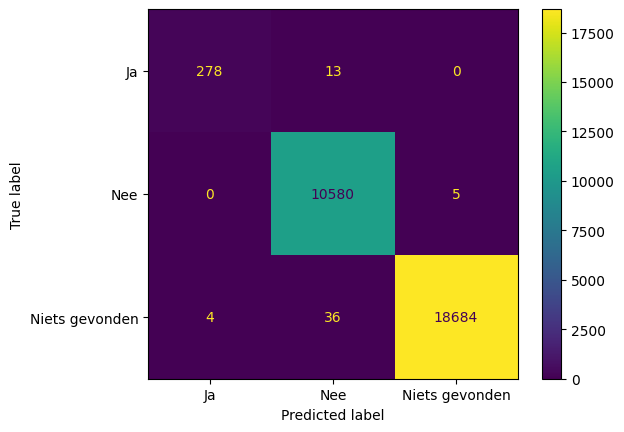

                precision    recall  f1-score   support

            Ja       0.99      0.96      0.97       291
           Nee       1.00      1.00      1.00     10585
Niets gevonden       1.00      1.00      1.00     18724

      accuracy                           1.00     29600
     macro avg       0.99      0.98      0.99     29600
  weighted avg       1.00      1.00      1.00     29600



In [20]:
# Ngram 2 Stopwords kept
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,2), lowercase=True, token_pattern=r"(?u)\b\w\w+\b|\+|\-")),
    ('clf', SGDClassifier(early_stopping=True, n_iter_no_change=5, validation_fraction = 0.25, verbose=3)),
])
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=parameter_grid, random_state=500, verbose=3, scoring='f1_macro')
random_search.fit(X_train, y_train)  
predicted_nb = random_search.predict(X_test)
print(np.mean(predicted_nb == y_test))
cm = confusion_matrix(y_test, predicted_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=random_search.classes_)
disp.plot()

plt.show()
print(metrics.classification_report(y_test, predicted_nb,
    target_names=random_search.classes_))

In [21]:
from pickle import dump

dump(random_search, open('best_models/best_drugs_ex1.pkl', 'wb'))